# Classifying Fashion MNIST with spiking activations

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nengo/keras-spiking/blob/master/docs/examples/spiking-fashion-mnist.ipynb)

This example is based on the [Basic image classification example in TensorFlow](https://www.tensorflow.org/tutorials/keras/classification). We would recommend beginning there if you would like a more basic introduction to how Keras works. In this example we will walk through how we can convert that non-spiking model into a spiking model using Keras Spiking, and various techniques that can be used to fine tune performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import keras_spiking

tf.random.set_seed(0)
np.random.seed(0)

## Loading data

We'll begin by loading the Fashion MNIST data:

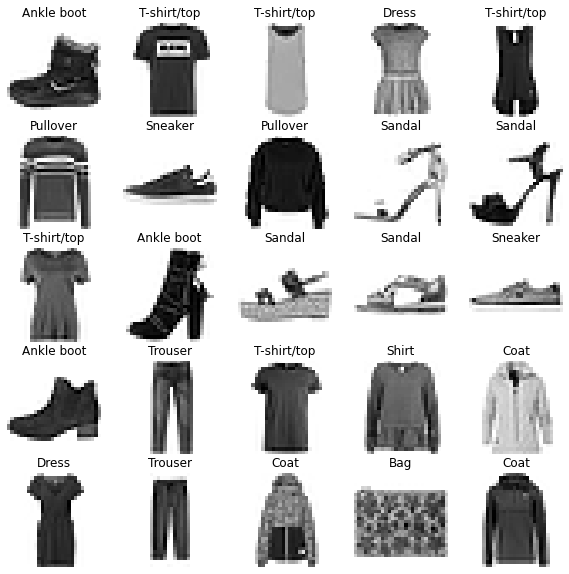

In [2]:
(
    (train_images, train_labels),
    (test_images, test_labels),
) = tf.keras.datasets.fashion_mnist.load_data()

# normalize images so values are between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
num_classes = len(class_names)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

## Non-spiking model

Next we'll build and train the non-spiking model (this is identical to the [original TensorFlow example](https://www.tensorflow.org/tutorials/keras/classification)).

In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)


def train(input_model):
    input_model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    input_model.fit(train_images, train_labels, epochs=10)

    _, test_acc = input_model.evaluate(test_images, test_labels, verbose=2)

    print("\nTest accuracy:", test_acc)


train(model)

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 2.5408 - accuracy: 0.0938

  40/1875 [..............................] - ETA: 2s - loss: 1.2832 - accuracy: 0.5781

  79/1875 [>.............................] - ETA: 2s - loss: 1.0413 - accuracy: 0.6523

 119/1875 [>.............................] - ETA: 2s - loss: 0.9207 - accuracy: 0.6933

 158/1875 [=>............................] - ETA: 2s - loss: 0.8548 - accuracy: 0.7134

 199/1875 [==>...........................] - ETA: 2s - loss: 0.8227 - accuracy: 0.7225

 240/1875 [==>...........................] - ETA: 2s - loss: 0.7835 - accuracy: 0.7353

 282/1875 [===>..........................] - ETA: 1s - loss: 0.7527 - accuracy: 0.7453

 324/1875 [====>.........................] - ETA: 1s - loss: 0.7292 - accuracy: 0.7532

 365/1875 [====>.........................] - ETA: 1s - loss: 0.7041 - accuracy: 0.7604

 408/1875 [=====>........................] - ETA: 1s - loss: 0.6862 - accuracy: 0.7663

 451/1875 [======>.......................] - ETA: 1s - loss: 0.6718 - accuracy: 0.7704

 494/1875 [======>.......................] - ETA: 1s - loss: 0.6564 - accuracy: 0.7747

 536/1875 [=======>......................] - ETA: 1s - loss: 0.6456 - accuracy: 0.7770

 577/1875 [========>.....................] - ETA: 1s - loss: 0.6322 - accuracy: 0.7818

 619/1875 [========>.....................] - ETA: 1s - loss: 0.6224 - accuracy: 0.7850



 660/1875 [=========>....................] - ETA: 1s - loss: 0.6124 - accuracy: 0.7888

 697/1875 [==========>...................] - ETA: 1s - loss: 0.6067 - accuracy: 0.7912

 738/1875 [==========>...................] - ETA: 1s - loss: 0.5998 - accuracy: 0.7929

 778/1875 [===========>..................] - ETA: 1s - loss: 0.5922 - accuracy: 0.7953

 818/1875 [============>.................] - ETA: 1s - loss: 0.5868 - accuracy: 0.7967

 860/1875 [============>.................] - ETA: 1s - loss: 0.5820 - accuracy: 0.7981

 902/1875 [=============>................] - ETA: 1s - loss: 0.5774 - accuracy: 0.7993

 944/1875 [==============>...............] - ETA: 1s - loss: 0.5724 - accuracy: 0.8011

 985/1875 [==============>...............] - ETA: 1s - loss: 0.5671 - accuracy: 0.8033

1019/1875 [===============>..............] - ETA: 1s - loss: 0.5631 - accuracy: 0.8049

1046/1875 [===============>..............] - ETA: 1s - loss: 0.5601 - accuracy: 0.8062

1076/1875 [================>.............] - ETA: 1s - loss: 0.5569 - accuracy: 0.8070

1111/1875 [================>.............] - ETA: 0s - loss: 0.5534 - accuracy: 0.8079

1147/1875 [=================>............] - ETA: 0s - loss: 0.5496 - accuracy: 0.8093

1183/1875 [=================>............] - ETA: 0s - loss: 0.5463 - accuracy: 0.8103

1218/1875 [==================>...........] - ETA: 0s - loss: 0.5432 - accuracy: 0.8114

1256/1875 [===================>..........] - ETA: 0s - loss: 0.5393 - accuracy: 0.8125

1292/1875 [===================>..........] - ETA: 0s - loss: 0.5355 - accuracy: 0.8136

1328/1875 [====================>.........] - ETA: 0s - loss: 0.5310 - accuracy: 0.8153

1364/1875 [====================>.........] - ETA: 0s - loss: 0.5275 - accuracy: 0.8161

1400/1875 [=====================>........] - ETA: 0s - loss: 0.5260 - accuracy: 0.8162

1434/1875 [=====================>........] - ETA: 0s - loss: 0.5247 - accuracy: 0.8165

1469/1875 [======================>.......] - ETA: 0s - loss: 0.5218 - accuracy: 0.8176

1506/1875 [=======================>......] - ETA: 0s - loss: 0.5188 - accuracy: 0.8184

1543/1875 [=======================>......] - ETA: 0s - loss: 0.5163 - accuracy: 0.8192

1580/1875 [========================>.....] - ETA: 0s - loss: 0.5143 - accuracy: 0.8197

1617/1875 [========================>.....] - ETA: 0s - loss: 0.5112 - accuracy: 0.8206

1653/1875 [=========================>....] - ETA: 0s - loss: 0.5090 - accuracy: 0.8215

1690/1875 [==========================>...] - ETA: 0s - loss: 0.5078 - accuracy: 0.8219

1727/1875 [==========================>...] - ETA: 0s - loss: 0.5052 - accuracy: 0.8226

1761/1875 [===========================>..] - ETA: 0s - loss: 0.5033 - accuracy: 0.8232

1798/1875 [===========================>..] - ETA: 0s - loss: 0.5018 - accuracy: 0.8239

1834/1875 [============================>.] - ETA: 0s - loss: 0.4995 - accuracy: 0.8243

1871/1875 [============================>.] - ETA: 0s - loss: 0.4980 - accuracy: 0.8249

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4979 - accuracy: 0.8251


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8438

  33/1875 [..............................] - ETA: 2s - loss: 0.4038 - accuracy: 0.8532

  70/1875 [>.............................] - ETA: 2s - loss: 0.3878 - accuracy: 0.8554

 106/1875 [>.............................] - ETA: 2s - loss: 0.3835 - accuracy: 0.8570

 143/1875 [=>............................] - ETA: 2s - loss: 0.3934 - accuracy: 0.8553

 180/1875 [=>............................] - ETA: 2s - loss: 0.3901 - accuracy: 0.8573

 217/1875 [==>...........................] - ETA: 2s - loss: 0.3884 - accuracy: 0.8602

 254/1875 [===>..........................] - ETA: 2s - loss: 0.3904 - accuracy: 0.8596

 291/1875 [===>..........................] - ETA: 2s - loss: 0.3842 - accuracy: 0.8620

 328/1875 [====>.........................] - ETA: 2s - loss: 0.3858 - accuracy: 0.8608

 364/1875 [====>.........................] - ETA: 2s - loss: 0.3868 - accuracy: 0.8607

 401/1875 [=====>........................] - ETA: 2s - loss: 0.3842 - accuracy: 0.8618

 439/1875 [======>.......................] - ETA: 2s - loss: 0.3843 - accuracy: 0.8625

 476/1875 [======>.......................] - ETA: 1s - loss: 0.3866 - accuracy: 0.8619

 512/1875 [=======>......................] - ETA: 1s - loss: 0.3859 - accuracy: 0.8609

 549/1875 [=======>......................] - ETA: 1s - loss: 0.3865 - accuracy: 0.8605

 585/1875 [========>.....................] - ETA: 1s - loss: 0.3865 - accuracy: 0.8607

 622/1875 [========>.....................] - ETA: 1s - loss: 0.3863 - accuracy: 0.8601

 659/1875 [=========>....................] - ETA: 1s - loss: 0.3842 - accuracy: 0.8615

 697/1875 [==========>...................] - ETA: 1s - loss: 0.3814 - accuracy: 0.8626

 734/1875 [==========>...................] - ETA: 1s - loss: 0.3809 - accuracy: 0.8625

 767/1875 [===========>..................] - ETA: 1s - loss: 0.3801 - accuracy: 0.8621

 804/1875 [===========>..................] - ETA: 1s - loss: 0.3806 - accuracy: 0.8621

 840/1875 [============>.................] - ETA: 1s - loss: 0.3813 - accuracy: 0.8618

 874/1875 [============>.................] - ETA: 1s - loss: 0.3817 - accuracy: 0.8615

 911/1875 [=============>................] - ETA: 1s - loss: 0.3802 - accuracy: 0.8620

 948/1875 [==============>...............] - ETA: 1s - loss: 0.3800 - accuracy: 0.8620

 985/1875 [==============>...............] - ETA: 1s - loss: 0.3793 - accuracy: 0.8622

1021/1875 [===============>..............] - ETA: 1s - loss: 0.3784 - accuracy: 0.8626

1058/1875 [===============>..............] - ETA: 1s - loss: 0.3776 - accuracy: 0.8629



1095/1875 [================>.............] - ETA: 1s - loss: 0.3781 - accuracy: 0.8625

1130/1875 [=================>............] - ETA: 1s - loss: 0.3768 - accuracy: 0.8631

1167/1875 [=================>............] - ETA: 0s - loss: 0.3771 - accuracy: 0.8628

1204/1875 [==================>...........] - ETA: 0s - loss: 0.3761 - accuracy: 0.8630

1241/1875 [==================>...........] - ETA: 0s - loss: 0.3752 - accuracy: 0.8636

1278/1875 [===================>..........] - ETA: 0s - loss: 0.3745 - accuracy: 0.8636

1312/1875 [===================>..........] - ETA: 0s - loss: 0.3743 - accuracy: 0.8638

1349/1875 [====================>.........] - ETA: 0s - loss: 0.3754 - accuracy: 0.8636

1385/1875 [=====================>........] - ETA: 0s - loss: 0.3748 - accuracy: 0.8642

1420/1875 [=====================>........] - ETA: 0s - loss: 0.3745 - accuracy: 0.8640

1457/1875 [======================>.......] - ETA: 0s - loss: 0.3739 - accuracy: 0.8642

1490/1875 [======================>.......] - ETA: 0s - loss: 0.3733 - accuracy: 0.8643

1521/1875 [=======================>......] - ETA: 0s - loss: 0.3737 - accuracy: 0.8644

1557/1875 [=======================>......] - ETA: 0s - loss: 0.3743 - accuracy: 0.8642

1590/1875 [========================>.....] - ETA: 0s - loss: 0.3736 - accuracy: 0.8646

1626/1875 [=========================>....] - ETA: 0s - loss: 0.3733 - accuracy: 0.8648

1663/1875 [=========================>....] - ETA: 0s - loss: 0.3724 - accuracy: 0.8652

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3729 - accuracy: 0.8651

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3718 - accuracy: 0.8656

1758/1875 [===========================>..] - ETA: 0s - loss: 0.3716 - accuracy: 0.8658

1795/1875 [===========================>..] - ETA: 0s - loss: 0.3714 - accuracy: 0.8659

1830/1875 [============================>.] - ETA: 0s - loss: 0.3711 - accuracy: 0.8661

1866/1875 [============================>.] - ETA: 0s - loss: 0.3706 - accuracy: 0.8664

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3706 - accuracy: 0.8663


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4551 - accuracy: 0.9375

  36/1875 [..............................] - ETA: 2s - loss: 0.3203 - accuracy: 0.8915

  72/1875 [>.............................] - ETA: 2s - loss: 0.3411 - accuracy: 0.8789

 105/1875 [>.............................] - ETA: 2s - loss: 0.3316 - accuracy: 0.8821

 138/1875 [=>............................] - ETA: 2s - loss: 0.3309 - accuracy: 0.8813

 164/1875 [=>............................] - ETA: 2s - loss: 0.3296 - accuracy: 0.8824

 185/1875 [=>............................] - ETA: 2s - loss: 0.3330 - accuracy: 0.8797

 198/1875 [==>...........................] - ETA: 3s - loss: 0.3348 - accuracy: 0.8791

 223/1875 [==>...........................] - ETA: 3s - loss: 0.3318 - accuracy: 0.8788

 245/1875 [==>...........................] - ETA: 3s - loss: 0.3305 - accuracy: 0.8804

 267/1875 [===>..........................] - ETA: 3s - loss: 0.3358 - accuracy: 0.8794

 296/1875 [===>..........................] - ETA: 3s - loss: 0.3393 - accuracy: 0.8792

 324/1875 [====>.........................] - ETA: 2s - loss: 0.3427 - accuracy: 0.8776

 355/1875 [====>.........................] - ETA: 2s - loss: 0.3437 - accuracy: 0.8778

 384/1875 [=====>........................] - ETA: 2s - loss: 0.3442 - accuracy: 0.8774

 417/1875 [=====>........................] - ETA: 2s - loss: 0.3444 - accuracy: 0.8762

 454/1875 [======>.......................] - ETA: 2s - loss: 0.3410 - accuracy: 0.8774

 488/1875 [======>.......................] - ETA: 2s - loss: 0.3376 - accuracy: 0.8783

 522/1875 [=======>......................] - ETA: 2s - loss: 0.3377 - accuracy: 0.8786

 556/1875 [=======>......................] - ETA: 2s - loss: 0.3378 - accuracy: 0.8786

 592/1875 [========>.....................] - ETA: 2s - loss: 0.3400 - accuracy: 0.8779

 624/1875 [========>.....................] - ETA: 2s - loss: 0.3394 - accuracy: 0.8782

 658/1875 [=========>....................] - ETA: 2s - loss: 0.3403 - accuracy: 0.8776

 688/1875 [==========>...................] - ETA: 2s - loss: 0.3414 - accuracy: 0.8772

 721/1875 [==========>...................] - ETA: 1s - loss: 0.3424 - accuracy: 0.8763

 756/1875 [===========>..................] - ETA: 1s - loss: 0.3401 - accuracy: 0.8769

 792/1875 [===========>..................] - ETA: 1s - loss: 0.3376 - accuracy: 0.8772

 827/1875 [============>.................] - ETA: 1s - loss: 0.3372 - accuracy: 0.8776

 860/1875 [============>.................] - ETA: 1s - loss: 0.3382 - accuracy: 0.8768

 894/1875 [=============>................] - ETA: 1s - loss: 0.3363 - accuracy: 0.8777

 929/1875 [=============>................] - ETA: 1s - loss: 0.3365 - accuracy: 0.8778

 962/1875 [==============>...............] - ETA: 1s - loss: 0.3357 - accuracy: 0.8782

 995/1875 [==============>...............] - ETA: 1s - loss: 0.3350 - accuracy: 0.8783

1030/1875 [===============>..............] - ETA: 1s - loss: 0.3357 - accuracy: 0.8780

1063/1875 [================>.............] - ETA: 1s - loss: 0.3356 - accuracy: 0.8781

1097/1875 [================>.............] - ETA: 1s - loss: 0.3355 - accuracy: 0.8779

1123/1875 [================>.............] - ETA: 1s - loss: 0.3350 - accuracy: 0.8780

1155/1875 [=================>............] - ETA: 1s - loss: 0.3348 - accuracy: 0.8783

1190/1875 [==================>...........] - ETA: 1s - loss: 0.3351 - accuracy: 0.8780

1217/1875 [==================>...........] - ETA: 1s - loss: 0.3347 - accuracy: 0.8780

1254/1875 [===================>..........] - ETA: 1s - loss: 0.3349 - accuracy: 0.8778

1289/1875 [===================>..........] - ETA: 0s - loss: 0.3351 - accuracy: 0.8774

1323/1875 [====================>.........] - ETA: 0s - loss: 0.3341 - accuracy: 0.8779

1354/1875 [====================>.........] - ETA: 0s - loss: 0.3352 - accuracy: 0.8775

1391/1875 [=====================>........] - ETA: 0s - loss: 0.3355 - accuracy: 0.8777

1425/1875 [=====================>........] - ETA: 0s - loss: 0.3365 - accuracy: 0.8775

1456/1875 [======================>.......] - ETA: 0s - loss: 0.3361 - accuracy: 0.8776

1486/1875 [======================>.......] - ETA: 0s - loss: 0.3357 - accuracy: 0.8780

1523/1875 [=======================>......] - ETA: 0s - loss: 0.3349 - accuracy: 0.8781

1558/1875 [=======================>......] - ETA: 0s - loss: 0.3346 - accuracy: 0.8783

1582/1875 [========================>.....] - ETA: 0s - loss: 0.3349 - accuracy: 0.8782

1613/1875 [========================>.....] - ETA: 0s - loss: 0.3348 - accuracy: 0.8783

1649/1875 [=========================>....] - ETA: 0s - loss: 0.3346 - accuracy: 0.8784

1683/1875 [=========================>....] - ETA: 0s - loss: 0.3343 - accuracy: 0.8784

1712/1875 [==========================>...] - ETA: 0s - loss: 0.3338 - accuracy: 0.8785

1748/1875 [==========================>...] - ETA: 0s - loss: 0.3335 - accuracy: 0.8784

1784/1875 [===========================>..] - ETA: 0s - loss: 0.3343 - accuracy: 0.8783

1818/1875 [============================>.] - ETA: 0s - loss: 0.3334 - accuracy: 0.8786

1849/1875 [============================>.] - ETA: 0s - loss: 0.3325 - accuracy: 0.8790

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3321 - accuracy: 0.8791


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4392 - accuracy: 0.8750

  37/1875 [..............................] - ETA: 2s - loss: 0.3230 - accuracy: 0.8894

  71/1875 [>.............................] - ETA: 2s - loss: 0.3176 - accuracy: 0.8939

 100/1875 [>.............................] - ETA: 2s - loss: 0.3257 - accuracy: 0.8900

 134/1875 [=>............................] - ETA: 2s - loss: 0.3232 - accuracy: 0.8881

 171/1875 [=>............................] - ETA: 2s - loss: 0.3245 - accuracy: 0.8872

 198/1875 [==>...........................] - ETA: 2s - loss: 0.3159 - accuracy: 0.8881

 233/1875 [==>...........................] - ETA: 2s - loss: 0.3108 - accuracy: 0.8903

 256/1875 [===>..........................] - ETA: 2s - loss: 0.3126 - accuracy: 0.8898

 282/1875 [===>..........................] - ETA: 2s - loss: 0.3141 - accuracy: 0.8881

 314/1875 [====>.........................] - ETA: 2s - loss: 0.3148 - accuracy: 0.8872

 349/1875 [====>.........................] - ETA: 2s - loss: 0.3189 - accuracy: 0.8850

 385/1875 [=====>........................] - ETA: 2s - loss: 0.3166 - accuracy: 0.8861

 421/1875 [=====>........................] - ETA: 2s - loss: 0.3147 - accuracy: 0.8865

 446/1875 [======>.......................] - ETA: 2s - loss: 0.3148 - accuracy: 0.8854

 480/1875 [======>.......................] - ETA: 2s - loss: 0.3143 - accuracy: 0.8860

 515/1875 [=======>......................] - ETA: 2s - loss: 0.3140 - accuracy: 0.8857

 547/1875 [=======>......................] - ETA: 2s - loss: 0.3150 - accuracy: 0.8849

 581/1875 [========>.....................] - ETA: 2s - loss: 0.3125 - accuracy: 0.8860

 615/1875 [========>.....................] - ETA: 1s - loss: 0.3126 - accuracy: 0.8853

 649/1875 [=========>....................] - ETA: 1s - loss: 0.3136 - accuracy: 0.8853

 679/1875 [=========>....................] - ETA: 1s - loss: 0.3132 - accuracy: 0.8856

 709/1875 [==========>...................] - ETA: 1s - loss: 0.3130 - accuracy: 0.8857

 742/1875 [==========>...................] - ETA: 1s - loss: 0.3123 - accuracy: 0.8860

 778/1875 [===========>..................] - ETA: 1s - loss: 0.3138 - accuracy: 0.8860

 803/1875 [===========>..................] - ETA: 1s - loss: 0.3135 - accuracy: 0.8861

 838/1875 [============>.................] - ETA: 1s - loss: 0.3129 - accuracy: 0.8865

 873/1875 [============>.................] - ETA: 1s - loss: 0.3122 - accuracy: 0.8868

 898/1875 [=============>................] - ETA: 1s - loss: 0.3116 - accuracy: 0.8870

 934/1875 [=============>................] - ETA: 1s - loss: 0.3103 - accuracy: 0.8873

 965/1875 [==============>...............] - ETA: 1s - loss: 0.3114 - accuracy: 0.8869

 998/1875 [==============>...............] - ETA: 1s - loss: 0.3111 - accuracy: 0.8869

1027/1875 [===============>..............] - ETA: 1s - loss: 0.3100 - accuracy: 0.8870

1062/1875 [===============>..............] - ETA: 1s - loss: 0.3093 - accuracy: 0.8872

1094/1875 [================>.............] - ETA: 1s - loss: 0.3086 - accuracy: 0.8873

1130/1875 [=================>............] - ETA: 1s - loss: 0.3096 - accuracy: 0.8870

1165/1875 [=================>............] - ETA: 1s - loss: 0.3090 - accuracy: 0.8873

1201/1875 [==================>...........] - ETA: 1s - loss: 0.3087 - accuracy: 0.8873

1234/1875 [==================>...........] - ETA: 1s - loss: 0.3080 - accuracy: 0.8874

1264/1875 [===================>..........] - ETA: 0s - loss: 0.3076 - accuracy: 0.8876

1299/1875 [===================>..........] - ETA: 0s - loss: 0.3070 - accuracy: 0.8877

1333/1875 [====================>.........] - ETA: 0s - loss: 0.3074 - accuracy: 0.8876

1369/1875 [====================>.........] - ETA: 0s - loss: 0.3080 - accuracy: 0.8874

1392/1875 [=====================>........] - ETA: 0s - loss: 0.3086 - accuracy: 0.8871

1426/1875 [=====================>........] - ETA: 0s - loss: 0.3082 - accuracy: 0.8874

1458/1875 [======================>.......] - ETA: 0s - loss: 0.3087 - accuracy: 0.8871

1491/1875 [======================>.......] - ETA: 0s - loss: 0.3090 - accuracy: 0.8869

1524/1875 [=======================>......] - ETA: 0s - loss: 0.3084 - accuracy: 0.8872

1561/1875 [=======================>......] - ETA: 0s - loss: 0.3085 - accuracy: 0.8872

1596/1875 [========================>.....] - ETA: 0s - loss: 0.3084 - accuracy: 0.8872

1622/1875 [========================>.....] - ETA: 0s - loss: 0.3083 - accuracy: 0.8872

1656/1875 [=========================>....] - ETA: 0s - loss: 0.3076 - accuracy: 0.8875

1693/1875 [==========================>...] - ETA: 0s - loss: 0.3087 - accuracy: 0.8872

1726/1875 [==========================>...] - ETA: 0s - loss: 0.3092 - accuracy: 0.8873

1753/1875 [===========================>..] - ETA: 0s - loss: 0.3093 - accuracy: 0.8872

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3091 - accuracy: 0.8873

1825/1875 [============================>.] - ETA: 0s - loss: 0.3089 - accuracy: 0.8872



1857/1875 [============================>.] - ETA: 0s - loss: 0.3087 - accuracy: 0.8871

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3086 - accuracy: 0.8871


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1292 - accuracy: 0.9375

  37/1875 [..............................] - ETA: 2s - loss: 0.3160 - accuracy: 0.8834

  72/1875 [>.............................] - ETA: 2s - loss: 0.3099 - accuracy: 0.8850

 103/1875 [>.............................] - ETA: 2s - loss: 0.2982 - accuracy: 0.8883

 129/1875 [=>............................] - ETA: 2s - loss: 0.2964 - accuracy: 0.8886

 165/1875 [=>............................] - ETA: 2s - loss: 0.2933 - accuracy: 0.8922

 202/1875 [==>...........................] - ETA: 2s - loss: 0.2921 - accuracy: 0.8931

 227/1875 [==>...........................] - ETA: 2s - loss: 0.2925 - accuracy: 0.8932

 261/1875 [===>..........................] - ETA: 2s - loss: 0.2941 - accuracy: 0.8927

 297/1875 [===>..........................] - ETA: 2s - loss: 0.2918 - accuracy: 0.8930

 333/1875 [====>.........................] - ETA: 2s - loss: 0.2960 - accuracy: 0.8921

 360/1875 [====>.........................] - ETA: 2s - loss: 0.2941 - accuracy: 0.8929

 395/1875 [=====>........................] - ETA: 2s - loss: 0.2937 - accuracy: 0.8930

 432/1875 [=====>........................] - ETA: 2s - loss: 0.2948 - accuracy: 0.8927

 467/1875 [======>.......................] - ETA: 2s - loss: 0.2932 - accuracy: 0.8931

 494/1875 [======>.......................] - ETA: 2s - loss: 0.2924 - accuracy: 0.8927

 529/1875 [=======>......................] - ETA: 2s - loss: 0.2938 - accuracy: 0.8913

 563/1875 [========>.....................] - ETA: 2s - loss: 0.2937 - accuracy: 0.8918

 588/1875 [========>.....................] - ETA: 2s - loss: 0.2936 - accuracy: 0.8918

 624/1875 [========>.....................] - ETA: 1s - loss: 0.2904 - accuracy: 0.8930

 659/1875 [=========>....................] - ETA: 1s - loss: 0.2915 - accuracy: 0.8924

 696/1875 [==========>...................] - ETA: 1s - loss: 0.2915 - accuracy: 0.8923

 722/1875 [==========>...................] - ETA: 1s - loss: 0.2913 - accuracy: 0.8927

 757/1875 [===========>..................] - ETA: 1s - loss: 0.2920 - accuracy: 0.8922

 791/1875 [===========>..................] - ETA: 1s - loss: 0.2926 - accuracy: 0.8916

 822/1875 [============>.................] - ETA: 1s - loss: 0.2916 - accuracy: 0.8924

 854/1875 [============>.................] - ETA: 1s - loss: 0.2909 - accuracy: 0.8926

 889/1875 [=============>................] - ETA: 1s - loss: 0.2904 - accuracy: 0.8926

 923/1875 [=============>................] - ETA: 1s - loss: 0.2902 - accuracy: 0.8919

 957/1875 [==============>...............] - ETA: 1s - loss: 0.2905 - accuracy: 0.8921

 993/1875 [==============>...............] - ETA: 1s - loss: 0.2912 - accuracy: 0.8919

1027/1875 [===============>..............] - ETA: 1s - loss: 0.2904 - accuracy: 0.8924

1063/1875 [================>.............] - ETA: 1s - loss: 0.2912 - accuracy: 0.8921

1096/1875 [================>.............] - ETA: 1s - loss: 0.2905 - accuracy: 0.8925

1131/1875 [=================>............] - ETA: 1s - loss: 0.2913 - accuracy: 0.8920

1165/1875 [=================>............] - ETA: 1s - loss: 0.2909 - accuracy: 0.8921

1200/1875 [==================>...........] - ETA: 1s - loss: 0.2903 - accuracy: 0.8924

1233/1875 [==================>...........] - ETA: 0s - loss: 0.2914 - accuracy: 0.8922

1268/1875 [===================>..........] - ETA: 0s - loss: 0.2920 - accuracy: 0.8918

1304/1875 [===================>..........] - ETA: 0s - loss: 0.2916 - accuracy: 0.8919

1332/1875 [====================>.........] - ETA: 0s - loss: 0.2914 - accuracy: 0.8920

1360/1875 [====================>.........] - ETA: 0s - loss: 0.2928 - accuracy: 0.8915

1390/1875 [=====================>........] - ETA: 0s - loss: 0.2925 - accuracy: 0.8914

1426/1875 [=====================>........] - ETA: 0s - loss: 0.2921 - accuracy: 0.8913

1461/1875 [======================>.......] - ETA: 0s - loss: 0.2917 - accuracy: 0.8914

1491/1875 [======================>.......] - ETA: 0s - loss: 0.2915 - accuracy: 0.8915

1525/1875 [=======================>......] - ETA: 0s - loss: 0.2922 - accuracy: 0.8916

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2920 - accuracy: 0.8916

1575/1875 [========================>.....] - ETA: 0s - loss: 0.2917 - accuracy: 0.8916

1609/1875 [========================>.....] - ETA: 0s - loss: 0.2918 - accuracy: 0.8917

1645/1875 [=========================>....] - ETA: 0s - loss: 0.2925 - accuracy: 0.8914

1677/1875 [=========================>....] - ETA: 0s - loss: 0.2922 - accuracy: 0.8916

1711/1875 [==========================>...] - ETA: 0s - loss: 0.2926 - accuracy: 0.8914

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2927 - accuracy: 0.8916

1780/1875 [===========================>..] - ETA: 0s - loss: 0.2925 - accuracy: 0.8916

1815/1875 [============================>.] - ETA: 0s - loss: 0.2922 - accuracy: 0.8916

1851/1875 [============================>.] - ETA: 0s - loss: 0.2922 - accuracy: 0.8915

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2917 - accuracy: 0.8917


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1848 - accuracy: 0.9375

  35/1875 [..............................] - ETA: 2s - loss: 0.2771 - accuracy: 0.9027

  61/1875 [..............................] - ETA: 2s - loss: 0.2744 - accuracy: 0.9042

  97/1875 [>.............................] - ETA: 2s - loss: 0.2772 - accuracy: 0.9005

 133/1875 [=>............................] - ETA: 2s - loss: 0.2785 - accuracy: 0.9006

 166/1875 [=>............................] - ETA: 2s - loss: 0.2771 - accuracy: 0.9004

 200/1875 [==>...........................] - ETA: 2s - loss: 0.2807 - accuracy: 0.8973

 236/1875 [==>...........................] - ETA: 2s - loss: 0.2789 - accuracy: 0.8978

 273/1875 [===>..........................] - ETA: 2s - loss: 0.2802 - accuracy: 0.8978

 306/1875 [===>..........................] - ETA: 2s - loss: 0.2815 - accuracy: 0.8976

 338/1875 [====>.........................] - ETA: 2s - loss: 0.2821 - accuracy: 0.8962

 375/1875 [=====>........................] - ETA: 2s - loss: 0.2860 - accuracy: 0.8957

 411/1875 [=====>........................] - ETA: 2s - loss: 0.2881 - accuracy: 0.8945

 432/1875 [=====>........................] - ETA: 2s - loss: 0.2866 - accuracy: 0.8951

 466/1875 [======>.......................] - ETA: 2s - loss: 0.2864 - accuracy: 0.8946

 502/1875 [=======>......................] - ETA: 2s - loss: 0.2855 - accuracy: 0.8950

 535/1875 [=======>......................] - ETA: 2s - loss: 0.2860 - accuracy: 0.8947

 564/1875 [========>.....................] - ETA: 2s - loss: 0.2847 - accuracy: 0.8947

 595/1875 [========>.....................] - ETA: 1s - loss: 0.2852 - accuracy: 0.8946

 630/1875 [=========>....................] - ETA: 1s - loss: 0.2846 - accuracy: 0.8952

 664/1875 [=========>....................] - ETA: 1s - loss: 0.2853 - accuracy: 0.8949

 698/1875 [==========>...................] - ETA: 1s - loss: 0.2842 - accuracy: 0.8953

 733/1875 [==========>...................] - ETA: 1s - loss: 0.2833 - accuracy: 0.8954

 768/1875 [===========>..................] - ETA: 1s - loss: 0.2826 - accuracy: 0.8956

 800/1875 [===========>..................] - ETA: 1s - loss: 0.2807 - accuracy: 0.8961

 833/1875 [============>.................] - ETA: 1s - loss: 0.2794 - accuracy: 0.8972

 868/1875 [============>.................] - ETA: 1s - loss: 0.2781 - accuracy: 0.8975

 903/1875 [=============>................] - ETA: 1s - loss: 0.2778 - accuracy: 0.8976

 928/1875 [=============>................] - ETA: 1s - loss: 0.2769 - accuracy: 0.8980

 962/1875 [==============>...............] - ETA: 1s - loss: 0.2778 - accuracy: 0.8975

 998/1875 [==============>...............] - ETA: 1s - loss: 0.2778 - accuracy: 0.8974

1023/1875 [===============>..............] - ETA: 1s - loss: 0.2778 - accuracy: 0.8976

1057/1875 [===============>..............] - ETA: 1s - loss: 0.2778 - accuracy: 0.8978

1090/1875 [================>.............] - ETA: 1s - loss: 0.2771 - accuracy: 0.8980

1127/1875 [=================>............] - ETA: 1s - loss: 0.2774 - accuracy: 0.8979

1160/1875 [=================>............] - ETA: 1s - loss: 0.2778 - accuracy: 0.8978

1194/1875 [==================>...........] - ETA: 1s - loss: 0.2782 - accuracy: 0.8976

1229/1875 [==================>...........] - ETA: 0s - loss: 0.2769 - accuracy: 0.8981

1264/1875 [===================>..........] - ETA: 0s - loss: 0.2766 - accuracy: 0.8981



1294/1875 [===================>..........] - ETA: 0s - loss: 0.2766 - accuracy: 0.8978

1329/1875 [====================>.........] - ETA: 0s - loss: 0.2763 - accuracy: 0.8979

1365/1875 [====================>.........] - ETA: 0s - loss: 0.2760 - accuracy: 0.8980

1394/1875 [=====================>........] - ETA: 0s - loss: 0.2763 - accuracy: 0.8977

1430/1875 [=====================>........] - ETA: 0s - loss: 0.2769 - accuracy: 0.8976

1465/1875 [======================>.......] - ETA: 0s - loss: 0.2764 - accuracy: 0.8977

1501/1875 [=======================>......] - ETA: 0s - loss: 0.2761 - accuracy: 0.8977

1532/1875 [=======================>......] - ETA: 0s - loss: 0.2761 - accuracy: 0.8977

1567/1875 [========================>.....] - ETA: 0s - loss: 0.2766 - accuracy: 0.8975

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2757 - accuracy: 0.8977

1638/1875 [=========================>....] - ETA: 0s - loss: 0.2754 - accuracy: 0.8977

1653/1875 [=========================>....] - ETA: 0s - loss: 0.2755 - accuracy: 0.8978

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2756 - accuracy: 0.8976

1725/1875 [==========================>...] - ETA: 0s - loss: 0.2757 - accuracy: 0.8976

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2759 - accuracy: 0.8976

1788/1875 [===========================>..] - ETA: 0s - loss: 0.2762 - accuracy: 0.8973

1823/1875 [============================>.] - ETA: 0s - loss: 0.2762 - accuracy: 0.8971

1855/1875 [============================>.] - ETA: 0s - loss: 0.2763 - accuracy: 0.8970

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2762 - accuracy: 0.8970


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2623 - accuracy: 0.8438

  31/1875 [..............................] - ETA: 3s - loss: 0.2442 - accuracy: 0.9123

  67/1875 [>.............................] - ETA: 2s - loss: 0.2574 - accuracy: 0.9100

 101/1875 [>.............................] - ETA: 2s - loss: 0.2580 - accuracy: 0.9093

 129/1875 [=>............................] - ETA: 2s - loss: 0.2576 - accuracy: 0.9084

 166/1875 [=>............................] - ETA: 2s - loss: 0.2586 - accuracy: 0.9061

 201/1875 [==>...........................] - ETA: 2s - loss: 0.2558 - accuracy: 0.9056

 235/1875 [==>...........................] - ETA: 2s - loss: 0.2585 - accuracy: 0.9039

 269/1875 [===>..........................] - ETA: 2s - loss: 0.2587 - accuracy: 0.9043

 304/1875 [===>..........................] - ETA: 2s - loss: 0.2618 - accuracy: 0.9034

 338/1875 [====>.........................] - ETA: 2s - loss: 0.2633 - accuracy: 0.9025

 364/1875 [====>.........................] - ETA: 2s - loss: 0.2630 - accuracy: 0.9023

 400/1875 [=====>........................] - ETA: 2s - loss: 0.2643 - accuracy: 0.9020

 437/1875 [=====>........................] - ETA: 2s - loss: 0.2652 - accuracy: 0.9020

 471/1875 [======>.......................] - ETA: 2s - loss: 0.2645 - accuracy: 0.9023

 498/1875 [======>.......................] - ETA: 2s - loss: 0.2654 - accuracy: 0.9019

 534/1875 [=======>......................] - ETA: 2s - loss: 0.2643 - accuracy: 0.9026

 570/1875 [========>.....................] - ETA: 1s - loss: 0.2637 - accuracy: 0.9029

 599/1875 [========>.....................] - ETA: 1s - loss: 0.2624 - accuracy: 0.9033

 631/1875 [=========>....................] - ETA: 1s - loss: 0.2633 - accuracy: 0.9028

 668/1875 [=========>....................] - ETA: 1s - loss: 0.2650 - accuracy: 0.9017

 704/1875 [==========>...................] - ETA: 1s - loss: 0.2643 - accuracy: 0.9019

 738/1875 [==========>...................] - ETA: 1s - loss: 0.2639 - accuracy: 0.9020

 768/1875 [===========>..................] - ETA: 1s - loss: 0.2635 - accuracy: 0.9021

 804/1875 [===========>..................] - ETA: 1s - loss: 0.2629 - accuracy: 0.9022

 840/1875 [============>.................] - ETA: 1s - loss: 0.2627 - accuracy: 0.9024

 875/1875 [=============>................] - ETA: 1s - loss: 0.2625 - accuracy: 0.9025

 910/1875 [=============>................] - ETA: 1s - loss: 0.2633 - accuracy: 0.9023

 943/1875 [==============>...............] - ETA: 1s - loss: 0.2631 - accuracy: 0.9023

 978/1875 [==============>...............] - ETA: 1s - loss: 0.2614 - accuracy: 0.9029

1013/1875 [===============>..............] - ETA: 1s - loss: 0.2613 - accuracy: 0.9029

1049/1875 [===============>..............] - ETA: 1s - loss: 0.2608 - accuracy: 0.9027

1085/1875 [================>.............] - ETA: 1s - loss: 0.2610 - accuracy: 0.9022

1119/1875 [================>.............] - ETA: 1s - loss: 0.2621 - accuracy: 0.9016

1154/1875 [=================>............] - ETA: 1s - loss: 0.2623 - accuracy: 0.9016

1190/1875 [==================>...........] - ETA: 1s - loss: 0.2617 - accuracy: 0.9015

1227/1875 [==================>...........] - ETA: 0s - loss: 0.2609 - accuracy: 0.9019

1253/1875 [===================>..........] - ETA: 0s - loss: 0.2616 - accuracy: 0.9012

1284/1875 [===================>..........] - ETA: 0s - loss: 0.2613 - accuracy: 0.9012

1321/1875 [====================>.........] - ETA: 0s - loss: 0.2610 - accuracy: 0.9014

1358/1875 [====================>.........] - ETA: 0s - loss: 0.2610 - accuracy: 0.9013

1388/1875 [=====================>........] - ETA: 0s - loss: 0.2625 - accuracy: 0.9009

1415/1875 [=====================>........] - ETA: 0s - loss: 0.2626 - accuracy: 0.9009

1452/1875 [======================>.......] - ETA: 0s - loss: 0.2627 - accuracy: 0.9009

1488/1875 [======================>.......] - ETA: 0s - loss: 0.2640 - accuracy: 0.9003

1519/1875 [=======================>......] - ETA: 0s - loss: 0.2642 - accuracy: 0.9001

1537/1875 [=======================>......] - ETA: 0s - loss: 0.2640 - accuracy: 0.9002

1573/1875 [========================>.....] - ETA: 0s - loss: 0.2648 - accuracy: 0.9000

1599/1875 [========================>.....] - ETA: 0s - loss: 0.2650 - accuracy: 0.9000

1633/1875 [=========================>....] - ETA: 0s - loss: 0.2644 - accuracy: 0.9001

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2644 - accuracy: 0.9000

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2645 - accuracy: 0.9001

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2646 - accuracy: 0.9003

1760/1875 [===========================>..] - ETA: 0s - loss: 0.2645 - accuracy: 0.9003

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2654 - accuracy: 0.8999

1833/1875 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.8998

1861/1875 [============================>.] - ETA: 0s - loss: 0.2662 - accuracy: 0.8998

1869/1875 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.9000

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2659 - accuracy: 0.9000


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2491 - accuracy: 0.9375

  36/1875 [..............................] - ETA: 2s - loss: 0.2376 - accuracy: 0.9115

  68/1875 [>.............................] - ETA: 2s - loss: 0.2362 - accuracy: 0.9127

 103/1875 [>.............................] - ETA: 2s - loss: 0.2406 - accuracy: 0.9056

 138/1875 [=>............................] - ETA: 2s - loss: 0.2416 - accuracy: 0.9058

 168/1875 [=>............................] - ETA: 2s - loss: 0.2428 - accuracy: 0.9049

 196/1875 [==>...........................] - ETA: 2s - loss: 0.2398 - accuracy: 0.9050

 227/1875 [==>...........................] - ETA: 2s - loss: 0.2416 - accuracy: 0.9045

 262/1875 [===>..........................] - ETA: 2s - loss: 0.2440 - accuracy: 0.9051

 296/1875 [===>..........................] - ETA: 2s - loss: 0.2453 - accuracy: 0.9048

 330/1875 [====>.........................] - ETA: 2s - loss: 0.2438 - accuracy: 0.9062

 365/1875 [====>.........................] - ETA: 2s - loss: 0.2468 - accuracy: 0.9052

 399/1875 [=====>........................] - ETA: 2s - loss: 0.2478 - accuracy: 0.9052

 423/1875 [=====>........................] - ETA: 2s - loss: 0.2484 - accuracy: 0.9051

 456/1875 [======>.......................] - ETA: 2s - loss: 0.2481 - accuracy: 0.9053

 492/1875 [======>.......................] - ETA: 2s - loss: 0.2459 - accuracy: 0.9062

 529/1875 [=======>......................] - ETA: 2s - loss: 0.2456 - accuracy: 0.9060

 554/1875 [=======>......................] - ETA: 2s - loss: 0.2455 - accuracy: 0.9059

 589/1875 [========>.....................] - ETA: 1s - loss: 0.2449 - accuracy: 0.9066

 626/1875 [=========>....................] - ETA: 1s - loss: 0.2472 - accuracy: 0.9060

 659/1875 [=========>....................] - ETA: 1s - loss: 0.2480 - accuracy: 0.9060

 689/1875 [==========>...................] - ETA: 1s - loss: 0.2487 - accuracy: 0.9060

 725/1875 [==========>...................] - ETA: 1s - loss: 0.2492 - accuracy: 0.9057

 760/1875 [===========>..................] - ETA: 1s - loss: 0.2494 - accuracy: 0.9061

 786/1875 [===========>..................] - ETA: 1s - loss: 0.2491 - accuracy: 0.9061

 821/1875 [============>.................] - ETA: 1s - loss: 0.2484 - accuracy: 0.9066

 857/1875 [============>.................] - ETA: 1s - loss: 0.2489 - accuracy: 0.9066

 893/1875 [=============>................] - ETA: 1s - loss: 0.2501 - accuracy: 0.9057

 920/1875 [=============>................] - ETA: 1s - loss: 0.2503 - accuracy: 0.9058

 954/1875 [==============>...............] - ETA: 1s - loss: 0.2518 - accuracy: 0.9054

 988/1875 [==============>...............] - ETA: 1s - loss: 0.2527 - accuracy: 0.9052

1021/1875 [===============>..............] - ETA: 1s - loss: 0.2546 - accuracy: 0.9050

1057/1875 [===============>..............] - ETA: 1s - loss: 0.2555 - accuracy: 0.9044

1087/1875 [================>.............] - ETA: 1s - loss: 0.2553 - accuracy: 0.9042

1122/1875 [================>.............] - ETA: 1s - loss: 0.2543 - accuracy: 0.9045

1147/1875 [=================>............] - ETA: 1s - loss: 0.2543 - accuracy: 0.9047

1181/1875 [=================>............] - ETA: 1s - loss: 0.2547 - accuracy: 0.9045

1216/1875 [==================>...........] - ETA: 1s - loss: 0.2552 - accuracy: 0.9042

1251/1875 [===================>..........] - ETA: 0s - loss: 0.2556 - accuracy: 0.9043

1281/1875 [===================>..........] - ETA: 0s - loss: 0.2554 - accuracy: 0.9045

1317/1875 [====================>.........] - ETA: 0s - loss: 0.2544 - accuracy: 0.9046

1342/1875 [====================>.........] - ETA: 0s - loss: 0.2548 - accuracy: 0.9046

1374/1875 [====================>.........] - ETA: 0s - loss: 0.2543 - accuracy: 0.9047

1409/1875 [=====================>........] - ETA: 0s - loss: 0.2539 - accuracy: 0.9048

1445/1875 [======================>.......] - ETA: 0s - loss: 0.2546 - accuracy: 0.9045

1481/1875 [======================>.......] - ETA: 0s - loss: 0.2541 - accuracy: 0.9048

1507/1875 [=======================>......] - ETA: 0s - loss: 0.2537 - accuracy: 0.9050

1542/1875 [=======================>......] - ETA: 0s - loss: 0.2529 - accuracy: 0.9054

1578/1875 [========================>.....] - ETA: 0s - loss: 0.2522 - accuracy: 0.9057

1612/1875 [========================>.....] - ETA: 0s - loss: 0.2518 - accuracy: 0.9059

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2520 - accuracy: 0.9057

1681/1875 [=========================>....] - ETA: 0s - loss: 0.2527 - accuracy: 0.9054

1717/1875 [==========================>...] - ETA: 0s - loss: 0.2524 - accuracy: 0.9054

1749/1875 [==========================>...] - ETA: 0s - loss: 0.2525 - accuracy: 0.9055

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2533 - accuracy: 0.9053

1815/1875 [============================>.] - ETA: 0s - loss: 0.2534 - accuracy: 0.9054

1852/1875 [============================>.] - ETA: 0s - loss: 0.2535 - accuracy: 0.9054

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2538 - accuracy: 0.9054


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3092 - accuracy: 0.8750

  35/1875 [..............................] - ETA: 2s - loss: 0.2290 - accuracy: 0.9134

  68/1875 [>.............................] - ETA: 2s - loss: 0.2389 - accuracy: 0.9090

 103/1875 [>.............................] - ETA: 2s - loss: 0.2414 - accuracy: 0.9108

 131/1875 [=>............................] - ETA: 2s - loss: 0.2324 - accuracy: 0.9139

 165/1875 [=>............................] - ETA: 2s - loss: 0.2265 - accuracy: 0.9150

 188/1875 [==>...........................] - ETA: 2s - loss: 0.2272 - accuracy: 0.9154

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2229 - accuracy: 0.9178

 252/1875 [===>..........................] - ETA: 2s - loss: 0.2256 - accuracy: 0.9164

 288/1875 [===>..........................] - ETA: 2s - loss: 0.2327 - accuracy: 0.9133

 325/1875 [====>.........................] - ETA: 2s - loss: 0.2363 - accuracy: 0.9134

 358/1875 [====>.........................] - ETA: 2s - loss: 0.2368 - accuracy: 0.9131

 372/1875 [====>.........................] - ETA: 2s - loss: 0.2374 - accuracy: 0.9124

 406/1875 [=====>........................] - ETA: 2s - loss: 0.2384 - accuracy: 0.9115

 440/1875 [======>.......................] - ETA: 2s - loss: 0.2392 - accuracy: 0.9116

 473/1875 [======>.......................] - ETA: 2s - loss: 0.2386 - accuracy: 0.9113

 506/1875 [=======>......................] - ETA: 2s - loss: 0.2394 - accuracy: 0.9108

 542/1875 [=======>......................] - ETA: 2s - loss: 0.2396 - accuracy: 0.9107

 572/1875 [========>.....................] - ETA: 2s - loss: 0.2394 - accuracy: 0.9107

 585/1875 [========>.....................] - ETA: 2s - loss: 0.2394 - accuracy: 0.9107

 618/1875 [========>.....................] - ETA: 2s - loss: 0.2389 - accuracy: 0.9116

 654/1875 [=========>....................] - ETA: 1s - loss: 0.2393 - accuracy: 0.9117

 688/1875 [==========>...................] - ETA: 1s - loss: 0.2413 - accuracy: 0.9109

 718/1875 [==========>...................] - ETA: 1s - loss: 0.2412 - accuracy: 0.9108

 752/1875 [===========>..................] - ETA: 1s - loss: 0.2408 - accuracy: 0.9107

 788/1875 [===========>..................] - ETA: 1s - loss: 0.2402 - accuracy: 0.9110

 818/1875 [============>.................] - ETA: 1s - loss: 0.2408 - accuracy: 0.9105

 852/1875 [============>.................] - ETA: 1s - loss: 0.2417 - accuracy: 0.9101

 887/1875 [=============>................] - ETA: 1s - loss: 0.2415 - accuracy: 0.9100

 924/1875 [=============>................] - ETA: 1s - loss: 0.2418 - accuracy: 0.9101

 951/1875 [==============>...............] - ETA: 1s - loss: 0.2423 - accuracy: 0.9099

 985/1875 [==============>...............] - ETA: 1s - loss: 0.2433 - accuracy: 0.9095

1021/1875 [===============>..............] - ETA: 1s - loss: 0.2444 - accuracy: 0.9091

1055/1875 [===============>..............] - ETA: 1s - loss: 0.2436 - accuracy: 0.9096

1082/1875 [================>.............] - ETA: 1s - loss: 0.2441 - accuracy: 0.9093

1117/1875 [================>.............] - ETA: 1s - loss: 0.2439 - accuracy: 0.9092

1153/1875 [=================>............] - ETA: 1s - loss: 0.2440 - accuracy: 0.9090

1185/1875 [=================>............] - ETA: 1s - loss: 0.2440 - accuracy: 0.9092

1220/1875 [==================>...........] - ETA: 1s - loss: 0.2443 - accuracy: 0.9090

1256/1875 [===================>..........] - ETA: 0s - loss: 0.2435 - accuracy: 0.9092

1292/1875 [===================>..........] - ETA: 0s - loss: 0.2422 - accuracy: 0.9100

1318/1875 [====================>.........] - ETA: 0s - loss: 0.2415 - accuracy: 0.9101

1351/1875 [====================>.........] - ETA: 0s - loss: 0.2414 - accuracy: 0.9100

1387/1875 [=====================>........] - ETA: 0s - loss: 0.2416 - accuracy: 0.9098

1423/1875 [=====================>........] - ETA: 0s - loss: 0.2422 - accuracy: 0.9098

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2423 - accuracy: 0.9097

1467/1875 [======================>.......] - ETA: 0s - loss: 0.2423 - accuracy: 0.9097

1503/1875 [=======================>......] - ETA: 0s - loss: 0.2430 - accuracy: 0.9091

1535/1875 [=======================>......] - ETA: 0s - loss: 0.2432 - accuracy: 0.9092

1565/1875 [========================>.....] - ETA: 0s - loss: 0.2440 - accuracy: 0.9089

1592/1875 [========================>.....] - ETA: 0s - loss: 0.2438 - accuracy: 0.9090

1622/1875 [========================>.....] - ETA: 0s - loss: 0.2432 - accuracy: 0.9094

1652/1875 [=========================>....] - ETA: 0s - loss: 0.2427 - accuracy: 0.9096

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2430 - accuracy: 0.9093

1722/1875 [==========================>...] - ETA: 0s - loss: 0.2429 - accuracy: 0.9094

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2434 - accuracy: 0.9092

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2440 - accuracy: 0.9091

1819/1875 [============================>.] - ETA: 0s - loss: 0.2442 - accuracy: 0.9089

1855/1875 [============================>.] - ETA: 0s - loss: 0.2439 - accuracy: 0.9090

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2437 - accuracy: 0.9092


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1258 - accuracy: 1.0000



  36/1875 [..............................] - ETA: 2s - loss: 0.2227 - accuracy: 0.9184

  73/1875 [>.............................] - ETA: 2s - loss: 0.2302 - accuracy: 0.9144

 108/1875 [>.............................] - ETA: 2s - loss: 0.2273 - accuracy: 0.9164

 136/1875 [=>............................] - ETA: 2s - loss: 0.2239 - accuracy: 0.9168

 171/1875 [=>............................] - ETA: 2s - loss: 0.2281 - accuracy: 0.9141

 207/1875 [==>...........................] - ETA: 2s - loss: 0.2244 - accuracy: 0.9152

 243/1875 [==>...........................] - ETA: 2s - loss: 0.2249 - accuracy: 0.9149

 273/1875 [===>..........................] - ETA: 2s - loss: 0.2266 - accuracy: 0.9139

 308/1875 [===>..........................] - ETA: 2s - loss: 0.2268 - accuracy: 0.9143

 344/1875 [====>.........................] - ETA: 2s - loss: 0.2273 - accuracy: 0.9152

 379/1875 [=====>........................] - ETA: 2s - loss: 0.2280 - accuracy: 0.9152

 414/1875 [=====>........................] - ETA: 2s - loss: 0.2310 - accuracy: 0.9143

 449/1875 [======>.......................] - ETA: 2s - loss: 0.2285 - accuracy: 0.9151

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2271 - accuracy: 0.9160

 501/1875 [=======>......................] - ETA: 2s - loss: 0.2257 - accuracy: 0.9165

 533/1875 [=======>......................] - ETA: 2s - loss: 0.2262 - accuracy: 0.9159

 568/1875 [========>.....................] - ETA: 2s - loss: 0.2283 - accuracy: 0.9151

 603/1875 [========>.....................] - ETA: 1s - loss: 0.2273 - accuracy: 0.9152

 625/1875 [=========>....................] - ETA: 1s - loss: 0.2278 - accuracy: 0.9153

 659/1875 [=========>....................] - ETA: 1s - loss: 0.2286 - accuracy: 0.9146

 696/1875 [==========>...................] - ETA: 1s - loss: 0.2294 - accuracy: 0.9145

 724/1875 [==========>...................] - ETA: 1s - loss: 0.2279 - accuracy: 0.9151

 757/1875 [===========>..................] - ETA: 1s - loss: 0.2278 - accuracy: 0.9148

 791/1875 [===========>..................] - ETA: 1s - loss: 0.2297 - accuracy: 0.9145

 825/1875 [============>.................] - ETA: 1s - loss: 0.2301 - accuracy: 0.9139

 856/1875 [============>.................] - ETA: 1s - loss: 0.2299 - accuracy: 0.9138

 890/1875 [=============>................] - ETA: 1s - loss: 0.2299 - accuracy: 0.9139



 925/1875 [=============>................] - ETA: 1s - loss: 0.2295 - accuracy: 0.9139

 960/1875 [==============>...............] - ETA: 1s - loss: 0.2308 - accuracy: 0.9131

 989/1875 [==============>...............] - ETA: 1s - loss: 0.2306 - accuracy: 0.9131

1022/1875 [===============>..............] - ETA: 1s - loss: 0.2308 - accuracy: 0.9130

1058/1875 [===============>..............] - ETA: 1s - loss: 0.2300 - accuracy: 0.9133

1086/1875 [================>.............] - ETA: 1s - loss: 0.2296 - accuracy: 0.9138

1120/1875 [================>.............] - ETA: 1s - loss: 0.2303 - accuracy: 0.9135

1154/1875 [=================>............] - ETA: 1s - loss: 0.2318 - accuracy: 0.9131

1188/1875 [==================>...........] - ETA: 1s - loss: 0.2327 - accuracy: 0.9127

1217/1875 [==================>...........] - ETA: 1s - loss: 0.2325 - accuracy: 0.9128

1251/1875 [===================>..........] - ETA: 0s - loss: 0.2327 - accuracy: 0.9125

1287/1875 [===================>..........] - ETA: 0s - loss: 0.2333 - accuracy: 0.9125

1320/1875 [====================>.........] - ETA: 0s - loss: 0.2325 - accuracy: 0.9127

1355/1875 [====================>.........] - ETA: 0s - loss: 0.2317 - accuracy: 0.9130

1392/1875 [=====================>........] - ETA: 0s - loss: 0.2315 - accuracy: 0.9131

1427/1875 [=====================>........] - ETA: 0s - loss: 0.2312 - accuracy: 0.9134

1457/1875 [======================>.......] - ETA: 0s - loss: 0.2317 - accuracy: 0.9134

1494/1875 [======================>.......] - ETA: 0s - loss: 0.2327 - accuracy: 0.9129

1529/1875 [=======================>......] - ETA: 0s - loss: 0.2327 - accuracy: 0.9132

1564/1875 [========================>.....] - ETA: 0s - loss: 0.2334 - accuracy: 0.9129

1579/1875 [========================>.....] - ETA: 0s - loss: 0.2334 - accuracy: 0.9129

1616/1875 [========================>.....] - ETA: 0s - loss: 0.2340 - accuracy: 0.9127

1651/1875 [=========================>....] - ETA: 0s - loss: 0.2345 - accuracy: 0.9125

1682/1875 [=========================>....] - ETA: 0s - loss: 0.2355 - accuracy: 0.9120

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2363 - accuracy: 0.9119

1751/1875 [===========================>..] - ETA: 0s - loss: 0.2359 - accuracy: 0.9120

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2359 - accuracy: 0.9118

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2370 - accuracy: 0.9115

1844/1875 [============================>.] - ETA: 0s - loss: 0.2363 - accuracy: 0.9117

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2362 - accuracy: 0.9119


313/313 - 0s - loss: 0.3428 - accuracy: 0.8853



Test accuracy: 0.8852999806404114


## Spiking model

Next we will create an equivalent spiking model. There are two important changes here:

1. Add a temporal dimension to the data/model.

Spiking models always run over time (i.e., each forward pass through the model will run for some number of timesteps). This means that we need to add a temporal dimension to the data, so instead of having shape ``(batch_size, ...)`` it will have shape
``(batch_size, n_steps, ...)``. For those familiar with working with RNNs, the principles are the same; a spiking neuron accepts temporal data and computes over time, just like an RNN.

2. Replace any activation functions with ``keras_spiking.SpikingActivation``.

``keras_spiking.SpikingActivation`` can encapsulate any activation function, and will produce an equivalent spiking implementation. Neurons will spike at a rate proportional to the output of the base activation function. For example, if the activation function is outputting a value of 10, then the wrapped ``SpikingActivation`` will output spikes at a rate of 10Hz (i.e., 10 spikes per 1 simulated second, where 1 simulated second is equivalent to some number of timesteps, determined by the ``dt`` parameter of ``SpikingActivation``).

Note that for many layers, Keras combines the activation function into another layer. For example, ``tf.keras.layers.Dense(units=10, activation="relu")`` is equivalent to ``tf.keras.layers.Dense(units=10) -> tf.keras.layers.Activation("relu")``. Due to the temporal nature of ``SpikingActivation`` it cannot be directly used within another layer as in the first case; we need to explicitly separate it into its own layer.

In [4]:
# repeat the images for n_steps
n_steps = 10
train_images = np.tile(train_images[:, None], (1, n_steps, 1, 1))
test_images = np.tile(test_images[:, None], (1, n_steps, 1, 1))

In [5]:
model = tf.keras.Sequential(
    [
        # add temporal dimension to the input shape; we can set it to None,
        # to allow the model to flexibly run for different lengths of time
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        # we can use Keras' TimeDistributed wrapper to allow the Dense layer
        # to operate on temporal data
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # replace the "relu" activation in the non-spiking model with a
        # spiking equivalent.
        # we'll learn more about "spiking aware training" later on
        keras_spiking.SpikingActivation("relu", spiking_aware_training=False),
        # we don't need TimeDistributed on this layer, because by default
        # SpikingActivation (like all Keras RNNs) only returns the values
        # from the last timestep. we could set return_sequences=True in
        # SpikingActivation if we wanted data for all timesteps.
        tf.keras.layers.Dense(10),
    ]
)

# train the model, identically to the non-spiking version
train(model)

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 2.3397 - accuracy: 0.0938

  15/1875 [..............................] - ETA: 6s - loss: 1.7458 - accuracy: 0.4271

  20/1875 [..............................] - ETA: 9s - loss: 1.5962 - accuracy: 0.4766

  34/1875 [..............................] - ETA: 8s - loss: 1.3240 - accuracy: 0.5754

  48/1875 [..............................] - ETA: 8s - loss: 1.1932 - accuracy: 0.6048

  60/1875 [..............................] - ETA: 7s - loss: 1.1122 - accuracy: 0.6292

  73/1875 [>.............................] - ETA: 7s - loss: 1.0370 - accuracy: 0.6545

  86/1875 [>.............................] - ETA: 7s - loss: 0.9954 - accuracy: 0.6693

 100/1875 [>.............................] - ETA: 7s - loss: 0.9624 - accuracy: 0.6772

 112/1875 [>.............................] - ETA: 7s - loss: 0.9285 - accuracy: 0.6883

 126/1875 [=>............................] - ETA: 7s - loss: 0.8949 - accuracy: 0.7004

 140/1875 [=>............................] - ETA: 7s - loss: 0.8743 - accuracy: 0.7065

 153/1875 [=>............................] - ETA: 7s - loss: 0.8517 - accuracy: 0.7136

 164/1875 [=>............................] - ETA: 7s - loss: 0.8399 - accuracy: 0.7157

 177/1875 [=>............................] - ETA: 6s - loss: 0.8270 - accuracy: 0.7184

 191/1875 [==>...........................] - ETA: 6s - loss: 0.8184 - accuracy: 0.7222

 201/1875 [==>...........................] - ETA: 6s - loss: 0.8074 - accuracy: 0.7256

 215/1875 [==>...........................] - ETA: 6s - loss: 0.7936 - accuracy: 0.7298

 229/1875 [==>...........................] - ETA: 6s - loss: 0.7789 - accuracy: 0.7336

 242/1875 [==>...........................] - ETA: 6s - loss: 0.7674 - accuracy: 0.7373

 253/1875 [===>..........................] - ETA: 6s - loss: 0.7603 - accuracy: 0.7400

 267/1875 [===>..........................] - ETA: 6s - loss: 0.7501 - accuracy: 0.7438

 281/1875 [===>..........................] - ETA: 6s - loss: 0.7417 - accuracy: 0.7462

 292/1875 [===>..........................] - ETA: 6s - loss: 0.7351 - accuracy: 0.7481

 305/1875 [===>..........................] - ETA: 6s - loss: 0.7288 - accuracy: 0.7501

 318/1875 [====>.........................] - ETA: 6s - loss: 0.7218 - accuracy: 0.7527

 332/1875 [====>.........................] - ETA: 6s - loss: 0.7164 - accuracy: 0.7550

 343/1875 [====>.........................] - ETA: 6s - loss: 0.7104 - accuracy: 0.7568

 356/1875 [====>.........................] - ETA: 6s - loss: 0.7018 - accuracy: 0.7598

 370/1875 [====>.........................] - ETA: 6s - loss: 0.6974 - accuracy: 0.7610

 383/1875 [=====>........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.7629

 397/1875 [=====>........................] - ETA: 6s - loss: 0.6854 - accuracy: 0.7653

 411/1875 [=====>........................] - ETA: 5s - loss: 0.6791 - accuracy: 0.7680

 425/1875 [=====>........................] - ETA: 5s - loss: 0.6745 - accuracy: 0.7698

 437/1875 [=====>........................] - ETA: 5s - loss: 0.6701 - accuracy: 0.7715

 451/1875 [======>.......................] - ETA: 5s - loss: 0.6650 - accuracy: 0.7727

 465/1875 [======>.......................] - ETA: 5s - loss: 0.6602 - accuracy: 0.7734

 477/1875 [======>.......................] - ETA: 5s - loss: 0.6562 - accuracy: 0.7743

 489/1875 [======>.......................] - ETA: 5s - loss: 0.6525 - accuracy: 0.7752

 503/1875 [=======>......................] - ETA: 5s - loss: 0.6495 - accuracy: 0.7757

 517/1875 [=======>......................] - ETA: 5s - loss: 0.6469 - accuracy: 0.7758

 530/1875 [=======>......................] - ETA: 5s - loss: 0.6439 - accuracy: 0.7767

 543/1875 [=======>......................] - ETA: 5s - loss: 0.6388 - accuracy: 0.7785

 557/1875 [=======>......................] - ETA: 5s - loss: 0.6354 - accuracy: 0.7793

 572/1875 [========>.....................] - ETA: 5s - loss: 0.6311 - accuracy: 0.7808

 585/1875 [========>.....................] - ETA: 5s - loss: 0.6276 - accuracy: 0.7826

 599/1875 [========>.....................] - ETA: 5s - loss: 0.6250 - accuracy: 0.7836

 613/1875 [========>.....................] - ETA: 5s - loss: 0.6207 - accuracy: 0.7849

 627/1875 [=========>....................] - ETA: 4s - loss: 0.6171 - accuracy: 0.7854

 641/1875 [=========>....................] - ETA: 4s - loss: 0.6144 - accuracy: 0.7870

 655/1875 [=========>....................] - ETA: 4s - loss: 0.6111 - accuracy: 0.7882

 669/1875 [=========>....................] - ETA: 4s - loss: 0.6075 - accuracy: 0.7892

 682/1875 [=========>....................] - ETA: 4s - loss: 0.6060 - accuracy: 0.7900

 696/1875 [==========>...................] - ETA: 4s - loss: 0.6044 - accuracy: 0.7909

 710/1875 [==========>...................] - ETA: 4s - loss: 0.6019 - accuracy: 0.7909

 723/1875 [==========>...................] - ETA: 4s - loss: 0.5990 - accuracy: 0.7920

 738/1875 [==========>...................] - ETA: 4s - loss: 0.5978 - accuracy: 0.7923

 750/1875 [===========>..................] - ETA: 4s - loss: 0.5951 - accuracy: 0.7929

 764/1875 [===========>..................] - ETA: 4s - loss: 0.5925 - accuracy: 0.7937

 777/1875 [===========>..................] - ETA: 4s - loss: 0.5903 - accuracy: 0.7943

 789/1875 [===========>..................] - ETA: 4s - loss: 0.5898 - accuracy: 0.7947

 801/1875 [===========>..................] - ETA: 4s - loss: 0.5885 - accuracy: 0.7950

 814/1875 [============>.................] - ETA: 4s - loss: 0.5858 - accuracy: 0.7958

 828/1875 [============>.................] - ETA: 4s - loss: 0.5853 - accuracy: 0.7956

 841/1875 [============>.................] - ETA: 4s - loss: 0.5832 - accuracy: 0.7964

 854/1875 [============>.................] - ETA: 4s - loss: 0.5818 - accuracy: 0.7971

 868/1875 [============>.................] - ETA: 3s - loss: 0.5801 - accuracy: 0.7978

 883/1875 [=============>................] - ETA: 3s - loss: 0.5784 - accuracy: 0.7981

 897/1875 [=============>................] - ETA: 3s - loss: 0.5772 - accuracy: 0.7986

 911/1875 [=============>................] - ETA: 3s - loss: 0.5763 - accuracy: 0.7986

 925/1875 [=============>................] - ETA: 3s - loss: 0.5749 - accuracy: 0.7994

 939/1875 [==============>...............] - ETA: 3s - loss: 0.5730 - accuracy: 0.7998

 953/1875 [==============>...............] - ETA: 3s - loss: 0.5715 - accuracy: 0.8005

 965/1875 [==============>...............] - ETA: 3s - loss: 0.5708 - accuracy: 0.8007

 978/1875 [==============>...............] - ETA: 3s - loss: 0.5690 - accuracy: 0.8012

 992/1875 [==============>...............] - ETA: 3s - loss: 0.5667 - accuracy: 0.8022

1006/1875 [===============>..............] - ETA: 3s - loss: 0.5658 - accuracy: 0.8025

1020/1875 [===============>..............] - ETA: 3s - loss: 0.5637 - accuracy: 0.8032

1033/1875 [===============>..............] - ETA: 3s - loss: 0.5622 - accuracy: 0.8040

1046/1875 [===============>..............] - ETA: 3s - loss: 0.5611 - accuracy: 0.8045

1059/1875 [===============>..............] - ETA: 3s - loss: 0.5598 - accuracy: 0.8049

1073/1875 [================>.............] - ETA: 3s - loss: 0.5582 - accuracy: 0.8055

1084/1875 [================>.............] - ETA: 3s - loss: 0.5569 - accuracy: 0.8060

1095/1875 [================>.............] - ETA: 3s - loss: 0.5560 - accuracy: 0.8063

1108/1875 [================>.............] - ETA: 3s - loss: 0.5545 - accuracy: 0.8066

1122/1875 [================>.............] - ETA: 2s - loss: 0.5530 - accuracy: 0.8074

1136/1875 [=================>............] - ETA: 2s - loss: 0.5517 - accuracy: 0.8080

1150/1875 [=================>............] - ETA: 2s - loss: 0.5501 - accuracy: 0.8086

1164/1875 [=================>............] - ETA: 2s - loss: 0.5480 - accuracy: 0.8093

1178/1875 [=================>............] - ETA: 2s - loss: 0.5474 - accuracy: 0.8092

1192/1875 [==================>...........] - ETA: 2s - loss: 0.5463 - accuracy: 0.8097

1206/1875 [==================>...........] - ETA: 2s - loss: 0.5452 - accuracy: 0.8101

1220/1875 [==================>...........] - ETA: 2s - loss: 0.5438 - accuracy: 0.8109

1235/1875 [==================>...........] - ETA: 2s - loss: 0.5419 - accuracy: 0.8114

1249/1875 [==================>...........] - ETA: 2s - loss: 0.5409 - accuracy: 0.8116

1262/1875 [===================>..........] - ETA: 2s - loss: 0.5395 - accuracy: 0.8119

1275/1875 [===================>..........] - ETA: 2s - loss: 0.5377 - accuracy: 0.8126

1288/1875 [===================>..........] - ETA: 2s - loss: 0.5370 - accuracy: 0.8125

1301/1875 [===================>..........] - ETA: 2s - loss: 0.5355 - accuracy: 0.8129

1315/1875 [====================>.........] - ETA: 2s - loss: 0.5337 - accuracy: 0.8135

1328/1875 [====================>.........] - ETA: 2s - loss: 0.5322 - accuracy: 0.8140

1342/1875 [====================>.........] - ETA: 2s - loss: 0.5316 - accuracy: 0.8141

1355/1875 [====================>.........] - ETA: 2s - loss: 0.5303 - accuracy: 0.8146

1369/1875 [====================>.........] - ETA: 1s - loss: 0.5289 - accuracy: 0.8150

1383/1875 [=====================>........] - ETA: 1s - loss: 0.5282 - accuracy: 0.8151

1392/1875 [=====================>........] - ETA: 1s - loss: 0.5276 - accuracy: 0.8151

1403/1875 [=====================>........] - ETA: 1s - loss: 0.5273 - accuracy: 0.8150

1417/1875 [=====================>........] - ETA: 1s - loss: 0.5266 - accuracy: 0.8152

1432/1875 [=====================>........] - ETA: 1s - loss: 0.5265 - accuracy: 0.8152

1446/1875 [======================>.......] - ETA: 1s - loss: 0.5247 - accuracy: 0.8158

1460/1875 [======================>.......] - ETA: 1s - loss: 0.5236 - accuracy: 0.8162

1473/1875 [======================>.......] - ETA: 1s - loss: 0.5238 - accuracy: 0.8163

1487/1875 [======================>.......] - ETA: 1s - loss: 0.5227 - accuracy: 0.8166

1501/1875 [=======================>......] - ETA: 1s - loss: 0.5213 - accuracy: 0.8170

1515/1875 [=======================>......] - ETA: 1s - loss: 0.5201 - accuracy: 0.8174

1528/1875 [=======================>......] - ETA: 1s - loss: 0.5191 - accuracy: 0.8175

1542/1875 [=======================>......] - ETA: 1s - loss: 0.5183 - accuracy: 0.8179

1556/1875 [=======================>......] - ETA: 1s - loss: 0.5175 - accuracy: 0.8181

1570/1875 [========================>.....] - ETA: 1s - loss: 0.5171 - accuracy: 0.8182

1584/1875 [========================>.....] - ETA: 1s - loss: 0.5165 - accuracy: 0.8183

1598/1875 [========================>.....] - ETA: 1s - loss: 0.5153 - accuracy: 0.8187

1612/1875 [========================>.....] - ETA: 1s - loss: 0.5141 - accuracy: 0.8191

1626/1875 [=========================>....] - ETA: 0s - loss: 0.5135 - accuracy: 0.8194

1639/1875 [=========================>....] - ETA: 0s - loss: 0.5124 - accuracy: 0.8197

1653/1875 [=========================>....] - ETA: 0s - loss: 0.5116 - accuracy: 0.8199

1667/1875 [=========================>....] - ETA: 0s - loss: 0.5108 - accuracy: 0.8201

1680/1875 [=========================>....] - ETA: 0s - loss: 0.5104 - accuracy: 0.8202

1694/1875 [==========================>...] - ETA: 0s - loss: 0.5098 - accuracy: 0.8204

1706/1875 [==========================>...] - ETA: 0s - loss: 0.5092 - accuracy: 0.8206

1720/1875 [==========================>...] - ETA: 0s - loss: 0.5079 - accuracy: 0.8209

1734/1875 [==========================>...] - ETA: 0s - loss: 0.5074 - accuracy: 0.8211

1746/1875 [==========================>...] - ETA: 0s - loss: 0.5068 - accuracy: 0.8213

1759/1875 [===========================>..] - ETA: 0s - loss: 0.5060 - accuracy: 0.8216

1772/1875 [===========================>..] - ETA: 0s - loss: 0.5052 - accuracy: 0.8218

1785/1875 [===========================>..] - ETA: 0s - loss: 0.5045 - accuracy: 0.8221

1796/1875 [===========================>..] - ETA: 0s - loss: 0.5042 - accuracy: 0.8223

1809/1875 [===========================>..] - ETA: 0s - loss: 0.5035 - accuracy: 0.8225

1822/1875 [============================>.] - ETA: 0s - loss: 0.5030 - accuracy: 0.8225

1835/1875 [============================>.] - ETA: 0s - loss: 0.5021 - accuracy: 0.8227

1848/1875 [============================>.] - ETA: 0s - loss: 0.5009 - accuracy: 0.8232

1862/1875 [============================>.] - ETA: 0s - loss: 0.5009 - accuracy: 0.8231

1875/1875 [==============================] - 7s 4ms/step - loss: 0.5005 - accuracy: 0.8233


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2883 - accuracy: 0.8750

  15/1875 [..............................] - ETA: 6s - loss: 0.3827 - accuracy: 0.8708

  29/1875 [..............................] - ETA: 6s - loss: 0.4081 - accuracy: 0.8545

  43/1875 [..............................] - ETA: 6s - loss: 0.3972 - accuracy: 0.8583

  57/1875 [..............................] - ETA: 6s - loss: 0.3977 - accuracy: 0.8564

  71/1875 [>.............................] - ETA: 6s - loss: 0.3869 - accuracy: 0.8587

  85/1875 [>.............................] - ETA: 6s - loss: 0.3801 - accuracy: 0.8592

  99/1875 [>.............................] - ETA: 6s - loss: 0.3849 - accuracy: 0.8570

 113/1875 [>.............................] - ETA: 6s - loss: 0.3862 - accuracy: 0.8562

 126/1875 [=>............................] - ETA: 6s - loss: 0.3922 - accuracy: 0.8552

 138/1875 [=>............................] - ETA: 6s - loss: 0.3925 - accuracy: 0.8576

 151/1875 [=>............................] - ETA: 6s - loss: 0.3913 - accuracy: 0.8568

 165/1875 [=>............................] - ETA: 6s - loss: 0.3953 - accuracy: 0.8559

 179/1875 [=>............................] - ETA: 6s - loss: 0.3939 - accuracy: 0.8549

 193/1875 [==>...........................] - ETA: 6s - loss: 0.3946 - accuracy: 0.8541

 207/1875 [==>...........................] - ETA: 6s - loss: 0.3937 - accuracy: 0.8546

 221/1875 [==>...........................] - ETA: 6s - loss: 0.3913 - accuracy: 0.8568

 235/1875 [==>...........................] - ETA: 6s - loss: 0.3920 - accuracy: 0.8560

 249/1875 [==>...........................] - ETA: 6s - loss: 0.3942 - accuracy: 0.8553

 263/1875 [===>..........................] - ETA: 6s - loss: 0.3923 - accuracy: 0.8559

 277/1875 [===>..........................] - ETA: 6s - loss: 0.3899 - accuracy: 0.8573

 291/1875 [===>..........................] - ETA: 5s - loss: 0.3878 - accuracy: 0.8585

 304/1875 [===>..........................] - ETA: 5s - loss: 0.3899 - accuracy: 0.8575

 318/1875 [====>.........................] - ETA: 5s - loss: 0.3902 - accuracy: 0.8577

 331/1875 [====>.........................] - ETA: 5s - loss: 0.3906 - accuracy: 0.8577

 344/1875 [====>.........................] - ETA: 5s - loss: 0.3894 - accuracy: 0.8581

 357/1875 [====>.........................] - ETA: 5s - loss: 0.3923 - accuracy: 0.8571

 371/1875 [====>.........................] - ETA: 5s - loss: 0.3915 - accuracy: 0.8578

 385/1875 [=====>........................] - ETA: 5s - loss: 0.3906 - accuracy: 0.8582

 399/1875 [=====>........................] - ETA: 5s - loss: 0.3899 - accuracy: 0.8587

 412/1875 [=====>........................] - ETA: 5s - loss: 0.3897 - accuracy: 0.8589

 425/1875 [=====>........................] - ETA: 5s - loss: 0.3913 - accuracy: 0.8584

 439/1875 [======>.......................] - ETA: 5s - loss: 0.3899 - accuracy: 0.8588

 451/1875 [======>.......................] - ETA: 5s - loss: 0.3902 - accuracy: 0.8586

 464/1875 [======>.......................] - ETA: 5s - loss: 0.3917 - accuracy: 0.8583

 476/1875 [======>.......................] - ETA: 5s - loss: 0.3916 - accuracy: 0.8580

 487/1875 [======>.......................] - ETA: 5s - loss: 0.3919 - accuracy: 0.8580

 501/1875 [=======>......................] - ETA: 5s - loss: 0.3920 - accuracy: 0.8576

 515/1875 [=======>......................] - ETA: 5s - loss: 0.3914 - accuracy: 0.8574

 529/1875 [=======>......................] - ETA: 5s - loss: 0.3915 - accuracy: 0.8570

 543/1875 [=======>......................] - ETA: 5s - loss: 0.3923 - accuracy: 0.8567

 557/1875 [=======>......................] - ETA: 5s - loss: 0.3921 - accuracy: 0.8570

 571/1875 [========>.....................] - ETA: 5s - loss: 0.3927 - accuracy: 0.8566

 585/1875 [========>.....................] - ETA: 4s - loss: 0.3921 - accuracy: 0.8567

 599/1875 [========>.....................] - ETA: 4s - loss: 0.3924 - accuracy: 0.8567

 613/1875 [========>.....................] - ETA: 4s - loss: 0.3915 - accuracy: 0.8568

 626/1875 [=========>....................] - ETA: 4s - loss: 0.3910 - accuracy: 0.8567

 638/1875 [=========>....................] - ETA: 4s - loss: 0.3904 - accuracy: 0.8571

 651/1875 [=========>....................] - ETA: 4s - loss: 0.3902 - accuracy: 0.8577

 664/1875 [=========>....................] - ETA: 4s - loss: 0.3896 - accuracy: 0.8579

 676/1875 [=========>....................] - ETA: 4s - loss: 0.3882 - accuracy: 0.8587

 690/1875 [==========>...................] - ETA: 4s - loss: 0.3874 - accuracy: 0.8591

 704/1875 [==========>...................] - ETA: 4s - loss: 0.3866 - accuracy: 0.8590

 718/1875 [==========>...................] - ETA: 4s - loss: 0.3866 - accuracy: 0.8592

 731/1875 [==========>...................] - ETA: 4s - loss: 0.3854 - accuracy: 0.8597

 742/1875 [==========>...................] - ETA: 4s - loss: 0.3854 - accuracy: 0.8599

 755/1875 [===========>..................] - ETA: 4s - loss: 0.3847 - accuracy: 0.8600

 769/1875 [===========>..................] - ETA: 4s - loss: 0.3848 - accuracy: 0.8596

 783/1875 [===========>..................] - ETA: 4s - loss: 0.3844 - accuracy: 0.8600

 797/1875 [===========>..................] - ETA: 4s - loss: 0.3843 - accuracy: 0.8599

 810/1875 [===========>..................] - ETA: 4s - loss: 0.3847 - accuracy: 0.8598

 824/1875 [============>.................] - ETA: 4s - loss: 0.3856 - accuracy: 0.8593

 839/1875 [============>.................] - ETA: 3s - loss: 0.3854 - accuracy: 0.8597

 853/1875 [============>.................] - ETA: 3s - loss: 0.3859 - accuracy: 0.8595

 867/1875 [============>.................] - ETA: 3s - loss: 0.3858 - accuracy: 0.8595

 881/1875 [=============>................] - ETA: 3s - loss: 0.3856 - accuracy: 0.8595

 895/1875 [=============>................] - ETA: 3s - loss: 0.3851 - accuracy: 0.8596

 909/1875 [=============>................] - ETA: 3s - loss: 0.3838 - accuracy: 0.8602

 923/1875 [=============>................] - ETA: 3s - loss: 0.3833 - accuracy: 0.8605

 937/1875 [=============>................] - ETA: 3s - loss: 0.3832 - accuracy: 0.8607

 949/1875 [==============>...............] - ETA: 3s - loss: 0.3837 - accuracy: 0.8603

 961/1875 [==============>...............] - ETA: 3s - loss: 0.3831 - accuracy: 0.8606

 975/1875 [==============>...............] - ETA: 3s - loss: 0.3836 - accuracy: 0.8605

 989/1875 [==============>...............] - ETA: 3s - loss: 0.3829 - accuracy: 0.8607

1003/1875 [===============>..............] - ETA: 3s - loss: 0.3821 - accuracy: 0.8608

1016/1875 [===============>..............] - ETA: 3s - loss: 0.3821 - accuracy: 0.8608

1030/1875 [===============>..............] - ETA: 3s - loss: 0.3819 - accuracy: 0.8608

1045/1875 [===============>..............] - ETA: 3s - loss: 0.3819 - accuracy: 0.8606

1056/1875 [===============>..............] - ETA: 3s - loss: 0.3815 - accuracy: 0.8607

1069/1875 [================>.............] - ETA: 3s - loss: 0.3812 - accuracy: 0.8607

1082/1875 [================>.............] - ETA: 3s - loss: 0.3817 - accuracy: 0.8602

1095/1875 [================>.............] - ETA: 3s - loss: 0.3820 - accuracy: 0.8603

1107/1875 [================>.............] - ETA: 2s - loss: 0.3814 - accuracy: 0.8606

1120/1875 [================>.............] - ETA: 2s - loss: 0.3813 - accuracy: 0.8605

1134/1875 [=================>............] - ETA: 2s - loss: 0.3808 - accuracy: 0.8608

1148/1875 [=================>............] - ETA: 2s - loss: 0.3806 - accuracy: 0.8610

1162/1875 [=================>............] - ETA: 2s - loss: 0.3812 - accuracy: 0.8606

1175/1875 [=================>............] - ETA: 2s - loss: 0.3811 - accuracy: 0.8608

1189/1875 [==================>...........] - ETA: 2s - loss: 0.3809 - accuracy: 0.8609

1203/1875 [==================>...........] - ETA: 2s - loss: 0.3806 - accuracy: 0.8611

1216/1875 [==================>...........] - ETA: 2s - loss: 0.3804 - accuracy: 0.8611

1230/1875 [==================>...........] - ETA: 2s - loss: 0.3794 - accuracy: 0.8615

1244/1875 [==================>...........] - ETA: 2s - loss: 0.3798 - accuracy: 0.8617

1258/1875 [===================>..........] - ETA: 2s - loss: 0.3797 - accuracy: 0.8616

1271/1875 [===================>..........] - ETA: 2s - loss: 0.3790 - accuracy: 0.8617

1284/1875 [===================>..........] - ETA: 2s - loss: 0.3794 - accuracy: 0.8615

1298/1875 [===================>..........] - ETA: 2s - loss: 0.3792 - accuracy: 0.8615

1312/1875 [===================>..........] - ETA: 2s - loss: 0.3792 - accuracy: 0.8615

1326/1875 [====================>.........] - ETA: 2s - loss: 0.3797 - accuracy: 0.8613

1339/1875 [====================>.........] - ETA: 2s - loss: 0.3798 - accuracy: 0.8614

1352/1875 [====================>.........] - ETA: 2s - loss: 0.3803 - accuracy: 0.8613

1365/1875 [====================>.........] - ETA: 1s - loss: 0.3799 - accuracy: 0.8615

1379/1875 [=====================>........] - ETA: 1s - loss: 0.3794 - accuracy: 0.8617

1393/1875 [=====================>........] - ETA: 1s - loss: 0.3795 - accuracy: 0.8617

1406/1875 [=====================>........] - ETA: 1s - loss: 0.3795 - accuracy: 0.8617

1420/1875 [=====================>........] - ETA: 1s - loss: 0.3790 - accuracy: 0.8618

1434/1875 [=====================>........] - ETA: 1s - loss: 0.3787 - accuracy: 0.8620

1448/1875 [======================>.......] - ETA: 1s - loss: 0.3781 - accuracy: 0.8622

1462/1875 [======================>.......] - ETA: 1s - loss: 0.3780 - accuracy: 0.8622

1476/1875 [======================>.......] - ETA: 1s - loss: 0.3780 - accuracy: 0.8622

1489/1875 [======================>.......] - ETA: 1s - loss: 0.3777 - accuracy: 0.8624

1503/1875 [=======================>......] - ETA: 1s - loss: 0.3780 - accuracy: 0.8624

1517/1875 [=======================>......] - ETA: 1s - loss: 0.3778 - accuracy: 0.8625

1531/1875 [=======================>......] - ETA: 1s - loss: 0.3780 - accuracy: 0.8625

1545/1875 [=======================>......] - ETA: 1s - loss: 0.3787 - accuracy: 0.8623

1559/1875 [=======================>......] - ETA: 1s - loss: 0.3785 - accuracy: 0.8624

1573/1875 [========================>.....] - ETA: 1s - loss: 0.3786 - accuracy: 0.8624

1587/1875 [========================>.....] - ETA: 1s - loss: 0.3779 - accuracy: 0.8627

1601/1875 [========================>.....] - ETA: 1s - loss: 0.3775 - accuracy: 0.8629

1614/1875 [========================>.....] - ETA: 1s - loss: 0.3774 - accuracy: 0.8629

1628/1875 [=========================>....] - ETA: 0s - loss: 0.3775 - accuracy: 0.8629

1642/1875 [=========================>....] - ETA: 0s - loss: 0.3772 - accuracy: 0.8630

1656/1875 [=========================>....] - ETA: 0s - loss: 0.3768 - accuracy: 0.8632

1669/1875 [=========================>....] - ETA: 0s - loss: 0.3765 - accuracy: 0.8633

1680/1875 [=========================>....] - ETA: 0s - loss: 0.3768 - accuracy: 0.8634

1694/1875 [==========================>...] - ETA: 0s - loss: 0.3768 - accuracy: 0.8634

1708/1875 [==========================>...] - ETA: 0s - loss: 0.3769 - accuracy: 0.8635

1722/1875 [==========================>...] - ETA: 0s - loss: 0.3764 - accuracy: 0.8637

1735/1875 [==========================>...] - ETA: 0s - loss: 0.3761 - accuracy: 0.8638

1749/1875 [==========================>...] - ETA: 0s - loss: 0.3762 - accuracy: 0.8637

1763/1875 [===========================>..] - ETA: 0s - loss: 0.3759 - accuracy: 0.8637

1777/1875 [===========================>..] - ETA: 0s - loss: 0.3755 - accuracy: 0.8639

1791/1875 [===========================>..] - ETA: 0s - loss: 0.3757 - accuracy: 0.8639

1804/1875 [===========================>..] - ETA: 0s - loss: 0.3756 - accuracy: 0.8639

1819/1875 [============================>.] - ETA: 0s - loss: 0.3756 - accuracy: 0.8639

1833/1875 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8642

1846/1875 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8644

1859/1875 [============================>.] - ETA: 0s - loss: 0.3747 - accuracy: 0.8644

1872/1875 [============================>.] - ETA: 0s - loss: 0.3748 - accuracy: 0.8644

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3748 - accuracy: 0.8643


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4644 - accuracy: 0.9375

  14/1875 [..............................] - ETA: 7s - loss: 0.3160 - accuracy: 0.8862

  27/1875 [..............................] - ETA: 7s - loss: 0.3204 - accuracy: 0.8843

  40/1875 [..............................] - ETA: 7s - loss: 0.3268 - accuracy: 0.8805

  53/1875 [..............................] - ETA: 7s - loss: 0.3247 - accuracy: 0.8815

  66/1875 [>.............................] - ETA: 7s - loss: 0.3357 - accuracy: 0.8750

  80/1875 [>.............................] - ETA: 7s - loss: 0.3368 - accuracy: 0.8754

  92/1875 [>.............................] - ETA: 7s - loss: 0.3307 - accuracy: 0.8794

 104/1875 [>.............................] - ETA: 7s - loss: 0.3305 - accuracy: 0.8786

 116/1875 [>.............................] - ETA: 7s - loss: 0.3280 - accuracy: 0.8785

 129/1875 [=>............................] - ETA: 7s - loss: 0.3319 - accuracy: 0.8777

 140/1875 [=>............................] - ETA: 7s - loss: 0.3296 - accuracy: 0.8786

 153/1875 [=>............................] - ETA: 7s - loss: 0.3277 - accuracy: 0.8797

 166/1875 [=>............................] - ETA: 6s - loss: 0.3291 - accuracy: 0.8788

 179/1875 [=>............................] - ETA: 6s - loss: 0.3330 - accuracy: 0.8771

 192/1875 [==>...........................] - ETA: 6s - loss: 0.3375 - accuracy: 0.8763

 205/1875 [==>...........................] - ETA: 6s - loss: 0.3355 - accuracy: 0.8762

 219/1875 [==>...........................] - ETA: 6s - loss: 0.3342 - accuracy: 0.8759

 232/1875 [==>...........................] - ETA: 6s - loss: 0.3336 - accuracy: 0.8761

 246/1875 [==>...........................] - ETA: 6s - loss: 0.3345 - accuracy: 0.8761

 259/1875 [===>..........................] - ETA: 6s - loss: 0.3371 - accuracy: 0.8755

 270/1875 [===>..........................] - ETA: 6s - loss: 0.3435 - accuracy: 0.8733

 283/1875 [===>..........................] - ETA: 6s - loss: 0.3425 - accuracy: 0.8740

 295/1875 [===>..........................] - ETA: 6s - loss: 0.3444 - accuracy: 0.8742

 307/1875 [===>..........................] - ETA: 6s - loss: 0.3458 - accuracy: 0.8734

 321/1875 [====>.........................] - ETA: 6s - loss: 0.3482 - accuracy: 0.8732

 334/1875 [====>.........................] - ETA: 6s - loss: 0.3471 - accuracy: 0.8737

 347/1875 [====>.........................] - ETA: 6s - loss: 0.3491 - accuracy: 0.8728

 359/1875 [====>.........................] - ETA: 6s - loss: 0.3483 - accuracy: 0.8731

 371/1875 [====>.........................] - ETA: 6s - loss: 0.3497 - accuracy: 0.8726

 382/1875 [=====>........................] - ETA: 6s - loss: 0.3492 - accuracy: 0.8728

 394/1875 [=====>........................] - ETA: 6s - loss: 0.3480 - accuracy: 0.8729

 407/1875 [=====>........................] - ETA: 5s - loss: 0.3482 - accuracy: 0.8728

 420/1875 [=====>........................] - ETA: 5s - loss: 0.3477 - accuracy: 0.8730

 433/1875 [=====>........................] - ETA: 5s - loss: 0.3471 - accuracy: 0.8734

 446/1875 [======>.......................] - ETA: 5s - loss: 0.3454 - accuracy: 0.8741

 459/1875 [======>.......................] - ETA: 5s - loss: 0.3434 - accuracy: 0.8748

 471/1875 [======>.......................] - ETA: 5s - loss: 0.3424 - accuracy: 0.8753

 484/1875 [======>.......................] - ETA: 5s - loss: 0.3417 - accuracy: 0.8756

 496/1875 [======>.......................] - ETA: 5s - loss: 0.3404 - accuracy: 0.8757

 509/1875 [=======>......................] - ETA: 5s - loss: 0.3399 - accuracy: 0.8762

 521/1875 [=======>......................] - ETA: 5s - loss: 0.3402 - accuracy: 0.8763

 534/1875 [=======>......................] - ETA: 5s - loss: 0.3398 - accuracy: 0.8763

 547/1875 [=======>......................] - ETA: 5s - loss: 0.3407 - accuracy: 0.8762

 560/1875 [=======>......................] - ETA: 5s - loss: 0.3396 - accuracy: 0.8767

 573/1875 [========>.....................] - ETA: 5s - loss: 0.3416 - accuracy: 0.8760

 584/1875 [========>.....................] - ETA: 5s - loss: 0.3413 - accuracy: 0.8759

 595/1875 [========>.....................] - ETA: 5s - loss: 0.3421 - accuracy: 0.8755

 605/1875 [========>.....................] - ETA: 5s - loss: 0.3418 - accuracy: 0.8757

 618/1875 [========>.....................] - ETA: 5s - loss: 0.3423 - accuracy: 0.8755

 630/1875 [=========>....................] - ETA: 5s - loss: 0.3422 - accuracy: 0.8749

 643/1875 [=========>....................] - ETA: 5s - loss: 0.3420 - accuracy: 0.8750

 656/1875 [=========>....................] - ETA: 5s - loss: 0.3428 - accuracy: 0.8750

 668/1875 [=========>....................] - ETA: 5s - loss: 0.3420 - accuracy: 0.8750

 680/1875 [=========>....................] - ETA: 4s - loss: 0.3436 - accuracy: 0.8745

 693/1875 [==========>...................] - ETA: 4s - loss: 0.3452 - accuracy: 0.8735

 706/1875 [==========>...................] - ETA: 4s - loss: 0.3455 - accuracy: 0.8732

 719/1875 [==========>...................] - ETA: 4s - loss: 0.3454 - accuracy: 0.8730

 732/1875 [==========>...................] - ETA: 4s - loss: 0.3450 - accuracy: 0.8730

 744/1875 [==========>...................] - ETA: 4s - loss: 0.3440 - accuracy: 0.8736

 757/1875 [===========>..................] - ETA: 4s - loss: 0.3427 - accuracy: 0.8740

 770/1875 [===========>..................] - ETA: 4s - loss: 0.3418 - accuracy: 0.8744

 783/1875 [===========>..................] - ETA: 4s - loss: 0.3410 - accuracy: 0.8746

 796/1875 [===========>..................] - ETA: 4s - loss: 0.3397 - accuracy: 0.8751

 809/1875 [===========>..................] - ETA: 4s - loss: 0.3393 - accuracy: 0.8754

 822/1875 [============>.................] - ETA: 4s - loss: 0.3394 - accuracy: 0.8754

 836/1875 [============>.................] - ETA: 4s - loss: 0.3406 - accuracy: 0.8748

 849/1875 [============>.................] - ETA: 4s - loss: 0.3408 - accuracy: 0.8746

 862/1875 [============>.................] - ETA: 4s - loss: 0.3406 - accuracy: 0.8747

 875/1875 [=============>................] - ETA: 4s - loss: 0.3395 - accuracy: 0.8752

 887/1875 [=============>................] - ETA: 4s - loss: 0.3396 - accuracy: 0.8752

 899/1875 [=============>................] - ETA: 4s - loss: 0.3385 - accuracy: 0.8756

 912/1875 [=============>................] - ETA: 3s - loss: 0.3387 - accuracy: 0.8755

 925/1875 [=============>................] - ETA: 3s - loss: 0.3394 - accuracy: 0.8753

 937/1875 [=============>................] - ETA: 3s - loss: 0.3398 - accuracy: 0.8752

 949/1875 [==============>...............] - ETA: 3s - loss: 0.3392 - accuracy: 0.8755

 960/1875 [==============>...............] - ETA: 3s - loss: 0.3389 - accuracy: 0.8755

 973/1875 [==============>...............] - ETA: 3s - loss: 0.3380 - accuracy: 0.8757

 985/1875 [==============>...............] - ETA: 3s - loss: 0.3381 - accuracy: 0.8756

 997/1875 [==============>...............] - ETA: 3s - loss: 0.3385 - accuracy: 0.8754

1009/1875 [===============>..............] - ETA: 3s - loss: 0.3384 - accuracy: 0.8755

1020/1875 [===============>..............] - ETA: 3s - loss: 0.3384 - accuracy: 0.8756

1033/1875 [===============>..............] - ETA: 3s - loss: 0.3391 - accuracy: 0.8754

1045/1875 [===============>..............] - ETA: 3s - loss: 0.3388 - accuracy: 0.8755

1058/1875 [===============>..............] - ETA: 3s - loss: 0.3392 - accuracy: 0.8753

1071/1875 [================>.............] - ETA: 3s - loss: 0.3387 - accuracy: 0.8754

1083/1875 [================>.............] - ETA: 3s - loss: 0.3386 - accuracy: 0.8753

1096/1875 [================>.............] - ETA: 3s - loss: 0.3390 - accuracy: 0.8752

1108/1875 [================>.............] - ETA: 3s - loss: 0.3392 - accuracy: 0.8752

1121/1875 [================>.............] - ETA: 3s - loss: 0.3385 - accuracy: 0.8753

1133/1875 [=================>............] - ETA: 3s - loss: 0.3382 - accuracy: 0.8752

1146/1875 [=================>............] - ETA: 3s - loss: 0.3383 - accuracy: 0.8754

1159/1875 [=================>............] - ETA: 2s - loss: 0.3382 - accuracy: 0.8755

1171/1875 [=================>............] - ETA: 2s - loss: 0.3383 - accuracy: 0.8754

1184/1875 [=================>............] - ETA: 2s - loss: 0.3385 - accuracy: 0.8753

1197/1875 [==================>...........] - ETA: 2s - loss: 0.3388 - accuracy: 0.8752

1210/1875 [==================>...........] - ETA: 2s - loss: 0.3384 - accuracy: 0.8753

1222/1875 [==================>...........] - ETA: 2s - loss: 0.3382 - accuracy: 0.8754

1232/1875 [==================>...........] - ETA: 2s - loss: 0.3381 - accuracy: 0.8755

1245/1875 [==================>...........] - ETA: 2s - loss: 0.3382 - accuracy: 0.8756

1258/1875 [===================>..........] - ETA: 2s - loss: 0.3384 - accuracy: 0.8754

1270/1875 [===================>..........] - ETA: 2s - loss: 0.3389 - accuracy: 0.8751

1282/1875 [===================>..........] - ETA: 2s - loss: 0.3380 - accuracy: 0.8755

1294/1875 [===================>..........] - ETA: 2s - loss: 0.3385 - accuracy: 0.8755

1306/1875 [===================>..........] - ETA: 2s - loss: 0.3380 - accuracy: 0.8760

1318/1875 [====================>.........] - ETA: 2s - loss: 0.3375 - accuracy: 0.8761

1331/1875 [====================>.........] - ETA: 2s - loss: 0.3376 - accuracy: 0.8760

1343/1875 [====================>.........] - ETA: 2s - loss: 0.3384 - accuracy: 0.8758

1356/1875 [====================>.........] - ETA: 2s - loss: 0.3383 - accuracy: 0.8757

1368/1875 [====================>.........] - ETA: 2s - loss: 0.3383 - accuracy: 0.8756

1380/1875 [=====================>........] - ETA: 2s - loss: 0.3387 - accuracy: 0.8757

1393/1875 [=====================>........] - ETA: 2s - loss: 0.3388 - accuracy: 0.8755

1406/1875 [=====================>........] - ETA: 1s - loss: 0.3397 - accuracy: 0.8753

1418/1875 [=====================>........] - ETA: 1s - loss: 0.3397 - accuracy: 0.8755

1431/1875 [=====================>........] - ETA: 1s - loss: 0.3395 - accuracy: 0.8757

1443/1875 [======================>.......] - ETA: 1s - loss: 0.3395 - accuracy: 0.8757

1455/1875 [======================>.......] - ETA: 1s - loss: 0.3393 - accuracy: 0.8758

1467/1875 [======================>.......] - ETA: 1s - loss: 0.3394 - accuracy: 0.8758

1480/1875 [======================>.......] - ETA: 1s - loss: 0.3393 - accuracy: 0.8760

1493/1875 [======================>.......] - ETA: 1s - loss: 0.3388 - accuracy: 0.8761

1505/1875 [=======================>......] - ETA: 1s - loss: 0.3386 - accuracy: 0.8763

1517/1875 [=======================>......] - ETA: 1s - loss: 0.3388 - accuracy: 0.8761

1528/1875 [=======================>......] - ETA: 1s - loss: 0.3384 - accuracy: 0.8762

1541/1875 [=======================>......] - ETA: 1s - loss: 0.3382 - accuracy: 0.8763

1554/1875 [=======================>......] - ETA: 1s - loss: 0.3381 - accuracy: 0.8764

1567/1875 [========================>.....] - ETA: 1s - loss: 0.3378 - accuracy: 0.8766

1579/1875 [========================>.....] - ETA: 1s - loss: 0.3383 - accuracy: 0.8765

1591/1875 [========================>.....] - ETA: 1s - loss: 0.3383 - accuracy: 0.8764

1604/1875 [========================>.....] - ETA: 1s - loss: 0.3380 - accuracy: 0.8764

1617/1875 [========================>.....] - ETA: 1s - loss: 0.3383 - accuracy: 0.8764

1630/1875 [=========================>....] - ETA: 1s - loss: 0.3376 - accuracy: 0.8768

1642/1875 [=========================>....] - ETA: 0s - loss: 0.3378 - accuracy: 0.8767

1655/1875 [=========================>....] - ETA: 0s - loss: 0.3379 - accuracy: 0.8767

1667/1875 [=========================>....] - ETA: 0s - loss: 0.3375 - accuracy: 0.8767

1679/1875 [=========================>....] - ETA: 0s - loss: 0.3374 - accuracy: 0.8768

1691/1875 [==========================>...] - ETA: 0s - loss: 0.3377 - accuracy: 0.8765

1702/1875 [==========================>...] - ETA: 0s - loss: 0.3370 - accuracy: 0.8768

1715/1875 [==========================>...] - ETA: 0s - loss: 0.3365 - accuracy: 0.8770

1727/1875 [==========================>...] - ETA: 0s - loss: 0.3370 - accuracy: 0.8768

1739/1875 [==========================>...] - ETA: 0s - loss: 0.3370 - accuracy: 0.8767

1751/1875 [===========================>..] - ETA: 0s - loss: 0.3369 - accuracy: 0.8768

1763/1875 [===========================>..] - ETA: 0s - loss: 0.3372 - accuracy: 0.8766

1776/1875 [===========================>..] - ETA: 0s - loss: 0.3375 - accuracy: 0.8765

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3376 - accuracy: 0.8766

1799/1875 [===========================>..] - ETA: 0s - loss: 0.3375 - accuracy: 0.8766

1811/1875 [===========================>..] - ETA: 0s - loss: 0.3369 - accuracy: 0.8768

1823/1875 [============================>.] - ETA: 0s - loss: 0.3362 - accuracy: 0.8772

1836/1875 [============================>.] - ETA: 0s - loss: 0.3363 - accuracy: 0.8771

1848/1875 [============================>.] - ETA: 0s - loss: 0.3360 - accuracy: 0.8772

1860/1875 [============================>.] - ETA: 0s - loss: 0.3355 - accuracy: 0.8774

1872/1875 [============================>.] - ETA: 0s - loss: 0.3354 - accuracy: 0.8775

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3355 - accuracy: 0.8774


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8750

  13/1875 [..............................] - ETA: 7s - loss: 0.2699 - accuracy: 0.9135

  24/1875 [..............................] - ETA: 8s - loss: 0.3280 - accuracy: 0.8958

  34/1875 [..............................] - ETA: 8s - loss: 0.3263 - accuracy: 0.8906

  46/1875 [..............................] - ETA: 8s - loss: 0.3361 - accuracy: 0.8886

  57/1875 [..............................] - ETA: 8s - loss: 0.3245 - accuracy: 0.8904

  70/1875 [>.............................] - ETA: 8s - loss: 0.3250 - accuracy: 0.8884

  83/1875 [>.............................] - ETA: 8s - loss: 0.3256 - accuracy: 0.8889

  96/1875 [>.............................] - ETA: 7s - loss: 0.3260 - accuracy: 0.8880

 107/1875 [>.............................] - ETA: 7s - loss: 0.3252 - accuracy: 0.8867

 119/1875 [>.............................] - ETA: 7s - loss: 0.3235 - accuracy: 0.8873

 132/1875 [=>............................] - ETA: 7s - loss: 0.3272 - accuracy: 0.8866

 144/1875 [=>............................] - ETA: 7s - loss: 0.3267 - accuracy: 0.8872

 156/1875 [=>............................] - ETA: 7s - loss: 0.3273 - accuracy: 0.8860

 168/1875 [=>............................] - ETA: 7s - loss: 0.3273 - accuracy: 0.8863

 179/1875 [=>............................] - ETA: 7s - loss: 0.3240 - accuracy: 0.8881

 190/1875 [==>...........................] - ETA: 7s - loss: 0.3191 - accuracy: 0.8890

 202/1875 [==>...........................] - ETA: 7s - loss: 0.3165 - accuracy: 0.8894

 214/1875 [==>...........................] - ETA: 7s - loss: 0.3149 - accuracy: 0.8896

 226/1875 [==>...........................] - ETA: 7s - loss: 0.3121 - accuracy: 0.8903

 238/1875 [==>...........................] - ETA: 7s - loss: 0.3138 - accuracy: 0.8902

 250/1875 [===>..........................] - ETA: 7s - loss: 0.3145 - accuracy: 0.8900

 263/1875 [===>..........................] - ETA: 7s - loss: 0.3145 - accuracy: 0.8897

 274/1875 [===>..........................] - ETA: 7s - loss: 0.3161 - accuracy: 0.8889

 286/1875 [===>..........................] - ETA: 6s - loss: 0.3179 - accuracy: 0.8881

 298/1875 [===>..........................] - ETA: 6s - loss: 0.3172 - accuracy: 0.8884

 311/1875 [===>..........................] - ETA: 6s - loss: 0.3175 - accuracy: 0.8878

 324/1875 [====>.........................] - ETA: 6s - loss: 0.3161 - accuracy: 0.8878

 335/1875 [====>.........................] - ETA: 6s - loss: 0.3159 - accuracy: 0.8875

 348/1875 [====>.........................] - ETA: 6s - loss: 0.3183 - accuracy: 0.8861

 361/1875 [====>.........................] - ETA: 6s - loss: 0.3190 - accuracy: 0.8860

 374/1875 [====>.........................] - ETA: 6s - loss: 0.3196 - accuracy: 0.8859

 386/1875 [=====>........................] - ETA: 6s - loss: 0.3171 - accuracy: 0.8868

 398/1875 [=====>........................] - ETA: 6s - loss: 0.3182 - accuracy: 0.8856

 410/1875 [=====>........................] - ETA: 6s - loss: 0.3169 - accuracy: 0.8860

 422/1875 [=====>........................] - ETA: 6s - loss: 0.3168 - accuracy: 0.8863

 435/1875 [=====>........................] - ETA: 6s - loss: 0.3159 - accuracy: 0.8861

 448/1875 [======>.......................] - ETA: 6s - loss: 0.3178 - accuracy: 0.8853

 459/1875 [======>.......................] - ETA: 6s - loss: 0.3175 - accuracy: 0.8856

 471/1875 [======>.......................] - ETA: 6s - loss: 0.3168 - accuracy: 0.8859

 483/1875 [======>.......................] - ETA: 6s - loss: 0.3179 - accuracy: 0.8851

 495/1875 [======>.......................] - ETA: 5s - loss: 0.3166 - accuracy: 0.8857

 507/1875 [=======>......................] - ETA: 5s - loss: 0.3166 - accuracy: 0.8854

 519/1875 [=======>......................] - ETA: 5s - loss: 0.3174 - accuracy: 0.8845

 532/1875 [=======>......................] - ETA: 5s - loss: 0.3185 - accuracy: 0.8841

 543/1875 [=======>......................] - ETA: 5s - loss: 0.3179 - accuracy: 0.8842

 556/1875 [=======>......................] - ETA: 5s - loss: 0.3165 - accuracy: 0.8844

 568/1875 [========>.....................] - ETA: 5s - loss: 0.3154 - accuracy: 0.8847

 581/1875 [========>.....................] - ETA: 5s - loss: 0.3149 - accuracy: 0.8852

 594/1875 [========>.....................] - ETA: 5s - loss: 0.3152 - accuracy: 0.8850

 607/1875 [========>.....................] - ETA: 5s - loss: 0.3151 - accuracy: 0.8849

 619/1875 [========>.....................] - ETA: 5s - loss: 0.3149 - accuracy: 0.8848

 632/1875 [=========>....................] - ETA: 5s - loss: 0.3153 - accuracy: 0.8848

 645/1875 [=========>....................] - ETA: 5s - loss: 0.3157 - accuracy: 0.8848

 658/1875 [=========>....................] - ETA: 5s - loss: 0.3164 - accuracy: 0.8847

 670/1875 [=========>....................] - ETA: 5s - loss: 0.3162 - accuracy: 0.8849

 683/1875 [=========>....................] - ETA: 5s - loss: 0.3156 - accuracy: 0.8850

 696/1875 [==========>...................] - ETA: 5s - loss: 0.3156 - accuracy: 0.8849

 709/1875 [==========>...................] - ETA: 4s - loss: 0.3155 - accuracy: 0.8849

 722/1875 [==========>...................] - ETA: 4s - loss: 0.3150 - accuracy: 0.8848

 734/1875 [==========>...................] - ETA: 4s - loss: 0.3148 - accuracy: 0.8849

 746/1875 [==========>...................] - ETA: 4s - loss: 0.3145 - accuracy: 0.8849

 756/1875 [===========>..................] - ETA: 4s - loss: 0.3150 - accuracy: 0.8849

 769/1875 [===========>..................] - ETA: 4s - loss: 0.3156 - accuracy: 0.8848

 782/1875 [===========>..................] - ETA: 4s - loss: 0.3162 - accuracy: 0.8843

 794/1875 [===========>..................] - ETA: 4s - loss: 0.3157 - accuracy: 0.8845

 806/1875 [===========>..................] - ETA: 4s - loss: 0.3162 - accuracy: 0.8845

 818/1875 [============>.................] - ETA: 4s - loss: 0.3167 - accuracy: 0.8844

 831/1875 [============>.................] - ETA: 4s - loss: 0.3167 - accuracy: 0.8846

 844/1875 [============>.................] - ETA: 4s - loss: 0.3154 - accuracy: 0.8851

 857/1875 [============>.................] - ETA: 4s - loss: 0.3160 - accuracy: 0.8849

 870/1875 [============>.................] - ETA: 4s - loss: 0.3155 - accuracy: 0.8851

 883/1875 [=============>................] - ETA: 4s - loss: 0.3156 - accuracy: 0.8850

 895/1875 [=============>................] - ETA: 4s - loss: 0.3153 - accuracy: 0.8851

 907/1875 [=============>................] - ETA: 4s - loss: 0.3147 - accuracy: 0.8852

 920/1875 [=============>................] - ETA: 4s - loss: 0.3148 - accuracy: 0.8850

 933/1875 [=============>................] - ETA: 3s - loss: 0.3139 - accuracy: 0.8853

 946/1875 [==============>...............] - ETA: 3s - loss: 0.3145 - accuracy: 0.8851

 958/1875 [==============>...............] - ETA: 3s - loss: 0.3152 - accuracy: 0.8848

 970/1875 [==============>...............] - ETA: 3s - loss: 0.3151 - accuracy: 0.8849

 982/1875 [==============>...............] - ETA: 3s - loss: 0.3144 - accuracy: 0.8852

 994/1875 [==============>...............] - ETA: 3s - loss: 0.3140 - accuracy: 0.8852

1006/1875 [===============>..............] - ETA: 3s - loss: 0.3143 - accuracy: 0.8852

1018/1875 [===============>..............] - ETA: 3s - loss: 0.3134 - accuracy: 0.8853

1029/1875 [===============>..............] - ETA: 3s - loss: 0.3136 - accuracy: 0.8852

1041/1875 [===============>..............] - ETA: 3s - loss: 0.3137 - accuracy: 0.8851

1054/1875 [===============>..............] - ETA: 3s - loss: 0.3126 - accuracy: 0.8855

1065/1875 [================>.............] - ETA: 3s - loss: 0.3128 - accuracy: 0.8856

1075/1875 [================>.............] - ETA: 3s - loss: 0.3125 - accuracy: 0.8855

1087/1875 [================>.............] - ETA: 3s - loss: 0.3126 - accuracy: 0.8854

1100/1875 [================>.............] - ETA: 3s - loss: 0.3122 - accuracy: 0.8855

1113/1875 [================>.............] - ETA: 3s - loss: 0.3120 - accuracy: 0.8856

1126/1875 [=================>............] - ETA: 3s - loss: 0.3134 - accuracy: 0.8850

1138/1875 [=================>............] - ETA: 3s - loss: 0.3133 - accuracy: 0.8850

1151/1875 [=================>............] - ETA: 3s - loss: 0.3132 - accuracy: 0.8851

1164/1875 [=================>............] - ETA: 3s - loss: 0.3125 - accuracy: 0.8854

1177/1875 [=================>............] - ETA: 2s - loss: 0.3125 - accuracy: 0.8854

1190/1875 [==================>...........] - ETA: 2s - loss: 0.3120 - accuracy: 0.8853

1203/1875 [==================>...........] - ETA: 2s - loss: 0.3122 - accuracy: 0.8853

1216/1875 [==================>...........] - ETA: 2s - loss: 0.3118 - accuracy: 0.8852

1229/1875 [==================>...........] - ETA: 2s - loss: 0.3117 - accuracy: 0.8852

1242/1875 [==================>...........] - ETA: 2s - loss: 0.3116 - accuracy: 0.8851

1254/1875 [===================>..........] - ETA: 2s - loss: 0.3109 - accuracy: 0.8855

1263/1875 [===================>..........] - ETA: 2s - loss: 0.3105 - accuracy: 0.8856

1276/1875 [===================>..........] - ETA: 2s - loss: 0.3098 - accuracy: 0.8859

1288/1875 [===================>..........] - ETA: 2s - loss: 0.3102 - accuracy: 0.8857

1300/1875 [===================>..........] - ETA: 2s - loss: 0.3099 - accuracy: 0.8857

1312/1875 [===================>..........] - ETA: 2s - loss: 0.3104 - accuracy: 0.8855

1325/1875 [====================>.........] - ETA: 2s - loss: 0.3103 - accuracy: 0.8856

1338/1875 [====================>.........] - ETA: 2s - loss: 0.3101 - accuracy: 0.8857

1351/1875 [====================>.........] - ETA: 2s - loss: 0.3105 - accuracy: 0.8856

1364/1875 [====================>.........] - ETA: 2s - loss: 0.3107 - accuracy: 0.8856

1376/1875 [=====================>........] - ETA: 2s - loss: 0.3111 - accuracy: 0.8854

1388/1875 [=====================>........] - ETA: 2s - loss: 0.3117 - accuracy: 0.8851

1401/1875 [=====================>........] - ETA: 2s - loss: 0.3116 - accuracy: 0.8851

1413/1875 [=====================>........] - ETA: 1s - loss: 0.3112 - accuracy: 0.8854

1425/1875 [=====================>........] - ETA: 1s - loss: 0.3110 - accuracy: 0.8854

1437/1875 [=====================>........] - ETA: 1s - loss: 0.3114 - accuracy: 0.8854

1448/1875 [======================>.......] - ETA: 1s - loss: 0.3113 - accuracy: 0.8854

1460/1875 [======================>.......] - ETA: 1s - loss: 0.3115 - accuracy: 0.8853

1472/1875 [======================>.......] - ETA: 1s - loss: 0.3115 - accuracy: 0.8852

1484/1875 [======================>.......] - ETA: 1s - loss: 0.3119 - accuracy: 0.8852

1496/1875 [======================>.......] - ETA: 1s - loss: 0.3115 - accuracy: 0.8853

1509/1875 [=======================>......] - ETA: 1s - loss: 0.3116 - accuracy: 0.8853

1521/1875 [=======================>......] - ETA: 1s - loss: 0.3113 - accuracy: 0.8854

1533/1875 [=======================>......] - ETA: 1s - loss: 0.3112 - accuracy: 0.8853

1539/1875 [=======================>......] - ETA: 1s - loss: 0.3115 - accuracy: 0.8853

1551/1875 [=======================>......] - ETA: 1s - loss: 0.3112 - accuracy: 0.8853

1564/1875 [========================>.....] - ETA: 1s - loss: 0.3115 - accuracy: 0.8853

1576/1875 [========================>.....] - ETA: 1s - loss: 0.3114 - accuracy: 0.8853

1588/1875 [========================>.....] - ETA: 1s - loss: 0.3115 - accuracy: 0.8851

1599/1875 [========================>.....] - ETA: 1s - loss: 0.3112 - accuracy: 0.8853

1612/1875 [========================>.....] - ETA: 1s - loss: 0.3116 - accuracy: 0.8851

1624/1875 [========================>.....] - ETA: 1s - loss: 0.3111 - accuracy: 0.8853

1637/1875 [=========================>....] - ETA: 1s - loss: 0.3107 - accuracy: 0.8853

1650/1875 [=========================>....] - ETA: 0s - loss: 0.3108 - accuracy: 0.8854

1663/1875 [=========================>....] - ETA: 0s - loss: 0.3106 - accuracy: 0.8855

1676/1875 [=========================>....] - ETA: 0s - loss: 0.3108 - accuracy: 0.8854

1689/1875 [==========================>...] - ETA: 0s - loss: 0.3114 - accuracy: 0.8852

1702/1875 [==========================>...] - ETA: 0s - loss: 0.3118 - accuracy: 0.8852

1715/1875 [==========================>...] - ETA: 0s - loss: 0.3116 - accuracy: 0.8854

1728/1875 [==========================>...] - ETA: 0s - loss: 0.3124 - accuracy: 0.8851

1740/1875 [==========================>...] - ETA: 0s - loss: 0.3125 - accuracy: 0.8850

1753/1875 [===========================>..] - ETA: 0s - loss: 0.3125 - accuracy: 0.8850

1765/1875 [===========================>..] - ETA: 0s - loss: 0.3125 - accuracy: 0.8850

1778/1875 [===========================>..] - ETA: 0s - loss: 0.3128 - accuracy: 0.8849

1790/1875 [===========================>..] - ETA: 0s - loss: 0.3124 - accuracy: 0.8850

1803/1875 [===========================>..] - ETA: 0s - loss: 0.3123 - accuracy: 0.8850

1816/1875 [============================>.] - ETA: 0s - loss: 0.3122 - accuracy: 0.8850

1829/1875 [============================>.] - ETA: 0s - loss: 0.3123 - accuracy: 0.8851

1841/1875 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8852

1854/1875 [============================>.] - ETA: 0s - loss: 0.3123 - accuracy: 0.8851

1867/1875 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8851

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3123 - accuracy: 0.8850


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1652 - accuracy: 0.9062

  14/1875 [..............................] - ETA: 6s - loss: 0.3225 - accuracy: 0.8772

  27/1875 [..............................] - ETA: 7s - loss: 0.3198 - accuracy: 0.8785

  40/1875 [..............................] - ETA: 7s - loss: 0.3217 - accuracy: 0.8789

  54/1875 [..............................] - ETA: 6s - loss: 0.3160 - accuracy: 0.8843

  68/1875 [>.............................] - ETA: 6s - loss: 0.3176 - accuracy: 0.8833

  82/1875 [>.............................] - ETA: 6s - loss: 0.2995 - accuracy: 0.8914

  95/1875 [>.............................] - ETA: 6s - loss: 0.3038 - accuracy: 0.8918

 108/1875 [>.............................] - ETA: 6s - loss: 0.3006 - accuracy: 0.8918

 121/1875 [>.............................] - ETA: 6s - loss: 0.2988 - accuracy: 0.8918

 134/1875 [=>............................] - ETA: 6s - loss: 0.3024 - accuracy: 0.8899

 148/1875 [=>............................] - ETA: 6s - loss: 0.2972 - accuracy: 0.8919

 161/1875 [=>............................] - ETA: 6s - loss: 0.2995 - accuracy: 0.8901

 173/1875 [=>............................] - ETA: 6s - loss: 0.2973 - accuracy: 0.8914

 187/1875 [=>............................] - ETA: 6s - loss: 0.2942 - accuracy: 0.8922

 200/1875 [==>...........................] - ETA: 6s - loss: 0.2949 - accuracy: 0.8919

 213/1875 [==>...........................] - ETA: 6s - loss: 0.2968 - accuracy: 0.8919

 226/1875 [==>...........................] - ETA: 6s - loss: 0.2986 - accuracy: 0.8915

 239/1875 [==>...........................] - ETA: 6s - loss: 0.2999 - accuracy: 0.8910

 252/1875 [===>..........................] - ETA: 6s - loss: 0.2981 - accuracy: 0.8920

 265/1875 [===>..........................] - ETA: 6s - loss: 0.2989 - accuracy: 0.8908

 278/1875 [===>..........................] - ETA: 6s - loss: 0.3001 - accuracy: 0.8902

 291/1875 [===>..........................] - ETA: 6s - loss: 0.2986 - accuracy: 0.8909

 304/1875 [===>..........................] - ETA: 6s - loss: 0.2986 - accuracy: 0.8909

 317/1875 [====>.........................] - ETA: 6s - loss: 0.3000 - accuracy: 0.8898

 330/1875 [====>.........................] - ETA: 6s - loss: 0.3012 - accuracy: 0.8897

 344/1875 [====>.........................] - ETA: 5s - loss: 0.3010 - accuracy: 0.8890

 357/1875 [====>.........................] - ETA: 5s - loss: 0.2986 - accuracy: 0.8895

 370/1875 [====>.........................] - ETA: 5s - loss: 0.2975 - accuracy: 0.8901

 383/1875 [=====>........................] - ETA: 5s - loss: 0.2976 - accuracy: 0.8907

 396/1875 [=====>........................] - ETA: 5s - loss: 0.2981 - accuracy: 0.8903

 409/1875 [=====>........................] - ETA: 5s - loss: 0.2989 - accuracy: 0.8899

 422/1875 [=====>........................] - ETA: 5s - loss: 0.2989 - accuracy: 0.8903

 435/1875 [=====>........................] - ETA: 5s - loss: 0.2997 - accuracy: 0.8893

 448/1875 [======>.......................] - ETA: 5s - loss: 0.3002 - accuracy: 0.8894

 461/1875 [======>.......................] - ETA: 5s - loss: 0.2990 - accuracy: 0.8898

 474/1875 [======>.......................] - ETA: 5s - loss: 0.2977 - accuracy: 0.8902

 488/1875 [======>.......................] - ETA: 5s - loss: 0.2979 - accuracy: 0.8899

 499/1875 [======>.......................] - ETA: 5s - loss: 0.2968 - accuracy: 0.8902

 512/1875 [=======>......................] - ETA: 5s - loss: 0.2965 - accuracy: 0.8901

 524/1875 [=======>......................] - ETA: 5s - loss: 0.2980 - accuracy: 0.8897

 537/1875 [=======>......................] - ETA: 5s - loss: 0.2993 - accuracy: 0.8893

 550/1875 [=======>......................] - ETA: 5s - loss: 0.2981 - accuracy: 0.8897

 563/1875 [========>.....................] - ETA: 5s - loss: 0.2990 - accuracy: 0.8895

 572/1875 [========>.....................] - ETA: 5s - loss: 0.2996 - accuracy: 0.8895

 585/1875 [========>.....................] - ETA: 5s - loss: 0.2997 - accuracy: 0.8891

 598/1875 [========>.....................] - ETA: 5s - loss: 0.2990 - accuracy: 0.8893

 611/1875 [========>.....................] - ETA: 5s - loss: 0.2979 - accuracy: 0.8899

 623/1875 [========>.....................] - ETA: 4s - loss: 0.2961 - accuracy: 0.8905

 632/1875 [=========>....................] - ETA: 4s - loss: 0.2966 - accuracy: 0.8903

 642/1875 [=========>....................] - ETA: 5s - loss: 0.2968 - accuracy: 0.8902

 654/1875 [=========>....................] - ETA: 4s - loss: 0.2973 - accuracy: 0.8901

 667/1875 [=========>....................] - ETA: 4s - loss: 0.2970 - accuracy: 0.8903

 680/1875 [=========>....................] - ETA: 4s - loss: 0.2982 - accuracy: 0.8900

 694/1875 [==========>...................] - ETA: 4s - loss: 0.2978 - accuracy: 0.8901

 707/1875 [==========>...................] - ETA: 4s - loss: 0.2974 - accuracy: 0.8903

 720/1875 [==========>...................] - ETA: 4s - loss: 0.2971 - accuracy: 0.8905

 733/1875 [==========>...................] - ETA: 4s - loss: 0.2980 - accuracy: 0.8902

 745/1875 [==========>...................] - ETA: 4s - loss: 0.2986 - accuracy: 0.8899

 758/1875 [===========>..................] - ETA: 4s - loss: 0.2984 - accuracy: 0.8899

 771/1875 [===========>..................] - ETA: 4s - loss: 0.2990 - accuracy: 0.8896

 784/1875 [===========>..................] - ETA: 4s - loss: 0.2988 - accuracy: 0.8898

 797/1875 [===========>..................] - ETA: 4s - loss: 0.2978 - accuracy: 0.8902

 810/1875 [===========>..................] - ETA: 4s - loss: 0.2984 - accuracy: 0.8902

 823/1875 [============>.................] - ETA: 4s - loss: 0.2976 - accuracy: 0.8908

 836/1875 [============>.................] - ETA: 4s - loss: 0.2972 - accuracy: 0.8910

 845/1875 [============>.................] - ETA: 4s - loss: 0.2972 - accuracy: 0.8910

 855/1875 [============>.................] - ETA: 4s - loss: 0.2966 - accuracy: 0.8912

 866/1875 [============>.................] - ETA: 4s - loss: 0.2960 - accuracy: 0.8914

 879/1875 [=============>................] - ETA: 4s - loss: 0.2957 - accuracy: 0.8914

 893/1875 [=============>................] - ETA: 4s - loss: 0.2954 - accuracy: 0.8914

 907/1875 [=============>................] - ETA: 3s - loss: 0.2952 - accuracy: 0.8913

 920/1875 [=============>................] - ETA: 3s - loss: 0.2956 - accuracy: 0.8909

 934/1875 [=============>................] - ETA: 3s - loss: 0.2948 - accuracy: 0.8912

 947/1875 [==============>...............] - ETA: 3s - loss: 0.2955 - accuracy: 0.8914

 961/1875 [==============>...............] - ETA: 3s - loss: 0.2963 - accuracy: 0.8914

 975/1875 [==============>...............] - ETA: 3s - loss: 0.2956 - accuracy: 0.8916

 988/1875 [==============>...............] - ETA: 3s - loss: 0.2965 - accuracy: 0.8912

1001/1875 [===============>..............] - ETA: 3s - loss: 0.2972 - accuracy: 0.8910

1014/1875 [===============>..............] - ETA: 3s - loss: 0.2965 - accuracy: 0.8914

1028/1875 [===============>..............] - ETA: 3s - loss: 0.2960 - accuracy: 0.8917

1042/1875 [===============>..............] - ETA: 3s - loss: 0.2959 - accuracy: 0.8918

1055/1875 [===============>..............] - ETA: 3s - loss: 0.2965 - accuracy: 0.8917

1068/1875 [================>.............] - ETA: 3s - loss: 0.2963 - accuracy: 0.8918

1081/1875 [================>.............] - ETA: 3s - loss: 0.2960 - accuracy: 0.8920

1094/1875 [================>.............] - ETA: 3s - loss: 0.2959 - accuracy: 0.8923

1107/1875 [================>.............] - ETA: 3s - loss: 0.2964 - accuracy: 0.8921

1120/1875 [================>.............] - ETA: 3s - loss: 0.2968 - accuracy: 0.8919

1132/1875 [=================>............] - ETA: 3s - loss: 0.2968 - accuracy: 0.8918

1144/1875 [=================>............] - ETA: 2s - loss: 0.2964 - accuracy: 0.8920

1154/1875 [=================>............] - ETA: 2s - loss: 0.2960 - accuracy: 0.8921

1168/1875 [=================>............] - ETA: 2s - loss: 0.2962 - accuracy: 0.8920

1181/1875 [=================>............] - ETA: 2s - loss: 0.2957 - accuracy: 0.8921

1194/1875 [==================>...........] - ETA: 2s - loss: 0.2954 - accuracy: 0.8920

1207/1875 [==================>...........] - ETA: 2s - loss: 0.2951 - accuracy: 0.8922

1220/1875 [==================>...........] - ETA: 2s - loss: 0.2957 - accuracy: 0.8921

1234/1875 [==================>...........] - ETA: 2s - loss: 0.2963 - accuracy: 0.8918

1247/1875 [==================>...........] - ETA: 2s - loss: 0.2966 - accuracy: 0.8916

1260/1875 [===================>..........] - ETA: 2s - loss: 0.2965 - accuracy: 0.8916

1273/1875 [===================>..........] - ETA: 2s - loss: 0.2968 - accuracy: 0.8914

1286/1875 [===================>..........] - ETA: 2s - loss: 0.2966 - accuracy: 0.8915

1299/1875 [===================>..........] - ETA: 2s - loss: 0.2967 - accuracy: 0.8914

1313/1875 [====================>.........] - ETA: 2s - loss: 0.2961 - accuracy: 0.8917

1326/1875 [====================>.........] - ETA: 2s - loss: 0.2962 - accuracy: 0.8917

1339/1875 [====================>.........] - ETA: 2s - loss: 0.2962 - accuracy: 0.8917

1352/1875 [====================>.........] - ETA: 2s - loss: 0.2970 - accuracy: 0.8913

1365/1875 [====================>.........] - ETA: 2s - loss: 0.2978 - accuracy: 0.8910

1378/1875 [=====================>........] - ETA: 2s - loss: 0.2978 - accuracy: 0.8911

1391/1875 [=====================>........] - ETA: 1s - loss: 0.2974 - accuracy: 0.8913

1404/1875 [=====================>........] - ETA: 1s - loss: 0.2974 - accuracy: 0.8913

1418/1875 [=====================>........] - ETA: 1s - loss: 0.2972 - accuracy: 0.8911

1431/1875 [=====================>........] - ETA: 1s - loss: 0.2974 - accuracy: 0.8911

1440/1875 [======================>.......] - ETA: 1s - loss: 0.2974 - accuracy: 0.8912

1451/1875 [======================>.......] - ETA: 1s - loss: 0.2971 - accuracy: 0.8913

1464/1875 [======================>.......] - ETA: 1s - loss: 0.2968 - accuracy: 0.8914

1477/1875 [======================>.......] - ETA: 1s - loss: 0.2967 - accuracy: 0.8915

1490/1875 [======================>.......] - ETA: 1s - loss: 0.2968 - accuracy: 0.8914

1503/1875 [=======================>......] - ETA: 1s - loss: 0.2970 - accuracy: 0.8912

1517/1875 [=======================>......] - ETA: 1s - loss: 0.2975 - accuracy: 0.8912

1531/1875 [=======================>......] - ETA: 1s - loss: 0.2971 - accuracy: 0.8913

1545/1875 [=======================>......] - ETA: 1s - loss: 0.2971 - accuracy: 0.8911

1558/1875 [=======================>......] - ETA: 1s - loss: 0.2970 - accuracy: 0.8912

1571/1875 [========================>.....] - ETA: 1s - loss: 0.2967 - accuracy: 0.8913

1585/1875 [========================>.....] - ETA: 1s - loss: 0.2967 - accuracy: 0.8913

1598/1875 [========================>.....] - ETA: 1s - loss: 0.2967 - accuracy: 0.8913

1611/1875 [========================>.....] - ETA: 1s - loss: 0.2966 - accuracy: 0.8914

1624/1875 [========================>.....] - ETA: 1s - loss: 0.2971 - accuracy: 0.8912

1637/1875 [=========================>....] - ETA: 0s - loss: 0.2973 - accuracy: 0.8911

1650/1875 [=========================>....] - ETA: 0s - loss: 0.2973 - accuracy: 0.8911

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2969 - accuracy: 0.8913

1676/1875 [=========================>....] - ETA: 0s - loss: 0.2971 - accuracy: 0.8913

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2975 - accuracy: 0.8911

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2974 - accuracy: 0.8910

1715/1875 [==========================>...] - ETA: 0s - loss: 0.2975 - accuracy: 0.8911

1726/1875 [==========================>...] - ETA: 0s - loss: 0.2972 - accuracy: 0.8912

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2972 - accuracy: 0.8913

1750/1875 [===========================>..] - ETA: 0s - loss: 0.2975 - accuracy: 0.8912

1763/1875 [===========================>..] - ETA: 0s - loss: 0.2975 - accuracy: 0.8913

1777/1875 [===========================>..] - ETA: 0s - loss: 0.2976 - accuracy: 0.8912

1791/1875 [===========================>..] - ETA: 0s - loss: 0.2974 - accuracy: 0.8912

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2971 - accuracy: 0.8913

1818/1875 [============================>.] - ETA: 0s - loss: 0.2971 - accuracy: 0.8914

1831/1875 [============================>.] - ETA: 0s - loss: 0.2971 - accuracy: 0.8914

1845/1875 [============================>.] - ETA: 0s - loss: 0.2973 - accuracy: 0.8914

1858/1875 [============================>.] - ETA: 0s - loss: 0.2974 - accuracy: 0.8911

1871/1875 [============================>.] - ETA: 0s - loss: 0.2973 - accuracy: 0.8912

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2971 - accuracy: 0.8913


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1424 - accuracy: 0.9688

  14/1875 [..............................] - ETA: 6s - loss: 0.2888 - accuracy: 0.9152

  27/1875 [..............................] - ETA: 6s - loss: 0.2751 - accuracy: 0.9120

  39/1875 [..............................] - ETA: 7s - loss: 0.2741 - accuracy: 0.9103

  52/1875 [..............................] - ETA: 7s - loss: 0.2727 - accuracy: 0.9093

  65/1875 [>.............................] - ETA: 7s - loss: 0.2780 - accuracy: 0.9058

  78/1875 [>.............................] - ETA: 7s - loss: 0.2803 - accuracy: 0.9022

  91/1875 [>.............................] - ETA: 6s - loss: 0.2782 - accuracy: 0.9021

 104/1875 [>.............................] - ETA: 6s - loss: 0.2748 - accuracy: 0.9032

 116/1875 [>.............................] - ETA: 6s - loss: 0.2762 - accuracy: 0.9027

 129/1875 [=>............................] - ETA: 6s - loss: 0.2783 - accuracy: 0.9031

 142/1875 [=>............................] - ETA: 6s - loss: 0.2756 - accuracy: 0.9045

 154/1875 [=>............................] - ETA: 6s - loss: 0.2756 - accuracy: 0.9034

 167/1875 [=>............................] - ETA: 6s - loss: 0.2752 - accuracy: 0.9029

 180/1875 [=>............................] - ETA: 6s - loss: 0.2780 - accuracy: 0.9010

 194/1875 [==>...........................] - ETA: 6s - loss: 0.2799 - accuracy: 0.9003

 207/1875 [==>...........................] - ETA: 6s - loss: 0.2781 - accuracy: 0.9007

 220/1875 [==>...........................] - ETA: 6s - loss: 0.2803 - accuracy: 0.8997

 234/1875 [==>...........................] - ETA: 6s - loss: 0.2800 - accuracy: 0.8998

 247/1875 [==>...........................] - ETA: 6s - loss: 0.2792 - accuracy: 0.9007

 261/1875 [===>..........................] - ETA: 6s - loss: 0.2792 - accuracy: 0.9006

 274/1875 [===>..........................] - ETA: 6s - loss: 0.2793 - accuracy: 0.8996

 287/1875 [===>..........................] - ETA: 6s - loss: 0.2796 - accuracy: 0.8995

 300/1875 [===>..........................] - ETA: 6s - loss: 0.2801 - accuracy: 0.8994

 313/1875 [====>.........................] - ETA: 6s - loss: 0.2798 - accuracy: 0.8994

 326/1875 [====>.........................] - ETA: 6s - loss: 0.2818 - accuracy: 0.8982

 339/1875 [====>.........................] - ETA: 6s - loss: 0.2819 - accuracy: 0.8974

 353/1875 [====>.........................] - ETA: 6s - loss: 0.2831 - accuracy: 0.8972

 366/1875 [====>.........................] - ETA: 5s - loss: 0.2847 - accuracy: 0.8969

 379/1875 [=====>........................] - ETA: 5s - loss: 0.2865 - accuracy: 0.8962

 392/1875 [=====>........................] - ETA: 5s - loss: 0.2869 - accuracy: 0.8954

 406/1875 [=====>........................] - ETA: 5s - loss: 0.2875 - accuracy: 0.8953

 419/1875 [=====>........................] - ETA: 5s - loss: 0.2881 - accuracy: 0.8948

 430/1875 [=====>........................] - ETA: 5s - loss: 0.2871 - accuracy: 0.8951

 441/1875 [======>.......................] - ETA: 5s - loss: 0.2861 - accuracy: 0.8955

 452/1875 [======>.......................] - ETA: 5s - loss: 0.2855 - accuracy: 0.8954

 465/1875 [======>.......................] - ETA: 5s - loss: 0.2867 - accuracy: 0.8951

 478/1875 [======>.......................] - ETA: 5s - loss: 0.2857 - accuracy: 0.8957

 491/1875 [======>.......................] - ETA: 5s - loss: 0.2854 - accuracy: 0.8957

 504/1875 [=======>......................] - ETA: 5s - loss: 0.2858 - accuracy: 0.8959

 515/1875 [=======>......................] - ETA: 5s - loss: 0.2864 - accuracy: 0.8952

 528/1875 [=======>......................] - ETA: 5s - loss: 0.2871 - accuracy: 0.8945

 541/1875 [=======>......................] - ETA: 5s - loss: 0.2863 - accuracy: 0.8949

 553/1875 [=======>......................] - ETA: 5s - loss: 0.2857 - accuracy: 0.8952

 566/1875 [========>.....................] - ETA: 5s - loss: 0.2857 - accuracy: 0.8953

 579/1875 [========>.....................] - ETA: 5s - loss: 0.2854 - accuracy: 0.8955

 592/1875 [========>.....................] - ETA: 5s - loss: 0.2866 - accuracy: 0.8947

 605/1875 [========>.....................] - ETA: 5s - loss: 0.2868 - accuracy: 0.8944

 618/1875 [========>.....................] - ETA: 5s - loss: 0.2864 - accuracy: 0.8948

 631/1875 [=========>....................] - ETA: 5s - loss: 0.2862 - accuracy: 0.8954

 644/1875 [=========>....................] - ETA: 4s - loss: 0.2866 - accuracy: 0.8952

 656/1875 [=========>....................] - ETA: 4s - loss: 0.2864 - accuracy: 0.8953

 669/1875 [=========>....................] - ETA: 4s - loss: 0.2872 - accuracy: 0.8951

 682/1875 [=========>....................] - ETA: 4s - loss: 0.2875 - accuracy: 0.8953

 695/1875 [==========>...................] - ETA: 4s - loss: 0.2871 - accuracy: 0.8952

 708/1875 [==========>...................] - ETA: 4s - loss: 0.2867 - accuracy: 0.8954

 720/1875 [==========>...................] - ETA: 4s - loss: 0.2872 - accuracy: 0.8953

 732/1875 [==========>...................] - ETA: 4s - loss: 0.2867 - accuracy: 0.8952

 745/1875 [==========>...................] - ETA: 4s - loss: 0.2869 - accuracy: 0.8951

 758/1875 [===========>..................] - ETA: 4s - loss: 0.2862 - accuracy: 0.8953

 772/1875 [===========>..................] - ETA: 4s - loss: 0.2862 - accuracy: 0.8953

 785/1875 [===========>..................] - ETA: 4s - loss: 0.2850 - accuracy: 0.8956

 798/1875 [===========>..................] - ETA: 4s - loss: 0.2848 - accuracy: 0.8955

 811/1875 [===========>..................] - ETA: 4s - loss: 0.2838 - accuracy: 0.8962

 824/1875 [============>.................] - ETA: 4s - loss: 0.2833 - accuracy: 0.8967

 837/1875 [============>.................] - ETA: 4s - loss: 0.2836 - accuracy: 0.8967

 851/1875 [============>.................] - ETA: 4s - loss: 0.2831 - accuracy: 0.8968

 864/1875 [============>.................] - ETA: 4s - loss: 0.2817 - accuracy: 0.8975

 878/1875 [=============>................] - ETA: 4s - loss: 0.2811 - accuracy: 0.8976

 891/1875 [=============>................] - ETA: 3s - loss: 0.2808 - accuracy: 0.8979

 904/1875 [=============>................] - ETA: 3s - loss: 0.2820 - accuracy: 0.8974

 917/1875 [=============>................] - ETA: 3s - loss: 0.2812 - accuracy: 0.8978

 930/1875 [=============>................] - ETA: 3s - loss: 0.2811 - accuracy: 0.8976

 943/1875 [==============>...............] - ETA: 3s - loss: 0.2806 - accuracy: 0.8978

 956/1875 [==============>...............] - ETA: 3s - loss: 0.2815 - accuracy: 0.8975

 969/1875 [==============>...............] - ETA: 3s - loss: 0.2820 - accuracy: 0.8972

 983/1875 [==============>...............] - ETA: 3s - loss: 0.2819 - accuracy: 0.8972

 996/1875 [==============>...............] - ETA: 3s - loss: 0.2821 - accuracy: 0.8971

1007/1875 [===============>..............] - ETA: 3s - loss: 0.2820 - accuracy: 0.8971

1019/1875 [===============>..............] - ETA: 3s - loss: 0.2822 - accuracy: 0.8972

1027/1875 [===============>..............] - ETA: 3s - loss: 0.2822 - accuracy: 0.8972

1041/1875 [===============>..............] - ETA: 3s - loss: 0.2816 - accuracy: 0.8975

1052/1875 [===============>..............] - ETA: 3s - loss: 0.2815 - accuracy: 0.8977

1065/1875 [================>.............] - ETA: 3s - loss: 0.2815 - accuracy: 0.8979

1078/1875 [================>.............] - ETA: 3s - loss: 0.2810 - accuracy: 0.8981

1090/1875 [================>.............] - ETA: 3s - loss: 0.2806 - accuracy: 0.8983

1103/1875 [================>.............] - ETA: 3s - loss: 0.2807 - accuracy: 0.8983

1116/1875 [================>.............] - ETA: 3s - loss: 0.2809 - accuracy: 0.8984

1129/1875 [=================>............] - ETA: 3s - loss: 0.2808 - accuracy: 0.8985

1142/1875 [=================>............] - ETA: 2s - loss: 0.2811 - accuracy: 0.8985

1155/1875 [=================>............] - ETA: 2s - loss: 0.2809 - accuracy: 0.8983

1168/1875 [=================>............] - ETA: 2s - loss: 0.2812 - accuracy: 0.8981

1181/1875 [=================>............] - ETA: 2s - loss: 0.2816 - accuracy: 0.8979

1194/1875 [==================>...........] - ETA: 2s - loss: 0.2813 - accuracy: 0.8981

1206/1875 [==================>...........] - ETA: 2s - loss: 0.2810 - accuracy: 0.8982

1219/1875 [==================>...........] - ETA: 2s - loss: 0.2806 - accuracy: 0.8982

1232/1875 [==================>...........] - ETA: 2s - loss: 0.2801 - accuracy: 0.8984

1245/1875 [==================>...........] - ETA: 2s - loss: 0.2797 - accuracy: 0.8986

1258/1875 [===================>..........] - ETA: 2s - loss: 0.2797 - accuracy: 0.8985

1271/1875 [===================>..........] - ETA: 2s - loss: 0.2792 - accuracy: 0.8988

1284/1875 [===================>..........] - ETA: 2s - loss: 0.2791 - accuracy: 0.8988

1296/1875 [===================>..........] - ETA: 2s - loss: 0.2793 - accuracy: 0.8985

1303/1875 [===================>..........] - ETA: 2s - loss: 0.2793 - accuracy: 0.8983

1314/1875 [====================>.........] - ETA: 2s - loss: 0.2791 - accuracy: 0.8985

1327/1875 [====================>.........] - ETA: 2s - loss: 0.2789 - accuracy: 0.8983

1340/1875 [====================>.........] - ETA: 2s - loss: 0.2792 - accuracy: 0.8983

1352/1875 [====================>.........] - ETA: 2s - loss: 0.2792 - accuracy: 0.8983

1365/1875 [====================>.........] - ETA: 2s - loss: 0.2789 - accuracy: 0.8984

1378/1875 [=====================>........] - ETA: 2s - loss: 0.2789 - accuracy: 0.8984

1391/1875 [=====================>........] - ETA: 1s - loss: 0.2789 - accuracy: 0.8985

1404/1875 [=====================>........] - ETA: 1s - loss: 0.2794 - accuracy: 0.8983

1417/1875 [=====================>........] - ETA: 1s - loss: 0.2794 - accuracy: 0.8983

1430/1875 [=====================>........] - ETA: 1s - loss: 0.2795 - accuracy: 0.8982

1443/1875 [======================>.......] - ETA: 1s - loss: 0.2800 - accuracy: 0.8980

1457/1875 [======================>.......] - ETA: 1s - loss: 0.2791 - accuracy: 0.8983

1470/1875 [======================>.......] - ETA: 1s - loss: 0.2789 - accuracy: 0.8984

1483/1875 [======================>.......] - ETA: 1s - loss: 0.2788 - accuracy: 0.8983

1496/1875 [======================>.......] - ETA: 1s - loss: 0.2786 - accuracy: 0.8984

1510/1875 [=======================>......] - ETA: 1s - loss: 0.2785 - accuracy: 0.8984

1523/1875 [=======================>......] - ETA: 1s - loss: 0.2787 - accuracy: 0.8982

1536/1875 [=======================>......] - ETA: 1s - loss: 0.2789 - accuracy: 0.8980

1549/1875 [=======================>......] - ETA: 1s - loss: 0.2791 - accuracy: 0.8981

1562/1875 [=======================>......] - ETA: 1s - loss: 0.2793 - accuracy: 0.8981

1575/1875 [========================>.....] - ETA: 1s - loss: 0.2790 - accuracy: 0.8981

1588/1875 [========================>.....] - ETA: 1s - loss: 0.2789 - accuracy: 0.8981

1601/1875 [========================>.....] - ETA: 1s - loss: 0.2783 - accuracy: 0.8982

1613/1875 [========================>.....] - ETA: 1s - loss: 0.2782 - accuracy: 0.8982

1626/1875 [=========================>....] - ETA: 1s - loss: 0.2778 - accuracy: 0.8984

1639/1875 [=========================>....] - ETA: 0s - loss: 0.2778 - accuracy: 0.8983

1652/1875 [=========================>....] - ETA: 0s - loss: 0.2777 - accuracy: 0.8983

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2777 - accuracy: 0.8982

1677/1875 [=========================>....] - ETA: 0s - loss: 0.2780 - accuracy: 0.8980

1690/1875 [==========================>...] - ETA: 0s - loss: 0.2779 - accuracy: 0.8980

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2780 - accuracy: 0.8979

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2781 - accuracy: 0.8978

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2782 - accuracy: 0.8977

1742/1875 [==========================>...] - ETA: 0s - loss: 0.2781 - accuracy: 0.8977

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2781 - accuracy: 0.8976

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2788 - accuracy: 0.8974

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2783 - accuracy: 0.8975

1795/1875 [===========================>..] - ETA: 0s - loss: 0.2783 - accuracy: 0.8973

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2785 - accuracy: 0.8972

1820/1875 [============================>.] - ETA: 0s - loss: 0.2785 - accuracy: 0.8973

1833/1875 [============================>.] - ETA: 0s - loss: 0.2784 - accuracy: 0.8973

1846/1875 [============================>.] - ETA: 0s - loss: 0.2786 - accuracy: 0.8973

1859/1875 [============================>.] - ETA: 0s - loss: 0.2787 - accuracy: 0.8970

1872/1875 [============================>.] - ETA: 0s - loss: 0.2784 - accuracy: 0.8971

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2785 - accuracy: 0.8972


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2616 - accuracy: 0.9062

   9/1875 [..............................] - ETA: 11s - loss: 0.2718 - accuracy: 0.8993

  20/1875 [..............................] - ETA: 9s - loss: 0.2197 - accuracy: 0.9203 

  33/1875 [..............................] - ETA: 8s - loss: 0.2472 - accuracy: 0.9138

  46/1875 [..............................] - ETA: 8s - loss: 0.2571 - accuracy: 0.9083

  59/1875 [..............................] - ETA: 8s - loss: 0.2558 - accuracy: 0.9089

  72/1875 [>.............................] - ETA: 7s - loss: 0.2590 - accuracy: 0.9054

  85/1875 [>.............................] - ETA: 7s - loss: 0.2621 - accuracy: 0.9062

  98/1875 [>.............................] - ETA: 7s - loss: 0.2566 - accuracy: 0.9072

 110/1875 [>.............................] - ETA: 7s - loss: 0.2569 - accuracy: 0.9085

 123/1875 [>.............................] - ETA: 7s - loss: 0.2574 - accuracy: 0.9070

 135/1875 [=>............................] - ETA: 7s - loss: 0.2600 - accuracy: 0.9051

 148/1875 [=>............................] - ETA: 7s - loss: 0.2631 - accuracy: 0.9037

 162/1875 [=>............................] - ETA: 7s - loss: 0.2601 - accuracy: 0.9043

 175/1875 [=>............................] - ETA: 7s - loss: 0.2595 - accuracy: 0.9041

 189/1875 [==>...........................] - ETA: 6s - loss: 0.2594 - accuracy: 0.9033

 202/1875 [==>...........................] - ETA: 6s - loss: 0.2587 - accuracy: 0.9036

 215/1875 [==>...........................] - ETA: 6s - loss: 0.2568 - accuracy: 0.9038

 228/1875 [==>...........................] - ETA: 6s - loss: 0.2592 - accuracy: 0.9025

 241/1875 [==>...........................] - ETA: 6s - loss: 0.2623 - accuracy: 0.9013

 254/1875 [===>..........................] - ETA: 6s - loss: 0.2635 - accuracy: 0.9016

 267/1875 [===>..........................] - ETA: 6s - loss: 0.2634 - accuracy: 0.9019

 280/1875 [===>..........................] - ETA: 6s - loss: 0.2636 - accuracy: 0.9015

 293/1875 [===>..........................] - ETA: 6s - loss: 0.2640 - accuracy: 0.9013

 303/1875 [===>..........................] - ETA: 6s - loss: 0.2673 - accuracy: 0.9009

 316/1875 [====>.........................] - ETA: 6s - loss: 0.2693 - accuracy: 0.8994

 329/1875 [====>.........................] - ETA: 6s - loss: 0.2675 - accuracy: 0.9000

 342/1875 [====>.........................] - ETA: 6s - loss: 0.2686 - accuracy: 0.8999

 355/1875 [====>.........................] - ETA: 6s - loss: 0.2688 - accuracy: 0.8997

 368/1875 [====>.........................] - ETA: 6s - loss: 0.2698 - accuracy: 0.8995

 382/1875 [=====>........................] - ETA: 6s - loss: 0.2706 - accuracy: 0.8994

 394/1875 [=====>........................] - ETA: 6s - loss: 0.2709 - accuracy: 0.8994

 407/1875 [=====>........................] - ETA: 6s - loss: 0.2713 - accuracy: 0.8996

 420/1875 [=====>........................] - ETA: 5s - loss: 0.2713 - accuracy: 0.8998

 433/1875 [=====>........................] - ETA: 5s - loss: 0.2710 - accuracy: 0.8995

 447/1875 [======>.......................] - ETA: 5s - loss: 0.2719 - accuracy: 0.8996

 461/1875 [======>.......................] - ETA: 5s - loss: 0.2711 - accuracy: 0.8999

 474/1875 [======>.......................] - ETA: 5s - loss: 0.2714 - accuracy: 0.8996

 487/1875 [======>.......................] - ETA: 5s - loss: 0.2717 - accuracy: 0.8995

 499/1875 [======>.......................] - ETA: 5s - loss: 0.2722 - accuracy: 0.8990

 512/1875 [=======>......................] - ETA: 5s - loss: 0.2710 - accuracy: 0.8994

 525/1875 [=======>......................] - ETA: 5s - loss: 0.2712 - accuracy: 0.8995

 538/1875 [=======>......................] - ETA: 5s - loss: 0.2702 - accuracy: 0.9001

 551/1875 [=======>......................] - ETA: 5s - loss: 0.2690 - accuracy: 0.9007

 564/1875 [========>.....................] - ETA: 5s - loss: 0.2694 - accuracy: 0.9003

 577/1875 [========>.....................] - ETA: 5s - loss: 0.2692 - accuracy: 0.9003

 590/1875 [========>.....................] - ETA: 5s - loss: 0.2682 - accuracy: 0.9010

 603/1875 [========>.....................] - ETA: 5s - loss: 0.2692 - accuracy: 0.9004

 616/1875 [========>.....................] - ETA: 5s - loss: 0.2693 - accuracy: 0.9002

 629/1875 [=========>....................] - ETA: 5s - loss: 0.2689 - accuracy: 0.9000

 642/1875 [=========>....................] - ETA: 5s - loss: 0.2690 - accuracy: 0.8995

 654/1875 [=========>....................] - ETA: 4s - loss: 0.2699 - accuracy: 0.8995

 667/1875 [=========>....................] - ETA: 4s - loss: 0.2701 - accuracy: 0.8995

 680/1875 [=========>....................] - ETA: 4s - loss: 0.2699 - accuracy: 0.8995

 693/1875 [==========>...................] - ETA: 4s - loss: 0.2695 - accuracy: 0.8994

 703/1875 [==========>...................] - ETA: 4s - loss: 0.2689 - accuracy: 0.8997

 715/1875 [==========>...................] - ETA: 4s - loss: 0.2678 - accuracy: 0.9001

 728/1875 [==========>...................] - ETA: 4s - loss: 0.2678 - accuracy: 0.9004

 737/1875 [==========>...................] - ETA: 4s - loss: 0.2677 - accuracy: 0.9004

 750/1875 [===========>..................] - ETA: 4s - loss: 0.2675 - accuracy: 0.9003

 762/1875 [===========>..................] - ETA: 4s - loss: 0.2685 - accuracy: 0.9001

 775/1875 [===========>..................] - ETA: 4s - loss: 0.2678 - accuracy: 0.9005

 788/1875 [===========>..................] - ETA: 4s - loss: 0.2678 - accuracy: 0.9006

 801/1875 [===========>..................] - ETA: 4s - loss: 0.2684 - accuracy: 0.9006

 814/1875 [============>.................] - ETA: 4s - loss: 0.2682 - accuracy: 0.9007

 826/1875 [============>.................] - ETA: 4s - loss: 0.2679 - accuracy: 0.9009

 839/1875 [============>.................] - ETA: 4s - loss: 0.2683 - accuracy: 0.9010

 852/1875 [============>.................] - ETA: 4s - loss: 0.2684 - accuracy: 0.9008

 864/1875 [============>.................] - ETA: 4s - loss: 0.2680 - accuracy: 0.9011

 873/1875 [============>.................] - ETA: 4s - loss: 0.2676 - accuracy: 0.9013

 887/1875 [=============>................] - ETA: 4s - loss: 0.2671 - accuracy: 0.9016

 900/1875 [=============>................] - ETA: 3s - loss: 0.2683 - accuracy: 0.9013

 911/1875 [=============>................] - ETA: 3s - loss: 0.2682 - accuracy: 0.9013

 922/1875 [=============>................] - ETA: 3s - loss: 0.2681 - accuracy: 0.9015

 935/1875 [=============>................] - ETA: 3s - loss: 0.2678 - accuracy: 0.9017

 949/1875 [==============>...............] - ETA: 3s - loss: 0.2675 - accuracy: 0.9017

 962/1875 [==============>...............] - ETA: 3s - loss: 0.2668 - accuracy: 0.9020

 973/1875 [==============>...............] - ETA: 3s - loss: 0.2663 - accuracy: 0.9021

 986/1875 [==============>...............] - ETA: 3s - loss: 0.2661 - accuracy: 0.9022

 998/1875 [==============>...............] - ETA: 3s - loss: 0.2655 - accuracy: 0.9024

1011/1875 [===============>..............] - ETA: 3s - loss: 0.2661 - accuracy: 0.9020

1025/1875 [===============>..............] - ETA: 3s - loss: 0.2661 - accuracy: 0.9020

1038/1875 [===============>..............] - ETA: 3s - loss: 0.2659 - accuracy: 0.9020

1051/1875 [===============>..............] - ETA: 3s - loss: 0.2654 - accuracy: 0.9021

1064/1875 [================>.............] - ETA: 3s - loss: 0.2653 - accuracy: 0.9023

1077/1875 [================>.............] - ETA: 3s - loss: 0.2654 - accuracy: 0.9022

1088/1875 [================>.............] - ETA: 3s - loss: 0.2656 - accuracy: 0.9021

1098/1875 [================>.............] - ETA: 3s - loss: 0.2657 - accuracy: 0.9020

1110/1875 [================>.............] - ETA: 3s - loss: 0.2662 - accuracy: 0.9019

1122/1875 [================>.............] - ETA: 3s - loss: 0.2668 - accuracy: 0.9017

1133/1875 [=================>............] - ETA: 3s - loss: 0.2674 - accuracy: 0.9013

1146/1875 [=================>............] - ETA: 3s - loss: 0.2676 - accuracy: 0.9012

1156/1875 [=================>............] - ETA: 2s - loss: 0.2668 - accuracy: 0.9015

1169/1875 [=================>............] - ETA: 2s - loss: 0.2669 - accuracy: 0.9014

1182/1875 [=================>............] - ETA: 2s - loss: 0.2663 - accuracy: 0.9014

1195/1875 [==================>...........] - ETA: 2s - loss: 0.2662 - accuracy: 0.9013

1209/1875 [==================>...........] - ETA: 2s - loss: 0.2666 - accuracy: 0.9013

1222/1875 [==================>...........] - ETA: 2s - loss: 0.2664 - accuracy: 0.9013

1235/1875 [==================>...........] - ETA: 2s - loss: 0.2664 - accuracy: 0.9011

1248/1875 [==================>...........] - ETA: 2s - loss: 0.2664 - accuracy: 0.9010

1261/1875 [===================>..........] - ETA: 2s - loss: 0.2665 - accuracy: 0.9008

1274/1875 [===================>..........] - ETA: 2s - loss: 0.2666 - accuracy: 0.9009

1287/1875 [===================>..........] - ETA: 2s - loss: 0.2662 - accuracy: 0.9010

1300/1875 [===================>..........] - ETA: 2s - loss: 0.2660 - accuracy: 0.9011

1313/1875 [====================>.........] - ETA: 2s - loss: 0.2661 - accuracy: 0.9012

1326/1875 [====================>.........] - ETA: 2s - loss: 0.2654 - accuracy: 0.9014

1339/1875 [====================>.........] - ETA: 2s - loss: 0.2655 - accuracy: 0.9013

1352/1875 [====================>.........] - ETA: 2s - loss: 0.2659 - accuracy: 0.9011

1362/1875 [====================>.........] - ETA: 2s - loss: 0.2657 - accuracy: 0.9011

1375/1875 [=====================>........] - ETA: 2s - loss: 0.2666 - accuracy: 0.9009

1388/1875 [=====================>........] - ETA: 2s - loss: 0.2673 - accuracy: 0.9005

1401/1875 [=====================>........] - ETA: 1s - loss: 0.2679 - accuracy: 0.9002

1414/1875 [=====================>........] - ETA: 1s - loss: 0.2677 - accuracy: 0.9003

1427/1875 [=====================>........] - ETA: 1s - loss: 0.2683 - accuracy: 0.9001

1438/1875 [======================>.......] - ETA: 1s - loss: 0.2679 - accuracy: 0.9002

1450/1875 [======================>.......] - ETA: 1s - loss: 0.2680 - accuracy: 0.9002

1461/1875 [======================>.......] - ETA: 1s - loss: 0.2685 - accuracy: 0.9000

1473/1875 [======================>.......] - ETA: 1s - loss: 0.2686 - accuracy: 0.8999

1486/1875 [======================>.......] - ETA: 1s - loss: 0.2689 - accuracy: 0.8998

1499/1875 [======================>.......] - ETA: 1s - loss: 0.2691 - accuracy: 0.8997

1512/1875 [=======================>......] - ETA: 1s - loss: 0.2689 - accuracy: 0.8998

1524/1875 [=======================>......] - ETA: 1s - loss: 0.2689 - accuracy: 0.8999

1537/1875 [=======================>......] - ETA: 1s - loss: 0.2687 - accuracy: 0.8999

1550/1875 [=======================>......] - ETA: 1s - loss: 0.2684 - accuracy: 0.9002

1564/1875 [========================>.....] - ETA: 1s - loss: 0.2692 - accuracy: 0.8999

1576/1875 [========================>.....] - ETA: 1s - loss: 0.2694 - accuracy: 0.8998

1589/1875 [========================>.....] - ETA: 1s - loss: 0.2696 - accuracy: 0.8997

1603/1875 [========================>.....] - ETA: 1s - loss: 0.2696 - accuracy: 0.8997

1615/1875 [========================>.....] - ETA: 1s - loss: 0.2698 - accuracy: 0.8995

1628/1875 [=========================>....] - ETA: 1s - loss: 0.2692 - accuracy: 0.8997

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2688 - accuracy: 0.8999

1655/1875 [=========================>....] - ETA: 0s - loss: 0.2689 - accuracy: 0.8998

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2690 - accuracy: 0.8998

1681/1875 [=========================>....] - ETA: 0s - loss: 0.2691 - accuracy: 0.8999

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2689 - accuracy: 0.9001

1707/1875 [==========================>...] - ETA: 0s - loss: 0.2692 - accuracy: 0.9001

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2690 - accuracy: 0.9002

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2691 - accuracy: 0.9002

1744/1875 [==========================>...] - ETA: 0s - loss: 0.2691 - accuracy: 0.9002

1757/1875 [===========================>..] - ETA: 0s - loss: 0.2689 - accuracy: 0.9003

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2691 - accuracy: 0.9002

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2688 - accuracy: 0.9003

1794/1875 [===========================>..] - ETA: 0s - loss: 0.2697 - accuracy: 0.9000

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2700 - accuracy: 0.8997

1820/1875 [============================>.] - ETA: 0s - loss: 0.2698 - accuracy: 0.8999

1831/1875 [============================>.] - ETA: 0s - loss: 0.2697 - accuracy: 0.9000

1844/1875 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.8999

1857/1875 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.8999

1870/1875 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.8998

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2700 - accuracy: 0.8999


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2109 - accuracy: 0.9375

  14/1875 [..............................] - ETA: 6s - loss: 0.2193 - accuracy: 0.9196

  27/1875 [..............................] - ETA: 6s - loss: 0.2357 - accuracy: 0.9190

  40/1875 [..............................] - ETA: 7s - loss: 0.2472 - accuracy: 0.9055

  53/1875 [..............................] - ETA: 7s - loss: 0.2423 - accuracy: 0.9080

  66/1875 [>.............................] - ETA: 7s - loss: 0.2503 - accuracy: 0.9081

  79/1875 [>.............................] - ETA: 7s - loss: 0.2508 - accuracy: 0.9086

  92/1875 [>.............................] - ETA: 7s - loss: 0.2524 - accuracy: 0.9076

 105/1875 [>.............................] - ETA: 7s - loss: 0.2505 - accuracy: 0.9060

 118/1875 [>.............................] - ETA: 6s - loss: 0.2459 - accuracy: 0.9062

 131/1875 [=>............................] - ETA: 6s - loss: 0.2474 - accuracy: 0.9055

 144/1875 [=>............................] - ETA: 6s - loss: 0.2532 - accuracy: 0.9049

 157/1875 [=>............................] - ETA: 6s - loss: 0.2530 - accuracy: 0.9047

 170/1875 [=>............................] - ETA: 6s - loss: 0.2484 - accuracy: 0.9048

 183/1875 [=>............................] - ETA: 6s - loss: 0.2468 - accuracy: 0.9052

 196/1875 [==>...........................] - ETA: 6s - loss: 0.2474 - accuracy: 0.9051

 209/1875 [==>...........................] - ETA: 6s - loss: 0.2457 - accuracy: 0.9051

 222/1875 [==>...........................] - ETA: 6s - loss: 0.2460 - accuracy: 0.9054

 236/1875 [==>...........................] - ETA: 6s - loss: 0.2482 - accuracy: 0.9049

 250/1875 [===>..........................] - ETA: 6s - loss: 0.2498 - accuracy: 0.9055

 263/1875 [===>..........................] - ETA: 6s - loss: 0.2490 - accuracy: 0.9061

 276/1875 [===>..........................] - ETA: 6s - loss: 0.2496 - accuracy: 0.9056

 289/1875 [===>..........................] - ETA: 6s - loss: 0.2507 - accuracy: 0.9050

 302/1875 [===>..........................] - ETA: 6s - loss: 0.2499 - accuracy: 0.9052

 315/1875 [====>.........................] - ETA: 6s - loss: 0.2493 - accuracy: 0.9052

 329/1875 [====>.........................] - ETA: 6s - loss: 0.2486 - accuracy: 0.9059

 341/1875 [====>.........................] - ETA: 6s - loss: 0.2496 - accuracy: 0.9052

 353/1875 [====>.........................] - ETA: 6s - loss: 0.2493 - accuracy: 0.9054

 366/1875 [====>.........................] - ETA: 6s - loss: 0.2510 - accuracy: 0.9051

 379/1875 [=====>........................] - ETA: 5s - loss: 0.2515 - accuracy: 0.9045

 392/1875 [=====>........................] - ETA: 5s - loss: 0.2507 - accuracy: 0.9047

 405/1875 [=====>........................] - ETA: 5s - loss: 0.2523 - accuracy: 0.9042

 418/1875 [=====>........................] - ETA: 5s - loss: 0.2523 - accuracy: 0.9036

 431/1875 [=====>........................] - ETA: 5s - loss: 0.2513 - accuracy: 0.9044

 444/1875 [======>.......................] - ETA: 5s - loss: 0.2516 - accuracy: 0.9042

 457/1875 [======>.......................] - ETA: 5s - loss: 0.2511 - accuracy: 0.9047

 470/1875 [======>.......................] - ETA: 5s - loss: 0.2505 - accuracy: 0.9047

 483/1875 [======>.......................] - ETA: 5s - loss: 0.2494 - accuracy: 0.9052

 496/1875 [======>.......................] - ETA: 5s - loss: 0.2502 - accuracy: 0.9049

 509/1875 [=======>......................] - ETA: 5s - loss: 0.2512 - accuracy: 0.9045

 520/1875 [=======>......................] - ETA: 5s - loss: 0.2503 - accuracy: 0.9049

 533/1875 [=======>......................] - ETA: 5s - loss: 0.2505 - accuracy: 0.9047

 546/1875 [=======>......................] - ETA: 5s - loss: 0.2502 - accuracy: 0.9047

 559/1875 [=======>......................] - ETA: 5s - loss: 0.2497 - accuracy: 0.9050

 572/1875 [========>.....................] - ETA: 5s - loss: 0.2507 - accuracy: 0.9049

 585/1875 [========>.....................] - ETA: 5s - loss: 0.2508 - accuracy: 0.9052

 598/1875 [========>.....................] - ETA: 5s - loss: 0.2500 - accuracy: 0.9053

 611/1875 [========>.....................] - ETA: 5s - loss: 0.2511 - accuracy: 0.9047

 624/1875 [========>.....................] - ETA: 4s - loss: 0.2517 - accuracy: 0.9044

 637/1875 [=========>....................] - ETA: 4s - loss: 0.2516 - accuracy: 0.9045

 650/1875 [=========>....................] - ETA: 4s - loss: 0.2516 - accuracy: 0.9045

 662/1875 [=========>....................] - ETA: 4s - loss: 0.2517 - accuracy: 0.9046

 675/1875 [=========>....................] - ETA: 4s - loss: 0.2528 - accuracy: 0.9044

 688/1875 [==========>...................] - ETA: 4s - loss: 0.2529 - accuracy: 0.9042

 701/1875 [==========>...................] - ETA: 4s - loss: 0.2528 - accuracy: 0.9040

 714/1875 [==========>...................] - ETA: 4s - loss: 0.2532 - accuracy: 0.9039

 726/1875 [==========>...................] - ETA: 4s - loss: 0.2533 - accuracy: 0.9038

 739/1875 [==========>...................] - ETA: 4s - loss: 0.2540 - accuracy: 0.9035

 752/1875 [===========>..................] - ETA: 4s - loss: 0.2531 - accuracy: 0.9041

 766/1875 [===========>..................] - ETA: 4s - loss: 0.2527 - accuracy: 0.9044

 779/1875 [===========>..................] - ETA: 4s - loss: 0.2525 - accuracy: 0.9044

 793/1875 [===========>..................] - ETA: 4s - loss: 0.2527 - accuracy: 0.9045

 806/1875 [===========>..................] - ETA: 4s - loss: 0.2524 - accuracy: 0.9046

 819/1875 [============>.................] - ETA: 4s - loss: 0.2523 - accuracy: 0.9046

 832/1875 [============>.................] - ETA: 4s - loss: 0.2522 - accuracy: 0.9045

 845/1875 [============>.................] - ETA: 4s - loss: 0.2525 - accuracy: 0.9046

 857/1875 [============>.................] - ETA: 4s - loss: 0.2530 - accuracy: 0.9044

 870/1875 [============>.................] - ETA: 4s - loss: 0.2537 - accuracy: 0.9041

 883/1875 [=============>................] - ETA: 3s - loss: 0.2542 - accuracy: 0.9038

 896/1875 [=============>................] - ETA: 3s - loss: 0.2547 - accuracy: 0.9036

 909/1875 [=============>................] - ETA: 3s - loss: 0.2549 - accuracy: 0.9036

 923/1875 [=============>................] - ETA: 3s - loss: 0.2548 - accuracy: 0.9036

 935/1875 [=============>................] - ETA: 3s - loss: 0.2549 - accuracy: 0.9037

 949/1875 [==============>...............] - ETA: 3s - loss: 0.2556 - accuracy: 0.9035

 962/1875 [==============>...............] - ETA: 3s - loss: 0.2565 - accuracy: 0.9032

 975/1875 [==============>...............] - ETA: 3s - loss: 0.2567 - accuracy: 0.9030

 986/1875 [==============>...............] - ETA: 3s - loss: 0.2570 - accuracy: 0.9031

 999/1875 [==============>...............] - ETA: 3s - loss: 0.2579 - accuracy: 0.9030

1012/1875 [===============>..............] - ETA: 3s - loss: 0.2589 - accuracy: 0.9029

1026/1875 [===============>..............] - ETA: 3s - loss: 0.2600 - accuracy: 0.9024

1039/1875 [===============>..............] - ETA: 3s - loss: 0.2599 - accuracy: 0.9023

1052/1875 [===============>..............] - ETA: 3s - loss: 0.2600 - accuracy: 0.9022

1066/1875 [================>.............] - ETA: 3s - loss: 0.2600 - accuracy: 0.9023

1079/1875 [================>.............] - ETA: 3s - loss: 0.2599 - accuracy: 0.9022

1091/1875 [================>.............] - ETA: 3s - loss: 0.2599 - accuracy: 0.9020

1102/1875 [================>.............] - ETA: 3s - loss: 0.2597 - accuracy: 0.9020

1114/1875 [================>.............] - ETA: 3s - loss: 0.2594 - accuracy: 0.9021

1127/1875 [=================>............] - ETA: 2s - loss: 0.2593 - accuracy: 0.9023

1139/1875 [=================>............] - ETA: 2s - loss: 0.2594 - accuracy: 0.9025

1152/1875 [=================>............] - ETA: 2s - loss: 0.2590 - accuracy: 0.9026

1165/1875 [=================>............] - ETA: 2s - loss: 0.2592 - accuracy: 0.9025

1178/1875 [=================>............] - ETA: 2s - loss: 0.2591 - accuracy: 0.9026

1191/1875 [==================>...........] - ETA: 2s - loss: 0.2591 - accuracy: 0.9028

1203/1875 [==================>...........] - ETA: 2s - loss: 0.2591 - accuracy: 0.9027

1216/1875 [==================>...........] - ETA: 2s - loss: 0.2590 - accuracy: 0.9028

1229/1875 [==================>...........] - ETA: 2s - loss: 0.2593 - accuracy: 0.9028

1242/1875 [==================>...........] - ETA: 2s - loss: 0.2594 - accuracy: 0.9028

1255/1875 [===================>..........] - ETA: 2s - loss: 0.2596 - accuracy: 0.9027

1268/1875 [===================>..........] - ETA: 2s - loss: 0.2591 - accuracy: 0.9030

1281/1875 [===================>..........] - ETA: 2s - loss: 0.2591 - accuracy: 0.9031

1295/1875 [===================>..........] - ETA: 2s - loss: 0.2589 - accuracy: 0.9032

1308/1875 [===================>..........] - ETA: 2s - loss: 0.2586 - accuracy: 0.9032

1321/1875 [====================>.........] - ETA: 2s - loss: 0.2582 - accuracy: 0.9034

1334/1875 [====================>.........] - ETA: 2s - loss: 0.2579 - accuracy: 0.9036

1346/1875 [====================>.........] - ETA: 2s - loss: 0.2582 - accuracy: 0.9035

1359/1875 [====================>.........] - ETA: 2s - loss: 0.2580 - accuracy: 0.9035

1369/1875 [====================>.........] - ETA: 2s - loss: 0.2586 - accuracy: 0.9033

1378/1875 [=====================>........] - ETA: 2s - loss: 0.2583 - accuracy: 0.9034

1391/1875 [=====================>........] - ETA: 1s - loss: 0.2586 - accuracy: 0.9033

1404/1875 [=====================>........] - ETA: 1s - loss: 0.2585 - accuracy: 0.9033

1417/1875 [=====================>........] - ETA: 1s - loss: 0.2583 - accuracy: 0.9034

1430/1875 [=====================>........] - ETA: 1s - loss: 0.2586 - accuracy: 0.9033

1443/1875 [======================>.......] - ETA: 1s - loss: 0.2588 - accuracy: 0.9033

1457/1875 [======================>.......] - ETA: 1s - loss: 0.2583 - accuracy: 0.9034

1469/1875 [======================>.......] - ETA: 1s - loss: 0.2584 - accuracy: 0.9034

1482/1875 [======================>.......] - ETA: 1s - loss: 0.2579 - accuracy: 0.9037

1495/1875 [======================>.......] - ETA: 1s - loss: 0.2581 - accuracy: 0.9036

1508/1875 [=======================>......] - ETA: 1s - loss: 0.2576 - accuracy: 0.9039

1521/1875 [=======================>......] - ETA: 1s - loss: 0.2569 - accuracy: 0.9040

1534/1875 [=======================>......] - ETA: 1s - loss: 0.2570 - accuracy: 0.9040

1547/1875 [=======================>......] - ETA: 1s - loss: 0.2570 - accuracy: 0.9039

1560/1875 [=======================>......] - ETA: 1s - loss: 0.2568 - accuracy: 0.9040

1573/1875 [========================>.....] - ETA: 1s - loss: 0.2565 - accuracy: 0.9040

1586/1875 [========================>.....] - ETA: 1s - loss: 0.2560 - accuracy: 0.9042

1599/1875 [========================>.....] - ETA: 1s - loss: 0.2561 - accuracy: 0.9042

1612/1875 [========================>.....] - ETA: 1s - loss: 0.2558 - accuracy: 0.9043

1626/1875 [=========================>....] - ETA: 1s - loss: 0.2562 - accuracy: 0.9041

1639/1875 [=========================>....] - ETA: 0s - loss: 0.2557 - accuracy: 0.9042

1652/1875 [=========================>....] - ETA: 0s - loss: 0.2558 - accuracy: 0.9040

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2558 - accuracy: 0.9038

1678/1875 [=========================>....] - ETA: 0s - loss: 0.2564 - accuracy: 0.9036

1690/1875 [==========================>...] - ETA: 0s - loss: 0.2565 - accuracy: 0.9036

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2562 - accuracy: 0.9038

1717/1875 [==========================>...] - ETA: 0s - loss: 0.2563 - accuracy: 0.9037

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2558 - accuracy: 0.9039

1744/1875 [==========================>...] - ETA: 0s - loss: 0.2563 - accuracy: 0.9038

1758/1875 [===========================>..] - ETA: 0s - loss: 0.2564 - accuracy: 0.9038

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2567 - accuracy: 0.9037

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2572 - accuracy: 0.9035

1798/1875 [===========================>..] - ETA: 0s - loss: 0.2574 - accuracy: 0.9036

1812/1875 [===========================>..] - ETA: 0s - loss: 0.2572 - accuracy: 0.9037

1825/1875 [============================>.] - ETA: 0s - loss: 0.2575 - accuracy: 0.9038

1838/1875 [============================>.] - ETA: 0s - loss: 0.2571 - accuracy: 0.9040

1852/1875 [============================>.] - ETA: 0s - loss: 0.2573 - accuracy: 0.9040

1865/1875 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.9039

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2576 - accuracy: 0.9040


Epoch 9/10


   1/1875 [..............................] - ETA: 0s - loss: 0.2262 - accuracy: 0.8750

  15/1875 [..............................] - ETA: 6s - loss: 0.2266 - accuracy: 0.9167

  29/1875 [..............................] - ETA: 6s - loss: 0.2292 - accuracy: 0.9138

  42/1875 [..............................] - ETA: 6s - loss: 0.2250 - accuracy: 0.9167

  55/1875 [..............................] - ETA: 6s - loss: 0.2285 - accuracy: 0.9159

  67/1875 [>.............................] - ETA: 7s - loss: 0.2377 - accuracy: 0.9114

  81/1875 [>.............................] - ETA: 6s - loss: 0.2426 - accuracy: 0.9105

  95/1875 [>.............................] - ETA: 6s - loss: 0.2446 - accuracy: 0.9086

 109/1875 [>.............................] - ETA: 6s - loss: 0.2410 - accuracy: 0.9088

 123/1875 [>.............................] - ETA: 6s - loss: 0.2355 - accuracy: 0.9103

 136/1875 [=>............................] - ETA: 6s - loss: 0.2347 - accuracy: 0.9111

 150/1875 [=>............................] - ETA: 6s - loss: 0.2326 - accuracy: 0.9115

 164/1875 [=>............................] - ETA: 6s - loss: 0.2286 - accuracy: 0.9129

 178/1875 [=>............................] - ETA: 6s - loss: 0.2274 - accuracy: 0.9133

 192/1875 [==>...........................] - ETA: 6s - loss: 0.2286 - accuracy: 0.9126

 204/1875 [==>...........................] - ETA: 6s - loss: 0.2258 - accuracy: 0.9136

 216/1875 [==>...........................] - ETA: 6s - loss: 0.2258 - accuracy: 0.9130

 230/1875 [==>...........................] - ETA: 6s - loss: 0.2258 - accuracy: 0.9128

 244/1875 [==>...........................] - ETA: 6s - loss: 0.2279 - accuracy: 0.9127

 257/1875 [===>..........................] - ETA: 6s - loss: 0.2277 - accuracy: 0.9125

 271/1875 [===>..........................] - ETA: 6s - loss: 0.2309 - accuracy: 0.9118

 285/1875 [===>..........................] - ETA: 6s - loss: 0.2347 - accuracy: 0.9101

 299/1875 [===>..........................] - ETA: 6s - loss: 0.2377 - accuracy: 0.9099

 312/1875 [===>..........................] - ETA: 6s - loss: 0.2389 - accuracy: 0.9093

 324/1875 [====>.........................] - ETA: 5s - loss: 0.2379 - accuracy: 0.9100

 337/1875 [====>.........................] - ETA: 5s - loss: 0.2374 - accuracy: 0.9109



 350/1875 [====>.........................] - ETA: 5s - loss: 0.2377 - accuracy: 0.9106

 363/1875 [====>.........................] - ETA: 5s - loss: 0.2381 - accuracy: 0.9106

 377/1875 [=====>........................] - ETA: 5s - loss: 0.2417 - accuracy: 0.9089

 391/1875 [=====>........................] - ETA: 5s - loss: 0.2413 - accuracy: 0.9088

 405/1875 [=====>........................] - ETA: 5s - loss: 0.2420 - accuracy: 0.9083

 419/1875 [=====>........................] - ETA: 5s - loss: 0.2437 - accuracy: 0.9078

 433/1875 [=====>........................] - ETA: 5s - loss: 0.2423 - accuracy: 0.9083

 447/1875 [======>.......................] - ETA: 5s - loss: 0.2425 - accuracy: 0.9082

 461/1875 [======>.......................] - ETA: 5s - loss: 0.2420 - accuracy: 0.9082

 475/1875 [======>.......................] - ETA: 5s - loss: 0.2410 - accuracy: 0.9084

 489/1875 [======>.......................] - ETA: 5s - loss: 0.2417 - accuracy: 0.9077

 502/1875 [=======>......................] - ETA: 5s - loss: 0.2413 - accuracy: 0.9079

 514/1875 [=======>......................] - ETA: 5s - loss: 0.2409 - accuracy: 0.9080

 526/1875 [=======>......................] - ETA: 5s - loss: 0.2414 - accuracy: 0.9079

 538/1875 [=======>......................] - ETA: 5s - loss: 0.2422 - accuracy: 0.9078

 552/1875 [=======>......................] - ETA: 5s - loss: 0.2419 - accuracy: 0.9079

 565/1875 [========>.....................] - ETA: 5s - loss: 0.2415 - accuracy: 0.9081

 579/1875 [========>.....................] - ETA: 4s - loss: 0.2412 - accuracy: 0.9082

 593/1875 [========>.....................] - ETA: 4s - loss: 0.2419 - accuracy: 0.9077

 607/1875 [========>.....................] - ETA: 4s - loss: 0.2417 - accuracy: 0.9082

 621/1875 [========>.....................] - ETA: 4s - loss: 0.2418 - accuracy: 0.9083

 634/1875 [=========>....................] - ETA: 4s - loss: 0.2412 - accuracy: 0.9089

 647/1875 [=========>....................] - ETA: 4s - loss: 0.2420 - accuracy: 0.9086

 657/1875 [=========>....................] - ETA: 4s - loss: 0.2417 - accuracy: 0.9085

 670/1875 [=========>....................] - ETA: 4s - loss: 0.2428 - accuracy: 0.9081

 683/1875 [=========>....................] - ETA: 4s - loss: 0.2437 - accuracy: 0.9079

 697/1875 [==========>...................] - ETA: 4s - loss: 0.2435 - accuracy: 0.9079

 711/1875 [==========>...................] - ETA: 4s - loss: 0.2442 - accuracy: 0.9079

 725/1875 [==========>...................] - ETA: 4s - loss: 0.2443 - accuracy: 0.9078

 738/1875 [==========>...................] - ETA: 4s - loss: 0.2438 - accuracy: 0.9079

 751/1875 [===========>..................] - ETA: 4s - loss: 0.2443 - accuracy: 0.9076

 764/1875 [===========>..................] - ETA: 4s - loss: 0.2436 - accuracy: 0.9077

 778/1875 [===========>..................] - ETA: 4s - loss: 0.2435 - accuracy: 0.9079

 791/1875 [===========>..................] - ETA: 4s - loss: 0.2433 - accuracy: 0.9080

 805/1875 [===========>..................] - ETA: 4s - loss: 0.2440 - accuracy: 0.9075

 817/1875 [============>.................] - ETA: 4s - loss: 0.2434 - accuracy: 0.9076

 828/1875 [============>.................] - ETA: 4s - loss: 0.2430 - accuracy: 0.9077

 842/1875 [============>.................] - ETA: 4s - loss: 0.2436 - accuracy: 0.9075

 856/1875 [============>.................] - ETA: 3s - loss: 0.2441 - accuracy: 0.9075

 868/1875 [============>.................] - ETA: 3s - loss: 0.2438 - accuracy: 0.9076

 881/1875 [=============>................] - ETA: 3s - loss: 0.2443 - accuracy: 0.9074

 894/1875 [=============>................] - ETA: 3s - loss: 0.2441 - accuracy: 0.9078

 908/1875 [=============>................] - ETA: 3s - loss: 0.2441 - accuracy: 0.9075

 922/1875 [=============>................] - ETA: 3s - loss: 0.2438 - accuracy: 0.9077

 935/1875 [=============>................] - ETA: 3s - loss: 0.2441 - accuracy: 0.9078

 948/1875 [==============>...............] - ETA: 3s - loss: 0.2444 - accuracy: 0.9078

 961/1875 [==============>...............] - ETA: 3s - loss: 0.2446 - accuracy: 0.9076

 975/1875 [==============>...............] - ETA: 3s - loss: 0.2447 - accuracy: 0.9078

 988/1875 [==============>...............] - ETA: 3s - loss: 0.2464 - accuracy: 0.9075

1001/1875 [===============>..............] - ETA: 3s - loss: 0.2464 - accuracy: 0.9074

1015/1875 [===============>..............] - ETA: 3s - loss: 0.2475 - accuracy: 0.9071

1028/1875 [===============>..............] - ETA: 3s - loss: 0.2475 - accuracy: 0.9071

1042/1875 [===============>..............] - ETA: 3s - loss: 0.2475 - accuracy: 0.9071

1055/1875 [===============>..............] - ETA: 3s - loss: 0.2468 - accuracy: 0.9072

1068/1875 [================>.............] - ETA: 3s - loss: 0.2466 - accuracy: 0.9073

1082/1875 [================>.............] - ETA: 3s - loss: 0.2468 - accuracy: 0.9071

1096/1875 [================>.............] - ETA: 3s - loss: 0.2467 - accuracy: 0.9072

1110/1875 [================>.............] - ETA: 2s - loss: 0.2466 - accuracy: 0.9073

1123/1875 [================>.............] - ETA: 2s - loss: 0.2470 - accuracy: 0.9073

1137/1875 [=================>............] - ETA: 2s - loss: 0.2470 - accuracy: 0.9072

1150/1875 [=================>............] - ETA: 2s - loss: 0.2465 - accuracy: 0.9072

1164/1875 [=================>............] - ETA: 2s - loss: 0.2465 - accuracy: 0.9071

1178/1875 [=================>............] - ETA: 2s - loss: 0.2465 - accuracy: 0.9074

1191/1875 [==================>...........] - ETA: 2s - loss: 0.2469 - accuracy: 0.9073

1206/1875 [==================>...........] - ETA: 2s - loss: 0.2471 - accuracy: 0.9071

1220/1875 [==================>...........] - ETA: 2s - loss: 0.2471 - accuracy: 0.9070

1234/1875 [==================>...........] - ETA: 2s - loss: 0.2466 - accuracy: 0.9071

1248/1875 [==================>...........] - ETA: 2s - loss: 0.2465 - accuracy: 0.9071

1262/1875 [===================>..........] - ETA: 2s - loss: 0.2463 - accuracy: 0.9074

1275/1875 [===================>..........] - ETA: 2s - loss: 0.2458 - accuracy: 0.9075

1289/1875 [===================>..........] - ETA: 2s - loss: 0.2454 - accuracy: 0.9077

1304/1875 [===================>..........] - ETA: 2s - loss: 0.2454 - accuracy: 0.9076

1318/1875 [====================>.........] - ETA: 2s - loss: 0.2446 - accuracy: 0.9079

1332/1875 [====================>.........] - ETA: 2s - loss: 0.2442 - accuracy: 0.9080

1345/1875 [====================>.........] - ETA: 2s - loss: 0.2445 - accuracy: 0.9078

1357/1875 [====================>.........] - ETA: 1s - loss: 0.2443 - accuracy: 0.9078

1371/1875 [====================>.........] - ETA: 1s - loss: 0.2445 - accuracy: 0.9077

1385/1875 [=====================>........] - ETA: 1s - loss: 0.2446 - accuracy: 0.9077

1399/1875 [=====================>........] - ETA: 1s - loss: 0.2447 - accuracy: 0.9076

1413/1875 [=====================>........] - ETA: 1s - loss: 0.2449 - accuracy: 0.9076

1426/1875 [=====================>........] - ETA: 1s - loss: 0.2452 - accuracy: 0.9074

1440/1875 [======================>.......] - ETA: 1s - loss: 0.2453 - accuracy: 0.9074

1453/1875 [======================>.......] - ETA: 1s - loss: 0.2451 - accuracy: 0.9075

1467/1875 [======================>.......] - ETA: 1s - loss: 0.2455 - accuracy: 0.9073

1481/1875 [======================>.......] - ETA: 1s - loss: 0.2457 - accuracy: 0.9072

1495/1875 [======================>.......] - ETA: 1s - loss: 0.2458 - accuracy: 0.9071

1509/1875 [=======================>......] - ETA: 1s - loss: 0.2462 - accuracy: 0.9071

1522/1875 [=======================>......] - ETA: 1s - loss: 0.2458 - accuracy: 0.9072

1536/1875 [=======================>......] - ETA: 1s - loss: 0.2462 - accuracy: 0.9071

1550/1875 [=======================>......] - ETA: 1s - loss: 0.2465 - accuracy: 0.9070

1563/1875 [========================>.....] - ETA: 1s - loss: 0.2467 - accuracy: 0.9069

1576/1875 [========================>.....] - ETA: 1s - loss: 0.2467 - accuracy: 0.9068

1590/1875 [========================>.....] - ETA: 1s - loss: 0.2466 - accuracy: 0.9069

1604/1875 [========================>.....] - ETA: 1s - loss: 0.2462 - accuracy: 0.9071

1618/1875 [========================>.....] - ETA: 0s - loss: 0.2461 - accuracy: 0.9071

1632/1875 [=========================>....] - ETA: 0s - loss: 0.2459 - accuracy: 0.9071

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2458 - accuracy: 0.9072

1658/1875 [=========================>....] - ETA: 0s - loss: 0.2456 - accuracy: 0.9073

1671/1875 [=========================>....] - ETA: 0s - loss: 0.2461 - accuracy: 0.9071

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2461 - accuracy: 0.9071

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2462 - accuracy: 0.9071

1710/1875 [==========================>...] - ETA: 0s - loss: 0.2462 - accuracy: 0.9071

1724/1875 [==========================>...] - ETA: 0s - loss: 0.2462 - accuracy: 0.9070

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2467 - accuracy: 0.9067

1751/1875 [===========================>..] - ETA: 0s - loss: 0.2465 - accuracy: 0.9068

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2466 - accuracy: 0.9068

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2471 - accuracy: 0.9068

1791/1875 [===========================>..] - ETA: 0s - loss: 0.2473 - accuracy: 0.9068

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2473 - accuracy: 0.9068

1817/1875 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.9068

1831/1875 [============================>.] - ETA: 0s - loss: 0.2471 - accuracy: 0.9069

1843/1875 [============================>.] - ETA: 0s - loss: 0.2470 - accuracy: 0.9069

1856/1875 [============================>.] - ETA: 0s - loss: 0.2470 - accuracy: 0.9069

1869/1875 [============================>.] - ETA: 0s - loss: 0.2468 - accuracy: 0.9070

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2468 - accuracy: 0.9070


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1487 - accuracy: 0.9375

  14/1875 [..............................] - ETA: 6s - loss: 0.2514 - accuracy: 0.8996

  27/1875 [..............................] - ETA: 7s - loss: 0.2382 - accuracy: 0.9062

  41/1875 [..............................] - ETA: 6s - loss: 0.2457 - accuracy: 0.9040

  55/1875 [..............................] - ETA: 6s - loss: 0.2425 - accuracy: 0.9057

  68/1875 [>.............................] - ETA: 6s - loss: 0.2401 - accuracy: 0.9076

  81/1875 [>.............................] - ETA: 6s - loss: 0.2426 - accuracy: 0.9082

  93/1875 [>.............................] - ETA: 6s - loss: 0.2396 - accuracy: 0.9106

 107/1875 [>.............................] - ETA: 6s - loss: 0.2360 - accuracy: 0.9103

 120/1875 [>.............................] - ETA: 6s - loss: 0.2366 - accuracy: 0.9104

 133/1875 [=>............................] - ETA: 6s - loss: 0.2352 - accuracy: 0.9105

 146/1875 [=>............................] - ETA: 6s - loss: 0.2363 - accuracy: 0.9101

 158/1875 [=>............................] - ETA: 6s - loss: 0.2337 - accuracy: 0.9114

 173/1875 [=>............................] - ETA: 6s - loss: 0.2319 - accuracy: 0.9118

 186/1875 [=>............................] - ETA: 6s - loss: 0.2300 - accuracy: 0.9126

 199/1875 [==>...........................] - ETA: 6s - loss: 0.2291 - accuracy: 0.9135

 212/1875 [==>...........................] - ETA: 6s - loss: 0.2262 - accuracy: 0.9138

 226/1875 [==>...........................] - ETA: 6s - loss: 0.2273 - accuracy: 0.9133

 240/1875 [==>...........................] - ETA: 6s - loss: 0.2248 - accuracy: 0.9143

 253/1875 [===>..........................] - ETA: 6s - loss: 0.2257 - accuracy: 0.9137

 265/1875 [===>..........................] - ETA: 6s - loss: 0.2265 - accuracy: 0.9130

 279/1875 [===>..........................] - ETA: 6s - loss: 0.2270 - accuracy: 0.9129

 293/1875 [===>..........................] - ETA: 6s - loss: 0.2286 - accuracy: 0.9124

 307/1875 [===>..........................] - ETA: 6s - loss: 0.2275 - accuracy: 0.9127

 319/1875 [====>.........................] - ETA: 6s - loss: 0.2270 - accuracy: 0.9137

 332/1875 [====>.........................] - ETA: 6s - loss: 0.2272 - accuracy: 0.9143

 346/1875 [====>.........................] - ETA: 5s - loss: 0.2293 - accuracy: 0.9137

 359/1875 [====>.........................] - ETA: 5s - loss: 0.2307 - accuracy: 0.9130

 373/1875 [====>.........................] - ETA: 5s - loss: 0.2306 - accuracy: 0.9131

 386/1875 [=====>........................] - ETA: 5s - loss: 0.2330 - accuracy: 0.9122

 400/1875 [=====>........................] - ETA: 5s - loss: 0.2330 - accuracy: 0.9122

 414/1875 [=====>........................] - ETA: 5s - loss: 0.2330 - accuracy: 0.9126

 428/1875 [=====>........................] - ETA: 5s - loss: 0.2339 - accuracy: 0.9121

 441/1875 [======>.......................] - ETA: 5s - loss: 0.2329 - accuracy: 0.9127

 454/1875 [======>.......................] - ETA: 5s - loss: 0.2321 - accuracy: 0.9131

 467/1875 [======>.......................] - ETA: 5s - loss: 0.2314 - accuracy: 0.9137

 481/1875 [======>.......................] - ETA: 5s - loss: 0.2307 - accuracy: 0.9142

 495/1875 [======>.......................] - ETA: 5s - loss: 0.2298 - accuracy: 0.9143

 509/1875 [=======>......................] - ETA: 5s - loss: 0.2295 - accuracy: 0.9147

 522/1875 [=======>......................] - ETA: 5s - loss: 0.2306 - accuracy: 0.9142

 536/1875 [=======>......................] - ETA: 5s - loss: 0.2304 - accuracy: 0.9142

 550/1875 [=======>......................] - ETA: 5s - loss: 0.2311 - accuracy: 0.9137

 563/1875 [========>.....................] - ETA: 5s - loss: 0.2327 - accuracy: 0.9134

 577/1875 [========>.....................] - ETA: 5s - loss: 0.2332 - accuracy: 0.9132

 590/1875 [========>.....................] - ETA: 4s - loss: 0.2320 - accuracy: 0.9136

 604/1875 [========>.....................] - ETA: 4s - loss: 0.2315 - accuracy: 0.9136

 618/1875 [========>.....................] - ETA: 4s - loss: 0.2317 - accuracy: 0.9134

 632/1875 [=========>....................] - ETA: 4s - loss: 0.2312 - accuracy: 0.9138

 646/1875 [=========>....................] - ETA: 4s - loss: 0.2327 - accuracy: 0.9134

 660/1875 [=========>....................] - ETA: 4s - loss: 0.2325 - accuracy: 0.9134

 673/1875 [=========>....................] - ETA: 4s - loss: 0.2335 - accuracy: 0.9131

 687/1875 [=========>....................] - ETA: 4s - loss: 0.2335 - accuracy: 0.9133

 701/1875 [==========>...................] - ETA: 4s - loss: 0.2328 - accuracy: 0.9134

 715/1875 [==========>...................] - ETA: 4s - loss: 0.2320 - accuracy: 0.9137

 728/1875 [==========>...................] - ETA: 4s - loss: 0.2319 - accuracy: 0.9136

 743/1875 [==========>...................] - ETA: 4s - loss: 0.2324 - accuracy: 0.9133

 757/1875 [===========>..................] - ETA: 4s - loss: 0.2319 - accuracy: 0.9134

 771/1875 [===========>..................] - ETA: 4s - loss: 0.2317 - accuracy: 0.9137

 784/1875 [===========>..................] - ETA: 4s - loss: 0.2332 - accuracy: 0.9132

 798/1875 [===========>..................] - ETA: 4s - loss: 0.2340 - accuracy: 0.9129

 812/1875 [===========>..................] - ETA: 4s - loss: 0.2343 - accuracy: 0.9125

 826/1875 [============>.................] - ETA: 4s - loss: 0.2345 - accuracy: 0.9125

 840/1875 [============>.................] - ETA: 3s - loss: 0.2340 - accuracy: 0.9125

 854/1875 [============>.................] - ETA: 3s - loss: 0.2334 - accuracy: 0.9126

 867/1875 [============>.................] - ETA: 3s - loss: 0.2341 - accuracy: 0.9124

 881/1875 [=============>................] - ETA: 3s - loss: 0.2335 - accuracy: 0.9126

 893/1875 [=============>................] - ETA: 3s - loss: 0.2335 - accuracy: 0.9126

 907/1875 [=============>................] - ETA: 3s - loss: 0.2340 - accuracy: 0.9125

 921/1875 [=============>................] - ETA: 3s - loss: 0.2338 - accuracy: 0.9127

 935/1875 [=============>................] - ETA: 3s - loss: 0.2343 - accuracy: 0.9121

 949/1875 [==============>...............] - ETA: 3s - loss: 0.2341 - accuracy: 0.9121

 962/1875 [==============>...............] - ETA: 3s - loss: 0.2347 - accuracy: 0.9120

 976/1875 [==============>...............] - ETA: 3s - loss: 0.2341 - accuracy: 0.9121

 990/1875 [==============>...............] - ETA: 3s - loss: 0.2345 - accuracy: 0.9119

1002/1875 [===============>..............] - ETA: 3s - loss: 0.2351 - accuracy: 0.9119

1016/1875 [===============>..............] - ETA: 3s - loss: 0.2349 - accuracy: 0.9118

1030/1875 [===============>..............] - ETA: 3s - loss: 0.2346 - accuracy: 0.9120

1044/1875 [===============>..............] - ETA: 3s - loss: 0.2339 - accuracy: 0.9124

1058/1875 [===============>..............] - ETA: 3s - loss: 0.2332 - accuracy: 0.9126

1072/1875 [================>.............] - ETA: 3s - loss: 0.2332 - accuracy: 0.9127

1086/1875 [================>.............] - ETA: 3s - loss: 0.2330 - accuracy: 0.9128

1100/1875 [================>.............] - ETA: 2s - loss: 0.2333 - accuracy: 0.9128

1115/1875 [================>.............] - ETA: 2s - loss: 0.2334 - accuracy: 0.9128

1129/1875 [=================>............] - ETA: 2s - loss: 0.2346 - accuracy: 0.9122

1142/1875 [=================>............] - ETA: 2s - loss: 0.2348 - accuracy: 0.9121

1156/1875 [=================>............] - ETA: 2s - loss: 0.2356 - accuracy: 0.9116

1169/1875 [=================>............] - ETA: 2s - loss: 0.2361 - accuracy: 0.9115

1183/1875 [=================>............] - ETA: 2s - loss: 0.2365 - accuracy: 0.9113

1197/1875 [==================>...........] - ETA: 2s - loss: 0.2364 - accuracy: 0.9114

1211/1875 [==================>...........] - ETA: 2s - loss: 0.2364 - accuracy: 0.9114

1225/1875 [==================>...........] - ETA: 2s - loss: 0.2370 - accuracy: 0.9111

1239/1875 [==================>...........] - ETA: 2s - loss: 0.2367 - accuracy: 0.9112

1253/1875 [===================>..........] - ETA: 2s - loss: 0.2368 - accuracy: 0.9112

1266/1875 [===================>..........] - ETA: 2s - loss: 0.2371 - accuracy: 0.9111

1280/1875 [===================>..........] - ETA: 2s - loss: 0.2372 - accuracy: 0.9110

1294/1875 [===================>..........] - ETA: 2s - loss: 0.2369 - accuracy: 0.9109

1308/1875 [===================>..........] - ETA: 2s - loss: 0.2364 - accuracy: 0.9111

1321/1875 [====================>.........] - ETA: 2s - loss: 0.2361 - accuracy: 0.9111

1335/1875 [====================>.........] - ETA: 2s - loss: 0.2358 - accuracy: 0.9111

1349/1875 [====================>.........] - ETA: 2s - loss: 0.2362 - accuracy: 0.9108

1363/1875 [====================>.........] - ETA: 1s - loss: 0.2363 - accuracy: 0.9108

1377/1875 [=====================>........] - ETA: 1s - loss: 0.2364 - accuracy: 0.9109

1391/1875 [=====================>........] - ETA: 1s - loss: 0.2362 - accuracy: 0.9111

1404/1875 [=====================>........] - ETA: 1s - loss: 0.2366 - accuracy: 0.9109

1418/1875 [=====================>........] - ETA: 1s - loss: 0.2361 - accuracy: 0.9111

1432/1875 [=====================>........] - ETA: 1s - loss: 0.2361 - accuracy: 0.9111

1446/1875 [======================>.......] - ETA: 1s - loss: 0.2365 - accuracy: 0.9110

1460/1875 [======================>.......] - ETA: 1s - loss: 0.2364 - accuracy: 0.9111

1473/1875 [======================>.......] - ETA: 1s - loss: 0.2368 - accuracy: 0.9109

1487/1875 [======================>.......] - ETA: 1s - loss: 0.2370 - accuracy: 0.9109

1501/1875 [=======================>......] - ETA: 1s - loss: 0.2367 - accuracy: 0.9110

1515/1875 [=======================>......] - ETA: 1s - loss: 0.2365 - accuracy: 0.9112

1529/1875 [=======================>......] - ETA: 1s - loss: 0.2368 - accuracy: 0.9111

1541/1875 [=======================>......] - ETA: 1s - loss: 0.2373 - accuracy: 0.9110

1555/1875 [=======================>......] - ETA: 1s - loss: 0.2372 - accuracy: 0.9110

1569/1875 [========================>.....] - ETA: 1s - loss: 0.2372 - accuracy: 0.9111

1582/1875 [========================>.....] - ETA: 1s - loss: 0.2372 - accuracy: 0.9112

1595/1875 [========================>.....] - ETA: 1s - loss: 0.2375 - accuracy: 0.9110

1609/1875 [========================>.....] - ETA: 1s - loss: 0.2378 - accuracy: 0.9109

1623/1875 [========================>.....] - ETA: 0s - loss: 0.2384 - accuracy: 0.9107

1637/1875 [=========================>....] - ETA: 0s - loss: 0.2385 - accuracy: 0.9107

1650/1875 [=========================>....] - ETA: 0s - loss: 0.2386 - accuracy: 0.9107

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2384 - accuracy: 0.9108

1677/1875 [=========================>....] - ETA: 0s - loss: 0.2388 - accuracy: 0.9106

1691/1875 [==========================>...] - ETA: 0s - loss: 0.2393 - accuracy: 0.9105

1705/1875 [==========================>...] - ETA: 0s - loss: 0.2394 - accuracy: 0.9105

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2395 - accuracy: 0.9105

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2393 - accuracy: 0.9106

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2392 - accuracy: 0.9107

1759/1875 [===========================>..] - ETA: 0s - loss: 0.2392 - accuracy: 0.9106

1773/1875 [===========================>..] - ETA: 0s - loss: 0.2390 - accuracy: 0.9107

1787/1875 [===========================>..] - ETA: 0s - loss: 0.2393 - accuracy: 0.9105

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2399 - accuracy: 0.9103

1814/1875 [============================>.] - ETA: 0s - loss: 0.2400 - accuracy: 0.9103

1829/1875 [============================>.] - ETA: 0s - loss: 0.2400 - accuracy: 0.9103

1841/1875 [============================>.] - ETA: 0s - loss: 0.2399 - accuracy: 0.9104

1853/1875 [============================>.] - ETA: 0s - loss: 0.2396 - accuracy: 0.9105

1867/1875 [============================>.] - ETA: 0s - loss: 0.2395 - accuracy: 0.9105

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2394 - accuracy: 0.9105


313/313 - 1s - loss: 16.3717 - accuracy: 0.1127



Test accuracy: 0.11270000040531158


We can see that while the training accuracy is as good as we expect, the test accuracy is not. This is due to a unique feature of ``SpikingActivation``; it will automatically swap the behaviour of the spiking neurons during training. Because spiking neurons are (in general) not differentiable, we cannot directly use the spiking activation function during training. Instead, SpikingActivation will use the base (non-spiking) activation during training, and the spiking version during inference. So during training above we are seeing the performance of the non-spiking model, but during evaluation we are seeing the performance of the spiking model.

So the question is, why is the performance of the spiking model so much worse than the non-spiking equivalent, and what can we do to fix that?

## Simulation time

Let's visualize the output of the spiking model, to get a better sense of what is going on.

In [6]:
def check_output(seq_model, **kwargs):
    """
    This code is only used for plotting purposes, and isn't necessary to
    understand the rest of this example; feel free to skip it
    if you just want to see the results.
    """

    # rebuild the model with the functional API, so that we can
    # access the output of intermediate layers
    inp = x = tf.keras.Input(batch_shape=seq_model.layers[0].input_shape)
    for layer in seq_model.layers:
        if isinstance(layer, (keras_spiking.SpikingActivation, keras_spiking.Lowpass)):
            # set return_sequences=True so we can see all the spikes,
            # and update any parameters specified in kwargs
            cfg = layer.get_config()
            cfg["return_sequences"] = True
            cfg.update(kwargs)
            layer = type(layer)(**cfg)

        if isinstance(layer, keras_spiking.SpikingActivation):
            # save this layer so we can access it later
            spike_layer = layer

        x = layer(x)

    func_model = tf.keras.Model(inp, [x, spike_layer.output])

    # load the trained weights
    func_model.set_weights(seq_model.get_weights())

    # run model
    output, spikes = func_model.predict(test_images)

    # check test accuracy using output from last timestep
    predictions = np.argmax(output[:, -1], axis=-1)
    accuracy = np.equal(predictions, test_labels).mean()
    print("Test accuracy: %.2f%%" % (100 * accuracy))

    n_spikes = spikes * spike_layer.dt
    time = spike_layer.dt * test_images.shape[1]
    rates = np.sum(n_spikes, axis=1) / time

    print(
        "Spike rate per neuron (Hz): min=%.2f mean=%.2f max=%.2f"
        % (np.min(rates), np.mean(rates), np.max(rates))
    )

    # plot output
    for ii in range(4):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title(class_names[test_labels[ii]])
        plt.imshow(test_images[ii, 0], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Spikes per neuron per timestep")
        plt.hist(np.ravel(n_spikes), bins=int(np.max(n_spikes)) + 1)
        plt.xlabel("# of spikes")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 3)
        plt.title("Output predictions")
        plt.plot(
            np.arange(test_images.shape[1]) * spike_layer.dt, tf.nn.softmax(output[ii])
        )
        plt.legend(class_names, loc="upper left")
        plt.xlabel("Time (s)")
        plt.ylabel("Probability")
        plt.ylim([-0.05, 1.05])

        plt.tight_layout()

Test accuracy: 11.27%
Spike rate per neuron (Hz): min=0.00 mean=0.56 max=100.00


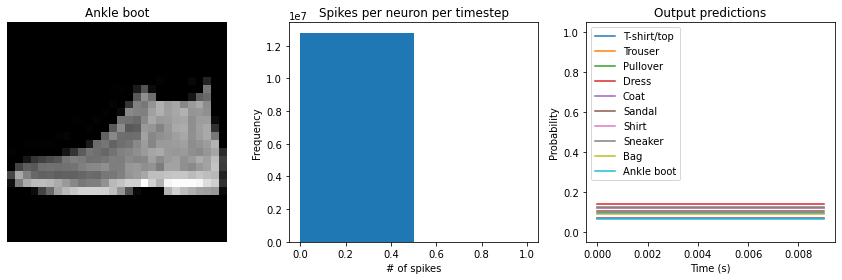

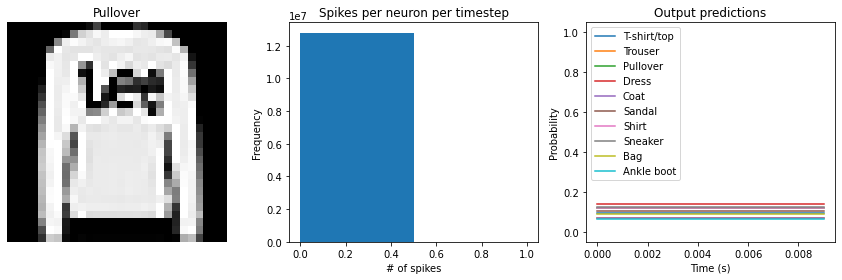

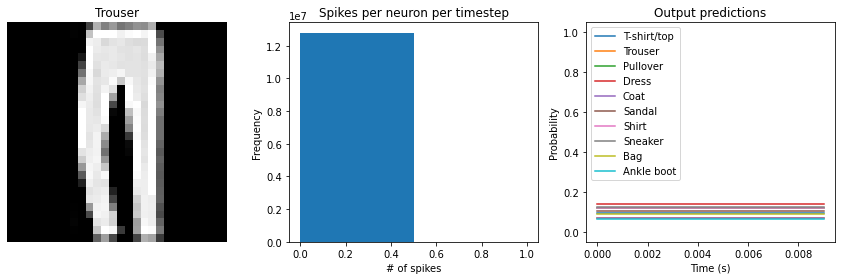

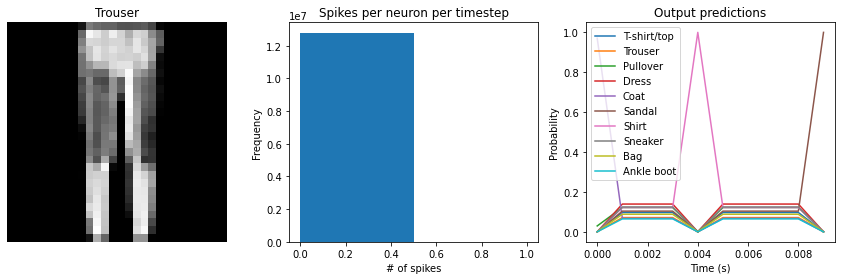

In [7]:
check_output(model)

We can see an immediate problem: the neurons are hardly spiking at all. The mean number of spikes we're getting out of each neuron in our SpikingActivation layer is much less than one, and as a result the output is mostly flat.

To help understand why, we need to think more about the temporal nature of spiking neurons. Recall that the layer is set up such that if the base activation function were to be outputting a value of 1, the spiking equivalent would be spiking at 1Hz (i.e., emitting one spike per second). In the above example we are simulating for 10 timesteps, with the default ``dt`` of 0.001s, so we're simulating a total of 0.01s. If our neurons aren't spiking very rapidly, and we're only simulating for 0.01s, then it's not surprising that we aren't getting any spikes in that time window.

We can increase the value of ``dt``, effectively running the spiking neurons for longer, in order to get a more accurate measure of the neuron's output. Basically this allows us to collect more spikes from each neuron, giving us a better estimate of the neuron's actual spike rate. We can see how the number of spikes and accuracy change as we increase ``dt``:

Test accuracy: 19.53%
Spike rate per neuron (Hz): min=0.00 mean=0.57 max=20.00


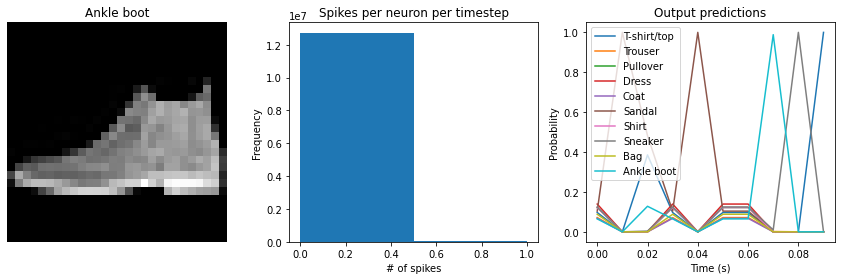

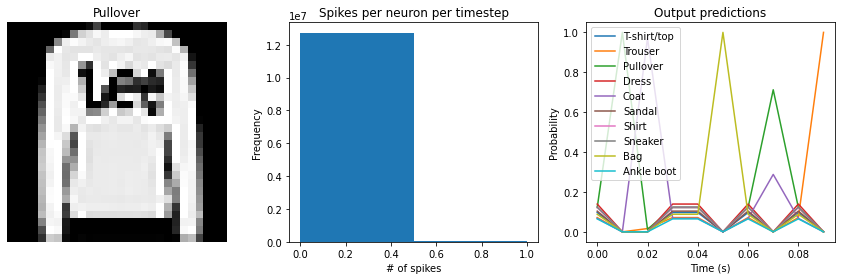

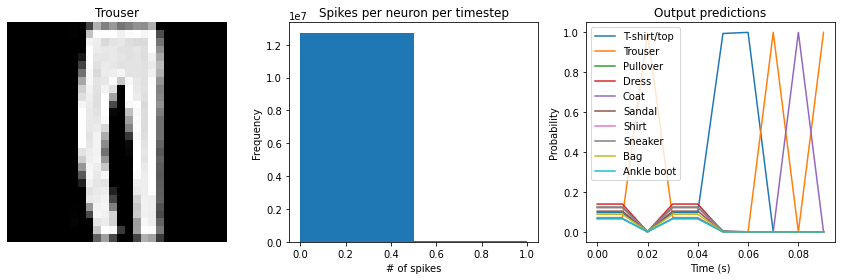

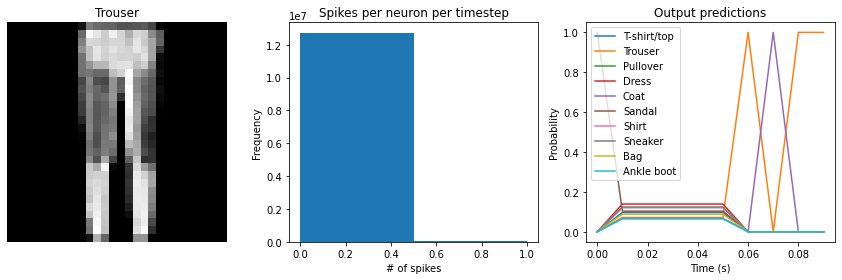

In [8]:
# dt=0.01 * 10 timesteps is equivalent to 0.1s of simulated time
check_output(model, dt=0.01)

Test accuracy: 65.00%
Spike rate per neuron (Hz): min=0.00 mean=0.57 max=18.00


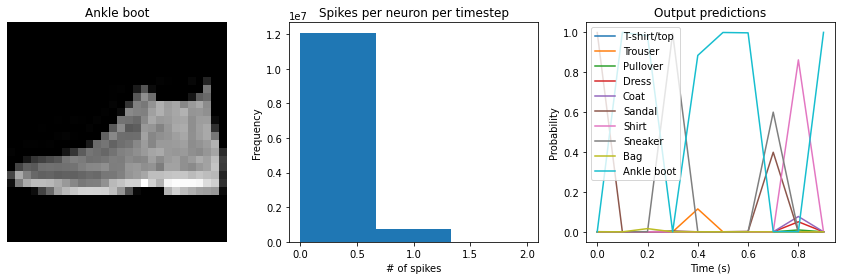

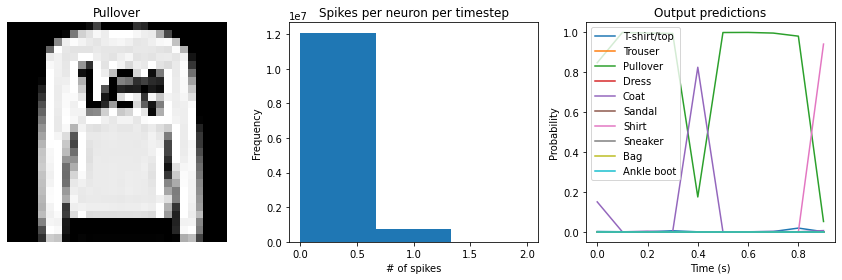

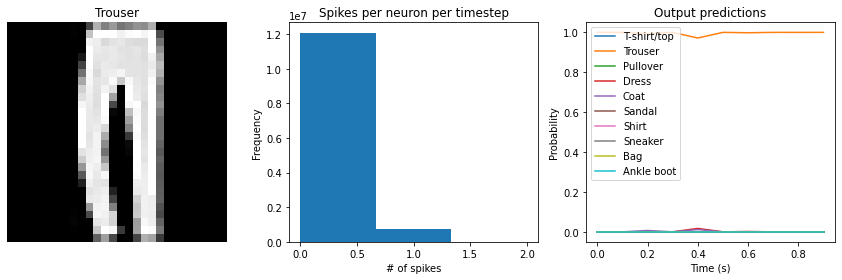

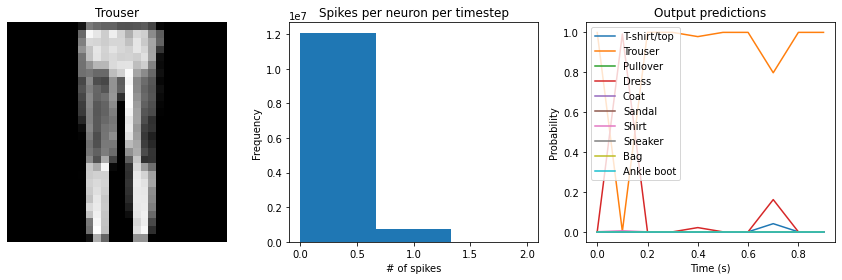

In [9]:
check_output(model, dt=0.1)

Test accuracy: 88.21%
Spike rate per neuron (Hz): min=0.00 mean=0.57 max=18.70


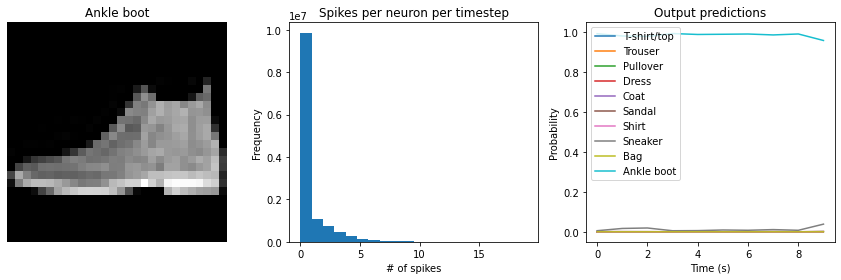

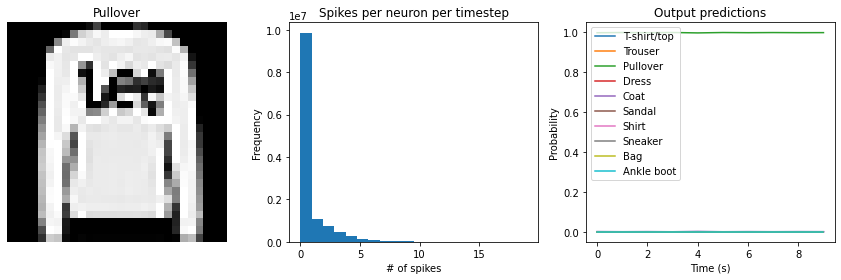

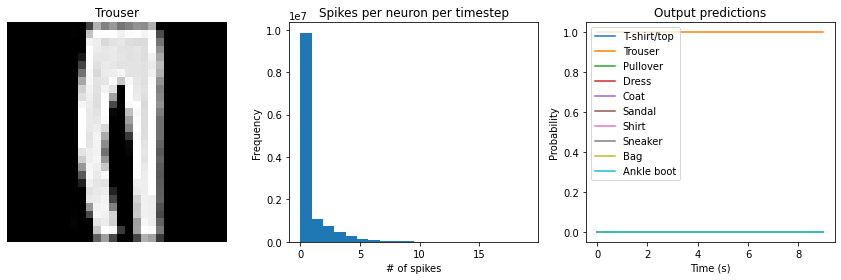

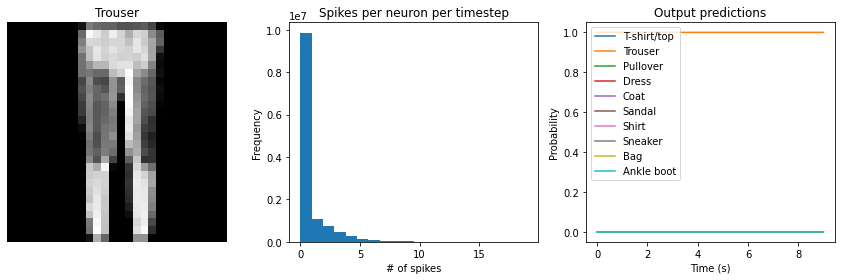

In [10]:
check_output(model, dt=1)

We can see that as we increase `dt` the performance of the spiking model increasingly approaches the non-spiking performance. In addition, as `dt` increases, the number of spikes is increasing. To understand why this improves accuracy, keep in mind that although the simulated time is increasing, the actual number of timesteps is still 10 in all cases. We're effectively binning all the spikes that occur on each time step. So as our bin sizes get larger (increasing `dt`), the spike counts will more closely approximate the "true" output of the underlying non-spiking activation function.

One might be tempted to simply increase `dt` to a very large value, and thereby always get great performance. But keep in mind that when we do that we have likely lost any of the advantages that were motivating us to investigate spiking models in the first place. For example, one prominent advantage of spiking models is temporal sparsity (we only need to communicate occasional spikes, rather than continuous values). However, with large `dt` the neurons are likely spiking every simulation time step (or multiple times per timestep), so the activity is no longer temporally sparse.

Thus setting `dt` represents a trade-off between accuracy and temporal sparsity. Choosing the appropriate value will depend on the demands of your application.

## Spiking aware training

As mentioned above, by default SpikingActivation layers will use the non-spiking activation function during training and the spiking version during inference. However, similar to the idea of [quantization aware training](https://www.tensorflow.org/model_optimization/guide/quantization/training), often we can improve performance by partially incorporating spiking behaviour during training. Specifically, we will use the spiking activation on the forward pass, while still using the non-spiking version on the backwards pass. This allows the model to learn weights that account for the discrete, temporal nature of the spiking activities.

In [11]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # set spiking_aware training and a moderate dt
        keras_spiking.SpikingActivation("relu", dt=0.1, spiking_aware_training=True),
        tf.keras.layers.Dense(10),
    ]
)

train(model)

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 3.9127 - accuracy: 0.0938

  14/1875 [..............................] - ETA: 6s - loss: 3.2075 - accuracy: 0.1696

  26/1875 [..............................] - ETA: 7s - loss: 3.1391 - accuracy: 0.2272

  39/1875 [..............................] - ETA: 7s - loss: 3.0174 - accuracy: 0.2780

  53/1875 [..............................] - ETA: 7s - loss: 2.8969 - accuracy: 0.3119

  67/1875 [>.............................] - ETA: 7s - loss: 2.8449 - accuracy: 0.3358

  80/1875 [>.............................] - ETA: 7s - loss: 2.7924 - accuracy: 0.3586

  93/1875 [>.............................] - ETA: 7s - loss: 2.7511 - accuracy: 0.3740

 104/1875 [>.............................] - ETA: 7s - loss: 2.7219 - accuracy: 0.3852

 117/1875 [>.............................] - ETA: 7s - loss: 2.6440 - accuracy: 0.4036

 131/1875 [=>............................] - ETA: 7s - loss: 2.5830 - accuracy: 0.4167

 144/1875 [=>............................] - ETA: 6s - loss: 2.5438 - accuracy: 0.4293

 157/1875 [=>............................] - ETA: 6s - loss: 2.4968 - accuracy: 0.4377

 170/1875 [=>............................] - ETA: 6s - loss: 2.4558 - accuracy: 0.4469

 183/1875 [=>............................] - ETA: 6s - loss: 2.4350 - accuracy: 0.4559

 196/1875 [==>...........................] - ETA: 6s - loss: 2.4006 - accuracy: 0.4636

 209/1875 [==>...........................] - ETA: 6s - loss: 2.3514 - accuracy: 0.4738

 222/1875 [==>...........................] - ETA: 6s - loss: 2.3077 - accuracy: 0.4820

 235/1875 [==>...........................] - ETA: 6s - loss: 2.2826 - accuracy: 0.4867

 248/1875 [==>...........................] - ETA: 6s - loss: 2.2452 - accuracy: 0.4923

 261/1875 [===>..........................] - ETA: 6s - loss: 2.2109 - accuracy: 0.4989

 274/1875 [===>..........................] - ETA: 6s - loss: 2.1919 - accuracy: 0.5023

 286/1875 [===>..........................] - ETA: 6s - loss: 2.1573 - accuracy: 0.5066

 299/1875 [===>..........................] - ETA: 6s - loss: 2.1436 - accuracy: 0.5107

 313/1875 [====>.........................] - ETA: 6s - loss: 2.1192 - accuracy: 0.5151

 326/1875 [====>.........................] - ETA: 6s - loss: 2.0963 - accuracy: 0.5198

 339/1875 [====>.........................] - ETA: 6s - loss: 2.0716 - accuracy: 0.5246

 352/1875 [====>.........................] - ETA: 6s - loss: 2.0419 - accuracy: 0.5291

 364/1875 [====>.........................] - ETA: 6s - loss: 2.0200 - accuracy: 0.5328

 377/1875 [=====>........................] - ETA: 6s - loss: 1.9994 - accuracy: 0.5364

 389/1875 [=====>........................] - ETA: 6s - loss: 1.9848 - accuracy: 0.5388

 402/1875 [=====>........................] - ETA: 6s - loss: 1.9641 - accuracy: 0.5431

 415/1875 [=====>........................] - ETA: 5s - loss: 1.9441 - accuracy: 0.5463

 428/1875 [=====>........................] - ETA: 5s - loss: 1.9242 - accuracy: 0.5499

 441/1875 [======>.......................] - ETA: 5s - loss: 1.9037 - accuracy: 0.5529

 452/1875 [======>.......................] - ETA: 5s - loss: 1.8852 - accuracy: 0.5558

 463/1875 [======>.......................] - ETA: 5s - loss: 1.8679 - accuracy: 0.5585

 476/1875 [======>.......................] - ETA: 5s - loss: 1.8462 - accuracy: 0.5613

 489/1875 [======>.......................] - ETA: 5s - loss: 1.8294 - accuracy: 0.5639

 502/1875 [=======>......................] - ETA: 5s - loss: 1.8145 - accuracy: 0.5662

 515/1875 [=======>......................] - ETA: 5s - loss: 1.7981 - accuracy: 0.5688

 528/1875 [=======>......................] - ETA: 5s - loss: 1.7839 - accuracy: 0.5707

 541/1875 [=======>......................] - ETA: 5s - loss: 1.7667 - accuracy: 0.5739

 554/1875 [=======>......................] - ETA: 5s - loss: 1.7525 - accuracy: 0.5770

 567/1875 [========>.....................] - ETA: 5s - loss: 1.7351 - accuracy: 0.5793

 579/1875 [========>.....................] - ETA: 5s - loss: 1.7221 - accuracy: 0.5813

 591/1875 [========>.....................] - ETA: 5s - loss: 1.7148 - accuracy: 0.5823

 604/1875 [========>.....................] - ETA: 5s - loss: 1.6971 - accuracy: 0.5850

 616/1875 [========>.....................] - ETA: 5s - loss: 1.6828 - accuracy: 0.5864

 629/1875 [=========>....................] - ETA: 5s - loss: 1.6698 - accuracy: 0.5882

 641/1875 [=========>....................] - ETA: 5s - loss: 1.6588 - accuracy: 0.5895

 654/1875 [=========>....................] - ETA: 5s - loss: 1.6455 - accuracy: 0.5911

 667/1875 [=========>....................] - ETA: 4s - loss: 1.6326 - accuracy: 0.5932

 680/1875 [=========>....................] - ETA: 4s - loss: 1.6232 - accuracy: 0.5942

 693/1875 [==========>...................] - ETA: 4s - loss: 1.6103 - accuracy: 0.5958

 703/1875 [==========>...................] - ETA: 4s - loss: 1.5993 - accuracy: 0.5972

 715/1875 [==========>...................] - ETA: 4s - loss: 1.5891 - accuracy: 0.5986

 729/1875 [==========>...................] - ETA: 4s - loss: 1.5784 - accuracy: 0.6004

 742/1875 [==========>...................] - ETA: 4s - loss: 1.5684 - accuracy: 0.6021

 754/1875 [===========>..................] - ETA: 4s - loss: 1.5595 - accuracy: 0.6037

 767/1875 [===========>..................] - ETA: 4s - loss: 1.5486 - accuracy: 0.6052

 780/1875 [===========>..................] - ETA: 4s - loss: 1.5384 - accuracy: 0.6069

 793/1875 [===========>..................] - ETA: 4s - loss: 1.5282 - accuracy: 0.6084

 805/1875 [===========>..................] - ETA: 4s - loss: 1.5189 - accuracy: 0.6097

 817/1875 [============>.................] - ETA: 4s - loss: 1.5089 - accuracy: 0.6110

 829/1875 [============>.................] - ETA: 4s - loss: 1.5018 - accuracy: 0.6117

 842/1875 [============>.................] - ETA: 4s - loss: 1.4916 - accuracy: 0.6133

 856/1875 [============>.................] - ETA: 4s - loss: 1.4821 - accuracy: 0.6143

 868/1875 [============>.................] - ETA: 4s - loss: 1.4741 - accuracy: 0.6151

 880/1875 [=============>................] - ETA: 4s - loss: 1.4660 - accuracy: 0.6161

 892/1875 [=============>................] - ETA: 4s - loss: 1.4572 - accuracy: 0.6176

 905/1875 [=============>................] - ETA: 3s - loss: 1.4490 - accuracy: 0.6184

 918/1875 [=============>................] - ETA: 3s - loss: 1.4434 - accuracy: 0.6189

 930/1875 [=============>................] - ETA: 3s - loss: 1.4352 - accuracy: 0.6200

 943/1875 [==============>...............] - ETA: 3s - loss: 1.4273 - accuracy: 0.6214

 955/1875 [==============>...............] - ETA: 3s - loss: 1.4205 - accuracy: 0.6224

 968/1875 [==============>...............] - ETA: 3s - loss: 1.4132 - accuracy: 0.6233

 981/1875 [==============>...............] - ETA: 3s - loss: 1.4064 - accuracy: 0.6240

 993/1875 [==============>...............] - ETA: 3s - loss: 1.4002 - accuracy: 0.6251

1004/1875 [===============>..............] - ETA: 3s - loss: 1.3932 - accuracy: 0.6259

1017/1875 [===============>..............] - ETA: 3s - loss: 1.3854 - accuracy: 0.6272

1029/1875 [===============>..............] - ETA: 3s - loss: 1.3789 - accuracy: 0.6285

1037/1875 [===============>..............] - ETA: 3s - loss: 1.3749 - accuracy: 0.6294

1049/1875 [===============>..............] - ETA: 3s - loss: 1.3680 - accuracy: 0.6304

1062/1875 [===============>..............] - ETA: 3s - loss: 1.3606 - accuracy: 0.6317

1075/1875 [================>.............] - ETA: 3s - loss: 1.3534 - accuracy: 0.6326

1087/1875 [================>.............] - ETA: 3s - loss: 1.3470 - accuracy: 0.6336

1099/1875 [================>.............] - ETA: 3s - loss: 1.3418 - accuracy: 0.6344

1111/1875 [================>.............] - ETA: 3s - loss: 1.3364 - accuracy: 0.6351

1124/1875 [================>.............] - ETA: 3s - loss: 1.3287 - accuracy: 0.6363

1134/1875 [=================>............] - ETA: 3s - loss: 1.3237 - accuracy: 0.6372

1141/1875 [=================>............] - ETA: 3s - loss: 1.3200 - accuracy: 0.6378

1153/1875 [=================>............] - ETA: 3s - loss: 1.3137 - accuracy: 0.6388

1164/1875 [=================>............] - ETA: 2s - loss: 1.3081 - accuracy: 0.6394

1175/1875 [=================>............] - ETA: 2s - loss: 1.3040 - accuracy: 0.6400

1188/1875 [==================>...........] - ETA: 2s - loss: 1.2989 - accuracy: 0.6409

1199/1875 [==================>...........] - ETA: 2s - loss: 1.2945 - accuracy: 0.6416

1210/1875 [==================>...........] - ETA: 2s - loss: 1.2889 - accuracy: 0.6426

1221/1875 [==================>...........] - ETA: 2s - loss: 1.2839 - accuracy: 0.6435

1233/1875 [==================>...........] - ETA: 2s - loss: 1.2787 - accuracy: 0.6445

1246/1875 [==================>...........] - ETA: 2s - loss: 1.2736 - accuracy: 0.6452

1259/1875 [===================>..........] - ETA: 2s - loss: 1.2688 - accuracy: 0.6459

1271/1875 [===================>..........] - ETA: 2s - loss: 1.2637 - accuracy: 0.6469

1284/1875 [===================>..........] - ETA: 2s - loss: 1.2591 - accuracy: 0.6477

1296/1875 [===================>..........] - ETA: 2s - loss: 1.2539 - accuracy: 0.6483

1309/1875 [===================>..........] - ETA: 2s - loss: 1.2476 - accuracy: 0.6495

1322/1875 [====================>.........] - ETA: 2s - loss: 1.2416 - accuracy: 0.6506

1334/1875 [====================>.........] - ETA: 2s - loss: 1.2378 - accuracy: 0.6510

1346/1875 [====================>.........] - ETA: 2s - loss: 1.2333 - accuracy: 0.6517

1360/1875 [====================>.........] - ETA: 2s - loss: 1.2279 - accuracy: 0.6526

1373/1875 [====================>.........] - ETA: 2s - loss: 1.2231 - accuracy: 0.6534

1385/1875 [=====================>........] - ETA: 2s - loss: 1.2191 - accuracy: 0.6540

1398/1875 [=====================>........] - ETA: 1s - loss: 1.2150 - accuracy: 0.6547

1411/1875 [=====================>........] - ETA: 1s - loss: 1.2101 - accuracy: 0.6557

1424/1875 [=====================>........] - ETA: 1s - loss: 1.2061 - accuracy: 0.6561

1436/1875 [=====================>........] - ETA: 1s - loss: 1.2027 - accuracy: 0.6566

1450/1875 [======================>.......] - ETA: 1s - loss: 1.1978 - accuracy: 0.6574

1462/1875 [======================>.......] - ETA: 1s - loss: 1.1948 - accuracy: 0.6579

1474/1875 [======================>.......] - ETA: 1s - loss: 1.1914 - accuracy: 0.6584

1487/1875 [======================>.......] - ETA: 1s - loss: 1.1868 - accuracy: 0.6591

1500/1875 [=======================>......] - ETA: 1s - loss: 1.1821 - accuracy: 0.6601

1513/1875 [=======================>......] - ETA: 1s - loss: 1.1787 - accuracy: 0.6607

1524/1875 [=======================>......] - ETA: 1s - loss: 1.1750 - accuracy: 0.6615

1536/1875 [=======================>......] - ETA: 1s - loss: 1.1721 - accuracy: 0.6619

1549/1875 [=======================>......] - ETA: 1s - loss: 1.1686 - accuracy: 0.6627

1562/1875 [=======================>......] - ETA: 1s - loss: 1.1648 - accuracy: 0.6632

1575/1875 [========================>.....] - ETA: 1s - loss: 1.1620 - accuracy: 0.6635

1587/1875 [========================>.....] - ETA: 1s - loss: 1.1589 - accuracy: 0.6639

1600/1875 [========================>.....] - ETA: 1s - loss: 1.1552 - accuracy: 0.6645

1613/1875 [========================>.....] - ETA: 1s - loss: 1.1509 - accuracy: 0.6652

1626/1875 [=========================>....] - ETA: 1s - loss: 1.1478 - accuracy: 0.6658

1639/1875 [=========================>....] - ETA: 0s - loss: 1.1446 - accuracy: 0.6663

1651/1875 [=========================>....] - ETA: 0s - loss: 1.1412 - accuracy: 0.6669

1664/1875 [=========================>....] - ETA: 0s - loss: 1.1382 - accuracy: 0.6674

1677/1875 [=========================>....] - ETA: 0s - loss: 1.1351 - accuracy: 0.6682

1690/1875 [==========================>...] - ETA: 0s - loss: 1.1324 - accuracy: 0.6687

1702/1875 [==========================>...] - ETA: 0s - loss: 1.1291 - accuracy: 0.6693

1714/1875 [==========================>...] - ETA: 0s - loss: 1.1260 - accuracy: 0.6698

1727/1875 [==========================>...] - ETA: 0s - loss: 1.1226 - accuracy: 0.6702

1740/1875 [==========================>...] - ETA: 0s - loss: 1.1196 - accuracy: 0.6707

1752/1875 [===========================>..] - ETA: 0s - loss: 1.1167 - accuracy: 0.6712

1764/1875 [===========================>..] - ETA: 0s - loss: 1.1137 - accuracy: 0.6719

1777/1875 [===========================>..] - ETA: 0s - loss: 1.1105 - accuracy: 0.6724

1791/1875 [===========================>..] - ETA: 0s - loss: 1.1084 - accuracy: 0.6726

1804/1875 [===========================>..] - ETA: 0s - loss: 1.1050 - accuracy: 0.6735

1815/1875 [============================>.] - ETA: 0s - loss: 1.1025 - accuracy: 0.6740

1828/1875 [============================>.] - ETA: 0s - loss: 1.0995 - accuracy: 0.6743

1841/1875 [============================>.] - ETA: 0s - loss: 1.0956 - accuracy: 0.6750

1853/1875 [============================>.] - ETA: 0s - loss: 1.0929 - accuracy: 0.6754

1865/1875 [============================>.] - ETA: 0s - loss: 1.0913 - accuracy: 0.6757

1875/1875 [==============================] - 8s 4ms/step - loss: 1.0891 - accuracy: 0.6762


Epoch 2/10


   1/1875 [..............................] - ETA: 0s - loss: 0.6161 - accuracy: 0.7812

  14/1875 [..............................] - ETA: 7s - loss: 0.6609 - accuracy: 0.7545

  27/1875 [..............................] - ETA: 7s - loss: 0.6493 - accuracy: 0.7581

  40/1875 [..............................] - ETA: 7s - loss: 0.6837 - accuracy: 0.7453

  53/1875 [..............................] - ETA: 7s - loss: 0.6947 - accuracy: 0.7441

  66/1875 [>.............................] - ETA: 7s - loss: 0.6853 - accuracy: 0.7462

  78/1875 [>.............................] - ETA: 7s - loss: 0.6742 - accuracy: 0.7496

  90/1875 [>.............................] - ETA: 7s - loss: 0.6667 - accuracy: 0.7517

 102/1875 [>.............................] - ETA: 7s - loss: 0.6710 - accuracy: 0.7521

 115/1875 [>.............................] - ETA: 7s - loss: 0.6688 - accuracy: 0.7535

 127/1875 [=>............................] - ETA: 7s - loss: 0.6761 - accuracy: 0.7505

 140/1875 [=>............................] - ETA: 7s - loss: 0.6830 - accuracy: 0.7507

 152/1875 [=>............................] - ETA: 7s - loss: 0.6761 - accuracy: 0.7514

 165/1875 [=>............................] - ETA: 7s - loss: 0.6794 - accuracy: 0.7496

 177/1875 [=>............................] - ETA: 7s - loss: 0.6742 - accuracy: 0.7496

 190/1875 [==>...........................] - ETA: 6s - loss: 0.6751 - accuracy: 0.7498

 203/1875 [==>...........................] - ETA: 6s - loss: 0.6715 - accuracy: 0.7511

 214/1875 [==>...........................] - ETA: 6s - loss: 0.6719 - accuracy: 0.7531

 226/1875 [==>...........................] - ETA: 6s - loss: 0.6674 - accuracy: 0.7547

 239/1875 [==>...........................] - ETA: 6s - loss: 0.6700 - accuracy: 0.7537

 251/1875 [===>..........................] - ETA: 6s - loss: 0.6700 - accuracy: 0.7537

 264/1875 [===>..........................] - ETA: 6s - loss: 0.6662 - accuracy: 0.7559

 277/1875 [===>..........................] - ETA: 6s - loss: 0.6659 - accuracy: 0.7563

 290/1875 [===>..........................] - ETA: 6s - loss: 0.6653 - accuracy: 0.7572

 303/1875 [===>..........................] - ETA: 6s - loss: 0.6693 - accuracy: 0.7558

 315/1875 [====>.........................] - ETA: 6s - loss: 0.6668 - accuracy: 0.7571

 327/1875 [====>.........................] - ETA: 6s - loss: 0.6656 - accuracy: 0.7579

 339/1875 [====>.........................] - ETA: 6s - loss: 0.6658 - accuracy: 0.7570

 351/1875 [====>.........................] - ETA: 6s - loss: 0.6663 - accuracy: 0.7578

 363/1875 [====>.........................] - ETA: 6s - loss: 0.6665 - accuracy: 0.7576

 376/1875 [=====>........................] - ETA: 6s - loss: 0.6642 - accuracy: 0.7576

 389/1875 [=====>........................] - ETA: 6s - loss: 0.6626 - accuracy: 0.7581

 402/1875 [=====>........................] - ETA: 6s - loss: 0.6618 - accuracy: 0.7584

 414/1875 [=====>........................] - ETA: 6s - loss: 0.6598 - accuracy: 0.7588

 427/1875 [=====>........................] - ETA: 5s - loss: 0.6593 - accuracy: 0.7585

 440/1875 [======>.......................] - ETA: 5s - loss: 0.6574 - accuracy: 0.7602

 452/1875 [======>.......................] - ETA: 5s - loss: 0.6570 - accuracy: 0.7605

 465/1875 [======>.......................] - ETA: 5s - loss: 0.6590 - accuracy: 0.7601

 478/1875 [======>.......................] - ETA: 5s - loss: 0.6584 - accuracy: 0.7607

 491/1875 [======>.......................] - ETA: 5s - loss: 0.6593 - accuracy: 0.7609

 503/1875 [=======>......................] - ETA: 5s - loss: 0.6588 - accuracy: 0.7604

 515/1875 [=======>......................] - ETA: 5s - loss: 0.6580 - accuracy: 0.7606

 528/1875 [=======>......................] - ETA: 5s - loss: 0.6579 - accuracy: 0.7606

 541/1875 [=======>......................] - ETA: 5s - loss: 0.6576 - accuracy: 0.7614

 553/1875 [=======>......................] - ETA: 5s - loss: 0.6559 - accuracy: 0.7618

 565/1875 [========>.....................] - ETA: 5s - loss: 0.6559 - accuracy: 0.7619

 578/1875 [========>.....................] - ETA: 5s - loss: 0.6542 - accuracy: 0.7624

 591/1875 [========>.....................] - ETA: 5s - loss: 0.6541 - accuracy: 0.7625

 604/1875 [========>.....................] - ETA: 5s - loss: 0.6550 - accuracy: 0.7617

 617/1875 [========>.....................] - ETA: 5s - loss: 0.6537 - accuracy: 0.7621

 630/1875 [=========>....................] - ETA: 5s - loss: 0.6541 - accuracy: 0.7618

 643/1875 [=========>....................] - ETA: 5s - loss: 0.6534 - accuracy: 0.7618

 656/1875 [=========>....................] - ETA: 5s - loss: 0.6540 - accuracy: 0.7616

 669/1875 [=========>....................] - ETA: 4s - loss: 0.6520 - accuracy: 0.7624

 681/1875 [=========>....................] - ETA: 4s - loss: 0.6520 - accuracy: 0.7624

 694/1875 [==========>...................] - ETA: 4s - loss: 0.6512 - accuracy: 0.7626

 707/1875 [==========>...................] - ETA: 4s - loss: 0.6502 - accuracy: 0.7627

 719/1875 [==========>...................] - ETA: 4s - loss: 0.6504 - accuracy: 0.7627

 731/1875 [==========>...................] - ETA: 4s - loss: 0.6490 - accuracy: 0.7634

 744/1875 [==========>...................] - ETA: 4s - loss: 0.6480 - accuracy: 0.7639

 757/1875 [===========>..................] - ETA: 4s - loss: 0.6478 - accuracy: 0.7639

 769/1875 [===========>..................] - ETA: 4s - loss: 0.6477 - accuracy: 0.7640

 781/1875 [===========>..................] - ETA: 4s - loss: 0.6473 - accuracy: 0.7641

 793/1875 [===========>..................] - ETA: 4s - loss: 0.6469 - accuracy: 0.7640

 804/1875 [===========>..................] - ETA: 4s - loss: 0.6477 - accuracy: 0.7640

 817/1875 [============>.................] - ETA: 4s - loss: 0.6467 - accuracy: 0.7643

 829/1875 [============>.................] - ETA: 4s - loss: 0.6481 - accuracy: 0.7640

 842/1875 [============>.................] - ETA: 4s - loss: 0.6479 - accuracy: 0.7641

 855/1875 [============>.................] - ETA: 4s - loss: 0.6486 - accuracy: 0.7638

 867/1875 [============>.................] - ETA: 4s - loss: 0.6487 - accuracy: 0.7637

 880/1875 [=============>................] - ETA: 4s - loss: 0.6473 - accuracy: 0.7640

 894/1875 [=============>................] - ETA: 4s - loss: 0.6472 - accuracy: 0.7641

 907/1875 [=============>................] - ETA: 3s - loss: 0.6456 - accuracy: 0.7645

 919/1875 [=============>................] - ETA: 3s - loss: 0.6454 - accuracy: 0.7648

 932/1875 [=============>................] - ETA: 3s - loss: 0.6454 - accuracy: 0.7652

 945/1875 [==============>...............] - ETA: 3s - loss: 0.6453 - accuracy: 0.7650

 958/1875 [==============>...............] - ETA: 3s - loss: 0.6444 - accuracy: 0.7654

 971/1875 [==============>...............] - ETA: 3s - loss: 0.6454 - accuracy: 0.7651

 984/1875 [==============>...............] - ETA: 3s - loss: 0.6448 - accuracy: 0.7656

 997/1875 [==============>...............] - ETA: 3s - loss: 0.6439 - accuracy: 0.7658

1011/1875 [===============>..............] - ETA: 3s - loss: 0.6429 - accuracy: 0.7660

1025/1875 [===============>..............] - ETA: 3s - loss: 0.6432 - accuracy: 0.7659

1035/1875 [===============>..............] - ETA: 3s - loss: 0.6428 - accuracy: 0.7662

1047/1875 [===============>..............] - ETA: 3s - loss: 0.6426 - accuracy: 0.7663

1060/1875 [===============>..............] - ETA: 3s - loss: 0.6420 - accuracy: 0.7667

1074/1875 [================>.............] - ETA: 3s - loss: 0.6414 - accuracy: 0.7669

1086/1875 [================>.............] - ETA: 3s - loss: 0.6413 - accuracy: 0.7670

1099/1875 [================>.............] - ETA: 3s - loss: 0.6414 - accuracy: 0.7671

1112/1875 [================>.............] - ETA: 3s - loss: 0.6412 - accuracy: 0.7669

1125/1875 [=================>............] - ETA: 3s - loss: 0.6411 - accuracy: 0.7670

1138/1875 [=================>............] - ETA: 3s - loss: 0.6406 - accuracy: 0.7671

1150/1875 [=================>............] - ETA: 2s - loss: 0.6408 - accuracy: 0.7671

1162/1875 [=================>............] - ETA: 2s - loss: 0.6407 - accuracy: 0.7670

1172/1875 [=================>............] - ETA: 2s - loss: 0.6409 - accuracy: 0.7669

1186/1875 [=================>............] - ETA: 2s - loss: 0.6411 - accuracy: 0.7668

1198/1875 [==================>...........] - ETA: 2s - loss: 0.6399 - accuracy: 0.7674

1208/1875 [==================>...........] - ETA: 2s - loss: 0.6396 - accuracy: 0.7674

1221/1875 [==================>...........] - ETA: 2s - loss: 0.6384 - accuracy: 0.7676

1234/1875 [==================>...........] - ETA: 2s - loss: 0.6370 - accuracy: 0.7682

1249/1875 [==================>...........] - ETA: 2s - loss: 0.6367 - accuracy: 0.7684

1260/1875 [===================>..........] - ETA: 2s - loss: 0.6365 - accuracy: 0.7684

1274/1875 [===================>..........] - ETA: 2s - loss: 0.6359 - accuracy: 0.7684

1288/1875 [===================>..........] - ETA: 2s - loss: 0.6364 - accuracy: 0.7685

1302/1875 [===================>..........] - ETA: 2s - loss: 0.6358 - accuracy: 0.7688

1316/1875 [====================>.........] - ETA: 2s - loss: 0.6356 - accuracy: 0.7689

1327/1875 [====================>.........] - ETA: 2s - loss: 0.6359 - accuracy: 0.7689

1341/1875 [====================>.........] - ETA: 2s - loss: 0.6362 - accuracy: 0.7690

1354/1875 [====================>.........] - ETA: 2s - loss: 0.6358 - accuracy: 0.7691

1367/1875 [====================>.........] - ETA: 2s - loss: 0.6355 - accuracy: 0.7691

1378/1875 [=====================>........] - ETA: 2s - loss: 0.6349 - accuracy: 0.7692

1392/1875 [=====================>........] - ETA: 1s - loss: 0.6345 - accuracy: 0.7697

1404/1875 [=====================>........] - ETA: 1s - loss: 0.6341 - accuracy: 0.7696

1417/1875 [=====================>........] - ETA: 1s - loss: 0.6330 - accuracy: 0.7699

1429/1875 [=====================>........] - ETA: 1s - loss: 0.6326 - accuracy: 0.7701

1442/1875 [======================>.......] - ETA: 1s - loss: 0.6312 - accuracy: 0.7706

1456/1875 [======================>.......] - ETA: 1s - loss: 0.6313 - accuracy: 0.7705

1470/1875 [======================>.......] - ETA: 1s - loss: 0.6315 - accuracy: 0.7706

1483/1875 [======================>.......] - ETA: 1s - loss: 0.6307 - accuracy: 0.7708

1497/1875 [======================>.......] - ETA: 1s - loss: 0.6303 - accuracy: 0.7711

1509/1875 [=======================>......] - ETA: 1s - loss: 0.6303 - accuracy: 0.7712

1521/1875 [=======================>......] - ETA: 1s - loss: 0.6300 - accuracy: 0.7712

1534/1875 [=======================>......] - ETA: 1s - loss: 0.6299 - accuracy: 0.7713

1547/1875 [=======================>......] - ETA: 1s - loss: 0.6306 - accuracy: 0.7711

1560/1875 [=======================>......] - ETA: 1s - loss: 0.6302 - accuracy: 0.7712

1573/1875 [========================>.....] - ETA: 1s - loss: 0.6298 - accuracy: 0.7715

1587/1875 [========================>.....] - ETA: 1s - loss: 0.6292 - accuracy: 0.7718

1601/1875 [========================>.....] - ETA: 1s - loss: 0.6282 - accuracy: 0.7723

1615/1875 [========================>.....] - ETA: 1s - loss: 0.6285 - accuracy: 0.7724

1628/1875 [=========================>....] - ETA: 1s - loss: 0.6282 - accuracy: 0.7728

1642/1875 [=========================>....] - ETA: 0s - loss: 0.6277 - accuracy: 0.7731

1656/1875 [=========================>....] - ETA: 0s - loss: 0.6276 - accuracy: 0.7733

1669/1875 [=========================>....] - ETA: 0s - loss: 0.6272 - accuracy: 0.7734

1683/1875 [=========================>....] - ETA: 0s - loss: 0.6277 - accuracy: 0.7734

1697/1875 [==========================>...] - ETA: 0s - loss: 0.6276 - accuracy: 0.7735

1710/1875 [==========================>...] - ETA: 0s - loss: 0.6268 - accuracy: 0.7738

1724/1875 [==========================>...] - ETA: 0s - loss: 0.6264 - accuracy: 0.7737

1738/1875 [==========================>...] - ETA: 0s - loss: 0.6260 - accuracy: 0.7739

1753/1875 [===========================>..] - ETA: 0s - loss: 0.6252 - accuracy: 0.7742

1768/1875 [===========================>..] - ETA: 0s - loss: 0.6246 - accuracy: 0.7743

1783/1875 [===========================>..] - ETA: 0s - loss: 0.6248 - accuracy: 0.7743

1797/1875 [===========================>..] - ETA: 0s - loss: 0.6249 - accuracy: 0.7742

1811/1875 [===========================>..] - ETA: 0s - loss: 0.6253 - accuracy: 0.7742

1826/1875 [============================>.] - ETA: 0s - loss: 0.6247 - accuracy: 0.7744

1841/1875 [============================>.] - ETA: 0s - loss: 0.6241 - accuracy: 0.7747

1856/1875 [============================>.] - ETA: 0s - loss: 0.6233 - accuracy: 0.7751

1871/1875 [============================>.] - ETA: 0s - loss: 0.6231 - accuracy: 0.7751

1875/1875 [==============================] - 8s 4ms/step - loss: 0.6232 - accuracy: 0.7750


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4993 - accuracy: 0.9375

  16/1875 [..............................] - ETA: 6s - loss: 0.5565 - accuracy: 0.8086

  31/1875 [..............................] - ETA: 6s - loss: 0.5488 - accuracy: 0.8065

  46/1875 [..............................] - ETA: 6s - loss: 0.5508 - accuracy: 0.8016

  61/1875 [..............................] - ETA: 6s - loss: 0.5935 - accuracy: 0.7869

  76/1875 [>.............................] - ETA: 6s - loss: 0.5857 - accuracy: 0.7874

  91/1875 [>.............................] - ETA: 6s - loss: 0.5895 - accuracy: 0.7861

 105/1875 [>.............................] - ETA: 6s - loss: 0.5900 - accuracy: 0.7863

 120/1875 [>.............................] - ETA: 6s - loss: 0.5902 - accuracy: 0.7865

 135/1875 [=>............................] - ETA: 6s - loss: 0.5907 - accuracy: 0.7875

 150/1875 [=>............................] - ETA: 5s - loss: 0.5832 - accuracy: 0.7906

 165/1875 [=>............................] - ETA: 5s - loss: 0.5837 - accuracy: 0.7907

 180/1875 [=>............................] - ETA: 5s - loss: 0.5911 - accuracy: 0.7885

 195/1875 [==>...........................] - ETA: 5s - loss: 0.5938 - accuracy: 0.7877

 210/1875 [==>...........................] - ETA: 5s - loss: 0.5905 - accuracy: 0.7888

 223/1875 [==>...........................] - ETA: 5s - loss: 0.5906 - accuracy: 0.7871

 238/1875 [==>...........................] - ETA: 5s - loss: 0.5904 - accuracy: 0.7868

 253/1875 [===>..........................] - ETA: 5s - loss: 0.5892 - accuracy: 0.7874

 268/1875 [===>..........................] - ETA: 5s - loss: 0.5899 - accuracy: 0.7882

 283/1875 [===>..........................] - ETA: 5s - loss: 0.5930 - accuracy: 0.7879

 298/1875 [===>..........................] - ETA: 5s - loss: 0.5948 - accuracy: 0.7875

 312/1875 [===>..........................] - ETA: 5s - loss: 0.5965 - accuracy: 0.7868

 327/1875 [====>.........................] - ETA: 5s - loss: 0.5963 - accuracy: 0.7869

 343/1875 [====>.........................] - ETA: 5s - loss: 0.5996 - accuracy: 0.7851

 357/1875 [====>.........................] - ETA: 5s - loss: 0.5983 - accuracy: 0.7861

 372/1875 [====>.........................] - ETA: 5s - loss: 0.6007 - accuracy: 0.7859

 388/1875 [=====>........................] - ETA: 5s - loss: 0.5978 - accuracy: 0.7865

 403/1875 [=====>........................] - ETA: 5s - loss: 0.5971 - accuracy: 0.7861

 419/1875 [=====>........................] - ETA: 5s - loss: 0.5933 - accuracy: 0.7874

 433/1875 [=====>........................] - ETA: 4s - loss: 0.5915 - accuracy: 0.7885

 447/1875 [======>.......................] - ETA: 4s - loss: 0.5880 - accuracy: 0.7894

 461/1875 [======>.......................] - ETA: 4s - loss: 0.5868 - accuracy: 0.7901

 476/1875 [======>.......................] - ETA: 4s - loss: 0.5838 - accuracy: 0.7915

 491/1875 [======>.......................] - ETA: 4s - loss: 0.5810 - accuracy: 0.7923

 505/1875 [=======>......................] - ETA: 4s - loss: 0.5830 - accuracy: 0.7913

 520/1875 [=======>......................] - ETA: 4s - loss: 0.5822 - accuracy: 0.7913

 535/1875 [=======>......................] - ETA: 4s - loss: 0.5803 - accuracy: 0.7921

 550/1875 [=======>......................] - ETA: 4s - loss: 0.5796 - accuracy: 0.7926

 565/1875 [========>.....................] - ETA: 4s - loss: 0.5802 - accuracy: 0.7931

 580/1875 [========>.....................] - ETA: 4s - loss: 0.5799 - accuracy: 0.7933

 595/1875 [========>.....................] - ETA: 4s - loss: 0.5791 - accuracy: 0.7934

 610/1875 [========>.....................] - ETA: 4s - loss: 0.5769 - accuracy: 0.7942

 625/1875 [=========>....................] - ETA: 4s - loss: 0.5775 - accuracy: 0.7936

 640/1875 [=========>....................] - ETA: 4s - loss: 0.5776 - accuracy: 0.7933

 654/1875 [=========>....................] - ETA: 4s - loss: 0.5776 - accuracy: 0.7933

 669/1875 [=========>....................] - ETA: 4s - loss: 0.5761 - accuracy: 0.7937

 684/1875 [=========>....................] - ETA: 4s - loss: 0.5768 - accuracy: 0.7937

 697/1875 [==========>...................] - ETA: 4s - loss: 0.5797 - accuracy: 0.7925

 712/1875 [==========>...................] - ETA: 4s - loss: 0.5797 - accuracy: 0.7928

 726/1875 [==========>...................] - ETA: 3s - loss: 0.5798 - accuracy: 0.7929

 741/1875 [==========>...................] - ETA: 3s - loss: 0.5806 - accuracy: 0.7926

 756/1875 [===========>..................] - ETA: 3s - loss: 0.5787 - accuracy: 0.7933

 771/1875 [===========>..................] - ETA: 3s - loss: 0.5789 - accuracy: 0.7928

 786/1875 [===========>..................] - ETA: 3s - loss: 0.5763 - accuracy: 0.7935

 801/1875 [===========>..................] - ETA: 3s - loss: 0.5763 - accuracy: 0.7935

 816/1875 [============>.................] - ETA: 3s - loss: 0.5752 - accuracy: 0.7938

 831/1875 [============>.................] - ETA: 3s - loss: 0.5756 - accuracy: 0.7938

 846/1875 [============>.................] - ETA: 3s - loss: 0.5760 - accuracy: 0.7940

 860/1875 [============>.................] - ETA: 3s - loss: 0.5750 - accuracy: 0.7942

 876/1875 [=============>................] - ETA: 3s - loss: 0.5728 - accuracy: 0.7949

 891/1875 [=============>................] - ETA: 3s - loss: 0.5724 - accuracy: 0.7950

 907/1875 [=============>................] - ETA: 3s - loss: 0.5715 - accuracy: 0.7952

 923/1875 [=============>................] - ETA: 3s - loss: 0.5723 - accuracy: 0.7952

 938/1875 [==============>...............] - ETA: 3s - loss: 0.5724 - accuracy: 0.7952

 952/1875 [==============>...............] - ETA: 3s - loss: 0.5718 - accuracy: 0.7954

 967/1875 [==============>...............] - ETA: 3s - loss: 0.5703 - accuracy: 0.7961

 981/1875 [==============>...............] - ETA: 3s - loss: 0.5695 - accuracy: 0.7962

 995/1875 [==============>...............] - ETA: 3s - loss: 0.5695 - accuracy: 0.7961

1007/1875 [===============>..............] - ETA: 3s - loss: 0.5696 - accuracy: 0.7962

1022/1875 [===============>..............] - ETA: 2s - loss: 0.5686 - accuracy: 0.7965

1036/1875 [===============>..............] - ETA: 2s - loss: 0.5681 - accuracy: 0.7967

1050/1875 [===============>..............] - ETA: 2s - loss: 0.5684 - accuracy: 0.7967

1065/1875 [================>.............] - ETA: 2s - loss: 0.5683 - accuracy: 0.7968

1080/1875 [================>.............] - ETA: 2s - loss: 0.5673 - accuracy: 0.7971

1095/1875 [================>.............] - ETA: 2s - loss: 0.5670 - accuracy: 0.7972

1110/1875 [================>.............] - ETA: 2s - loss: 0.5680 - accuracy: 0.7971

1125/1875 [=================>............] - ETA: 2s - loss: 0.5673 - accuracy: 0.7973

1139/1875 [=================>............] - ETA: 2s - loss: 0.5674 - accuracy: 0.7972

1153/1875 [=================>............] - ETA: 2s - loss: 0.5673 - accuracy: 0.7974

1168/1875 [=================>............] - ETA: 2s - loss: 0.5665 - accuracy: 0.7975

1182/1875 [=================>............] - ETA: 2s - loss: 0.5671 - accuracy: 0.7973

1196/1875 [==================>...........] - ETA: 2s - loss: 0.5678 - accuracy: 0.7972

1211/1875 [==================>...........] - ETA: 2s - loss: 0.5673 - accuracy: 0.7974

1226/1875 [==================>...........] - ETA: 2s - loss: 0.5668 - accuracy: 0.7976

1241/1875 [==================>...........] - ETA: 2s - loss: 0.5669 - accuracy: 0.7977

1256/1875 [===================>..........] - ETA: 2s - loss: 0.5666 - accuracy: 0.7978

1271/1875 [===================>..........] - ETA: 2s - loss: 0.5677 - accuracy: 0.7975

1286/1875 [===================>..........] - ETA: 2s - loss: 0.5666 - accuracy: 0.7978

1302/1875 [===================>..........] - ETA: 1s - loss: 0.5660 - accuracy: 0.7982

1317/1875 [====================>.........] - ETA: 1s - loss: 0.5646 - accuracy: 0.7988

1331/1875 [====================>.........] - ETA: 1s - loss: 0.5643 - accuracy: 0.7989

1346/1875 [====================>.........] - ETA: 1s - loss: 0.5650 - accuracy: 0.7987

1361/1875 [====================>.........] - ETA: 1s - loss: 0.5650 - accuracy: 0.7986

1376/1875 [=====================>........] - ETA: 1s - loss: 0.5650 - accuracy: 0.7986

1391/1875 [=====================>........] - ETA: 1s - loss: 0.5649 - accuracy: 0.7983

1406/1875 [=====================>........] - ETA: 1s - loss: 0.5655 - accuracy: 0.7980

1421/1875 [=====================>........] - ETA: 1s - loss: 0.5650 - accuracy: 0.7985

1436/1875 [=====================>........] - ETA: 1s - loss: 0.5650 - accuracy: 0.7983

1451/1875 [======================>.......] - ETA: 1s - loss: 0.5649 - accuracy: 0.7983

1466/1875 [======================>.......] - ETA: 1s - loss: 0.5646 - accuracy: 0.7985

1481/1875 [======================>.......] - ETA: 1s - loss: 0.5641 - accuracy: 0.7984

1496/1875 [======================>.......] - ETA: 1s - loss: 0.5636 - accuracy: 0.7984

1511/1875 [=======================>......] - ETA: 1s - loss: 0.5640 - accuracy: 0.7982

1526/1875 [=======================>......] - ETA: 1s - loss: 0.5626 - accuracy: 0.7988

1542/1875 [=======================>......] - ETA: 1s - loss: 0.5620 - accuracy: 0.7990

1557/1875 [=======================>......] - ETA: 1s - loss: 0.5615 - accuracy: 0.7994

1572/1875 [========================>.....] - ETA: 1s - loss: 0.5616 - accuracy: 0.7995

1587/1875 [========================>.....] - ETA: 1s - loss: 0.5615 - accuracy: 0.7995

1603/1875 [========================>.....] - ETA: 0s - loss: 0.5616 - accuracy: 0.7995

1618/1875 [========================>.....] - ETA: 0s - loss: 0.5622 - accuracy: 0.7995

1633/1875 [=========================>....] - ETA: 0s - loss: 0.5617 - accuracy: 0.7996

1649/1875 [=========================>....] - ETA: 0s - loss: 0.5613 - accuracy: 0.7997

1663/1875 [=========================>....] - ETA: 0s - loss: 0.5609 - accuracy: 0.7997

1678/1875 [=========================>....] - ETA: 0s - loss: 0.5601 - accuracy: 0.8000

1688/1875 [==========================>...] - ETA: 0s - loss: 0.5601 - accuracy: 0.8000

1703/1875 [==========================>...] - ETA: 0s - loss: 0.5595 - accuracy: 0.8000

1718/1875 [==========================>...] - ETA: 0s - loss: 0.5589 - accuracy: 0.8001

1733/1875 [==========================>...] - ETA: 0s - loss: 0.5583 - accuracy: 0.8002

1748/1875 [==========================>...] - ETA: 0s - loss: 0.5577 - accuracy: 0.8001

1763/1875 [===========================>..] - ETA: 0s - loss: 0.5579 - accuracy: 0.8001

1778/1875 [===========================>..] - ETA: 0s - loss: 0.5576 - accuracy: 0.8002

1793/1875 [===========================>..] - ETA: 0s - loss: 0.5576 - accuracy: 0.8003

1808/1875 [===========================>..] - ETA: 0s - loss: 0.5570 - accuracy: 0.8005

1822/1875 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.8010

1836/1875 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.8009

1849/1875 [============================>.] - ETA: 0s - loss: 0.5559 - accuracy: 0.8009

1862/1875 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.8010

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5556 - accuracy: 0.8010


Epoch 4/10


   1/1875 [..............................] - ETA: 0s - loss: 0.4983 - accuracy: 0.8125

  16/1875 [..............................] - ETA: 5s - loss: 0.5228 - accuracy: 0.8145

  31/1875 [..............................] - ETA: 6s - loss: 0.5408 - accuracy: 0.8115

  46/1875 [..............................] - ETA: 6s - loss: 0.5624 - accuracy: 0.8023

  61/1875 [..............................] - ETA: 6s - loss: 0.5464 - accuracy: 0.8074

  75/1875 [>.............................] - ETA: 6s - loss: 0.5502 - accuracy: 0.8087

  90/1875 [>.............................] - ETA: 6s - loss: 0.5509 - accuracy: 0.8062

 104/1875 [>.............................] - ETA: 6s - loss: 0.5446 - accuracy: 0.8080

 118/1875 [>.............................] - ETA: 6s - loss: 0.5471 - accuracy: 0.8064

 133/1875 [=>............................] - ETA: 6s - loss: 0.5503 - accuracy: 0.8036

 148/1875 [=>............................] - ETA: 5s - loss: 0.5563 - accuracy: 0.8017

 164/1875 [=>............................] - ETA: 5s - loss: 0.5575 - accuracy: 0.8024

 179/1875 [=>............................] - ETA: 5s - loss: 0.5553 - accuracy: 0.8024

 195/1875 [==>...........................] - ETA: 5s - loss: 0.5474 - accuracy: 0.8051

 210/1875 [==>...........................] - ETA: 5s - loss: 0.5454 - accuracy: 0.8042

 225/1875 [==>...........................] - ETA: 5s - loss: 0.5388 - accuracy: 0.8067

 240/1875 [==>...........................] - ETA: 5s - loss: 0.5376 - accuracy: 0.8069

 255/1875 [===>..........................] - ETA: 5s - loss: 0.5350 - accuracy: 0.8070

 270/1875 [===>..........................] - ETA: 5s - loss: 0.5372 - accuracy: 0.8061

 284/1875 [===>..........................] - ETA: 5s - loss: 0.5422 - accuracy: 0.8053

 299/1875 [===>..........................] - ETA: 5s - loss: 0.5426 - accuracy: 0.8053

 314/1875 [====>.........................] - ETA: 5s - loss: 0.5407 - accuracy: 0.8055

 329/1875 [====>.........................] - ETA: 5s - loss: 0.5377 - accuracy: 0.8068

 344/1875 [====>.........................] - ETA: 5s - loss: 0.5374 - accuracy: 0.8070

 360/1875 [====>.........................] - ETA: 5s - loss: 0.5361 - accuracy: 0.8074

 375/1875 [=====>........................] - ETA: 5s - loss: 0.5360 - accuracy: 0.8070

 390/1875 [=====>........................] - ETA: 5s - loss: 0.5325 - accuracy: 0.8082

 405/1875 [=====>........................] - ETA: 5s - loss: 0.5345 - accuracy: 0.8066

 419/1875 [=====>........................] - ETA: 5s - loss: 0.5324 - accuracy: 0.8076

 434/1875 [=====>........................] - ETA: 4s - loss: 0.5322 - accuracy: 0.8080

 449/1875 [======>.......................] - ETA: 4s - loss: 0.5337 - accuracy: 0.8076

 464/1875 [======>.......................] - ETA: 4s - loss: 0.5329 - accuracy: 0.8082

 480/1875 [======>.......................] - ETA: 4s - loss: 0.5325 - accuracy: 0.8083

 496/1875 [======>.......................] - ETA: 4s - loss: 0.5305 - accuracy: 0.8088

 511/1875 [=======>......................] - ETA: 4s - loss: 0.5307 - accuracy: 0.8088

 525/1875 [=======>......................] - ETA: 4s - loss: 0.5316 - accuracy: 0.8086

 541/1875 [=======>......................] - ETA: 4s - loss: 0.5303 - accuracy: 0.8093

 556/1875 [=======>......................] - ETA: 4s - loss: 0.5281 - accuracy: 0.8100

 570/1875 [========>.....................] - ETA: 4s - loss: 0.5261 - accuracy: 0.8110

 584/1875 [========>.....................] - ETA: 4s - loss: 0.5250 - accuracy: 0.8112

 598/1875 [========>.....................] - ETA: 4s - loss: 0.5268 - accuracy: 0.8106

 611/1875 [========>.....................] - ETA: 4s - loss: 0.5252 - accuracy: 0.8110

 626/1875 [=========>....................] - ETA: 4s - loss: 0.5247 - accuracy: 0.8113

 640/1875 [=========>....................] - ETA: 4s - loss: 0.5266 - accuracy: 0.8100

 655/1875 [=========>....................] - ETA: 4s - loss: 0.5279 - accuracy: 0.8096

 670/1875 [=========>....................] - ETA: 4s - loss: 0.5276 - accuracy: 0.8103

 685/1875 [=========>....................] - ETA: 4s - loss: 0.5279 - accuracy: 0.8104

 700/1875 [==========>...................] - ETA: 4s - loss: 0.5267 - accuracy: 0.8108

 715/1875 [==========>...................] - ETA: 4s - loss: 0.5262 - accuracy: 0.8113

 729/1875 [==========>...................] - ETA: 3s - loss: 0.5261 - accuracy: 0.8114

 744/1875 [==========>...................] - ETA: 3s - loss: 0.5255 - accuracy: 0.8115

 759/1875 [===========>..................] - ETA: 3s - loss: 0.5250 - accuracy: 0.8118

 774/1875 [===========>..................] - ETA: 3s - loss: 0.5253 - accuracy: 0.8119

 789/1875 [===========>..................] - ETA: 3s - loss: 0.5262 - accuracy: 0.8113

 803/1875 [===========>..................] - ETA: 3s - loss: 0.5261 - accuracy: 0.8113

 818/1875 [============>.................] - ETA: 3s - loss: 0.5265 - accuracy: 0.8112

 833/1875 [============>.................] - ETA: 3s - loss: 0.5255 - accuracy: 0.8114

 848/1875 [============>.................] - ETA: 3s - loss: 0.5247 - accuracy: 0.8116

 863/1875 [============>.................] - ETA: 3s - loss: 0.5251 - accuracy: 0.8116

 878/1875 [=============>................] - ETA: 3s - loss: 0.5243 - accuracy: 0.8116

 893/1875 [=============>................] - ETA: 3s - loss: 0.5241 - accuracy: 0.8118

 908/1875 [=============>................] - ETA: 3s - loss: 0.5232 - accuracy: 0.8121

 924/1875 [=============>................] - ETA: 3s - loss: 0.5238 - accuracy: 0.8119

 939/1875 [==============>...............] - ETA: 3s - loss: 0.5224 - accuracy: 0.8125

 954/1875 [==============>...............] - ETA: 3s - loss: 0.5234 - accuracy: 0.8121

 969/1875 [==============>...............] - ETA: 3s - loss: 0.5236 - accuracy: 0.8118

 984/1875 [==============>...............] - ETA: 3s - loss: 0.5223 - accuracy: 0.8121

 999/1875 [==============>...............] - ETA: 3s - loss: 0.5227 - accuracy: 0.8120

1014/1875 [===============>..............] - ETA: 2s - loss: 0.5221 - accuracy: 0.8123

1029/1875 [===============>..............] - ETA: 2s - loss: 0.5218 - accuracy: 0.8119

1045/1875 [===============>..............] - ETA: 2s - loss: 0.5215 - accuracy: 0.8119

1061/1875 [===============>..............] - ETA: 2s - loss: 0.5205 - accuracy: 0.8124

1076/1875 [================>.............] - ETA: 2s - loss: 0.5193 - accuracy: 0.8126

1092/1875 [================>.............] - ETA: 2s - loss: 0.5184 - accuracy: 0.8131

1107/1875 [================>.............] - ETA: 2s - loss: 0.5175 - accuracy: 0.8133

1123/1875 [================>.............] - ETA: 2s - loss: 0.5194 - accuracy: 0.8129

1138/1875 [=================>............] - ETA: 2s - loss: 0.5196 - accuracy: 0.8127

1153/1875 [=================>............] - ETA: 2s - loss: 0.5199 - accuracy: 0.8127

1169/1875 [=================>............] - ETA: 2s - loss: 0.5189 - accuracy: 0.8128

1184/1875 [=================>............] - ETA: 2s - loss: 0.5184 - accuracy: 0.8130

1199/1875 [==================>...........] - ETA: 2s - loss: 0.5181 - accuracy: 0.8131

1214/1875 [==================>...........] - ETA: 2s - loss: 0.5180 - accuracy: 0.8132

1229/1875 [==================>...........] - ETA: 2s - loss: 0.5179 - accuracy: 0.8134

1244/1875 [==================>...........] - ETA: 2s - loss: 0.5180 - accuracy: 0.8135

1258/1875 [===================>..........] - ETA: 2s - loss: 0.5172 - accuracy: 0.8137

1274/1875 [===================>..........] - ETA: 2s - loss: 0.5164 - accuracy: 0.8144

1290/1875 [===================>..........] - ETA: 2s - loss: 0.5164 - accuracy: 0.8144

1305/1875 [===================>..........] - ETA: 1s - loss: 0.5168 - accuracy: 0.8144

1319/1875 [====================>.........] - ETA: 1s - loss: 0.5163 - accuracy: 0.8146

1334/1875 [====================>.........] - ETA: 1s - loss: 0.5165 - accuracy: 0.8144

1349/1875 [====================>.........] - ETA: 1s - loss: 0.5167 - accuracy: 0.8140

1364/1875 [====================>.........] - ETA: 1s - loss: 0.5174 - accuracy: 0.8139

1379/1875 [=====================>........] - ETA: 1s - loss: 0.5176 - accuracy: 0.8139

1393/1875 [=====================>........] - ETA: 1s - loss: 0.5177 - accuracy: 0.8138

1401/1875 [=====================>........] - ETA: 1s - loss: 0.5176 - accuracy: 0.8140

1413/1875 [=====================>........] - ETA: 1s - loss: 0.5165 - accuracy: 0.8144

1427/1875 [=====================>........] - ETA: 1s - loss: 0.5161 - accuracy: 0.8147

1442/1875 [======================>.......] - ETA: 1s - loss: 0.5163 - accuracy: 0.8146

1457/1875 [======================>.......] - ETA: 1s - loss: 0.5160 - accuracy: 0.8148

1472/1875 [======================>.......] - ETA: 1s - loss: 0.5156 - accuracy: 0.8148

1487/1875 [======================>.......] - ETA: 1s - loss: 0.5157 - accuracy: 0.8150

1503/1875 [=======================>......] - ETA: 1s - loss: 0.5154 - accuracy: 0.8151

1518/1875 [=======================>......] - ETA: 1s - loss: 0.5148 - accuracy: 0.8153

1532/1875 [=======================>......] - ETA: 1s - loss: 0.5151 - accuracy: 0.8152

1547/1875 [=======================>......] - ETA: 1s - loss: 0.5149 - accuracy: 0.8152

1562/1875 [=======================>......] - ETA: 1s - loss: 0.5152 - accuracy: 0.8152

1577/1875 [========================>.....] - ETA: 1s - loss: 0.5151 - accuracy: 0.8151

1592/1875 [========================>.....] - ETA: 0s - loss: 0.5151 - accuracy: 0.8151

1608/1875 [========================>.....] - ETA: 0s - loss: 0.5154 - accuracy: 0.8150

1623/1875 [========================>.....] - ETA: 0s - loss: 0.5146 - accuracy: 0.8152

1638/1875 [=========================>....] - ETA: 0s - loss: 0.5143 - accuracy: 0.8152

1653/1875 [=========================>....] - ETA: 0s - loss: 0.5141 - accuracy: 0.8152

1668/1875 [=========================>....] - ETA: 0s - loss: 0.5142 - accuracy: 0.8152

1682/1875 [=========================>....] - ETA: 0s - loss: 0.5142 - accuracy: 0.8152

1696/1875 [==========================>...] - ETA: 0s - loss: 0.5142 - accuracy: 0.8154

1709/1875 [==========================>...] - ETA: 0s - loss: 0.5143 - accuracy: 0.8155

1724/1875 [==========================>...] - ETA: 0s - loss: 0.5148 - accuracy: 0.8155

1739/1875 [==========================>...] - ETA: 0s - loss: 0.5147 - accuracy: 0.8155

1754/1875 [===========================>..] - ETA: 0s - loss: 0.5147 - accuracy: 0.8155

1769/1875 [===========================>..] - ETA: 0s - loss: 0.5148 - accuracy: 0.8155

1784/1875 [===========================>..] - ETA: 0s - loss: 0.5146 - accuracy: 0.8155

1799/1875 [===========================>..] - ETA: 0s - loss: 0.5143 - accuracy: 0.8155

1813/1875 [============================>.] - ETA: 0s - loss: 0.5143 - accuracy: 0.8157

1827/1875 [============================>.] - ETA: 0s - loss: 0.5138 - accuracy: 0.8160

1840/1875 [============================>.] - ETA: 0s - loss: 0.5134 - accuracy: 0.8161

1855/1875 [============================>.] - ETA: 0s - loss: 0.5134 - accuracy: 0.8164

1870/1875 [============================>.] - ETA: 0s - loss: 0.5134 - accuracy: 0.8164

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5133 - accuracy: 0.8163


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4713 - accuracy: 0.7812

  17/1875 [..............................] - ETA: 5s - loss: 0.5272 - accuracy: 0.7978

  32/1875 [..............................] - ETA: 6s - loss: 0.5226 - accuracy: 0.8115

  48/1875 [..............................] - ETA: 5s - loss: 0.5318 - accuracy: 0.8079

  64/1875 [>.............................] - ETA: 5s - loss: 0.5335 - accuracy: 0.8120

  79/1875 [>.............................] - ETA: 5s - loss: 0.5139 - accuracy: 0.8137

  94/1875 [>.............................] - ETA: 5s - loss: 0.5134 - accuracy: 0.8168

 109/1875 [>.............................] - ETA: 5s - loss: 0.5092 - accuracy: 0.8188

 124/1875 [>.............................] - ETA: 5s - loss: 0.5125 - accuracy: 0.8188

 138/1875 [=>............................] - ETA: 5s - loss: 0.5057 - accuracy: 0.8170

 153/1875 [=>............................] - ETA: 5s - loss: 0.5023 - accuracy: 0.8203

 167/1875 [=>............................] - ETA: 5s - loss: 0.4997 - accuracy: 0.8217

 183/1875 [=>............................] - ETA: 5s - loss: 0.4993 - accuracy: 0.8216

 196/1875 [==>...........................] - ETA: 5s - loss: 0.4937 - accuracy: 0.8233

 209/1875 [==>...........................] - ETA: 5s - loss: 0.4948 - accuracy: 0.8231

 223/1875 [==>...........................] - ETA: 5s - loss: 0.4963 - accuracy: 0.8232

 238/1875 [==>...........................] - ETA: 5s - loss: 0.5006 - accuracy: 0.8237

 253/1875 [===>..........................] - ETA: 5s - loss: 0.5003 - accuracy: 0.8241

 268/1875 [===>..........................] - ETA: 5s - loss: 0.5022 - accuracy: 0.8226

 283/1875 [===>..........................] - ETA: 5s - loss: 0.5029 - accuracy: 0.8231

 298/1875 [===>..........................] - ETA: 5s - loss: 0.4975 - accuracy: 0.8241

 313/1875 [====>.........................] - ETA: 5s - loss: 0.5016 - accuracy: 0.8226

 328/1875 [====>.........................] - ETA: 5s - loss: 0.4998 - accuracy: 0.8239

 344/1875 [====>.........................] - ETA: 5s - loss: 0.4986 - accuracy: 0.8239

 359/1875 [====>.........................] - ETA: 5s - loss: 0.4967 - accuracy: 0.8243

 374/1875 [====>.........................] - ETA: 5s - loss: 0.4952 - accuracy: 0.8244

 389/1875 [=====>........................] - ETA: 5s - loss: 0.4940 - accuracy: 0.8250

 403/1875 [=====>........................] - ETA: 5s - loss: 0.4962 - accuracy: 0.8235

 418/1875 [=====>........................] - ETA: 5s - loss: 0.4941 - accuracy: 0.8243

 433/1875 [=====>........................] - ETA: 5s - loss: 0.4959 - accuracy: 0.8238

 449/1875 [======>.......................] - ETA: 4s - loss: 0.4962 - accuracy: 0.8235

 463/1875 [======>.......................] - ETA: 4s - loss: 0.4939 - accuracy: 0.8237

 477/1875 [======>.......................] - ETA: 4s - loss: 0.4934 - accuracy: 0.8238

 493/1875 [======>.......................] - ETA: 4s - loss: 0.4929 - accuracy: 0.8237

 508/1875 [=======>......................] - ETA: 4s - loss: 0.4925 - accuracy: 0.8242

 523/1875 [=======>......................] - ETA: 4s - loss: 0.4928 - accuracy: 0.8239

 538/1875 [=======>......................] - ETA: 4s - loss: 0.4935 - accuracy: 0.8233

 553/1875 [=======>......................] - ETA: 4s - loss: 0.4929 - accuracy: 0.8240

 567/1875 [========>.....................] - ETA: 4s - loss: 0.4933 - accuracy: 0.8239

 582/1875 [========>.....................] - ETA: 4s - loss: 0.4928 - accuracy: 0.8244

 597/1875 [========>.....................] - ETA: 4s - loss: 0.4923 - accuracy: 0.8248

 612/1875 [========>.....................] - ETA: 4s - loss: 0.4899 - accuracy: 0.8260

 627/1875 [=========>....................] - ETA: 4s - loss: 0.4884 - accuracy: 0.8261

 642/1875 [=========>....................] - ETA: 4s - loss: 0.4895 - accuracy: 0.8259

 657/1875 [=========>....................] - ETA: 4s - loss: 0.4897 - accuracy: 0.8259

 671/1875 [=========>....................] - ETA: 4s - loss: 0.4894 - accuracy: 0.8263

 685/1875 [=========>....................] - ETA: 4s - loss: 0.4894 - accuracy: 0.8264

 698/1875 [==========>...................] - ETA: 4s - loss: 0.4888 - accuracy: 0.8270

 712/1875 [==========>...................] - ETA: 4s - loss: 0.4873 - accuracy: 0.8274

 727/1875 [==========>...................] - ETA: 4s - loss: 0.4884 - accuracy: 0.8269

 741/1875 [==========>...................] - ETA: 4s - loss: 0.4887 - accuracy: 0.8262

 753/1875 [===========>..................] - ETA: 3s - loss: 0.4893 - accuracy: 0.8259

 766/1875 [===========>..................] - ETA: 3s - loss: 0.4888 - accuracy: 0.8260

 781/1875 [===========>..................] - ETA: 3s - loss: 0.4891 - accuracy: 0.8263

 795/1875 [===========>..................] - ETA: 3s - loss: 0.4882 - accuracy: 0.8265

 808/1875 [===========>..................] - ETA: 3s - loss: 0.4892 - accuracy: 0.8261

 822/1875 [============>.................] - ETA: 3s - loss: 0.4890 - accuracy: 0.8267

 836/1875 [============>.................] - ETA: 3s - loss: 0.4901 - accuracy: 0.8264

 849/1875 [============>.................] - ETA: 3s - loss: 0.4892 - accuracy: 0.8268

 862/1875 [============>.................] - ETA: 3s - loss: 0.4890 - accuracy: 0.8269

 876/1875 [=============>................] - ETA: 3s - loss: 0.4890 - accuracy: 0.8270

 890/1875 [=============>................] - ETA: 3s - loss: 0.4875 - accuracy: 0.8274

 904/1875 [=============>................] - ETA: 3s - loss: 0.4881 - accuracy: 0.8273

 918/1875 [=============>................] - ETA: 3s - loss: 0.4876 - accuracy: 0.8272

 932/1875 [=============>................] - ETA: 3s - loss: 0.4863 - accuracy: 0.8275

 945/1875 [==============>...............] - ETA: 3s - loss: 0.4864 - accuracy: 0.8276

 959/1875 [==============>...............] - ETA: 3s - loss: 0.4866 - accuracy: 0.8276

 973/1875 [==============>...............] - ETA: 3s - loss: 0.4857 - accuracy: 0.8283

 987/1875 [==============>...............] - ETA: 3s - loss: 0.4859 - accuracy: 0.8281

1000/1875 [===============>..............] - ETA: 3s - loss: 0.4864 - accuracy: 0.8283

1011/1875 [===============>..............] - ETA: 3s - loss: 0.4860 - accuracy: 0.8283

1023/1875 [===============>..............] - ETA: 3s - loss: 0.4848 - accuracy: 0.8287

1037/1875 [===============>..............] - ETA: 3s - loss: 0.4846 - accuracy: 0.8285

1051/1875 [===============>..............] - ETA: 2s - loss: 0.4845 - accuracy: 0.8285

1064/1875 [================>.............] - ETA: 2s - loss: 0.4852 - accuracy: 0.8284

1078/1875 [================>.............] - ETA: 2s - loss: 0.4843 - accuracy: 0.8288

1092/1875 [================>.............] - ETA: 2s - loss: 0.4844 - accuracy: 0.8287

1105/1875 [================>.............] - ETA: 2s - loss: 0.4845 - accuracy: 0.8283

1118/1875 [================>.............] - ETA: 2s - loss: 0.4846 - accuracy: 0.8280

1132/1875 [=================>............] - ETA: 2s - loss: 0.4840 - accuracy: 0.8282

1146/1875 [=================>............] - ETA: 2s - loss: 0.4835 - accuracy: 0.8282

1159/1875 [=================>............] - ETA: 2s - loss: 0.4832 - accuracy: 0.8281

1173/1875 [=================>............] - ETA: 2s - loss: 0.4838 - accuracy: 0.8279

1187/1875 [=================>............] - ETA: 2s - loss: 0.4831 - accuracy: 0.8282

1200/1875 [==================>...........] - ETA: 2s - loss: 0.4833 - accuracy: 0.8282

1214/1875 [==================>...........] - ETA: 2s - loss: 0.4839 - accuracy: 0.8279

1228/1875 [==================>...........] - ETA: 2s - loss: 0.4838 - accuracy: 0.8278

1241/1875 [==================>...........] - ETA: 2s - loss: 0.4848 - accuracy: 0.8275

1254/1875 [===================>..........] - ETA: 2s - loss: 0.4846 - accuracy: 0.8275

1268/1875 [===================>..........] - ETA: 2s - loss: 0.4845 - accuracy: 0.8275

1282/1875 [===================>..........] - ETA: 2s - loss: 0.4845 - accuracy: 0.8275

1295/1875 [===================>..........] - ETA: 2s - loss: 0.4847 - accuracy: 0.8274

1308/1875 [===================>..........] - ETA: 2s - loss: 0.4840 - accuracy: 0.8276

1321/1875 [====================>.........] - ETA: 2s - loss: 0.4831 - accuracy: 0.8279

1334/1875 [====================>.........] - ETA: 1s - loss: 0.4839 - accuracy: 0.8277

1347/1875 [====================>.........] - ETA: 1s - loss: 0.4840 - accuracy: 0.8276

1360/1875 [====================>.........] - ETA: 1s - loss: 0.4851 - accuracy: 0.8273

1374/1875 [====================>.........] - ETA: 1s - loss: 0.4852 - accuracy: 0.8271

1388/1875 [=====================>........] - ETA: 1s - loss: 0.4848 - accuracy: 0.8273

1401/1875 [=====================>........] - ETA: 1s - loss: 0.4846 - accuracy: 0.8271

1415/1875 [=====================>........] - ETA: 1s - loss: 0.4843 - accuracy: 0.8273

1429/1875 [=====================>........] - ETA: 1s - loss: 0.4837 - accuracy: 0.8273

1443/1875 [======================>.......] - ETA: 1s - loss: 0.4838 - accuracy: 0.8275

1456/1875 [======================>.......] - ETA: 1s - loss: 0.4837 - accuracy: 0.8277

1468/1875 [======================>.......] - ETA: 1s - loss: 0.4836 - accuracy: 0.8278

1482/1875 [======================>.......] - ETA: 1s - loss: 0.4828 - accuracy: 0.8279

1496/1875 [======================>.......] - ETA: 1s - loss: 0.4831 - accuracy: 0.8279

1510/1875 [=======================>......] - ETA: 1s - loss: 0.4833 - accuracy: 0.8279

1524/1875 [=======================>......] - ETA: 1s - loss: 0.4832 - accuracy: 0.8277

1538/1875 [=======================>......] - ETA: 1s - loss: 0.4834 - accuracy: 0.8277

1552/1875 [=======================>......] - ETA: 1s - loss: 0.4832 - accuracy: 0.8278

1566/1875 [========================>.....] - ETA: 1s - loss: 0.4832 - accuracy: 0.8277

1580/1875 [========================>.....] - ETA: 1s - loss: 0.4834 - accuracy: 0.8276

1593/1875 [========================>.....] - ETA: 1s - loss: 0.4833 - accuracy: 0.8275

1607/1875 [========================>.....] - ETA: 0s - loss: 0.4830 - accuracy: 0.8276

1621/1875 [========================>.....] - ETA: 0s - loss: 0.4830 - accuracy: 0.8276

1634/1875 [=========================>....] - ETA: 0s - loss: 0.4834 - accuracy: 0.8274

1648/1875 [=========================>....] - ETA: 0s - loss: 0.4833 - accuracy: 0.8274

1662/1875 [=========================>....] - ETA: 0s - loss: 0.4824 - accuracy: 0.8277

1674/1875 [=========================>....] - ETA: 0s - loss: 0.4821 - accuracy: 0.8277

1688/1875 [==========================>...] - ETA: 0s - loss: 0.4825 - accuracy: 0.8276

1702/1875 [==========================>...] - ETA: 0s - loss: 0.4822 - accuracy: 0.8275

1716/1875 [==========================>...] - ETA: 0s - loss: 0.4826 - accuracy: 0.8275

1730/1875 [==========================>...] - ETA: 0s - loss: 0.4821 - accuracy: 0.8278

1744/1875 [==========================>...] - ETA: 0s - loss: 0.4827 - accuracy: 0.8276

1757/1875 [===========================>..] - ETA: 0s - loss: 0.4829 - accuracy: 0.8277

1771/1875 [===========================>..] - ETA: 0s - loss: 0.4831 - accuracy: 0.8275

1785/1875 [===========================>..] - ETA: 0s - loss: 0.4828 - accuracy: 0.8276

1799/1875 [===========================>..] - ETA: 0s - loss: 0.4829 - accuracy: 0.8275

1813/1875 [============================>.] - ETA: 0s - loss: 0.4828 - accuracy: 0.8275

1827/1875 [============================>.] - ETA: 0s - loss: 0.4824 - accuracy: 0.8277

1841/1875 [============================>.] - ETA: 0s - loss: 0.4822 - accuracy: 0.8277

1854/1875 [============================>.] - ETA: 0s - loss: 0.4823 - accuracy: 0.8277

1868/1875 [============================>.] - ETA: 0s - loss: 0.4819 - accuracy: 0.8278

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4818 - accuracy: 0.8278


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3750 - accuracy: 0.8438

  15/1875 [..............................] - ETA: 6s - loss: 0.4958 - accuracy: 0.8417

  28/1875 [..............................] - ETA: 6s - loss: 0.5012 - accuracy: 0.8304

  42/1875 [..............................] - ETA: 6s - loss: 0.4992 - accuracy: 0.8318

  56/1875 [..............................] - ETA: 6s - loss: 0.4877 - accuracy: 0.8337

  69/1875 [>.............................] - ETA: 6s - loss: 0.4848 - accuracy: 0.8315

  83/1875 [>.............................] - ETA: 6s - loss: 0.4899 - accuracy: 0.8264

  97/1875 [>.............................] - ETA: 6s - loss: 0.4884 - accuracy: 0.8241

 111/1875 [>.............................] - ETA: 6s - loss: 0.4800 - accuracy: 0.8263

 122/1875 [>.............................] - ETA: 6s - loss: 0.4782 - accuracy: 0.8263

 136/1875 [=>............................] - ETA: 6s - loss: 0.4793 - accuracy: 0.8258

 149/1875 [=>............................] - ETA: 6s - loss: 0.4736 - accuracy: 0.8272

 163/1875 [=>............................] - ETA: 6s - loss: 0.4738 - accuracy: 0.8253

 177/1875 [=>............................] - ETA: 6s - loss: 0.4722 - accuracy: 0.8263

 190/1875 [==>...........................] - ETA: 6s - loss: 0.4766 - accuracy: 0.8248

 203/1875 [==>...........................] - ETA: 6s - loss: 0.4763 - accuracy: 0.8251

 217/1875 [==>...........................] - ETA: 6s - loss: 0.4734 - accuracy: 0.8265

 231/1875 [==>...........................] - ETA: 6s - loss: 0.4719 - accuracy: 0.8281

 244/1875 [==>...........................] - ETA: 6s - loss: 0.4693 - accuracy: 0.8298

 258/1875 [===>..........................] - ETA: 6s - loss: 0.4699 - accuracy: 0.8292

 272/1875 [===>..........................] - ETA: 6s - loss: 0.4700 - accuracy: 0.8285

 285/1875 [===>..........................] - ETA: 6s - loss: 0.4693 - accuracy: 0.8293

 298/1875 [===>..........................] - ETA: 6s - loss: 0.4690 - accuracy: 0.8297

 312/1875 [===>..........................] - ETA: 5s - loss: 0.4679 - accuracy: 0.8306

 325/1875 [====>.........................] - ETA: 5s - loss: 0.4717 - accuracy: 0.8293

 339/1875 [====>.........................] - ETA: 5s - loss: 0.4723 - accuracy: 0.8284

 353/1875 [====>.........................] - ETA: 5s - loss: 0.4723 - accuracy: 0.8288

 367/1875 [====>.........................] - ETA: 5s - loss: 0.4719 - accuracy: 0.8287

 381/1875 [=====>........................] - ETA: 5s - loss: 0.4738 - accuracy: 0.8280

 394/1875 [=====>........................] - ETA: 5s - loss: 0.4770 - accuracy: 0.8268

 409/1875 [=====>........................] - ETA: 5s - loss: 0.4758 - accuracy: 0.8269

 423/1875 [=====>........................] - ETA: 5s - loss: 0.4740 - accuracy: 0.8275

 436/1875 [=====>........................] - ETA: 5s - loss: 0.4740 - accuracy: 0.8273

 450/1875 [======>.......................] - ETA: 5s - loss: 0.4741 - accuracy: 0.8267

 464/1875 [======>.......................] - ETA: 5s - loss: 0.4753 - accuracy: 0.8268

 478/1875 [======>.......................] - ETA: 5s - loss: 0.4722 - accuracy: 0.8275

 492/1875 [======>.......................] - ETA: 5s - loss: 0.4711 - accuracy: 0.8279

 506/1875 [=======>......................] - ETA: 5s - loss: 0.4731 - accuracy: 0.8278

 520/1875 [=======>......................] - ETA: 5s - loss: 0.4747 - accuracy: 0.8272

 532/1875 [=======>......................] - ETA: 5s - loss: 0.4728 - accuracy: 0.8277

 546/1875 [=======>......................] - ETA: 5s - loss: 0.4734 - accuracy: 0.8277

 560/1875 [=======>......................] - ETA: 4s - loss: 0.4733 - accuracy: 0.8276

 572/1875 [========>.....................] - ETA: 4s - loss: 0.4731 - accuracy: 0.8276

 585/1875 [========>.....................] - ETA: 4s - loss: 0.4728 - accuracy: 0.8274

 599/1875 [========>.....................] - ETA: 4s - loss: 0.4723 - accuracy: 0.8274

 613/1875 [========>.....................] - ETA: 4s - loss: 0.4728 - accuracy: 0.8274

 626/1875 [=========>....................] - ETA: 4s - loss: 0.4717 - accuracy: 0.8278

 640/1875 [=========>....................] - ETA: 4s - loss: 0.4718 - accuracy: 0.8280

 649/1875 [=========>....................] - ETA: 4s - loss: 0.4719 - accuracy: 0.8278

 662/1875 [=========>....................] - ETA: 4s - loss: 0.4726 - accuracy: 0.8280

 676/1875 [=========>....................] - ETA: 4s - loss: 0.4726 - accuracy: 0.8280

 690/1875 [==========>...................] - ETA: 4s - loss: 0.4720 - accuracy: 0.8281

 704/1875 [==========>...................] - ETA: 4s - loss: 0.4711 - accuracy: 0.8286

 718/1875 [==========>...................] - ETA: 4s - loss: 0.4714 - accuracy: 0.8284

 732/1875 [==========>...................] - ETA: 4s - loss: 0.4699 - accuracy: 0.8288

 746/1875 [==========>...................] - ETA: 4s - loss: 0.4709 - accuracy: 0.8283

 759/1875 [===========>..................] - ETA: 4s - loss: 0.4708 - accuracy: 0.8285

 772/1875 [===========>..................] - ETA: 4s - loss: 0.4698 - accuracy: 0.8287

 785/1875 [===========>..................] - ETA: 4s - loss: 0.4684 - accuracy: 0.8294

 798/1875 [===========>..................] - ETA: 4s - loss: 0.4682 - accuracy: 0.8297

 811/1875 [===========>..................] - ETA: 4s - loss: 0.4665 - accuracy: 0.8303

 825/1875 [============>.................] - ETA: 4s - loss: 0.4657 - accuracy: 0.8310

 838/1875 [============>.................] - ETA: 3s - loss: 0.4652 - accuracy: 0.8313

 852/1875 [============>.................] - ETA: 3s - loss: 0.4648 - accuracy: 0.8314

 866/1875 [============>.................] - ETA: 3s - loss: 0.4636 - accuracy: 0.8317

 880/1875 [=============>................] - ETA: 3s - loss: 0.4632 - accuracy: 0.8321

 894/1875 [=============>................] - ETA: 3s - loss: 0.4637 - accuracy: 0.8320

 907/1875 [=============>................] - ETA: 3s - loss: 0.4634 - accuracy: 0.8320

 921/1875 [=============>................] - ETA: 3s - loss: 0.4623 - accuracy: 0.8326

 934/1875 [=============>................] - ETA: 3s - loss: 0.4625 - accuracy: 0.8325

 947/1875 [==============>...............] - ETA: 3s - loss: 0.4620 - accuracy: 0.8329

 961/1875 [==============>...............] - ETA: 3s - loss: 0.4629 - accuracy: 0.8324

 975/1875 [==============>...............] - ETA: 3s - loss: 0.4637 - accuracy: 0.8322

 989/1875 [==============>...............] - ETA: 3s - loss: 0.4639 - accuracy: 0.8319

1002/1875 [===============>..............] - ETA: 3s - loss: 0.4638 - accuracy: 0.8320

1017/1875 [===============>..............] - ETA: 3s - loss: 0.4636 - accuracy: 0.8320

1031/1875 [===============>..............] - ETA: 3s - loss: 0.4646 - accuracy: 0.8316

1043/1875 [===============>..............] - ETA: 3s - loss: 0.4636 - accuracy: 0.8319

1055/1875 [===============>..............] - ETA: 3s - loss: 0.4637 - accuracy: 0.8319

1065/1875 [================>.............] - ETA: 3s - loss: 0.4635 - accuracy: 0.8319

1078/1875 [================>.............] - ETA: 3s - loss: 0.4627 - accuracy: 0.8320

1092/1875 [================>.............] - ETA: 3s - loss: 0.4617 - accuracy: 0.8325

1106/1875 [================>.............] - ETA: 2s - loss: 0.4614 - accuracy: 0.8324

1119/1875 [================>.............] - ETA: 2s - loss: 0.4617 - accuracy: 0.8326

1133/1875 [=================>............] - ETA: 2s - loss: 0.4620 - accuracy: 0.8325

1147/1875 [=================>............] - ETA: 2s - loss: 0.4627 - accuracy: 0.8319

1161/1875 [=================>............] - ETA: 2s - loss: 0.4627 - accuracy: 0.8319

1173/1875 [=================>............] - ETA: 2s - loss: 0.4629 - accuracy: 0.8318

1186/1875 [=================>............] - ETA: 2s - loss: 0.4630 - accuracy: 0.8319

1199/1875 [==================>...........] - ETA: 2s - loss: 0.4627 - accuracy: 0.8320

1212/1875 [==================>...........] - ETA: 2s - loss: 0.4626 - accuracy: 0.8322

1226/1875 [==================>...........] - ETA: 2s - loss: 0.4616 - accuracy: 0.8328

1240/1875 [==================>...........] - ETA: 2s - loss: 0.4611 - accuracy: 0.8330

1254/1875 [===================>..........] - ETA: 2s - loss: 0.4612 - accuracy: 0.8330

1268/1875 [===================>..........] - ETA: 2s - loss: 0.4611 - accuracy: 0.8331

1282/1875 [===================>..........] - ETA: 2s - loss: 0.4605 - accuracy: 0.8332

1296/1875 [===================>..........] - ETA: 2s - loss: 0.4615 - accuracy: 0.8330

1309/1875 [===================>..........] - ETA: 2s - loss: 0.4615 - accuracy: 0.8331

1322/1875 [====================>.........] - ETA: 2s - loss: 0.4622 - accuracy: 0.8331

1336/1875 [====================>.........] - ETA: 2s - loss: 0.4615 - accuracy: 0.8334

1349/1875 [====================>.........] - ETA: 2s - loss: 0.4621 - accuracy: 0.8331

1363/1875 [====================>.........] - ETA: 1s - loss: 0.4618 - accuracy: 0.8331

1377/1875 [=====================>........] - ETA: 1s - loss: 0.4618 - accuracy: 0.8329

1391/1875 [=====================>........] - ETA: 1s - loss: 0.4619 - accuracy: 0.8329

1404/1875 [=====================>........] - ETA: 1s - loss: 0.4626 - accuracy: 0.8327

1418/1875 [=====================>........] - ETA: 1s - loss: 0.4627 - accuracy: 0.8328

1432/1875 [=====================>........] - ETA: 1s - loss: 0.4629 - accuracy: 0.8326

1445/1875 [======================>.......] - ETA: 1s - loss: 0.4627 - accuracy: 0.8328

1458/1875 [======================>.......] - ETA: 1s - loss: 0.4621 - accuracy: 0.8328

1472/1875 [======================>.......] - ETA: 1s - loss: 0.4621 - accuracy: 0.8328

1486/1875 [======================>.......] - ETA: 1s - loss: 0.4617 - accuracy: 0.8330

1500/1875 [=======================>......] - ETA: 1s - loss: 0.4619 - accuracy: 0.8327

1514/1875 [=======================>......] - ETA: 1s - loss: 0.4614 - accuracy: 0.8327

1527/1875 [=======================>......] - ETA: 1s - loss: 0.4613 - accuracy: 0.8327

1541/1875 [=======================>......] - ETA: 1s - loss: 0.4616 - accuracy: 0.8325

1555/1875 [=======================>......] - ETA: 1s - loss: 0.4616 - accuracy: 0.8326

1568/1875 [========================>.....] - ETA: 1s - loss: 0.4613 - accuracy: 0.8328

1581/1875 [========================>.....] - ETA: 1s - loss: 0.4615 - accuracy: 0.8328

1594/1875 [========================>.....] - ETA: 1s - loss: 0.4614 - accuracy: 0.8328

1607/1875 [========================>.....] - ETA: 1s - loss: 0.4612 - accuracy: 0.8330

1620/1875 [========================>.....] - ETA: 0s - loss: 0.4617 - accuracy: 0.8329

1632/1875 [=========================>....] - ETA: 0s - loss: 0.4611 - accuracy: 0.8330

1646/1875 [=========================>....] - ETA: 0s - loss: 0.4610 - accuracy: 0.8329

1660/1875 [=========================>....] - ETA: 0s - loss: 0.4611 - accuracy: 0.8328

1671/1875 [=========================>....] - ETA: 0s - loss: 0.4611 - accuracy: 0.8328

1684/1875 [=========================>....] - ETA: 0s - loss: 0.4614 - accuracy: 0.8327

1696/1875 [==========================>...] - ETA: 0s - loss: 0.4612 - accuracy: 0.8327

1708/1875 [==========================>...] - ETA: 0s - loss: 0.4608 - accuracy: 0.8328

1722/1875 [==========================>...] - ETA: 0s - loss: 0.4606 - accuracy: 0.8329

1736/1875 [==========================>...] - ETA: 0s - loss: 0.4606 - accuracy: 0.8329

1747/1875 [==========================>...] - ETA: 0s - loss: 0.4608 - accuracy: 0.8328

1760/1875 [===========================>..] - ETA: 0s - loss: 0.4610 - accuracy: 0.8328

1774/1875 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.8329

1787/1875 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.8330

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4609 - accuracy: 0.8329

1814/1875 [============================>.] - ETA: 0s - loss: 0.4613 - accuracy: 0.8328

1827/1875 [============================>.] - ETA: 0s - loss: 0.4613 - accuracy: 0.8328

1840/1875 [============================>.] - ETA: 0s - loss: 0.4614 - accuracy: 0.8327

1854/1875 [============================>.] - ETA: 0s - loss: 0.4617 - accuracy: 0.8327

1868/1875 [============================>.] - ETA: 0s - loss: 0.4614 - accuracy: 0.8328

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4612 - accuracy: 0.8329


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7188

  14/1875 [..............................] - ETA: 6s - loss: 0.4434 - accuracy: 0.8348

  28/1875 [..............................] - ETA: 6s - loss: 0.4479 - accuracy: 0.8404

  42/1875 [..............................] - ETA: 6s - loss: 0.4212 - accuracy: 0.8512

  56/1875 [..............................] - ETA: 6s - loss: 0.4329 - accuracy: 0.8482

  69/1875 [>.............................] - ETA: 6s - loss: 0.4509 - accuracy: 0.8410

  83/1875 [>.............................] - ETA: 6s - loss: 0.4582 - accuracy: 0.8396

  96/1875 [>.............................] - ETA: 6s - loss: 0.4487 - accuracy: 0.8444

 110/1875 [>.............................] - ETA: 6s - loss: 0.4519 - accuracy: 0.8420

 124/1875 [>.............................] - ETA: 6s - loss: 0.4476 - accuracy: 0.8412

 138/1875 [=>............................] - ETA: 6s - loss: 0.4546 - accuracy: 0.8383

 151/1875 [=>............................] - ETA: 6s - loss: 0.4585 - accuracy: 0.8375

 166/1875 [=>............................] - ETA: 6s - loss: 0.4545 - accuracy: 0.8389

 173/1875 [=>............................] - ETA: 6s - loss: 0.4540 - accuracy: 0.8380

 185/1875 [=>............................] - ETA: 6s - loss: 0.4495 - accuracy: 0.8399

 199/1875 [==>...........................] - ETA: 6s - loss: 0.4456 - accuracy: 0.8419

 212/1875 [==>...........................] - ETA: 6s - loss: 0.4446 - accuracy: 0.8435

 226/1875 [==>...........................] - ETA: 6s - loss: 0.4393 - accuracy: 0.8444

 240/1875 [==>...........................] - ETA: 6s - loss: 0.4418 - accuracy: 0.8432

 253/1875 [===>..........................] - ETA: 6s - loss: 0.4406 - accuracy: 0.8430

 267/1875 [===>..........................] - ETA: 6s - loss: 0.4416 - accuracy: 0.8428

 280/1875 [===>..........................] - ETA: 6s - loss: 0.4422 - accuracy: 0.8424

 294/1875 [===>..........................] - ETA: 6s - loss: 0.4427 - accuracy: 0.8418

 307/1875 [===>..........................] - ETA: 6s - loss: 0.4486 - accuracy: 0.8402

 321/1875 [====>.........................] - ETA: 6s - loss: 0.4499 - accuracy: 0.8399

 335/1875 [====>.........................] - ETA: 5s - loss: 0.4484 - accuracy: 0.8406

 349/1875 [====>.........................] - ETA: 5s - loss: 0.4487 - accuracy: 0.8403

 363/1875 [====>.........................] - ETA: 5s - loss: 0.4467 - accuracy: 0.8410

 377/1875 [=====>........................] - ETA: 5s - loss: 0.4457 - accuracy: 0.8417

 391/1875 [=====>........................] - ETA: 5s - loss: 0.4455 - accuracy: 0.8414

 405/1875 [=====>........................] - ETA: 5s - loss: 0.4474 - accuracy: 0.8407

 419/1875 [=====>........................] - ETA: 5s - loss: 0.4468 - accuracy: 0.8414

 432/1875 [=====>........................] - ETA: 5s - loss: 0.4456 - accuracy: 0.8417

 446/1875 [======>.......................] - ETA: 5s - loss: 0.4462 - accuracy: 0.8417

 459/1875 [======>.......................] - ETA: 5s - loss: 0.4464 - accuracy: 0.8411

 473/1875 [======>.......................] - ETA: 5s - loss: 0.4469 - accuracy: 0.8408

 486/1875 [======>.......................] - ETA: 5s - loss: 0.4492 - accuracy: 0.8400

 497/1875 [======>.......................] - ETA: 5s - loss: 0.4486 - accuracy: 0.8402

 510/1875 [=======>......................] - ETA: 5s - loss: 0.4487 - accuracy: 0.8396

 521/1875 [=======>......................] - ETA: 5s - loss: 0.4480 - accuracy: 0.8399

 536/1875 [=======>......................] - ETA: 5s - loss: 0.4465 - accuracy: 0.8408

 549/1875 [=======>......................] - ETA: 5s - loss: 0.4452 - accuracy: 0.8414

 561/1875 [=======>......................] - ETA: 5s - loss: 0.4460 - accuracy: 0.8413

 574/1875 [========>.....................] - ETA: 5s - loss: 0.4448 - accuracy: 0.8418

 588/1875 [========>.....................] - ETA: 5s - loss: 0.4441 - accuracy: 0.8426

 602/1875 [========>.....................] - ETA: 4s - loss: 0.4438 - accuracy: 0.8428

 615/1875 [========>.....................] - ETA: 4s - loss: 0.4458 - accuracy: 0.8423

 628/1875 [=========>....................] - ETA: 4s - loss: 0.4452 - accuracy: 0.8421

 641/1875 [=========>....................] - ETA: 4s - loss: 0.4447 - accuracy: 0.8418

 655/1875 [=========>....................] - ETA: 4s - loss: 0.4447 - accuracy: 0.8418

 668/1875 [=========>....................] - ETA: 4s - loss: 0.4456 - accuracy: 0.8416

 682/1875 [=========>....................] - ETA: 4s - loss: 0.4449 - accuracy: 0.8417

 696/1875 [==========>...................] - ETA: 4s - loss: 0.4438 - accuracy: 0.8423

 710/1875 [==========>...................] - ETA: 4s - loss: 0.4426 - accuracy: 0.8428

 724/1875 [==========>...................] - ETA: 4s - loss: 0.4430 - accuracy: 0.8424

 738/1875 [==========>...................] - ETA: 4s - loss: 0.4434 - accuracy: 0.8419

 752/1875 [===========>..................] - ETA: 4s - loss: 0.4430 - accuracy: 0.8419

 766/1875 [===========>..................] - ETA: 4s - loss: 0.4429 - accuracy: 0.8419

 780/1875 [===========>..................] - ETA: 4s - loss: 0.4423 - accuracy: 0.8420

 794/1875 [===========>..................] - ETA: 4s - loss: 0.4430 - accuracy: 0.8415

 808/1875 [===========>..................] - ETA: 4s - loss: 0.4425 - accuracy: 0.8416

 820/1875 [============>.................] - ETA: 4s - loss: 0.4433 - accuracy: 0.8413

 832/1875 [============>.................] - ETA: 4s - loss: 0.4428 - accuracy: 0.8415

 845/1875 [============>.................] - ETA: 4s - loss: 0.4433 - accuracy: 0.8415

 858/1875 [============>.................] - ETA: 3s - loss: 0.4430 - accuracy: 0.8416

 870/1875 [============>.................] - ETA: 3s - loss: 0.4429 - accuracy: 0.8416

 882/1875 [=============>................] - ETA: 3s - loss: 0.4422 - accuracy: 0.8416

 895/1875 [=============>................] - ETA: 3s - loss: 0.4427 - accuracy: 0.8412

 909/1875 [=============>................] - ETA: 3s - loss: 0.4444 - accuracy: 0.8405

 922/1875 [=============>................] - ETA: 3s - loss: 0.4441 - accuracy: 0.8406

 935/1875 [=============>................] - ETA: 3s - loss: 0.4439 - accuracy: 0.8407

 949/1875 [==============>...............] - ETA: 3s - loss: 0.4431 - accuracy: 0.8408

 962/1875 [==============>...............] - ETA: 3s - loss: 0.4423 - accuracy: 0.8411

 975/1875 [==============>...............] - ETA: 3s - loss: 0.4413 - accuracy: 0.8413

 989/1875 [==============>...............] - ETA: 3s - loss: 0.4412 - accuracy: 0.8414

1003/1875 [===============>..............] - ETA: 3s - loss: 0.4407 - accuracy: 0.8417

1017/1875 [===============>..............] - ETA: 3s - loss: 0.4408 - accuracy: 0.8418

1031/1875 [===============>..............] - ETA: 3s - loss: 0.4408 - accuracy: 0.8419

1044/1875 [===============>..............] - ETA: 3s - loss: 0.4409 - accuracy: 0.8419

1058/1875 [===============>..............] - ETA: 3s - loss: 0.4402 - accuracy: 0.8420

1071/1875 [================>.............] - ETA: 3s - loss: 0.4398 - accuracy: 0.8421

1084/1875 [================>.............] - ETA: 3s - loss: 0.4408 - accuracy: 0.8418

1098/1875 [================>.............] - ETA: 3s - loss: 0.4411 - accuracy: 0.8414

1110/1875 [================>.............] - ETA: 2s - loss: 0.4419 - accuracy: 0.8410

1124/1875 [================>.............] - ETA: 2s - loss: 0.4425 - accuracy: 0.8407

1137/1875 [=================>............] - ETA: 2s - loss: 0.4424 - accuracy: 0.8406

1151/1875 [=================>............] - ETA: 2s - loss: 0.4418 - accuracy: 0.8411

1165/1875 [=================>............] - ETA: 2s - loss: 0.4412 - accuracy: 0.8411

1179/1875 [=================>............] - ETA: 2s - loss: 0.4407 - accuracy: 0.8411

1192/1875 [==================>...........] - ETA: 2s - loss: 0.4406 - accuracy: 0.8410

1206/1875 [==================>...........] - ETA: 2s - loss: 0.4404 - accuracy: 0.8410

1220/1875 [==================>...........] - ETA: 2s - loss: 0.4402 - accuracy: 0.8410

1234/1875 [==================>...........] - ETA: 2s - loss: 0.4409 - accuracy: 0.8407

1248/1875 [==================>...........] - ETA: 2s - loss: 0.4407 - accuracy: 0.8408

1262/1875 [===================>..........] - ETA: 2s - loss: 0.4405 - accuracy: 0.8409

1275/1875 [===================>..........] - ETA: 2s - loss: 0.4404 - accuracy: 0.8407

1289/1875 [===================>..........] - ETA: 2s - loss: 0.4400 - accuracy: 0.8408

1303/1875 [===================>..........] - ETA: 2s - loss: 0.4400 - accuracy: 0.8408

1317/1875 [====================>.........] - ETA: 2s - loss: 0.4402 - accuracy: 0.8408

1330/1875 [====================>.........] - ETA: 2s - loss: 0.4403 - accuracy: 0.8408

1342/1875 [====================>.........] - ETA: 2s - loss: 0.4403 - accuracy: 0.8409

1357/1875 [====================>.........] - ETA: 2s - loss: 0.4411 - accuracy: 0.8407

1371/1875 [====================>.........] - ETA: 1s - loss: 0.4419 - accuracy: 0.8404

1384/1875 [=====================>........] - ETA: 1s - loss: 0.4416 - accuracy: 0.8404

1397/1875 [=====================>........] - ETA: 1s - loss: 0.4424 - accuracy: 0.8399

1411/1875 [=====================>........] - ETA: 1s - loss: 0.4419 - accuracy: 0.8402

1424/1875 [=====================>........] - ETA: 1s - loss: 0.4424 - accuracy: 0.8399

1438/1875 [======================>.......] - ETA: 1s - loss: 0.4420 - accuracy: 0.8398

1452/1875 [======================>.......] - ETA: 1s - loss: 0.4422 - accuracy: 0.8396

1466/1875 [======================>.......] - ETA: 1s - loss: 0.4423 - accuracy: 0.8394

1479/1875 [======================>.......] - ETA: 1s - loss: 0.4423 - accuracy: 0.8392

1493/1875 [======================>.......] - ETA: 1s - loss: 0.4434 - accuracy: 0.8389

1507/1875 [=======================>......] - ETA: 1s - loss: 0.4433 - accuracy: 0.8389

1521/1875 [=======================>......] - ETA: 1s - loss: 0.4437 - accuracy: 0.8389

1534/1875 [=======================>......] - ETA: 1s - loss: 0.4430 - accuracy: 0.8392

1548/1875 [=======================>......] - ETA: 1s - loss: 0.4425 - accuracy: 0.8393

1561/1875 [=======================>......] - ETA: 1s - loss: 0.4431 - accuracy: 0.8392

1575/1875 [========================>.....] - ETA: 1s - loss: 0.4436 - accuracy: 0.8390

1588/1875 [========================>.....] - ETA: 1s - loss: 0.4434 - accuracy: 0.8391

1602/1875 [========================>.....] - ETA: 1s - loss: 0.4433 - accuracy: 0.8392

1616/1875 [========================>.....] - ETA: 0s - loss: 0.4438 - accuracy: 0.8392

1630/1875 [=========================>....] - ETA: 0s - loss: 0.4432 - accuracy: 0.8393

1644/1875 [=========================>....] - ETA: 0s - loss: 0.4432 - accuracy: 0.8394

1657/1875 [=========================>....] - ETA: 0s - loss: 0.4433 - accuracy: 0.8395

1670/1875 [=========================>....] - ETA: 0s - loss: 0.4435 - accuracy: 0.8396

1683/1875 [=========================>....] - ETA: 0s - loss: 0.4434 - accuracy: 0.8396

1697/1875 [==========================>...] - ETA: 0s - loss: 0.4432 - accuracy: 0.8398

1711/1875 [==========================>...] - ETA: 0s - loss: 0.4432 - accuracy: 0.8396

1725/1875 [==========================>...] - ETA: 0s - loss: 0.4443 - accuracy: 0.8393

1738/1875 [==========================>...] - ETA: 0s - loss: 0.4445 - accuracy: 0.8393

1752/1875 [===========================>..] - ETA: 0s - loss: 0.4446 - accuracy: 0.8391

1766/1875 [===========================>..] - ETA: 0s - loss: 0.4446 - accuracy: 0.8391

1780/1875 [===========================>..] - ETA: 0s - loss: 0.4444 - accuracy: 0.8391

1794/1875 [===========================>..] - ETA: 0s - loss: 0.4457 - accuracy: 0.8387

1807/1875 [===========================>..] - ETA: 0s - loss: 0.4463 - accuracy: 0.8385

1821/1875 [============================>.] - ETA: 0s - loss: 0.4461 - accuracy: 0.8385

1831/1875 [============================>.] - ETA: 0s - loss: 0.4459 - accuracy: 0.8387

1844/1875 [============================>.] - ETA: 0s - loss: 0.4461 - accuracy: 0.8388

1857/1875 [============================>.] - ETA: 0s - loss: 0.4464 - accuracy: 0.8388

1870/1875 [============================>.] - ETA: 0s - loss: 0.4462 - accuracy: 0.8388

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4460 - accuracy: 0.8388


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3609 - accuracy: 0.8438

  15/1875 [..............................] - ETA: 6s - loss: 0.4111 - accuracy: 0.8375

  29/1875 [..............................] - ETA: 6s - loss: 0.4012 - accuracy: 0.8513

  43/1875 [..............................] - ETA: 6s - loss: 0.4067 - accuracy: 0.8481

  57/1875 [..............................] - ETA: 6s - loss: 0.4077 - accuracy: 0.8416

  71/1875 [>.............................] - ETA: 6s - loss: 0.4138 - accuracy: 0.8429

  84/1875 [>.............................] - ETA: 6s - loss: 0.4254 - accuracy: 0.8415

  97/1875 [>.............................] - ETA: 6s - loss: 0.4228 - accuracy: 0.8421

 111/1875 [>.............................] - ETA: 6s - loss: 0.4201 - accuracy: 0.8409

 122/1875 [>.............................] - ETA: 6s - loss: 0.4159 - accuracy: 0.8412

 135/1875 [=>............................] - ETA: 6s - loss: 0.4219 - accuracy: 0.8398

 149/1875 [=>............................] - ETA: 6s - loss: 0.4309 - accuracy: 0.8383

 162/1875 [=>............................] - ETA: 6s - loss: 0.4272 - accuracy: 0.8389

 176/1875 [=>............................] - ETA: 6s - loss: 0.4217 - accuracy: 0.8413

 190/1875 [==>...........................] - ETA: 6s - loss: 0.4279 - accuracy: 0.8405

 204/1875 [==>...........................] - ETA: 6s - loss: 0.4280 - accuracy: 0.8393

 216/1875 [==>...........................] - ETA: 6s - loss: 0.4268 - accuracy: 0.8404

 230/1875 [==>...........................] - ETA: 6s - loss: 0.4291 - accuracy: 0.8412

 244/1875 [==>...........................] - ETA: 6s - loss: 0.4355 - accuracy: 0.8398

 258/1875 [===>..........................] - ETA: 6s - loss: 0.4363 - accuracy: 0.8398

 271/1875 [===>..........................] - ETA: 6s - loss: 0.4352 - accuracy: 0.8406

 285/1875 [===>..........................] - ETA: 6s - loss: 0.4372 - accuracy: 0.8393

 299/1875 [===>..........................] - ETA: 6s - loss: 0.4388 - accuracy: 0.8385

 312/1875 [===>..........................] - ETA: 6s - loss: 0.4366 - accuracy: 0.8390

 325/1875 [====>.........................] - ETA: 5s - loss: 0.4380 - accuracy: 0.8388

 339/1875 [====>.........................] - ETA: 5s - loss: 0.4360 - accuracy: 0.8400

 353/1875 [====>.........................] - ETA: 5s - loss: 0.4376 - accuracy: 0.8396

 367/1875 [====>.........................] - ETA: 5s - loss: 0.4399 - accuracy: 0.8384

 381/1875 [=====>........................] - ETA: 5s - loss: 0.4388 - accuracy: 0.8387

 395/1875 [=====>........................] - ETA: 5s - loss: 0.4380 - accuracy: 0.8388

 409/1875 [=====>........................] - ETA: 5s - loss: 0.4395 - accuracy: 0.8383

 423/1875 [=====>........................] - ETA: 5s - loss: 0.4382 - accuracy: 0.8386

 437/1875 [=====>........................] - ETA: 5s - loss: 0.4381 - accuracy: 0.8382

 451/1875 [======>.......................] - ETA: 5s - loss: 0.4372 - accuracy: 0.8386

 464/1875 [======>.......................] - ETA: 5s - loss: 0.4354 - accuracy: 0.8394

 478/1875 [======>.......................] - ETA: 5s - loss: 0.4327 - accuracy: 0.8406

 492/1875 [======>.......................] - ETA: 5s - loss: 0.4336 - accuracy: 0.8408

 506/1875 [=======>......................] - ETA: 5s - loss: 0.4337 - accuracy: 0.8408

 520/1875 [=======>......................] - ETA: 5s - loss: 0.4325 - accuracy: 0.8415

 534/1875 [=======>......................] - ETA: 5s - loss: 0.4317 - accuracy: 0.8418

 548/1875 [=======>......................] - ETA: 5s - loss: 0.4308 - accuracy: 0.8418

 562/1875 [=======>......................] - ETA: 5s - loss: 0.4297 - accuracy: 0.8426

 576/1875 [========>.....................] - ETA: 4s - loss: 0.4313 - accuracy: 0.8424

 589/1875 [========>.....................] - ETA: 4s - loss: 0.4307 - accuracy: 0.8431

 598/1875 [========>.....................] - ETA: 4s - loss: 0.4311 - accuracy: 0.8432

 612/1875 [========>.....................] - ETA: 4s - loss: 0.4336 - accuracy: 0.8427

 626/1875 [=========>....................] - ETA: 4s - loss: 0.4348 - accuracy: 0.8423

 640/1875 [=========>....................] - ETA: 4s - loss: 0.4340 - accuracy: 0.8427

 654/1875 [=========>....................] - ETA: 4s - loss: 0.4335 - accuracy: 0.8432

 668/1875 [=========>....................] - ETA: 4s - loss: 0.4344 - accuracy: 0.8432

 682/1875 [=========>....................] - ETA: 4s - loss: 0.4343 - accuracy: 0.8435

 695/1875 [==========>...................] - ETA: 4s - loss: 0.4352 - accuracy: 0.8431

 708/1875 [==========>...................] - ETA: 4s - loss: 0.4356 - accuracy: 0.8429

 722/1875 [==========>...................] - ETA: 4s - loss: 0.4353 - accuracy: 0.8432

 736/1875 [==========>...................] - ETA: 4s - loss: 0.4352 - accuracy: 0.8433

 750/1875 [===========>..................] - ETA: 4s - loss: 0.4357 - accuracy: 0.8433

 764/1875 [===========>..................] - ETA: 4s - loss: 0.4350 - accuracy: 0.8433

 778/1875 [===========>..................] - ETA: 4s - loss: 0.4357 - accuracy: 0.8433

 791/1875 [===========>..................] - ETA: 4s - loss: 0.4365 - accuracy: 0.8432

 804/1875 [===========>..................] - ETA: 4s - loss: 0.4364 - accuracy: 0.8429

 818/1875 [============>.................] - ETA: 4s - loss: 0.4379 - accuracy: 0.8426

 832/1875 [============>.................] - ETA: 4s - loss: 0.4370 - accuracy: 0.8427

 845/1875 [============>.................] - ETA: 3s - loss: 0.4375 - accuracy: 0.8427

 856/1875 [============>.................] - ETA: 3s - loss: 0.4381 - accuracy: 0.8424

 870/1875 [============>.................] - ETA: 3s - loss: 0.4387 - accuracy: 0.8420

 884/1875 [=============>................] - ETA: 3s - loss: 0.4392 - accuracy: 0.8420

 898/1875 [=============>................] - ETA: 3s - loss: 0.4394 - accuracy: 0.8420

 911/1875 [=============>................] - ETA: 3s - loss: 0.4396 - accuracy: 0.8419

 926/1875 [=============>................] - ETA: 3s - loss: 0.4389 - accuracy: 0.8417

 940/1875 [==============>...............] - ETA: 3s - loss: 0.4385 - accuracy: 0.8419

 954/1875 [==============>...............] - ETA: 3s - loss: 0.4397 - accuracy: 0.8414

 968/1875 [==============>...............] - ETA: 3s - loss: 0.4399 - accuracy: 0.8414

 982/1875 [==============>...............] - ETA: 3s - loss: 0.4402 - accuracy: 0.8414

 994/1875 [==============>...............] - ETA: 3s - loss: 0.4402 - accuracy: 0.8414

1008/1875 [===============>..............] - ETA: 3s - loss: 0.4415 - accuracy: 0.8412

1020/1875 [===============>..............] - ETA: 3s - loss: 0.4411 - accuracy: 0.8412

1034/1875 [===============>..............] - ETA: 3s - loss: 0.4410 - accuracy: 0.8411

1046/1875 [===============>..............] - ETA: 3s - loss: 0.4416 - accuracy: 0.8409

1060/1875 [===============>..............] - ETA: 3s - loss: 0.4418 - accuracy: 0.8408

1074/1875 [================>.............] - ETA: 3s - loss: 0.4420 - accuracy: 0.8406

1088/1875 [================>.............] - ETA: 3s - loss: 0.4414 - accuracy: 0.8406

1101/1875 [================>.............] - ETA: 2s - loss: 0.4409 - accuracy: 0.8407

1115/1875 [================>.............] - ETA: 2s - loss: 0.4403 - accuracy: 0.8408

1129/1875 [=================>............] - ETA: 2s - loss: 0.4406 - accuracy: 0.8408

1143/1875 [=================>............] - ETA: 2s - loss: 0.4405 - accuracy: 0.8410

1156/1875 [=================>............] - ETA: 2s - loss: 0.4402 - accuracy: 0.8411

1170/1875 [=================>............] - ETA: 2s - loss: 0.4407 - accuracy: 0.8408

1184/1875 [=================>............] - ETA: 2s - loss: 0.4415 - accuracy: 0.8408

1198/1875 [==================>...........] - ETA: 2s - loss: 0.4412 - accuracy: 0.8407

1212/1875 [==================>...........] - ETA: 2s - loss: 0.4409 - accuracy: 0.8409

1226/1875 [==================>...........] - ETA: 2s - loss: 0.4410 - accuracy: 0.8408

1238/1875 [==================>...........] - ETA: 2s - loss: 0.4414 - accuracy: 0.8407

1251/1875 [===================>..........] - ETA: 2s - loss: 0.4409 - accuracy: 0.8407

1265/1875 [===================>..........] - ETA: 2s - loss: 0.4407 - accuracy: 0.8408

1279/1875 [===================>..........] - ETA: 2s - loss: 0.4405 - accuracy: 0.8405

1289/1875 [===================>..........] - ETA: 2s - loss: 0.4408 - accuracy: 0.8405

1301/1875 [===================>..........] - ETA: 2s - loss: 0.4405 - accuracy: 0.8407

1314/1875 [====================>.........] - ETA: 2s - loss: 0.4397 - accuracy: 0.8409

1328/1875 [====================>.........] - ETA: 2s - loss: 0.4394 - accuracy: 0.8413

1342/1875 [====================>.........] - ETA: 2s - loss: 0.4394 - accuracy: 0.8412

1355/1875 [====================>.........] - ETA: 2s - loss: 0.4386 - accuracy: 0.8416

1369/1875 [====================>.........] - ETA: 1s - loss: 0.4388 - accuracy: 0.8417

1382/1875 [=====================>........] - ETA: 1s - loss: 0.4384 - accuracy: 0.8417

1396/1875 [=====================>........] - ETA: 1s - loss: 0.4379 - accuracy: 0.8418

1410/1875 [=====================>........] - ETA: 1s - loss: 0.4383 - accuracy: 0.8417

1424/1875 [=====================>........] - ETA: 1s - loss: 0.4391 - accuracy: 0.8415

1437/1875 [=====================>........] - ETA: 1s - loss: 0.4389 - accuracy: 0.8416

1451/1875 [======================>.......] - ETA: 1s - loss: 0.4385 - accuracy: 0.8420

1465/1875 [======================>.......] - ETA: 1s - loss: 0.4382 - accuracy: 0.8421

1479/1875 [======================>.......] - ETA: 1s - loss: 0.4382 - accuracy: 0.8421

1493/1875 [======================>.......] - ETA: 1s - loss: 0.4385 - accuracy: 0.8421

1507/1875 [=======================>......] - ETA: 1s - loss: 0.4377 - accuracy: 0.8422

1520/1875 [=======================>......] - ETA: 1s - loss: 0.4373 - accuracy: 0.8424

1533/1875 [=======================>......] - ETA: 1s - loss: 0.4370 - accuracy: 0.8425

1547/1875 [=======================>......] - ETA: 1s - loss: 0.4371 - accuracy: 0.8426

1560/1875 [=======================>......] - ETA: 1s - loss: 0.4369 - accuracy: 0.8426

1574/1875 [========================>.....] - ETA: 1s - loss: 0.4367 - accuracy: 0.8425

1588/1875 [========================>.....] - ETA: 1s - loss: 0.4363 - accuracy: 0.8426

1601/1875 [========================>.....] - ETA: 1s - loss: 0.4360 - accuracy: 0.8428

1615/1875 [========================>.....] - ETA: 0s - loss: 0.4359 - accuracy: 0.8428

1629/1875 [=========================>....] - ETA: 0s - loss: 0.4362 - accuracy: 0.8427

1643/1875 [=========================>....] - ETA: 0s - loss: 0.4361 - accuracy: 0.8428

1656/1875 [=========================>....] - ETA: 0s - loss: 0.4361 - accuracy: 0.8429

1669/1875 [=========================>....] - ETA: 0s - loss: 0.4360 - accuracy: 0.8430

1683/1875 [=========================>....] - ETA: 0s - loss: 0.4359 - accuracy: 0.8430

1696/1875 [==========================>...] - ETA: 0s - loss: 0.4356 - accuracy: 0.8430

1709/1875 [==========================>...] - ETA: 0s - loss: 0.4352 - accuracy: 0.8431

1723/1875 [==========================>...] - ETA: 0s - loss: 0.4351 - accuracy: 0.8434

1735/1875 [==========================>...] - ETA: 0s - loss: 0.4348 - accuracy: 0.8433

1749/1875 [==========================>...] - ETA: 0s - loss: 0.4353 - accuracy: 0.8431

1761/1875 [===========================>..] - ETA: 0s - loss: 0.4352 - accuracy: 0.8431

1775/1875 [===========================>..] - ETA: 0s - loss: 0.4353 - accuracy: 0.8431

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4363 - accuracy: 0.8428

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4358 - accuracy: 0.8430

1816/1875 [============================>.] - ETA: 0s - loss: 0.4354 - accuracy: 0.8430

1830/1875 [============================>.] - ETA: 0s - loss: 0.4353 - accuracy: 0.8432

1844/1875 [============================>.] - ETA: 0s - loss: 0.4349 - accuracy: 0.8433

1858/1875 [============================>.] - ETA: 0s - loss: 0.4345 - accuracy: 0.8434

1872/1875 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.8434

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4349 - accuracy: 0.8433


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4746 - accuracy: 0.8438

  15/1875 [..............................] - ETA: 6s - loss: 0.3845 - accuracy: 0.8625

  29/1875 [..............................] - ETA: 6s - loss: 0.3852 - accuracy: 0.8567

  43/1875 [..............................] - ETA: 6s - loss: 0.3820 - accuracy: 0.8597

  57/1875 [..............................] - ETA: 6s - loss: 0.3937 - accuracy: 0.8536

  70/1875 [>.............................] - ETA: 6s - loss: 0.4078 - accuracy: 0.8509

  84/1875 [>.............................] - ETA: 6s - loss: 0.4242 - accuracy: 0.8497

  98/1875 [>.............................] - ETA: 6s - loss: 0.4347 - accuracy: 0.8431

 112/1875 [>.............................] - ETA: 6s - loss: 0.4280 - accuracy: 0.8446

 125/1875 [=>............................] - ETA: 6s - loss: 0.4186 - accuracy: 0.8487

 139/1875 [=>............................] - ETA: 6s - loss: 0.4176 - accuracy: 0.8482

 153/1875 [=>............................] - ETA: 6s - loss: 0.4124 - accuracy: 0.8493

 167/1875 [=>............................] - ETA: 6s - loss: 0.4071 - accuracy: 0.8507

 180/1875 [=>............................] - ETA: 6s - loss: 0.4056 - accuracy: 0.8521

 191/1875 [==>...........................] - ETA: 6s - loss: 0.4074 - accuracy: 0.8514

 203/1875 [==>...........................] - ETA: 6s - loss: 0.4043 - accuracy: 0.8530

 214/1875 [==>...........................] - ETA: 6s - loss: 0.4092 - accuracy: 0.8521

 227/1875 [==>...........................] - ETA: 6s - loss: 0.4092 - accuracy: 0.8510

 241/1875 [==>...........................] - ETA: 6s - loss: 0.4121 - accuracy: 0.8504

 255/1875 [===>..........................] - ETA: 6s - loss: 0.4143 - accuracy: 0.8493

 269/1875 [===>..........................] - ETA: 6s - loss: 0.4172 - accuracy: 0.8490

 282/1875 [===>..........................] - ETA: 6s - loss: 0.4216 - accuracy: 0.8483

 295/1875 [===>..........................] - ETA: 6s - loss: 0.4232 - accuracy: 0.8480

 309/1875 [===>..........................] - ETA: 6s - loss: 0.4245 - accuracy: 0.8471

 323/1875 [====>.........................] - ETA: 6s - loss: 0.4256 - accuracy: 0.8466

 337/1875 [====>.........................] - ETA: 5s - loss: 0.4256 - accuracy: 0.8459

 351/1875 [====>.........................] - ETA: 5s - loss: 0.4250 - accuracy: 0.8470

 366/1875 [====>.........................] - ETA: 5s - loss: 0.4252 - accuracy: 0.8473

 379/1875 [=====>........................] - ETA: 5s - loss: 0.4261 - accuracy: 0.8471

 391/1875 [=====>........................] - ETA: 5s - loss: 0.4261 - accuracy: 0.8471

 403/1875 [=====>........................] - ETA: 5s - loss: 0.4256 - accuracy: 0.8468

 417/1875 [=====>........................] - ETA: 5s - loss: 0.4260 - accuracy: 0.8465

 431/1875 [=====>........................] - ETA: 5s - loss: 0.4250 - accuracy: 0.8470

 444/1875 [======>.......................] - ETA: 5s - loss: 0.4240 - accuracy: 0.8476

 458/1875 [======>.......................] - ETA: 5s - loss: 0.4232 - accuracy: 0.8478

 472/1875 [======>.......................] - ETA: 5s - loss: 0.4229 - accuracy: 0.8476

 486/1875 [======>.......................] - ETA: 5s - loss: 0.4219 - accuracy: 0.8477

 500/1875 [=======>......................] - ETA: 5s - loss: 0.4221 - accuracy: 0.8478

 514/1875 [=======>......................] - ETA: 5s - loss: 0.4223 - accuracy: 0.8478

 527/1875 [=======>......................] - ETA: 5s - loss: 0.4228 - accuracy: 0.8477

 539/1875 [=======>......................] - ETA: 5s - loss: 0.4231 - accuracy: 0.8479

 553/1875 [=======>......................] - ETA: 5s - loss: 0.4242 - accuracy: 0.8475

 566/1875 [========>.....................] - ETA: 5s - loss: 0.4229 - accuracy: 0.8478

 580/1875 [========>.....................] - ETA: 5s - loss: 0.4220 - accuracy: 0.8481

 594/1875 [========>.....................] - ETA: 4s - loss: 0.4211 - accuracy: 0.8483

 607/1875 [========>.....................] - ETA: 4s - loss: 0.4211 - accuracy: 0.8484

 622/1875 [========>.....................] - ETA: 4s - loss: 0.4202 - accuracy: 0.8485

 636/1875 [=========>....................] - ETA: 4s - loss: 0.4196 - accuracy: 0.8487

 650/1875 [=========>....................] - ETA: 4s - loss: 0.4210 - accuracy: 0.8482

 664/1875 [=========>....................] - ETA: 4s - loss: 0.4212 - accuracy: 0.8482

 678/1875 [=========>....................] - ETA: 4s - loss: 0.4219 - accuracy: 0.8485

 692/1875 [==========>...................] - ETA: 4s - loss: 0.4220 - accuracy: 0.8485

 705/1875 [==========>...................] - ETA: 4s - loss: 0.4225 - accuracy: 0.8483

 718/1875 [==========>...................] - ETA: 4s - loss: 0.4227 - accuracy: 0.8481

 732/1875 [==========>...................] - ETA: 4s - loss: 0.4218 - accuracy: 0.8482

 746/1875 [==========>...................] - ETA: 4s - loss: 0.4225 - accuracy: 0.8481

 757/1875 [===========>..................] - ETA: 4s - loss: 0.4232 - accuracy: 0.8478

 770/1875 [===========>..................] - ETA: 4s - loss: 0.4228 - accuracy: 0.8479

 782/1875 [===========>..................] - ETA: 4s - loss: 0.4218 - accuracy: 0.8483

 796/1875 [===========>..................] - ETA: 4s - loss: 0.4222 - accuracy: 0.8479

 809/1875 [===========>..................] - ETA: 4s - loss: 0.4224 - accuracy: 0.8478

 822/1875 [============>.................] - ETA: 4s - loss: 0.4214 - accuracy: 0.8480

 835/1875 [============>.................] - ETA: 4s - loss: 0.4216 - accuracy: 0.8479

 849/1875 [============>.................] - ETA: 3s - loss: 0.4213 - accuracy: 0.8477

 862/1875 [============>.................] - ETA: 3s - loss: 0.4211 - accuracy: 0.8476

 876/1875 [=============>................] - ETA: 3s - loss: 0.4201 - accuracy: 0.8478

 890/1875 [=============>................] - ETA: 3s - loss: 0.4201 - accuracy: 0.8483

 903/1875 [=============>................] - ETA: 3s - loss: 0.4204 - accuracy: 0.8481

 916/1875 [=============>................] - ETA: 3s - loss: 0.4200 - accuracy: 0.8486

 930/1875 [=============>................] - ETA: 3s - loss: 0.4196 - accuracy: 0.8487

 944/1875 [==============>...............] - ETA: 3s - loss: 0.4192 - accuracy: 0.8491

 958/1875 [==============>...............] - ETA: 3s - loss: 0.4191 - accuracy: 0.8490

 972/1875 [==============>...............] - ETA: 3s - loss: 0.4186 - accuracy: 0.8492

 986/1875 [==============>...............] - ETA: 3s - loss: 0.4205 - accuracy: 0.8486

 999/1875 [==============>...............] - ETA: 3s - loss: 0.4202 - accuracy: 0.8487

1013/1875 [===============>..............] - ETA: 3s - loss: 0.4208 - accuracy: 0.8485

1027/1875 [===============>..............] - ETA: 3s - loss: 0.4219 - accuracy: 0.8480

1040/1875 [===============>..............] - ETA: 3s - loss: 0.4219 - accuracy: 0.8478

1054/1875 [===============>..............] - ETA: 3s - loss: 0.4210 - accuracy: 0.8483

1066/1875 [================>.............] - ETA: 3s - loss: 0.4206 - accuracy: 0.8484

1080/1875 [================>.............] - ETA: 3s - loss: 0.4219 - accuracy: 0.8477

1094/1875 [================>.............] - ETA: 3s - loss: 0.4223 - accuracy: 0.8477

1108/1875 [================>.............] - ETA: 2s - loss: 0.4224 - accuracy: 0.8477

1122/1875 [================>.............] - ETA: 2s - loss: 0.4224 - accuracy: 0.8477

1136/1875 [=================>............] - ETA: 2s - loss: 0.4221 - accuracy: 0.8477

1149/1875 [=================>............] - ETA: 2s - loss: 0.4213 - accuracy: 0.8479

1163/1875 [=================>............] - ETA: 2s - loss: 0.4213 - accuracy: 0.8480

1177/1875 [=================>............] - ETA: 2s - loss: 0.4214 - accuracy: 0.8479

1191/1875 [==================>...........] - ETA: 2s - loss: 0.4211 - accuracy: 0.8481

1205/1875 [==================>...........] - ETA: 2s - loss: 0.4208 - accuracy: 0.8482

1219/1875 [==================>...........] - ETA: 2s - loss: 0.4212 - accuracy: 0.8481

1232/1875 [==================>...........] - ETA: 2s - loss: 0.4208 - accuracy: 0.8483

1246/1875 [==================>...........] - ETA: 2s - loss: 0.4199 - accuracy: 0.8486

1260/1875 [===================>..........] - ETA: 2s - loss: 0.4196 - accuracy: 0.8487

1274/1875 [===================>..........] - ETA: 2s - loss: 0.4193 - accuracy: 0.8487

1287/1875 [===================>..........] - ETA: 2s - loss: 0.4189 - accuracy: 0.8488

1301/1875 [===================>..........] - ETA: 2s - loss: 0.4189 - accuracy: 0.8488

1314/1875 [====================>.........] - ETA: 2s - loss: 0.4186 - accuracy: 0.8489

1328/1875 [====================>.........] - ETA: 2s - loss: 0.4182 - accuracy: 0.8490

1342/1875 [====================>.........] - ETA: 2s - loss: 0.4185 - accuracy: 0.8487

1356/1875 [====================>.........] - ETA: 1s - loss: 0.4186 - accuracy: 0.8487

1369/1875 [====================>.........] - ETA: 1s - loss: 0.4184 - accuracy: 0.8487

1383/1875 [=====================>........] - ETA: 1s - loss: 0.4192 - accuracy: 0.8484

1397/1875 [=====================>........] - ETA: 1s - loss: 0.4190 - accuracy: 0.8485

1411/1875 [=====================>........] - ETA: 1s - loss: 0.4191 - accuracy: 0.8483

1424/1875 [=====================>........] - ETA: 1s - loss: 0.4193 - accuracy: 0.8481

1437/1875 [=====================>........] - ETA: 1s - loss: 0.4194 - accuracy: 0.8479

1451/1875 [======================>.......] - ETA: 1s - loss: 0.4196 - accuracy: 0.8480

1465/1875 [======================>.......] - ETA: 1s - loss: 0.4203 - accuracy: 0.8476

1479/1875 [======================>.......] - ETA: 1s - loss: 0.4206 - accuracy: 0.8475

1492/1875 [======================>.......] - ETA: 1s - loss: 0.4203 - accuracy: 0.8475

1505/1875 [=======================>......] - ETA: 1s - loss: 0.4213 - accuracy: 0.8472

1519/1875 [=======================>......] - ETA: 1s - loss: 0.4210 - accuracy: 0.8472

1533/1875 [=======================>......] - ETA: 1s - loss: 0.4212 - accuracy: 0.8472

1547/1875 [=======================>......] - ETA: 1s - loss: 0.4211 - accuracy: 0.8470

1562/1875 [=======================>......] - ETA: 1s - loss: 0.4213 - accuracy: 0.8470

1577/1875 [========================>.....] - ETA: 1s - loss: 0.4212 - accuracy: 0.8471

1592/1875 [========================>.....] - ETA: 1s - loss: 0.4210 - accuracy: 0.8470

1608/1875 [========================>.....] - ETA: 1s - loss: 0.4204 - accuracy: 0.8472

1623/1875 [========================>.....] - ETA: 0s - loss: 0.4200 - accuracy: 0.8472

1637/1875 [=========================>....] - ETA: 0s - loss: 0.4197 - accuracy: 0.8473

1652/1875 [=========================>....] - ETA: 0s - loss: 0.4195 - accuracy: 0.8472

1667/1875 [=========================>....] - ETA: 0s - loss: 0.4197 - accuracy: 0.8471

1682/1875 [=========================>....] - ETA: 0s - loss: 0.4199 - accuracy: 0.8471

1696/1875 [==========================>...] - ETA: 0s - loss: 0.4200 - accuracy: 0.8470

1711/1875 [==========================>...] - ETA: 0s - loss: 0.4196 - accuracy: 0.8471

1726/1875 [==========================>...] - ETA: 0s - loss: 0.4201 - accuracy: 0.8468

1741/1875 [==========================>...] - ETA: 0s - loss: 0.4201 - accuracy: 0.8467

1756/1875 [===========================>..] - ETA: 0s - loss: 0.4206 - accuracy: 0.8466

1771/1875 [===========================>..] - ETA: 0s - loss: 0.4208 - accuracy: 0.8467

1786/1875 [===========================>..] - ETA: 0s - loss: 0.4209 - accuracy: 0.8467

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4210 - accuracy: 0.8467

1816/1875 [============================>.] - ETA: 0s - loss: 0.4206 - accuracy: 0.8470

1832/1875 [============================>.] - ETA: 0s - loss: 0.4203 - accuracy: 0.8471

1848/1875 [============================>.] - ETA: 0s - loss: 0.4202 - accuracy: 0.8471

1863/1875 [============================>.] - ETA: 0s - loss: 0.4197 - accuracy: 0.8473

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4197 - accuracy: 0.8474


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2337 - accuracy: 0.9375

  16/1875 [..............................] - ETA: 6s - loss: 0.3938 - accuracy: 0.8594

  31/1875 [..............................] - ETA: 6s - loss: 0.4238 - accuracy: 0.8478

  46/1875 [..............................] - ETA: 6s - loss: 0.4324 - accuracy: 0.8390

  61/1875 [..............................] - ETA: 6s - loss: 0.4291 - accuracy: 0.8427

  75/1875 [>.............................] - ETA: 6s - loss: 0.4118 - accuracy: 0.8500

  90/1875 [>.............................] - ETA: 6s - loss: 0.4098 - accuracy: 0.8500

 105/1875 [>.............................] - ETA: 6s - loss: 0.4115 - accuracy: 0.8494

 119/1875 [>.............................] - ETA: 6s - loss: 0.4136 - accuracy: 0.8487

 134/1875 [=>............................] - ETA: 6s - loss: 0.4111 - accuracy: 0.8498

 149/1875 [=>............................] - ETA: 5s - loss: 0.4089 - accuracy: 0.8500

 164/1875 [=>............................] - ETA: 5s - loss: 0.4060 - accuracy: 0.8498

 179/1875 [=>............................] - ETA: 5s - loss: 0.4026 - accuracy: 0.8513

 193/1875 [==>...........................] - ETA: 5s - loss: 0.4039 - accuracy: 0.8517

 208/1875 [==>...........................] - ETA: 5s - loss: 0.4007 - accuracy: 0.8535

 222/1875 [==>...........................] - ETA: 5s - loss: 0.4009 - accuracy: 0.8537

 237/1875 [==>...........................] - ETA: 5s - loss: 0.4014 - accuracy: 0.8535

 252/1875 [===>..........................] - ETA: 5s - loss: 0.4016 - accuracy: 0.8529

 266/1875 [===>..........................] - ETA: 5s - loss: 0.4031 - accuracy: 0.8523

 281/1875 [===>..........................] - ETA: 5s - loss: 0.4036 - accuracy: 0.8522

 296/1875 [===>..........................] - ETA: 5s - loss: 0.4038 - accuracy: 0.8519

 311/1875 [===>..........................] - ETA: 5s - loss: 0.4045 - accuracy: 0.8515

 326/1875 [====>.........................] - ETA: 5s - loss: 0.4037 - accuracy: 0.8526

 341/1875 [====>.........................] - ETA: 5s - loss: 0.4027 - accuracy: 0.8532

 356/1875 [====>.........................] - ETA: 5s - loss: 0.4035 - accuracy: 0.8524

 370/1875 [====>.........................] - ETA: 5s - loss: 0.4049 - accuracy: 0.8510

 385/1875 [=====>........................] - ETA: 5s - loss: 0.4062 - accuracy: 0.8506

 400/1875 [=====>........................] - ETA: 5s - loss: 0.4071 - accuracy: 0.8506

 415/1875 [=====>........................] - ETA: 5s - loss: 0.4077 - accuracy: 0.8510

 430/1875 [=====>........................] - ETA: 5s - loss: 0.4066 - accuracy: 0.8512

 445/1875 [======>.......................] - ETA: 4s - loss: 0.4064 - accuracy: 0.8513

 460/1875 [======>.......................] - ETA: 4s - loss: 0.4063 - accuracy: 0.8512

 474/1875 [======>.......................] - ETA: 4s - loss: 0.4056 - accuracy: 0.8512

 488/1875 [======>.......................] - ETA: 4s - loss: 0.4055 - accuracy: 0.8511

 501/1875 [=======>......................] - ETA: 4s - loss: 0.4036 - accuracy: 0.8515

 514/1875 [=======>......................] - ETA: 4s - loss: 0.4035 - accuracy: 0.8518

 528/1875 [=======>......................] - ETA: 4s - loss: 0.4047 - accuracy: 0.8515

 541/1875 [=======>......................] - ETA: 4s - loss: 0.4040 - accuracy: 0.8521

 555/1875 [=======>......................] - ETA: 4s - loss: 0.4046 - accuracy: 0.8515

 568/1875 [========>.....................] - ETA: 4s - loss: 0.4065 - accuracy: 0.8513

 580/1875 [========>.....................] - ETA: 4s - loss: 0.4082 - accuracy: 0.8505

 592/1875 [========>.....................] - ETA: 4s - loss: 0.4073 - accuracy: 0.8508

 605/1875 [========>.....................] - ETA: 4s - loss: 0.4074 - accuracy: 0.8507

 618/1875 [========>.....................] - ETA: 4s - loss: 0.4083 - accuracy: 0.8505

 632/1875 [=========>....................] - ETA: 4s - loss: 0.4077 - accuracy: 0.8507

 644/1875 [=========>....................] - ETA: 4s - loss: 0.4089 - accuracy: 0.8505

 657/1875 [=========>....................] - ETA: 4s - loss: 0.4096 - accuracy: 0.8502

 671/1875 [=========>....................] - ETA: 4s - loss: 0.4096 - accuracy: 0.8506

 685/1875 [=========>....................] - ETA: 4s - loss: 0.4098 - accuracy: 0.8507

 699/1875 [==========>...................] - ETA: 4s - loss: 0.4096 - accuracy: 0.8509

 712/1875 [==========>...................] - ETA: 4s - loss: 0.4084 - accuracy: 0.8516

 725/1875 [==========>...................] - ETA: 4s - loss: 0.4082 - accuracy: 0.8516

 739/1875 [==========>...................] - ETA: 4s - loss: 0.4087 - accuracy: 0.8517

 752/1875 [===========>..................] - ETA: 4s - loss: 0.4086 - accuracy: 0.8514

 766/1875 [===========>..................] - ETA: 4s - loss: 0.4083 - accuracy: 0.8517

 779/1875 [===========>..................] - ETA: 4s - loss: 0.4097 - accuracy: 0.8511

 792/1875 [===========>..................] - ETA: 3s - loss: 0.4114 - accuracy: 0.8509

 805/1875 [===========>..................] - ETA: 3s - loss: 0.4111 - accuracy: 0.8510

 818/1875 [============>.................] - ETA: 3s - loss: 0.4115 - accuracy: 0.8509

 832/1875 [============>.................] - ETA: 3s - loss: 0.4118 - accuracy: 0.8508

 846/1875 [============>.................] - ETA: 3s - loss: 0.4107 - accuracy: 0.8511

 860/1875 [============>.................] - ETA: 3s - loss: 0.4109 - accuracy: 0.8508

 874/1875 [============>.................] - ETA: 3s - loss: 0.4108 - accuracy: 0.8507

 888/1875 [=============>................] - ETA: 3s - loss: 0.4108 - accuracy: 0.8505

 902/1875 [=============>................] - ETA: 3s - loss: 0.4100 - accuracy: 0.8508

 915/1875 [=============>................] - ETA: 3s - loss: 0.4102 - accuracy: 0.8509

 928/1875 [=============>................] - ETA: 3s - loss: 0.4102 - accuracy: 0.8509

 941/1875 [==============>...............] - ETA: 3s - loss: 0.4096 - accuracy: 0.8511

 954/1875 [==============>...............] - ETA: 3s - loss: 0.4103 - accuracy: 0.8510

 968/1875 [==============>...............] - ETA: 3s - loss: 0.4103 - accuracy: 0.8509

 982/1875 [==============>...............] - ETA: 3s - loss: 0.4103 - accuracy: 0.8508

 995/1875 [==============>...............] - ETA: 3s - loss: 0.4112 - accuracy: 0.8504

1009/1875 [===============>..............] - ETA: 3s - loss: 0.4099 - accuracy: 0.8508

1023/1875 [===============>..............] - ETA: 3s - loss: 0.4097 - accuracy: 0.8509

1037/1875 [===============>..............] - ETA: 3s - loss: 0.4093 - accuracy: 0.8511

1049/1875 [===============>..............] - ETA: 3s - loss: 0.4084 - accuracy: 0.8515

1063/1875 [================>.............] - ETA: 3s - loss: 0.4079 - accuracy: 0.8515

1076/1875 [================>.............] - ETA: 2s - loss: 0.4073 - accuracy: 0.8516

1089/1875 [================>.............] - ETA: 2s - loss: 0.4076 - accuracy: 0.8517

1103/1875 [================>.............] - ETA: 2s - loss: 0.4067 - accuracy: 0.8522

1117/1875 [================>.............] - ETA: 2s - loss: 0.4069 - accuracy: 0.8519

1130/1875 [=================>............] - ETA: 2s - loss: 0.4075 - accuracy: 0.8519

1144/1875 [=================>............] - ETA: 2s - loss: 0.4079 - accuracy: 0.8518

1158/1875 [=================>............] - ETA: 2s - loss: 0.4087 - accuracy: 0.8514

1171/1875 [=================>............] - ETA: 2s - loss: 0.4092 - accuracy: 0.8512

1185/1875 [=================>............] - ETA: 2s - loss: 0.4098 - accuracy: 0.8509

1198/1875 [==================>...........] - ETA: 2s - loss: 0.4095 - accuracy: 0.8508

1212/1875 [==================>...........] - ETA: 2s - loss: 0.4094 - accuracy: 0.8508

1226/1875 [==================>...........] - ETA: 2s - loss: 0.4096 - accuracy: 0.8506

1240/1875 [==================>...........] - ETA: 2s - loss: 0.4094 - accuracy: 0.8506

1253/1875 [===================>..........] - ETA: 2s - loss: 0.4090 - accuracy: 0.8507

1266/1875 [===================>..........] - ETA: 2s - loss: 0.4095 - accuracy: 0.8506

1280/1875 [===================>..........] - ETA: 2s - loss: 0.4098 - accuracy: 0.8504

1292/1875 [===================>..........] - ETA: 2s - loss: 0.4092 - accuracy: 0.8507

1305/1875 [===================>..........] - ETA: 2s - loss: 0.4090 - accuracy: 0.8508

1318/1875 [====================>.........] - ETA: 2s - loss: 0.4083 - accuracy: 0.8508

1331/1875 [====================>.........] - ETA: 2s - loss: 0.4082 - accuracy: 0.8510

1345/1875 [====================>.........] - ETA: 1s - loss: 0.4082 - accuracy: 0.8508

1359/1875 [====================>.........] - ETA: 1s - loss: 0.4083 - accuracy: 0.8508

1372/1875 [====================>.........] - ETA: 1s - loss: 0.4082 - accuracy: 0.8507

1386/1875 [=====================>........] - ETA: 1s - loss: 0.4074 - accuracy: 0.8508

1400/1875 [=====================>........] - ETA: 1s - loss: 0.4079 - accuracy: 0.8507

1414/1875 [=====================>........] - ETA: 1s - loss: 0.4077 - accuracy: 0.8507

1427/1875 [=====================>........] - ETA: 1s - loss: 0.4076 - accuracy: 0.8509

1440/1875 [======================>.......] - ETA: 1s - loss: 0.4090 - accuracy: 0.8507

1454/1875 [======================>.......] - ETA: 1s - loss: 0.4090 - accuracy: 0.8508

1468/1875 [======================>.......] - ETA: 1s - loss: 0.4092 - accuracy: 0.8507

1481/1875 [======================>.......] - ETA: 1s - loss: 0.4093 - accuracy: 0.8506

1494/1875 [======================>.......] - ETA: 1s - loss: 0.4095 - accuracy: 0.8503

1507/1875 [=======================>......] - ETA: 1s - loss: 0.4091 - accuracy: 0.8504

1520/1875 [=======================>......] - ETA: 1s - loss: 0.4094 - accuracy: 0.8504

1533/1875 [=======================>......] - ETA: 1s - loss: 0.4103 - accuracy: 0.8501

1546/1875 [=======================>......] - ETA: 1s - loss: 0.4104 - accuracy: 0.8501

1559/1875 [=======================>......] - ETA: 1s - loss: 0.4099 - accuracy: 0.8502

1572/1875 [========================>.....] - ETA: 1s - loss: 0.4100 - accuracy: 0.8502

1586/1875 [========================>.....] - ETA: 1s - loss: 0.4100 - accuracy: 0.8501

1599/1875 [========================>.....] - ETA: 1s - loss: 0.4099 - accuracy: 0.8501

1613/1875 [========================>.....] - ETA: 0s - loss: 0.4102 - accuracy: 0.8500

1624/1875 [========================>.....] - ETA: 0s - loss: 0.4102 - accuracy: 0.8502

1635/1875 [=========================>....] - ETA: 0s - loss: 0.4104 - accuracy: 0.8501

1647/1875 [=========================>....] - ETA: 0s - loss: 0.4105 - accuracy: 0.8501

1660/1875 [=========================>....] - ETA: 0s - loss: 0.4102 - accuracy: 0.8502

1674/1875 [=========================>....] - ETA: 0s - loss: 0.4104 - accuracy: 0.8502

1687/1875 [=========================>....] - ETA: 0s - loss: 0.4111 - accuracy: 0.8500

1700/1875 [==========================>...] - ETA: 0s - loss: 0.4115 - accuracy: 0.8501

1713/1875 [==========================>...] - ETA: 0s - loss: 0.4117 - accuracy: 0.8500

1726/1875 [==========================>...] - ETA: 0s - loss: 0.4119 - accuracy: 0.8501

1739/1875 [==========================>...] - ETA: 0s - loss: 0.4124 - accuracy: 0.8499

1752/1875 [===========================>..] - ETA: 0s - loss: 0.4124 - accuracy: 0.8500

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4129 - accuracy: 0.8498

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4126 - accuracy: 0.8498

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4129 - accuracy: 0.8497

1806/1875 [===========================>..] - ETA: 0s - loss: 0.4127 - accuracy: 0.8498

1819/1875 [============================>.] - ETA: 0s - loss: 0.4123 - accuracy: 0.8500

1832/1875 [============================>.] - ETA: 0s - loss: 0.4115 - accuracy: 0.8501

1844/1875 [============================>.] - ETA: 0s - loss: 0.4111 - accuracy: 0.8503

1857/1875 [============================>.] - ETA: 0s - loss: 0.4113 - accuracy: 0.8502

1870/1875 [============================>.] - ETA: 0s - loss: 0.4110 - accuracy: 0.8502

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4110 - accuracy: 0.8502


313/313 - 1s - loss: 0.4630 - accuracy: 0.8352



Test accuracy: 0.8352000117301941


Test accuracy: 83.52%
Spike rate per neuron (Hz): min=0.00 mean=2.86 max=56.00


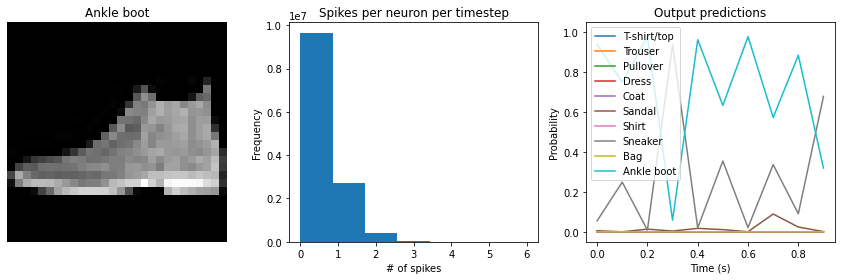

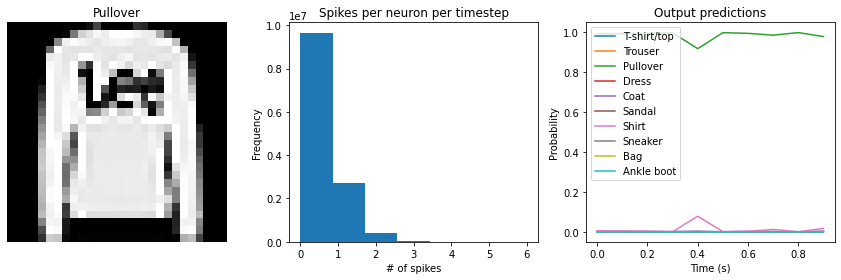

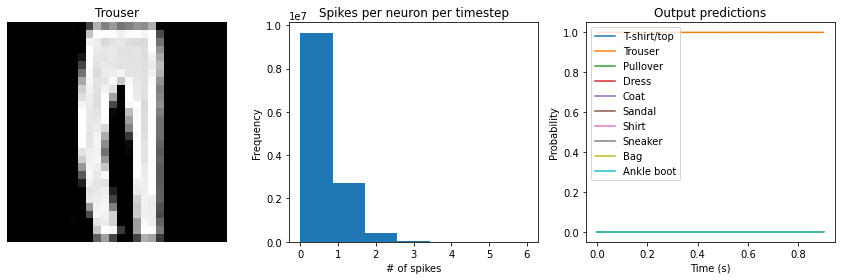

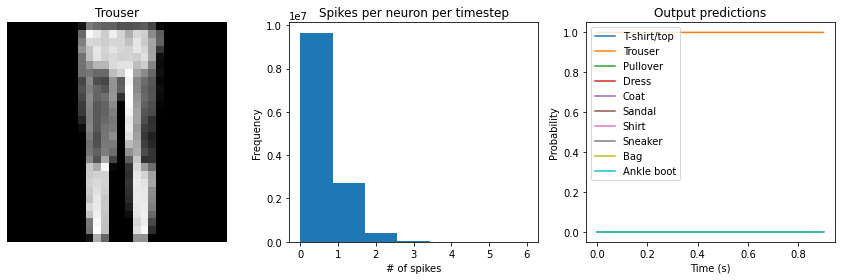

In [12]:
check_output(model)

We can see that with ``spiking_aware_training`` we're getting better performance than we were with the equivalent `dt` value above. The model has learned weights that are less sensitive to the discrete, sparse output produced by the spiking neurons.

## Spike rate regularization

As we saw in the [Simulation time section](#Simulation-time), the spiking rate of the neurons is very important. If a neuron is spiking too slowly then we don't have enough information to determine its output value. Conversely, if a neuron is spiking too quickly then we may lose the spiking advantages we are looking for, such as temporal sparsity.

Thus it can be helpful to more directly control the firing rates in the model by applying regularization penalties during training. Any of the standard Keras regularization functions can be used. Keras Spiking also includes some additional regularizers that can be useful for this case as they allow us to specify a non-zero reference point (so we can drive the activities towards some value greater than zero).

In [13]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation(
            "relu",
            dt=0.1,
            spiking_aware_training=True,
            # add activity regularizer to encourage spike rates around 10Hz
            activity_regularizer=keras_spiking.L2(l2=1e-3, target=10),
        ),
        tf.keras.layers.Dense(10),
    ]
)

train(model)

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 16.2242 - accuracy: 0.0938

  13/1875 [..............................] - ETA: 7s - loss: 16.1249 - accuracy: 0.1683

  24/1875 [..............................] - ETA: 8s - loss: 16.0055 - accuracy: 0.2096

  35/1875 [..............................] - ETA: 8s - loss: 15.6670 - accuracy: 0.2393

  47/1875 [..............................] - ETA: 8s - loss: 15.0899 - accuracy: 0.2613

  59/1875 [..............................] - ETA: 8s - loss: 14.4605 - accuracy: 0.2855

  67/1875 [>.............................] - ETA: 8s - loss: 14.0638 - accuracy: 0.3004

  79/1875 [>.............................] - ETA: 8s - loss: 13.5900 - accuracy: 0.3161

  91/1875 [>.............................] - ETA: 8s - loss: 13.1171 - accuracy: 0.3352

 101/1875 [>.............................] - ETA: 8s - loss: 12.8050 - accuracy: 0.3456

 113/1875 [>.............................] - ETA: 8s - loss: 12.3819 - accuracy: 0.3601

 125/1875 [=>............................] - ETA: 8s - loss: 12.0064 - accuracy: 0.3755

 135/1875 [=>............................] - ETA: 8s - loss: 11.7464 - accuracy: 0.3896

 147/1875 [=>............................] - ETA: 8s - loss: 11.4872 - accuracy: 0.3967

 159/1875 [=>............................] - ETA: 7s - loss: 11.2618 - accuracy: 0.4064

 171/1875 [=>............................] - ETA: 7s - loss: 11.0382 - accuracy: 0.4134

 183/1875 [=>............................] - ETA: 7s - loss: 10.8030 - accuracy: 0.4240

 195/1875 [==>...........................] - ETA: 7s - loss: 10.6363 - accuracy: 0.4327

 207/1875 [==>...........................] - ETA: 7s - loss: 10.4588 - accuracy: 0.4419

 218/1875 [==>...........................] - ETA: 7s - loss: 10.3039 - accuracy: 0.4495

 230/1875 [==>...........................] - ETA: 7s - loss: 10.1640 - accuracy: 0.4542

 242/1875 [==>...........................] - ETA: 7s - loss: 10.0458 - accuracy: 0.4595

 254/1875 [===>..........................] - ETA: 7s - loss: 9.9198 - accuracy: 0.4647 

 266/1875 [===>..........................] - ETA: 7s - loss: 9.8235 - accuracy: 0.4671

 278/1875 [===>..........................] - ETA: 7s - loss: 9.7368 - accuracy: 0.4714

 290/1875 [===>..........................] - ETA: 7s - loss: 9.6351 - accuracy: 0.4755

 302/1875 [===>..........................] - ETA: 7s - loss: 9.5352 - accuracy: 0.4793

 314/1875 [====>.........................] - ETA: 7s - loss: 9.4386 - accuracy: 0.4831

 326/1875 [====>.........................] - ETA: 6s - loss: 9.3707 - accuracy: 0.4860

 338/1875 [====>.........................] - ETA: 6s - loss: 9.3015 - accuracy: 0.4892

 349/1875 [====>.........................] - ETA: 6s - loss: 9.2292 - accuracy: 0.4936

 361/1875 [====>.........................] - ETA: 6s - loss: 9.1553 - accuracy: 0.4971

 373/1875 [====>.........................] - ETA: 6s - loss: 9.0870 - accuracy: 0.5008

 386/1875 [=====>........................] - ETA: 6s - loss: 9.0247 - accuracy: 0.5038

 398/1875 [=====>........................] - ETA: 6s - loss: 8.9579 - accuracy: 0.5077

 409/1875 [=====>........................] - ETA: 6s - loss: 8.8975 - accuracy: 0.5108

 421/1875 [=====>........................] - ETA: 6s - loss: 8.8442 - accuracy: 0.5131

 433/1875 [=====>........................] - ETA: 6s - loss: 8.7970 - accuracy: 0.5156

 445/1875 [======>.......................] - ETA: 6s - loss: 8.7471 - accuracy: 0.5184

 457/1875 [======>.......................] - ETA: 6s - loss: 8.6863 - accuracy: 0.5215

 468/1875 [======>.......................] - ETA: 6s - loss: 8.6333 - accuracy: 0.5239

 478/1875 [======>.......................] - ETA: 6s - loss: 8.5837 - accuracy: 0.5258

 490/1875 [======>.......................] - ETA: 6s - loss: 8.5315 - accuracy: 0.5290

 502/1875 [=======>......................] - ETA: 6s - loss: 8.4897 - accuracy: 0.5310

 514/1875 [=======>......................] - ETA: 6s - loss: 8.4443 - accuracy: 0.5335

 526/1875 [=======>......................] - ETA: 6s - loss: 8.3915 - accuracy: 0.5359

 538/1875 [=======>......................] - ETA: 5s - loss: 8.3537 - accuracy: 0.5378

 550/1875 [=======>......................] - ETA: 5s - loss: 8.3083 - accuracy: 0.5397

 562/1875 [=======>......................] - ETA: 5s - loss: 8.2654 - accuracy: 0.5412

 574/1875 [========>.....................] - ETA: 5s - loss: 8.2251 - accuracy: 0.5433

 586/1875 [========>.....................] - ETA: 5s - loss: 8.1914 - accuracy: 0.5446

 598/1875 [========>.....................] - ETA: 5s - loss: 8.1574 - accuracy: 0.5466

 610/1875 [========>.....................] - ETA: 5s - loss: 8.1220 - accuracy: 0.5477

 622/1875 [========>.....................] - ETA: 5s - loss: 8.0803 - accuracy: 0.5490

 633/1875 [=========>....................] - ETA: 5s - loss: 8.0496 - accuracy: 0.5502

 645/1875 [=========>....................] - ETA: 5s - loss: 8.0143 - accuracy: 0.5519

 657/1875 [=========>....................] - ETA: 5s - loss: 7.9769 - accuracy: 0.5530

 669/1875 [=========>....................] - ETA: 5s - loss: 7.9429 - accuracy: 0.5540

 680/1875 [=========>....................] - ETA: 5s - loss: 7.9176 - accuracy: 0.5550

 691/1875 [==========>...................] - ETA: 5s - loss: 7.8823 - accuracy: 0.5571

 702/1875 [==========>...................] - ETA: 5s - loss: 7.8535 - accuracy: 0.5585

 713/1875 [==========>...................] - ETA: 5s - loss: 7.8250 - accuracy: 0.5595

 724/1875 [==========>...................] - ETA: 5s - loss: 7.8002 - accuracy: 0.5608

 736/1875 [==========>...................] - ETA: 5s - loss: 7.7822 - accuracy: 0.5616

 748/1875 [==========>...................] - ETA: 5s - loss: 7.7481 - accuracy: 0.5633

 760/1875 [===========>..................] - ETA: 4s - loss: 7.7223 - accuracy: 0.5643

 772/1875 [===========>..................] - ETA: 4s - loss: 7.6991 - accuracy: 0.5652

 784/1875 [===========>..................] - ETA: 4s - loss: 7.6734 - accuracy: 0.5663

 796/1875 [===========>..................] - ETA: 4s - loss: 7.6482 - accuracy: 0.5677

 808/1875 [===========>..................] - ETA: 4s - loss: 7.6200 - accuracy: 0.5692

 820/1875 [============>.................] - ETA: 4s - loss: 7.5928 - accuracy: 0.5704

 832/1875 [============>.................] - ETA: 4s - loss: 7.5663 - accuracy: 0.5721

 844/1875 [============>.................] - ETA: 4s - loss: 7.5388 - accuracy: 0.5733

 856/1875 [============>.................] - ETA: 4s - loss: 7.5149 - accuracy: 0.5745

 868/1875 [============>.................] - ETA: 4s - loss: 7.4872 - accuracy: 0.5755

 880/1875 [=============>................] - ETA: 4s - loss: 7.4602 - accuracy: 0.5764

 892/1875 [=============>................] - ETA: 4s - loss: 7.4346 - accuracy: 0.5774

 904/1875 [=============>................] - ETA: 4s - loss: 7.4118 - accuracy: 0.5777

 916/1875 [=============>................] - ETA: 4s - loss: 7.3926 - accuracy: 0.5786

 927/1875 [=============>................] - ETA: 4s - loss: 7.3720 - accuracy: 0.5799

 939/1875 [==============>...............] - ETA: 4s - loss: 7.3481 - accuracy: 0.5806

 951/1875 [==============>...............] - ETA: 4s - loss: 7.3240 - accuracy: 0.5820

 963/1875 [==============>...............] - ETA: 4s - loss: 7.3011 - accuracy: 0.5832

 975/1875 [==============>...............] - ETA: 3s - loss: 7.2773 - accuracy: 0.5839

 986/1875 [==============>...............] - ETA: 3s - loss: 7.2558 - accuracy: 0.5847

 998/1875 [==============>...............] - ETA: 3s - loss: 7.2375 - accuracy: 0.5854

1010/1875 [===============>..............] - ETA: 3s - loss: 7.2151 - accuracy: 0.5864

1022/1875 [===============>..............] - ETA: 3s - loss: 7.1930 - accuracy: 0.5876

1034/1875 [===============>..............] - ETA: 3s - loss: 7.1736 - accuracy: 0.5884

1046/1875 [===============>..............] - ETA: 3s - loss: 7.1510 - accuracy: 0.5899

1058/1875 [===============>..............] - ETA: 3s - loss: 7.1305 - accuracy: 0.5907

1070/1875 [================>.............] - ETA: 3s - loss: 7.1136 - accuracy: 0.5915

1083/1875 [================>.............] - ETA: 3s - loss: 7.0984 - accuracy: 0.5919

1095/1875 [================>.............] - ETA: 3s - loss: 7.0815 - accuracy: 0.5928

1107/1875 [================>.............] - ETA: 3s - loss: 7.0643 - accuracy: 0.5933

1119/1875 [================>.............] - ETA: 3s - loss: 7.0478 - accuracy: 0.5940

1131/1875 [=================>............] - ETA: 3s - loss: 7.0301 - accuracy: 0.5950

1143/1875 [=================>............] - ETA: 3s - loss: 7.0124 - accuracy: 0.5958

1154/1875 [=================>............] - ETA: 3s - loss: 6.9986 - accuracy: 0.5960

1166/1875 [=================>............] - ETA: 3s - loss: 6.9823 - accuracy: 0.5969

1178/1875 [=================>............] - ETA: 3s - loss: 6.9692 - accuracy: 0.5972

1190/1875 [==================>...........] - ETA: 3s - loss: 6.9537 - accuracy: 0.5976

1202/1875 [==================>...........] - ETA: 2s - loss: 6.9381 - accuracy: 0.5983

1214/1875 [==================>...........] - ETA: 2s - loss: 6.9226 - accuracy: 0.5991

1226/1875 [==================>...........] - ETA: 2s - loss: 6.9039 - accuracy: 0.6002

1238/1875 [==================>...........] - ETA: 2s - loss: 6.8884 - accuracy: 0.6007

1250/1875 [===================>..........] - ETA: 2s - loss: 6.8775 - accuracy: 0.6011

1262/1875 [===================>..........] - ETA: 2s - loss: 6.8633 - accuracy: 0.6014

1270/1875 [===================>..........] - ETA: 2s - loss: 6.8535 - accuracy: 0.6020

1281/1875 [===================>..........] - ETA: 2s - loss: 6.8388 - accuracy: 0.6030

1293/1875 [===================>..........] - ETA: 2s - loss: 6.8243 - accuracy: 0.6032

1305/1875 [===================>..........] - ETA: 2s - loss: 6.8117 - accuracy: 0.6037

1317/1875 [====================>.........] - ETA: 2s - loss: 6.7943 - accuracy: 0.6045

1329/1875 [====================>.........] - ETA: 2s - loss: 6.7812 - accuracy: 0.6051

1340/1875 [====================>.........] - ETA: 2s - loss: 6.7686 - accuracy: 0.6055

1352/1875 [====================>.........] - ETA: 2s - loss: 6.7528 - accuracy: 0.6064

1364/1875 [====================>.........] - ETA: 2s - loss: 6.7370 - accuracy: 0.6071

1376/1875 [=====================>........] - ETA: 2s - loss: 6.7230 - accuracy: 0.6077

1387/1875 [=====================>........] - ETA: 2s - loss: 6.7108 - accuracy: 0.6081

1398/1875 [=====================>........] - ETA: 2s - loss: 6.6984 - accuracy: 0.6084

1409/1875 [=====================>........] - ETA: 2s - loss: 6.6854 - accuracy: 0.6089

1421/1875 [=====================>........] - ETA: 2s - loss: 6.6737 - accuracy: 0.6092

1433/1875 [=====================>........] - ETA: 1s - loss: 6.6628 - accuracy: 0.6094

1445/1875 [======================>.......] - ETA: 1s - loss: 6.6467 - accuracy: 0.6105

1456/1875 [======================>.......] - ETA: 1s - loss: 6.6349 - accuracy: 0.6107

1468/1875 [======================>.......] - ETA: 1s - loss: 6.6251 - accuracy: 0.6112

1480/1875 [======================>.......] - ETA: 1s - loss: 6.6130 - accuracy: 0.6116

1492/1875 [======================>.......] - ETA: 1s - loss: 6.6012 - accuracy: 0.6120

1504/1875 [=======================>......] - ETA: 1s - loss: 6.5868 - accuracy: 0.6129

1517/1875 [=======================>......] - ETA: 1s - loss: 6.5715 - accuracy: 0.6140

1529/1875 [=======================>......] - ETA: 1s - loss: 6.5591 - accuracy: 0.6144

1541/1875 [=======================>......] - ETA: 1s - loss: 6.5477 - accuracy: 0.6148

1553/1875 [=======================>......] - ETA: 1s - loss: 6.5342 - accuracy: 0.6155

1565/1875 [========================>.....] - ETA: 1s - loss: 6.5243 - accuracy: 0.6159

1577/1875 [========================>.....] - ETA: 1s - loss: 6.5121 - accuracy: 0.6162

1589/1875 [========================>.....] - ETA: 1s - loss: 6.5015 - accuracy: 0.6167

1601/1875 [========================>.....] - ETA: 1s - loss: 6.4896 - accuracy: 0.6172

1612/1875 [========================>.....] - ETA: 1s - loss: 6.4796 - accuracy: 0.6175

1624/1875 [========================>.....] - ETA: 1s - loss: 6.4689 - accuracy: 0.6177

1636/1875 [=========================>....] - ETA: 1s - loss: 6.4595 - accuracy: 0.6180

1648/1875 [=========================>....] - ETA: 1s - loss: 6.4493 - accuracy: 0.6184

1660/1875 [=========================>....] - ETA: 0s - loss: 6.4374 - accuracy: 0.6190

1671/1875 [=========================>....] - ETA: 0s - loss: 6.4270 - accuracy: 0.6194

1683/1875 [=========================>....] - ETA: 0s - loss: 6.4164 - accuracy: 0.6199

1695/1875 [==========================>...] - ETA: 0s - loss: 6.4056 - accuracy: 0.6201

1707/1875 [==========================>...] - ETA: 0s - loss: 6.3953 - accuracy: 0.6205

1719/1875 [==========================>...] - ETA: 0s - loss: 6.3841 - accuracy: 0.6208

1730/1875 [==========================>...] - ETA: 0s - loss: 6.3778 - accuracy: 0.6211

1742/1875 [==========================>...] - ETA: 0s - loss: 6.3667 - accuracy: 0.6214

1754/1875 [===========================>..] - ETA: 0s - loss: 6.3569 - accuracy: 0.6218

1766/1875 [===========================>..] - ETA: 0s - loss: 6.3474 - accuracy: 0.6222

1779/1875 [===========================>..] - ETA: 0s - loss: 6.3360 - accuracy: 0.6226

1792/1875 [===========================>..] - ETA: 0s - loss: 6.3264 - accuracy: 0.6228

1804/1875 [===========================>..] - ETA: 0s - loss: 6.3159 - accuracy: 0.6235

1816/1875 [============================>.] - ETA: 0s - loss: 6.3068 - accuracy: 0.6238

1828/1875 [============================>.] - ETA: 0s - loss: 6.2957 - accuracy: 0.6242

1840/1875 [============================>.] - ETA: 0s - loss: 6.2845 - accuracy: 0.6248

1852/1875 [============================>.] - ETA: 0s - loss: 6.2741 - accuracy: 0.6254

1864/1875 [============================>.] - ETA: 0s - loss: 6.2638 - accuracy: 0.6258

1875/1875 [==============================] - 8s 4ms/step - loss: 6.2554 - accuracy: 0.6261


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 4.6255 - accuracy: 0.7500

  13/1875 [..............................] - ETA: 7s - loss: 4.7242 - accuracy: 0.6562

  25/1875 [..............................] - ETA: 7s - loss: 4.8787 - accuracy: 0.6587

  37/1875 [..............................] - ETA: 7s - loss: 4.8846 - accuracy: 0.6622

  49/1875 [..............................] - ETA: 7s - loss: 4.8780 - accuracy: 0.6626

  61/1875 [..............................] - ETA: 7s - loss: 4.8801 - accuracy: 0.6650

  73/1875 [>.............................] - ETA: 7s - loss: 4.8493 - accuracy: 0.6704

  84/1875 [>.............................] - ETA: 7s - loss: 4.8776 - accuracy: 0.6734

  96/1875 [>.............................] - ETA: 7s - loss: 4.8512 - accuracy: 0.6781

 108/1875 [>.............................] - ETA: 7s - loss: 4.8477 - accuracy: 0.6788

 120/1875 [>.............................] - ETA: 7s - loss: 4.8318 - accuracy: 0.6799

 132/1875 [=>............................] - ETA: 7s - loss: 4.8248 - accuracy: 0.6757

 144/1875 [=>............................] - ETA: 7s - loss: 4.8190 - accuracy: 0.6775

 156/1875 [=>............................] - ETA: 7s - loss: 4.8037 - accuracy: 0.6763

 168/1875 [=>............................] - ETA: 7s - loss: 4.8017 - accuracy: 0.6763

 179/1875 [=>............................] - ETA: 7s - loss: 4.7869 - accuracy: 0.6769

 190/1875 [==>...........................] - ETA: 7s - loss: 4.7697 - accuracy: 0.6765

 202/1875 [==>...........................] - ETA: 7s - loss: 4.7532 - accuracy: 0.6776

 213/1875 [==>...........................] - ETA: 7s - loss: 4.7513 - accuracy: 0.6777

 226/1875 [==>...........................] - ETA: 7s - loss: 4.7408 - accuracy: 0.6773

 238/1875 [==>...........................] - ETA: 7s - loss: 4.7467 - accuracy: 0.6775

 250/1875 [===>..........................] - ETA: 7s - loss: 4.7397 - accuracy: 0.6779

 262/1875 [===>..........................] - ETA: 7s - loss: 4.7357 - accuracy: 0.6780

 274/1875 [===>..........................] - ETA: 6s - loss: 4.7350 - accuracy: 0.6779

 286/1875 [===>..........................] - ETA: 6s - loss: 4.7300 - accuracy: 0.6779

 297/1875 [===>..........................] - ETA: 6s - loss: 4.7234 - accuracy: 0.6774

 309/1875 [===>..........................] - ETA: 6s - loss: 4.7319 - accuracy: 0.6755

 321/1875 [====>.........................] - ETA: 6s - loss: 4.7269 - accuracy: 0.6780

 333/1875 [====>.........................] - ETA: 6s - loss: 4.7214 - accuracy: 0.6781

 345/1875 [====>.........................] - ETA: 6s - loss: 4.7198 - accuracy: 0.6791

 357/1875 [====>.........................] - ETA: 6s - loss: 4.7225 - accuracy: 0.6786

 369/1875 [====>.........................] - ETA: 6s - loss: 4.7162 - accuracy: 0.6784

 381/1875 [=====>........................] - ETA: 6s - loss: 4.7048 - accuracy: 0.6792

 393/1875 [=====>........................] - ETA: 6s - loss: 4.7018 - accuracy: 0.6788

 406/1875 [=====>........................] - ETA: 6s - loss: 4.6999 - accuracy: 0.6789

 418/1875 [=====>........................] - ETA: 6s - loss: 4.7012 - accuracy: 0.6790

 430/1875 [=====>........................] - ETA: 6s - loss: 4.6980 - accuracy: 0.6788

 441/1875 [======>.......................] - ETA: 6s - loss: 4.6941 - accuracy: 0.6796

 453/1875 [======>.......................] - ETA: 6s - loss: 4.6909 - accuracy: 0.6809

 465/1875 [======>.......................] - ETA: 6s - loss: 4.6918 - accuracy: 0.6810

 477/1875 [======>.......................] - ETA: 6s - loss: 4.6835 - accuracy: 0.6819

 489/1875 [======>.......................] - ETA: 6s - loss: 4.6823 - accuracy: 0.6811

 502/1875 [=======>......................] - ETA: 5s - loss: 4.6812 - accuracy: 0.6816

 514/1875 [=======>......................] - ETA: 5s - loss: 4.6777 - accuracy: 0.6822

 526/1875 [=======>......................] - ETA: 5s - loss: 4.6769 - accuracy: 0.6825

 538/1875 [=======>......................] - ETA: 5s - loss: 4.6718 - accuracy: 0.6838

 550/1875 [=======>......................] - ETA: 5s - loss: 4.6677 - accuracy: 0.6841

 563/1875 [========>.....................] - ETA: 5s - loss: 4.6646 - accuracy: 0.6844

 574/1875 [========>.....................] - ETA: 5s - loss: 4.6594 - accuracy: 0.6842

 586/1875 [========>.....................] - ETA: 5s - loss: 4.6541 - accuracy: 0.6846

 598/1875 [========>.....................] - ETA: 5s - loss: 4.6524 - accuracy: 0.6851

 610/1875 [========>.....................] - ETA: 5s - loss: 4.6506 - accuracy: 0.6849

 622/1875 [========>.....................] - ETA: 5s - loss: 4.6523 - accuracy: 0.6851

 633/1875 [=========>....................] - ETA: 5s - loss: 4.6497 - accuracy: 0.6858

 645/1875 [=========>....................] - ETA: 5s - loss: 4.6471 - accuracy: 0.6861

 657/1875 [=========>....................] - ETA: 5s - loss: 4.6463 - accuracy: 0.6856

 669/1875 [=========>....................] - ETA: 5s - loss: 4.6405 - accuracy: 0.6862

 681/1875 [=========>....................] - ETA: 5s - loss: 4.6413 - accuracy: 0.6864

 693/1875 [==========>...................] - ETA: 5s - loss: 4.6410 - accuracy: 0.6870

 706/1875 [==========>...................] - ETA: 5s - loss: 4.6406 - accuracy: 0.6866

 718/1875 [==========>...................] - ETA: 5s - loss: 4.6354 - accuracy: 0.6873

 730/1875 [==========>...................] - ETA: 5s - loss: 4.6343 - accuracy: 0.6877

 742/1875 [==========>...................] - ETA: 4s - loss: 4.6318 - accuracy: 0.6877

 753/1875 [===========>..................] - ETA: 4s - loss: 4.6280 - accuracy: 0.6877

 763/1875 [===========>..................] - ETA: 4s - loss: 4.6273 - accuracy: 0.6876

 774/1875 [===========>..................] - ETA: 4s - loss: 4.6223 - accuracy: 0.6880

 786/1875 [===========>..................] - ETA: 4s - loss: 4.6186 - accuracy: 0.6883

 798/1875 [===========>..................] - ETA: 4s - loss: 4.6195 - accuracy: 0.6884

 810/1875 [===========>..................] - ETA: 4s - loss: 4.6160 - accuracy: 0.6884

 822/1875 [============>.................] - ETA: 4s - loss: 4.6139 - accuracy: 0.6882

 835/1875 [============>.................] - ETA: 4s - loss: 4.6165 - accuracy: 0.6881

 847/1875 [============>.................] - ETA: 4s - loss: 4.6188 - accuracy: 0.6877

 859/1875 [============>.................] - ETA: 4s - loss: 4.6170 - accuracy: 0.6879

 871/1875 [============>.................] - ETA: 4s - loss: 4.6127 - accuracy: 0.6884

 883/1875 [=============>................] - ETA: 4s - loss: 4.6089 - accuracy: 0.6885

 895/1875 [=============>................] - ETA: 4s - loss: 4.6065 - accuracy: 0.6883

 907/1875 [=============>................] - ETA: 4s - loss: 4.6044 - accuracy: 0.6884

 918/1875 [=============>................] - ETA: 4s - loss: 4.6023 - accuracy: 0.6886

 930/1875 [=============>................] - ETA: 4s - loss: 4.6008 - accuracy: 0.6889

 942/1875 [==============>...............] - ETA: 4s - loss: 4.5986 - accuracy: 0.6887

 954/1875 [==============>...............] - ETA: 4s - loss: 4.5944 - accuracy: 0.6893

 966/1875 [==============>...............] - ETA: 3s - loss: 4.5923 - accuracy: 0.6895

 978/1875 [==============>...............] - ETA: 3s - loss: 4.5927 - accuracy: 0.6896

 990/1875 [==============>...............] - ETA: 3s - loss: 4.5932 - accuracy: 0.6896

1002/1875 [===============>..............] - ETA: 3s - loss: 4.5902 - accuracy: 0.6901

1014/1875 [===============>..............] - ETA: 3s - loss: 4.5887 - accuracy: 0.6900

1026/1875 [===============>..............] - ETA: 3s - loss: 4.5871 - accuracy: 0.6900

1037/1875 [===============>..............] - ETA: 3s - loss: 4.5868 - accuracy: 0.6896

1049/1875 [===============>..............] - ETA: 3s - loss: 4.5858 - accuracy: 0.6896

1061/1875 [===============>..............] - ETA: 3s - loss: 4.5828 - accuracy: 0.6898

1073/1875 [================>.............] - ETA: 3s - loss: 4.5816 - accuracy: 0.6900

1085/1875 [================>.............] - ETA: 3s - loss: 4.5791 - accuracy: 0.6903

1097/1875 [================>.............] - ETA: 3s - loss: 4.5804 - accuracy: 0.6905

1109/1875 [================>.............] - ETA: 3s - loss: 4.5780 - accuracy: 0.6907

1120/1875 [================>.............] - ETA: 3s - loss: 4.5772 - accuracy: 0.6909

1132/1875 [=================>............] - ETA: 3s - loss: 4.5766 - accuracy: 0.6910

1144/1875 [=================>............] - ETA: 3s - loss: 4.5733 - accuracy: 0.6915

1157/1875 [=================>............] - ETA: 3s - loss: 4.5744 - accuracy: 0.6912

1168/1875 [=================>............] - ETA: 3s - loss: 4.5748 - accuracy: 0.6908

1180/1875 [=================>............] - ETA: 3s - loss: 4.5731 - accuracy: 0.6907

1192/1875 [==================>...........] - ETA: 2s - loss: 4.5722 - accuracy: 0.6907

1205/1875 [==================>...........] - ETA: 2s - loss: 4.5715 - accuracy: 0.6904

1217/1875 [==================>...........] - ETA: 2s - loss: 4.5696 - accuracy: 0.6907

1229/1875 [==================>...........] - ETA: 2s - loss: 4.5662 - accuracy: 0.6911

1241/1875 [==================>...........] - ETA: 2s - loss: 4.5646 - accuracy: 0.6911

1253/1875 [===================>..........] - ETA: 2s - loss: 4.5651 - accuracy: 0.6909

1264/1875 [===================>..........] - ETA: 2s - loss: 4.5622 - accuracy: 0.6910

1277/1875 [===================>..........] - ETA: 2s - loss: 4.5615 - accuracy: 0.6907

1289/1875 [===================>..........] - ETA: 2s - loss: 4.5597 - accuracy: 0.6908

1301/1875 [===================>..........] - ETA: 2s - loss: 4.5575 - accuracy: 0.6910

1313/1875 [====================>.........] - ETA: 2s - loss: 4.5543 - accuracy: 0.6912

1325/1875 [====================>.........] - ETA: 2s - loss: 4.5529 - accuracy: 0.6911

1337/1875 [====================>.........] - ETA: 2s - loss: 4.5536 - accuracy: 0.6908

1348/1875 [====================>.........] - ETA: 2s - loss: 4.5538 - accuracy: 0.6907

1360/1875 [====================>.........] - ETA: 2s - loss: 4.5536 - accuracy: 0.6907

1372/1875 [====================>.........] - ETA: 2s - loss: 4.5512 - accuracy: 0.6906

1384/1875 [=====================>........] - ETA: 2s - loss: 4.5504 - accuracy: 0.6909

1396/1875 [=====================>........] - ETA: 2s - loss: 4.5505 - accuracy: 0.6910

1408/1875 [=====================>........] - ETA: 2s - loss: 4.5487 - accuracy: 0.6911

1421/1875 [=====================>........] - ETA: 1s - loss: 4.5450 - accuracy: 0.6915

1433/1875 [=====================>........] - ETA: 1s - loss: 4.5440 - accuracy: 0.6914

1445/1875 [======================>.......] - ETA: 1s - loss: 4.5417 - accuracy: 0.6918

1457/1875 [======================>.......] - ETA: 1s - loss: 4.5406 - accuracy: 0.6918

1467/1875 [======================>.......] - ETA: 1s - loss: 4.5402 - accuracy: 0.6917

1479/1875 [======================>.......] - ETA: 1s - loss: 4.5395 - accuracy: 0.6918

1491/1875 [======================>.......] - ETA: 1s - loss: 4.5360 - accuracy: 0.6921

1502/1875 [=======================>......] - ETA: 1s - loss: 4.5357 - accuracy: 0.6921

1514/1875 [=======================>......] - ETA: 1s - loss: 4.5326 - accuracy: 0.6926

1526/1875 [=======================>......] - ETA: 1s - loss: 4.5325 - accuracy: 0.6927

1538/1875 [=======================>......] - ETA: 1s - loss: 4.5292 - accuracy: 0.6928

1550/1875 [=======================>......] - ETA: 1s - loss: 4.5289 - accuracy: 0.6929

1562/1875 [=======================>......] - ETA: 1s - loss: 4.5282 - accuracy: 0.6930

1574/1875 [========================>.....] - ETA: 1s - loss: 4.5274 - accuracy: 0.6931

1586/1875 [========================>.....] - ETA: 1s - loss: 4.5259 - accuracy: 0.6933

1598/1875 [========================>.....] - ETA: 1s - loss: 4.5251 - accuracy: 0.6932

1610/1875 [========================>.....] - ETA: 1s - loss: 4.5240 - accuracy: 0.6934

1622/1875 [========================>.....] - ETA: 1s - loss: 4.5241 - accuracy: 0.6935

1634/1875 [=========================>....] - ETA: 1s - loss: 4.5214 - accuracy: 0.6937

1646/1875 [=========================>....] - ETA: 1s - loss: 4.5184 - accuracy: 0.6940

1658/1875 [=========================>....] - ETA: 0s - loss: 4.5156 - accuracy: 0.6944

1669/1875 [=========================>....] - ETA: 0s - loss: 4.5155 - accuracy: 0.6943

1681/1875 [=========================>....] - ETA: 0s - loss: 4.5149 - accuracy: 0.6942

1693/1875 [==========================>...] - ETA: 0s - loss: 4.5136 - accuracy: 0.6941

1705/1875 [==========================>...] - ETA: 0s - loss: 4.5114 - accuracy: 0.6944

1718/1875 [==========================>...] - ETA: 0s - loss: 4.5092 - accuracy: 0.6945

1730/1875 [==========================>...] - ETA: 0s - loss: 4.5086 - accuracy: 0.6945

1742/1875 [==========================>...] - ETA: 0s - loss: 4.5073 - accuracy: 0.6946

1753/1875 [===========================>..] - ETA: 0s - loss: 4.5071 - accuracy: 0.6947

1765/1875 [===========================>..] - ETA: 0s - loss: 4.5053 - accuracy: 0.6950

1777/1875 [===========================>..] - ETA: 0s - loss: 4.5046 - accuracy: 0.6950

1789/1875 [===========================>..] - ETA: 0s - loss: 4.5043 - accuracy: 0.6949

1801/1875 [===========================>..] - ETA: 0s - loss: 4.5039 - accuracy: 0.6947

1812/1875 [===========================>..] - ETA: 0s - loss: 4.5033 - accuracy: 0.6946

1824/1875 [============================>.] - ETA: 0s - loss: 4.5015 - accuracy: 0.6948

1836/1875 [============================>.] - ETA: 0s - loss: 4.4998 - accuracy: 0.6947

1848/1875 [============================>.] - ETA: 0s - loss: 4.4979 - accuracy: 0.6948

1860/1875 [============================>.] - ETA: 0s - loss: 4.4974 - accuracy: 0.6948

1872/1875 [============================>.] - ETA: 0s - loss: 4.4974 - accuracy: 0.6949

1875/1875 [==============================] - 8s 4ms/step - loss: 4.4967 - accuracy: 0.6950


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 4.7002 - accuracy: 0.7500

  13/1875 [..............................] - ETA: 7s - loss: 4.2485 - accuracy: 0.7452

  25/1875 [..............................] - ETA: 7s - loss: 4.2815 - accuracy: 0.7262

  37/1875 [..............................] - ETA: 7s - loss: 4.2909 - accuracy: 0.7137

  49/1875 [..............................] - ETA: 7s - loss: 4.3238 - accuracy: 0.7092

  61/1875 [..............................] - ETA: 7s - loss: 4.3210 - accuracy: 0.7085

  73/1875 [>.............................] - ETA: 7s - loss: 4.3547 - accuracy: 0.7025

  85/1875 [>.............................] - ETA: 7s - loss: 4.3801 - accuracy: 0.7037

  97/1875 [>.............................] - ETA: 7s - loss: 4.3650 - accuracy: 0.7068

 109/1875 [>.............................] - ETA: 7s - loss: 4.3386 - accuracy: 0.7099

 118/1875 [>.............................] - ETA: 7s - loss: 4.3477 - accuracy: 0.7084

 130/1875 [=>............................] - ETA: 7s - loss: 4.3564 - accuracy: 0.7094

 142/1875 [=>............................] - ETA: 7s - loss: 4.3410 - accuracy: 0.7097

 154/1875 [=>............................] - ETA: 7s - loss: 4.3412 - accuracy: 0.7106

 166/1875 [=>............................] - ETA: 7s - loss: 4.3371 - accuracy: 0.7097

 178/1875 [=>............................] - ETA: 7s - loss: 4.3489 - accuracy: 0.7075

 191/1875 [==>...........................] - ETA: 7s - loss: 4.3574 - accuracy: 0.7045

 203/1875 [==>...........................] - ETA: 7s - loss: 4.3479 - accuracy: 0.7052

 214/1875 [==>...........................] - ETA: 7s - loss: 4.3426 - accuracy: 0.7069

 226/1875 [==>...........................] - ETA: 7s - loss: 4.3322 - accuracy: 0.7071

 238/1875 [==>...........................] - ETA: 7s - loss: 4.3250 - accuracy: 0.7080

 250/1875 [===>..........................] - ETA: 7s - loss: 4.3175 - accuracy: 0.7097

 262/1875 [===>..........................] - ETA: 7s - loss: 4.3238 - accuracy: 0.7073

 274/1875 [===>..........................] - ETA: 6s - loss: 4.3261 - accuracy: 0.7062

 286/1875 [===>..........................] - ETA: 6s - loss: 4.3218 - accuracy: 0.7078

 298/1875 [===>..........................] - ETA: 6s - loss: 4.3259 - accuracy: 0.7082

 310/1875 [===>..........................] - ETA: 6s - loss: 4.3242 - accuracy: 0.7077

 322/1875 [====>.........................] - ETA: 6s - loss: 4.3198 - accuracy: 0.7070

 334/1875 [====>.........................] - ETA: 6s - loss: 4.3159 - accuracy: 0.7074

 346/1875 [====>.........................] - ETA: 6s - loss: 4.3232 - accuracy: 0.7050

 358/1875 [====>.........................] - ETA: 6s - loss: 4.3206 - accuracy: 0.7063

 370/1875 [====>.........................] - ETA: 6s - loss: 4.3247 - accuracy: 0.7045

 382/1875 [=====>........................] - ETA: 6s - loss: 4.3231 - accuracy: 0.7043

 394/1875 [=====>........................] - ETA: 6s - loss: 4.3204 - accuracy: 0.7053

 406/1875 [=====>........................] - ETA: 6s - loss: 4.3182 - accuracy: 0.7045

 419/1875 [=====>........................] - ETA: 6s - loss: 4.3110 - accuracy: 0.7055

 430/1875 [=====>........................] - ETA: 6s - loss: 4.3108 - accuracy: 0.7059

 442/1875 [======>.......................] - ETA: 6s - loss: 4.3084 - accuracy: 0.7060

 454/1875 [======>.......................] - ETA: 6s - loss: 4.3033 - accuracy: 0.7073

 466/1875 [======>.......................] - ETA: 6s - loss: 4.2986 - accuracy: 0.7077

 478/1875 [======>.......................] - ETA: 6s - loss: 4.2994 - accuracy: 0.7081

 490/1875 [======>.......................] - ETA: 6s - loss: 4.2975 - accuracy: 0.7088

 502/1875 [=======>......................] - ETA: 6s - loss: 4.2968 - accuracy: 0.7084

 512/1875 [=======>......................] - ETA: 5s - loss: 4.2970 - accuracy: 0.7081

 524/1875 [=======>......................] - ETA: 5s - loss: 4.2979 - accuracy: 0.7081

 536/1875 [=======>......................] - ETA: 5s - loss: 4.2998 - accuracy: 0.7081

 549/1875 [=======>......................] - ETA: 5s - loss: 4.3001 - accuracy: 0.7078

 561/1875 [=======>......................] - ETA: 5s - loss: 4.3043 - accuracy: 0.7072

 573/1875 [========>.....................] - ETA: 5s - loss: 4.3064 - accuracy: 0.7063

 585/1875 [========>.....................] - ETA: 5s - loss: 4.3068 - accuracy: 0.7057

 597/1875 [========>.....................] - ETA: 5s - loss: 4.3019 - accuracy: 0.7060

 609/1875 [========>.....................] - ETA: 5s - loss: 4.2999 - accuracy: 0.7069

 621/1875 [========>.....................] - ETA: 5s - loss: 4.2988 - accuracy: 0.7073

 633/1875 [=========>....................] - ETA: 5s - loss: 4.2983 - accuracy: 0.7067

 645/1875 [=========>....................] - ETA: 5s - loss: 4.2990 - accuracy: 0.7064

 657/1875 [=========>....................] - ETA: 5s - loss: 4.2985 - accuracy: 0.7073

 669/1875 [=========>....................] - ETA: 5s - loss: 4.2972 - accuracy: 0.7080

 681/1875 [=========>....................] - ETA: 5s - loss: 4.3016 - accuracy: 0.7082

 693/1875 [==========>...................] - ETA: 5s - loss: 4.3033 - accuracy: 0.7081

 705/1875 [==========>...................] - ETA: 5s - loss: 4.3001 - accuracy: 0.7083

 717/1875 [==========>...................] - ETA: 5s - loss: 4.3010 - accuracy: 0.7088

 729/1875 [==========>...................] - ETA: 5s - loss: 4.3000 - accuracy: 0.7085

 741/1875 [==========>...................] - ETA: 4s - loss: 4.3017 - accuracy: 0.7086

 753/1875 [===========>..................] - ETA: 4s - loss: 4.3011 - accuracy: 0.7091

 765/1875 [===========>..................] - ETA: 4s - loss: 4.3022 - accuracy: 0.7085

 776/1875 [===========>..................] - ETA: 4s - loss: 4.3039 - accuracy: 0.7082

 788/1875 [===========>..................] - ETA: 4s - loss: 4.3032 - accuracy: 0.7084

 800/1875 [===========>..................] - ETA: 4s - loss: 4.3043 - accuracy: 0.7080

 812/1875 [===========>..................] - ETA: 4s - loss: 4.3042 - accuracy: 0.7082

 824/1875 [============>.................] - ETA: 4s - loss: 4.3020 - accuracy: 0.7084

 836/1875 [============>.................] - ETA: 4s - loss: 4.3017 - accuracy: 0.7079

 848/1875 [============>.................] - ETA: 4s - loss: 4.2996 - accuracy: 0.7083

 859/1875 [============>.................] - ETA: 4s - loss: 4.2989 - accuracy: 0.7088

 871/1875 [============>.................] - ETA: 4s - loss: 4.2948 - accuracy: 0.7093

 883/1875 [=============>................] - ETA: 4s - loss: 4.2941 - accuracy: 0.7092

 895/1875 [=============>................] - ETA: 4s - loss: 4.2885 - accuracy: 0.7096

 907/1875 [=============>................] - ETA: 4s - loss: 4.2867 - accuracy: 0.7099

 916/1875 [=============>................] - ETA: 4s - loss: 4.2864 - accuracy: 0.7094

 925/1875 [=============>................] - ETA: 4s - loss: 4.2847 - accuracy: 0.7098

 936/1875 [=============>................] - ETA: 4s - loss: 4.2826 - accuracy: 0.7098

 948/1875 [==============>...............] - ETA: 4s - loss: 4.2799 - accuracy: 0.7098

 960/1875 [==============>...............] - ETA: 4s - loss: 4.2795 - accuracy: 0.7100

 972/1875 [==============>...............] - ETA: 3s - loss: 4.2778 - accuracy: 0.7101

 981/1875 [==============>...............] - ETA: 3s - loss: 4.2798 - accuracy: 0.7098

 992/1875 [==============>...............] - ETA: 3s - loss: 4.2797 - accuracy: 0.7100

1004/1875 [===============>..............] - ETA: 3s - loss: 4.2770 - accuracy: 0.7101

1016/1875 [===============>..............] - ETA: 3s - loss: 4.2740 - accuracy: 0.7102

1027/1875 [===============>..............] - ETA: 3s - loss: 4.2735 - accuracy: 0.7100

1038/1875 [===============>..............] - ETA: 3s - loss: 4.2746 - accuracy: 0.7100

1049/1875 [===============>..............] - ETA: 3s - loss: 4.2739 - accuracy: 0.7100

1059/1875 [===============>..............] - ETA: 3s - loss: 4.2747 - accuracy: 0.7099

1071/1875 [================>.............] - ETA: 3s - loss: 4.2720 - accuracy: 0.7101

1083/1875 [================>.............] - ETA: 3s - loss: 4.2699 - accuracy: 0.7106

1095/1875 [================>.............] - ETA: 3s - loss: 4.2696 - accuracy: 0.7103

1106/1875 [================>.............] - ETA: 3s - loss: 4.2696 - accuracy: 0.7103

1118/1875 [================>.............] - ETA: 3s - loss: 4.2686 - accuracy: 0.7103

1130/1875 [=================>............] - ETA: 3s - loss: 4.2679 - accuracy: 0.7105

1141/1875 [=================>............] - ETA: 3s - loss: 4.2667 - accuracy: 0.7106

1153/1875 [=================>............] - ETA: 3s - loss: 4.2672 - accuracy: 0.7106

1165/1875 [=================>............] - ETA: 3s - loss: 4.2665 - accuracy: 0.7105

1177/1875 [=================>............] - ETA: 3s - loss: 4.2663 - accuracy: 0.7104

1189/1875 [==================>...........] - ETA: 3s - loss: 4.2671 - accuracy: 0.7102

1201/1875 [==================>...........] - ETA: 2s - loss: 4.2680 - accuracy: 0.7102

1213/1875 [==================>...........] - ETA: 2s - loss: 4.2670 - accuracy: 0.7104

1225/1875 [==================>...........] - ETA: 2s - loss: 4.2678 - accuracy: 0.7102

1237/1875 [==================>...........] - ETA: 2s - loss: 4.2647 - accuracy: 0.7102

1249/1875 [==================>...........] - ETA: 2s - loss: 4.2648 - accuracy: 0.7100

1261/1875 [===================>..........] - ETA: 2s - loss: 4.2649 - accuracy: 0.7101

1273/1875 [===================>..........] - ETA: 2s - loss: 4.2642 - accuracy: 0.7100

1286/1875 [===================>..........] - ETA: 2s - loss: 4.2642 - accuracy: 0.7099

1298/1875 [===================>..........] - ETA: 2s - loss: 4.2622 - accuracy: 0.7102

1310/1875 [===================>..........] - ETA: 2s - loss: 4.2604 - accuracy: 0.7107

1322/1875 [====================>.........] - ETA: 2s - loss: 4.2596 - accuracy: 0.7107

1334/1875 [====================>.........] - ETA: 2s - loss: 4.2575 - accuracy: 0.7109

1346/1875 [====================>.........] - ETA: 2s - loss: 4.2583 - accuracy: 0.7104

1358/1875 [====================>.........] - ETA: 2s - loss: 4.2581 - accuracy: 0.7105

1370/1875 [====================>.........] - ETA: 2s - loss: 4.2560 - accuracy: 0.7106

1382/1875 [=====================>........] - ETA: 2s - loss: 4.2542 - accuracy: 0.7110

1394/1875 [=====================>........] - ETA: 2s - loss: 4.2529 - accuracy: 0.7112

1406/1875 [=====================>........] - ETA: 2s - loss: 4.2528 - accuracy: 0.7110

1418/1875 [=====================>........] - ETA: 2s - loss: 4.2527 - accuracy: 0.7110

1430/1875 [=====================>........] - ETA: 1s - loss: 4.2515 - accuracy: 0.7112

1441/1875 [======================>.......] - ETA: 1s - loss: 4.2506 - accuracy: 0.7112

1452/1875 [======================>.......] - ETA: 1s - loss: 4.2493 - accuracy: 0.7110

1464/1875 [======================>.......] - ETA: 1s - loss: 4.2496 - accuracy: 0.7109

1477/1875 [======================>.......] - ETA: 1s - loss: 4.2478 - accuracy: 0.7112

1489/1875 [======================>.......] - ETA: 1s - loss: 4.2470 - accuracy: 0.7113

1501/1875 [=======================>......] - ETA: 1s - loss: 4.2462 - accuracy: 0.7110

1513/1875 [=======================>......] - ETA: 1s - loss: 4.2449 - accuracy: 0.7112

1525/1875 [=======================>......] - ETA: 1s - loss: 4.2425 - accuracy: 0.7117

1536/1875 [=======================>......] - ETA: 1s - loss: 4.2409 - accuracy: 0.7120

1546/1875 [=======================>......] - ETA: 1s - loss: 4.2399 - accuracy: 0.7124

1558/1875 [=======================>......] - ETA: 1s - loss: 4.2386 - accuracy: 0.7127

1570/1875 [========================>.....] - ETA: 1s - loss: 4.2384 - accuracy: 0.7127

1581/1875 [========================>.....] - ETA: 1s - loss: 4.2380 - accuracy: 0.7126

1593/1875 [========================>.....] - ETA: 1s - loss: 4.2357 - accuracy: 0.7126

1604/1875 [========================>.....] - ETA: 1s - loss: 4.2351 - accuracy: 0.7128

1616/1875 [========================>.....] - ETA: 1s - loss: 4.2340 - accuracy: 0.7126

1628/1875 [=========================>....] - ETA: 1s - loss: 4.2332 - accuracy: 0.7128

1641/1875 [=========================>....] - ETA: 1s - loss: 4.2310 - accuracy: 0.7128

1653/1875 [=========================>....] - ETA: 0s - loss: 4.2299 - accuracy: 0.7131

1665/1875 [=========================>....] - ETA: 0s - loss: 4.2293 - accuracy: 0.7132

1677/1875 [=========================>....] - ETA: 0s - loss: 4.2274 - accuracy: 0.7133

1689/1875 [==========================>...] - ETA: 0s - loss: 4.2272 - accuracy: 0.7132

1701/1875 [==========================>...] - ETA: 0s - loss: 4.2265 - accuracy: 0.7132

1713/1875 [==========================>...] - ETA: 0s - loss: 4.2244 - accuracy: 0.7137

1725/1875 [==========================>...] - ETA: 0s - loss: 4.2242 - accuracy: 0.7135

1737/1875 [==========================>...] - ETA: 0s - loss: 4.2234 - accuracy: 0.7135

1749/1875 [==========================>...] - ETA: 0s - loss: 4.2233 - accuracy: 0.7134

1761/1875 [===========================>..] - ETA: 0s - loss: 4.2219 - accuracy: 0.7133

1773/1875 [===========================>..] - ETA: 0s - loss: 4.2216 - accuracy: 0.7134

1784/1875 [===========================>..] - ETA: 0s - loss: 4.2202 - accuracy: 0.7137

1796/1875 [===========================>..] - ETA: 0s - loss: 4.2202 - accuracy: 0.7137

1808/1875 [===========================>..] - ETA: 0s - loss: 4.2205 - accuracy: 0.7135

1819/1875 [============================>.] - ETA: 0s - loss: 4.2190 - accuracy: 0.7137

1830/1875 [============================>.] - ETA: 0s - loss: 4.2178 - accuracy: 0.7138

1842/1875 [============================>.] - ETA: 0s - loss: 4.2177 - accuracy: 0.7140

1854/1875 [============================>.] - ETA: 0s - loss: 4.2173 - accuracy: 0.7139

1866/1875 [============================>.] - ETA: 0s - loss: 4.2172 - accuracy: 0.7136

1875/1875 [==============================] - 8s 4ms/step - loss: 4.2172 - accuracy: 0.7136


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 3.8359 - accuracy: 0.6875

  13/1875 [..............................] - ETA: 7s - loss: 4.1581 - accuracy: 0.7380

  25/1875 [..............................] - ETA: 7s - loss: 4.1610 - accuracy: 0.7237

  37/1875 [..............................] - ETA: 7s - loss: 4.1710 - accuracy: 0.7331

  49/1875 [..............................] - ETA: 7s - loss: 4.1700 - accuracy: 0.7264

  61/1875 [..............................] - ETA: 7s - loss: 4.1488 - accuracy: 0.7244

  73/1875 [>.............................] - ETA: 7s - loss: 4.1571 - accuracy: 0.7205

  85/1875 [>.............................] - ETA: 7s - loss: 4.1601 - accuracy: 0.7169

  97/1875 [>.............................] - ETA: 7s - loss: 4.1462 - accuracy: 0.7133

 107/1875 [>.............................] - ETA: 7s - loss: 4.1270 - accuracy: 0.7164

 120/1875 [>.............................] - ETA: 7s - loss: 4.0996 - accuracy: 0.7216

 132/1875 [=>............................] - ETA: 7s - loss: 4.1148 - accuracy: 0.7192

 144/1875 [=>............................] - ETA: 7s - loss: 4.1268 - accuracy: 0.7135

 156/1875 [=>............................] - ETA: 7s - loss: 4.1406 - accuracy: 0.7091

 168/1875 [=>............................] - ETA: 7s - loss: 4.1450 - accuracy: 0.7076

 179/1875 [=>............................] - ETA: 7s - loss: 4.1412 - accuracy: 0.7093

 190/1875 [==>...........................] - ETA: 7s - loss: 4.1298 - accuracy: 0.7110

 202/1875 [==>...........................] - ETA: 7s - loss: 4.1299 - accuracy: 0.7102

 214/1875 [==>...........................] - ETA: 7s - loss: 4.1261 - accuracy: 0.7119

 225/1875 [==>...........................] - ETA: 7s - loss: 4.1162 - accuracy: 0.7144

 236/1875 [==>...........................] - ETA: 7s - loss: 4.1236 - accuracy: 0.7156

 247/1875 [==>...........................] - ETA: 7s - loss: 4.1210 - accuracy: 0.7157

 259/1875 [===>..........................] - ETA: 7s - loss: 4.1201 - accuracy: 0.7169

 271/1875 [===>..........................] - ETA: 7s - loss: 4.1134 - accuracy: 0.7179

 283/1875 [===>..........................] - ETA: 7s - loss: 4.1096 - accuracy: 0.7186

 295/1875 [===>..........................] - ETA: 6s - loss: 4.1157 - accuracy: 0.7163

 307/1875 [===>..........................] - ETA: 6s - loss: 4.1139 - accuracy: 0.7177

 319/1875 [====>.........................] - ETA: 6s - loss: 4.1091 - accuracy: 0.7188

 330/1875 [====>.........................] - ETA: 6s - loss: 4.1043 - accuracy: 0.7195

 340/1875 [====>.........................] - ETA: 6s - loss: 4.1021 - accuracy: 0.7191

 348/1875 [====>.........................] - ETA: 6s - loss: 4.1022 - accuracy: 0.7188

 360/1875 [====>.........................] - ETA: 6s - loss: 4.0986 - accuracy: 0.7180

 372/1875 [====>.........................] - ETA: 6s - loss: 4.0975 - accuracy: 0.7182

 384/1875 [=====>........................] - ETA: 6s - loss: 4.0982 - accuracy: 0.7187

 395/1875 [=====>........................] - ETA: 6s - loss: 4.1019 - accuracy: 0.7191

 406/1875 [=====>........................] - ETA: 6s - loss: 4.1020 - accuracy: 0.7183

 418/1875 [=====>........................] - ETA: 6s - loss: 4.1010 - accuracy: 0.7173

 430/1875 [=====>........................] - ETA: 6s - loss: 4.0996 - accuracy: 0.7175

 441/1875 [======>.......................] - ETA: 6s - loss: 4.1019 - accuracy: 0.7160

 453/1875 [======>.......................] - ETA: 6s - loss: 4.0978 - accuracy: 0.7155

 465/1875 [======>.......................] - ETA: 6s - loss: 4.0969 - accuracy: 0.7161

 478/1875 [======>.......................] - ETA: 6s - loss: 4.0926 - accuracy: 0.7167

 490/1875 [======>.......................] - ETA: 6s - loss: 4.0907 - accuracy: 0.7174

 502/1875 [=======>......................] - ETA: 6s - loss: 4.0902 - accuracy: 0.7178

 514/1875 [=======>......................] - ETA: 6s - loss: 4.0932 - accuracy: 0.7181

 526/1875 [=======>......................] - ETA: 6s - loss: 4.0972 - accuracy: 0.7168

 538/1875 [=======>......................] - ETA: 5s - loss: 4.0978 - accuracy: 0.7161

 550/1875 [=======>......................] - ETA: 5s - loss: 4.0926 - accuracy: 0.7159

 562/1875 [=======>......................] - ETA: 5s - loss: 4.0914 - accuracy: 0.7168

 575/1875 [========>.....................] - ETA: 5s - loss: 4.0881 - accuracy: 0.7163

 587/1875 [========>.....................] - ETA: 5s - loss: 4.0847 - accuracy: 0.7168

 599/1875 [========>.....................] - ETA: 5s - loss: 4.0866 - accuracy: 0.7166

 611/1875 [========>.....................] - ETA: 5s - loss: 4.0872 - accuracy: 0.7170

 623/1875 [========>.....................] - ETA: 5s - loss: 4.0867 - accuracy: 0.7174

 634/1875 [=========>....................] - ETA: 5s - loss: 4.0849 - accuracy: 0.7170

 646/1875 [=========>....................] - ETA: 5s - loss: 4.0843 - accuracy: 0.7173

 658/1875 [=========>....................] - ETA: 5s - loss: 4.0881 - accuracy: 0.7171

 670/1875 [=========>....................] - ETA: 5s - loss: 4.0858 - accuracy: 0.7182

 682/1875 [=========>....................] - ETA: 5s - loss: 4.0850 - accuracy: 0.7186

 694/1875 [==========>...................] - ETA: 5s - loss: 4.0814 - accuracy: 0.7188

 706/1875 [==========>...................] - ETA: 5s - loss: 4.0788 - accuracy: 0.7189

 719/1875 [==========>...................] - ETA: 5s - loss: 4.0742 - accuracy: 0.7190

 731/1875 [==========>...................] - ETA: 5s - loss: 4.0733 - accuracy: 0.7191

 743/1875 [==========>...................] - ETA: 5s - loss: 4.0749 - accuracy: 0.7190

 755/1875 [===========>..................] - ETA: 4s - loss: 4.0746 - accuracy: 0.7190

 767/1875 [===========>..................] - ETA: 4s - loss: 4.0709 - accuracy: 0.7192

 779/1875 [===========>..................] - ETA: 4s - loss: 4.0690 - accuracy: 0.7192

 791/1875 [===========>..................] - ETA: 4s - loss: 4.0693 - accuracy: 0.7188

 802/1875 [===========>..................] - ETA: 4s - loss: 4.0684 - accuracy: 0.7189

 813/1875 [============>.................] - ETA: 4s - loss: 4.0691 - accuracy: 0.7186

 825/1875 [============>.................] - ETA: 4s - loss: 4.0721 - accuracy: 0.7181

 837/1875 [============>.................] - ETA: 4s - loss: 4.0691 - accuracy: 0.7185

 849/1875 [============>.................] - ETA: 4s - loss: 4.0703 - accuracy: 0.7181

 860/1875 [============>.................] - ETA: 4s - loss: 4.0695 - accuracy: 0.7181

 872/1875 [============>.................] - ETA: 4s - loss: 4.0690 - accuracy: 0.7184

 884/1875 [=============>................] - ETA: 4s - loss: 4.0682 - accuracy: 0.7189

 896/1875 [=============>................] - ETA: 4s - loss: 4.0675 - accuracy: 0.7187

 908/1875 [=============>................] - ETA: 4s - loss: 4.0661 - accuracy: 0.7191

 920/1875 [=============>................] - ETA: 4s - loss: 4.0688 - accuracy: 0.7190

 932/1875 [=============>................] - ETA: 4s - loss: 4.0655 - accuracy: 0.7196

 944/1875 [==============>...............] - ETA: 4s - loss: 4.0669 - accuracy: 0.7192

 956/1875 [==============>...............] - ETA: 4s - loss: 4.0667 - accuracy: 0.7187

 967/1875 [==============>...............] - ETA: 4s - loss: 4.0646 - accuracy: 0.7188

 979/1875 [==============>...............] - ETA: 3s - loss: 4.0628 - accuracy: 0.7191

 991/1875 [==============>...............] - ETA: 3s - loss: 4.0623 - accuracy: 0.7196

1003/1875 [===============>..............] - ETA: 3s - loss: 4.0616 - accuracy: 0.7194

1015/1875 [===============>..............] - ETA: 3s - loss: 4.0598 - accuracy: 0.7198

1027/1875 [===============>..............] - ETA: 3s - loss: 4.0583 - accuracy: 0.7195

1039/1875 [===============>..............] - ETA: 3s - loss: 4.0593 - accuracy: 0.7191

1051/1875 [===============>..............] - ETA: 3s - loss: 4.0591 - accuracy: 0.7190

1063/1875 [================>.............] - ETA: 3s - loss: 4.0565 - accuracy: 0.7194

1075/1875 [================>.............] - ETA: 3s - loss: 4.0562 - accuracy: 0.7193

1086/1875 [================>.............] - ETA: 3s - loss: 4.0540 - accuracy: 0.7194

1098/1875 [================>.............] - ETA: 3s - loss: 4.0534 - accuracy: 0.7197

1110/1875 [================>.............] - ETA: 3s - loss: 4.0526 - accuracy: 0.7199

1122/1875 [================>.............] - ETA: 3s - loss: 4.0528 - accuracy: 0.7196

1134/1875 [=================>............] - ETA: 3s - loss: 4.0538 - accuracy: 0.7192

1146/1875 [=================>............] - ETA: 3s - loss: 4.0534 - accuracy: 0.7190

1158/1875 [=================>............] - ETA: 3s - loss: 4.0511 - accuracy: 0.7192

1169/1875 [=================>............] - ETA: 3s - loss: 4.0487 - accuracy: 0.7194

1181/1875 [=================>............] - ETA: 3s - loss: 4.0482 - accuracy: 0.7195

1193/1875 [==================>...........] - ETA: 3s - loss: 4.0473 - accuracy: 0.7195

1205/1875 [==================>...........] - ETA: 2s - loss: 4.0474 - accuracy: 0.7196

1217/1875 [==================>...........] - ETA: 2s - loss: 4.0485 - accuracy: 0.7197

1229/1875 [==================>...........] - ETA: 2s - loss: 4.0488 - accuracy: 0.7193

1241/1875 [==================>...........] - ETA: 2s - loss: 4.0501 - accuracy: 0.7193

1253/1875 [===================>..........] - ETA: 2s - loss: 4.0490 - accuracy: 0.7191

1265/1875 [===================>..........] - ETA: 2s - loss: 4.0484 - accuracy: 0.7190

1277/1875 [===================>..........] - ETA: 2s - loss: 4.0469 - accuracy: 0.7194

1289/1875 [===================>..........] - ETA: 2s - loss: 4.0483 - accuracy: 0.7189

1301/1875 [===================>..........] - ETA: 2s - loss: 4.0479 - accuracy: 0.7189

1312/1875 [===================>..........] - ETA: 2s - loss: 4.0478 - accuracy: 0.7191

1323/1875 [====================>.........] - ETA: 2s - loss: 4.0471 - accuracy: 0.7191

1335/1875 [====================>.........] - ETA: 2s - loss: 4.0474 - accuracy: 0.7189

1347/1875 [====================>.........] - ETA: 2s - loss: 4.0483 - accuracy: 0.7184

1359/1875 [====================>.........] - ETA: 2s - loss: 4.0492 - accuracy: 0.7185

1371/1875 [====================>.........] - ETA: 2s - loss: 4.0473 - accuracy: 0.7188

1383/1875 [=====================>........] - ETA: 2s - loss: 4.0462 - accuracy: 0.7190

1395/1875 [=====================>........] - ETA: 2s - loss: 4.0453 - accuracy: 0.7193

1407/1875 [=====================>........] - ETA: 2s - loss: 4.0440 - accuracy: 0.7197

1419/1875 [=====================>........] - ETA: 2s - loss: 4.0418 - accuracy: 0.7202

1431/1875 [=====================>........] - ETA: 1s - loss: 4.0405 - accuracy: 0.7201

1442/1875 [======================>.......] - ETA: 1s - loss: 4.0395 - accuracy: 0.7201

1454/1875 [======================>.......] - ETA: 1s - loss: 4.0384 - accuracy: 0.7204

1466/1875 [======================>.......] - ETA: 1s - loss: 4.0387 - accuracy: 0.7204

1478/1875 [======================>.......] - ETA: 1s - loss: 4.0383 - accuracy: 0.7204

1490/1875 [======================>.......] - ETA: 1s - loss: 4.0372 - accuracy: 0.7204

1501/1875 [=======================>......] - ETA: 1s - loss: 4.0373 - accuracy: 0.7206

1513/1875 [=======================>......] - ETA: 1s - loss: 4.0366 - accuracy: 0.7208

1524/1875 [=======================>......] - ETA: 1s - loss: 4.0357 - accuracy: 0.7209

1536/1875 [=======================>......] - ETA: 1s - loss: 4.0363 - accuracy: 0.7206

1543/1875 [=======================>......] - ETA: 1s - loss: 4.0354 - accuracy: 0.7206

1555/1875 [=======================>......] - ETA: 1s - loss: 4.0357 - accuracy: 0.7204

1566/1875 [========================>.....] - ETA: 1s - loss: 4.0365 - accuracy: 0.7201

1578/1875 [========================>.....] - ETA: 1s - loss: 4.0367 - accuracy: 0.7201

1590/1875 [========================>.....] - ETA: 1s - loss: 4.0358 - accuracy: 0.7204

1602/1875 [========================>.....] - ETA: 1s - loss: 4.0374 - accuracy: 0.7202

1614/1875 [========================>.....] - ETA: 1s - loss: 4.0360 - accuracy: 0.7204

1625/1875 [=========================>....] - ETA: 1s - loss: 4.0350 - accuracy: 0.7210

1636/1875 [=========================>....] - ETA: 1s - loss: 4.0341 - accuracy: 0.7209

1648/1875 [=========================>....] - ETA: 1s - loss: 4.0333 - accuracy: 0.7213

1660/1875 [=========================>....] - ETA: 0s - loss: 4.0327 - accuracy: 0.7215

1672/1875 [=========================>....] - ETA: 0s - loss: 4.0328 - accuracy: 0.7213

1684/1875 [=========================>....] - ETA: 0s - loss: 4.0324 - accuracy: 0.7214

1696/1875 [==========================>...] - ETA: 0s - loss: 4.0320 - accuracy: 0.7217

1709/1875 [==========================>...] - ETA: 0s - loss: 4.0313 - accuracy: 0.7218

1721/1875 [==========================>...] - ETA: 0s - loss: 4.0317 - accuracy: 0.7217

1733/1875 [==========================>...] - ETA: 0s - loss: 4.0315 - accuracy: 0.7215

1746/1875 [==========================>...] - ETA: 0s - loss: 4.0325 - accuracy: 0.7211

1758/1875 [===========================>..] - ETA: 0s - loss: 4.0329 - accuracy: 0.7213

1770/1875 [===========================>..] - ETA: 0s - loss: 4.0322 - accuracy: 0.7212

1782/1875 [===========================>..] - ETA: 0s - loss: 4.0326 - accuracy: 0.7212

1794/1875 [===========================>..] - ETA: 0s - loss: 4.0311 - accuracy: 0.7215

1807/1875 [===========================>..] - ETA: 0s - loss: 4.0316 - accuracy: 0.7213

1819/1875 [============================>.] - ETA: 0s - loss: 4.0320 - accuracy: 0.7213

1831/1875 [============================>.] - ETA: 0s - loss: 4.0308 - accuracy: 0.7214

1844/1875 [============================>.] - ETA: 0s - loss: 4.0285 - accuracy: 0.7217

1856/1875 [============================>.] - ETA: 0s - loss: 4.0283 - accuracy: 0.7217

1868/1875 [============================>.] - ETA: 0s - loss: 4.0268 - accuracy: 0.7218

1875/1875 [==============================] - 8s 4ms/step - loss: 4.0268 - accuracy: 0.7217


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 3.9462 - accuracy: 0.7188

  13/1875 [..............................] - ETA: 7s - loss: 4.1164 - accuracy: 0.6995

  26/1875 [..............................] - ETA: 7s - loss: 4.0633 - accuracy: 0.7079

  38/1875 [..............................] - ETA: 7s - loss: 4.0323 - accuracy: 0.7138

  51/1875 [..............................] - ETA: 7s - loss: 4.0522 - accuracy: 0.7102

  64/1875 [>.............................] - ETA: 7s - loss: 4.0758 - accuracy: 0.7041

  76/1875 [>.............................] - ETA: 7s - loss: 4.0458 - accuracy: 0.7109

  88/1875 [>.............................] - ETA: 7s - loss: 4.0355 - accuracy: 0.7173

 100/1875 [>.............................] - ETA: 7s - loss: 4.0143 - accuracy: 0.7200

 112/1875 [>.............................] - ETA: 7s - loss: 3.9944 - accuracy: 0.7252

 125/1875 [=>............................] - ETA: 7s - loss: 3.9675 - accuracy: 0.7272

 136/1875 [=>............................] - ETA: 7s - loss: 3.9602 - accuracy: 0.7266

 149/1875 [=>............................] - ETA: 7s - loss: 3.9443 - accuracy: 0.7299

 161/1875 [=>............................] - ETA: 7s - loss: 3.9419 - accuracy: 0.7281

 173/1875 [=>............................] - ETA: 7s - loss: 3.9308 - accuracy: 0.7307

 185/1875 [=>............................] - ETA: 7s - loss: 3.9362 - accuracy: 0.7312

 198/1875 [==>...........................] - ETA: 7s - loss: 3.9323 - accuracy: 0.7322

 211/1875 [==>...........................] - ETA: 6s - loss: 3.9242 - accuracy: 0.7336

 223/1875 [==>...........................] - ETA: 6s - loss: 3.9235 - accuracy: 0.7326

 235/1875 [==>...........................] - ETA: 6s - loss: 3.9327 - accuracy: 0.7314

 248/1875 [==>...........................] - ETA: 6s - loss: 3.9433 - accuracy: 0.7296

 260/1875 [===>..........................] - ETA: 6s - loss: 3.9387 - accuracy: 0.7310

 273/1875 [===>..........................] - ETA: 6s - loss: 3.9430 - accuracy: 0.7296

 286/1875 [===>..........................] - ETA: 6s - loss: 3.9407 - accuracy: 0.7295

 299/1875 [===>..........................] - ETA: 6s - loss: 3.9359 - accuracy: 0.7290

 311/1875 [===>..........................] - ETA: 6s - loss: 3.9363 - accuracy: 0.7271

 323/1875 [====>.........................] - ETA: 6s - loss: 3.9318 - accuracy: 0.7281

 336/1875 [====>.........................] - ETA: 6s - loss: 3.9276 - accuracy: 0.7278

 348/1875 [====>.........................] - ETA: 6s - loss: 3.9230 - accuracy: 0.7282

 360/1875 [====>.........................] - ETA: 6s - loss: 3.9220 - accuracy: 0.7280

 372/1875 [====>.........................] - ETA: 6s - loss: 3.9235 - accuracy: 0.7277

 384/1875 [=====>........................] - ETA: 6s - loss: 3.9297 - accuracy: 0.7275

 397/1875 [=====>........................] - ETA: 6s - loss: 3.9326 - accuracy: 0.7274

 410/1875 [=====>........................] - ETA: 6s - loss: 3.9321 - accuracy: 0.7275

 422/1875 [=====>........................] - ETA: 6s - loss: 3.9336 - accuracy: 0.7276

 435/1875 [=====>........................] - ETA: 6s - loss: 3.9347 - accuracy: 0.7272

 447/1875 [======>.......................] - ETA: 5s - loss: 3.9360 - accuracy: 0.7270

 459/1875 [======>.......................] - ETA: 5s - loss: 3.9358 - accuracy: 0.7268

 471/1875 [======>.......................] - ETA: 5s - loss: 3.9361 - accuracy: 0.7265

 483/1875 [======>.......................] - ETA: 5s - loss: 3.9375 - accuracy: 0.7261

 495/1875 [======>.......................] - ETA: 5s - loss: 3.9386 - accuracy: 0.7261

 508/1875 [=======>......................] - ETA: 5s - loss: 3.9379 - accuracy: 0.7259

 520/1875 [=======>......................] - ETA: 5s - loss: 3.9402 - accuracy: 0.7254

 532/1875 [=======>......................] - ETA: 5s - loss: 3.9380 - accuracy: 0.7260

 544/1875 [=======>......................] - ETA: 5s - loss: 3.9364 - accuracy: 0.7257

 556/1875 [=======>......................] - ETA: 5s - loss: 3.9315 - accuracy: 0.7259

 569/1875 [========>.....................] - ETA: 5s - loss: 3.9275 - accuracy: 0.7259

 581/1875 [========>.....................] - ETA: 5s - loss: 3.9278 - accuracy: 0.7255

 593/1875 [========>.....................] - ETA: 5s - loss: 3.9281 - accuracy: 0.7251

 605/1875 [========>.....................] - ETA: 5s - loss: 3.9308 - accuracy: 0.7254

 618/1875 [========>.....................] - ETA: 5s - loss: 3.9328 - accuracy: 0.7260

 631/1875 [=========>....................] - ETA: 5s - loss: 3.9318 - accuracy: 0.7257

 644/1875 [=========>....................] - ETA: 5s - loss: 3.9340 - accuracy: 0.7255

 655/1875 [=========>....................] - ETA: 5s - loss: 3.9339 - accuracy: 0.7258

 666/1875 [=========>....................] - ETA: 5s - loss: 3.9319 - accuracy: 0.7270

 678/1875 [=========>....................] - ETA: 5s - loss: 3.9320 - accuracy: 0.7265

 689/1875 [==========>...................] - ETA: 5s - loss: 3.9310 - accuracy: 0.7262

 701/1875 [==========>...................] - ETA: 4s - loss: 3.9275 - accuracy: 0.7264

 713/1875 [==========>...................] - ETA: 4s - loss: 3.9269 - accuracy: 0.7271

 724/1875 [==========>...................] - ETA: 4s - loss: 3.9247 - accuracy: 0.7271

 736/1875 [==========>...................] - ETA: 4s - loss: 3.9229 - accuracy: 0.7270

 748/1875 [==========>...................] - ETA: 4s - loss: 3.9214 - accuracy: 0.7269

 759/1875 [===========>..................] - ETA: 4s - loss: 3.9186 - accuracy: 0.7275

 770/1875 [===========>..................] - ETA: 4s - loss: 3.9211 - accuracy: 0.7275

 782/1875 [===========>..................] - ETA: 4s - loss: 3.9212 - accuracy: 0.7274

 795/1875 [===========>..................] - ETA: 4s - loss: 3.9184 - accuracy: 0.7276

 807/1875 [===========>..................] - ETA: 4s - loss: 3.9173 - accuracy: 0.7277

 819/1875 [============>.................] - ETA: 4s - loss: 3.9171 - accuracy: 0.7274

 829/1875 [============>.................] - ETA: 4s - loss: 3.9206 - accuracy: 0.7270

 841/1875 [============>.................] - ETA: 4s - loss: 3.9192 - accuracy: 0.7272

 854/1875 [============>.................] - ETA: 4s - loss: 3.9158 - accuracy: 0.7273

 866/1875 [============>.................] - ETA: 4s - loss: 3.9159 - accuracy: 0.7273

 878/1875 [=============>................] - ETA: 4s - loss: 3.9133 - accuracy: 0.7279

 890/1875 [=============>................] - ETA: 4s - loss: 3.9112 - accuracy: 0.7284

 902/1875 [=============>................] - ETA: 4s - loss: 3.9098 - accuracy: 0.7286

 913/1875 [=============>................] - ETA: 4s - loss: 3.9080 - accuracy: 0.7286

 925/1875 [=============>................] - ETA: 4s - loss: 3.9060 - accuracy: 0.7287

 937/1875 [=============>................] - ETA: 4s - loss: 3.9037 - accuracy: 0.7287

 950/1875 [==============>...............] - ETA: 3s - loss: 3.9020 - accuracy: 0.7285

 962/1875 [==============>...............] - ETA: 3s - loss: 3.8999 - accuracy: 0.7285

 973/1875 [==============>...............] - ETA: 3s - loss: 3.8981 - accuracy: 0.7290

 985/1875 [==============>...............] - ETA: 3s - loss: 3.8995 - accuracy: 0.7290

 997/1875 [==============>...............] - ETA: 3s - loss: 3.9008 - accuracy: 0.7287

1009/1875 [===============>..............] - ETA: 3s - loss: 3.8991 - accuracy: 0.7291

1022/1875 [===============>..............] - ETA: 3s - loss: 3.8973 - accuracy: 0.7296

1034/1875 [===============>..............] - ETA: 3s - loss: 3.8961 - accuracy: 0.7291

1046/1875 [===============>..............] - ETA: 3s - loss: 3.8935 - accuracy: 0.7291

1058/1875 [===============>..............] - ETA: 3s - loss: 3.8946 - accuracy: 0.7290

1070/1875 [================>.............] - ETA: 3s - loss: 3.8928 - accuracy: 0.7294

1082/1875 [================>.............] - ETA: 3s - loss: 3.8918 - accuracy: 0.7299

1095/1875 [================>.............] - ETA: 3s - loss: 3.8923 - accuracy: 0.7300

1107/1875 [================>.............] - ETA: 3s - loss: 3.8912 - accuracy: 0.7298

1119/1875 [================>.............] - ETA: 3s - loss: 3.8916 - accuracy: 0.7293

1132/1875 [=================>............] - ETA: 3s - loss: 3.8911 - accuracy: 0.7293

1145/1875 [=================>............] - ETA: 3s - loss: 3.8894 - accuracy: 0.7294

1157/1875 [=================>............] - ETA: 3s - loss: 3.8881 - accuracy: 0.7296

1169/1875 [=================>............] - ETA: 3s - loss: 3.8886 - accuracy: 0.7291

1181/1875 [=================>............] - ETA: 2s - loss: 3.8873 - accuracy: 0.7294

1193/1875 [==================>...........] - ETA: 2s - loss: 3.8856 - accuracy: 0.7299

1206/1875 [==================>...........] - ETA: 2s - loss: 3.8851 - accuracy: 0.7300

1215/1875 [==================>...........] - ETA: 2s - loss: 3.8860 - accuracy: 0.7300

1227/1875 [==================>...........] - ETA: 2s - loss: 3.8858 - accuracy: 0.7300

1239/1875 [==================>...........] - ETA: 2s - loss: 3.8845 - accuracy: 0.7300

1251/1875 [===================>..........] - ETA: 2s - loss: 3.8845 - accuracy: 0.7300

1263/1875 [===================>..........] - ETA: 2s - loss: 3.8852 - accuracy: 0.7302

1275/1875 [===================>..........] - ETA: 2s - loss: 3.8848 - accuracy: 0.7301

1287/1875 [===================>..........] - ETA: 2s - loss: 3.8852 - accuracy: 0.7304

1299/1875 [===================>..........] - ETA: 2s - loss: 3.8846 - accuracy: 0.7302

1312/1875 [===================>..........] - ETA: 2s - loss: 3.8819 - accuracy: 0.7308

1325/1875 [====================>.........] - ETA: 2s - loss: 3.8818 - accuracy: 0.7310

1337/1875 [====================>.........] - ETA: 2s - loss: 3.8816 - accuracy: 0.7310

1349/1875 [====================>.........] - ETA: 2s - loss: 3.8809 - accuracy: 0.7308

1362/1875 [====================>.........] - ETA: 2s - loss: 3.8802 - accuracy: 0.7303

1375/1875 [=====================>........] - ETA: 2s - loss: 3.8790 - accuracy: 0.7301

1388/1875 [=====================>........] - ETA: 2s - loss: 3.8785 - accuracy: 0.7303

1398/1875 [=====================>........] - ETA: 2s - loss: 3.8761 - accuracy: 0.7309

1411/1875 [=====================>........] - ETA: 1s - loss: 3.8744 - accuracy: 0.7311

1423/1875 [=====================>........] - ETA: 1s - loss: 3.8740 - accuracy: 0.7314

1435/1875 [=====================>........] - ETA: 1s - loss: 3.8723 - accuracy: 0.7315

1448/1875 [======================>.......] - ETA: 1s - loss: 3.8711 - accuracy: 0.7316

1460/1875 [======================>.......] - ETA: 1s - loss: 3.8696 - accuracy: 0.7317

1473/1875 [======================>.......] - ETA: 1s - loss: 3.8689 - accuracy: 0.7319

1485/1875 [======================>.......] - ETA: 1s - loss: 3.8691 - accuracy: 0.7319

1497/1875 [======================>.......] - ETA: 1s - loss: 3.8681 - accuracy: 0.7318

1509/1875 [=======================>......] - ETA: 1s - loss: 3.8681 - accuracy: 0.7316

1521/1875 [=======================>......] - ETA: 1s - loss: 3.8673 - accuracy: 0.7318

1533/1875 [=======================>......] - ETA: 1s - loss: 3.8675 - accuracy: 0.7317

1545/1875 [=======================>......] - ETA: 1s - loss: 3.8679 - accuracy: 0.7317

1557/1875 [=======================>......] - ETA: 1s - loss: 3.8685 - accuracy: 0.7315

1570/1875 [========================>.....] - ETA: 1s - loss: 3.8678 - accuracy: 0.7315

1582/1875 [========================>.....] - ETA: 1s - loss: 3.8658 - accuracy: 0.7316

1594/1875 [========================>.....] - ETA: 1s - loss: 3.8652 - accuracy: 0.7317

1607/1875 [========================>.....] - ETA: 1s - loss: 3.8643 - accuracy: 0.7316

1620/1875 [========================>.....] - ETA: 1s - loss: 3.8649 - accuracy: 0.7316

1632/1875 [=========================>....] - ETA: 1s - loss: 3.8651 - accuracy: 0.7318

1643/1875 [=========================>....] - ETA: 0s - loss: 3.8657 - accuracy: 0.7318

1655/1875 [=========================>....] - ETA: 0s - loss: 3.8644 - accuracy: 0.7321

1667/1875 [=========================>....] - ETA: 0s - loss: 3.8637 - accuracy: 0.7321

1680/1875 [=========================>....] - ETA: 0s - loss: 3.8639 - accuracy: 0.7319

1693/1875 [==========================>...] - ETA: 0s - loss: 3.8647 - accuracy: 0.7314

1705/1875 [==========================>...] - ETA: 0s - loss: 3.8637 - accuracy: 0.7313

1716/1875 [==========================>...] - ETA: 0s - loss: 3.8642 - accuracy: 0.7311

1729/1875 [==========================>...] - ETA: 0s - loss: 3.8627 - accuracy: 0.7314

1742/1875 [==========================>...] - ETA: 0s - loss: 3.8616 - accuracy: 0.7313

1754/1875 [===========================>..] - ETA: 0s - loss: 3.8607 - accuracy: 0.7313

1766/1875 [===========================>..] - ETA: 0s - loss: 3.8614 - accuracy: 0.7311

1778/1875 [===========================>..] - ETA: 0s - loss: 3.8608 - accuracy: 0.7310

1791/1875 [===========================>..] - ETA: 0s - loss: 3.8600 - accuracy: 0.7311

1804/1875 [===========================>..] - ETA: 0s - loss: 3.8590 - accuracy: 0.7314

1816/1875 [============================>.] - ETA: 0s - loss: 3.8583 - accuracy: 0.7315

1828/1875 [============================>.] - ETA: 0s - loss: 3.8588 - accuracy: 0.7315

1840/1875 [============================>.] - ETA: 0s - loss: 3.8582 - accuracy: 0.7316

1853/1875 [============================>.] - ETA: 0s - loss: 3.8577 - accuracy: 0.7316

1865/1875 [============================>.] - ETA: 0s - loss: 3.8567 - accuracy: 0.7317

1875/1875 [==============================] - 8s 4ms/step - loss: 3.8566 - accuracy: 0.7317


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 4.0180 - accuracy: 0.7812

  13/1875 [..............................] - ETA: 7s - loss: 3.9745 - accuracy: 0.7260

  25/1875 [..............................] - ETA: 7s - loss: 3.9747 - accuracy: 0.7138

  37/1875 [..............................] - ETA: 7s - loss: 3.9474 - accuracy: 0.7179

  50/1875 [..............................] - ETA: 7s - loss: 3.8872 - accuracy: 0.7138

  62/1875 [..............................] - ETA: 7s - loss: 3.8803 - accuracy: 0.7223

  74/1875 [>.............................] - ETA: 7s - loss: 3.8439 - accuracy: 0.7289

  86/1875 [>.............................] - ETA: 7s - loss: 3.8379 - accuracy: 0.7304

  99/1875 [>.............................] - ETA: 7s - loss: 3.8140 - accuracy: 0.7333

 111/1875 [>.............................] - ETA: 7s - loss: 3.8207 - accuracy: 0.7317

 123/1875 [>.............................] - ETA: 7s - loss: 3.8209 - accuracy: 0.7332

 135/1875 [=>............................] - ETA: 7s - loss: 3.8180 - accuracy: 0.7326

 148/1875 [=>............................] - ETA: 7s - loss: 3.7911 - accuracy: 0.7378

 160/1875 [=>............................] - ETA: 7s - loss: 3.7878 - accuracy: 0.7348

 173/1875 [=>............................] - ETA: 7s - loss: 3.7887 - accuracy: 0.7348

 183/1875 [=>............................] - ETA: 7s - loss: 3.7922 - accuracy: 0.7307

 195/1875 [==>...........................] - ETA: 7s - loss: 3.7906 - accuracy: 0.7312

 208/1875 [==>...........................] - ETA: 7s - loss: 3.7958 - accuracy: 0.7296

 221/1875 [==>...........................] - ETA: 7s - loss: 3.7900 - accuracy: 0.7306

 233/1875 [==>...........................] - ETA: 6s - loss: 3.7834 - accuracy: 0.7320

 245/1875 [==>...........................] - ETA: 6s - loss: 3.7763 - accuracy: 0.7335

 257/1875 [===>..........................] - ETA: 6s - loss: 3.7751 - accuracy: 0.7330

 268/1875 [===>..........................] - ETA: 6s - loss: 3.7784 - accuracy: 0.7316

 280/1875 [===>..........................] - ETA: 6s - loss: 3.7713 - accuracy: 0.7330

 293/1875 [===>..........................] - ETA: 6s - loss: 3.7727 - accuracy: 0.7325

 305/1875 [===>..........................] - ETA: 6s - loss: 3.7723 - accuracy: 0.7307

 318/1875 [====>.........................] - ETA: 6s - loss: 3.7727 - accuracy: 0.7310

 331/1875 [====>.........................] - ETA: 6s - loss: 3.7782 - accuracy: 0.7296

 342/1875 [====>.........................] - ETA: 6s - loss: 3.7856 - accuracy: 0.7295

 354/1875 [====>.........................] - ETA: 6s - loss: 3.7826 - accuracy: 0.7300

 366/1875 [====>.........................] - ETA: 6s - loss: 3.7847 - accuracy: 0.7300

 379/1875 [=====>........................] - ETA: 6s - loss: 3.7860 - accuracy: 0.7296

 392/1875 [=====>........................] - ETA: 6s - loss: 3.7834 - accuracy: 0.7294

 405/1875 [=====>........................] - ETA: 6s - loss: 3.7848 - accuracy: 0.7293

 418/1875 [=====>........................] - ETA: 6s - loss: 3.7835 - accuracy: 0.7288

 430/1875 [=====>........................] - ETA: 6s - loss: 3.7799 - accuracy: 0.7299

 442/1875 [======>.......................] - ETA: 6s - loss: 3.7737 - accuracy: 0.7306

 454/1875 [======>.......................] - ETA: 6s - loss: 3.7781 - accuracy: 0.7296

 466/1875 [======>.......................] - ETA: 5s - loss: 3.7794 - accuracy: 0.7291

 479/1875 [======>.......................] - ETA: 5s - loss: 3.7739 - accuracy: 0.7296

 491/1875 [======>.......................] - ETA: 5s - loss: 3.7721 - accuracy: 0.7301

 503/1875 [=======>......................] - ETA: 5s - loss: 3.7721 - accuracy: 0.7300

 516/1875 [=======>......................] - ETA: 5s - loss: 3.7749 - accuracy: 0.7294

 528/1875 [=======>......................] - ETA: 5s - loss: 3.7799 - accuracy: 0.7290

 540/1875 [=======>......................] - ETA: 5s - loss: 3.7732 - accuracy: 0.7306

 553/1875 [=======>......................] - ETA: 5s - loss: 3.7765 - accuracy: 0.7303

 566/1875 [========>.....................] - ETA: 5s - loss: 3.7774 - accuracy: 0.7301

 579/1875 [========>.....................] - ETA: 5s - loss: 3.7782 - accuracy: 0.7298

 592/1875 [========>.....................] - ETA: 5s - loss: 3.7782 - accuracy: 0.7296

 604/1875 [========>.....................] - ETA: 5s - loss: 3.7781 - accuracy: 0.7292

 616/1875 [========>.....................] - ETA: 5s - loss: 3.7753 - accuracy: 0.7297

 629/1875 [=========>....................] - ETA: 5s - loss: 3.7741 - accuracy: 0.7304

 642/1875 [=========>....................] - ETA: 5s - loss: 3.7750 - accuracy: 0.7303

 654/1875 [=========>....................] - ETA: 5s - loss: 3.7753 - accuracy: 0.7303

 666/1875 [=========>....................] - ETA: 5s - loss: 3.7772 - accuracy: 0.7302

 676/1875 [=========>....................] - ETA: 5s - loss: 3.7762 - accuracy: 0.7307

 688/1875 [==========>...................] - ETA: 5s - loss: 3.7775 - accuracy: 0.7305

 700/1875 [==========>...................] - ETA: 5s - loss: 3.7769 - accuracy: 0.7303

 712/1875 [==========>...................] - ETA: 4s - loss: 3.7753 - accuracy: 0.7308

 724/1875 [==========>...................] - ETA: 4s - loss: 3.7722 - accuracy: 0.7311

 737/1875 [==========>...................] - ETA: 4s - loss: 3.7705 - accuracy: 0.7309

 749/1875 [==========>...................] - ETA: 4s - loss: 3.7697 - accuracy: 0.7311

 762/1875 [===========>..................] - ETA: 4s - loss: 3.7689 - accuracy: 0.7315

 774/1875 [===========>..................] - ETA: 4s - loss: 3.7677 - accuracy: 0.7320

 786/1875 [===========>..................] - ETA: 4s - loss: 3.7689 - accuracy: 0.7318

 799/1875 [===========>..................] - ETA: 4s - loss: 3.7712 - accuracy: 0.7321

 811/1875 [===========>..................] - ETA: 4s - loss: 3.7696 - accuracy: 0.7326

 823/1875 [============>.................] - ETA: 4s - loss: 3.7688 - accuracy: 0.7329

 836/1875 [============>.................] - ETA: 4s - loss: 3.7656 - accuracy: 0.7337

 848/1875 [============>.................] - ETA: 4s - loss: 3.7625 - accuracy: 0.7344

 860/1875 [============>.................] - ETA: 4s - loss: 3.7626 - accuracy: 0.7342

 871/1875 [============>.................] - ETA: 4s - loss: 3.7607 - accuracy: 0.7346

 883/1875 [=============>................] - ETA: 4s - loss: 3.7594 - accuracy: 0.7348

 895/1875 [=============>................] - ETA: 4s - loss: 3.7585 - accuracy: 0.7349

 907/1875 [=============>................] - ETA: 4s - loss: 3.7577 - accuracy: 0.7352

 919/1875 [=============>................] - ETA: 4s - loss: 3.7582 - accuracy: 0.7351

 931/1875 [=============>................] - ETA: 4s - loss: 3.7574 - accuracy: 0.7352

 943/1875 [==============>...............] - ETA: 3s - loss: 3.7586 - accuracy: 0.7352

 955/1875 [==============>...............] - ETA: 3s - loss: 3.7581 - accuracy: 0.7349

 967/1875 [==============>...............] - ETA: 3s - loss: 3.7566 - accuracy: 0.7349

 980/1875 [==============>...............] - ETA: 3s - loss: 3.7576 - accuracy: 0.7349

 993/1875 [==============>...............] - ETA: 3s - loss: 3.7586 - accuracy: 0.7345

1004/1875 [===============>..............] - ETA: 3s - loss: 3.7590 - accuracy: 0.7344

1017/1875 [===============>..............] - ETA: 3s - loss: 3.7567 - accuracy: 0.7348

1030/1875 [===============>..............] - ETA: 3s - loss: 3.7575 - accuracy: 0.7348

1042/1875 [===============>..............] - ETA: 3s - loss: 3.7585 - accuracy: 0.7349

1055/1875 [===============>..............] - ETA: 3s - loss: 3.7593 - accuracy: 0.7343

1068/1875 [================>.............] - ETA: 3s - loss: 3.7595 - accuracy: 0.7342

1080/1875 [================>.............] - ETA: 3s - loss: 3.7586 - accuracy: 0.7345

1093/1875 [================>.............] - ETA: 3s - loss: 3.7564 - accuracy: 0.7349

1105/1875 [================>.............] - ETA: 3s - loss: 3.7564 - accuracy: 0.7354

1116/1875 [================>.............] - ETA: 3s - loss: 3.7567 - accuracy: 0.7351

1129/1875 [=================>............] - ETA: 3s - loss: 3.7548 - accuracy: 0.7354

1142/1875 [=================>............] - ETA: 3s - loss: 3.7561 - accuracy: 0.7349

1154/1875 [=================>............] - ETA: 3s - loss: 3.7567 - accuracy: 0.7343

1167/1875 [=================>............] - ETA: 3s - loss: 3.7570 - accuracy: 0.7344

1179/1875 [=================>............] - ETA: 2s - loss: 3.7572 - accuracy: 0.7340

1189/1875 [==================>...........] - ETA: 2s - loss: 3.7555 - accuracy: 0.7343

1201/1875 [==================>...........] - ETA: 2s - loss: 3.7555 - accuracy: 0.7342

1213/1875 [==================>...........] - ETA: 2s - loss: 3.7560 - accuracy: 0.7342

1226/1875 [==================>...........] - ETA: 2s - loss: 3.7546 - accuracy: 0.7345

1239/1875 [==================>...........] - ETA: 2s - loss: 3.7542 - accuracy: 0.7348

1251/1875 [===================>..........] - ETA: 2s - loss: 3.7540 - accuracy: 0.7350

1263/1875 [===================>..........] - ETA: 2s - loss: 3.7527 - accuracy: 0.7351

1275/1875 [===================>..........] - ETA: 2s - loss: 3.7520 - accuracy: 0.7351

1287/1875 [===================>..........] - ETA: 2s - loss: 3.7514 - accuracy: 0.7352

1298/1875 [===================>..........] - ETA: 2s - loss: 3.7499 - accuracy: 0.7351

1310/1875 [===================>..........] - ETA: 2s - loss: 3.7504 - accuracy: 0.7350

1323/1875 [====================>.........] - ETA: 2s - loss: 3.7489 - accuracy: 0.7353

1335/1875 [====================>.........] - ETA: 2s - loss: 3.7486 - accuracy: 0.7350

1347/1875 [====================>.........] - ETA: 2s - loss: 3.7511 - accuracy: 0.7345

1360/1875 [====================>.........] - ETA: 2s - loss: 3.7508 - accuracy: 0.7346

1371/1875 [====================>.........] - ETA: 2s - loss: 3.7499 - accuracy: 0.7345

1383/1875 [=====================>........] - ETA: 2s - loss: 3.7487 - accuracy: 0.7351

1395/1875 [=====================>........] - ETA: 2s - loss: 3.7482 - accuracy: 0.7352

1407/1875 [=====================>........] - ETA: 1s - loss: 3.7486 - accuracy: 0.7351

1419/1875 [=====================>........] - ETA: 1s - loss: 3.7480 - accuracy: 0.7353

1431/1875 [=====================>........] - ETA: 1s - loss: 3.7476 - accuracy: 0.7352

1444/1875 [======================>.......] - ETA: 1s - loss: 3.7460 - accuracy: 0.7353

1457/1875 [======================>.......] - ETA: 1s - loss: 3.7442 - accuracy: 0.7355

1469/1875 [======================>.......] - ETA: 1s - loss: 3.7440 - accuracy: 0.7354

1481/1875 [======================>.......] - ETA: 1s - loss: 3.7423 - accuracy: 0.7355

1494/1875 [======================>.......] - ETA: 1s - loss: 3.7436 - accuracy: 0.7353

1504/1875 [=======================>......] - ETA: 1s - loss: 3.7424 - accuracy: 0.7355

1517/1875 [=======================>......] - ETA: 1s - loss: 3.7425 - accuracy: 0.7355

1529/1875 [=======================>......] - ETA: 1s - loss: 3.7423 - accuracy: 0.7355

1541/1875 [=======================>......] - ETA: 1s - loss: 3.7435 - accuracy: 0.7355

1553/1875 [=======================>......] - ETA: 1s - loss: 3.7435 - accuracy: 0.7356

1566/1875 [========================>.....] - ETA: 1s - loss: 3.7426 - accuracy: 0.7355

1578/1875 [========================>.....] - ETA: 1s - loss: 3.7413 - accuracy: 0.7356

1590/1875 [========================>.....] - ETA: 1s - loss: 3.7409 - accuracy: 0.7354

1602/1875 [========================>.....] - ETA: 1s - loss: 3.7390 - accuracy: 0.7357

1614/1875 [========================>.....] - ETA: 1s - loss: 3.7409 - accuracy: 0.7351

1625/1875 [=========================>....] - ETA: 1s - loss: 3.7401 - accuracy: 0.7350

1637/1875 [=========================>....] - ETA: 1s - loss: 3.7397 - accuracy: 0.7351

1650/1875 [=========================>....] - ETA: 0s - loss: 3.7394 - accuracy: 0.7350

1663/1875 [=========================>....] - ETA: 0s - loss: 3.7392 - accuracy: 0.7349

1675/1875 [=========================>....] - ETA: 0s - loss: 3.7381 - accuracy: 0.7349

1688/1875 [==========================>...] - ETA: 0s - loss: 3.7375 - accuracy: 0.7349

1701/1875 [==========================>...] - ETA: 0s - loss: 3.7359 - accuracy: 0.7350

1713/1875 [==========================>...] - ETA: 0s - loss: 3.7355 - accuracy: 0.7347

1725/1875 [==========================>...] - ETA: 0s - loss: 3.7351 - accuracy: 0.7349

1737/1875 [==========================>...] - ETA: 0s - loss: 3.7351 - accuracy: 0.7348

1750/1875 [===========================>..] - ETA: 0s - loss: 3.7347 - accuracy: 0.7349

1762/1875 [===========================>..] - ETA: 0s - loss: 3.7342 - accuracy: 0.7349

1775/1875 [===========================>..] - ETA: 0s - loss: 3.7336 - accuracy: 0.7349

1788/1875 [===========================>..] - ETA: 0s - loss: 3.7338 - accuracy: 0.7350

1800/1875 [===========================>..] - ETA: 0s - loss: 3.7327 - accuracy: 0.7351

1813/1875 [============================>.] - ETA: 0s - loss: 3.7324 - accuracy: 0.7352

1826/1875 [============================>.] - ETA: 0s - loss: 3.7329 - accuracy: 0.7350

1838/1875 [============================>.] - ETA: 0s - loss: 3.7327 - accuracy: 0.7350

1850/1875 [============================>.] - ETA: 0s - loss: 3.7326 - accuracy: 0.7347

1863/1875 [============================>.] - ETA: 0s - loss: 3.7317 - accuracy: 0.7347

1875/1875 [==============================] - ETA: 0s - loss: 3.7315 - accuracy: 0.7346

1875/1875 [==============================] - 8s 4ms/step - loss: 3.7315 - accuracy: 0.7346


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 3.5912 - accuracy: 0.7188

  14/1875 [..............................] - ETA: 7s - loss: 3.7439 - accuracy: 0.7321

  25/1875 [..............................] - ETA: 7s - loss: 3.7506 - accuracy: 0.7525

  37/1875 [..............................] - ETA: 7s - loss: 3.7672 - accuracy: 0.7441

  49/1875 [..............................] - ETA: 7s - loss: 3.7552 - accuracy: 0.7334

  62/1875 [..............................] - ETA: 7s - loss: 3.7402 - accuracy: 0.7394

  75/1875 [>.............................] - ETA: 7s - loss: 3.7551 - accuracy: 0.7417

  88/1875 [>.............................] - ETA: 7s - loss: 3.7754 - accuracy: 0.7418

 100/1875 [>.............................] - ETA: 7s - loss: 3.7488 - accuracy: 0.7419

 111/1875 [>.............................] - ETA: 7s - loss: 3.7511 - accuracy: 0.7427

 123/1875 [>.............................] - ETA: 7s - loss: 3.7402 - accuracy: 0.7406

 136/1875 [=>............................] - ETA: 7s - loss: 3.7262 - accuracy: 0.7406

 149/1875 [=>............................] - ETA: 7s - loss: 3.7300 - accuracy: 0.7366

 160/1875 [=>............................] - ETA: 7s - loss: 3.7261 - accuracy: 0.7371

 172/1875 [=>............................] - ETA: 7s - loss: 3.7129 - accuracy: 0.7362

 184/1875 [=>............................] - ETA: 7s - loss: 3.7028 - accuracy: 0.7393

 196/1875 [==>...........................] - ETA: 7s - loss: 3.6921 - accuracy: 0.7408

 209/1875 [==>...........................] - ETA: 7s - loss: 3.6790 - accuracy: 0.7412

 221/1875 [==>...........................] - ETA: 7s - loss: 3.6742 - accuracy: 0.7412

 233/1875 [==>...........................] - ETA: 6s - loss: 3.6756 - accuracy: 0.7398

 243/1875 [==>...........................] - ETA: 7s - loss: 3.6780 - accuracy: 0.7389

 255/1875 [===>..........................] - ETA: 6s - loss: 3.6722 - accuracy: 0.7396

 268/1875 [===>..........................] - ETA: 6s - loss: 3.6717 - accuracy: 0.7399

 280/1875 [===>..........................] - ETA: 6s - loss: 3.6721 - accuracy: 0.7396

 293/1875 [===>..........................] - ETA: 6s - loss: 3.6698 - accuracy: 0.7388

 306/1875 [===>..........................] - ETA: 6s - loss: 3.6712 - accuracy: 0.7397

 319/1875 [====>.........................] - ETA: 6s - loss: 3.6787 - accuracy: 0.7391

 332/1875 [====>.........................] - ETA: 6s - loss: 3.6759 - accuracy: 0.7403

 345/1875 [====>.........................] - ETA: 6s - loss: 3.6819 - accuracy: 0.7390

 358/1875 [====>.........................] - ETA: 6s - loss: 3.6800 - accuracy: 0.7384

 371/1875 [====>.........................] - ETA: 6s - loss: 3.6815 - accuracy: 0.7392

 384/1875 [=====>........................] - ETA: 6s - loss: 3.6852 - accuracy: 0.7384

 395/1875 [=====>........................] - ETA: 6s - loss: 3.6846 - accuracy: 0.7380

 407/1875 [=====>........................] - ETA: 6s - loss: 3.6836 - accuracy: 0.7373

 419/1875 [=====>........................] - ETA: 6s - loss: 3.6791 - accuracy: 0.7378

 431/1875 [=====>........................] - ETA: 6s - loss: 3.6782 - accuracy: 0.7381

 444/1875 [======>.......................] - ETA: 6s - loss: 3.6771 - accuracy: 0.7378

 457/1875 [======>.......................] - ETA: 6s - loss: 3.6792 - accuracy: 0.7378

 469/1875 [======>.......................] - ETA: 5s - loss: 3.6801 - accuracy: 0.7375

 481/1875 [======>.......................] - ETA: 5s - loss: 3.6781 - accuracy: 0.7374

 493/1875 [======>.......................] - ETA: 5s - loss: 3.6816 - accuracy: 0.7364

 505/1875 [=======>......................] - ETA: 5s - loss: 3.6819 - accuracy: 0.7361

 518/1875 [=======>......................] - ETA: 5s - loss: 3.6806 - accuracy: 0.7362

 528/1875 [=======>......................] - ETA: 5s - loss: 3.6754 - accuracy: 0.7373

 541/1875 [=======>......................] - ETA: 5s - loss: 3.6735 - accuracy: 0.7376

 553/1875 [=======>......................] - ETA: 5s - loss: 3.6720 - accuracy: 0.7376

 566/1875 [========>.....................] - ETA: 5s - loss: 3.6722 - accuracy: 0.7369

 579/1875 [========>.....................] - ETA: 5s - loss: 3.6703 - accuracy: 0.7373

 591/1875 [========>.....................] - ETA: 5s - loss: 3.6698 - accuracy: 0.7374

 604/1875 [========>.....................] - ETA: 5s - loss: 3.6686 - accuracy: 0.7376

 616/1875 [========>.....................] - ETA: 5s - loss: 3.6668 - accuracy: 0.7380

 629/1875 [=========>....................] - ETA: 5s - loss: 3.6618 - accuracy: 0.7384

 641/1875 [=========>....................] - ETA: 5s - loss: 3.6601 - accuracy: 0.7380

 653/1875 [=========>....................] - ETA: 5s - loss: 3.6586 - accuracy: 0.7378

 665/1875 [=========>....................] - ETA: 5s - loss: 3.6586 - accuracy: 0.7376

 678/1875 [=========>....................] - ETA: 5s - loss: 3.6564 - accuracy: 0.7379

 690/1875 [==========>...................] - ETA: 5s - loss: 3.6566 - accuracy: 0.7377

 699/1875 [==========>...................] - ETA: 5s - loss: 3.6568 - accuracy: 0.7373

 709/1875 [==========>...................] - ETA: 5s - loss: 3.6553 - accuracy: 0.7377

 720/1875 [==========>...................] - ETA: 4s - loss: 3.6566 - accuracy: 0.7375

 732/1875 [==========>...................] - ETA: 4s - loss: 3.6554 - accuracy: 0.7377

 744/1875 [==========>...................] - ETA: 4s - loss: 3.6540 - accuracy: 0.7381

 754/1875 [===========>..................] - ETA: 4s - loss: 3.6524 - accuracy: 0.7384

 767/1875 [===========>..................] - ETA: 4s - loss: 3.6502 - accuracy: 0.7380

 778/1875 [===========>..................] - ETA: 4s - loss: 3.6513 - accuracy: 0.7376

 791/1875 [===========>..................] - ETA: 4s - loss: 3.6500 - accuracy: 0.7374

 803/1875 [===========>..................] - ETA: 4s - loss: 3.6476 - accuracy: 0.7374

 816/1875 [============>.................] - ETA: 4s - loss: 3.6462 - accuracy: 0.7379

 828/1875 [============>.................] - ETA: 4s - loss: 3.6471 - accuracy: 0.7375

 839/1875 [============>.................] - ETA: 4s - loss: 3.6458 - accuracy: 0.7377

 852/1875 [============>.................] - ETA: 4s - loss: 3.6453 - accuracy: 0.7374

 865/1875 [============>.................] - ETA: 4s - loss: 3.6442 - accuracy: 0.7372

 877/1875 [=============>................] - ETA: 4s - loss: 3.6435 - accuracy: 0.7371

 889/1875 [=============>................] - ETA: 4s - loss: 3.6460 - accuracy: 0.7366

 902/1875 [=============>................] - ETA: 4s - loss: 3.6487 - accuracy: 0.7361

 915/1875 [=============>................] - ETA: 4s - loss: 3.6480 - accuracy: 0.7362

 927/1875 [=============>................] - ETA: 4s - loss: 3.6483 - accuracy: 0.7359

 936/1875 [=============>................] - ETA: 4s - loss: 3.6479 - accuracy: 0.7359

 948/1875 [==============>...............] - ETA: 4s - loss: 3.6481 - accuracy: 0.7357

 961/1875 [==============>...............] - ETA: 3s - loss: 3.6463 - accuracy: 0.7362

 973/1875 [==============>...............] - ETA: 3s - loss: 3.6452 - accuracy: 0.7365

 985/1875 [==============>...............] - ETA: 3s - loss: 3.6444 - accuracy: 0.7366

 998/1875 [==============>...............] - ETA: 3s - loss: 3.6433 - accuracy: 0.7368

1010/1875 [===============>..............] - ETA: 3s - loss: 3.6413 - accuracy: 0.7370

1022/1875 [===============>..............] - ETA: 3s - loss: 3.6407 - accuracy: 0.7370

1033/1875 [===============>..............] - ETA: 3s - loss: 3.6403 - accuracy: 0.7368

1046/1875 [===============>..............] - ETA: 3s - loss: 3.6411 - accuracy: 0.7367

1059/1875 [===============>..............] - ETA: 3s - loss: 3.6411 - accuracy: 0.7367

1069/1875 [================>.............] - ETA: 3s - loss: 3.6407 - accuracy: 0.7364

1082/1875 [================>.............] - ETA: 3s - loss: 3.6420 - accuracy: 0.7366

1094/1875 [================>.............] - ETA: 3s - loss: 3.6417 - accuracy: 0.7364

1105/1875 [================>.............] - ETA: 3s - loss: 3.6421 - accuracy: 0.7364

1118/1875 [================>.............] - ETA: 3s - loss: 3.6430 - accuracy: 0.7362

1131/1875 [=================>............] - ETA: 3s - loss: 3.6436 - accuracy: 0.7361

1144/1875 [=================>............] - ETA: 3s - loss: 3.6436 - accuracy: 0.7362

1157/1875 [=================>............] - ETA: 3s - loss: 3.6406 - accuracy: 0.7368

1169/1875 [=================>............] - ETA: 3s - loss: 3.6414 - accuracy: 0.7366

1182/1875 [=================>............] - ETA: 2s - loss: 3.6395 - accuracy: 0.7368

1194/1875 [==================>...........] - ETA: 2s - loss: 3.6377 - accuracy: 0.7369

1206/1875 [==================>...........] - ETA: 2s - loss: 3.6379 - accuracy: 0.7371

1218/1875 [==================>...........] - ETA: 2s - loss: 3.6372 - accuracy: 0.7374

1230/1875 [==================>...........] - ETA: 2s - loss: 3.6371 - accuracy: 0.7375

1243/1875 [==================>...........] - ETA: 2s - loss: 3.6366 - accuracy: 0.7376

1255/1875 [===================>..........] - ETA: 2s - loss: 3.6367 - accuracy: 0.7379

1267/1875 [===================>..........] - ETA: 2s - loss: 3.6368 - accuracy: 0.7378

1279/1875 [===================>..........] - ETA: 2s - loss: 3.6369 - accuracy: 0.7377

1291/1875 [===================>..........] - ETA: 2s - loss: 3.6359 - accuracy: 0.7378

1303/1875 [===================>..........] - ETA: 2s - loss: 3.6354 - accuracy: 0.7379

1315/1875 [====================>.........] - ETA: 2s - loss: 3.6373 - accuracy: 0.7377

1327/1875 [====================>.........] - ETA: 2s - loss: 3.6346 - accuracy: 0.7381

1339/1875 [====================>.........] - ETA: 2s - loss: 3.6333 - accuracy: 0.7382

1350/1875 [====================>.........] - ETA: 2s - loss: 3.6338 - accuracy: 0.7383

1363/1875 [====================>.........] - ETA: 2s - loss: 3.6338 - accuracy: 0.7383

1376/1875 [=====================>........] - ETA: 2s - loss: 3.6325 - accuracy: 0.7386

1388/1875 [=====================>........] - ETA: 2s - loss: 3.6322 - accuracy: 0.7385

1400/1875 [=====================>........] - ETA: 2s - loss: 3.6331 - accuracy: 0.7380

1413/1875 [=====================>........] - ETA: 1s - loss: 3.6319 - accuracy: 0.7380

1425/1875 [=====================>........] - ETA: 1s - loss: 3.6311 - accuracy: 0.7380

1438/1875 [======================>.......] - ETA: 1s - loss: 3.6297 - accuracy: 0.7380

1450/1875 [======================>.......] - ETA: 1s - loss: 3.6291 - accuracy: 0.7378

1462/1875 [======================>.......] - ETA: 1s - loss: 3.6292 - accuracy: 0.7377

1474/1875 [======================>.......] - ETA: 1s - loss: 3.6289 - accuracy: 0.7378

1486/1875 [======================>.......] - ETA: 1s - loss: 3.6308 - accuracy: 0.7373

1499/1875 [======================>.......] - ETA: 1s - loss: 3.6295 - accuracy: 0.7374

1512/1875 [=======================>......] - ETA: 1s - loss: 3.6284 - accuracy: 0.7373

1524/1875 [=======================>......] - ETA: 1s - loss: 3.6281 - accuracy: 0.7373

1536/1875 [=======================>......] - ETA: 1s - loss: 3.6278 - accuracy: 0.7373

1548/1875 [=======================>......] - ETA: 1s - loss: 3.6263 - accuracy: 0.7377

1560/1875 [=======================>......] - ETA: 1s - loss: 3.6258 - accuracy: 0.7377

1572/1875 [========================>.....] - ETA: 1s - loss: 3.6251 - accuracy: 0.7377

1585/1875 [========================>.....] - ETA: 1s - loss: 3.6253 - accuracy: 0.7373

1597/1875 [========================>.....] - ETA: 1s - loss: 3.6262 - accuracy: 0.7368

1609/1875 [========================>.....] - ETA: 1s - loss: 3.6254 - accuracy: 0.7370

1621/1875 [========================>.....] - ETA: 1s - loss: 3.6262 - accuracy: 0.7367

1633/1875 [=========================>....] - ETA: 1s - loss: 3.6254 - accuracy: 0.7369

1646/1875 [=========================>....] - ETA: 0s - loss: 3.6244 - accuracy: 0.7371

1659/1875 [=========================>....] - ETA: 0s - loss: 3.6244 - accuracy: 0.7372

1671/1875 [=========================>....] - ETA: 0s - loss: 3.6254 - accuracy: 0.7372

1684/1875 [=========================>....] - ETA: 0s - loss: 3.6260 - accuracy: 0.7373

1697/1875 [==========================>...] - ETA: 0s - loss: 3.6247 - accuracy: 0.7376

1710/1875 [==========================>...] - ETA: 0s - loss: 3.6239 - accuracy: 0.7375

1722/1875 [==========================>...] - ETA: 0s - loss: 3.6229 - accuracy: 0.7375

1734/1875 [==========================>...] - ETA: 0s - loss: 3.6234 - accuracy: 0.7375

1747/1875 [==========================>...] - ETA: 0s - loss: 3.6241 - accuracy: 0.7373

1759/1875 [===========================>..] - ETA: 0s - loss: 3.6235 - accuracy: 0.7374

1772/1875 [===========================>..] - ETA: 0s - loss: 3.6235 - accuracy: 0.7373

1784/1875 [===========================>..] - ETA: 0s - loss: 3.6236 - accuracy: 0.7372

1797/1875 [===========================>..] - ETA: 0s - loss: 3.6234 - accuracy: 0.7371

1810/1875 [===========================>..] - ETA: 0s - loss: 3.6223 - accuracy: 0.7372

1822/1875 [============================>.] - ETA: 0s - loss: 3.6230 - accuracy: 0.7372

1834/1875 [============================>.] - ETA: 0s - loss: 3.6232 - accuracy: 0.7373

1846/1875 [============================>.] - ETA: 0s - loss: 3.6226 - accuracy: 0.7373

1859/1875 [============================>.] - ETA: 0s - loss: 3.6221 - accuracy: 0.7374

1871/1875 [============================>.] - ETA: 0s - loss: 3.6209 - accuracy: 0.7375

1875/1875 [==============================] - 8s 4ms/step - loss: 3.6207 - accuracy: 0.7375


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 3.9151 - accuracy: 0.6875

  13/1875 [..............................] - ETA: 7s - loss: 3.6723 - accuracy: 0.7188

  26/1875 [..............................] - ETA: 7s - loss: 3.6274 - accuracy: 0.7188

  37/1875 [..............................] - ETA: 7s - loss: 3.5869 - accuracy: 0.7280

  48/1875 [..............................] - ETA: 8s - loss: 3.5282 - accuracy: 0.7435

  60/1875 [..............................] - ETA: 7s - loss: 3.5363 - accuracy: 0.7354

  72/1875 [>.............................] - ETA: 7s - loss: 3.5231 - accuracy: 0.7383

  85/1875 [>.............................] - ETA: 7s - loss: 3.5291 - accuracy: 0.7357

  97/1875 [>.............................] - ETA: 7s - loss: 3.5289 - accuracy: 0.7378

 109/1875 [>.............................] - ETA: 7s - loss: 3.5153 - accuracy: 0.7403

 122/1875 [>.............................] - ETA: 7s - loss: 3.5145 - accuracy: 0.7451

 135/1875 [=>............................] - ETA: 7s - loss: 3.5130 - accuracy: 0.7442

 147/1875 [=>............................] - ETA: 7s - loss: 3.5204 - accuracy: 0.7436

 160/1875 [=>............................] - ETA: 7s - loss: 3.5191 - accuracy: 0.7426

 172/1875 [=>............................] - ETA: 7s - loss: 3.5170 - accuracy: 0.7440

 184/1875 [=>............................] - ETA: 7s - loss: 3.5331 - accuracy: 0.7420

 196/1875 [==>...........................] - ETA: 7s - loss: 3.5326 - accuracy: 0.7419

 209/1875 [==>...........................] - ETA: 7s - loss: 3.5319 - accuracy: 0.7421

 222/1875 [==>...........................] - ETA: 7s - loss: 3.5274 - accuracy: 0.7411

 235/1875 [==>...........................] - ETA: 6s - loss: 3.5340 - accuracy: 0.7410

 247/1875 [==>...........................] - ETA: 6s - loss: 3.5347 - accuracy: 0.7418

 259/1875 [===>..........................] - ETA: 6s - loss: 3.5365 - accuracy: 0.7425

 271/1875 [===>..........................] - ETA: 6s - loss: 3.5392 - accuracy: 0.7431

 284/1875 [===>..........................] - ETA: 6s - loss: 3.5488 - accuracy: 0.7411

 297/1875 [===>..........................] - ETA: 6s - loss: 3.5484 - accuracy: 0.7405

 310/1875 [===>..........................] - ETA: 6s - loss: 3.5463 - accuracy: 0.7410

 323/1875 [====>.........................] - ETA: 6s - loss: 3.5462 - accuracy: 0.7424

 336/1875 [====>.........................] - ETA: 6s - loss: 3.5500 - accuracy: 0.7413

 349/1875 [====>.........................] - ETA: 6s - loss: 3.5477 - accuracy: 0.7414

 361/1875 [====>.........................] - ETA: 6s - loss: 3.5489 - accuracy: 0.7419

 374/1875 [====>.........................] - ETA: 6s - loss: 3.5538 - accuracy: 0.7415

 387/1875 [=====>........................] - ETA: 6s - loss: 3.5526 - accuracy: 0.7413

 400/1875 [=====>........................] - ETA: 6s - loss: 3.5516 - accuracy: 0.7419

 412/1875 [=====>........................] - ETA: 6s - loss: 3.5515 - accuracy: 0.7426

 425/1875 [=====>........................] - ETA: 6s - loss: 3.5521 - accuracy: 0.7429

 437/1875 [=====>........................] - ETA: 6s - loss: 3.5477 - accuracy: 0.7427

 450/1875 [======>.......................] - ETA: 5s - loss: 3.5449 - accuracy: 0.7425

 462/1875 [======>.......................] - ETA: 5s - loss: 3.5397 - accuracy: 0.7427

 474/1875 [======>.......................] - ETA: 5s - loss: 3.5353 - accuracy: 0.7438

 487/1875 [======>.......................] - ETA: 5s - loss: 3.5345 - accuracy: 0.7442

 499/1875 [======>.......................] - ETA: 5s - loss: 3.5303 - accuracy: 0.7448

 511/1875 [=======>......................] - ETA: 5s - loss: 3.5299 - accuracy: 0.7449

 524/1875 [=======>......................] - ETA: 5s - loss: 3.5271 - accuracy: 0.7452

 536/1875 [=======>......................] - ETA: 5s - loss: 3.5302 - accuracy: 0.7443

 549/1875 [=======>......................] - ETA: 5s - loss: 3.5312 - accuracy: 0.7437

 561/1875 [=======>......................] - ETA: 5s - loss: 3.5298 - accuracy: 0.7438

 574/1875 [========>.....................] - ETA: 5s - loss: 3.5275 - accuracy: 0.7436

 587/1875 [========>.....................] - ETA: 5s - loss: 3.5264 - accuracy: 0.7443

 599/1875 [========>.....................] - ETA: 5s - loss: 3.5256 - accuracy: 0.7443

 611/1875 [========>.....................] - ETA: 5s - loss: 3.5292 - accuracy: 0.7428

 623/1875 [========>.....................] - ETA: 5s - loss: 3.5304 - accuracy: 0.7429

 635/1875 [=========>....................] - ETA: 5s - loss: 3.5325 - accuracy: 0.7417

 648/1875 [=========>....................] - ETA: 5s - loss: 3.5319 - accuracy: 0.7418

 661/1875 [=========>....................] - ETA: 5s - loss: 3.5302 - accuracy: 0.7426

 673/1875 [=========>....................] - ETA: 5s - loss: 3.5290 - accuracy: 0.7430

 686/1875 [=========>....................] - ETA: 5s - loss: 3.5270 - accuracy: 0.7430

 699/1875 [==========>...................] - ETA: 4s - loss: 3.5265 - accuracy: 0.7428

 712/1875 [==========>...................] - ETA: 4s - loss: 3.5283 - accuracy: 0.7427

 724/1875 [==========>...................] - ETA: 4s - loss: 3.5260 - accuracy: 0.7427

 736/1875 [==========>...................] - ETA: 4s - loss: 3.5269 - accuracy: 0.7421

 745/1875 [==========>...................] - ETA: 4s - loss: 3.5282 - accuracy: 0.7422

 758/1875 [===========>..................] - ETA: 4s - loss: 3.5283 - accuracy: 0.7425

 771/1875 [===========>..................] - ETA: 4s - loss: 3.5266 - accuracy: 0.7426

 784/1875 [===========>..................] - ETA: 4s - loss: 3.5260 - accuracy: 0.7425

 796/1875 [===========>..................] - ETA: 4s - loss: 3.5257 - accuracy: 0.7428

 809/1875 [===========>..................] - ETA: 4s - loss: 3.5265 - accuracy: 0.7426

 821/1875 [============>.................] - ETA: 4s - loss: 3.5255 - accuracy: 0.7428

 834/1875 [============>.................] - ETA: 4s - loss: 3.5236 - accuracy: 0.7431

 846/1875 [============>.................] - ETA: 4s - loss: 3.5231 - accuracy: 0.7430

 858/1875 [============>.................] - ETA: 4s - loss: 3.5228 - accuracy: 0.7429

 871/1875 [============>.................] - ETA: 4s - loss: 3.5223 - accuracy: 0.7429

 882/1875 [=============>................] - ETA: 4s - loss: 3.5240 - accuracy: 0.7425

 895/1875 [=============>................] - ETA: 4s - loss: 3.5240 - accuracy: 0.7422

 907/1875 [=============>................] - ETA: 4s - loss: 3.5217 - accuracy: 0.7425

 919/1875 [=============>................] - ETA: 4s - loss: 3.5217 - accuracy: 0.7425

 931/1875 [=============>................] - ETA: 3s - loss: 3.5206 - accuracy: 0.7426

 941/1875 [==============>...............] - ETA: 3s - loss: 3.5194 - accuracy: 0.7425

 954/1875 [==============>...............] - ETA: 3s - loss: 3.5196 - accuracy: 0.7416

 966/1875 [==============>...............] - ETA: 3s - loss: 3.5203 - accuracy: 0.7413

 979/1875 [==============>...............] - ETA: 3s - loss: 3.5224 - accuracy: 0.7411

 991/1875 [==============>...............] - ETA: 3s - loss: 3.5234 - accuracy: 0.7410

1004/1875 [===============>..............] - ETA: 3s - loss: 3.5242 - accuracy: 0.7408

1016/1875 [===============>..............] - ETA: 3s - loss: 3.5222 - accuracy: 0.7408

1028/1875 [===============>..............] - ETA: 3s - loss: 3.5244 - accuracy: 0.7405

1039/1875 [===============>..............] - ETA: 3s - loss: 3.5237 - accuracy: 0.7407

1051/1875 [===============>..............] - ETA: 3s - loss: 3.5231 - accuracy: 0.7406

1064/1875 [================>.............] - ETA: 3s - loss: 3.5239 - accuracy: 0.7407

1076/1875 [================>.............] - ETA: 3s - loss: 3.5222 - accuracy: 0.7409

1087/1875 [================>.............] - ETA: 3s - loss: 3.5237 - accuracy: 0.7410

1100/1875 [================>.............] - ETA: 3s - loss: 3.5233 - accuracy: 0.7410

1112/1875 [================>.............] - ETA: 3s - loss: 3.5224 - accuracy: 0.7414

1125/1875 [=================>............] - ETA: 3s - loss: 3.5214 - accuracy: 0.7418

1138/1875 [=================>............] - ETA: 3s - loss: 3.5218 - accuracy: 0.7421

1150/1875 [=================>............] - ETA: 3s - loss: 3.5218 - accuracy: 0.7423

1162/1875 [=================>............] - ETA: 3s - loss: 3.5225 - accuracy: 0.7420

1175/1875 [=================>............] - ETA: 2s - loss: 3.5226 - accuracy: 0.7421

1186/1875 [=================>............] - ETA: 2s - loss: 3.5225 - accuracy: 0.7419

1199/1875 [==================>...........] - ETA: 2s - loss: 3.5225 - accuracy: 0.7419

1211/1875 [==================>...........] - ETA: 2s - loss: 3.5229 - accuracy: 0.7419

1224/1875 [==================>...........] - ETA: 2s - loss: 3.5223 - accuracy: 0.7417

1236/1875 [==================>...........] - ETA: 2s - loss: 3.5219 - accuracy: 0.7420

1247/1875 [==================>...........] - ETA: 2s - loss: 3.5209 - accuracy: 0.7422

1255/1875 [===================>..........] - ETA: 2s - loss: 3.5210 - accuracy: 0.7424

1267/1875 [===================>..........] - ETA: 2s - loss: 3.5214 - accuracy: 0.7424

1279/1875 [===================>..........] - ETA: 2s - loss: 3.5211 - accuracy: 0.7423

1291/1875 [===================>..........] - ETA: 2s - loss: 3.5207 - accuracy: 0.7423

1303/1875 [===================>..........] - ETA: 2s - loss: 3.5192 - accuracy: 0.7425

1315/1875 [====================>.........] - ETA: 2s - loss: 3.5191 - accuracy: 0.7423

1327/1875 [====================>.........] - ETA: 2s - loss: 3.5188 - accuracy: 0.7426

1339/1875 [====================>.........] - ETA: 2s - loss: 3.5162 - accuracy: 0.7431

1352/1875 [====================>.........] - ETA: 2s - loss: 3.5157 - accuracy: 0.7431

1364/1875 [====================>.........] - ETA: 2s - loss: 3.5152 - accuracy: 0.7430

1376/1875 [=====================>........] - ETA: 2s - loss: 3.5151 - accuracy: 0.7428

1387/1875 [=====================>........] - ETA: 2s - loss: 3.5148 - accuracy: 0.7428

1399/1875 [=====================>........] - ETA: 2s - loss: 3.5135 - accuracy: 0.7427

1411/1875 [=====================>........] - ETA: 1s - loss: 3.5131 - accuracy: 0.7425

1424/1875 [=====================>........] - ETA: 1s - loss: 3.5142 - accuracy: 0.7425

1436/1875 [=====================>........] - ETA: 1s - loss: 3.5141 - accuracy: 0.7425

1448/1875 [======================>.......] - ETA: 1s - loss: 3.5133 - accuracy: 0.7426

1460/1875 [======================>.......] - ETA: 1s - loss: 3.5134 - accuracy: 0.7427

1472/1875 [======================>.......] - ETA: 1s - loss: 3.5132 - accuracy: 0.7429

1483/1875 [======================>.......] - ETA: 1s - loss: 3.5120 - accuracy: 0.7430

1494/1875 [======================>.......] - ETA: 1s - loss: 3.5125 - accuracy: 0.7430

1506/1875 [=======================>......] - ETA: 1s - loss: 3.5108 - accuracy: 0.7435

1518/1875 [=======================>......] - ETA: 1s - loss: 3.5119 - accuracy: 0.7435

1530/1875 [=======================>......] - ETA: 1s - loss: 3.5111 - accuracy: 0.7436

1543/1875 [=======================>......] - ETA: 1s - loss: 3.5121 - accuracy: 0.7434

1555/1875 [=======================>......] - ETA: 1s - loss: 3.5124 - accuracy: 0.7436

1568/1875 [========================>.....] - ETA: 1s - loss: 3.5119 - accuracy: 0.7438

1579/1875 [========================>.....] - ETA: 1s - loss: 3.5128 - accuracy: 0.7436

1591/1875 [========================>.....] - ETA: 1s - loss: 3.5127 - accuracy: 0.7436

1603/1875 [========================>.....] - ETA: 1s - loss: 3.5122 - accuracy: 0.7436

1615/1875 [========================>.....] - ETA: 1s - loss: 3.5125 - accuracy: 0.7435

1627/1875 [=========================>....] - ETA: 1s - loss: 3.5134 - accuracy: 0.7432

1639/1875 [=========================>....] - ETA: 1s - loss: 3.5123 - accuracy: 0.7435

1652/1875 [=========================>....] - ETA: 0s - loss: 3.5133 - accuracy: 0.7434

1665/1875 [=========================>....] - ETA: 0s - loss: 3.5128 - accuracy: 0.7436

1677/1875 [=========================>....] - ETA: 0s - loss: 3.5125 - accuracy: 0.7433

1690/1875 [==========================>...] - ETA: 0s - loss: 3.5124 - accuracy: 0.7432

1703/1875 [==========================>...] - ETA: 0s - loss: 3.5118 - accuracy: 0.7432

1715/1875 [==========================>...] - ETA: 0s - loss: 3.5120 - accuracy: 0.7429

1727/1875 [==========================>...] - ETA: 0s - loss: 3.5107 - accuracy: 0.7432

1740/1875 [==========================>...] - ETA: 0s - loss: 3.5110 - accuracy: 0.7431

1752/1875 [===========================>..] - ETA: 0s - loss: 3.5110 - accuracy: 0.7431

1765/1875 [===========================>..] - ETA: 0s - loss: 3.5097 - accuracy: 0.7432

1777/1875 [===========================>..] - ETA: 0s - loss: 3.5102 - accuracy: 0.7430

1790/1875 [===========================>..] - ETA: 0s - loss: 3.5111 - accuracy: 0.7427

1803/1875 [===========================>..] - ETA: 0s - loss: 3.5118 - accuracy: 0.7425

1816/1875 [============================>.] - ETA: 0s - loss: 3.5120 - accuracy: 0.7423

1829/1875 [============================>.] - ETA: 0s - loss: 3.5127 - accuracy: 0.7420

1840/1875 [============================>.] - ETA: 0s - loss: 3.5122 - accuracy: 0.7424

1852/1875 [============================>.] - ETA: 0s - loss: 3.5116 - accuracy: 0.7423

1864/1875 [============================>.] - ETA: 0s - loss: 3.5117 - accuracy: 0.7423

1875/1875 [==============================] - 8s 4ms/step - loss: 3.5122 - accuracy: 0.7422


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 3.2755 - accuracy: 0.8750

  13/1875 [..............................] - ETA: 7s - loss: 3.4179 - accuracy: 0.7548

  25/1875 [..............................] - ETA: 7s - loss: 3.4749 - accuracy: 0.7487

  37/1875 [..............................] - ETA: 7s - loss: 3.4627 - accuracy: 0.7525

  50/1875 [..............................] - ETA: 7s - loss: 3.4348 - accuracy: 0.7606

  63/1875 [>.............................] - ETA: 7s - loss: 3.4511 - accuracy: 0.7569

  76/1875 [>.............................] - ETA: 7s - loss: 3.4863 - accuracy: 0.7438

  88/1875 [>.............................] - ETA: 7s - loss: 3.5012 - accuracy: 0.7415

 100/1875 [>.............................] - ETA: 7s - loss: 3.5166 - accuracy: 0.7375

 111/1875 [>.............................] - ETA: 7s - loss: 3.5381 - accuracy: 0.7345

 124/1875 [>.............................] - ETA: 7s - loss: 3.5216 - accuracy: 0.7402

 137/1875 [=>............................] - ETA: 7s - loss: 3.5152 - accuracy: 0.7409

 150/1875 [=>............................] - ETA: 7s - loss: 3.5196 - accuracy: 0.7392

 163/1875 [=>............................] - ETA: 7s - loss: 3.5151 - accuracy: 0.7383

 175/1875 [=>............................] - ETA: 7s - loss: 3.5220 - accuracy: 0.7368

 186/1875 [=>............................] - ETA: 7s - loss: 3.5207 - accuracy: 0.7364

 199/1875 [==>...........................] - ETA: 7s - loss: 3.5205 - accuracy: 0.7367

 211/1875 [==>...........................] - ETA: 7s - loss: 3.5165 - accuracy: 0.7383

 224/1875 [==>...........................] - ETA: 6s - loss: 3.5203 - accuracy: 0.7384

 235/1875 [==>...........................] - ETA: 6s - loss: 3.5187 - accuracy: 0.7382

 247/1875 [==>...........................] - ETA: 6s - loss: 3.5297 - accuracy: 0.7367

 260/1875 [===>..........................] - ETA: 6s - loss: 3.5217 - accuracy: 0.7370

 272/1875 [===>..........................] - ETA: 6s - loss: 3.5210 - accuracy: 0.7352

 285/1875 [===>..........................] - ETA: 6s - loss: 3.5261 - accuracy: 0.7350

 298/1875 [===>..........................] - ETA: 6s - loss: 3.5332 - accuracy: 0.7337

 309/1875 [===>..........................] - ETA: 6s - loss: 3.5259 - accuracy: 0.7336

 321/1875 [====>.........................] - ETA: 6s - loss: 3.5256 - accuracy: 0.7331

 333/1875 [====>.........................] - ETA: 6s - loss: 3.5298 - accuracy: 0.7322

 345/1875 [====>.........................] - ETA: 6s - loss: 3.5304 - accuracy: 0.7324

 358/1875 [====>.........................] - ETA: 6s - loss: 3.5306 - accuracy: 0.7322

 371/1875 [====>.........................] - ETA: 6s - loss: 3.5247 - accuracy: 0.7330

 383/1875 [=====>........................] - ETA: 6s - loss: 3.5227 - accuracy: 0.7329

 395/1875 [=====>........................] - ETA: 6s - loss: 3.5225 - accuracy: 0.7322

 408/1875 [=====>........................] - ETA: 6s - loss: 3.5222 - accuracy: 0.7327

 421/1875 [=====>........................] - ETA: 6s - loss: 3.5218 - accuracy: 0.7323

 433/1875 [=====>........................] - ETA: 6s - loss: 3.5200 - accuracy: 0.7328

 446/1875 [======>.......................] - ETA: 6s - loss: 3.5167 - accuracy: 0.7330

 459/1875 [======>.......................] - ETA: 6s - loss: 3.5134 - accuracy: 0.7332

 471/1875 [======>.......................] - ETA: 5s - loss: 3.5125 - accuracy: 0.7325

 483/1875 [======>.......................] - ETA: 5s - loss: 3.5095 - accuracy: 0.7329

 495/1875 [======>.......................] - ETA: 5s - loss: 3.5051 - accuracy: 0.7336

 508/1875 [=======>......................] - ETA: 5s - loss: 3.5026 - accuracy: 0.7344

 520/1875 [=======>......................] - ETA: 5s - loss: 3.5002 - accuracy: 0.7343

 533/1875 [=======>......................] - ETA: 5s - loss: 3.4983 - accuracy: 0.7350

 545/1875 [=======>......................] - ETA: 5s - loss: 3.4965 - accuracy: 0.7362

 557/1875 [=======>......................] - ETA: 5s - loss: 3.4962 - accuracy: 0.7368

 569/1875 [========>.....................] - ETA: 5s - loss: 3.4970 - accuracy: 0.7361

 580/1875 [========>.....................] - ETA: 5s - loss: 3.4927 - accuracy: 0.7367

 593/1875 [========>.....................] - ETA: 5s - loss: 3.4889 - accuracy: 0.7364

 605/1875 [========>.....................] - ETA: 5s - loss: 3.4858 - accuracy: 0.7367

 617/1875 [========>.....................] - ETA: 5s - loss: 3.4862 - accuracy: 0.7359

 630/1875 [=========>....................] - ETA: 5s - loss: 3.4842 - accuracy: 0.7361

 643/1875 [=========>....................] - ETA: 5s - loss: 3.4851 - accuracy: 0.7352

 655/1875 [=========>....................] - ETA: 5s - loss: 3.4817 - accuracy: 0.7354

 667/1875 [=========>....................] - ETA: 5s - loss: 3.4800 - accuracy: 0.7350

 679/1875 [=========>....................] - ETA: 5s - loss: 3.4802 - accuracy: 0.7352

 692/1875 [==========>...................] - ETA: 5s - loss: 3.4791 - accuracy: 0.7356

 704/1875 [==========>...................] - ETA: 4s - loss: 3.4771 - accuracy: 0.7356

 717/1875 [==========>...................] - ETA: 4s - loss: 3.4762 - accuracy: 0.7357

 729/1875 [==========>...................] - ETA: 4s - loss: 3.4753 - accuracy: 0.7362

 741/1875 [==========>...................] - ETA: 4s - loss: 3.4766 - accuracy: 0.7363

 753/1875 [===========>..................] - ETA: 4s - loss: 3.4762 - accuracy: 0.7363

 764/1875 [===========>..................] - ETA: 4s - loss: 3.4740 - accuracy: 0.7369

 777/1875 [===========>..................] - ETA: 4s - loss: 3.4717 - accuracy: 0.7373

 789/1875 [===========>..................] - ETA: 4s - loss: 3.4698 - accuracy: 0.7379

 802/1875 [===========>..................] - ETA: 4s - loss: 3.4731 - accuracy: 0.7370

 814/1875 [============>.................] - ETA: 4s - loss: 3.4719 - accuracy: 0.7377

 827/1875 [============>.................] - ETA: 4s - loss: 3.4709 - accuracy: 0.7378

 839/1875 [============>.................] - ETA: 4s - loss: 3.4708 - accuracy: 0.7374

 851/1875 [============>.................] - ETA: 4s - loss: 3.4705 - accuracy: 0.7368

 864/1875 [============>.................] - ETA: 4s - loss: 3.4683 - accuracy: 0.7370

 873/1875 [============>.................] - ETA: 4s - loss: 3.4676 - accuracy: 0.7378

 885/1875 [=============>................] - ETA: 4s - loss: 3.4656 - accuracy: 0.7381

 897/1875 [=============>................] - ETA: 4s - loss: 3.4652 - accuracy: 0.7374

 909/1875 [=============>................] - ETA: 4s - loss: 3.4638 - accuracy: 0.7376

 921/1875 [=============>................] - ETA: 4s - loss: 3.4650 - accuracy: 0.7374

 933/1875 [=============>................] - ETA: 4s - loss: 3.4653 - accuracy: 0.7374

 945/1875 [==============>...............] - ETA: 3s - loss: 3.4637 - accuracy: 0.7377

 957/1875 [==============>...............] - ETA: 3s - loss: 3.4643 - accuracy: 0.7374

 969/1875 [==============>...............] - ETA: 3s - loss: 3.4644 - accuracy: 0.7376

 980/1875 [==============>...............] - ETA: 3s - loss: 3.4655 - accuracy: 0.7376

 993/1875 [==============>...............] - ETA: 3s - loss: 3.4649 - accuracy: 0.7375

1006/1875 [===============>..............] - ETA: 3s - loss: 3.4646 - accuracy: 0.7378

1018/1875 [===============>..............] - ETA: 3s - loss: 3.4656 - accuracy: 0.7376

1029/1875 [===============>..............] - ETA: 3s - loss: 3.4640 - accuracy: 0.7380

1041/1875 [===============>..............] - ETA: 3s - loss: 3.4638 - accuracy: 0.7378

1052/1875 [===============>..............] - ETA: 3s - loss: 3.4623 - accuracy: 0.7381

1065/1875 [================>.............] - ETA: 3s - loss: 3.4612 - accuracy: 0.7381

1077/1875 [================>.............] - ETA: 3s - loss: 3.4610 - accuracy: 0.7384

1087/1875 [================>.............] - ETA: 3s - loss: 3.4617 - accuracy: 0.7383

1097/1875 [================>.............] - ETA: 3s - loss: 3.4615 - accuracy: 0.7384

1110/1875 [================>.............] - ETA: 3s - loss: 3.4607 - accuracy: 0.7385

1122/1875 [================>.............] - ETA: 3s - loss: 3.4597 - accuracy: 0.7387

1135/1875 [=================>............] - ETA: 3s - loss: 3.4591 - accuracy: 0.7388

1147/1875 [=================>............] - ETA: 3s - loss: 3.4576 - accuracy: 0.7394

1159/1875 [=================>............] - ETA: 3s - loss: 3.4548 - accuracy: 0.7399

1172/1875 [=================>............] - ETA: 3s - loss: 3.4525 - accuracy: 0.7401

1185/1875 [=================>............] - ETA: 2s - loss: 3.4517 - accuracy: 0.7402

1197/1875 [==================>...........] - ETA: 2s - loss: 3.4506 - accuracy: 0.7402

1210/1875 [==================>...........] - ETA: 2s - loss: 3.4518 - accuracy: 0.7401

1223/1875 [==================>...........] - ETA: 2s - loss: 3.4506 - accuracy: 0.7404

1236/1875 [==================>...........] - ETA: 2s - loss: 3.4481 - accuracy: 0.7412

1249/1875 [==================>...........] - ETA: 2s - loss: 3.4487 - accuracy: 0.7408

1260/1875 [===================>..........] - ETA: 2s - loss: 3.4489 - accuracy: 0.7406

1273/1875 [===================>..........] - ETA: 2s - loss: 3.4476 - accuracy: 0.7411

1286/1875 [===================>..........] - ETA: 2s - loss: 3.4470 - accuracy: 0.7411

1298/1875 [===================>..........] - ETA: 2s - loss: 3.4449 - accuracy: 0.7416

1311/1875 [===================>..........] - ETA: 2s - loss: 3.4442 - accuracy: 0.7420

1323/1875 [====================>.........] - ETA: 2s - loss: 3.4433 - accuracy: 0.7423

1334/1875 [====================>.........] - ETA: 2s - loss: 3.4433 - accuracy: 0.7424

1347/1875 [====================>.........] - ETA: 2s - loss: 3.4436 - accuracy: 0.7422

1360/1875 [====================>.........] - ETA: 2s - loss: 3.4425 - accuracy: 0.7423

1372/1875 [====================>.........] - ETA: 2s - loss: 3.4426 - accuracy: 0.7422

1384/1875 [=====================>........] - ETA: 2s - loss: 3.4426 - accuracy: 0.7421

1396/1875 [=====================>........] - ETA: 2s - loss: 3.4422 - accuracy: 0.7420

1408/1875 [=====================>........] - ETA: 1s - loss: 3.4406 - accuracy: 0.7425

1420/1875 [=====================>........] - ETA: 1s - loss: 3.4402 - accuracy: 0.7423

1432/1875 [=====================>........] - ETA: 1s - loss: 3.4410 - accuracy: 0.7421

1444/1875 [======================>.......] - ETA: 1s - loss: 3.4400 - accuracy: 0.7423

1456/1875 [======================>.......] - ETA: 1s - loss: 3.4414 - accuracy: 0.7421

1468/1875 [======================>.......] - ETA: 1s - loss: 3.4428 - accuracy: 0.7419

1481/1875 [======================>.......] - ETA: 1s - loss: 3.4428 - accuracy: 0.7419

1493/1875 [======================>.......] - ETA: 1s - loss: 3.4428 - accuracy: 0.7418

1505/1875 [=======================>......] - ETA: 1s - loss: 3.4435 - accuracy: 0.7415

1517/1875 [=======================>......] - ETA: 1s - loss: 3.4434 - accuracy: 0.7414

1529/1875 [=======================>......] - ETA: 1s - loss: 3.4438 - accuracy: 0.7411

1541/1875 [=======================>......] - ETA: 1s - loss: 3.4444 - accuracy: 0.7411

1553/1875 [=======================>......] - ETA: 1s - loss: 3.4455 - accuracy: 0.7408

1566/1875 [========================>.....] - ETA: 1s - loss: 3.4460 - accuracy: 0.7407

1579/1875 [========================>.....] - ETA: 1s - loss: 3.4445 - accuracy: 0.7411

1591/1875 [========================>.....] - ETA: 1s - loss: 3.4441 - accuracy: 0.7410

1604/1875 [========================>.....] - ETA: 1s - loss: 3.4431 - accuracy: 0.7411

1616/1875 [========================>.....] - ETA: 1s - loss: 3.4434 - accuracy: 0.7409

1629/1875 [=========================>....] - ETA: 1s - loss: 3.4420 - accuracy: 0.7410

1642/1875 [=========================>....] - ETA: 0s - loss: 3.4415 - accuracy: 0.7412

1653/1875 [=========================>....] - ETA: 0s - loss: 3.4406 - accuracy: 0.7414

1665/1875 [=========================>....] - ETA: 0s - loss: 3.4397 - accuracy: 0.7416

1678/1875 [=========================>....] - ETA: 0s - loss: 3.4403 - accuracy: 0.7414

1690/1875 [==========================>...] - ETA: 0s - loss: 3.4402 - accuracy: 0.7414

1702/1875 [==========================>...] - ETA: 0s - loss: 3.4406 - accuracy: 0.7414

1714/1875 [==========================>...] - ETA: 0s - loss: 3.4405 - accuracy: 0.7414

1727/1875 [==========================>...] - ETA: 0s - loss: 3.4418 - accuracy: 0.7409

1739/1875 [==========================>...] - ETA: 0s - loss: 3.4420 - accuracy: 0.7407

1751/1875 [===========================>..] - ETA: 0s - loss: 3.4408 - accuracy: 0.7407

1763/1875 [===========================>..] - ETA: 0s - loss: 3.4410 - accuracy: 0.7407

1775/1875 [===========================>..] - ETA: 0s - loss: 3.4413 - accuracy: 0.7407

1788/1875 [===========================>..] - ETA: 0s - loss: 3.4417 - accuracy: 0.7406

1798/1875 [===========================>..] - ETA: 0s - loss: 3.4406 - accuracy: 0.7408

1811/1875 [===========================>..] - ETA: 0s - loss: 3.4392 - accuracy: 0.7410

1823/1875 [============================>.] - ETA: 0s - loss: 3.4397 - accuracy: 0.7408

1835/1875 [============================>.] - ETA: 0s - loss: 3.4396 - accuracy: 0.7408

1847/1875 [============================>.] - ETA: 0s - loss: 3.4391 - accuracy: 0.7410

1860/1875 [============================>.] - ETA: 0s - loss: 3.4385 - accuracy: 0.7410

1872/1875 [============================>.] - ETA: 0s - loss: 3.4377 - accuracy: 0.7411

1875/1875 [==============================] - 8s 4ms/step - loss: 3.4372 - accuracy: 0.7412


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 3.1478 - accuracy: 0.8125

  14/1875 [..............................] - ETA: 7s - loss: 3.3876 - accuracy: 0.7723

  27/1875 [..............................] - ETA: 7s - loss: 3.3991 - accuracy: 0.7685

  39/1875 [..............................] - ETA: 7s - loss: 3.4001 - accuracy: 0.7516

  51/1875 [..............................] - ETA: 7s - loss: 3.3958 - accuracy: 0.7549

  64/1875 [>.............................] - ETA: 7s - loss: 3.4100 - accuracy: 0.7446

  77/1875 [>.............................] - ETA: 7s - loss: 3.3909 - accuracy: 0.7443

  89/1875 [>.............................] - ETA: 7s - loss: 3.3678 - accuracy: 0.7475

 102/1875 [>.............................] - ETA: 7s - loss: 3.3802 - accuracy: 0.7479

 114/1875 [>.............................] - ETA: 7s - loss: 3.3789 - accuracy: 0.7492

 126/1875 [=>............................] - ETA: 7s - loss: 3.3919 - accuracy: 0.7458

 139/1875 [=>............................] - ETA: 7s - loss: 3.3796 - accuracy: 0.7469

 151/1875 [=>............................] - ETA: 7s - loss: 3.3782 - accuracy: 0.7454

 164/1875 [=>............................] - ETA: 7s - loss: 3.3735 - accuracy: 0.7483

 177/1875 [=>............................] - ETA: 7s - loss: 3.3647 - accuracy: 0.7509

 190/1875 [==>...........................] - ETA: 6s - loss: 3.3569 - accuracy: 0.7526

 203/1875 [==>...........................] - ETA: 6s - loss: 3.3480 - accuracy: 0.7543

 216/1875 [==>...........................] - ETA: 6s - loss: 3.3405 - accuracy: 0.7542

 229/1875 [==>...........................] - ETA: 6s - loss: 3.3415 - accuracy: 0.7523

 241/1875 [==>...........................] - ETA: 6s - loss: 3.3409 - accuracy: 0.7534

 254/1875 [===>..........................] - ETA: 6s - loss: 3.3439 - accuracy: 0.7528

 267/1875 [===>..........................] - ETA: 6s - loss: 3.3390 - accuracy: 0.7529

 279/1875 [===>..........................] - ETA: 6s - loss: 3.3441 - accuracy: 0.7520

 290/1875 [===>..........................] - ETA: 6s - loss: 3.3506 - accuracy: 0.7510

 302/1875 [===>..........................] - ETA: 6s - loss: 3.3465 - accuracy: 0.7519

 315/1875 [====>.........................] - ETA: 6s - loss: 3.3453 - accuracy: 0.7529

 327/1875 [====>.........................] - ETA: 6s - loss: 3.3473 - accuracy: 0.7525

 340/1875 [====>.........................] - ETA: 6s - loss: 3.3437 - accuracy: 0.7533

 352/1875 [====>.........................] - ETA: 6s - loss: 3.3462 - accuracy: 0.7527

 365/1875 [====>.........................] - ETA: 6s - loss: 3.3478 - accuracy: 0.7520

 377/1875 [=====>........................] - ETA: 6s - loss: 3.3470 - accuracy: 0.7530

 389/1875 [=====>........................] - ETA: 6s - loss: 3.3461 - accuracy: 0.7521

 401/1875 [=====>........................] - ETA: 6s - loss: 3.3450 - accuracy: 0.7519

 413/1875 [=====>........................] - ETA: 6s - loss: 3.3477 - accuracy: 0.7513

 424/1875 [=====>........................] - ETA: 6s - loss: 3.3457 - accuracy: 0.7518

 435/1875 [=====>........................] - ETA: 6s - loss: 3.3440 - accuracy: 0.7524

 448/1875 [======>.......................] - ETA: 5s - loss: 3.3426 - accuracy: 0.7524

 461/1875 [======>.......................] - ETA: 5s - loss: 3.3422 - accuracy: 0.7520

 473/1875 [======>.......................] - ETA: 5s - loss: 3.3434 - accuracy: 0.7522

 485/1875 [======>.......................] - ETA: 5s - loss: 3.3442 - accuracy: 0.7514

 497/1875 [======>.......................] - ETA: 5s - loss: 3.3484 - accuracy: 0.7513

 509/1875 [=======>......................] - ETA: 5s - loss: 3.3440 - accuracy: 0.7518

 521/1875 [=======>......................] - ETA: 5s - loss: 3.3447 - accuracy: 0.7515

 533/1875 [=======>......................] - ETA: 5s - loss: 3.3415 - accuracy: 0.7519

 544/1875 [=======>......................] - ETA: 5s - loss: 3.3430 - accuracy: 0.7509

 557/1875 [=======>......................] - ETA: 5s - loss: 3.3426 - accuracy: 0.7507

 570/1875 [========>.....................] - ETA: 5s - loss: 3.3450 - accuracy: 0.7498

 582/1875 [========>.....................] - ETA: 5s - loss: 3.3503 - accuracy: 0.7489

 594/1875 [========>.....................] - ETA: 5s - loss: 3.3501 - accuracy: 0.7492

 606/1875 [========>.....................] - ETA: 5s - loss: 3.3514 - accuracy: 0.7489

 618/1875 [========>.....................] - ETA: 5s - loss: 3.3525 - accuracy: 0.7488

 631/1875 [=========>....................] - ETA: 5s - loss: 3.3521 - accuracy: 0.7494

 643/1875 [=========>....................] - ETA: 5s - loss: 3.3523 - accuracy: 0.7490

 655/1875 [=========>....................] - ETA: 5s - loss: 3.3536 - accuracy: 0.7485

 667/1875 [=========>....................] - ETA: 5s - loss: 3.3548 - accuracy: 0.7480

 680/1875 [=========>....................] - ETA: 5s - loss: 3.3533 - accuracy: 0.7482

 693/1875 [==========>...................] - ETA: 4s - loss: 3.3529 - accuracy: 0.7480

 705/1875 [==========>...................] - ETA: 4s - loss: 3.3535 - accuracy: 0.7479

 718/1875 [==========>...................] - ETA: 4s - loss: 3.3523 - accuracy: 0.7483

 730/1875 [==========>...................] - ETA: 4s - loss: 3.3526 - accuracy: 0.7487

 743/1875 [==========>...................] - ETA: 4s - loss: 3.3534 - accuracy: 0.7486

 756/1875 [===========>..................] - ETA: 4s - loss: 3.3522 - accuracy: 0.7488

 768/1875 [===========>..................] - ETA: 4s - loss: 3.3541 - accuracy: 0.7483

 780/1875 [===========>..................] - ETA: 4s - loss: 3.3565 - accuracy: 0.7478

 792/1875 [===========>..................] - ETA: 4s - loss: 3.3591 - accuracy: 0.7478

 804/1875 [===========>..................] - ETA: 4s - loss: 3.3579 - accuracy: 0.7479

 816/1875 [============>.................] - ETA: 4s - loss: 3.3605 - accuracy: 0.7471

 828/1875 [============>.................] - ETA: 4s - loss: 3.3584 - accuracy: 0.7473

 841/1875 [============>.................] - ETA: 4s - loss: 3.3586 - accuracy: 0.7474

 852/1875 [============>.................] - ETA: 4s - loss: 3.3579 - accuracy: 0.7468

 864/1875 [============>.................] - ETA: 4s - loss: 3.3592 - accuracy: 0.7466

 876/1875 [=============>................] - ETA: 4s - loss: 3.3572 - accuracy: 0.7466

 888/1875 [=============>................] - ETA: 4s - loss: 3.3600 - accuracy: 0.7460

 900/1875 [=============>................] - ETA: 4s - loss: 3.3601 - accuracy: 0.7457

 911/1875 [=============>................] - ETA: 4s - loss: 3.3604 - accuracy: 0.7454

 924/1875 [=============>................] - ETA: 4s - loss: 3.3596 - accuracy: 0.7458

 937/1875 [=============>................] - ETA: 3s - loss: 3.3611 - accuracy: 0.7454

 949/1875 [==============>...............] - ETA: 3s - loss: 3.3617 - accuracy: 0.7453

 960/1875 [==============>...............] - ETA: 3s - loss: 3.3636 - accuracy: 0.7450

 972/1875 [==============>...............] - ETA: 3s - loss: 3.3619 - accuracy: 0.7453

 984/1875 [==============>...............] - ETA: 3s - loss: 3.3622 - accuracy: 0.7450

 997/1875 [==============>...............] - ETA: 3s - loss: 3.3628 - accuracy: 0.7445

1009/1875 [===============>..............] - ETA: 3s - loss: 3.3618 - accuracy: 0.7445

1021/1875 [===============>..............] - ETA: 3s - loss: 3.3601 - accuracy: 0.7449

1032/1875 [===============>..............] - ETA: 3s - loss: 3.3594 - accuracy: 0.7447

1044/1875 [===============>..............] - ETA: 3s - loss: 3.3571 - accuracy: 0.7448

1056/1875 [===============>..............] - ETA: 3s - loss: 3.3581 - accuracy: 0.7448

1068/1875 [================>.............] - ETA: 3s - loss: 3.3592 - accuracy: 0.7444

1080/1875 [================>.............] - ETA: 3s - loss: 3.3590 - accuracy: 0.7444

1092/1875 [================>.............] - ETA: 3s - loss: 3.3578 - accuracy: 0.7443

1104/1875 [================>.............] - ETA: 3s - loss: 3.3565 - accuracy: 0.7448

1116/1875 [================>.............] - ETA: 3s - loss: 3.3583 - accuracy: 0.7446

1129/1875 [=================>............] - ETA: 3s - loss: 3.3592 - accuracy: 0.7445

1140/1875 [=================>............] - ETA: 3s - loss: 3.3591 - accuracy: 0.7446

1151/1875 [=================>............] - ETA: 3s - loss: 3.3602 - accuracy: 0.7444

1163/1875 [=================>............] - ETA: 3s - loss: 3.3604 - accuracy: 0.7444

1175/1875 [=================>............] - ETA: 2s - loss: 3.3599 - accuracy: 0.7445

1187/1875 [=================>............] - ETA: 2s - loss: 3.3594 - accuracy: 0.7445

1199/1875 [==================>...........] - ETA: 2s - loss: 3.3589 - accuracy: 0.7444

1211/1875 [==================>...........] - ETA: 2s - loss: 3.3582 - accuracy: 0.7444

1224/1875 [==================>...........] - ETA: 2s - loss: 3.3565 - accuracy: 0.7446

1237/1875 [==================>...........] - ETA: 2s - loss: 3.3563 - accuracy: 0.7443

1249/1875 [==================>...........] - ETA: 2s - loss: 3.3565 - accuracy: 0.7445

1261/1875 [===================>..........] - ETA: 2s - loss: 3.3560 - accuracy: 0.7443

1273/1875 [===================>..........] - ETA: 2s - loss: 3.3560 - accuracy: 0.7443

1284/1875 [===================>..........] - ETA: 2s - loss: 3.3561 - accuracy: 0.7445

1295/1875 [===================>..........] - ETA: 2s - loss: 3.3550 - accuracy: 0.7447

1307/1875 [===================>..........] - ETA: 2s - loss: 3.3530 - accuracy: 0.7451

1319/1875 [====================>.........] - ETA: 2s - loss: 3.3523 - accuracy: 0.7454

1331/1875 [====================>.........] - ETA: 2s - loss: 3.3523 - accuracy: 0.7456

1344/1875 [====================>.........] - ETA: 2s - loss: 3.3514 - accuracy: 0.7455

1357/1875 [====================>.........] - ETA: 2s - loss: 3.3511 - accuracy: 0.7456

1369/1875 [====================>.........] - ETA: 2s - loss: 3.3513 - accuracy: 0.7456

1382/1875 [=====================>........] - ETA: 2s - loss: 3.3508 - accuracy: 0.7458

1395/1875 [=====================>........] - ETA: 2s - loss: 3.3506 - accuracy: 0.7457

1407/1875 [=====================>........] - ETA: 1s - loss: 3.3510 - accuracy: 0.7454

1420/1875 [=====================>........] - ETA: 1s - loss: 3.3505 - accuracy: 0.7452

1427/1875 [=====================>........] - ETA: 1s - loss: 3.3496 - accuracy: 0.7454

1433/1875 [=====================>........] - ETA: 1s - loss: 3.3497 - accuracy: 0.7455

1445/1875 [======================>.......] - ETA: 1s - loss: 3.3521 - accuracy: 0.7450

1458/1875 [======================>.......] - ETA: 1s - loss: 3.3515 - accuracy: 0.7448

1471/1875 [======================>.......] - ETA: 1s - loss: 3.3509 - accuracy: 0.7448

1484/1875 [======================>.......] - ETA: 1s - loss: 3.3507 - accuracy: 0.7447

1496/1875 [======================>.......] - ETA: 1s - loss: 3.3505 - accuracy: 0.7446

1508/1875 [=======================>......] - ETA: 1s - loss: 3.3502 - accuracy: 0.7447

1520/1875 [=======================>......] - ETA: 1s - loss: 3.3496 - accuracy: 0.7450

1533/1875 [=======================>......] - ETA: 1s - loss: 3.3505 - accuracy: 0.7448

1545/1875 [=======================>......] - ETA: 1s - loss: 3.3504 - accuracy: 0.7452

1557/1875 [=======================>......] - ETA: 1s - loss: 3.3498 - accuracy: 0.7454

1569/1875 [========================>.....] - ETA: 1s - loss: 3.3488 - accuracy: 0.7457

1581/1875 [========================>.....] - ETA: 1s - loss: 3.3491 - accuracy: 0.7458

1594/1875 [========================>.....] - ETA: 1s - loss: 3.3488 - accuracy: 0.7457

1606/1875 [========================>.....] - ETA: 1s - loss: 3.3489 - accuracy: 0.7456

1618/1875 [========================>.....] - ETA: 1s - loss: 3.3487 - accuracy: 0.7458

1630/1875 [=========================>....] - ETA: 1s - loss: 3.3481 - accuracy: 0.7460

1642/1875 [=========================>....] - ETA: 0s - loss: 3.3482 - accuracy: 0.7459

1655/1875 [=========================>....] - ETA: 0s - loss: 3.3474 - accuracy: 0.7460

1667/1875 [=========================>....] - ETA: 0s - loss: 3.3475 - accuracy: 0.7460

1679/1875 [=========================>....] - ETA: 0s - loss: 3.3479 - accuracy: 0.7458

1691/1875 [==========================>...] - ETA: 0s - loss: 3.3479 - accuracy: 0.7459

1704/1875 [==========================>...] - ETA: 0s - loss: 3.3471 - accuracy: 0.7460

1717/1875 [==========================>...] - ETA: 0s - loss: 3.3472 - accuracy: 0.7460

1730/1875 [==========================>...] - ETA: 0s - loss: 3.3467 - accuracy: 0.7461

1742/1875 [==========================>...] - ETA: 0s - loss: 3.3462 - accuracy: 0.7462

1754/1875 [===========================>..] - ETA: 0s - loss: 3.3462 - accuracy: 0.7463

1767/1875 [===========================>..] - ETA: 0s - loss: 3.3453 - accuracy: 0.7464

1780/1875 [===========================>..] - ETA: 0s - loss: 3.3443 - accuracy: 0.7465

1788/1875 [===========================>..] - ETA: 0s - loss: 3.3440 - accuracy: 0.7463

1797/1875 [===========================>..] - ETA: 0s - loss: 3.3447 - accuracy: 0.7462

1807/1875 [===========================>..] - ETA: 0s - loss: 3.3450 - accuracy: 0.7460

1819/1875 [============================>.] - ETA: 0s - loss: 3.3445 - accuracy: 0.7461

1831/1875 [============================>.] - ETA: 0s - loss: 3.3442 - accuracy: 0.7463

1843/1875 [============================>.] - ETA: 0s - loss: 3.3440 - accuracy: 0.7464

1854/1875 [============================>.] - ETA: 0s - loss: 3.3431 - accuracy: 0.7466

1865/1875 [============================>.] - ETA: 0s - loss: 3.3425 - accuracy: 0.7466

1875/1875 [==============================] - 8s 4ms/step - loss: 3.3411 - accuracy: 0.7467


313/313 - 1s - loss: 3.3676 - accuracy: 0.7252



Test accuracy: 0.7251999974250793


Test accuracy: 72.52%
Spike rate per neuron (Hz): min=0.00 mean=9.26 max=24.00


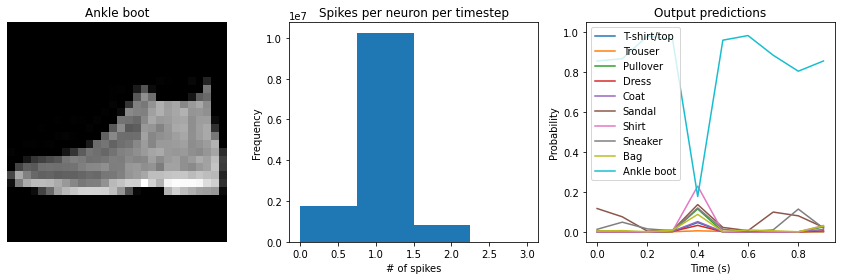

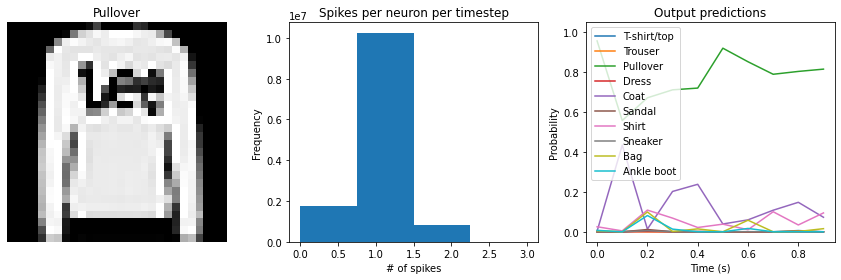

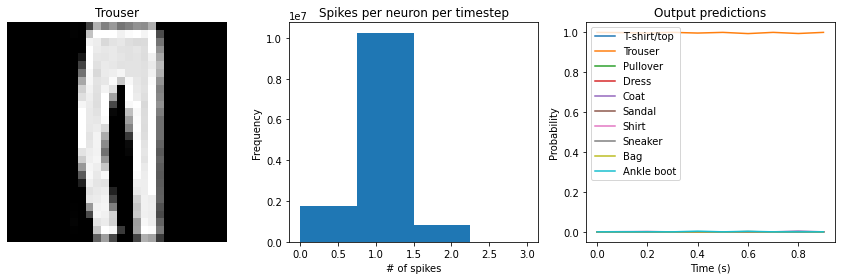

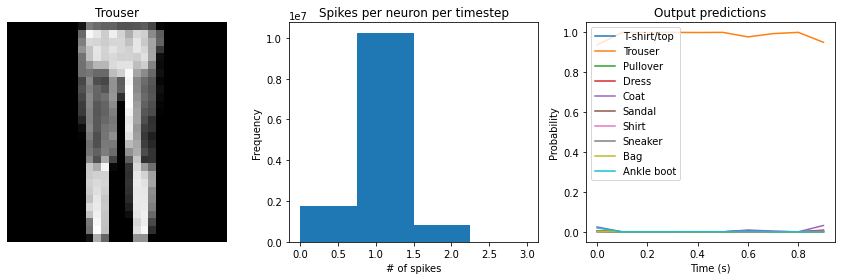

In [14]:
check_output(model)

We can see that the spike rates have moved towards the 10Hz target we specified. However, the test accuracy has dropped, since we're adding an additional optimization constraint. Again this is a tradeoff that is made between controlling the firing rates and optimizing accuracy, and the best value for that tradeoff will depend on the particular application (e.g., how important is it that spike rates fall within a particular range?).

## Lowpass filtering

Another tool we can employ when working with SpikingActivation layers is filtering. As we've seen, the output of a spiking layer consists of discrete, temporally sparse spike events. This makes it difficult to determine the spike rate of a neuron when just looking at a single timestep. For example, in the cases above we are only using the output on the final timestep to compute the test accuracy. But it's possible that a neuron that actually has a low spike rate just happened to spike on that final timestep, throwing off our measured results.

It seems natural then, rather than just looking at a single timestep, to compute some kind of moving average of the spiking output across timesteps. This is effectively what filtering is doing. Keras Spiking contains a Lowpass layer, which implements a [lowpass filter](https://en.wikipedia.org/wiki/Low-pass_filter). This has a parameter `tau`, known as the filter time constant, which controls the degree of smoothing the layer will apply. Larger `tau` values will apply more smoothing, meaning that we're aggregating information across longer periods of time, but the output will also be slower to adapt to changes in the input.

By default the `tau` values are trainable. We can use this in combination with spiking aware training to enable the model to learn time constants that best trade off spike noise versus response speed.

In [15]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # we'll use a smaller dt value of 0.01
        # note: we set return_sequences=True, because we want to pass the whole sequence
        # of spikes to Lowpass to be filtered
        keras_spiking.SpikingActivation(
            "relu", return_sequences=True, spiking_aware_training=True, dt=0.01
        ),
        # add a lowpass filter on output of spiking layer
        # note: the lowpass dt doesn't necessarily need to be the same as the
        # SpikingActivation dt, but it's probably a good idea to keep them in sync
        # so that if we change dt the relative effect of the lowpass filter is unchanged
        keras_spiking.Lowpass(tau=0.1, dt=0.01),
        tf.keras.layers.Dense(10),
    ]
)

train(model)

Epoch 1/10


   1/1875 [..............................] - ETA: 1s - loss: 3.1698 - accuracy: 0.0312

   8/1875 [..............................] - ETA: 12s - loss: 2.7517 - accuracy: 0.1172

  15/1875 [..............................] - ETA: 13s - loss: 2.5672 - accuracy: 0.1604

  22/1875 [..............................] - ETA: 13s - loss: 2.5190 - accuracy: 0.1974

  29/1875 [..............................] - ETA: 13s - loss: 2.4440 - accuracy: 0.2360

  36/1875 [..............................] - ETA: 13s - loss: 2.3974 - accuracy: 0.2604

  43/1875 [..............................] - ETA: 13s - loss: 2.3905 - accuracy: 0.2805

  50/1875 [..............................] - ETA: 13s - loss: 2.3452 - accuracy: 0.3038

  58/1875 [..............................] - ETA: 13s - loss: 2.3036 - accuracy: 0.3152

  66/1875 [>.............................] - ETA: 13s - loss: 2.2763 - accuracy: 0.3267

  73/1875 [>.............................] - ETA: 13s - loss: 2.2509 - accuracy: 0.3416

  81/1875 [>.............................] - ETA: 12s - loss: 2.2079 - accuracy: 0.3588

  88/1875 [>.............................] - ETA: 12s - loss: 2.1597 - accuracy: 0.3707

  95/1875 [>.............................] - ETA: 12s - loss: 2.1338 - accuracy: 0.3832

 103/1875 [>.............................] - ETA: 12s - loss: 2.1012 - accuracy: 0.3929

 111/1875 [>.............................] - ETA: 12s - loss: 2.0503 - accuracy: 0.4068

 118/1875 [>.............................] - ETA: 12s - loss: 2.0226 - accuracy: 0.4160

 125/1875 [=>............................] - ETA: 12s - loss: 1.9945 - accuracy: 0.4245

 133/1875 [=>............................] - ETA: 12s - loss: 1.9738 - accuracy: 0.4333

 140/1875 [=>............................] - ETA: 12s - loss: 1.9618 - accuracy: 0.4393

 147/1875 [=>............................] - ETA: 12s - loss: 1.9347 - accuracy: 0.4456

 155/1875 [=>............................] - ETA: 12s - loss: 1.9104 - accuracy: 0.4524

 162/1875 [=>............................] - ETA: 12s - loss: 1.8949 - accuracy: 0.4581

 168/1875 [=>............................] - ETA: 12s - loss: 1.8842 - accuracy: 0.4632

 175/1875 [=>............................] - ETA: 12s - loss: 1.8719 - accuracy: 0.4673

 182/1875 [=>............................] - ETA: 12s - loss: 1.8547 - accuracy: 0.4727

 189/1875 [==>...........................] - ETA: 12s - loss: 1.8444 - accuracy: 0.4770

 195/1875 [==>...........................] - ETA: 12s - loss: 1.8334 - accuracy: 0.4796

 202/1875 [==>...........................] - ETA: 12s - loss: 1.8141 - accuracy: 0.4836

 209/1875 [==>...........................] - ETA: 12s - loss: 1.8003 - accuracy: 0.4883

 216/1875 [==>...........................] - ETA: 12s - loss: 1.7904 - accuracy: 0.4919

 222/1875 [==>...........................] - ETA: 12s - loss: 1.7753 - accuracy: 0.4961

 229/1875 [==>...........................] - ETA: 12s - loss: 1.7625 - accuracy: 0.4977

 235/1875 [==>...........................] - ETA: 12s - loss: 1.7462 - accuracy: 0.5025

 242/1875 [==>...........................] - ETA: 12s - loss: 1.7340 - accuracy: 0.5067

 249/1875 [==>...........................] - ETA: 12s - loss: 1.7293 - accuracy: 0.5084

 256/1875 [===>..........................] - ETA: 12s - loss: 1.7215 - accuracy: 0.5107

 263/1875 [===>..........................] - ETA: 12s - loss: 1.7076 - accuracy: 0.5145

 271/1875 [===>..........................] - ETA: 12s - loss: 1.7007 - accuracy: 0.5165

 278/1875 [===>..........................] - ETA: 12s - loss: 1.6901 - accuracy: 0.5197

 286/1875 [===>..........................] - ETA: 11s - loss: 1.6772 - accuracy: 0.5226

 294/1875 [===>..........................] - ETA: 11s - loss: 1.6660 - accuracy: 0.5261

 301/1875 [===>..........................] - ETA: 11s - loss: 1.6545 - accuracy: 0.5295

 308/1875 [===>..........................] - ETA: 11s - loss: 1.6428 - accuracy: 0.5329

 315/1875 [====>.........................] - ETA: 11s - loss: 1.6281 - accuracy: 0.5361

 322/1875 [====>.........................] - ETA: 11s - loss: 1.6245 - accuracy: 0.5382

 329/1875 [====>.........................] - ETA: 11s - loss: 1.6206 - accuracy: 0.5407

 336/1875 [====>.........................] - ETA: 11s - loss: 1.6124 - accuracy: 0.5420

 344/1875 [====>.........................] - ETA: 11s - loss: 1.6049 - accuracy: 0.5443

 351/1875 [====>.........................] - ETA: 11s - loss: 1.5937 - accuracy: 0.5467

 359/1875 [====>.........................] - ETA: 11s - loss: 1.5826 - accuracy: 0.5498

 366/1875 [====>.........................] - ETA: 11s - loss: 1.5744 - accuracy: 0.5523

 373/1875 [====>.........................] - ETA: 11s - loss: 1.5635 - accuracy: 0.5551

 380/1875 [=====>........................] - ETA: 11s - loss: 1.5557 - accuracy: 0.5570

 387/1875 [=====>........................] - ETA: 11s - loss: 1.5493 - accuracy: 0.5589

 393/1875 [=====>........................] - ETA: 11s - loss: 1.5405 - accuracy: 0.5611

 400/1875 [=====>........................] - ETA: 11s - loss: 1.5286 - accuracy: 0.5638

 407/1875 [=====>........................] - ETA: 10s - loss: 1.5188 - accuracy: 0.5658

 414/1875 [=====>........................] - ETA: 10s - loss: 1.5119 - accuracy: 0.5673

 421/1875 [=====>........................] - ETA: 10s - loss: 1.5048 - accuracy: 0.5692

 428/1875 [=====>........................] - ETA: 10s - loss: 1.4987 - accuracy: 0.5713

 435/1875 [=====>........................] - ETA: 10s - loss: 1.4926 - accuracy: 0.5728

 443/1875 [======>.......................] - ETA: 10s - loss: 1.4843 - accuracy: 0.5746

 450/1875 [======>.......................] - ETA: 10s - loss: 1.4774 - accuracy: 0.5759

 457/1875 [======>.......................] - ETA: 10s - loss: 1.4691 - accuracy: 0.5775

 465/1875 [======>.......................] - ETA: 10s - loss: 1.4624 - accuracy: 0.5785

 472/1875 [======>.......................] - ETA: 10s - loss: 1.4546 - accuracy: 0.5793

 480/1875 [======>.......................] - ETA: 10s - loss: 1.4446 - accuracy: 0.5814

 488/1875 [======>.......................] - ETA: 10s - loss: 1.4385 - accuracy: 0.5829

 496/1875 [======>.......................] - ETA: 10s - loss: 1.4316 - accuracy: 0.5844

 504/1875 [=======>......................] - ETA: 10s - loss: 1.4249 - accuracy: 0.5856

 512/1875 [=======>......................] - ETA: 10s - loss: 1.4212 - accuracy: 0.5869

 520/1875 [=======>......................] - ETA: 10s - loss: 1.4126 - accuracy: 0.5895

 528/1875 [=======>......................] - ETA: 9s - loss: 1.4059 - accuracy: 0.5906 

 535/1875 [=======>......................] - ETA: 9s - loss: 1.3997 - accuracy: 0.5918

 542/1875 [=======>......................] - ETA: 9s - loss: 1.3916 - accuracy: 0.5939

 549/1875 [=======>......................] - ETA: 9s - loss: 1.3869 - accuracy: 0.5949

 557/1875 [=======>......................] - ETA: 9s - loss: 1.3803 - accuracy: 0.5966

 564/1875 [========>.....................] - ETA: 9s - loss: 1.3745 - accuracy: 0.5980

 571/1875 [========>.....................] - ETA: 9s - loss: 1.3713 - accuracy: 0.5985

 578/1875 [========>.....................] - ETA: 9s - loss: 1.3647 - accuracy: 0.6002

 585/1875 [========>.....................] - ETA: 9s - loss: 1.3602 - accuracy: 0.6009

 592/1875 [========>.....................] - ETA: 9s - loss: 1.3558 - accuracy: 0.6020

 599/1875 [========>.....................] - ETA: 9s - loss: 1.3496 - accuracy: 0.6031

 606/1875 [========>.....................] - ETA: 9s - loss: 1.3438 - accuracy: 0.6042

 613/1875 [========>.....................] - ETA: 9s - loss: 1.3381 - accuracy: 0.6054

 619/1875 [========>.....................] - ETA: 9s - loss: 1.3336 - accuracy: 0.6061

 626/1875 [=========>....................] - ETA: 9s - loss: 1.3295 - accuracy: 0.6067

 633/1875 [=========>....................] - ETA: 9s - loss: 1.3248 - accuracy: 0.6077

 640/1875 [=========>....................] - ETA: 9s - loss: 1.3212 - accuracy: 0.6083

 647/1875 [=========>....................] - ETA: 9s - loss: 1.3166 - accuracy: 0.6093

 654/1875 [=========>....................] - ETA: 9s - loss: 1.3109 - accuracy: 0.6101

 662/1875 [=========>....................] - ETA: 8s - loss: 1.3072 - accuracy: 0.6109

 669/1875 [=========>....................] - ETA: 8s - loss: 1.3032 - accuracy: 0.6114

 676/1875 [=========>....................] - ETA: 8s - loss: 1.2996 - accuracy: 0.6123

 683/1875 [=========>....................] - ETA: 8s - loss: 1.2944 - accuracy: 0.6134

 690/1875 [==========>...................] - ETA: 8s - loss: 1.2902 - accuracy: 0.6142

 698/1875 [==========>...................] - ETA: 8s - loss: 1.2864 - accuracy: 0.6152

 705/1875 [==========>...................] - ETA: 8s - loss: 1.2809 - accuracy: 0.6160

 712/1875 [==========>...................] - ETA: 8s - loss: 1.2770 - accuracy: 0.6167

 719/1875 [==========>...................] - ETA: 8s - loss: 1.2745 - accuracy: 0.6172

 726/1875 [==========>...................] - ETA: 8s - loss: 1.2705 - accuracy: 0.6177

 733/1875 [==========>...................] - ETA: 8s - loss: 1.2677 - accuracy: 0.6183

 740/1875 [==========>...................] - ETA: 8s - loss: 1.2648 - accuracy: 0.6188

 747/1875 [==========>...................] - ETA: 8s - loss: 1.2596 - accuracy: 0.6200

 754/1875 [===========>..................] - ETA: 8s - loss: 1.2562 - accuracy: 0.6209

 761/1875 [===========>..................] - ETA: 8s - loss: 1.2512 - accuracy: 0.6221

 768/1875 [===========>..................] - ETA: 8s - loss: 1.2463 - accuracy: 0.6229

 775/1875 [===========>..................] - ETA: 8s - loss: 1.2421 - accuracy: 0.6239

 782/1875 [===========>..................] - ETA: 8s - loss: 1.2389 - accuracy: 0.6248

 789/1875 [===========>..................] - ETA: 8s - loss: 1.2340 - accuracy: 0.6261

 795/1875 [===========>..................] - ETA: 8s - loss: 1.2309 - accuracy: 0.6267

 802/1875 [===========>..................] - ETA: 7s - loss: 1.2266 - accuracy: 0.6278

 809/1875 [===========>..................] - ETA: 7s - loss: 1.2216 - accuracy: 0.6288

 815/1875 [============>.................] - ETA: 7s - loss: 1.2186 - accuracy: 0.6296

 822/1875 [============>.................] - ETA: 7s - loss: 1.2177 - accuracy: 0.6298

 830/1875 [============>.................] - ETA: 7s - loss: 1.2139 - accuracy: 0.6306

 837/1875 [============>.................] - ETA: 7s - loss: 1.2095 - accuracy: 0.6316

 844/1875 [============>.................] - ETA: 7s - loss: 1.2069 - accuracy: 0.6321

 851/1875 [============>.................] - ETA: 7s - loss: 1.2029 - accuracy: 0.6329

 859/1875 [============>.................] - ETA: 7s - loss: 1.1996 - accuracy: 0.6334

 866/1875 [============>.................] - ETA: 7s - loss: 1.1971 - accuracy: 0.6341

 873/1875 [============>.................] - ETA: 7s - loss: 1.1940 - accuracy: 0.6347

 880/1875 [=============>................] - ETA: 7s - loss: 1.1912 - accuracy: 0.6353

 887/1875 [=============>................] - ETA: 7s - loss: 1.1884 - accuracy: 0.6361

 894/1875 [=============>................] - ETA: 7s - loss: 1.1862 - accuracy: 0.6364

 901/1875 [=============>................] - ETA: 7s - loss: 1.1845 - accuracy: 0.6367

 908/1875 [=============>................] - ETA: 7s - loss: 1.1811 - accuracy: 0.6375

 915/1875 [=============>................] - ETA: 7s - loss: 1.1800 - accuracy: 0.6379

 922/1875 [=============>................] - ETA: 7s - loss: 1.1768 - accuracy: 0.6387

 929/1875 [=============>................] - ETA: 7s - loss: 1.1732 - accuracy: 0.6395

 936/1875 [=============>................] - ETA: 6s - loss: 1.1700 - accuracy: 0.6401

 943/1875 [==============>...............] - ETA: 6s - loss: 1.1670 - accuracy: 0.6406

 949/1875 [==============>...............] - ETA: 6s - loss: 1.1641 - accuracy: 0.6410

 956/1875 [==============>...............] - ETA: 6s - loss: 1.1616 - accuracy: 0.6417

 964/1875 [==============>...............] - ETA: 6s - loss: 1.1589 - accuracy: 0.6424

 971/1875 [==============>...............] - ETA: 6s - loss: 1.1565 - accuracy: 0.6430

 978/1875 [==============>...............] - ETA: 6s - loss: 1.1536 - accuracy: 0.6438

 984/1875 [==============>...............] - ETA: 6s - loss: 1.1508 - accuracy: 0.6446

 991/1875 [==============>...............] - ETA: 6s - loss: 1.1483 - accuracy: 0.6452

 998/1875 [==============>...............] - ETA: 6s - loss: 1.1462 - accuracy: 0.6457

1005/1875 [===============>..............] - ETA: 6s - loss: 1.1432 - accuracy: 0.6462

1012/1875 [===============>..............] - ETA: 6s - loss: 1.1402 - accuracy: 0.6468

1020/1875 [===============>..............] - ETA: 6s - loss: 1.1364 - accuracy: 0.6473

1027/1875 [===============>..............] - ETA: 6s - loss: 1.1329 - accuracy: 0.6482

1034/1875 [===============>..............] - ETA: 6s - loss: 1.1303 - accuracy: 0.6488

1041/1875 [===============>..............] - ETA: 6s - loss: 1.1270 - accuracy: 0.6498

1048/1875 [===============>..............] - ETA: 6s - loss: 1.1240 - accuracy: 0.6504

1055/1875 [===============>..............] - ETA: 6s - loss: 1.1212 - accuracy: 0.6512

1061/1875 [===============>..............] - ETA: 6s - loss: 1.1184 - accuracy: 0.6517

1068/1875 [================>.............] - ETA: 6s - loss: 1.1151 - accuracy: 0.6525

1075/1875 [================>.............] - ETA: 5s - loss: 1.1135 - accuracy: 0.6530

1082/1875 [================>.............] - ETA: 5s - loss: 1.1113 - accuracy: 0.6534

1089/1875 [================>.............] - ETA: 5s - loss: 1.1091 - accuracy: 0.6538

1097/1875 [================>.............] - ETA: 5s - loss: 1.1064 - accuracy: 0.6544

1104/1875 [================>.............] - ETA: 5s - loss: 1.1036 - accuracy: 0.6552

1111/1875 [================>.............] - ETA: 5s - loss: 1.1019 - accuracy: 0.6554

1118/1875 [================>.............] - ETA: 5s - loss: 1.0998 - accuracy: 0.6560

1125/1875 [=================>............] - ETA: 5s - loss: 1.0975 - accuracy: 0.6566

1132/1875 [=================>............] - ETA: 5s - loss: 1.0958 - accuracy: 0.6571

1139/1875 [=================>............] - ETA: 5s - loss: 1.0940 - accuracy: 0.6574

1146/1875 [=================>............] - ETA: 5s - loss: 1.0912 - accuracy: 0.6580

1153/1875 [=================>............] - ETA: 5s - loss: 1.0892 - accuracy: 0.6584

1160/1875 [=================>............] - ETA: 5s - loss: 1.0864 - accuracy: 0.6591

1167/1875 [=================>............] - ETA: 5s - loss: 1.0842 - accuracy: 0.6597

1174/1875 [=================>............] - ETA: 5s - loss: 1.0828 - accuracy: 0.6597

1181/1875 [=================>............] - ETA: 5s - loss: 1.0809 - accuracy: 0.6602

1188/1875 [==================>...........] - ETA: 5s - loss: 1.0787 - accuracy: 0.6606

1194/1875 [==================>...........] - ETA: 5s - loss: 1.0767 - accuracy: 0.6611

1201/1875 [==================>...........] - ETA: 5s - loss: 1.0746 - accuracy: 0.6614

1208/1875 [==================>...........] - ETA: 4s - loss: 1.0723 - accuracy: 0.6619

1215/1875 [==================>...........] - ETA: 4s - loss: 1.0699 - accuracy: 0.6624

1222/1875 [==================>...........] - ETA: 4s - loss: 1.0674 - accuracy: 0.6632

1229/1875 [==================>...........] - ETA: 4s - loss: 1.0652 - accuracy: 0.6638

1236/1875 [==================>...........] - ETA: 4s - loss: 1.0635 - accuracy: 0.6641

1243/1875 [==================>...........] - ETA: 4s - loss: 1.0616 - accuracy: 0.6646

1250/1875 [===================>..........] - ETA: 4s - loss: 1.0601 - accuracy: 0.6647

1257/1875 [===================>..........] - ETA: 4s - loss: 1.0576 - accuracy: 0.6652

1264/1875 [===================>..........] - ETA: 4s - loss: 1.0554 - accuracy: 0.6656

1271/1875 [===================>..........] - ETA: 4s - loss: 1.0529 - accuracy: 0.6662

1278/1875 [===================>..........] - ETA: 4s - loss: 1.0512 - accuracy: 0.6668

1285/1875 [===================>..........] - ETA: 4s - loss: 1.0495 - accuracy: 0.6672

1292/1875 [===================>..........] - ETA: 4s - loss: 1.0472 - accuracy: 0.6676

1299/1875 [===================>..........] - ETA: 4s - loss: 1.0453 - accuracy: 0.6680

1306/1875 [===================>..........] - ETA: 4s - loss: 1.0431 - accuracy: 0.6686

1313/1875 [====================>.........] - ETA: 4s - loss: 1.0408 - accuracy: 0.6692

1320/1875 [====================>.........] - ETA: 4s - loss: 1.0389 - accuracy: 0.6695

1327/1875 [====================>.........] - ETA: 4s - loss: 1.0366 - accuracy: 0.6700

1334/1875 [====================>.........] - ETA: 4s - loss: 1.0358 - accuracy: 0.6699

1341/1875 [====================>.........] - ETA: 4s - loss: 1.0341 - accuracy: 0.6704

1348/1875 [====================>.........] - ETA: 3s - loss: 1.0321 - accuracy: 0.6708

1355/1875 [====================>.........] - ETA: 3s - loss: 1.0300 - accuracy: 0.6711

1362/1875 [====================>.........] - ETA: 3s - loss: 1.0280 - accuracy: 0.6715

1369/1875 [====================>.........] - ETA: 3s - loss: 1.0263 - accuracy: 0.6718

1376/1875 [=====================>........] - ETA: 3s - loss: 1.0246 - accuracy: 0.6722

1383/1875 [=====================>........] - ETA: 3s - loss: 1.0229 - accuracy: 0.6726

1390/1875 [=====================>........] - ETA: 3s - loss: 1.0212 - accuracy: 0.6729

1397/1875 [=====================>........] - ETA: 3s - loss: 1.0199 - accuracy: 0.6732

1404/1875 [=====================>........] - ETA: 3s - loss: 1.0181 - accuracy: 0.6737

1411/1875 [=====================>........] - ETA: 3s - loss: 1.0163 - accuracy: 0.6742

1418/1875 [=====================>........] - ETA: 3s - loss: 1.0149 - accuracy: 0.6745

1425/1875 [=====================>........] - ETA: 3s - loss: 1.0134 - accuracy: 0.6749

1432/1875 [=====================>........] - ETA: 3s - loss: 1.0125 - accuracy: 0.6751

1439/1875 [======================>.......] - ETA: 3s - loss: 1.0104 - accuracy: 0.6756

1446/1875 [======================>.......] - ETA: 3s - loss: 1.0084 - accuracy: 0.6762

1453/1875 [======================>.......] - ETA: 3s - loss: 1.0065 - accuracy: 0.6766

1460/1875 [======================>.......] - ETA: 3s - loss: 1.0052 - accuracy: 0.6769

1467/1875 [======================>.......] - ETA: 3s - loss: 1.0042 - accuracy: 0.6771

1474/1875 [======================>.......] - ETA: 3s - loss: 1.0028 - accuracy: 0.6775

1481/1875 [======================>.......] - ETA: 2s - loss: 1.0011 - accuracy: 0.6779

1488/1875 [======================>.......] - ETA: 2s - loss: 0.9995 - accuracy: 0.6783

1495/1875 [======================>.......] - ETA: 2s - loss: 0.9975 - accuracy: 0.6788

1502/1875 [=======================>......] - ETA: 2s - loss: 0.9956 - accuracy: 0.6793

1509/1875 [=======================>......] - ETA: 2s - loss: 0.9935 - accuracy: 0.6799

1516/1875 [=======================>......] - ETA: 2s - loss: 0.9915 - accuracy: 0.6805

1523/1875 [=======================>......] - ETA: 2s - loss: 0.9895 - accuracy: 0.6808

1530/1875 [=======================>......] - ETA: 2s - loss: 0.9881 - accuracy: 0.6811

1537/1875 [=======================>......] - ETA: 2s - loss: 0.9869 - accuracy: 0.6814

1544/1875 [=======================>......] - ETA: 2s - loss: 0.9854 - accuracy: 0.6818

1551/1875 [=======================>......] - ETA: 2s - loss: 0.9839 - accuracy: 0.6821

1558/1875 [=======================>......] - ETA: 2s - loss: 0.9824 - accuracy: 0.6824

1565/1875 [========================>.....] - ETA: 2s - loss: 0.9811 - accuracy: 0.6826

1572/1875 [========================>.....] - ETA: 2s - loss: 0.9799 - accuracy: 0.6829

1579/1875 [========================>.....] - ETA: 2s - loss: 0.9789 - accuracy: 0.6829

1586/1875 [========================>.....] - ETA: 2s - loss: 0.9776 - accuracy: 0.6833

1593/1875 [========================>.....] - ETA: 2s - loss: 0.9761 - accuracy: 0.6836

1600/1875 [========================>.....] - ETA: 2s - loss: 0.9747 - accuracy: 0.6840

1607/1875 [========================>.....] - ETA: 2s - loss: 0.9731 - accuracy: 0.6845

1614/1875 [========================>.....] - ETA: 1s - loss: 0.9715 - accuracy: 0.6848

1621/1875 [========================>.....] - ETA: 1s - loss: 0.9703 - accuracy: 0.6852

1628/1875 [=========================>....] - ETA: 1s - loss: 0.9691 - accuracy: 0.6856

1635/1875 [=========================>....] - ETA: 1s - loss: 0.9677 - accuracy: 0.6860

1642/1875 [=========================>....] - ETA: 1s - loss: 0.9664 - accuracy: 0.6862

1649/1875 [=========================>....] - ETA: 1s - loss: 0.9649 - accuracy: 0.6866

1655/1875 [=========================>....] - ETA: 1s - loss: 0.9639 - accuracy: 0.6869

1662/1875 [=========================>....] - ETA: 1s - loss: 0.9623 - accuracy: 0.6872

1669/1875 [=========================>....] - ETA: 1s - loss: 0.9611 - accuracy: 0.6874

1676/1875 [=========================>....] - ETA: 1s - loss: 0.9598 - accuracy: 0.6879

1683/1875 [=========================>....] - ETA: 1s - loss: 0.9583 - accuracy: 0.6883

1690/1875 [==========================>...] - ETA: 1s - loss: 0.9571 - accuracy: 0.6886

1697/1875 [==========================>...] - ETA: 1s - loss: 0.9564 - accuracy: 0.6888

1704/1875 [==========================>...] - ETA: 1s - loss: 0.9551 - accuracy: 0.6890

1711/1875 [==========================>...] - ETA: 1s - loss: 0.9537 - accuracy: 0.6893

1718/1875 [==========================>...] - ETA: 1s - loss: 0.9526 - accuracy: 0.6895

1725/1875 [==========================>...] - ETA: 1s - loss: 0.9511 - accuracy: 0.6898

1732/1875 [==========================>...] - ETA: 1s - loss: 0.9501 - accuracy: 0.6900

1739/1875 [==========================>...] - ETA: 1s - loss: 0.9487 - accuracy: 0.6903

1746/1875 [==========================>...] - ETA: 0s - loss: 0.9469 - accuracy: 0.6909

1753/1875 [===========================>..] - ETA: 0s - loss: 0.9462 - accuracy: 0.6910

1760/1875 [===========================>..] - ETA: 0s - loss: 0.9448 - accuracy: 0.6914

1767/1875 [===========================>..] - ETA: 0s - loss: 0.9437 - accuracy: 0.6916

1774/1875 [===========================>..] - ETA: 0s - loss: 0.9423 - accuracy: 0.6920

1781/1875 [===========================>..] - ETA: 0s - loss: 0.9408 - accuracy: 0.6923

1788/1875 [===========================>..] - ETA: 0s - loss: 0.9403 - accuracy: 0.6922

1795/1875 [===========================>..] - ETA: 0s - loss: 0.9392 - accuracy: 0.6926

1802/1875 [===========================>..] - ETA: 0s - loss: 0.9383 - accuracy: 0.6929

1809/1875 [===========================>..] - ETA: 0s - loss: 0.9372 - accuracy: 0.6932

1816/1875 [============================>.] - ETA: 0s - loss: 0.9362 - accuracy: 0.6934

1823/1875 [============================>.] - ETA: 0s - loss: 0.9350 - accuracy: 0.6936

1830/1875 [============================>.] - ETA: 0s - loss: 0.9334 - accuracy: 0.6940

1837/1875 [============================>.] - ETA: 0s - loss: 0.9318 - accuracy: 0.6945

1843/1875 [============================>.] - ETA: 0s - loss: 0.9307 - accuracy: 0.6948

1850/1875 [============================>.] - ETA: 0s - loss: 0.9295 - accuracy: 0.6951

1857/1875 [============================>.] - ETA: 0s - loss: 0.9290 - accuracy: 0.6954

1864/1875 [============================>.] - ETA: 0s - loss: 0.9282 - accuracy: 0.6956

1871/1875 [============================>.] - ETA: 0s - loss: 0.9269 - accuracy: 0.6960

1875/1875 [==============================] - 14s 8ms/step - loss: 0.9261 - accuracy: 0.6963


Epoch 2/10


   1/1875 [..............................] - ETA: 0s - loss: 0.4848 - accuracy: 0.7500

   8/1875 [..............................] - ETA: 12s - loss: 0.6638 - accuracy: 0.7695

  15/1875 [..............................] - ETA: 13s - loss: 0.6570 - accuracy: 0.7479

  22/1875 [..............................] - ETA: 13s - loss: 0.6683 - accuracy: 0.7386

  29/1875 [..............................] - ETA: 13s - loss: 0.6636 - accuracy: 0.7381

  36/1875 [..............................] - ETA: 13s - loss: 0.6604 - accuracy: 0.7387

  42/1875 [..............................] - ETA: 14s - loss: 0.6603 - accuracy: 0.7381

  49/1875 [..............................] - ETA: 14s - loss: 0.6491 - accuracy: 0.7430

  56/1875 [..............................] - ETA: 14s - loss: 0.6588 - accuracy: 0.7455

  63/1875 [>.............................] - ETA: 13s - loss: 0.6443 - accuracy: 0.7510

  70/1875 [>.............................] - ETA: 13s - loss: 0.6400 - accuracy: 0.7554

  76/1875 [>.............................] - ETA: 14s - loss: 0.6405 - accuracy: 0.7570

  83/1875 [>.............................] - ETA: 13s - loss: 0.6292 - accuracy: 0.7617

  90/1875 [>.............................] - ETA: 13s - loss: 0.6334 - accuracy: 0.7601

  97/1875 [>.............................] - ETA: 13s - loss: 0.6338 - accuracy: 0.7606

 104/1875 [>.............................] - ETA: 13s - loss: 0.6372 - accuracy: 0.7611

 111/1875 [>.............................] - ETA: 13s - loss: 0.6352 - accuracy: 0.7632

 118/1875 [>.............................] - ETA: 13s - loss: 0.6361 - accuracy: 0.7619

 125/1875 [=>............................] - ETA: 13s - loss: 0.6393 - accuracy: 0.7613

 132/1875 [=>............................] - ETA: 13s - loss: 0.6426 - accuracy: 0.7602

 139/1875 [=>............................] - ETA: 13s - loss: 0.6497 - accuracy: 0.7592

 146/1875 [=>............................] - ETA: 13s - loss: 0.6499 - accuracy: 0.7590

 152/1875 [=>............................] - ETA: 13s - loss: 0.6462 - accuracy: 0.7611

 159/1875 [=>............................] - ETA: 13s - loss: 0.6513 - accuracy: 0.7596

 166/1875 [=>............................] - ETA: 13s - loss: 0.6486 - accuracy: 0.7605

 173/1875 [=>............................] - ETA: 13s - loss: 0.6480 - accuracy: 0.7612

 180/1875 [=>............................] - ETA: 13s - loss: 0.6465 - accuracy: 0.7616

 187/1875 [=>............................] - ETA: 13s - loss: 0.6439 - accuracy: 0.7615

 194/1875 [==>...........................] - ETA: 13s - loss: 0.6448 - accuracy: 0.7606

 201/1875 [==>...........................] - ETA: 13s - loss: 0.6420 - accuracy: 0.7620

 208/1875 [==>...........................] - ETA: 13s - loss: 0.6414 - accuracy: 0.7614

 215/1875 [==>...........................] - ETA: 13s - loss: 0.6404 - accuracy: 0.7626

 222/1875 [==>...........................] - ETA: 13s - loss: 0.6384 - accuracy: 0.7631

 229/1875 [==>...........................] - ETA: 12s - loss: 0.6367 - accuracy: 0.7642

 236/1875 [==>...........................] - ETA: 12s - loss: 0.6376 - accuracy: 0.7634

 243/1875 [==>...........................] - ETA: 12s - loss: 0.6399 - accuracy: 0.7630

 250/1875 [===>..........................] - ETA: 12s - loss: 0.6367 - accuracy: 0.7649

 257/1875 [===>..........................] - ETA: 12s - loss: 0.6375 - accuracy: 0.7647

 264/1875 [===>..........................] - ETA: 12s - loss: 0.6365 - accuracy: 0.7649

 271/1875 [===>..........................] - ETA: 12s - loss: 0.6346 - accuracy: 0.7659

 278/1875 [===>..........................] - ETA: 12s - loss: 0.6359 - accuracy: 0.7655

 285/1875 [===>..........................] - ETA: 12s - loss: 0.6345 - accuracy: 0.7658

 292/1875 [===>..........................] - ETA: 12s - loss: 0.6352 - accuracy: 0.7658

 299/1875 [===>..........................] - ETA: 12s - loss: 0.6360 - accuracy: 0.7652

 306/1875 [===>..........................] - ETA: 12s - loss: 0.6377 - accuracy: 0.7646

 313/1875 [====>.........................] - ETA: 12s - loss: 0.6357 - accuracy: 0.7653

 320/1875 [====>.........................] - ETA: 12s - loss: 0.6358 - accuracy: 0.7655

 327/1875 [====>.........................] - ETA: 12s - loss: 0.6316 - accuracy: 0.7669

 334/1875 [====>.........................] - ETA: 12s - loss: 0.6312 - accuracy: 0.7667

 341/1875 [====>.........................] - ETA: 12s - loss: 0.6304 - accuracy: 0.7676

 348/1875 [====>.........................] - ETA: 12s - loss: 0.6301 - accuracy: 0.7673

 355/1875 [====>.........................] - ETA: 11s - loss: 0.6317 - accuracy: 0.7671

 362/1875 [====>.........................] - ETA: 11s - loss: 0.6329 - accuracy: 0.7665

 369/1875 [====>.........................] - ETA: 11s - loss: 0.6320 - accuracy: 0.7669

 376/1875 [=====>........................] - ETA: 11s - loss: 0.6308 - accuracy: 0.7673

 383/1875 [=====>........................] - ETA: 11s - loss: 0.6315 - accuracy: 0.7676

 390/1875 [=====>........................] - ETA: 11s - loss: 0.6309 - accuracy: 0.7679

 397/1875 [=====>........................] - ETA: 11s - loss: 0.6299 - accuracy: 0.7680

 404/1875 [=====>........................] - ETA: 11s - loss: 0.6302 - accuracy: 0.7683

 411/1875 [=====>........................] - ETA: 11s - loss: 0.6292 - accuracy: 0.7686

 418/1875 [=====>........................] - ETA: 11s - loss: 0.6304 - accuracy: 0.7684

 425/1875 [=====>........................] - ETA: 11s - loss: 0.6305 - accuracy: 0.7685

 432/1875 [=====>........................] - ETA: 11s - loss: 0.6297 - accuracy: 0.7691

 439/1875 [======>.......................] - ETA: 11s - loss: 0.6270 - accuracy: 0.7702

 446/1875 [======>.......................] - ETA: 11s - loss: 0.6270 - accuracy: 0.7704

 453/1875 [======>.......................] - ETA: 11s - loss: 0.6258 - accuracy: 0.7709

 460/1875 [======>.......................] - ETA: 11s - loss: 0.6259 - accuracy: 0.7711

 467/1875 [======>.......................] - ETA: 11s - loss: 0.6258 - accuracy: 0.7714

 474/1875 [======>.......................] - ETA: 10s - loss: 0.6258 - accuracy: 0.7712

 481/1875 [======>.......................] - ETA: 10s - loss: 0.6240 - accuracy: 0.7718

 488/1875 [======>.......................] - ETA: 10s - loss: 0.6242 - accuracy: 0.7716

 495/1875 [======>.......................] - ETA: 10s - loss: 0.6229 - accuracy: 0.7723

 502/1875 [=======>......................] - ETA: 10s - loss: 0.6230 - accuracy: 0.7719

 509/1875 [=======>......................] - ETA: 10s - loss: 0.6231 - accuracy: 0.7717

 515/1875 [=======>......................] - ETA: 10s - loss: 0.6223 - accuracy: 0.7719

 522/1875 [=======>......................] - ETA: 10s - loss: 0.6219 - accuracy: 0.7722

 528/1875 [=======>......................] - ETA: 10s - loss: 0.6220 - accuracy: 0.7723

 535/1875 [=======>......................] - ETA: 10s - loss: 0.6226 - accuracy: 0.7722

 542/1875 [=======>......................] - ETA: 10s - loss: 0.6228 - accuracy: 0.7723

 549/1875 [=======>......................] - ETA: 10s - loss: 0.6220 - accuracy: 0.7726

 556/1875 [=======>......................] - ETA: 10s - loss: 0.6218 - accuracy: 0.7725

 563/1875 [========>.....................] - ETA: 10s - loss: 0.6211 - accuracy: 0.7729

 570/1875 [========>.....................] - ETA: 10s - loss: 0.6223 - accuracy: 0.7728

 577/1875 [========>.....................] - ETA: 10s - loss: 0.6227 - accuracy: 0.7727

 584/1875 [========>.....................] - ETA: 10s - loss: 0.6228 - accuracy: 0.7728

 591/1875 [========>.....................] - ETA: 10s - loss: 0.6226 - accuracy: 0.7729

 598/1875 [========>.....................] - ETA: 10s - loss: 0.6225 - accuracy: 0.7726

 605/1875 [========>.....................] - ETA: 9s - loss: 0.6228 - accuracy: 0.7727 

 612/1875 [========>.....................] - ETA: 9s - loss: 0.6219 - accuracy: 0.7732

 619/1875 [========>.....................] - ETA: 9s - loss: 0.6231 - accuracy: 0.7728

 626/1875 [=========>....................] - ETA: 9s - loss: 0.6231 - accuracy: 0.7727

 633/1875 [=========>....................] - ETA: 9s - loss: 0.6240 - accuracy: 0.7726

 640/1875 [=========>....................] - ETA: 9s - loss: 0.6222 - accuracy: 0.7732

 647/1875 [=========>....................] - ETA: 9s - loss: 0.6235 - accuracy: 0.7725

 654/1875 [=========>....................] - ETA: 9s - loss: 0.6230 - accuracy: 0.7725

 661/1875 [=========>....................] - ETA: 9s - loss: 0.6223 - accuracy: 0.7728

 668/1875 [=========>....................] - ETA: 9s - loss: 0.6214 - accuracy: 0.7732

 675/1875 [=========>....................] - ETA: 9s - loss: 0.6211 - accuracy: 0.7735

 682/1875 [=========>....................] - ETA: 9s - loss: 0.6207 - accuracy: 0.7739

 688/1875 [==========>...................] - ETA: 9s - loss: 0.6204 - accuracy: 0.7738

 694/1875 [==========>...................] - ETA: 9s - loss: 0.6191 - accuracy: 0.7741

 701/1875 [==========>...................] - ETA: 9s - loss: 0.6189 - accuracy: 0.7736

 708/1875 [==========>...................] - ETA: 9s - loss: 0.6194 - accuracy: 0.7736

 714/1875 [==========>...................] - ETA: 9s - loss: 0.6194 - accuracy: 0.7735

 721/1875 [==========>...................] - ETA: 9s - loss: 0.6189 - accuracy: 0.7740

 728/1875 [==========>...................] - ETA: 9s - loss: 0.6177 - accuracy: 0.7746

 735/1875 [==========>...................] - ETA: 8s - loss: 0.6183 - accuracy: 0.7744

 742/1875 [==========>...................] - ETA: 8s - loss: 0.6180 - accuracy: 0.7748

 749/1875 [==========>...................] - ETA: 8s - loss: 0.6172 - accuracy: 0.7753

 756/1875 [===========>..................] - ETA: 8s - loss: 0.6173 - accuracy: 0.7749

 763/1875 [===========>..................] - ETA: 8s - loss: 0.6177 - accuracy: 0.7746

 770/1875 [===========>..................] - ETA: 8s - loss: 0.6170 - accuracy: 0.7748

 777/1875 [===========>..................] - ETA: 8s - loss: 0.6178 - accuracy: 0.7747

 784/1875 [===========>..................] - ETA: 8s - loss: 0.6170 - accuracy: 0.7747

 791/1875 [===========>..................] - ETA: 8s - loss: 0.6170 - accuracy: 0.7745

 798/1875 [===========>..................] - ETA: 8s - loss: 0.6165 - accuracy: 0.7745

 805/1875 [===========>..................] - ETA: 8s - loss: 0.6171 - accuracy: 0.7742

 812/1875 [===========>..................] - ETA: 8s - loss: 0.6157 - accuracy: 0.7744

 819/1875 [============>.................] - ETA: 8s - loss: 0.6160 - accuracy: 0.7742

 826/1875 [============>.................] - ETA: 8s - loss: 0.6160 - accuracy: 0.7745

 833/1875 [============>.................] - ETA: 8s - loss: 0.6162 - accuracy: 0.7743

 840/1875 [============>.................] - ETA: 8s - loss: 0.6155 - accuracy: 0.7746

 847/1875 [============>.................] - ETA: 8s - loss: 0.6166 - accuracy: 0.7742

 854/1875 [============>.................] - ETA: 8s - loss: 0.6156 - accuracy: 0.7744

 861/1875 [============>.................] - ETA: 7s - loss: 0.6154 - accuracy: 0.7745

 868/1875 [============>.................] - ETA: 7s - loss: 0.6147 - accuracy: 0.7747

 874/1875 [============>.................] - ETA: 7s - loss: 0.6141 - accuracy: 0.7750

 881/1875 [=============>................] - ETA: 7s - loss: 0.6133 - accuracy: 0.7753

 888/1875 [=============>................] - ETA: 7s - loss: 0.6132 - accuracy: 0.7752

 895/1875 [=============>................] - ETA: 7s - loss: 0.6126 - accuracy: 0.7756

 901/1875 [=============>................] - ETA: 7s - loss: 0.6118 - accuracy: 0.7759

 908/1875 [=============>................] - ETA: 7s - loss: 0.6110 - accuracy: 0.7759

 915/1875 [=============>................] - ETA: 7s - loss: 0.6109 - accuracy: 0.7762

 922/1875 [=============>................] - ETA: 7s - loss: 0.6104 - accuracy: 0.7767

 929/1875 [=============>................] - ETA: 7s - loss: 0.6098 - accuracy: 0.7768

 936/1875 [=============>................] - ETA: 7s - loss: 0.6091 - accuracy: 0.7772

 943/1875 [==============>...............] - ETA: 7s - loss: 0.6090 - accuracy: 0.7771

 949/1875 [==============>...............] - ETA: 7s - loss: 0.6088 - accuracy: 0.7771

 956/1875 [==============>...............] - ETA: 7s - loss: 0.6081 - accuracy: 0.7773

 963/1875 [==============>...............] - ETA: 7s - loss: 0.6085 - accuracy: 0.7772

 970/1875 [==============>...............] - ETA: 7s - loss: 0.6085 - accuracy: 0.7771

 977/1875 [==============>...............] - ETA: 7s - loss: 0.6090 - accuracy: 0.7772

 984/1875 [==============>...............] - ETA: 6s - loss: 0.6089 - accuracy: 0.7772

 991/1875 [==============>...............] - ETA: 6s - loss: 0.6085 - accuracy: 0.7775

 998/1875 [==============>...............] - ETA: 6s - loss: 0.6083 - accuracy: 0.7775

1005/1875 [===============>..............] - ETA: 6s - loss: 0.6073 - accuracy: 0.7779

1012/1875 [===============>..............] - ETA: 6s - loss: 0.6068 - accuracy: 0.7780

1019/1875 [===============>..............] - ETA: 6s - loss: 0.6070 - accuracy: 0.7778

1026/1875 [===============>..............] - ETA: 6s - loss: 0.6067 - accuracy: 0.7779

1033/1875 [===============>..............] - ETA: 6s - loss: 0.6062 - accuracy: 0.7782

1040/1875 [===============>..............] - ETA: 6s - loss: 0.6059 - accuracy: 0.7784

1047/1875 [===============>..............] - ETA: 6s - loss: 0.6060 - accuracy: 0.7784

1054/1875 [===============>..............] - ETA: 6s - loss: 0.6060 - accuracy: 0.7785

1061/1875 [===============>..............] - ETA: 6s - loss: 0.6054 - accuracy: 0.7787

1068/1875 [================>.............] - ETA: 6s - loss: 0.6057 - accuracy: 0.7787

1075/1875 [================>.............] - ETA: 6s - loss: 0.6059 - accuracy: 0.7785

1082/1875 [================>.............] - ETA: 6s - loss: 0.6068 - accuracy: 0.7782

1088/1875 [================>.............] - ETA: 6s - loss: 0.6064 - accuracy: 0.7785

1095/1875 [================>.............] - ETA: 6s - loss: 0.6067 - accuracy: 0.7786

1102/1875 [================>.............] - ETA: 6s - loss: 0.6066 - accuracy: 0.7788

1109/1875 [================>.............] - ETA: 6s - loss: 0.6067 - accuracy: 0.7786

1116/1875 [================>.............] - ETA: 5s - loss: 0.6070 - accuracy: 0.7787

1123/1875 [================>.............] - ETA: 5s - loss: 0.6066 - accuracy: 0.7787

1130/1875 [=================>............] - ETA: 5s - loss: 0.6060 - accuracy: 0.7790

1137/1875 [=================>............] - ETA: 5s - loss: 0.6060 - accuracy: 0.7790

1144/1875 [=================>............] - ETA: 5s - loss: 0.6053 - accuracy: 0.7792

1151/1875 [=================>............] - ETA: 5s - loss: 0.6061 - accuracy: 0.7789

1158/1875 [=================>............] - ETA: 5s - loss: 0.6058 - accuracy: 0.7788

1165/1875 [=================>............] - ETA: 5s - loss: 0.6060 - accuracy: 0.7787

1172/1875 [=================>............] - ETA: 5s - loss: 0.6054 - accuracy: 0.7789

1179/1875 [=================>............] - ETA: 5s - loss: 0.6051 - accuracy: 0.7789

1186/1875 [=================>............] - ETA: 5s - loss: 0.6053 - accuracy: 0.7790

1193/1875 [==================>...........] - ETA: 5s - loss: 0.6042 - accuracy: 0.7794

1200/1875 [==================>...........] - ETA: 5s - loss: 0.6042 - accuracy: 0.7794

1207/1875 [==================>...........] - ETA: 5s - loss: 0.6038 - accuracy: 0.7795

1214/1875 [==================>...........] - ETA: 5s - loss: 0.6033 - accuracy: 0.7798

1221/1875 [==================>...........] - ETA: 5s - loss: 0.6027 - accuracy: 0.7799

1228/1875 [==================>...........] - ETA: 5s - loss: 0.6018 - accuracy: 0.7801

1235/1875 [==================>...........] - ETA: 5s - loss: 0.6020 - accuracy: 0.7800

1242/1875 [==================>...........] - ETA: 4s - loss: 0.6024 - accuracy: 0.7801

1249/1875 [==================>...........] - ETA: 4s - loss: 0.6025 - accuracy: 0.7800

1256/1875 [===================>..........] - ETA: 4s - loss: 0.6022 - accuracy: 0.7801

1263/1875 [===================>..........] - ETA: 4s - loss: 0.6021 - accuracy: 0.7801

1270/1875 [===================>..........] - ETA: 4s - loss: 0.6015 - accuracy: 0.7802

1277/1875 [===================>..........] - ETA: 4s - loss: 0.6019 - accuracy: 0.7801

1284/1875 [===================>..........] - ETA: 4s - loss: 0.6016 - accuracy: 0.7803

1291/1875 [===================>..........] - ETA: 4s - loss: 0.6016 - accuracy: 0.7803

1298/1875 [===================>..........] - ETA: 4s - loss: 0.6012 - accuracy: 0.7803

1305/1875 [===================>..........] - ETA: 4s - loss: 0.6007 - accuracy: 0.7805

1312/1875 [===================>..........] - ETA: 4s - loss: 0.6008 - accuracy: 0.7806

1319/1875 [====================>.........] - ETA: 4s - loss: 0.6010 - accuracy: 0.7805

1326/1875 [====================>.........] - ETA: 4s - loss: 0.6012 - accuracy: 0.7804

1333/1875 [====================>.........] - ETA: 4s - loss: 0.6012 - accuracy: 0.7805

1340/1875 [====================>.........] - ETA: 4s - loss: 0.6018 - accuracy: 0.7804

1347/1875 [====================>.........] - ETA: 4s - loss: 0.6017 - accuracy: 0.7802

1354/1875 [====================>.........] - ETA: 4s - loss: 0.6016 - accuracy: 0.7801

1361/1875 [====================>.........] - ETA: 4s - loss: 0.6014 - accuracy: 0.7803

1368/1875 [====================>.........] - ETA: 3s - loss: 0.6013 - accuracy: 0.7803

1375/1875 [=====================>........] - ETA: 3s - loss: 0.6012 - accuracy: 0.7803

1382/1875 [=====================>........] - ETA: 3s - loss: 0.6013 - accuracy: 0.7804

1389/1875 [=====================>........] - ETA: 3s - loss: 0.6009 - accuracy: 0.7804

1396/1875 [=====================>........] - ETA: 3s - loss: 0.6008 - accuracy: 0.7805

1402/1875 [=====================>........] - ETA: 3s - loss: 0.6005 - accuracy: 0.7807

1409/1875 [=====================>........] - ETA: 3s - loss: 0.6003 - accuracy: 0.7809

1415/1875 [=====================>........] - ETA: 3s - loss: 0.5997 - accuracy: 0.7811

1420/1875 [=====================>........] - ETA: 3s - loss: 0.5992 - accuracy: 0.7813

1427/1875 [=====================>........] - ETA: 3s - loss: 0.5992 - accuracy: 0.7813

1433/1875 [=====================>........] - ETA: 3s - loss: 0.5987 - accuracy: 0.7816

1439/1875 [======================>.......] - ETA: 3s - loss: 0.5982 - accuracy: 0.7819

1445/1875 [======================>.......] - ETA: 3s - loss: 0.5981 - accuracy: 0.7822

1452/1875 [======================>.......] - ETA: 3s - loss: 0.5982 - accuracy: 0.7820

1459/1875 [======================>.......] - ETA: 3s - loss: 0.5985 - accuracy: 0.7819

1466/1875 [======================>.......] - ETA: 3s - loss: 0.5983 - accuracy: 0.7819

1473/1875 [======================>.......] - ETA: 3s - loss: 0.5985 - accuracy: 0.7819

1480/1875 [======================>.......] - ETA: 3s - loss: 0.5986 - accuracy: 0.7820

1487/1875 [======================>.......] - ETA: 3s - loss: 0.5981 - accuracy: 0.7822

1494/1875 [======================>.......] - ETA: 2s - loss: 0.5980 - accuracy: 0.7822

1501/1875 [=======================>......] - ETA: 2s - loss: 0.5980 - accuracy: 0.7822

1508/1875 [=======================>......] - ETA: 2s - loss: 0.5978 - accuracy: 0.7823

1515/1875 [=======================>......] - ETA: 2s - loss: 0.5975 - accuracy: 0.7823

1521/1875 [=======================>......] - ETA: 2s - loss: 0.5973 - accuracy: 0.7823

1528/1875 [=======================>......] - ETA: 2s - loss: 0.5976 - accuracy: 0.7823

1535/1875 [=======================>......] - ETA: 2s - loss: 0.5973 - accuracy: 0.7824

1541/1875 [=======================>......] - ETA: 2s - loss: 0.5977 - accuracy: 0.7823

1548/1875 [=======================>......] - ETA: 2s - loss: 0.5972 - accuracy: 0.7826

1555/1875 [=======================>......] - ETA: 2s - loss: 0.5970 - accuracy: 0.7826

1562/1875 [=======================>......] - ETA: 2s - loss: 0.5965 - accuracy: 0.7828

1569/1875 [========================>.....] - ETA: 2s - loss: 0.5962 - accuracy: 0.7830

1576/1875 [========================>.....] - ETA: 2s - loss: 0.5961 - accuracy: 0.7832

1583/1875 [========================>.....] - ETA: 2s - loss: 0.5954 - accuracy: 0.7834

1589/1875 [========================>.....] - ETA: 2s - loss: 0.5953 - accuracy: 0.7834

1596/1875 [========================>.....] - ETA: 2s - loss: 0.5948 - accuracy: 0.7836

1603/1875 [========================>.....] - ETA: 2s - loss: 0.5945 - accuracy: 0.7837

1610/1875 [========================>.....] - ETA: 2s - loss: 0.5944 - accuracy: 0.7838

1617/1875 [========================>.....] - ETA: 2s - loss: 0.5942 - accuracy: 0.7838

1624/1875 [========================>.....] - ETA: 1s - loss: 0.5943 - accuracy: 0.7838

1631/1875 [=========================>....] - ETA: 1s - loss: 0.5941 - accuracy: 0.7838

1637/1875 [=========================>....] - ETA: 1s - loss: 0.5939 - accuracy: 0.7838

1644/1875 [=========================>....] - ETA: 1s - loss: 0.5936 - accuracy: 0.7839

1651/1875 [=========================>....] - ETA: 1s - loss: 0.5932 - accuracy: 0.7840

1657/1875 [=========================>....] - ETA: 1s - loss: 0.5929 - accuracy: 0.7842

1664/1875 [=========================>....] - ETA: 1s - loss: 0.5924 - accuracy: 0.7843

1671/1875 [=========================>....] - ETA: 1s - loss: 0.5924 - accuracy: 0.7842

1678/1875 [=========================>....] - ETA: 1s - loss: 0.5927 - accuracy: 0.7842

1685/1875 [=========================>....] - ETA: 1s - loss: 0.5926 - accuracy: 0.7842

1692/1875 [==========================>...] - ETA: 1s - loss: 0.5926 - accuracy: 0.7843

1699/1875 [==========================>...] - ETA: 1s - loss: 0.5928 - accuracy: 0.7842

1704/1875 [==========================>...] - ETA: 1s - loss: 0.5923 - accuracy: 0.7843

1711/1875 [==========================>...] - ETA: 1s - loss: 0.5918 - accuracy: 0.7845

1718/1875 [==========================>...] - ETA: 1s - loss: 0.5914 - accuracy: 0.7845

1725/1875 [==========================>...] - ETA: 1s - loss: 0.5911 - accuracy: 0.7845

1732/1875 [==========================>...] - ETA: 1s - loss: 0.5909 - accuracy: 0.7846

1739/1875 [==========================>...] - ETA: 1s - loss: 0.5909 - accuracy: 0.7846

1746/1875 [==========================>...] - ETA: 1s - loss: 0.5904 - accuracy: 0.7847

1752/1875 [===========================>..] - ETA: 0s - loss: 0.5902 - accuracy: 0.7849

1759/1875 [===========================>..] - ETA: 0s - loss: 0.5903 - accuracy: 0.7848

1766/1875 [===========================>..] - ETA: 0s - loss: 0.5898 - accuracy: 0.7851

1772/1875 [===========================>..] - ETA: 0s - loss: 0.5899 - accuracy: 0.7850

1779/1875 [===========================>..] - ETA: 0s - loss: 0.5900 - accuracy: 0.7850

1786/1875 [===========================>..] - ETA: 0s - loss: 0.5899 - accuracy: 0.7850

1793/1875 [===========================>..] - ETA: 0s - loss: 0.5899 - accuracy: 0.7850

1799/1875 [===========================>..] - ETA: 0s - loss: 0.5901 - accuracy: 0.7849

1806/1875 [===========================>..] - ETA: 0s - loss: 0.5902 - accuracy: 0.7850

1813/1875 [============================>.] - ETA: 0s - loss: 0.5900 - accuracy: 0.7850

1820/1875 [============================>.] - ETA: 0s - loss: 0.5898 - accuracy: 0.7851

1827/1875 [============================>.] - ETA: 0s - loss: 0.5894 - accuracy: 0.7852

1833/1875 [============================>.] - ETA: 0s - loss: 0.5891 - accuracy: 0.7852

1839/1875 [============================>.] - ETA: 0s - loss: 0.5890 - accuracy: 0.7853

1845/1875 [============================>.] - ETA: 0s - loss: 0.5890 - accuracy: 0.7854

1852/1875 [============================>.] - ETA: 0s - loss: 0.5889 - accuracy: 0.7855

1859/1875 [============================>.] - ETA: 0s - loss: 0.5885 - accuracy: 0.7856

1865/1875 [============================>.] - ETA: 0s - loss: 0.5886 - accuracy: 0.7856

1872/1875 [============================>.] - ETA: 0s - loss: 0.5885 - accuracy: 0.7857

1875/1875 [==============================] - 15s 8ms/step - loss: 0.5883 - accuracy: 0.7857


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.6574 - accuracy: 0.8438

   8/1875 [..............................] - ETA: 12s - loss: 0.5236 - accuracy: 0.8203

  13/1875 [..............................] - ETA: 14s - loss: 0.5319 - accuracy: 0.8293

  20/1875 [..............................] - ETA: 14s - loss: 0.5265 - accuracy: 0.8266

  27/1875 [..............................] - ETA: 14s - loss: 0.5218 - accuracy: 0.8287

  34/1875 [..............................] - ETA: 14s - loss: 0.5328 - accuracy: 0.8208

  41/1875 [..............................] - ETA: 14s - loss: 0.5427 - accuracy: 0.8140

  48/1875 [..............................] - ETA: 14s - loss: 0.5218 - accuracy: 0.8223

  55/1875 [..............................] - ETA: 14s - loss: 0.5348 - accuracy: 0.8136

  62/1875 [..............................] - ETA: 14s - loss: 0.5561 - accuracy: 0.8054

  69/1875 [>.............................] - ETA: 14s - loss: 0.5502 - accuracy: 0.8053

  76/1875 [>.............................] - ETA: 13s - loss: 0.5510 - accuracy: 0.8022

  83/1875 [>.............................] - ETA: 13s - loss: 0.5589 - accuracy: 0.7986

  90/1875 [>.............................] - ETA: 13s - loss: 0.5505 - accuracy: 0.8003

  97/1875 [>.............................] - ETA: 13s - loss: 0.5502 - accuracy: 0.8003

 104/1875 [>.............................] - ETA: 13s - loss: 0.5512 - accuracy: 0.8008

 111/1875 [>.............................] - ETA: 13s - loss: 0.5470 - accuracy: 0.8024

 117/1875 [>.............................] - ETA: 13s - loss: 0.5525 - accuracy: 0.7997

 124/1875 [>.............................] - ETA: 13s - loss: 0.5535 - accuracy: 0.8004

 131/1875 [=>............................] - ETA: 13s - loss: 0.5517 - accuracy: 0.7999

 138/1875 [=>............................] - ETA: 13s - loss: 0.5446 - accuracy: 0.8030

 145/1875 [=>............................] - ETA: 13s - loss: 0.5388 - accuracy: 0.8045

 152/1875 [=>............................] - ETA: 13s - loss: 0.5364 - accuracy: 0.8051

 159/1875 [=>............................] - ETA: 13s - loss: 0.5396 - accuracy: 0.8042

 166/1875 [=>............................] - ETA: 13s - loss: 0.5397 - accuracy: 0.8042

 173/1875 [=>............................] - ETA: 13s - loss: 0.5397 - accuracy: 0.8038

 180/1875 [=>............................] - ETA: 13s - loss: 0.5413 - accuracy: 0.8042

 187/1875 [=>............................] - ETA: 13s - loss: 0.5465 - accuracy: 0.8041

 194/1875 [==>...........................] - ETA: 13s - loss: 0.5448 - accuracy: 0.8044

 201/1875 [==>...........................] - ETA: 13s - loss: 0.5419 - accuracy: 0.8050

 206/1875 [==>...........................] - ETA: 13s - loss: 0.5411 - accuracy: 0.8054

 212/1875 [==>...........................] - ETA: 13s - loss: 0.5426 - accuracy: 0.8041

 218/1875 [==>...........................] - ETA: 13s - loss: 0.5405 - accuracy: 0.8042

 224/1875 [==>...........................] - ETA: 13s - loss: 0.5434 - accuracy: 0.8027

 231/1875 [==>...........................] - ETA: 13s - loss: 0.5409 - accuracy: 0.8042

 238/1875 [==>...........................] - ETA: 13s - loss: 0.5437 - accuracy: 0.8041

 245/1875 [==>...........................] - ETA: 12s - loss: 0.5420 - accuracy: 0.8042

 252/1875 [===>..........................] - ETA: 12s - loss: 0.5438 - accuracy: 0.8033

 259/1875 [===>..........................] - ETA: 12s - loss: 0.5465 - accuracy: 0.8028

 266/1875 [===>..........................] - ETA: 12s - loss: 0.5468 - accuracy: 0.8033

 273/1875 [===>..........................] - ETA: 12s - loss: 0.5494 - accuracy: 0.8029

 280/1875 [===>..........................] - ETA: 12s - loss: 0.5493 - accuracy: 0.8030

 287/1875 [===>..........................] - ETA: 12s - loss: 0.5509 - accuracy: 0.8032

 294/1875 [===>..........................] - ETA: 12s - loss: 0.5507 - accuracy: 0.8036

 301/1875 [===>..........................] - ETA: 12s - loss: 0.5499 - accuracy: 0.8033

 308/1875 [===>..........................] - ETA: 12s - loss: 0.5517 - accuracy: 0.8025

 315/1875 [====>.........................] - ETA: 12s - loss: 0.5532 - accuracy: 0.8022

 322/1875 [====>.........................] - ETA: 12s - loss: 0.5530 - accuracy: 0.8021

 329/1875 [====>.........................] - ETA: 12s - loss: 0.5523 - accuracy: 0.8020

 334/1875 [====>.........................] - ETA: 12s - loss: 0.5510 - accuracy: 0.8026

 341/1875 [====>.........................] - ETA: 12s - loss: 0.5537 - accuracy: 0.8018

 348/1875 [====>.........................] - ETA: 12s - loss: 0.5529 - accuracy: 0.8017

 355/1875 [====>.........................] - ETA: 12s - loss: 0.5524 - accuracy: 0.8020

 362/1875 [====>.........................] - ETA: 11s - loss: 0.5512 - accuracy: 0.8021

 368/1875 [====>.........................] - ETA: 11s - loss: 0.5521 - accuracy: 0.8018

 375/1875 [=====>........................] - ETA: 11s - loss: 0.5542 - accuracy: 0.8016

 382/1875 [=====>........................] - ETA: 11s - loss: 0.5536 - accuracy: 0.8016

 389/1875 [=====>........................] - ETA: 11s - loss: 0.5532 - accuracy: 0.8018

 396/1875 [=====>........................] - ETA: 11s - loss: 0.5521 - accuracy: 0.8022

 403/1875 [=====>........................] - ETA: 11s - loss: 0.5533 - accuracy: 0.8014

 409/1875 [=====>........................] - ETA: 11s - loss: 0.5528 - accuracy: 0.8018

 416/1875 [=====>........................] - ETA: 11s - loss: 0.5526 - accuracy: 0.8019

 423/1875 [=====>........................] - ETA: 11s - loss: 0.5512 - accuracy: 0.8023

 430/1875 [=====>........................] - ETA: 11s - loss: 0.5496 - accuracy: 0.8028

 437/1875 [=====>........................] - ETA: 11s - loss: 0.5493 - accuracy: 0.8031

 444/1875 [======>.......................] - ETA: 11s - loss: 0.5476 - accuracy: 0.8034

 451/1875 [======>.......................] - ETA: 11s - loss: 0.5468 - accuracy: 0.8038

 458/1875 [======>.......................] - ETA: 11s - loss: 0.5447 - accuracy: 0.8044

 465/1875 [======>.......................] - ETA: 11s - loss: 0.5451 - accuracy: 0.8045

 472/1875 [======>.......................] - ETA: 11s - loss: 0.5438 - accuracy: 0.8048

 479/1875 [======>.......................] - ETA: 11s - loss: 0.5443 - accuracy: 0.8048

 486/1875 [======>.......................] - ETA: 10s - loss: 0.5440 - accuracy: 0.8048

 493/1875 [======>.......................] - ETA: 10s - loss: 0.5421 - accuracy: 0.8052

 500/1875 [=======>......................] - ETA: 10s - loss: 0.5428 - accuracy: 0.8049

 507/1875 [=======>......................] - ETA: 10s - loss: 0.5422 - accuracy: 0.8050

 514/1875 [=======>......................] - ETA: 10s - loss: 0.5417 - accuracy: 0.8050

 521/1875 [=======>......................] - ETA: 10s - loss: 0.5421 - accuracy: 0.8051

 528/1875 [=======>......................] - ETA: 10s - loss: 0.5414 - accuracy: 0.8056

 535/1875 [=======>......................] - ETA: 10s - loss: 0.5405 - accuracy: 0.8057

 542/1875 [=======>......................] - ETA: 10s - loss: 0.5400 - accuracy: 0.8062

 549/1875 [=======>......................] - ETA: 10s - loss: 0.5405 - accuracy: 0.8060

 556/1875 [=======>......................] - ETA: 10s - loss: 0.5414 - accuracy: 0.8056

 563/1875 [========>.....................] - ETA: 10s - loss: 0.5414 - accuracy: 0.8055

 570/1875 [========>.....................] - ETA: 10s - loss: 0.5423 - accuracy: 0.8050

 577/1875 [========>.....................] - ETA: 10s - loss: 0.5421 - accuracy: 0.8051

 584/1875 [========>.....................] - ETA: 10s - loss: 0.5421 - accuracy: 0.8050

 591/1875 [========>.....................] - ETA: 10s - loss: 0.5437 - accuracy: 0.8047

 598/1875 [========>.....................] - ETA: 10s - loss: 0.5434 - accuracy: 0.8049

 605/1875 [========>.....................] - ETA: 10s - loss: 0.5418 - accuracy: 0.8056

 612/1875 [========>.....................] - ETA: 9s - loss: 0.5417 - accuracy: 0.8056 

 619/1875 [========>.....................] - ETA: 9s - loss: 0.5420 - accuracy: 0.8054

 626/1875 [=========>....................] - ETA: 9s - loss: 0.5414 - accuracy: 0.8054

 633/1875 [=========>....................] - ETA: 9s - loss: 0.5404 - accuracy: 0.8054

 640/1875 [=========>....................] - ETA: 9s - loss: 0.5427 - accuracy: 0.8047

 647/1875 [=========>....................] - ETA: 9s - loss: 0.5420 - accuracy: 0.8050

 654/1875 [=========>....................] - ETA: 9s - loss: 0.5426 - accuracy: 0.8050

 661/1875 [=========>....................] - ETA: 9s - loss: 0.5424 - accuracy: 0.8050

 668/1875 [=========>....................] - ETA: 9s - loss: 0.5426 - accuracy: 0.8051

 675/1875 [=========>....................] - ETA: 9s - loss: 0.5427 - accuracy: 0.8051

 682/1875 [=========>....................] - ETA: 9s - loss: 0.5430 - accuracy: 0.8051

 689/1875 [==========>...................] - ETA: 9s - loss: 0.5434 - accuracy: 0.8051

 696/1875 [==========>...................] - ETA: 9s - loss: 0.5442 - accuracy: 0.8048

 703/1875 [==========>...................] - ETA: 9s - loss: 0.5444 - accuracy: 0.8049

 710/1875 [==========>...................] - ETA: 9s - loss: 0.5441 - accuracy: 0.8049

 717/1875 [==========>...................] - ETA: 9s - loss: 0.5435 - accuracy: 0.8050

 724/1875 [==========>...................] - ETA: 9s - loss: 0.5443 - accuracy: 0.8048

 731/1875 [==========>...................] - ETA: 9s - loss: 0.5437 - accuracy: 0.8050

 738/1875 [==========>...................] - ETA: 8s - loss: 0.5437 - accuracy: 0.8048

 745/1875 [==========>...................] - ETA: 8s - loss: 0.5427 - accuracy: 0.8051

 752/1875 [===========>..................] - ETA: 8s - loss: 0.5421 - accuracy: 0.8052

 759/1875 [===========>..................] - ETA: 8s - loss: 0.5413 - accuracy: 0.8055

 766/1875 [===========>..................] - ETA: 8s - loss: 0.5416 - accuracy: 0.8055

 773/1875 [===========>..................] - ETA: 8s - loss: 0.5407 - accuracy: 0.8057

 780/1875 [===========>..................] - ETA: 8s - loss: 0.5406 - accuracy: 0.8056

 787/1875 [===========>..................] - ETA: 8s - loss: 0.5396 - accuracy: 0.8060

 793/1875 [===========>..................] - ETA: 8s - loss: 0.5397 - accuracy: 0.8060

 800/1875 [===========>..................] - ETA: 8s - loss: 0.5390 - accuracy: 0.8061

 807/1875 [===========>..................] - ETA: 8s - loss: 0.5386 - accuracy: 0.8061

 814/1875 [============>.................] - ETA: 8s - loss: 0.5382 - accuracy: 0.8065

 821/1875 [============>.................] - ETA: 8s - loss: 0.5382 - accuracy: 0.8065

 827/1875 [============>.................] - ETA: 8s - loss: 0.5397 - accuracy: 0.8062

 834/1875 [============>.................] - ETA: 8s - loss: 0.5408 - accuracy: 0.8060

 841/1875 [============>.................] - ETA: 8s - loss: 0.5410 - accuracy: 0.8058

 848/1875 [============>.................] - ETA: 8s - loss: 0.5400 - accuracy: 0.8061

 855/1875 [============>.................] - ETA: 8s - loss: 0.5394 - accuracy: 0.8063

 860/1875 [============>.................] - ETA: 8s - loss: 0.5388 - accuracy: 0.8066

 867/1875 [============>.................] - ETA: 7s - loss: 0.5375 - accuracy: 0.8070

 873/1875 [============>.................] - ETA: 7s - loss: 0.5371 - accuracy: 0.8072

 878/1875 [=============>................] - ETA: 7s - loss: 0.5371 - accuracy: 0.8071

 885/1875 [=============>................] - ETA: 7s - loss: 0.5371 - accuracy: 0.8070

 891/1875 [=============>................] - ETA: 7s - loss: 0.5366 - accuracy: 0.8070

 897/1875 [=============>................] - ETA: 7s - loss: 0.5361 - accuracy: 0.8071

 903/1875 [=============>................] - ETA: 7s - loss: 0.5355 - accuracy: 0.8072

 909/1875 [=============>................] - ETA: 7s - loss: 0.5361 - accuracy: 0.8072

 914/1875 [=============>................] - ETA: 7s - loss: 0.5364 - accuracy: 0.8072

 921/1875 [=============>................] - ETA: 7s - loss: 0.5368 - accuracy: 0.8073

 928/1875 [=============>................] - ETA: 7s - loss: 0.5367 - accuracy: 0.8073

 935/1875 [=============>................] - ETA: 7s - loss: 0.5367 - accuracy: 0.8072

 942/1875 [==============>...............] - ETA: 7s - loss: 0.5371 - accuracy: 0.8070

 949/1875 [==============>...............] - ETA: 7s - loss: 0.5363 - accuracy: 0.8071

 956/1875 [==============>...............] - ETA: 7s - loss: 0.5360 - accuracy: 0.8074

 963/1875 [==============>...............] - ETA: 7s - loss: 0.5351 - accuracy: 0.8079

 970/1875 [==============>...............] - ETA: 7s - loss: 0.5343 - accuracy: 0.8080

 977/1875 [==============>...............] - ETA: 7s - loss: 0.5336 - accuracy: 0.8081

 984/1875 [==============>...............] - ETA: 7s - loss: 0.5336 - accuracy: 0.8080

 991/1875 [==============>...............] - ETA: 7s - loss: 0.5332 - accuracy: 0.8083

 998/1875 [==============>...............] - ETA: 6s - loss: 0.5338 - accuracy: 0.8081

1004/1875 [===============>..............] - ETA: 6s - loss: 0.5333 - accuracy: 0.8082

1009/1875 [===============>..............] - ETA: 6s - loss: 0.5334 - accuracy: 0.8083

1016/1875 [===============>..............] - ETA: 6s - loss: 0.5330 - accuracy: 0.8084

1023/1875 [===============>..............] - ETA: 6s - loss: 0.5330 - accuracy: 0.8084

1030/1875 [===============>..............] - ETA: 6s - loss: 0.5333 - accuracy: 0.8082

1036/1875 [===============>..............] - ETA: 6s - loss: 0.5328 - accuracy: 0.8084

1043/1875 [===============>..............] - ETA: 6s - loss: 0.5329 - accuracy: 0.8083

1050/1875 [===============>..............] - ETA: 6s - loss: 0.5327 - accuracy: 0.8082

1056/1875 [===============>..............] - ETA: 6s - loss: 0.5337 - accuracy: 0.8080

1063/1875 [================>.............] - ETA: 6s - loss: 0.5331 - accuracy: 0.8081

1070/1875 [================>.............] - ETA: 6s - loss: 0.5330 - accuracy: 0.8082

1076/1875 [================>.............] - ETA: 6s - loss: 0.5321 - accuracy: 0.8085

1083/1875 [================>.............] - ETA: 6s - loss: 0.5319 - accuracy: 0.8086

1090/1875 [================>.............] - ETA: 6s - loss: 0.5321 - accuracy: 0.8085

1097/1875 [================>.............] - ETA: 6s - loss: 0.5325 - accuracy: 0.8083

1104/1875 [================>.............] - ETA: 6s - loss: 0.5330 - accuracy: 0.8082

1111/1875 [================>.............] - ETA: 6s - loss: 0.5326 - accuracy: 0.8083

1118/1875 [================>.............] - ETA: 6s - loss: 0.5320 - accuracy: 0.8084

1125/1875 [=================>............] - ETA: 5s - loss: 0.5321 - accuracy: 0.8084

1132/1875 [=================>............] - ETA: 5s - loss: 0.5320 - accuracy: 0.8086

1139/1875 [=================>............] - ETA: 5s - loss: 0.5318 - accuracy: 0.8087

1146/1875 [=================>............] - ETA: 5s - loss: 0.5319 - accuracy: 0.8087

1153/1875 [=================>............] - ETA: 5s - loss: 0.5314 - accuracy: 0.8089

1160/1875 [=================>............] - ETA: 5s - loss: 0.5310 - accuracy: 0.8089

1167/1875 [=================>............] - ETA: 5s - loss: 0.5309 - accuracy: 0.8090

1173/1875 [=================>............] - ETA: 5s - loss: 0.5314 - accuracy: 0.8088

1180/1875 [=================>............] - ETA: 5s - loss: 0.5314 - accuracy: 0.8086

1187/1875 [=================>............] - ETA: 5s - loss: 0.5319 - accuracy: 0.8085

1194/1875 [==================>...........] - ETA: 5s - loss: 0.5318 - accuracy: 0.8084

1200/1875 [==================>...........] - ETA: 5s - loss: 0.5321 - accuracy: 0.8085

1206/1875 [==================>...........] - ETA: 5s - loss: 0.5315 - accuracy: 0.8087

1213/1875 [==================>...........] - ETA: 5s - loss: 0.5311 - accuracy: 0.8087

1220/1875 [==================>...........] - ETA: 5s - loss: 0.5307 - accuracy: 0.8089

1227/1875 [==================>...........] - ETA: 5s - loss: 0.5309 - accuracy: 0.8088

1234/1875 [==================>...........] - ETA: 5s - loss: 0.5311 - accuracy: 0.8088

1240/1875 [==================>...........] - ETA: 5s - loss: 0.5306 - accuracy: 0.8089

1246/1875 [==================>...........] - ETA: 5s - loss: 0.5302 - accuracy: 0.8091

1253/1875 [===================>..........] - ETA: 4s - loss: 0.5302 - accuracy: 0.8091

1260/1875 [===================>..........] - ETA: 4s - loss: 0.5305 - accuracy: 0.8090

1267/1875 [===================>..........] - ETA: 4s - loss: 0.5313 - accuracy: 0.8086

1274/1875 [===================>..........] - ETA: 4s - loss: 0.5311 - accuracy: 0.8086

1281/1875 [===================>..........] - ETA: 4s - loss: 0.5307 - accuracy: 0.8088

1288/1875 [===================>..........] - ETA: 4s - loss: 0.5306 - accuracy: 0.8089

1294/1875 [===================>..........] - ETA: 4s - loss: 0.5305 - accuracy: 0.8088

1301/1875 [===================>..........] - ETA: 4s - loss: 0.5304 - accuracy: 0.8090

1308/1875 [===================>..........] - ETA: 4s - loss: 0.5298 - accuracy: 0.8093

1314/1875 [====================>.........] - ETA: 4s - loss: 0.5293 - accuracy: 0.8094

1321/1875 [====================>.........] - ETA: 4s - loss: 0.5291 - accuracy: 0.8095

1328/1875 [====================>.........] - ETA: 4s - loss: 0.5291 - accuracy: 0.8094

1335/1875 [====================>.........] - ETA: 4s - loss: 0.5288 - accuracy: 0.8095

1342/1875 [====================>.........] - ETA: 4s - loss: 0.5294 - accuracy: 0.8094

1349/1875 [====================>.........] - ETA: 4s - loss: 0.5298 - accuracy: 0.8092

1356/1875 [====================>.........] - ETA: 4s - loss: 0.5298 - accuracy: 0.8092

1363/1875 [====================>.........] - ETA: 4s - loss: 0.5297 - accuracy: 0.8092

1370/1875 [====================>.........] - ETA: 4s - loss: 0.5304 - accuracy: 0.8090

1377/1875 [=====================>........] - ETA: 3s - loss: 0.5303 - accuracy: 0.8090

1384/1875 [=====================>........] - ETA: 3s - loss: 0.5302 - accuracy: 0.8090

1391/1875 [=====================>........] - ETA: 3s - loss: 0.5301 - accuracy: 0.8090

1398/1875 [=====================>........] - ETA: 3s - loss: 0.5305 - accuracy: 0.8088

1405/1875 [=====================>........] - ETA: 3s - loss: 0.5310 - accuracy: 0.8088

1412/1875 [=====================>........] - ETA: 3s - loss: 0.5311 - accuracy: 0.8089

1419/1875 [=====================>........] - ETA: 3s - loss: 0.5309 - accuracy: 0.8090

1426/1875 [=====================>........] - ETA: 3s - loss: 0.5310 - accuracy: 0.8091

1432/1875 [=====================>........] - ETA: 3s - loss: 0.5309 - accuracy: 0.8092

1439/1875 [======================>.......] - ETA: 3s - loss: 0.5307 - accuracy: 0.8092

1446/1875 [======================>.......] - ETA: 3s - loss: 0.5307 - accuracy: 0.8092

1453/1875 [======================>.......] - ETA: 3s - loss: 0.5307 - accuracy: 0.8092

1459/1875 [======================>.......] - ETA: 3s - loss: 0.5304 - accuracy: 0.8093

1466/1875 [======================>.......] - ETA: 3s - loss: 0.5306 - accuracy: 0.8095

1473/1875 [======================>.......] - ETA: 3s - loss: 0.5301 - accuracy: 0.8097

1480/1875 [======================>.......] - ETA: 3s - loss: 0.5303 - accuracy: 0.8096

1486/1875 [======================>.......] - ETA: 3s - loss: 0.5302 - accuracy: 0.8096

1493/1875 [======================>.......] - ETA: 3s - loss: 0.5301 - accuracy: 0.8095

1499/1875 [======================>.......] - ETA: 2s - loss: 0.5298 - accuracy: 0.8096

1506/1875 [=======================>......] - ETA: 2s - loss: 0.5299 - accuracy: 0.8095

1513/1875 [=======================>......] - ETA: 2s - loss: 0.5299 - accuracy: 0.8096

1520/1875 [=======================>......] - ETA: 2s - loss: 0.5295 - accuracy: 0.8097

1527/1875 [=======================>......] - ETA: 2s - loss: 0.5292 - accuracy: 0.8099

1534/1875 [=======================>......] - ETA: 2s - loss: 0.5289 - accuracy: 0.8100

1541/1875 [=======================>......] - ETA: 2s - loss: 0.5287 - accuracy: 0.8103

1548/1875 [=======================>......] - ETA: 2s - loss: 0.5290 - accuracy: 0.8102

1555/1875 [=======================>......] - ETA: 2s - loss: 0.5286 - accuracy: 0.8102

1562/1875 [=======================>......] - ETA: 2s - loss: 0.5288 - accuracy: 0.8101

1569/1875 [========================>.....] - ETA: 2s - loss: 0.5288 - accuracy: 0.8101

1576/1875 [========================>.....] - ETA: 2s - loss: 0.5293 - accuracy: 0.8099

1582/1875 [========================>.....] - ETA: 2s - loss: 0.5292 - accuracy: 0.8100

1589/1875 [========================>.....] - ETA: 2s - loss: 0.5290 - accuracy: 0.8099

1596/1875 [========================>.....] - ETA: 2s - loss: 0.5286 - accuracy: 0.8101

1603/1875 [========================>.....] - ETA: 2s - loss: 0.5283 - accuracy: 0.8102

1610/1875 [========================>.....] - ETA: 2s - loss: 0.5287 - accuracy: 0.8101

1617/1875 [========================>.....] - ETA: 2s - loss: 0.5289 - accuracy: 0.8100

1624/1875 [========================>.....] - ETA: 1s - loss: 0.5285 - accuracy: 0.8101

1631/1875 [=========================>....] - ETA: 1s - loss: 0.5280 - accuracy: 0.8102

1638/1875 [=========================>....] - ETA: 1s - loss: 0.5283 - accuracy: 0.8101

1644/1875 [=========================>....] - ETA: 1s - loss: 0.5283 - accuracy: 0.8101

1651/1875 [=========================>....] - ETA: 1s - loss: 0.5282 - accuracy: 0.8102

1658/1875 [=========================>....] - ETA: 1s - loss: 0.5281 - accuracy: 0.8102

1665/1875 [=========================>....] - ETA: 1s - loss: 0.5280 - accuracy: 0.8101

1672/1875 [=========================>....] - ETA: 1s - loss: 0.5276 - accuracy: 0.8102

1679/1875 [=========================>....] - ETA: 1s - loss: 0.5271 - accuracy: 0.8104

1686/1875 [=========================>....] - ETA: 1s - loss: 0.5274 - accuracy: 0.8103

1692/1875 [==========================>...] - ETA: 1s - loss: 0.5275 - accuracy: 0.8102

1699/1875 [==========================>...] - ETA: 1s - loss: 0.5269 - accuracy: 0.8104

1706/1875 [==========================>...] - ETA: 1s - loss: 0.5265 - accuracy: 0.8104

1713/1875 [==========================>...] - ETA: 1s - loss: 0.5258 - accuracy: 0.8105

1719/1875 [==========================>...] - ETA: 1s - loss: 0.5257 - accuracy: 0.8106

1725/1875 [==========================>...] - ETA: 1s - loss: 0.5258 - accuracy: 0.8105

1732/1875 [==========================>...] - ETA: 1s - loss: 0.5258 - accuracy: 0.8105

1739/1875 [==========================>...] - ETA: 1s - loss: 0.5255 - accuracy: 0.8106

1746/1875 [==========================>...] - ETA: 1s - loss: 0.5253 - accuracy: 0.8106

1753/1875 [===========================>..] - ETA: 0s - loss: 0.5256 - accuracy: 0.8105

1760/1875 [===========================>..] - ETA: 0s - loss: 0.5258 - accuracy: 0.8104

1766/1875 [===========================>..] - ETA: 0s - loss: 0.5257 - accuracy: 0.8105

1773/1875 [===========================>..] - ETA: 0s - loss: 0.5258 - accuracy: 0.8104

1780/1875 [===========================>..] - ETA: 0s - loss: 0.5258 - accuracy: 0.8104

1786/1875 [===========================>..] - ETA: 0s - loss: 0.5257 - accuracy: 0.8105

1793/1875 [===========================>..] - ETA: 0s - loss: 0.5260 - accuracy: 0.8105

1799/1875 [===========================>..] - ETA: 0s - loss: 0.5259 - accuracy: 0.8104

1806/1875 [===========================>..] - ETA: 0s - loss: 0.5256 - accuracy: 0.8106

1813/1875 [============================>.] - ETA: 0s - loss: 0.5250 - accuracy: 0.8107

1820/1875 [============================>.] - ETA: 0s - loss: 0.5247 - accuracy: 0.8108

1827/1875 [============================>.] - ETA: 0s - loss: 0.5245 - accuracy: 0.8108

1833/1875 [============================>.] - ETA: 0s - loss: 0.5242 - accuracy: 0.8109

1840/1875 [============================>.] - ETA: 0s - loss: 0.5243 - accuracy: 0.8110

1847/1875 [============================>.] - ETA: 0s - loss: 0.5246 - accuracy: 0.8108

1854/1875 [============================>.] - ETA: 0s - loss: 0.5243 - accuracy: 0.8110

1861/1875 [============================>.] - ETA: 0s - loss: 0.5240 - accuracy: 0.8111

1868/1875 [============================>.] - ETA: 0s - loss: 0.5240 - accuracy: 0.8111

1875/1875 [==============================] - ETA: 0s - loss: 0.5242 - accuracy: 0.8110

1875/1875 [==============================] - 15s 8ms/step - loss: 0.5242 - accuracy: 0.8110


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4383 - accuracy: 0.8125

   7/1875 [..............................] - ETA: 14s - loss: 0.4855 - accuracy: 0.8125

  14/1875 [..............................] - ETA: 14s - loss: 0.4764 - accuracy: 0.8170

  20/1875 [..............................] - ETA: 15s - loss: 0.4667 - accuracy: 0.8188

  25/1875 [..............................] - ETA: 16s - loss: 0.4971 - accuracy: 0.8150

  31/1875 [..............................] - ETA: 16s - loss: 0.4833 - accuracy: 0.8266

  38/1875 [..............................] - ETA: 15s - loss: 0.4781 - accuracy: 0.8331

  45/1875 [..............................] - ETA: 15s - loss: 0.5095 - accuracy: 0.8236

  51/1875 [..............................] - ETA: 15s - loss: 0.4957 - accuracy: 0.8297

  57/1875 [..............................] - ETA: 15s - loss: 0.4855 - accuracy: 0.8328

  64/1875 [>.............................] - ETA: 15s - loss: 0.4849 - accuracy: 0.8340

  70/1875 [>.............................] - ETA: 15s - loss: 0.4825 - accuracy: 0.8344

  77/1875 [>.............................] - ETA: 15s - loss: 0.4776 - accuracy: 0.8352

  84/1875 [>.............................] - ETA: 14s - loss: 0.4852 - accuracy: 0.8315

  91/1875 [>.............................] - ETA: 14s - loss: 0.4899 - accuracy: 0.8314

  97/1875 [>.............................] - ETA: 14s - loss: 0.4907 - accuracy: 0.8293

 104/1875 [>.............................] - ETA: 14s - loss: 0.4853 - accuracy: 0.8293

 111/1875 [>.............................] - ETA: 14s - loss: 0.4834 - accuracy: 0.8291

 118/1875 [>.............................] - ETA: 14s - loss: 0.4811 - accuracy: 0.8297

 125/1875 [=>............................] - ETA: 14s - loss: 0.4818 - accuracy: 0.8298

 132/1875 [=>............................] - ETA: 14s - loss: 0.4906 - accuracy: 0.8255

 138/1875 [=>............................] - ETA: 14s - loss: 0.4910 - accuracy: 0.8252

 145/1875 [=>............................] - ETA: 14s - loss: 0.4911 - accuracy: 0.8254

 152/1875 [=>............................] - ETA: 14s - loss: 0.4951 - accuracy: 0.8257

 159/1875 [=>............................] - ETA: 13s - loss: 0.4967 - accuracy: 0.8245

 164/1875 [=>............................] - ETA: 14s - loss: 0.4989 - accuracy: 0.8256

 171/1875 [=>............................] - ETA: 14s - loss: 0.4999 - accuracy: 0.8255

 178/1875 [=>............................] - ETA: 13s - loss: 0.4979 - accuracy: 0.8255

 185/1875 [=>............................] - ETA: 13s - loss: 0.4938 - accuracy: 0.8272

 192/1875 [==>...........................] - ETA: 13s - loss: 0.4923 - accuracy: 0.8270

 199/1875 [==>...........................] - ETA: 13s - loss: 0.4936 - accuracy: 0.8258

 206/1875 [==>...........................] - ETA: 13s - loss: 0.4933 - accuracy: 0.8254

 211/1875 [==>...........................] - ETA: 13s - loss: 0.4935 - accuracy: 0.8248

 218/1875 [==>...........................] - ETA: 13s - loss: 0.4936 - accuracy: 0.8237

 225/1875 [==>...........................] - ETA: 13s - loss: 0.4901 - accuracy: 0.8251

 232/1875 [==>...........................] - ETA: 13s - loss: 0.4918 - accuracy: 0.8245

 239/1875 [==>...........................] - ETA: 13s - loss: 0.4931 - accuracy: 0.8239

 246/1875 [==>...........................] - ETA: 13s - loss: 0.4941 - accuracy: 0.8238

 253/1875 [===>..........................] - ETA: 13s - loss: 0.4911 - accuracy: 0.8247

 259/1875 [===>..........................] - ETA: 13s - loss: 0.4922 - accuracy: 0.8248

 266/1875 [===>..........................] - ETA: 13s - loss: 0.4902 - accuracy: 0.8258

 273/1875 [===>..........................] - ETA: 12s - loss: 0.4922 - accuracy: 0.8246

 280/1875 [===>..........................] - ETA: 12s - loss: 0.4919 - accuracy: 0.8248

 287/1875 [===>..........................] - ETA: 12s - loss: 0.4943 - accuracy: 0.8238

 294/1875 [===>..........................] - ETA: 12s - loss: 0.4941 - accuracy: 0.8240

 301/1875 [===>..........................] - ETA: 12s - loss: 0.4932 - accuracy: 0.8240

 307/1875 [===>..........................] - ETA: 12s - loss: 0.4917 - accuracy: 0.8248

 314/1875 [====>.........................] - ETA: 12s - loss: 0.4910 - accuracy: 0.8243

 321/1875 [====>.........................] - ETA: 12s - loss: 0.4899 - accuracy: 0.8249

 328/1875 [====>.........................] - ETA: 12s - loss: 0.4879 - accuracy: 0.8257

 335/1875 [====>.........................] - ETA: 12s - loss: 0.4875 - accuracy: 0.8256

 342/1875 [====>.........................] - ETA: 12s - loss: 0.4890 - accuracy: 0.8244

 349/1875 [====>.........................] - ETA: 12s - loss: 0.4895 - accuracy: 0.8241

 356/1875 [====>.........................] - ETA: 12s - loss: 0.4872 - accuracy: 0.8254

 363/1875 [====>.........................] - ETA: 12s - loss: 0.4877 - accuracy: 0.8250

 370/1875 [====>.........................] - ETA: 12s - loss: 0.4883 - accuracy: 0.8247

 376/1875 [=====>........................] - ETA: 12s - loss: 0.4900 - accuracy: 0.8240

 383/1875 [=====>........................] - ETA: 11s - loss: 0.4897 - accuracy: 0.8238

 390/1875 [=====>........................] - ETA: 11s - loss: 0.4876 - accuracy: 0.8244

 397/1875 [=====>........................] - ETA: 11s - loss: 0.4890 - accuracy: 0.8239

 404/1875 [=====>........................] - ETA: 11s - loss: 0.4892 - accuracy: 0.8238

 411/1875 [=====>........................] - ETA: 11s - loss: 0.4877 - accuracy: 0.8244

 418/1875 [=====>........................] - ETA: 11s - loss: 0.4874 - accuracy: 0.8242

 425/1875 [=====>........................] - ETA: 11s - loss: 0.4869 - accuracy: 0.8242

 432/1875 [=====>........................] - ETA: 11s - loss: 0.4872 - accuracy: 0.8238

 439/1875 [======>.......................] - ETA: 11s - loss: 0.4889 - accuracy: 0.8230

 446/1875 [======>.......................] - ETA: 11s - loss: 0.4908 - accuracy: 0.8224

 453/1875 [======>.......................] - ETA: 11s - loss: 0.4906 - accuracy: 0.8226

 460/1875 [======>.......................] - ETA: 11s - loss: 0.4892 - accuracy: 0.8225

 467/1875 [======>.......................] - ETA: 11s - loss: 0.4889 - accuracy: 0.8224

 474/1875 [======>.......................] - ETA: 11s - loss: 0.4885 - accuracy: 0.8223

 480/1875 [======>.......................] - ETA: 11s - loss: 0.4896 - accuracy: 0.8221

 487/1875 [======>.......................] - ETA: 11s - loss: 0.4902 - accuracy: 0.8221

 494/1875 [======>.......................] - ETA: 11s - loss: 0.4889 - accuracy: 0.8222

 499/1875 [======>.......................] - ETA: 11s - loss: 0.4895 - accuracy: 0.8218

 506/1875 [=======>......................] - ETA: 11s - loss: 0.4894 - accuracy: 0.8219

 513/1875 [=======>......................] - ETA: 10s - loss: 0.4898 - accuracy: 0.8218

 520/1875 [=======>......................] - ETA: 10s - loss: 0.4922 - accuracy: 0.8211

 527/1875 [=======>......................] - ETA: 10s - loss: 0.4912 - accuracy: 0.8214

 533/1875 [=======>......................] - ETA: 10s - loss: 0.4927 - accuracy: 0.8210

 539/1875 [=======>......................] - ETA: 10s - loss: 0.4929 - accuracy: 0.8209

 546/1875 [=======>......................] - ETA: 10s - loss: 0.4926 - accuracy: 0.8207

 553/1875 [=======>......................] - ETA: 10s - loss: 0.4912 - accuracy: 0.8213

 559/1875 [=======>......................] - ETA: 10s - loss: 0.4894 - accuracy: 0.8218

 566/1875 [========>.....................] - ETA: 10s - loss: 0.4888 - accuracy: 0.8224

 573/1875 [========>.....................] - ETA: 10s - loss: 0.4880 - accuracy: 0.8225

 580/1875 [========>.....................] - ETA: 10s - loss: 0.4867 - accuracy: 0.8231

 586/1875 [========>.....................] - ETA: 10s - loss: 0.4861 - accuracy: 0.8232

 593/1875 [========>.....................] - ETA: 10s - loss: 0.4868 - accuracy: 0.8229

 600/1875 [========>.....................] - ETA: 10s - loss: 0.4881 - accuracy: 0.8226

 607/1875 [========>.....................] - ETA: 10s - loss: 0.4875 - accuracy: 0.8224

 614/1875 [========>.....................] - ETA: 10s - loss: 0.4874 - accuracy: 0.8224

 621/1875 [========>.....................] - ETA: 10s - loss: 0.4869 - accuracy: 0.8224

 628/1875 [=========>....................] - ETA: 10s - loss: 0.4878 - accuracy: 0.8226

 635/1875 [=========>....................] - ETA: 9s - loss: 0.4882 - accuracy: 0.8222 

 642/1875 [=========>....................] - ETA: 9s - loss: 0.4895 - accuracy: 0.8218

 649/1875 [=========>....................] - ETA: 9s - loss: 0.4894 - accuracy: 0.8218

 656/1875 [=========>....................] - ETA: 9s - loss: 0.4901 - accuracy: 0.8217

 663/1875 [=========>....................] - ETA: 9s - loss: 0.4894 - accuracy: 0.8224

 670/1875 [=========>....................] - ETA: 9s - loss: 0.4895 - accuracy: 0.8223

 677/1875 [=========>....................] - ETA: 9s - loss: 0.4896 - accuracy: 0.8223

 683/1875 [=========>....................] - ETA: 9s - loss: 0.4897 - accuracy: 0.8224

 690/1875 [==========>...................] - ETA: 9s - loss: 0.4889 - accuracy: 0.8227

 697/1875 [==========>...................] - ETA: 9s - loss: 0.4890 - accuracy: 0.8230

 704/1875 [==========>...................] - ETA: 9s - loss: 0.4881 - accuracy: 0.8233

 711/1875 [==========>...................] - ETA: 9s - loss: 0.4884 - accuracy: 0.8230

 718/1875 [==========>...................] - ETA: 9s - loss: 0.4878 - accuracy: 0.8233

 724/1875 [==========>...................] - ETA: 9s - loss: 0.4881 - accuracy: 0.8231

 730/1875 [==========>...................] - ETA: 9s - loss: 0.4882 - accuracy: 0.8233

 737/1875 [==========>...................] - ETA: 9s - loss: 0.4873 - accuracy: 0.8236

 744/1875 [==========>...................] - ETA: 9s - loss: 0.4875 - accuracy: 0.8236

 750/1875 [===========>..................] - ETA: 9s - loss: 0.4878 - accuracy: 0.8233

 757/1875 [===========>..................] - ETA: 9s - loss: 0.4877 - accuracy: 0.8236

 764/1875 [===========>..................] - ETA: 8s - loss: 0.4878 - accuracy: 0.8238

 770/1875 [===========>..................] - ETA: 8s - loss: 0.4881 - accuracy: 0.8236

 777/1875 [===========>..................] - ETA: 8s - loss: 0.4886 - accuracy: 0.8234

 784/1875 [===========>..................] - ETA: 8s - loss: 0.4891 - accuracy: 0.8231

 791/1875 [===========>..................] - ETA: 8s - loss: 0.4895 - accuracy: 0.8230

 798/1875 [===========>..................] - ETA: 8s - loss: 0.4895 - accuracy: 0.8231

 805/1875 [===========>..................] - ETA: 8s - loss: 0.4893 - accuracy: 0.8230

 812/1875 [===========>..................] - ETA: 8s - loss: 0.4897 - accuracy: 0.8229

 818/1875 [============>.................] - ETA: 8s - loss: 0.4901 - accuracy: 0.8227

 825/1875 [============>.................] - ETA: 8s - loss: 0.4901 - accuracy: 0.8225

 832/1875 [============>.................] - ETA: 8s - loss: 0.4895 - accuracy: 0.8230

 839/1875 [============>.................] - ETA: 8s - loss: 0.4889 - accuracy: 0.8232

 846/1875 [============>.................] - ETA: 8s - loss: 0.4886 - accuracy: 0.8233

 853/1875 [============>.................] - ETA: 8s - loss: 0.4887 - accuracy: 0.8233

 859/1875 [============>.................] - ETA: 8s - loss: 0.4890 - accuracy: 0.8231

 866/1875 [============>.................] - ETA: 8s - loss: 0.4887 - accuracy: 0.8233

 873/1875 [============>.................] - ETA: 8s - loss: 0.4882 - accuracy: 0.8235

 879/1875 [=============>................] - ETA: 8s - loss: 0.4880 - accuracy: 0.8236

 886/1875 [=============>................] - ETA: 7s - loss: 0.4880 - accuracy: 0.8235

 892/1875 [=============>................] - ETA: 7s - loss: 0.4878 - accuracy: 0.8236

 899/1875 [=============>................] - ETA: 7s - loss: 0.4878 - accuracy: 0.8238

 906/1875 [=============>................] - ETA: 7s - loss: 0.4876 - accuracy: 0.8238

 913/1875 [=============>................] - ETA: 7s - loss: 0.4878 - accuracy: 0.8237

 920/1875 [=============>................] - ETA: 7s - loss: 0.4879 - accuracy: 0.8234

 927/1875 [=============>................] - ETA: 7s - loss: 0.4874 - accuracy: 0.8238

 934/1875 [=============>................] - ETA: 7s - loss: 0.4871 - accuracy: 0.8240

 941/1875 [==============>...............] - ETA: 7s - loss: 0.4873 - accuracy: 0.8239

 948/1875 [==============>...............] - ETA: 7s - loss: 0.4881 - accuracy: 0.8236

 955/1875 [==============>...............] - ETA: 7s - loss: 0.4888 - accuracy: 0.8233

 961/1875 [==============>...............] - ETA: 7s - loss: 0.4888 - accuracy: 0.8234

 968/1875 [==============>...............] - ETA: 7s - loss: 0.4892 - accuracy: 0.8231

 975/1875 [==============>...............] - ETA: 7s - loss: 0.4884 - accuracy: 0.8234

 982/1875 [==============>...............] - ETA: 7s - loss: 0.4883 - accuracy: 0.8235

 988/1875 [==============>...............] - ETA: 7s - loss: 0.4875 - accuracy: 0.8239

 995/1875 [==============>...............] - ETA: 7s - loss: 0.4881 - accuracy: 0.8238

1002/1875 [===============>..............] - ETA: 7s - loss: 0.4886 - accuracy: 0.8237

1009/1875 [===============>..............] - ETA: 6s - loss: 0.4884 - accuracy: 0.8237

1016/1875 [===============>..............] - ETA: 6s - loss: 0.4873 - accuracy: 0.8241

1023/1875 [===============>..............] - ETA: 6s - loss: 0.4872 - accuracy: 0.8242

1030/1875 [===============>..............] - ETA: 6s - loss: 0.4871 - accuracy: 0.8243

1036/1875 [===============>..............] - ETA: 6s - loss: 0.4870 - accuracy: 0.8244

1043/1875 [===============>..............] - ETA: 6s - loss: 0.4871 - accuracy: 0.8244

1050/1875 [===============>..............] - ETA: 6s - loss: 0.4868 - accuracy: 0.8245

1056/1875 [===============>..............] - ETA: 6s - loss: 0.4861 - accuracy: 0.8248

1063/1875 [================>.............] - ETA: 6s - loss: 0.4858 - accuracy: 0.8249

1070/1875 [================>.............] - ETA: 6s - loss: 0.4856 - accuracy: 0.8251

1077/1875 [================>.............] - ETA: 6s - loss: 0.4855 - accuracy: 0.8250

1084/1875 [================>.............] - ETA: 6s - loss: 0.4856 - accuracy: 0.8249

1091/1875 [================>.............] - ETA: 6s - loss: 0.4849 - accuracy: 0.8252

1098/1875 [================>.............] - ETA: 6s - loss: 0.4846 - accuracy: 0.8253

1104/1875 [================>.............] - ETA: 6s - loss: 0.4839 - accuracy: 0.8255

1110/1875 [================>.............] - ETA: 6s - loss: 0.4839 - accuracy: 0.8256

1117/1875 [================>.............] - ETA: 6s - loss: 0.4848 - accuracy: 0.8251

1122/1875 [================>.............] - ETA: 6s - loss: 0.4857 - accuracy: 0.8250

1129/1875 [=================>............] - ETA: 6s - loss: 0.4860 - accuracy: 0.8248

1136/1875 [=================>............] - ETA: 5s - loss: 0.4860 - accuracy: 0.8249

1143/1875 [=================>............] - ETA: 5s - loss: 0.4859 - accuracy: 0.8250

1149/1875 [=================>............] - ETA: 5s - loss: 0.4858 - accuracy: 0.8251

1156/1875 [=================>............] - ETA: 5s - loss: 0.4853 - accuracy: 0.8252

1163/1875 [=================>............] - ETA: 5s - loss: 0.4848 - accuracy: 0.8253

1169/1875 [=================>............] - ETA: 5s - loss: 0.4845 - accuracy: 0.8253

1176/1875 [=================>............] - ETA: 5s - loss: 0.4844 - accuracy: 0.8251

1183/1875 [=================>............] - ETA: 5s - loss: 0.4840 - accuracy: 0.8252

1190/1875 [==================>...........] - ETA: 5s - loss: 0.4843 - accuracy: 0.8251

1197/1875 [==================>...........] - ETA: 5s - loss: 0.4841 - accuracy: 0.8248

1204/1875 [==================>...........] - ETA: 5s - loss: 0.4843 - accuracy: 0.8249

1211/1875 [==================>...........] - ETA: 5s - loss: 0.4842 - accuracy: 0.8251

1217/1875 [==================>...........] - ETA: 5s - loss: 0.4837 - accuracy: 0.8253

1223/1875 [==================>...........] - ETA: 5s - loss: 0.4836 - accuracy: 0.8252

1229/1875 [==================>...........] - ETA: 5s - loss: 0.4839 - accuracy: 0.8252

1236/1875 [==================>...........] - ETA: 5s - loss: 0.4842 - accuracy: 0.8251

1243/1875 [==================>...........] - ETA: 5s - loss: 0.4842 - accuracy: 0.8250

1250/1875 [===================>..........] - ETA: 5s - loss: 0.4835 - accuracy: 0.8253

1257/1875 [===================>..........] - ETA: 4s - loss: 0.4831 - accuracy: 0.8255

1264/1875 [===================>..........] - ETA: 4s - loss: 0.4829 - accuracy: 0.8256

1271/1875 [===================>..........] - ETA: 4s - loss: 0.4825 - accuracy: 0.8258

1278/1875 [===================>..........] - ETA: 4s - loss: 0.4818 - accuracy: 0.8260

1285/1875 [===================>..........] - ETA: 4s - loss: 0.4818 - accuracy: 0.8260

1292/1875 [===================>..........] - ETA: 4s - loss: 0.4821 - accuracy: 0.8259

1299/1875 [===================>..........] - ETA: 4s - loss: 0.4821 - accuracy: 0.8259

1306/1875 [===================>..........] - ETA: 4s - loss: 0.4826 - accuracy: 0.8256

1312/1875 [===================>..........] - ETA: 4s - loss: 0.4824 - accuracy: 0.8256

1319/1875 [====================>.........] - ETA: 4s - loss: 0.4822 - accuracy: 0.8256

1326/1875 [====================>.........] - ETA: 4s - loss: 0.4820 - accuracy: 0.8256

1333/1875 [====================>.........] - ETA: 4s - loss: 0.4820 - accuracy: 0.8255

1340/1875 [====================>.........] - ETA: 4s - loss: 0.4821 - accuracy: 0.8254

1347/1875 [====================>.........] - ETA: 4s - loss: 0.4824 - accuracy: 0.8254

1354/1875 [====================>.........] - ETA: 4s - loss: 0.4831 - accuracy: 0.8252

1361/1875 [====================>.........] - ETA: 4s - loss: 0.4831 - accuracy: 0.8252

1368/1875 [====================>.........] - ETA: 4s - loss: 0.4834 - accuracy: 0.8250

1375/1875 [=====================>........] - ETA: 4s - loss: 0.4837 - accuracy: 0.8249

1382/1875 [=====================>........] - ETA: 3s - loss: 0.4838 - accuracy: 0.8248

1389/1875 [=====================>........] - ETA: 3s - loss: 0.4838 - accuracy: 0.8250

1396/1875 [=====================>........] - ETA: 3s - loss: 0.4834 - accuracy: 0.8251

1403/1875 [=====================>........] - ETA: 3s - loss: 0.4832 - accuracy: 0.8252

1408/1875 [=====================>........] - ETA: 3s - loss: 0.4829 - accuracy: 0.8253

1415/1875 [=====================>........] - ETA: 3s - loss: 0.4825 - accuracy: 0.8255

1422/1875 [=====================>........] - ETA: 3s - loss: 0.4822 - accuracy: 0.8256

1429/1875 [=====================>........] - ETA: 3s - loss: 0.4826 - accuracy: 0.8256

1436/1875 [=====================>........] - ETA: 3s - loss: 0.4826 - accuracy: 0.8256

1443/1875 [======================>.......] - ETA: 3s - loss: 0.4825 - accuracy: 0.8256

1450/1875 [======================>.......] - ETA: 3s - loss: 0.4826 - accuracy: 0.8255

1457/1875 [======================>.......] - ETA: 3s - loss: 0.4826 - accuracy: 0.8255

1464/1875 [======================>.......] - ETA: 3s - loss: 0.4824 - accuracy: 0.8255

1471/1875 [======================>.......] - ETA: 3s - loss: 0.4825 - accuracy: 0.8253

1478/1875 [======================>.......] - ETA: 3s - loss: 0.4828 - accuracy: 0.8254

1485/1875 [======================>.......] - ETA: 3s - loss: 0.4824 - accuracy: 0.8254

1492/1875 [======================>.......] - ETA: 3s - loss: 0.4822 - accuracy: 0.8254

1499/1875 [======================>.......] - ETA: 3s - loss: 0.4819 - accuracy: 0.8255

1506/1875 [=======================>......] - ETA: 2s - loss: 0.4819 - accuracy: 0.8256

1513/1875 [=======================>......] - ETA: 2s - loss: 0.4819 - accuracy: 0.8256

1520/1875 [=======================>......] - ETA: 2s - loss: 0.4817 - accuracy: 0.8257

1527/1875 [=======================>......] - ETA: 2s - loss: 0.4817 - accuracy: 0.8256

1534/1875 [=======================>......] - ETA: 2s - loss: 0.4817 - accuracy: 0.8256

1540/1875 [=======================>......] - ETA: 2s - loss: 0.4822 - accuracy: 0.8254

1547/1875 [=======================>......] - ETA: 2s - loss: 0.4817 - accuracy: 0.8255

1553/1875 [=======================>......] - ETA: 2s - loss: 0.4815 - accuracy: 0.8257

1560/1875 [=======================>......] - ETA: 2s - loss: 0.4819 - accuracy: 0.8256

1567/1875 [========================>.....] - ETA: 2s - loss: 0.4820 - accuracy: 0.8256

1574/1875 [========================>.....] - ETA: 2s - loss: 0.4819 - accuracy: 0.8257

1581/1875 [========================>.....] - ETA: 2s - loss: 0.4824 - accuracy: 0.8256

1585/1875 [========================>.....] - ETA: 2s - loss: 0.4823 - accuracy: 0.8256

1591/1875 [========================>.....] - ETA: 2s - loss: 0.4821 - accuracy: 0.8257

1598/1875 [========================>.....] - ETA: 2s - loss: 0.4818 - accuracy: 0.8258

1604/1875 [========================>.....] - ETA: 2s - loss: 0.4827 - accuracy: 0.8256

1610/1875 [========================>.....] - ETA: 2s - loss: 0.4826 - accuracy: 0.8256

1616/1875 [========================>.....] - ETA: 2s - loss: 0.4825 - accuracy: 0.8257

1621/1875 [========================>.....] - ETA: 2s - loss: 0.4820 - accuracy: 0.8259

1627/1875 [=========================>....] - ETA: 1s - loss: 0.4819 - accuracy: 0.8259

1634/1875 [=========================>....] - ETA: 1s - loss: 0.4817 - accuracy: 0.8260

1640/1875 [=========================>....] - ETA: 1s - loss: 0.4815 - accuracy: 0.8260

1646/1875 [=========================>....] - ETA: 1s - loss: 0.4815 - accuracy: 0.8261

1653/1875 [=========================>....] - ETA: 1s - loss: 0.4817 - accuracy: 0.8261

1659/1875 [=========================>....] - ETA: 1s - loss: 0.4812 - accuracy: 0.8263

1666/1875 [=========================>....] - ETA: 1s - loss: 0.4813 - accuracy: 0.8263

1672/1875 [=========================>....] - ETA: 1s - loss: 0.4815 - accuracy: 0.8262

1678/1875 [=========================>....] - ETA: 1s - loss: 0.4817 - accuracy: 0.8263

1684/1875 [=========================>....] - ETA: 1s - loss: 0.4819 - accuracy: 0.8262

1691/1875 [==========================>...] - ETA: 1s - loss: 0.4821 - accuracy: 0.8261

1696/1875 [==========================>...] - ETA: 1s - loss: 0.4821 - accuracy: 0.8262

1702/1875 [==========================>...] - ETA: 1s - loss: 0.4821 - accuracy: 0.8262

1707/1875 [==========================>...] - ETA: 1s - loss: 0.4821 - accuracy: 0.8263

1714/1875 [==========================>...] - ETA: 1s - loss: 0.4818 - accuracy: 0.8264

1720/1875 [==========================>...] - ETA: 1s - loss: 0.4822 - accuracy: 0.8263

1726/1875 [==========================>...] - ETA: 1s - loss: 0.4826 - accuracy: 0.8262

1733/1875 [==========================>...] - ETA: 1s - loss: 0.4826 - accuracy: 0.8262

1740/1875 [==========================>...] - ETA: 1s - loss: 0.4827 - accuracy: 0.8260

1746/1875 [==========================>...] - ETA: 1s - loss: 0.4831 - accuracy: 0.8260

1753/1875 [===========================>..] - ETA: 0s - loss: 0.4831 - accuracy: 0.8260

1759/1875 [===========================>..] - ETA: 0s - loss: 0.4831 - accuracy: 0.8261

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4833 - accuracy: 0.8259

1771/1875 [===========================>..] - ETA: 0s - loss: 0.4833 - accuracy: 0.8261

1777/1875 [===========================>..] - ETA: 0s - loss: 0.4833 - accuracy: 0.8261

1783/1875 [===========================>..] - ETA: 0s - loss: 0.4834 - accuracy: 0.8261

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4833 - accuracy: 0.8261

1795/1875 [===========================>..] - ETA: 0s - loss: 0.4832 - accuracy: 0.8261

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4829 - accuracy: 0.8262

1807/1875 [===========================>..] - ETA: 0s - loss: 0.4829 - accuracy: 0.8262

1813/1875 [============================>.] - ETA: 0s - loss: 0.4829 - accuracy: 0.8263

1819/1875 [============================>.] - ETA: 0s - loss: 0.4826 - accuracy: 0.8264

1825/1875 [============================>.] - ETA: 0s - loss: 0.4825 - accuracy: 0.8264

1831/1875 [============================>.] - ETA: 0s - loss: 0.4827 - accuracy: 0.8263

1837/1875 [============================>.] - ETA: 0s - loss: 0.4825 - accuracy: 0.8264

1844/1875 [============================>.] - ETA: 0s - loss: 0.4825 - accuracy: 0.8264

1850/1875 [============================>.] - ETA: 0s - loss: 0.4829 - accuracy: 0.8263

1856/1875 [============================>.] - ETA: 0s - loss: 0.4825 - accuracy: 0.8264

1863/1875 [============================>.] - ETA: 0s - loss: 0.4825 - accuracy: 0.8265

1870/1875 [============================>.] - ETA: 0s - loss: 0.4824 - accuracy: 0.8265

1875/1875 [==============================] - 15s 8ms/step - loss: 0.4822 - accuracy: 0.8265


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1812 - accuracy: 0.9375

   8/1875 [..............................] - ETA: 13s - loss: 0.4422 - accuracy: 0.8477

  14/1875 [..............................] - ETA: 14s - loss: 0.4474 - accuracy: 0.8304

  21/1875 [..............................] - ETA: 14s - loss: 0.4701 - accuracy: 0.8214

  28/1875 [..............................] - ETA: 14s - loss: 0.4555 - accuracy: 0.8359

  35/1875 [..............................] - ETA: 14s - loss: 0.4832 - accuracy: 0.8223

  42/1875 [..............................] - ETA: 14s - loss: 0.4932 - accuracy: 0.8199

  49/1875 [..............................] - ETA: 14s - loss: 0.4937 - accuracy: 0.8195

  56/1875 [..............................] - ETA: 14s - loss: 0.4938 - accuracy: 0.8225

  62/1875 [..............................] - ETA: 14s - loss: 0.4898 - accuracy: 0.8241

  69/1875 [>.............................] - ETA: 14s - loss: 0.4896 - accuracy: 0.8229

  76/1875 [>.............................] - ETA: 14s - loss: 0.4814 - accuracy: 0.8269

  83/1875 [>.............................] - ETA: 14s - loss: 0.4727 - accuracy: 0.8298

  90/1875 [>.............................] - ETA: 14s - loss: 0.4741 - accuracy: 0.8295

  97/1875 [>.............................] - ETA: 14s - loss: 0.4770 - accuracy: 0.8289

 104/1875 [>.............................] - ETA: 14s - loss: 0.4729 - accuracy: 0.8314

 111/1875 [>.............................] - ETA: 14s - loss: 0.4722 - accuracy: 0.8328

 118/1875 [>.............................] - ETA: 13s - loss: 0.4666 - accuracy: 0.8340

 124/1875 [>.............................] - ETA: 13s - loss: 0.4743 - accuracy: 0.8324

 131/1875 [=>............................] - ETA: 13s - loss: 0.4757 - accuracy: 0.8321

 138/1875 [=>............................] - ETA: 13s - loss: 0.4719 - accuracy: 0.8317

 145/1875 [=>............................] - ETA: 13s - loss: 0.4721 - accuracy: 0.8319

 151/1875 [=>............................] - ETA: 13s - loss: 0.4705 - accuracy: 0.8305

 157/1875 [=>............................] - ETA: 13s - loss: 0.4745 - accuracy: 0.8292

 163/1875 [=>............................] - ETA: 13s - loss: 0.4721 - accuracy: 0.8301

 170/1875 [=>............................] - ETA: 13s - loss: 0.4693 - accuracy: 0.8309

 177/1875 [=>............................] - ETA: 13s - loss: 0.4710 - accuracy: 0.8300

 184/1875 [=>............................] - ETA: 13s - loss: 0.4699 - accuracy: 0.8305

 191/1875 [==>...........................] - ETA: 13s - loss: 0.4688 - accuracy: 0.8310

 198/1875 [==>...........................] - ETA: 13s - loss: 0.4667 - accuracy: 0.8325

 205/1875 [==>...........................] - ETA: 13s - loss: 0.4670 - accuracy: 0.8325

 212/1875 [==>...........................] - ETA: 13s - loss: 0.4663 - accuracy: 0.8317

 219/1875 [==>...........................] - ETA: 13s - loss: 0.4658 - accuracy: 0.8320

 226/1875 [==>...........................] - ETA: 13s - loss: 0.4688 - accuracy: 0.8312

 233/1875 [==>...........................] - ETA: 13s - loss: 0.4701 - accuracy: 0.8313

 240/1875 [==>...........................] - ETA: 13s - loss: 0.4691 - accuracy: 0.8319

 246/1875 [==>...........................] - ETA: 13s - loss: 0.4696 - accuracy: 0.8316

 253/1875 [===>..........................] - ETA: 13s - loss: 0.4682 - accuracy: 0.8323

 260/1875 [===>..........................] - ETA: 12s - loss: 0.4700 - accuracy: 0.8313

 267/1875 [===>..........................] - ETA: 12s - loss: 0.4690 - accuracy: 0.8319

 274/1875 [===>..........................] - ETA: 12s - loss: 0.4682 - accuracy: 0.8318

 281/1875 [===>..........................] - ETA: 12s - loss: 0.4681 - accuracy: 0.8305

 288/1875 [===>..........................] - ETA: 12s - loss: 0.4667 - accuracy: 0.8307

 295/1875 [===>..........................] - ETA: 12s - loss: 0.4663 - accuracy: 0.8306

 301/1875 [===>..........................] - ETA: 12s - loss: 0.4665 - accuracy: 0.8307

 308/1875 [===>..........................] - ETA: 12s - loss: 0.4679 - accuracy: 0.8302

 314/1875 [====>.........................] - ETA: 12s - loss: 0.4692 - accuracy: 0.8300

 321/1875 [====>.........................] - ETA: 12s - loss: 0.4676 - accuracy: 0.8308

 328/1875 [====>.........................] - ETA: 12s - loss: 0.4679 - accuracy: 0.8312

 335/1875 [====>.........................] - ETA: 12s - loss: 0.4669 - accuracy: 0.8316

 342/1875 [====>.........................] - ETA: 12s - loss: 0.4665 - accuracy: 0.8313

 349/1875 [====>.........................] - ETA: 12s - loss: 0.4656 - accuracy: 0.8318

 355/1875 [====>.........................] - ETA: 12s - loss: 0.4646 - accuracy: 0.8320

 361/1875 [====>.........................] - ETA: 12s - loss: 0.4648 - accuracy: 0.8318

 368/1875 [====>.........................] - ETA: 12s - loss: 0.4635 - accuracy: 0.8324

 375/1875 [=====>........................] - ETA: 12s - loss: 0.4629 - accuracy: 0.8325

 382/1875 [=====>........................] - ETA: 12s - loss: 0.4630 - accuracy: 0.8321

 389/1875 [=====>........................] - ETA: 11s - loss: 0.4632 - accuracy: 0.8321

 396/1875 [=====>........................] - ETA: 11s - loss: 0.4655 - accuracy: 0.8313

 403/1875 [=====>........................] - ETA: 11s - loss: 0.4658 - accuracy: 0.8305

 410/1875 [=====>........................] - ETA: 11s - loss: 0.4645 - accuracy: 0.8304

 417/1875 [=====>........................] - ETA: 11s - loss: 0.4641 - accuracy: 0.8309

 423/1875 [=====>........................] - ETA: 11s - loss: 0.4674 - accuracy: 0.8299

 429/1875 [=====>........................] - ETA: 11s - loss: 0.4686 - accuracy: 0.8294

 435/1875 [=====>........................] - ETA: 11s - loss: 0.4668 - accuracy: 0.8300

 441/1875 [======>.......................] - ETA: 11s - loss: 0.4671 - accuracy: 0.8299

 448/1875 [======>.......................] - ETA: 11s - loss: 0.4671 - accuracy: 0.8299

 454/1875 [======>.......................] - ETA: 11s - loss: 0.4664 - accuracy: 0.8299

 461/1875 [======>.......................] - ETA: 11s - loss: 0.4660 - accuracy: 0.8298

 467/1875 [======>.......................] - ETA: 11s - loss: 0.4647 - accuracy: 0.8302

 473/1875 [======>.......................] - ETA: 11s - loss: 0.4642 - accuracy: 0.8303

 479/1875 [======>.......................] - ETA: 11s - loss: 0.4632 - accuracy: 0.8307

 485/1875 [======>.......................] - ETA: 11s - loss: 0.4633 - accuracy: 0.8302

 491/1875 [======>.......................] - ETA: 11s - loss: 0.4629 - accuracy: 0.8303

 497/1875 [======>.......................] - ETA: 11s - loss: 0.4631 - accuracy: 0.8308

 503/1875 [=======>......................] - ETA: 11s - loss: 0.4623 - accuracy: 0.8313

 509/1875 [=======>......................] - ETA: 11s - loss: 0.4635 - accuracy: 0.8312

 515/1875 [=======>......................] - ETA: 11s - loss: 0.4628 - accuracy: 0.8316

 521/1875 [=======>......................] - ETA: 11s - loss: 0.4640 - accuracy: 0.8312

 527/1875 [=======>......................] - ETA: 11s - loss: 0.4646 - accuracy: 0.8310

 533/1875 [=======>......................] - ETA: 11s - loss: 0.4642 - accuracy: 0.8310

 540/1875 [=======>......................] - ETA: 11s - loss: 0.4651 - accuracy: 0.8306

 546/1875 [=======>......................] - ETA: 10s - loss: 0.4649 - accuracy: 0.8305

 552/1875 [=======>......................] - ETA: 10s - loss: 0.4652 - accuracy: 0.8305

 559/1875 [=======>......................] - ETA: 10s - loss: 0.4657 - accuracy: 0.8303

 565/1875 [========>.....................] - ETA: 10s - loss: 0.4657 - accuracy: 0.8302

 571/1875 [========>.....................] - ETA: 10s - loss: 0.4655 - accuracy: 0.8304

 577/1875 [========>.....................] - ETA: 10s - loss: 0.4659 - accuracy: 0.8303

 583/1875 [========>.....................] - ETA: 10s - loss: 0.4657 - accuracy: 0.8303

 590/1875 [========>.....................] - ETA: 10s - loss: 0.4655 - accuracy: 0.8307

 597/1875 [========>.....................] - ETA: 10s - loss: 0.4657 - accuracy: 0.8309

 604/1875 [========>.....................] - ETA: 10s - loss: 0.4644 - accuracy: 0.8315

 611/1875 [========>.....................] - ETA: 10s - loss: 0.4634 - accuracy: 0.8316

 618/1875 [========>.....................] - ETA: 10s - loss: 0.4622 - accuracy: 0.8320

 625/1875 [=========>....................] - ETA: 10s - loss: 0.4622 - accuracy: 0.8317

 631/1875 [=========>....................] - ETA: 10s - loss: 0.4620 - accuracy: 0.8319

 638/1875 [=========>....................] - ETA: 10s - loss: 0.4618 - accuracy: 0.8318

 645/1875 [=========>....................] - ETA: 10s - loss: 0.4615 - accuracy: 0.8319

 652/1875 [=========>....................] - ETA: 10s - loss: 0.4616 - accuracy: 0.8321

 659/1875 [=========>....................] - ETA: 10s - loss: 0.4617 - accuracy: 0.8318

 666/1875 [=========>....................] - ETA: 10s - loss: 0.4620 - accuracy: 0.8321

 672/1875 [=========>....................] - ETA: 9s - loss: 0.4616 - accuracy: 0.8321 

 679/1875 [=========>....................] - ETA: 9s - loss: 0.4621 - accuracy: 0.8322

 686/1875 [=========>....................] - ETA: 9s - loss: 0.4615 - accuracy: 0.8323

 693/1875 [==========>...................] - ETA: 9s - loss: 0.4607 - accuracy: 0.8327

 700/1875 [==========>...................] - ETA: 9s - loss: 0.4609 - accuracy: 0.8327

 706/1875 [==========>...................] - ETA: 9s - loss: 0.4600 - accuracy: 0.8329

 713/1875 [==========>...................] - ETA: 9s - loss: 0.4596 - accuracy: 0.8331

 719/1875 [==========>...................] - ETA: 9s - loss: 0.4596 - accuracy: 0.8331

 725/1875 [==========>...................] - ETA: 9s - loss: 0.4608 - accuracy: 0.8330

 731/1875 [==========>...................] - ETA: 9s - loss: 0.4610 - accuracy: 0.8329

 737/1875 [==========>...................] - ETA: 9s - loss: 0.4611 - accuracy: 0.8329

 744/1875 [==========>...................] - ETA: 9s - loss: 0.4615 - accuracy: 0.8329

 751/1875 [===========>..................] - ETA: 9s - loss: 0.4612 - accuracy: 0.8331

 757/1875 [===========>..................] - ETA: 9s - loss: 0.4605 - accuracy: 0.8332

 763/1875 [===========>..................] - ETA: 9s - loss: 0.4613 - accuracy: 0.8329

 769/1875 [===========>..................] - ETA: 9s - loss: 0.4610 - accuracy: 0.8333

 775/1875 [===========>..................] - ETA: 9s - loss: 0.4619 - accuracy: 0.8331

 781/1875 [===========>..................] - ETA: 9s - loss: 0.4615 - accuracy: 0.8331

 787/1875 [===========>..................] - ETA: 9s - loss: 0.4613 - accuracy: 0.8333

 793/1875 [===========>..................] - ETA: 9s - loss: 0.4605 - accuracy: 0.8336

 799/1875 [===========>..................] - ETA: 8s - loss: 0.4599 - accuracy: 0.8339

 805/1875 [===========>..................] - ETA: 8s - loss: 0.4605 - accuracy: 0.8338

 811/1875 [===========>..................] - ETA: 8s - loss: 0.4609 - accuracy: 0.8337

 818/1875 [============>.................] - ETA: 8s - loss: 0.4606 - accuracy: 0.8337

 824/1875 [============>.................] - ETA: 8s - loss: 0.4607 - accuracy: 0.8337

 830/1875 [============>.................] - ETA: 8s - loss: 0.4613 - accuracy: 0.8338

 836/1875 [============>.................] - ETA: 8s - loss: 0.4612 - accuracy: 0.8336

 843/1875 [============>.................] - ETA: 8s - loss: 0.4612 - accuracy: 0.8337

 850/1875 [============>.................] - ETA: 8s - loss: 0.4613 - accuracy: 0.8335

 856/1875 [============>.................] - ETA: 8s - loss: 0.4614 - accuracy: 0.8335

 862/1875 [============>.................] - ETA: 8s - loss: 0.4610 - accuracy: 0.8337

 868/1875 [============>.................] - ETA: 8s - loss: 0.4607 - accuracy: 0.8339

 874/1875 [============>.................] - ETA: 8s - loss: 0.4603 - accuracy: 0.8341

 881/1875 [=============>................] - ETA: 8s - loss: 0.4601 - accuracy: 0.8340

 888/1875 [=============>................] - ETA: 8s - loss: 0.4600 - accuracy: 0.8340

 895/1875 [=============>................] - ETA: 8s - loss: 0.4595 - accuracy: 0.8341

 902/1875 [=============>................] - ETA: 8s - loss: 0.4598 - accuracy: 0.8338

 907/1875 [=============>................] - ETA: 8s - loss: 0.4596 - accuracy: 0.8339

 914/1875 [=============>................] - ETA: 8s - loss: 0.4596 - accuracy: 0.8338

 921/1875 [=============>................] - ETA: 7s - loss: 0.4595 - accuracy: 0.8338

 927/1875 [=============>................] - ETA: 7s - loss: 0.4592 - accuracy: 0.8339

 933/1875 [=============>................] - ETA: 7s - loss: 0.4589 - accuracy: 0.8341

 939/1875 [==============>...............] - ETA: 7s - loss: 0.4588 - accuracy: 0.8342

 944/1875 [==============>...............] - ETA: 7s - loss: 0.4585 - accuracy: 0.8340

 950/1875 [==============>...............] - ETA: 7s - loss: 0.4586 - accuracy: 0.8338

 956/1875 [==============>...............] - ETA: 7s - loss: 0.4587 - accuracy: 0.8338

 961/1875 [==============>...............] - ETA: 7s - loss: 0.4593 - accuracy: 0.8336

 966/1875 [==============>...............] - ETA: 7s - loss: 0.4594 - accuracy: 0.8337

 971/1875 [==============>...............] - ETA: 7s - loss: 0.4590 - accuracy: 0.8339

 977/1875 [==============>...............] - ETA: 7s - loss: 0.4592 - accuracy: 0.8337

 983/1875 [==============>...............] - ETA: 7s - loss: 0.4590 - accuracy: 0.8336

 989/1875 [==============>...............] - ETA: 7s - loss: 0.4596 - accuracy: 0.8333

 994/1875 [==============>...............] - ETA: 7s - loss: 0.4598 - accuracy: 0.8332

 999/1875 [==============>...............] - ETA: 7s - loss: 0.4599 - accuracy: 0.8332

1005/1875 [===============>..............] - ETA: 7s - loss: 0.4595 - accuracy: 0.8332

1011/1875 [===============>..............] - ETA: 7s - loss: 0.4592 - accuracy: 0.8333

1017/1875 [===============>..............] - ETA: 7s - loss: 0.4589 - accuracy: 0.8335

1023/1875 [===============>..............] - ETA: 7s - loss: 0.4586 - accuracy: 0.8336

1029/1875 [===============>..............] - ETA: 7s - loss: 0.4584 - accuracy: 0.8337

1034/1875 [===============>..............] - ETA: 7s - loss: 0.4585 - accuracy: 0.8335

1039/1875 [===============>..............] - ETA: 7s - loss: 0.4579 - accuracy: 0.8337

1044/1875 [===============>..............] - ETA: 7s - loss: 0.4582 - accuracy: 0.8335

1050/1875 [===============>..............] - ETA: 7s - loss: 0.4581 - accuracy: 0.8335

1056/1875 [===============>..............] - ETA: 6s - loss: 0.4586 - accuracy: 0.8335

1062/1875 [===============>..............] - ETA: 6s - loss: 0.4590 - accuracy: 0.8332

1068/1875 [================>.............] - ETA: 6s - loss: 0.4585 - accuracy: 0.8335

1074/1875 [================>.............] - ETA: 6s - loss: 0.4581 - accuracy: 0.8337

1079/1875 [================>.............] - ETA: 6s - loss: 0.4576 - accuracy: 0.8341

1085/1875 [================>.............] - ETA: 6s - loss: 0.4576 - accuracy: 0.8341

1091/1875 [================>.............] - ETA: 6s - loss: 0.4580 - accuracy: 0.8340

1097/1875 [================>.............] - ETA: 6s - loss: 0.4584 - accuracy: 0.8338

1103/1875 [================>.............] - ETA: 6s - loss: 0.4585 - accuracy: 0.8338

1109/1875 [================>.............] - ETA: 6s - loss: 0.4586 - accuracy: 0.8338

1115/1875 [================>.............] - ETA: 6s - loss: 0.4587 - accuracy: 0.8339

1121/1875 [================>.............] - ETA: 6s - loss: 0.4590 - accuracy: 0.8338

1126/1875 [=================>............] - ETA: 6s - loss: 0.4583 - accuracy: 0.8339

1132/1875 [=================>............] - ETA: 6s - loss: 0.4584 - accuracy: 0.8339

1138/1875 [=================>............] - ETA: 6s - loss: 0.4578 - accuracy: 0.8341

1143/1875 [=================>............] - ETA: 6s - loss: 0.4580 - accuracy: 0.8340

1150/1875 [=================>............] - ETA: 6s - loss: 0.4576 - accuracy: 0.8341

1156/1875 [=================>............] - ETA: 6s - loss: 0.4573 - accuracy: 0.8343

1161/1875 [=================>............] - ETA: 6s - loss: 0.4572 - accuracy: 0.8343

1168/1875 [=================>............] - ETA: 6s - loss: 0.4581 - accuracy: 0.8341

1174/1875 [=================>............] - ETA: 6s - loss: 0.4581 - accuracy: 0.8340

1179/1875 [=================>............] - ETA: 6s - loss: 0.4579 - accuracy: 0.8342

1185/1875 [=================>............] - ETA: 5s - loss: 0.4574 - accuracy: 0.8344

1192/1875 [==================>...........] - ETA: 5s - loss: 0.4572 - accuracy: 0.8343

1198/1875 [==================>...........] - ETA: 5s - loss: 0.4571 - accuracy: 0.8343

1204/1875 [==================>...........] - ETA: 5s - loss: 0.4567 - accuracy: 0.8344

1211/1875 [==================>...........] - ETA: 5s - loss: 0.4576 - accuracy: 0.8341

1217/1875 [==================>...........] - ETA: 5s - loss: 0.4573 - accuracy: 0.8342

1223/1875 [==================>...........] - ETA: 5s - loss: 0.4575 - accuracy: 0.8341

1229/1875 [==================>...........] - ETA: 5s - loss: 0.4574 - accuracy: 0.8341

1235/1875 [==================>...........] - ETA: 5s - loss: 0.4583 - accuracy: 0.8339

1239/1875 [==================>...........] - ETA: 5s - loss: 0.4585 - accuracy: 0.8338

1245/1875 [==================>...........] - ETA: 5s - loss: 0.4584 - accuracy: 0.8338

1251/1875 [===================>..........] - ETA: 5s - loss: 0.4583 - accuracy: 0.8338

1255/1875 [===================>..........] - ETA: 5s - loss: 0.4583 - accuracy: 0.8337

1261/1875 [===================>..........] - ETA: 5s - loss: 0.4586 - accuracy: 0.8336

1267/1875 [===================>..........] - ETA: 5s - loss: 0.4587 - accuracy: 0.8336

1273/1875 [===================>..........] - ETA: 5s - loss: 0.4588 - accuracy: 0.8335

1279/1875 [===================>..........] - ETA: 5s - loss: 0.4590 - accuracy: 0.8335

1285/1875 [===================>..........] - ETA: 5s - loss: 0.4589 - accuracy: 0.8336

1291/1875 [===================>..........] - ETA: 5s - loss: 0.4589 - accuracy: 0.8334

1297/1875 [===================>..........] - ETA: 5s - loss: 0.4589 - accuracy: 0.8335

1303/1875 [===================>..........] - ETA: 4s - loss: 0.4588 - accuracy: 0.8335

1309/1875 [===================>..........] - ETA: 4s - loss: 0.4583 - accuracy: 0.8337

1315/1875 [====================>.........] - ETA: 4s - loss: 0.4582 - accuracy: 0.8338

1321/1875 [====================>.........] - ETA: 4s - loss: 0.4582 - accuracy: 0.8339

1327/1875 [====================>.........] - ETA: 4s - loss: 0.4585 - accuracy: 0.8338

1333/1875 [====================>.........] - ETA: 4s - loss: 0.4587 - accuracy: 0.8337

1339/1875 [====================>.........] - ETA: 4s - loss: 0.4586 - accuracy: 0.8339

1345/1875 [====================>.........] - ETA: 4s - loss: 0.4585 - accuracy: 0.8340

1351/1875 [====================>.........] - ETA: 4s - loss: 0.4586 - accuracy: 0.8338

1357/1875 [====================>.........] - ETA: 4s - loss: 0.4595 - accuracy: 0.8334

1362/1875 [====================>.........] - ETA: 4s - loss: 0.4595 - accuracy: 0.8334

1368/1875 [====================>.........] - ETA: 4s - loss: 0.4595 - accuracy: 0.8334

1375/1875 [=====================>........] - ETA: 4s - loss: 0.4593 - accuracy: 0.8335

1381/1875 [=====================>........] - ETA: 4s - loss: 0.4591 - accuracy: 0.8335

1387/1875 [=====================>........] - ETA: 4s - loss: 0.4589 - accuracy: 0.8336

1393/1875 [=====================>........] - ETA: 4s - loss: 0.4587 - accuracy: 0.8337

1399/1875 [=====================>........] - ETA: 4s - loss: 0.4587 - accuracy: 0.8337

1405/1875 [=====================>........] - ETA: 4s - loss: 0.4583 - accuracy: 0.8339

1411/1875 [=====================>........] - ETA: 4s - loss: 0.4580 - accuracy: 0.8340

1417/1875 [=====================>........] - ETA: 3s - loss: 0.4580 - accuracy: 0.8339

1423/1875 [=====================>........] - ETA: 3s - loss: 0.4580 - accuracy: 0.8340

1429/1875 [=====================>........] - ETA: 3s - loss: 0.4578 - accuracy: 0.8340

1435/1875 [=====================>........] - ETA: 3s - loss: 0.4578 - accuracy: 0.8341

1442/1875 [======================>.......] - ETA: 3s - loss: 0.4581 - accuracy: 0.8341

1448/1875 [======================>.......] - ETA: 3s - loss: 0.4579 - accuracy: 0.8341

1454/1875 [======================>.......] - ETA: 3s - loss: 0.4577 - accuracy: 0.8342

1460/1875 [======================>.......] - ETA: 3s - loss: 0.4579 - accuracy: 0.8343

1466/1875 [======================>.......] - ETA: 3s - loss: 0.4577 - accuracy: 0.8343

1472/1875 [======================>.......] - ETA: 3s - loss: 0.4574 - accuracy: 0.8345

1478/1875 [======================>.......] - ETA: 3s - loss: 0.4574 - accuracy: 0.8344

1484/1875 [======================>.......] - ETA: 3s - loss: 0.4573 - accuracy: 0.8344

1489/1875 [======================>.......] - ETA: 3s - loss: 0.4575 - accuracy: 0.8343

1495/1875 [======================>.......] - ETA: 3s - loss: 0.4576 - accuracy: 0.8343

1501/1875 [=======================>......] - ETA: 3s - loss: 0.4581 - accuracy: 0.8341

1507/1875 [=======================>......] - ETA: 3s - loss: 0.4580 - accuracy: 0.8341

1513/1875 [=======================>......] - ETA: 3s - loss: 0.4579 - accuracy: 0.8341

1519/1875 [=======================>......] - ETA: 3s - loss: 0.4579 - accuracy: 0.8342

1525/1875 [=======================>......] - ETA: 3s - loss: 0.4574 - accuracy: 0.8343

1531/1875 [=======================>......] - ETA: 2s - loss: 0.4573 - accuracy: 0.8343

1537/1875 [=======================>......] - ETA: 2s - loss: 0.4574 - accuracy: 0.8344

1543/1875 [=======================>......] - ETA: 2s - loss: 0.4570 - accuracy: 0.8346

1549/1875 [=======================>......] - ETA: 2s - loss: 0.4571 - accuracy: 0.8345

1556/1875 [=======================>......] - ETA: 2s - loss: 0.4571 - accuracy: 0.8345

1562/1875 [=======================>......] - ETA: 2s - loss: 0.4573 - accuracy: 0.8345

1568/1875 [========================>.....] - ETA: 2s - loss: 0.4572 - accuracy: 0.8346

1574/1875 [========================>.....] - ETA: 2s - loss: 0.4570 - accuracy: 0.8347

1580/1875 [========================>.....] - ETA: 2s - loss: 0.4571 - accuracy: 0.8346

1586/1875 [========================>.....] - ETA: 2s - loss: 0.4570 - accuracy: 0.8346

1593/1875 [========================>.....] - ETA: 2s - loss: 0.4571 - accuracy: 0.8345

1599/1875 [========================>.....] - ETA: 2s - loss: 0.4568 - accuracy: 0.8345

1606/1875 [========================>.....] - ETA: 2s - loss: 0.4569 - accuracy: 0.8345

1612/1875 [========================>.....] - ETA: 2s - loss: 0.4564 - accuracy: 0.8346

1618/1875 [========================>.....] - ETA: 2s - loss: 0.4570 - accuracy: 0.8344

1624/1875 [========================>.....] - ETA: 2s - loss: 0.4571 - accuracy: 0.8344

1631/1875 [=========================>....] - ETA: 2s - loss: 0.4574 - accuracy: 0.8343

1637/1875 [=========================>....] - ETA: 2s - loss: 0.4579 - accuracy: 0.8342

1643/1875 [=========================>....] - ETA: 2s - loss: 0.4578 - accuracy: 0.8341

1649/1875 [=========================>....] - ETA: 1s - loss: 0.4578 - accuracy: 0.8341

1655/1875 [=========================>....] - ETA: 1s - loss: 0.4577 - accuracy: 0.8342

1662/1875 [=========================>....] - ETA: 1s - loss: 0.4574 - accuracy: 0.8343

1669/1875 [=========================>....] - ETA: 1s - loss: 0.4571 - accuracy: 0.8345

1675/1875 [=========================>....] - ETA: 1s - loss: 0.4574 - accuracy: 0.8344

1681/1875 [=========================>....] - ETA: 1s - loss: 0.4576 - accuracy: 0.8343

1687/1875 [=========================>....] - ETA: 1s - loss: 0.4575 - accuracy: 0.8344

1694/1875 [==========================>...] - ETA: 1s - loss: 0.4573 - accuracy: 0.8344

1700/1875 [==========================>...] - ETA: 1s - loss: 0.4574 - accuracy: 0.8343

1706/1875 [==========================>...] - ETA: 1s - loss: 0.4574 - accuracy: 0.8343

1712/1875 [==========================>...] - ETA: 1s - loss: 0.4576 - accuracy: 0.8344

1719/1875 [==========================>...] - ETA: 1s - loss: 0.4574 - accuracy: 0.8345

1726/1875 [==========================>...] - ETA: 1s - loss: 0.4573 - accuracy: 0.8346

1733/1875 [==========================>...] - ETA: 1s - loss: 0.4572 - accuracy: 0.8346

1740/1875 [==========================>...] - ETA: 1s - loss: 0.4574 - accuracy: 0.8346

1747/1875 [==========================>...] - ETA: 1s - loss: 0.4574 - accuracy: 0.8346

1753/1875 [===========================>..] - ETA: 1s - loss: 0.4574 - accuracy: 0.8346

1758/1875 [===========================>..] - ETA: 1s - loss: 0.4577 - accuracy: 0.8347

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4577 - accuracy: 0.8346

1772/1875 [===========================>..] - ETA: 0s - loss: 0.4579 - accuracy: 0.8345

1778/1875 [===========================>..] - ETA: 0s - loss: 0.4577 - accuracy: 0.8346

1784/1875 [===========================>..] - ETA: 0s - loss: 0.4576 - accuracy: 0.8346

1790/1875 [===========================>..] - ETA: 0s - loss: 0.4577 - accuracy: 0.8345

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4577 - accuracy: 0.8345

1804/1875 [===========================>..] - ETA: 0s - loss: 0.4570 - accuracy: 0.8348

1810/1875 [===========================>..] - ETA: 0s - loss: 0.4573 - accuracy: 0.8348

1816/1875 [============================>.] - ETA: 0s - loss: 0.4571 - accuracy: 0.8349

1822/1875 [============================>.] - ETA: 0s - loss: 0.4570 - accuracy: 0.8350

1829/1875 [============================>.] - ETA: 0s - loss: 0.4568 - accuracy: 0.8350

1835/1875 [============================>.] - ETA: 0s - loss: 0.4568 - accuracy: 0.8350

1841/1875 [============================>.] - ETA: 0s - loss: 0.4568 - accuracy: 0.8350

1847/1875 [============================>.] - ETA: 0s - loss: 0.4569 - accuracy: 0.8350

1853/1875 [============================>.] - ETA: 0s - loss: 0.4568 - accuracy: 0.8349

1859/1875 [============================>.] - ETA: 0s - loss: 0.4567 - accuracy: 0.8349

1865/1875 [============================>.] - ETA: 0s - loss: 0.4566 - accuracy: 0.8350

1871/1875 [============================>.] - ETA: 0s - loss: 0.4566 - accuracy: 0.8350

1875/1875 [==============================] - 16s 9ms/step - loss: 0.4563 - accuracy: 0.8352


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3606 - accuracy: 0.8438

   7/1875 [..............................] - ETA: 14s - loss: 0.3909 - accuracy: 0.8750

  13/1875 [..............................] - ETA: 14s - loss: 0.5507 - accuracy: 0.8317

  19/1875 [..............................] - ETA: 15s - loss: 0.5277 - accuracy: 0.8388

  25/1875 [..............................] - ETA: 15s - loss: 0.4862 - accuracy: 0.8462

  31/1875 [..............................] - ETA: 15s - loss: 0.5065 - accuracy: 0.8407

  37/1875 [..............................] - ETA: 15s - loss: 0.4922 - accuracy: 0.8429

  44/1875 [..............................] - ETA: 15s - loss: 0.4793 - accuracy: 0.8430

  50/1875 [..............................] - ETA: 15s - loss: 0.4851 - accuracy: 0.8400

  56/1875 [..............................] - ETA: 15s - loss: 0.4750 - accuracy: 0.8432

  62/1875 [..............................] - ETA: 15s - loss: 0.4773 - accuracy: 0.8402

  69/1875 [>.............................] - ETA: 15s - loss: 0.4753 - accuracy: 0.8401

  75/1875 [>.............................] - ETA: 15s - loss: 0.4823 - accuracy: 0.8367

  82/1875 [>.............................] - ETA: 15s - loss: 0.4788 - accuracy: 0.8365

  88/1875 [>.............................] - ETA: 14s - loss: 0.4795 - accuracy: 0.8349

  94/1875 [>.............................] - ETA: 15s - loss: 0.4751 - accuracy: 0.8368

 100/1875 [>.............................] - ETA: 15s - loss: 0.4647 - accuracy: 0.8403

 107/1875 [>.............................] - ETA: 14s - loss: 0.4631 - accuracy: 0.8411

 114/1875 [>.............................] - ETA: 14s - loss: 0.4605 - accuracy: 0.8418

 120/1875 [>.............................] - ETA: 14s - loss: 0.4601 - accuracy: 0.8409

 127/1875 [=>............................] - ETA: 14s - loss: 0.4584 - accuracy: 0.8415

 133/1875 [=>............................] - ETA: 14s - loss: 0.4566 - accuracy: 0.8416

 138/1875 [=>............................] - ETA: 14s - loss: 0.4563 - accuracy: 0.8419

 145/1875 [=>............................] - ETA: 14s - loss: 0.4522 - accuracy: 0.8435

 151/1875 [=>............................] - ETA: 14s - loss: 0.4493 - accuracy: 0.8440

 158/1875 [=>............................] - ETA: 14s - loss: 0.4497 - accuracy: 0.8426

 165/1875 [=>............................] - ETA: 14s - loss: 0.4503 - accuracy: 0.8409

 171/1875 [=>............................] - ETA: 14s - loss: 0.4509 - accuracy: 0.8405

 177/1875 [=>............................] - ETA: 14s - loss: 0.4512 - accuracy: 0.8399

 183/1875 [=>............................] - ETA: 14s - loss: 0.4550 - accuracy: 0.8390

 190/1875 [==>...........................] - ETA: 14s - loss: 0.4547 - accuracy: 0.8383

 196/1875 [==>...........................] - ETA: 14s - loss: 0.4531 - accuracy: 0.8394

 202/1875 [==>...........................] - ETA: 14s - loss: 0.4533 - accuracy: 0.8390

 208/1875 [==>...........................] - ETA: 14s - loss: 0.4509 - accuracy: 0.8392

 214/1875 [==>...........................] - ETA: 14s - loss: 0.4487 - accuracy: 0.8400

 220/1875 [==>...........................] - ETA: 14s - loss: 0.4505 - accuracy: 0.8392

 226/1875 [==>...........................] - ETA: 14s - loss: 0.4496 - accuracy: 0.8389

 232/1875 [==>...........................] - ETA: 13s - loss: 0.4476 - accuracy: 0.8397

 238/1875 [==>...........................] - ETA: 13s - loss: 0.4459 - accuracy: 0.8399

 244/1875 [==>...........................] - ETA: 13s - loss: 0.4448 - accuracy: 0.8405

 250/1875 [===>..........................] - ETA: 13s - loss: 0.4457 - accuracy: 0.8397

 256/1875 [===>..........................] - ETA: 13s - loss: 0.4454 - accuracy: 0.8401

 263/1875 [===>..........................] - ETA: 13s - loss: 0.4435 - accuracy: 0.8410

 269/1875 [===>..........................] - ETA: 13s - loss: 0.4439 - accuracy: 0.8407

 275/1875 [===>..........................] - ETA: 13s - loss: 0.4439 - accuracy: 0.8398

 281/1875 [===>..........................] - ETA: 13s - loss: 0.4428 - accuracy: 0.8400

 287/1875 [===>..........................] - ETA: 13s - loss: 0.4430 - accuracy: 0.8403

 292/1875 [===>..........................] - ETA: 13s - loss: 0.4423 - accuracy: 0.8403

 297/1875 [===>..........................] - ETA: 13s - loss: 0.4433 - accuracy: 0.8404

 303/1875 [===>..........................] - ETA: 13s - loss: 0.4427 - accuracy: 0.8410

 308/1875 [===>..........................] - ETA: 13s - loss: 0.4439 - accuracy: 0.8407

 314/1875 [====>.........................] - ETA: 13s - loss: 0.4431 - accuracy: 0.8416

 319/1875 [====>.........................] - ETA: 13s - loss: 0.4435 - accuracy: 0.8409

 325/1875 [====>.........................] - ETA: 13s - loss: 0.4470 - accuracy: 0.8400

 331/1875 [====>.........................] - ETA: 13s - loss: 0.4477 - accuracy: 0.8397

 337/1875 [====>.........................] - ETA: 13s - loss: 0.4474 - accuracy: 0.8397

 344/1875 [====>.........................] - ETA: 13s - loss: 0.4496 - accuracy: 0.8392

 350/1875 [====>.........................] - ETA: 13s - loss: 0.4499 - accuracy: 0.8394

 357/1875 [====>.........................] - ETA: 13s - loss: 0.4490 - accuracy: 0.8393

 364/1875 [====>.........................] - ETA: 13s - loss: 0.4494 - accuracy: 0.8388

 370/1875 [====>.........................] - ETA: 13s - loss: 0.4492 - accuracy: 0.8389

 376/1875 [=====>........................] - ETA: 12s - loss: 0.4511 - accuracy: 0.8382

 382/1875 [=====>........................] - ETA: 12s - loss: 0.4497 - accuracy: 0.8381

 389/1875 [=====>........................] - ETA: 12s - loss: 0.4505 - accuracy: 0.8378

 395/1875 [=====>........................] - ETA: 12s - loss: 0.4514 - accuracy: 0.8373

 401/1875 [=====>........................] - ETA: 12s - loss: 0.4516 - accuracy: 0.8370

 407/1875 [=====>........................] - ETA: 12s - loss: 0.4519 - accuracy: 0.8368

 413/1875 [=====>........................] - ETA: 12s - loss: 0.4517 - accuracy: 0.8367

 419/1875 [=====>........................] - ETA: 12s - loss: 0.4510 - accuracy: 0.8367

 425/1875 [=====>........................] - ETA: 12s - loss: 0.4508 - accuracy: 0.8371

 431/1875 [=====>........................] - ETA: 12s - loss: 0.4512 - accuracy: 0.8373

 437/1875 [=====>........................] - ETA: 12s - loss: 0.4514 - accuracy: 0.8371

 443/1875 [======>.......................] - ETA: 12s - loss: 0.4511 - accuracy: 0.8369

 449/1875 [======>.......................] - ETA: 12s - loss: 0.4513 - accuracy: 0.8369

 455/1875 [======>.......................] - ETA: 12s - loss: 0.4519 - accuracy: 0.8369

 461/1875 [======>.......................] - ETA: 12s - loss: 0.4526 - accuracy: 0.8370

 467/1875 [======>.......................] - ETA: 12s - loss: 0.4508 - accuracy: 0.8376

 473/1875 [======>.......................] - ETA: 12s - loss: 0.4496 - accuracy: 0.8377

 479/1875 [======>.......................] - ETA: 12s - loss: 0.4483 - accuracy: 0.8380

 485/1875 [======>.......................] - ETA: 12s - loss: 0.4473 - accuracy: 0.8383

 491/1875 [======>.......................] - ETA: 11s - loss: 0.4476 - accuracy: 0.8382

 498/1875 [======>.......................] - ETA: 11s - loss: 0.4480 - accuracy: 0.8384

 505/1875 [=======>......................] - ETA: 11s - loss: 0.4495 - accuracy: 0.8380

 511/1875 [=======>......................] - ETA: 11s - loss: 0.4496 - accuracy: 0.8381

 517/1875 [=======>......................] - ETA: 11s - loss: 0.4507 - accuracy: 0.8376

 523/1875 [=======>......................] - ETA: 11s - loss: 0.4510 - accuracy: 0.8375

 529/1875 [=======>......................] - ETA: 11s - loss: 0.4511 - accuracy: 0.8374

 535/1875 [=======>......................] - ETA: 11s - loss: 0.4500 - accuracy: 0.8376

 542/1875 [=======>......................] - ETA: 11s - loss: 0.4490 - accuracy: 0.8379

 548/1875 [=======>......................] - ETA: 11s - loss: 0.4499 - accuracy: 0.8377

 554/1875 [=======>......................] - ETA: 11s - loss: 0.4494 - accuracy: 0.8378

 560/1875 [=======>......................] - ETA: 11s - loss: 0.4498 - accuracy: 0.8375

 566/1875 [========>.....................] - ETA: 11s - loss: 0.4500 - accuracy: 0.8373

 572/1875 [========>.....................] - ETA: 11s - loss: 0.4503 - accuracy: 0.8373

 579/1875 [========>.....................] - ETA: 11s - loss: 0.4491 - accuracy: 0.8379

 585/1875 [========>.....................] - ETA: 11s - loss: 0.4495 - accuracy: 0.8375

 591/1875 [========>.....................] - ETA: 11s - loss: 0.4496 - accuracy: 0.8374

 597/1875 [========>.....................] - ETA: 11s - loss: 0.4493 - accuracy: 0.8373

 603/1875 [========>.....................] - ETA: 10s - loss: 0.4492 - accuracy: 0.8369

 610/1875 [========>.....................] - ETA: 10s - loss: 0.4498 - accuracy: 0.8370

 617/1875 [========>.....................] - ETA: 10s - loss: 0.4497 - accuracy: 0.8370

 624/1875 [========>.....................] - ETA: 10s - loss: 0.4492 - accuracy: 0.8372

 630/1875 [=========>....................] - ETA: 10s - loss: 0.4484 - accuracy: 0.8374

 636/1875 [=========>....................] - ETA: 10s - loss: 0.4482 - accuracy: 0.8376

 642/1875 [=========>....................] - ETA: 10s - loss: 0.4496 - accuracy: 0.8371

 648/1875 [=========>....................] - ETA: 10s - loss: 0.4497 - accuracy: 0.8368

 654/1875 [=========>....................] - ETA: 10s - loss: 0.4502 - accuracy: 0.8369

 660/1875 [=========>....................] - ETA: 10s - loss: 0.4507 - accuracy: 0.8367

 666/1875 [=========>....................] - ETA: 10s - loss: 0.4506 - accuracy: 0.8367

 673/1875 [=========>....................] - ETA: 10s - loss: 0.4503 - accuracy: 0.8366

 679/1875 [=========>....................] - ETA: 10s - loss: 0.4503 - accuracy: 0.8367

 685/1875 [=========>....................] - ETA: 10s - loss: 0.4501 - accuracy: 0.8367

 692/1875 [==========>...................] - ETA: 10s - loss: 0.4490 - accuracy: 0.8372

 699/1875 [==========>...................] - ETA: 10s - loss: 0.4491 - accuracy: 0.8370

 705/1875 [==========>...................] - ETA: 10s - loss: 0.4487 - accuracy: 0.8371

 711/1875 [==========>...................] - ETA: 10s - loss: 0.4490 - accuracy: 0.8368

 717/1875 [==========>...................] - ETA: 9s - loss: 0.4495 - accuracy: 0.8366 

 723/1875 [==========>...................] - ETA: 9s - loss: 0.4492 - accuracy: 0.8369

 729/1875 [==========>...................] - ETA: 9s - loss: 0.4490 - accuracy: 0.8368

 736/1875 [==========>...................] - ETA: 9s - loss: 0.4489 - accuracy: 0.8367

 743/1875 [==========>...................] - ETA: 9s - loss: 0.4489 - accuracy: 0.8366

 749/1875 [==========>...................] - ETA: 9s - loss: 0.4496 - accuracy: 0.8365

 755/1875 [===========>..................] - ETA: 9s - loss: 0.4501 - accuracy: 0.8367

 761/1875 [===========>..................] - ETA: 9s - loss: 0.4498 - accuracy: 0.8367

 767/1875 [===========>..................] - ETA: 9s - loss: 0.4487 - accuracy: 0.8372

 773/1875 [===========>..................] - ETA: 9s - loss: 0.4485 - accuracy: 0.8373

 780/1875 [===========>..................] - ETA: 9s - loss: 0.4482 - accuracy: 0.8376

 786/1875 [===========>..................] - ETA: 9s - loss: 0.4478 - accuracy: 0.8377

 792/1875 [===========>..................] - ETA: 9s - loss: 0.4473 - accuracy: 0.8379

 798/1875 [===========>..................] - ETA: 9s - loss: 0.4472 - accuracy: 0.8378

 805/1875 [===========>..................] - ETA: 9s - loss: 0.4461 - accuracy: 0.8382

 812/1875 [===========>..................] - ETA: 9s - loss: 0.4453 - accuracy: 0.8386

 818/1875 [============>.................] - ETA: 9s - loss: 0.4444 - accuracy: 0.8390

 825/1875 [============>.................] - ETA: 9s - loss: 0.4448 - accuracy: 0.8389

 831/1875 [============>.................] - ETA: 8s - loss: 0.4451 - accuracy: 0.8389

 837/1875 [============>.................] - ETA: 8s - loss: 0.4450 - accuracy: 0.8391

 844/1875 [============>.................] - ETA: 8s - loss: 0.4440 - accuracy: 0.8394

 851/1875 [============>.................] - ETA: 8s - loss: 0.4451 - accuracy: 0.8392

 858/1875 [============>.................] - ETA: 8s - loss: 0.4444 - accuracy: 0.8394

 864/1875 [============>.................] - ETA: 8s - loss: 0.4437 - accuracy: 0.8396

 871/1875 [============>.................] - ETA: 8s - loss: 0.4431 - accuracy: 0.8398

 878/1875 [=============>................] - ETA: 8s - loss: 0.4425 - accuracy: 0.8402

 885/1875 [=============>................] - ETA: 8s - loss: 0.4423 - accuracy: 0.8405

 891/1875 [=============>................] - ETA: 8s - loss: 0.4422 - accuracy: 0.8405

 896/1875 [=============>................] - ETA: 8s - loss: 0.4433 - accuracy: 0.8403

 902/1875 [=============>................] - ETA: 8s - loss: 0.4433 - accuracy: 0.8403

 908/1875 [=============>................] - ETA: 8s - loss: 0.4437 - accuracy: 0.8402

 914/1875 [=============>................] - ETA: 8s - loss: 0.4433 - accuracy: 0.8403

 921/1875 [=============>................] - ETA: 8s - loss: 0.4427 - accuracy: 0.8405

 927/1875 [=============>................] - ETA: 8s - loss: 0.4429 - accuracy: 0.8404

 934/1875 [=============>................] - ETA: 8s - loss: 0.4428 - accuracy: 0.8405

 941/1875 [==============>...............] - ETA: 7s - loss: 0.4425 - accuracy: 0.8407

 948/1875 [==============>...............] - ETA: 7s - loss: 0.4423 - accuracy: 0.8409

 955/1875 [==============>...............] - ETA: 7s - loss: 0.4426 - accuracy: 0.8408

 960/1875 [==============>...............] - ETA: 7s - loss: 0.4425 - accuracy: 0.8407

 967/1875 [==============>...............] - ETA: 7s - loss: 0.4425 - accuracy: 0.8406

 974/1875 [==============>...............] - ETA: 7s - loss: 0.4431 - accuracy: 0.8405

 981/1875 [==============>...............] - ETA: 7s - loss: 0.4435 - accuracy: 0.8402

 988/1875 [==============>...............] - ETA: 7s - loss: 0.4433 - accuracy: 0.8402

 994/1875 [==============>...............] - ETA: 7s - loss: 0.4431 - accuracy: 0.8401

1000/1875 [===============>..............] - ETA: 7s - loss: 0.4432 - accuracy: 0.8400

1006/1875 [===============>..............] - ETA: 7s - loss: 0.4429 - accuracy: 0.8402

1012/1875 [===============>..............] - ETA: 7s - loss: 0.4434 - accuracy: 0.8402

1018/1875 [===============>..............] - ETA: 7s - loss: 0.4439 - accuracy: 0.8401

1025/1875 [===============>..............] - ETA: 7s - loss: 0.4434 - accuracy: 0.8402

1031/1875 [===============>..............] - ETA: 7s - loss: 0.4438 - accuracy: 0.8400

1037/1875 [===============>..............] - ETA: 7s - loss: 0.4435 - accuracy: 0.8400

1043/1875 [===============>..............] - ETA: 7s - loss: 0.4429 - accuracy: 0.8402

1050/1875 [===============>..............] - ETA: 7s - loss: 0.4428 - accuracy: 0.8403

1057/1875 [===============>..............] - ETA: 6s - loss: 0.4425 - accuracy: 0.8403

1064/1875 [================>.............] - ETA: 6s - loss: 0.4422 - accuracy: 0.8405

1071/1875 [================>.............] - ETA: 6s - loss: 0.4421 - accuracy: 0.8405

1077/1875 [================>.............] - ETA: 6s - loss: 0.4418 - accuracy: 0.8406

1083/1875 [================>.............] - ETA: 6s - loss: 0.4420 - accuracy: 0.8406

1090/1875 [================>.............] - ETA: 6s - loss: 0.4414 - accuracy: 0.8409

1097/1875 [================>.............] - ETA: 6s - loss: 0.4410 - accuracy: 0.8410

1103/1875 [================>.............] - ETA: 6s - loss: 0.4413 - accuracy: 0.8410

1109/1875 [================>.............] - ETA: 6s - loss: 0.4409 - accuracy: 0.8412

1115/1875 [================>.............] - ETA: 6s - loss: 0.4413 - accuracy: 0.8411

1122/1875 [================>.............] - ETA: 6s - loss: 0.4419 - accuracy: 0.8411

1129/1875 [=================>............] - ETA: 6s - loss: 0.4414 - accuracy: 0.8413

1135/1875 [=================>............] - ETA: 6s - loss: 0.4414 - accuracy: 0.8413

1141/1875 [=================>............] - ETA: 6s - loss: 0.4422 - accuracy: 0.8409

1147/1875 [=================>............] - ETA: 6s - loss: 0.4425 - accuracy: 0.8407

1153/1875 [=================>............] - ETA: 6s - loss: 0.4428 - accuracy: 0.8407

1160/1875 [=================>............] - ETA: 6s - loss: 0.4426 - accuracy: 0.8409

1166/1875 [=================>............] - ETA: 6s - loss: 0.4426 - accuracy: 0.8409

1173/1875 [=================>............] - ETA: 5s - loss: 0.4426 - accuracy: 0.8408

1180/1875 [=================>............] - ETA: 5s - loss: 0.4431 - accuracy: 0.8406

1187/1875 [=================>............] - ETA: 5s - loss: 0.4424 - accuracy: 0.8407

1193/1875 [==================>...........] - ETA: 5s - loss: 0.4421 - accuracy: 0.8407

1200/1875 [==================>...........] - ETA: 5s - loss: 0.4426 - accuracy: 0.8407

1207/1875 [==================>...........] - ETA: 5s - loss: 0.4419 - accuracy: 0.8410

1214/1875 [==================>...........] - ETA: 5s - loss: 0.4418 - accuracy: 0.8410

1221/1875 [==================>...........] - ETA: 5s - loss: 0.4411 - accuracy: 0.8411

1228/1875 [==================>...........] - ETA: 5s - loss: 0.4410 - accuracy: 0.8411

1232/1875 [==================>...........] - ETA: 5s - loss: 0.4405 - accuracy: 0.8413

1239/1875 [==================>...........] - ETA: 5s - loss: 0.4403 - accuracy: 0.8414

1246/1875 [==================>...........] - ETA: 5s - loss: 0.4403 - accuracy: 0.8414

1253/1875 [===================>..........] - ETA: 5s - loss: 0.4404 - accuracy: 0.8414

1260/1875 [===================>..........] - ETA: 5s - loss: 0.4403 - accuracy: 0.8415

1267/1875 [===================>..........] - ETA: 5s - loss: 0.4403 - accuracy: 0.8415

1274/1875 [===================>..........] - ETA: 5s - loss: 0.4403 - accuracy: 0.8414

1281/1875 [===================>..........] - ETA: 5s - loss: 0.4398 - accuracy: 0.8415

1288/1875 [===================>..........] - ETA: 5s - loss: 0.4395 - accuracy: 0.8416

1295/1875 [===================>..........] - ETA: 4s - loss: 0.4402 - accuracy: 0.8413

1302/1875 [===================>..........] - ETA: 4s - loss: 0.4404 - accuracy: 0.8412

1309/1875 [===================>..........] - ETA: 4s - loss: 0.4404 - accuracy: 0.8413

1315/1875 [====================>.........] - ETA: 4s - loss: 0.4406 - accuracy: 0.8413

1322/1875 [====================>.........] - ETA: 4s - loss: 0.4405 - accuracy: 0.8411

1329/1875 [====================>.........] - ETA: 4s - loss: 0.4404 - accuracy: 0.8413

1336/1875 [====================>.........] - ETA: 4s - loss: 0.4402 - accuracy: 0.8413

1343/1875 [====================>.........] - ETA: 4s - loss: 0.4407 - accuracy: 0.8411

1350/1875 [====================>.........] - ETA: 4s - loss: 0.4406 - accuracy: 0.8412

1357/1875 [====================>.........] - ETA: 4s - loss: 0.4401 - accuracy: 0.8413

1364/1875 [====================>.........] - ETA: 4s - loss: 0.4401 - accuracy: 0.8413

1371/1875 [====================>.........] - ETA: 4s - loss: 0.4406 - accuracy: 0.8411

1378/1875 [=====================>........] - ETA: 4s - loss: 0.4401 - accuracy: 0.8413

1385/1875 [=====================>........] - ETA: 4s - loss: 0.4400 - accuracy: 0.8413

1392/1875 [=====================>........] - ETA: 4s - loss: 0.4402 - accuracy: 0.8413

1399/1875 [=====================>........] - ETA: 4s - loss: 0.4400 - accuracy: 0.8414

1406/1875 [=====================>........] - ETA: 3s - loss: 0.4406 - accuracy: 0.8412

1413/1875 [=====================>........] - ETA: 3s - loss: 0.4409 - accuracy: 0.8410

1420/1875 [=====================>........] - ETA: 3s - loss: 0.4409 - accuracy: 0.8410

1427/1875 [=====================>........] - ETA: 3s - loss: 0.4406 - accuracy: 0.8411

1434/1875 [=====================>........] - ETA: 3s - loss: 0.4407 - accuracy: 0.8410

1441/1875 [======================>.......] - ETA: 3s - loss: 0.4408 - accuracy: 0.8410

1447/1875 [======================>.......] - ETA: 3s - loss: 0.4402 - accuracy: 0.8411

1454/1875 [======================>.......] - ETA: 3s - loss: 0.4400 - accuracy: 0.8411

1461/1875 [======================>.......] - ETA: 3s - loss: 0.4396 - accuracy: 0.8413

1468/1875 [======================>.......] - ETA: 3s - loss: 0.4394 - accuracy: 0.8413

1475/1875 [======================>.......] - ETA: 3s - loss: 0.4394 - accuracy: 0.8414

1482/1875 [======================>.......] - ETA: 3s - loss: 0.4392 - accuracy: 0.8415

1489/1875 [======================>.......] - ETA: 3s - loss: 0.4390 - accuracy: 0.8415

1496/1875 [======================>.......] - ETA: 3s - loss: 0.4394 - accuracy: 0.8413

1502/1875 [=======================>......] - ETA: 3s - loss: 0.4392 - accuracy: 0.8413

1509/1875 [=======================>......] - ETA: 3s - loss: 0.4390 - accuracy: 0.8413

1516/1875 [=======================>......] - ETA: 3s - loss: 0.4389 - accuracy: 0.8413

1523/1875 [=======================>......] - ETA: 2s - loss: 0.4388 - accuracy: 0.8414

1530/1875 [=======================>......] - ETA: 2s - loss: 0.4385 - accuracy: 0.8414

1537/1875 [=======================>......] - ETA: 2s - loss: 0.4389 - accuracy: 0.8414

1544/1875 [=======================>......] - ETA: 2s - loss: 0.4385 - accuracy: 0.8415

1551/1875 [=======================>......] - ETA: 2s - loss: 0.4390 - accuracy: 0.8415

1558/1875 [=======================>......] - ETA: 2s - loss: 0.4390 - accuracy: 0.8415

1565/1875 [========================>.....] - ETA: 2s - loss: 0.4388 - accuracy: 0.8416

1571/1875 [========================>.....] - ETA: 2s - loss: 0.4385 - accuracy: 0.8418

1578/1875 [========================>.....] - ETA: 2s - loss: 0.4384 - accuracy: 0.8417

1585/1875 [========================>.....] - ETA: 2s - loss: 0.4387 - accuracy: 0.8417

1592/1875 [========================>.....] - ETA: 2s - loss: 0.4385 - accuracy: 0.8419

1599/1875 [========================>.....] - ETA: 2s - loss: 0.4380 - accuracy: 0.8421

1606/1875 [========================>.....] - ETA: 2s - loss: 0.4381 - accuracy: 0.8421

1613/1875 [========================>.....] - ETA: 2s - loss: 0.4382 - accuracy: 0.8421

1620/1875 [========================>.....] - ETA: 2s - loss: 0.4382 - accuracy: 0.8422

1627/1875 [=========================>....] - ETA: 2s - loss: 0.4381 - accuracy: 0.8423

1634/1875 [=========================>....] - ETA: 2s - loss: 0.4378 - accuracy: 0.8424

1640/1875 [=========================>....] - ETA: 1s - loss: 0.4380 - accuracy: 0.8423

1647/1875 [=========================>....] - ETA: 1s - loss: 0.4380 - accuracy: 0.8423

1654/1875 [=========================>....] - ETA: 1s - loss: 0.4380 - accuracy: 0.8423

1661/1875 [=========================>....] - ETA: 1s - loss: 0.4381 - accuracy: 0.8423

1668/1875 [=========================>....] - ETA: 1s - loss: 0.4381 - accuracy: 0.8424

1674/1875 [=========================>....] - ETA: 1s - loss: 0.4384 - accuracy: 0.8423

1681/1875 [=========================>....] - ETA: 1s - loss: 0.4383 - accuracy: 0.8422

1688/1875 [==========================>...] - ETA: 1s - loss: 0.4384 - accuracy: 0.8421

1694/1875 [==========================>...] - ETA: 1s - loss: 0.4380 - accuracy: 0.8423

1701/1875 [==========================>...] - ETA: 1s - loss: 0.4381 - accuracy: 0.8422

1708/1875 [==========================>...] - ETA: 1s - loss: 0.4380 - accuracy: 0.8422

1715/1875 [==========================>...] - ETA: 1s - loss: 0.4381 - accuracy: 0.8421

1722/1875 [==========================>...] - ETA: 1s - loss: 0.4384 - accuracy: 0.8422

1728/1875 [==========================>...] - ETA: 1s - loss: 0.4386 - accuracy: 0.8421

1735/1875 [==========================>...] - ETA: 1s - loss: 0.4384 - accuracy: 0.8423

1742/1875 [==========================>...] - ETA: 1s - loss: 0.4385 - accuracy: 0.8422

1749/1875 [==========================>...] - ETA: 1s - loss: 0.4386 - accuracy: 0.8421

1755/1875 [===========================>..] - ETA: 1s - loss: 0.4384 - accuracy: 0.8421

1762/1875 [===========================>..] - ETA: 0s - loss: 0.4388 - accuracy: 0.8419

1769/1875 [===========================>..] - ETA: 0s - loss: 0.4390 - accuracy: 0.8418

1775/1875 [===========================>..] - ETA: 0s - loss: 0.4385 - accuracy: 0.8420

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4384 - accuracy: 0.8419

1787/1875 [===========================>..] - ETA: 0s - loss: 0.4386 - accuracy: 0.8420

1794/1875 [===========================>..] - ETA: 0s - loss: 0.4386 - accuracy: 0.8420

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4384 - accuracy: 0.8419

1808/1875 [===========================>..] - ETA: 0s - loss: 0.4389 - accuracy: 0.8417

1814/1875 [============================>.] - ETA: 0s - loss: 0.4390 - accuracy: 0.8418

1820/1875 [============================>.] - ETA: 0s - loss: 0.4388 - accuracy: 0.8417

1827/1875 [============================>.] - ETA: 0s - loss: 0.4391 - accuracy: 0.8416

1834/1875 [============================>.] - ETA: 0s - loss: 0.4390 - accuracy: 0.8415

1841/1875 [============================>.] - ETA: 0s - loss: 0.4392 - accuracy: 0.8415

1848/1875 [============================>.] - ETA: 0s - loss: 0.4393 - accuracy: 0.8413

1855/1875 [============================>.] - ETA: 0s - loss: 0.4390 - accuracy: 0.8414

1859/1875 [============================>.] - ETA: 0s - loss: 0.4390 - accuracy: 0.8415

1865/1875 [============================>.] - ETA: 0s - loss: 0.4388 - accuracy: 0.8416

1871/1875 [============================>.] - ETA: 0s - loss: 0.4386 - accuracy: 0.8417

1875/1875 [==============================] - 16s 8ms/step - loss: 0.4386 - accuracy: 0.8417


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.5835 - accuracy: 0.8125

   8/1875 [..............................] - ETA: 13s - loss: 0.4923 - accuracy: 0.8438

  14/1875 [..............................] - ETA: 14s - loss: 0.4578 - accuracy: 0.8482

  21/1875 [..............................] - ETA: 14s - loss: 0.4037 - accuracy: 0.8690

  28/1875 [..............................] - ETA: 14s - loss: 0.4264 - accuracy: 0.8560

  34/1875 [..............................] - ETA: 15s - loss: 0.4207 - accuracy: 0.8585

  41/1875 [..............................] - ETA: 15s - loss: 0.4039 - accuracy: 0.8620

  48/1875 [..............................] - ETA: 15s - loss: 0.4115 - accuracy: 0.8594

  54/1875 [..............................] - ETA: 15s - loss: 0.4182 - accuracy: 0.8553

  60/1875 [..............................] - ETA: 15s - loss: 0.4237 - accuracy: 0.8516

  67/1875 [>.............................] - ETA: 15s - loss: 0.4390 - accuracy: 0.8428

  74/1875 [>.............................] - ETA: 15s - loss: 0.4353 - accuracy: 0.8454

  78/1875 [>.............................] - ETA: 15s - loss: 0.4446 - accuracy: 0.8429

  85/1875 [>.............................] - ETA: 15s - loss: 0.4459 - accuracy: 0.8434

  92/1875 [>.............................] - ETA: 15s - loss: 0.4428 - accuracy: 0.8438

  98/1875 [>.............................] - ETA: 15s - loss: 0.4375 - accuracy: 0.8453

 105/1875 [>.............................] - ETA: 15s - loss: 0.4394 - accuracy: 0.8458

 112/1875 [>.............................] - ETA: 14s - loss: 0.4438 - accuracy: 0.8440

 119/1875 [>.............................] - ETA: 14s - loss: 0.4410 - accuracy: 0.8448

 125/1875 [=>............................] - ETA: 14s - loss: 0.4416 - accuracy: 0.8438

 132/1875 [=>............................] - ETA: 14s - loss: 0.4444 - accuracy: 0.8419

 139/1875 [=>............................] - ETA: 14s - loss: 0.4494 - accuracy: 0.8408

 145/1875 [=>............................] - ETA: 14s - loss: 0.4499 - accuracy: 0.8399

 152/1875 [=>............................] - ETA: 14s - loss: 0.4496 - accuracy: 0.8394

 159/1875 [=>............................] - ETA: 14s - loss: 0.4509 - accuracy: 0.8392

 166/1875 [=>............................] - ETA: 14s - loss: 0.4491 - accuracy: 0.8400

 171/1875 [=>............................] - ETA: 14s - loss: 0.4485 - accuracy: 0.8403

 178/1875 [=>............................] - ETA: 14s - loss: 0.4430 - accuracy: 0.8404

 184/1875 [=>............................] - ETA: 14s - loss: 0.4418 - accuracy: 0.8407

 189/1875 [==>...........................] - ETA: 14s - loss: 0.4435 - accuracy: 0.8403

 195/1875 [==>...........................] - ETA: 14s - loss: 0.4412 - accuracy: 0.8413

 202/1875 [==>...........................] - ETA: 14s - loss: 0.4391 - accuracy: 0.8414

 209/1875 [==>...........................] - ETA: 14s - loss: 0.4379 - accuracy: 0.8414

 215/1875 [==>...........................] - ETA: 14s - loss: 0.4364 - accuracy: 0.8419

 221/1875 [==>...........................] - ETA: 14s - loss: 0.4357 - accuracy: 0.8415

 227/1875 [==>...........................] - ETA: 14s - loss: 0.4357 - accuracy: 0.8418

 233/1875 [==>...........................] - ETA: 14s - loss: 0.4361 - accuracy: 0.8405

 239/1875 [==>...........................] - ETA: 13s - loss: 0.4348 - accuracy: 0.8407

 246/1875 [==>...........................] - ETA: 13s - loss: 0.4378 - accuracy: 0.8403

 251/1875 [===>..........................] - ETA: 13s - loss: 0.4358 - accuracy: 0.8411

 257/1875 [===>..........................] - ETA: 13s - loss: 0.4333 - accuracy: 0.8419

 264/1875 [===>..........................] - ETA: 13s - loss: 0.4324 - accuracy: 0.8421

 271/1875 [===>..........................] - ETA: 13s - loss: 0.4335 - accuracy: 0.8423

 278/1875 [===>..........................] - ETA: 13s - loss: 0.4305 - accuracy: 0.8434

 285/1875 [===>..........................] - ETA: 13s - loss: 0.4309 - accuracy: 0.8436

 292/1875 [===>..........................] - ETA: 13s - loss: 0.4303 - accuracy: 0.8441

 298/1875 [===>..........................] - ETA: 13s - loss: 0.4341 - accuracy: 0.8435

 304/1875 [===>..........................] - ETA: 13s - loss: 0.4343 - accuracy: 0.8434

 311/1875 [===>..........................] - ETA: 13s - loss: 0.4361 - accuracy: 0.8432

 318/1875 [====>.........................] - ETA: 13s - loss: 0.4347 - accuracy: 0.8429

 325/1875 [====>.........................] - ETA: 13s - loss: 0.4325 - accuracy: 0.8439

 332/1875 [====>.........................] - ETA: 13s - loss: 0.4316 - accuracy: 0.8443

 338/1875 [====>.........................] - ETA: 13s - loss: 0.4327 - accuracy: 0.8437

 345/1875 [====>.........................] - ETA: 13s - loss: 0.4338 - accuracy: 0.8435

 352/1875 [====>.........................] - ETA: 13s - loss: 0.4324 - accuracy: 0.8439

 359/1875 [====>.........................] - ETA: 12s - loss: 0.4314 - accuracy: 0.8437

 365/1875 [====>.........................] - ETA: 12s - loss: 0.4313 - accuracy: 0.8439

 372/1875 [====>.........................] - ETA: 12s - loss: 0.4297 - accuracy: 0.8449

 379/1875 [=====>........................] - ETA: 12s - loss: 0.4303 - accuracy: 0.8447

 385/1875 [=====>........................] - ETA: 12s - loss: 0.4306 - accuracy: 0.8443

 392/1875 [=====>........................] - ETA: 12s - loss: 0.4298 - accuracy: 0.8443

 399/1875 [=====>........................] - ETA: 12s - loss: 0.4317 - accuracy: 0.8436

 404/1875 [=====>........................] - ETA: 12s - loss: 0.4314 - accuracy: 0.8437

 411/1875 [=====>........................] - ETA: 12s - loss: 0.4325 - accuracy: 0.8430

 418/1875 [=====>........................] - ETA: 12s - loss: 0.4318 - accuracy: 0.8434

 424/1875 [=====>........................] - ETA: 12s - loss: 0.4315 - accuracy: 0.8432

 430/1875 [=====>........................] - ETA: 12s - loss: 0.4312 - accuracy: 0.8433

 437/1875 [=====>........................] - ETA: 12s - loss: 0.4321 - accuracy: 0.8430

 444/1875 [======>.......................] - ETA: 12s - loss: 0.4306 - accuracy: 0.8433

 450/1875 [======>.......................] - ETA: 12s - loss: 0.4307 - accuracy: 0.8432

 457/1875 [======>.......................] - ETA: 12s - loss: 0.4308 - accuracy: 0.8434

 463/1875 [======>.......................] - ETA: 12s - loss: 0.4299 - accuracy: 0.8437

 469/1875 [======>.......................] - ETA: 12s - loss: 0.4300 - accuracy: 0.8438

 475/1875 [======>.......................] - ETA: 12s - loss: 0.4300 - accuracy: 0.8434

 482/1875 [======>.......................] - ETA: 11s - loss: 0.4314 - accuracy: 0.8432

 489/1875 [======>.......................] - ETA: 11s - loss: 0.4318 - accuracy: 0.8429

 495/1875 [======>.......................] - ETA: 11s - loss: 0.4319 - accuracy: 0.8429

 502/1875 [=======>......................] - ETA: 11s - loss: 0.4319 - accuracy: 0.8426

 509/1875 [=======>......................] - ETA: 11s - loss: 0.4307 - accuracy: 0.8430

 515/1875 [=======>......................] - ETA: 11s - loss: 0.4297 - accuracy: 0.8432

 522/1875 [=======>......................] - ETA: 11s - loss: 0.4300 - accuracy: 0.8430

 528/1875 [=======>......................] - ETA: 11s - loss: 0.4292 - accuracy: 0.8435

 533/1875 [=======>......................] - ETA: 11s - loss: 0.4289 - accuracy: 0.8439

 539/1875 [=======>......................] - ETA: 11s - loss: 0.4283 - accuracy: 0.8447

 546/1875 [=======>......................] - ETA: 11s - loss: 0.4282 - accuracy: 0.8448

 553/1875 [=======>......................] - ETA: 11s - loss: 0.4284 - accuracy: 0.8449

 559/1875 [=======>......................] - ETA: 11s - loss: 0.4289 - accuracy: 0.8446

 566/1875 [========>.....................] - ETA: 11s - loss: 0.4289 - accuracy: 0.8447

 573/1875 [========>.....................] - ETA: 11s - loss: 0.4277 - accuracy: 0.8452

 579/1875 [========>.....................] - ETA: 11s - loss: 0.4274 - accuracy: 0.8454

 585/1875 [========>.....................] - ETA: 11s - loss: 0.4265 - accuracy: 0.8457

 592/1875 [========>.....................] - ETA: 10s - loss: 0.4261 - accuracy: 0.8461

 599/1875 [========>.....................] - ETA: 10s - loss: 0.4262 - accuracy: 0.8464

 605/1875 [========>.....................] - ETA: 10s - loss: 0.4268 - accuracy: 0.8461

 612/1875 [========>.....................] - ETA: 10s - loss: 0.4267 - accuracy: 0.8464

 619/1875 [========>.....................] - ETA: 10s - loss: 0.4270 - accuracy: 0.8461

 625/1875 [=========>....................] - ETA: 10s - loss: 0.4260 - accuracy: 0.8467

 632/1875 [=========>....................] - ETA: 10s - loss: 0.4251 - accuracy: 0.8468

 639/1875 [=========>....................] - ETA: 10s - loss: 0.4248 - accuracy: 0.8470

 646/1875 [=========>....................] - ETA: 10s - loss: 0.4256 - accuracy: 0.8469

 653/1875 [=========>....................] - ETA: 10s - loss: 0.4251 - accuracy: 0.8470

 660/1875 [=========>....................] - ETA: 10s - loss: 0.4258 - accuracy: 0.8469

 666/1875 [=========>....................] - ETA: 10s - loss: 0.4261 - accuracy: 0.8468

 671/1875 [=========>....................] - ETA: 10s - loss: 0.4260 - accuracy: 0.8468

 677/1875 [=========>....................] - ETA: 10s - loss: 0.4254 - accuracy: 0.8470

 684/1875 [=========>....................] - ETA: 10s - loss: 0.4260 - accuracy: 0.8469

 690/1875 [==========>...................] - ETA: 10s - loss: 0.4260 - accuracy: 0.8466

 696/1875 [==========>...................] - ETA: 10s - loss: 0.4251 - accuracy: 0.8472

 703/1875 [==========>...................] - ETA: 10s - loss: 0.4256 - accuracy: 0.8469

 709/1875 [==========>...................] - ETA: 9s - loss: 0.4245 - accuracy: 0.8473 

 714/1875 [==========>...................] - ETA: 9s - loss: 0.4244 - accuracy: 0.8472

 721/1875 [==========>...................] - ETA: 9s - loss: 0.4240 - accuracy: 0.8474

 728/1875 [==========>...................] - ETA: 9s - loss: 0.4238 - accuracy: 0.8471

 733/1875 [==========>...................] - ETA: 9s - loss: 0.4237 - accuracy: 0.8472

 740/1875 [==========>...................] - ETA: 9s - loss: 0.4243 - accuracy: 0.8468

 747/1875 [==========>...................] - ETA: 9s - loss: 0.4238 - accuracy: 0.8468

 754/1875 [===========>..................] - ETA: 9s - loss: 0.4238 - accuracy: 0.8469

 759/1875 [===========>..................] - ETA: 9s - loss: 0.4240 - accuracy: 0.8467

 765/1875 [===========>..................] - ETA: 9s - loss: 0.4237 - accuracy: 0.8468

 772/1875 [===========>..................] - ETA: 9s - loss: 0.4234 - accuracy: 0.8469

 778/1875 [===========>..................] - ETA: 9s - loss: 0.4230 - accuracy: 0.8468

 785/1875 [===========>..................] - ETA: 9s - loss: 0.4229 - accuracy: 0.8467

 792/1875 [===========>..................] - ETA: 9s - loss: 0.4230 - accuracy: 0.8466

 798/1875 [===========>..................] - ETA: 9s - loss: 0.4232 - accuracy: 0.8466

 805/1875 [===========>..................] - ETA: 9s - loss: 0.4232 - accuracy: 0.8465

 812/1875 [===========>..................] - ETA: 9s - loss: 0.4225 - accuracy: 0.8467

 819/1875 [============>.................] - ETA: 9s - loss: 0.4238 - accuracy: 0.8465

 825/1875 [============>.................] - ETA: 8s - loss: 0.4237 - accuracy: 0.8465

 832/1875 [============>.................] - ETA: 8s - loss: 0.4232 - accuracy: 0.8467

 839/1875 [============>.................] - ETA: 8s - loss: 0.4236 - accuracy: 0.8467

 843/1875 [============>.................] - ETA: 8s - loss: 0.4237 - accuracy: 0.8468

 850/1875 [============>.................] - ETA: 8s - loss: 0.4241 - accuracy: 0.8465

 856/1875 [============>.................] - ETA: 8s - loss: 0.4238 - accuracy: 0.8465

 863/1875 [============>.................] - ETA: 8s - loss: 0.4239 - accuracy: 0.8465

 869/1875 [============>.................] - ETA: 8s - loss: 0.4232 - accuracy: 0.8468

 876/1875 [=============>................] - ETA: 8s - loss: 0.4229 - accuracy: 0.8470

 882/1875 [=============>................] - ETA: 8s - loss: 0.4226 - accuracy: 0.8469

 888/1875 [=============>................] - ETA: 8s - loss: 0.4224 - accuracy: 0.8468

 895/1875 [=============>................] - ETA: 8s - loss: 0.4231 - accuracy: 0.8469

 902/1875 [=============>................] - ETA: 8s - loss: 0.4243 - accuracy: 0.8466

 908/1875 [=============>................] - ETA: 8s - loss: 0.4247 - accuracy: 0.8463

 915/1875 [=============>................] - ETA: 8s - loss: 0.4241 - accuracy: 0.8466

 922/1875 [=============>................] - ETA: 8s - loss: 0.4241 - accuracy: 0.8466

 929/1875 [=============>................] - ETA: 8s - loss: 0.4239 - accuracy: 0.8468

 935/1875 [=============>................] - ETA: 8s - loss: 0.4237 - accuracy: 0.8469

 941/1875 [==============>...............] - ETA: 7s - loss: 0.4229 - accuracy: 0.8472

 948/1875 [==============>...............] - ETA: 7s - loss: 0.4226 - accuracy: 0.8472

 953/1875 [==============>...............] - ETA: 7s - loss: 0.4225 - accuracy: 0.8472

 959/1875 [==============>...............] - ETA: 7s - loss: 0.4219 - accuracy: 0.8475

 965/1875 [==============>...............] - ETA: 7s - loss: 0.4213 - accuracy: 0.8476

 972/1875 [==============>...............] - ETA: 7s - loss: 0.4211 - accuracy: 0.8474

 978/1875 [==============>...............] - ETA: 7s - loss: 0.4207 - accuracy: 0.8476

 985/1875 [==============>...............] - ETA: 7s - loss: 0.4212 - accuracy: 0.8473

 992/1875 [==============>...............] - ETA: 7s - loss: 0.4210 - accuracy: 0.8474

 997/1875 [==============>...............] - ETA: 7s - loss: 0.4207 - accuracy: 0.8477

1003/1875 [===============>..............] - ETA: 7s - loss: 0.4208 - accuracy: 0.8477

1009/1875 [===============>..............] - ETA: 7s - loss: 0.4213 - accuracy: 0.8475

1016/1875 [===============>..............] - ETA: 7s - loss: 0.4213 - accuracy: 0.8476

1023/1875 [===============>..............] - ETA: 7s - loss: 0.4211 - accuracy: 0.8477

1030/1875 [===============>..............] - ETA: 7s - loss: 0.4211 - accuracy: 0.8478

1037/1875 [===============>..............] - ETA: 7s - loss: 0.4212 - accuracy: 0.8477

1043/1875 [===============>..............] - ETA: 7s - loss: 0.4213 - accuracy: 0.8477

1050/1875 [===============>..............] - ETA: 7s - loss: 0.4209 - accuracy: 0.8478

1057/1875 [===============>..............] - ETA: 6s - loss: 0.4206 - accuracy: 0.8479

1063/1875 [================>.............] - ETA: 6s - loss: 0.4210 - accuracy: 0.8477

1070/1875 [================>.............] - ETA: 6s - loss: 0.4206 - accuracy: 0.8477

1077/1875 [================>.............] - ETA: 6s - loss: 0.4214 - accuracy: 0.8472

1084/1875 [================>.............] - ETA: 6s - loss: 0.4213 - accuracy: 0.8472

1089/1875 [================>.............] - ETA: 6s - loss: 0.4213 - accuracy: 0.8471

1096/1875 [================>.............] - ETA: 6s - loss: 0.4213 - accuracy: 0.8469

1103/1875 [================>.............] - ETA: 6s - loss: 0.4216 - accuracy: 0.8468

1109/1875 [================>.............] - ETA: 6s - loss: 0.4224 - accuracy: 0.8464

1116/1875 [================>.............] - ETA: 6s - loss: 0.4217 - accuracy: 0.8468

1123/1875 [================>.............] - ETA: 6s - loss: 0.4226 - accuracy: 0.8464

1129/1875 [=================>............] - ETA: 6s - loss: 0.4227 - accuracy: 0.8464

1135/1875 [=================>............] - ETA: 6s - loss: 0.4228 - accuracy: 0.8464

1142/1875 [=================>............] - ETA: 6s - loss: 0.4229 - accuracy: 0.8464

1148/1875 [=================>............] - ETA: 6s - loss: 0.4225 - accuracy: 0.8466

1154/1875 [=================>............] - ETA: 6s - loss: 0.4218 - accuracy: 0.8469

1161/1875 [=================>............] - ETA: 6s - loss: 0.4215 - accuracy: 0.8469

1168/1875 [=================>............] - ETA: 6s - loss: 0.4215 - accuracy: 0.8469

1174/1875 [=================>............] - ETA: 5s - loss: 0.4211 - accuracy: 0.8469

1180/1875 [=================>............] - ETA: 5s - loss: 0.4210 - accuracy: 0.8470

1186/1875 [=================>............] - ETA: 5s - loss: 0.4209 - accuracy: 0.8471

1192/1875 [==================>...........] - ETA: 5s - loss: 0.4207 - accuracy: 0.8470

1198/1875 [==================>...........] - ETA: 5s - loss: 0.4205 - accuracy: 0.8470

1205/1875 [==================>...........] - ETA: 5s - loss: 0.4205 - accuracy: 0.8469

1212/1875 [==================>...........] - ETA: 5s - loss: 0.4208 - accuracy: 0.8469

1218/1875 [==================>...........] - ETA: 5s - loss: 0.4206 - accuracy: 0.8471

1224/1875 [==================>...........] - ETA: 5s - loss: 0.4204 - accuracy: 0.8471

1230/1875 [==================>...........] - ETA: 5s - loss: 0.4207 - accuracy: 0.8471

1237/1875 [==================>...........] - ETA: 5s - loss: 0.4210 - accuracy: 0.8470

1243/1875 [==================>...........] - ETA: 5s - loss: 0.4210 - accuracy: 0.8470

1249/1875 [==================>...........] - ETA: 5s - loss: 0.4209 - accuracy: 0.8470

1256/1875 [===================>..........] - ETA: 5s - loss: 0.4209 - accuracy: 0.8470

1262/1875 [===================>..........] - ETA: 5s - loss: 0.4207 - accuracy: 0.8470

1269/1875 [===================>..........] - ETA: 5s - loss: 0.4208 - accuracy: 0.8470

1276/1875 [===================>..........] - ETA: 5s - loss: 0.4208 - accuracy: 0.8469

1282/1875 [===================>..........] - ETA: 5s - loss: 0.4208 - accuracy: 0.8470

1289/1875 [===================>..........] - ETA: 5s - loss: 0.4202 - accuracy: 0.8472

1296/1875 [===================>..........] - ETA: 4s - loss: 0.4204 - accuracy: 0.8473

1302/1875 [===================>..........] - ETA: 4s - loss: 0.4203 - accuracy: 0.8473

1308/1875 [===================>..........] - ETA: 4s - loss: 0.4207 - accuracy: 0.8472

1315/1875 [====================>.........] - ETA: 4s - loss: 0.4209 - accuracy: 0.8472

1322/1875 [====================>.........] - ETA: 4s - loss: 0.4204 - accuracy: 0.8473

1328/1875 [====================>.........] - ETA: 4s - loss: 0.4202 - accuracy: 0.8474

1335/1875 [====================>.........] - ETA: 4s - loss: 0.4202 - accuracy: 0.8474

1342/1875 [====================>.........] - ETA: 4s - loss: 0.4198 - accuracy: 0.8474

1349/1875 [====================>.........] - ETA: 4s - loss: 0.4205 - accuracy: 0.8473

1356/1875 [====================>.........] - ETA: 4s - loss: 0.4205 - accuracy: 0.8473

1362/1875 [====================>.........] - ETA: 4s - loss: 0.4203 - accuracy: 0.8472

1369/1875 [====================>.........] - ETA: 4s - loss: 0.4209 - accuracy: 0.8470

1376/1875 [=====================>........] - ETA: 4s - loss: 0.4210 - accuracy: 0.8471

1383/1875 [=====================>........] - ETA: 4s - loss: 0.4213 - accuracy: 0.8469

1390/1875 [=====================>........] - ETA: 4s - loss: 0.4214 - accuracy: 0.8468

1396/1875 [=====================>........] - ETA: 4s - loss: 0.4219 - accuracy: 0.8466

1402/1875 [=====================>........] - ETA: 4s - loss: 0.4221 - accuracy: 0.8465

1409/1875 [=====================>........] - ETA: 3s - loss: 0.4218 - accuracy: 0.8467

1416/1875 [=====================>........] - ETA: 3s - loss: 0.4215 - accuracy: 0.8468

1421/1875 [=====================>........] - ETA: 3s - loss: 0.4217 - accuracy: 0.8467

1428/1875 [=====================>........] - ETA: 3s - loss: 0.4219 - accuracy: 0.8465

1435/1875 [=====================>........] - ETA: 3s - loss: 0.4215 - accuracy: 0.8465

1441/1875 [======================>.......] - ETA: 3s - loss: 0.4216 - accuracy: 0.8465

1448/1875 [======================>.......] - ETA: 3s - loss: 0.4220 - accuracy: 0.8463

1455/1875 [======================>.......] - ETA: 3s - loss: 0.4221 - accuracy: 0.8462

1461/1875 [======================>.......] - ETA: 3s - loss: 0.4223 - accuracy: 0.8462

1467/1875 [======================>.......] - ETA: 3s - loss: 0.4225 - accuracy: 0.8461

1474/1875 [======================>.......] - ETA: 3s - loss: 0.4222 - accuracy: 0.8463

1481/1875 [======================>.......] - ETA: 3s - loss: 0.4224 - accuracy: 0.8462

1486/1875 [======================>.......] - ETA: 3s - loss: 0.4229 - accuracy: 0.8460

1492/1875 [======================>.......] - ETA: 3s - loss: 0.4227 - accuracy: 0.8461

1499/1875 [======================>.......] - ETA: 3s - loss: 0.4226 - accuracy: 0.8461

1505/1875 [=======================>......] - ETA: 3s - loss: 0.4224 - accuracy: 0.8463

1512/1875 [=======================>......] - ETA: 3s - loss: 0.4225 - accuracy: 0.8463

1519/1875 [=======================>......] - ETA: 3s - loss: 0.4226 - accuracy: 0.8464

1526/1875 [=======================>......] - ETA: 2s - loss: 0.4225 - accuracy: 0.8464

1532/1875 [=======================>......] - ETA: 2s - loss: 0.4219 - accuracy: 0.8466

1538/1875 [=======================>......] - ETA: 2s - loss: 0.4220 - accuracy: 0.8466

1544/1875 [=======================>......] - ETA: 2s - loss: 0.4216 - accuracy: 0.8468

1549/1875 [=======================>......] - ETA: 2s - loss: 0.4214 - accuracy: 0.8469

1555/1875 [=======================>......] - ETA: 2s - loss: 0.4216 - accuracy: 0.8468

1562/1875 [=======================>......] - ETA: 2s - loss: 0.4217 - accuracy: 0.8468

1568/1875 [========================>.....] - ETA: 2s - loss: 0.4216 - accuracy: 0.8468

1574/1875 [========================>.....] - ETA: 2s - loss: 0.4219 - accuracy: 0.8466

1581/1875 [========================>.....] - ETA: 2s - loss: 0.4220 - accuracy: 0.8466

1588/1875 [========================>.....] - ETA: 2s - loss: 0.4217 - accuracy: 0.8466

1594/1875 [========================>.....] - ETA: 2s - loss: 0.4219 - accuracy: 0.8465

1600/1875 [========================>.....] - ETA: 2s - loss: 0.4220 - accuracy: 0.8464

1606/1875 [========================>.....] - ETA: 2s - loss: 0.4217 - accuracy: 0.8467

1613/1875 [========================>.....] - ETA: 2s - loss: 0.4224 - accuracy: 0.8465

1620/1875 [========================>.....] - ETA: 2s - loss: 0.4224 - accuracy: 0.8465

1627/1875 [=========================>....] - ETA: 2s - loss: 0.4222 - accuracy: 0.8465

1634/1875 [=========================>....] - ETA: 2s - loss: 0.4218 - accuracy: 0.8467

1640/1875 [=========================>....] - ETA: 2s - loss: 0.4218 - accuracy: 0.8467

1647/1875 [=========================>....] - ETA: 1s - loss: 0.4213 - accuracy: 0.8468

1654/1875 [=========================>....] - ETA: 1s - loss: 0.4217 - accuracy: 0.8467

1660/1875 [=========================>....] - ETA: 1s - loss: 0.4217 - accuracy: 0.8466

1666/1875 [=========================>....] - ETA: 1s - loss: 0.4219 - accuracy: 0.8466

1673/1875 [=========================>....] - ETA: 1s - loss: 0.4221 - accuracy: 0.8466

1679/1875 [=========================>....] - ETA: 1s - loss: 0.4221 - accuracy: 0.8467

1685/1875 [=========================>....] - ETA: 1s - loss: 0.4219 - accuracy: 0.8468

1691/1875 [==========================>...] - ETA: 1s - loss: 0.4219 - accuracy: 0.8468

1698/1875 [==========================>...] - ETA: 1s - loss: 0.4218 - accuracy: 0.8468

1704/1875 [==========================>...] - ETA: 1s - loss: 0.4218 - accuracy: 0.8468

1711/1875 [==========================>...] - ETA: 1s - loss: 0.4216 - accuracy: 0.8469

1718/1875 [==========================>...] - ETA: 1s - loss: 0.4217 - accuracy: 0.8469

1723/1875 [==========================>...] - ETA: 1s - loss: 0.4220 - accuracy: 0.8468

1729/1875 [==========================>...] - ETA: 1s - loss: 0.4222 - accuracy: 0.8468

1736/1875 [==========================>...] - ETA: 1s - loss: 0.4223 - accuracy: 0.8467

1743/1875 [==========================>...] - ETA: 1s - loss: 0.4221 - accuracy: 0.8468

1749/1875 [==========================>...] - ETA: 1s - loss: 0.4223 - accuracy: 0.8467

1756/1875 [===========================>..] - ETA: 1s - loss: 0.4218 - accuracy: 0.8468

1763/1875 [===========================>..] - ETA: 0s - loss: 0.4218 - accuracy: 0.8468

1769/1875 [===========================>..] - ETA: 0s - loss: 0.4222 - accuracy: 0.8467

1776/1875 [===========================>..] - ETA: 0s - loss: 0.4220 - accuracy: 0.8467

1782/1875 [===========================>..] - ETA: 0s - loss: 0.4219 - accuracy: 0.8468

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4219 - accuracy: 0.8468

1791/1875 [===========================>..] - ETA: 0s - loss: 0.4224 - accuracy: 0.8466

1798/1875 [===========================>..] - ETA: 0s - loss: 0.4228 - accuracy: 0.8465

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4229 - accuracy: 0.8464

1811/1875 [===========================>..] - ETA: 0s - loss: 0.4229 - accuracy: 0.8464

1818/1875 [============================>.] - ETA: 0s - loss: 0.4228 - accuracy: 0.8464

1825/1875 [============================>.] - ETA: 0s - loss: 0.4228 - accuracy: 0.8465

1832/1875 [============================>.] - ETA: 0s - loss: 0.4226 - accuracy: 0.8466

1838/1875 [============================>.] - ETA: 0s - loss: 0.4226 - accuracy: 0.8467

1844/1875 [============================>.] - ETA: 0s - loss: 0.4227 - accuracy: 0.8466

1851/1875 [============================>.] - ETA: 0s - loss: 0.4232 - accuracy: 0.8466

1857/1875 [============================>.] - ETA: 0s - loss: 0.4229 - accuracy: 0.8466

1863/1875 [============================>.] - ETA: 0s - loss: 0.4230 - accuracy: 0.8466

1870/1875 [============================>.] - ETA: 0s - loss: 0.4229 - accuracy: 0.8466

1875/1875 [==============================] - 16s 9ms/step - loss: 0.4227 - accuracy: 0.8467


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4969 - accuracy: 0.7500

   8/1875 [..............................] - ETA: 13s - loss: 0.4239 - accuracy: 0.8477

  15/1875 [..............................] - ETA: 14s - loss: 0.4294 - accuracy: 0.8354

  22/1875 [..............................] - ETA: 14s - loss: 0.4223 - accuracy: 0.8381

  29/1875 [..............................] - ETA: 14s - loss: 0.4170 - accuracy: 0.8394

  36/1875 [..............................] - ETA: 14s - loss: 0.4120 - accuracy: 0.8394

  43/1875 [..............................] - ETA: 14s - loss: 0.4076 - accuracy: 0.8416

  49/1875 [..............................] - ETA: 14s - loss: 0.3953 - accuracy: 0.8438

  56/1875 [..............................] - ETA: 14s - loss: 0.3972 - accuracy: 0.8415

  63/1875 [>.............................] - ETA: 14s - loss: 0.3967 - accuracy: 0.8438

  70/1875 [>.............................] - ETA: 14s - loss: 0.3908 - accuracy: 0.8469

  76/1875 [>.............................] - ETA: 14s - loss: 0.3944 - accuracy: 0.8462

  81/1875 [>.............................] - ETA: 14s - loss: 0.4050 - accuracy: 0.8430

  87/1875 [>.............................] - ETA: 14s - loss: 0.3984 - accuracy: 0.8463

  93/1875 [>.............................] - ETA: 14s - loss: 0.3944 - accuracy: 0.8474

  99/1875 [>.............................] - ETA: 14s - loss: 0.3958 - accuracy: 0.8463

 106/1875 [>.............................] - ETA: 14s - loss: 0.3965 - accuracy: 0.8452

 111/1875 [>.............................] - ETA: 14s - loss: 0.3959 - accuracy: 0.8449

 118/1875 [>.............................] - ETA: 14s - loss: 0.3883 - accuracy: 0.8483

 125/1875 [=>............................] - ETA: 14s - loss: 0.3886 - accuracy: 0.8472

 132/1875 [=>............................] - ETA: 14s - loss: 0.3918 - accuracy: 0.8466

 139/1875 [=>............................] - ETA: 14s - loss: 0.3952 - accuracy: 0.8460

 145/1875 [=>............................] - ETA: 14s - loss: 0.3988 - accuracy: 0.8453

 151/1875 [=>............................] - ETA: 14s - loss: 0.4059 - accuracy: 0.8427

 155/1875 [=>............................] - ETA: 14s - loss: 0.4052 - accuracy: 0.8427

 162/1875 [=>............................] - ETA: 14s - loss: 0.4019 - accuracy: 0.8451

 168/1875 [=>............................] - ETA: 14s - loss: 0.4026 - accuracy: 0.8454

 173/1875 [=>............................] - ETA: 14s - loss: 0.3990 - accuracy: 0.8472

 180/1875 [=>............................] - ETA: 14s - loss: 0.3985 - accuracy: 0.8472

 187/1875 [=>............................] - ETA: 14s - loss: 0.4038 - accuracy: 0.8468

 193/1875 [==>...........................] - ETA: 14s - loss: 0.4043 - accuracy: 0.8462

 199/1875 [==>...........................] - ETA: 14s - loss: 0.4027 - accuracy: 0.8472

 205/1875 [==>...........................] - ETA: 14s - loss: 0.4044 - accuracy: 0.8453

 212/1875 [==>...........................] - ETA: 14s - loss: 0.4035 - accuracy: 0.8460

 218/1875 [==>...........................] - ETA: 14s - loss: 0.4030 - accuracy: 0.8456

 225/1875 [==>...........................] - ETA: 14s - loss: 0.4021 - accuracy: 0.8457

 232/1875 [==>...........................] - ETA: 14s - loss: 0.4055 - accuracy: 0.8462

 237/1875 [==>...........................] - ETA: 14s - loss: 0.4071 - accuracy: 0.8463

 244/1875 [==>...........................] - ETA: 14s - loss: 0.4108 - accuracy: 0.8452

 251/1875 [===>..........................] - ETA: 13s - loss: 0.4105 - accuracy: 0.8460

 257/1875 [===>..........................] - ETA: 13s - loss: 0.4118 - accuracy: 0.8453

 263/1875 [===>..........................] - ETA: 13s - loss: 0.4102 - accuracy: 0.8455

 269/1875 [===>..........................] - ETA: 13s - loss: 0.4102 - accuracy: 0.8450

 276/1875 [===>..........................] - ETA: 13s - loss: 0.4109 - accuracy: 0.8453

 282/1875 [===>..........................] - ETA: 13s - loss: 0.4129 - accuracy: 0.8449

 289/1875 [===>..........................] - ETA: 13s - loss: 0.4130 - accuracy: 0.8449

 296/1875 [===>..........................] - ETA: 13s - loss: 0.4124 - accuracy: 0.8444

 303/1875 [===>..........................] - ETA: 13s - loss: 0.4112 - accuracy: 0.8443

 308/1875 [===>..........................] - ETA: 13s - loss: 0.4110 - accuracy: 0.8446

 314/1875 [====>.........................] - ETA: 13s - loss: 0.4113 - accuracy: 0.8445

 321/1875 [====>.........................] - ETA: 13s - loss: 0.4114 - accuracy: 0.8441

 327/1875 [====>.........................] - ETA: 13s - loss: 0.4117 - accuracy: 0.8444

 334/1875 [====>.........................] - ETA: 13s - loss: 0.4113 - accuracy: 0.8445

 340/1875 [====>.........................] - ETA: 13s - loss: 0.4104 - accuracy: 0.8449

 346/1875 [====>.........................] - ETA: 13s - loss: 0.4130 - accuracy: 0.8440

 352/1875 [====>.........................] - ETA: 13s - loss: 0.4123 - accuracy: 0.8446

 358/1875 [====>.........................] - ETA: 12s - loss: 0.4139 - accuracy: 0.8442

 365/1875 [====>.........................] - ETA: 12s - loss: 0.4139 - accuracy: 0.8442

 371/1875 [====>.........................] - ETA: 12s - loss: 0.4139 - accuracy: 0.8442

 377/1875 [=====>........................] - ETA: 12s - loss: 0.4126 - accuracy: 0.8443

 384/1875 [=====>........................] - ETA: 12s - loss: 0.4131 - accuracy: 0.8444

 391/1875 [=====>........................] - ETA: 12s - loss: 0.4116 - accuracy: 0.8451

 398/1875 [=====>........................] - ETA: 12s - loss: 0.4113 - accuracy: 0.8453

 405/1875 [=====>........................] - ETA: 12s - loss: 0.4129 - accuracy: 0.8450

 411/1875 [=====>........................] - ETA: 12s - loss: 0.4130 - accuracy: 0.8447

 415/1875 [=====>........................] - ETA: 12s - loss: 0.4135 - accuracy: 0.8446

 422/1875 [=====>........................] - ETA: 12s - loss: 0.4134 - accuracy: 0.8441

 429/1875 [=====>........................] - ETA: 12s - loss: 0.4147 - accuracy: 0.8437

 435/1875 [=====>........................] - ETA: 12s - loss: 0.4151 - accuracy: 0.8436

 441/1875 [======>.......................] - ETA: 12s - loss: 0.4148 - accuracy: 0.8438

 448/1875 [======>.......................] - ETA: 12s - loss: 0.4152 - accuracy: 0.8440

 455/1875 [======>.......................] - ETA: 12s - loss: 0.4155 - accuracy: 0.8442

 460/1875 [======>.......................] - ETA: 12s - loss: 0.4143 - accuracy: 0.8446

 466/1875 [======>.......................] - ETA: 12s - loss: 0.4150 - accuracy: 0.8440

 472/1875 [======>.......................] - ETA: 12s - loss: 0.4134 - accuracy: 0.8445

 479/1875 [======>.......................] - ETA: 11s - loss: 0.4132 - accuracy: 0.8444

 486/1875 [======>.......................] - ETA: 11s - loss: 0.4136 - accuracy: 0.8444

 492/1875 [======>.......................] - ETA: 11s - loss: 0.4139 - accuracy: 0.8444

 499/1875 [======>.......................] - ETA: 11s - loss: 0.4135 - accuracy: 0.8445

 504/1875 [=======>......................] - ETA: 11s - loss: 0.4139 - accuracy: 0.8444

 511/1875 [=======>......................] - ETA: 11s - loss: 0.4137 - accuracy: 0.8445

 518/1875 [=======>......................] - ETA: 11s - loss: 0.4135 - accuracy: 0.8446

 525/1875 [=======>......................] - ETA: 11s - loss: 0.4125 - accuracy: 0.8451

 532/1875 [=======>......................] - ETA: 11s - loss: 0.4132 - accuracy: 0.8449

 539/1875 [=======>......................] - ETA: 11s - loss: 0.4126 - accuracy: 0.8447

 545/1875 [=======>......................] - ETA: 11s - loss: 0.4130 - accuracy: 0.8446

 551/1875 [=======>......................] - ETA: 11s - loss: 0.4133 - accuracy: 0.8444

 558/1875 [=======>......................] - ETA: 11s - loss: 0.4120 - accuracy: 0.8450

 565/1875 [========>.....................] - ETA: 11s - loss: 0.4110 - accuracy: 0.8455

 572/1875 [========>.....................] - ETA: 11s - loss: 0.4117 - accuracy: 0.8452

 579/1875 [========>.....................] - ETA: 11s - loss: 0.4107 - accuracy: 0.8457

 586/1875 [========>.....................] - ETA: 11s - loss: 0.4115 - accuracy: 0.8456

 592/1875 [========>.....................] - ETA: 10s - loss: 0.4118 - accuracy: 0.8460

 599/1875 [========>.....................] - ETA: 10s - loss: 0.4121 - accuracy: 0.8459

 606/1875 [========>.....................] - ETA: 10s - loss: 0.4142 - accuracy: 0.8455

 612/1875 [========>.....................] - ETA: 10s - loss: 0.4140 - accuracy: 0.8453

 619/1875 [========>.....................] - ETA: 10s - loss: 0.4145 - accuracy: 0.8453

 626/1875 [=========>....................] - ETA: 10s - loss: 0.4149 - accuracy: 0.8452

 633/1875 [=========>....................] - ETA: 10s - loss: 0.4145 - accuracy: 0.8451

 640/1875 [=========>....................] - ETA: 10s - loss: 0.4141 - accuracy: 0.8454

 647/1875 [=========>....................] - ETA: 10s - loss: 0.4137 - accuracy: 0.8457

 654/1875 [=========>....................] - ETA: 10s - loss: 0.4134 - accuracy: 0.8461

 660/1875 [=========>....................] - ETA: 10s - loss: 0.4132 - accuracy: 0.8463

 667/1875 [=========>....................] - ETA: 10s - loss: 0.4138 - accuracy: 0.8461

 673/1875 [=========>....................] - ETA: 10s - loss: 0.4139 - accuracy: 0.8463

 679/1875 [=========>....................] - ETA: 10s - loss: 0.4139 - accuracy: 0.8466

 685/1875 [=========>....................] - ETA: 10s - loss: 0.4142 - accuracy: 0.8461

 692/1875 [==========>...................] - ETA: 10s - loss: 0.4140 - accuracy: 0.8463

 699/1875 [==========>...................] - ETA: 10s - loss: 0.4139 - accuracy: 0.8462

 706/1875 [==========>...................] - ETA: 9s - loss: 0.4137 - accuracy: 0.8464 

 712/1875 [==========>...................] - ETA: 9s - loss: 0.4137 - accuracy: 0.8464

 719/1875 [==========>...................] - ETA: 9s - loss: 0.4133 - accuracy: 0.8466

 725/1875 [==========>...................] - ETA: 9s - loss: 0.4143 - accuracy: 0.8461

 731/1875 [==========>...................] - ETA: 9s - loss: 0.4140 - accuracy: 0.8461

 738/1875 [==========>...................] - ETA: 9s - loss: 0.4149 - accuracy: 0.8456

 744/1875 [==========>...................] - ETA: 9s - loss: 0.4155 - accuracy: 0.8456

 750/1875 [===========>..................] - ETA: 9s - loss: 0.4155 - accuracy: 0.8455

 757/1875 [===========>..................] - ETA: 9s - loss: 0.4149 - accuracy: 0.8458

 764/1875 [===========>..................] - ETA: 9s - loss: 0.4142 - accuracy: 0.8462

 769/1875 [===========>..................] - ETA: 9s - loss: 0.4146 - accuracy: 0.8462

 776/1875 [===========>..................] - ETA: 9s - loss: 0.4141 - accuracy: 0.8464

 783/1875 [===========>..................] - ETA: 9s - loss: 0.4145 - accuracy: 0.8462

 789/1875 [===========>..................] - ETA: 9s - loss: 0.4149 - accuracy: 0.8461

 795/1875 [===========>..................] - ETA: 9s - loss: 0.4143 - accuracy: 0.8463

 802/1875 [===========>..................] - ETA: 9s - loss: 0.4144 - accuracy: 0.8461

 809/1875 [===========>..................] - ETA: 9s - loss: 0.4143 - accuracy: 0.8462

 815/1875 [============>.................] - ETA: 9s - loss: 0.4144 - accuracy: 0.8462

 822/1875 [============>.................] - ETA: 8s - loss: 0.4140 - accuracy: 0.8465

 829/1875 [============>.................] - ETA: 8s - loss: 0.4138 - accuracy: 0.8467

 835/1875 [============>.................] - ETA: 8s - loss: 0.4137 - accuracy: 0.8469

 842/1875 [============>.................] - ETA: 8s - loss: 0.4141 - accuracy: 0.8469

 848/1875 [============>.................] - ETA: 8s - loss: 0.4139 - accuracy: 0.8470

 852/1875 [============>.................] - ETA: 8s - loss: 0.4144 - accuracy: 0.8468

 859/1875 [============>.................] - ETA: 8s - loss: 0.4145 - accuracy: 0.8466

 866/1875 [============>.................] - ETA: 8s - loss: 0.4154 - accuracy: 0.8465

 873/1875 [============>.................] - ETA: 8s - loss: 0.4158 - accuracy: 0.8463

 877/1875 [=============>................] - ETA: 8s - loss: 0.4163 - accuracy: 0.8460

 884/1875 [=============>................] - ETA: 8s - loss: 0.4162 - accuracy: 0.8460

 890/1875 [=============>................] - ETA: 8s - loss: 0.4164 - accuracy: 0.8461

 896/1875 [=============>................] - ETA: 8s - loss: 0.4165 - accuracy: 0.8461

 902/1875 [=============>................] - ETA: 8s - loss: 0.4165 - accuracy: 0.8460

 909/1875 [=============>................] - ETA: 8s - loss: 0.4162 - accuracy: 0.8462

 915/1875 [=============>................] - ETA: 8s - loss: 0.4158 - accuracy: 0.8462

 920/1875 [=============>................] - ETA: 8s - loss: 0.4158 - accuracy: 0.8463

 927/1875 [=============>................] - ETA: 8s - loss: 0.4157 - accuracy: 0.8462

 934/1875 [=============>................] - ETA: 8s - loss: 0.4157 - accuracy: 0.8465

 940/1875 [==============>...............] - ETA: 8s - loss: 0.4157 - accuracy: 0.8464

 947/1875 [==============>...............] - ETA: 7s - loss: 0.4157 - accuracy: 0.8464

 954/1875 [==============>...............] - ETA: 7s - loss: 0.4165 - accuracy: 0.8459

 959/1875 [==============>...............] - ETA: 7s - loss: 0.4166 - accuracy: 0.8459

 966/1875 [==============>...............] - ETA: 7s - loss: 0.4172 - accuracy: 0.8458

 973/1875 [==============>...............] - ETA: 7s - loss: 0.4171 - accuracy: 0.8461

 979/1875 [==============>...............] - ETA: 7s - loss: 0.4174 - accuracy: 0.8461

 986/1875 [==============>...............] - ETA: 7s - loss: 0.4177 - accuracy: 0.8460

 993/1875 [==============>...............] - ETA: 7s - loss: 0.4181 - accuracy: 0.8457

1000/1875 [===============>..............] - ETA: 7s - loss: 0.4194 - accuracy: 0.8456

1006/1875 [===============>..............] - ETA: 7s - loss: 0.4196 - accuracy: 0.8455

1013/1875 [===============>..............] - ETA: 7s - loss: 0.4191 - accuracy: 0.8456

1020/1875 [===============>..............] - ETA: 7s - loss: 0.4193 - accuracy: 0.8456

1026/1875 [===============>..............] - ETA: 7s - loss: 0.4195 - accuracy: 0.8455

1031/1875 [===============>..............] - ETA: 7s - loss: 0.4192 - accuracy: 0.8455

1038/1875 [===============>..............] - ETA: 7s - loss: 0.4196 - accuracy: 0.8454

1045/1875 [===============>..............] - ETA: 7s - loss: 0.4197 - accuracy: 0.8454

1051/1875 [===============>..............] - ETA: 7s - loss: 0.4197 - accuracy: 0.8453

1057/1875 [===============>..............] - ETA: 7s - loss: 0.4199 - accuracy: 0.8452

1064/1875 [================>.............] - ETA: 6s - loss: 0.4197 - accuracy: 0.8454

1069/1875 [================>.............] - ETA: 6s - loss: 0.4197 - accuracy: 0.8454

1076/1875 [================>.............] - ETA: 6s - loss: 0.4192 - accuracy: 0.8455

1082/1875 [================>.............] - ETA: 6s - loss: 0.4193 - accuracy: 0.8454

1089/1875 [================>.............] - ETA: 6s - loss: 0.4187 - accuracy: 0.8457

1096/1875 [================>.............] - ETA: 6s - loss: 0.4183 - accuracy: 0.8459

1103/1875 [================>.............] - ETA: 6s - loss: 0.4181 - accuracy: 0.8461

1109/1875 [================>.............] - ETA: 6s - loss: 0.4182 - accuracy: 0.8461

1115/1875 [================>.............] - ETA: 6s - loss: 0.4177 - accuracy: 0.8462

1122/1875 [================>.............] - ETA: 6s - loss: 0.4174 - accuracy: 0.8464

1128/1875 [=================>............] - ETA: 6s - loss: 0.4177 - accuracy: 0.8462

1135/1875 [=================>............] - ETA: 6s - loss: 0.4184 - accuracy: 0.8459

1141/1875 [=================>............] - ETA: 6s - loss: 0.4176 - accuracy: 0.8463

1147/1875 [=================>............] - ETA: 6s - loss: 0.4175 - accuracy: 0.8464

1154/1875 [=================>............] - ETA: 6s - loss: 0.4172 - accuracy: 0.8464

1160/1875 [=================>............] - ETA: 6s - loss: 0.4176 - accuracy: 0.8462

1166/1875 [=================>............] - ETA: 6s - loss: 0.4177 - accuracy: 0.8461

1172/1875 [=================>............] - ETA: 6s - loss: 0.4175 - accuracy: 0.8464

1179/1875 [=================>............] - ETA: 5s - loss: 0.4175 - accuracy: 0.8465

1185/1875 [=================>............] - ETA: 5s - loss: 0.4176 - accuracy: 0.8464

1192/1875 [==================>...........] - ETA: 5s - loss: 0.4173 - accuracy: 0.8466

1199/1875 [==================>...........] - ETA: 5s - loss: 0.4177 - accuracy: 0.8464

1205/1875 [==================>...........] - ETA: 5s - loss: 0.4177 - accuracy: 0.8464

1210/1875 [==================>...........] - ETA: 5s - loss: 0.4173 - accuracy: 0.8465

1217/1875 [==================>...........] - ETA: 5s - loss: 0.4171 - accuracy: 0.8467

1223/1875 [==================>...........] - ETA: 5s - loss: 0.4172 - accuracy: 0.8466

1229/1875 [==================>...........] - ETA: 5s - loss: 0.4173 - accuracy: 0.8464

1235/1875 [==================>...........] - ETA: 5s - loss: 0.4175 - accuracy: 0.8463

1241/1875 [==================>...........] - ETA: 5s - loss: 0.4173 - accuracy: 0.8463

1246/1875 [==================>...........] - ETA: 5s - loss: 0.4170 - accuracy: 0.8464

1253/1875 [===================>..........] - ETA: 5s - loss: 0.4170 - accuracy: 0.8464

1259/1875 [===================>..........] - ETA: 5s - loss: 0.4168 - accuracy: 0.8465

1266/1875 [===================>..........] - ETA: 5s - loss: 0.4170 - accuracy: 0.8465

1273/1875 [===================>..........] - ETA: 5s - loss: 0.4171 - accuracy: 0.8464

1280/1875 [===================>..........] - ETA: 5s - loss: 0.4175 - accuracy: 0.8463

1286/1875 [===================>..........] - ETA: 5s - loss: 0.4171 - accuracy: 0.8465

1291/1875 [===================>..........] - ETA: 5s - loss: 0.4173 - accuracy: 0.8463

1298/1875 [===================>..........] - ETA: 4s - loss: 0.4173 - accuracy: 0.8464

1304/1875 [===================>..........] - ETA: 4s - loss: 0.4171 - accuracy: 0.8465

1310/1875 [===================>..........] - ETA: 4s - loss: 0.4170 - accuracy: 0.8466

1316/1875 [====================>.........] - ETA: 4s - loss: 0.4163 - accuracy: 0.8468

1322/1875 [====================>.........] - ETA: 4s - loss: 0.4162 - accuracy: 0.8469

1328/1875 [====================>.........] - ETA: 4s - loss: 0.4162 - accuracy: 0.8470

1335/1875 [====================>.........] - ETA: 4s - loss: 0.4156 - accuracy: 0.8473

1342/1875 [====================>.........] - ETA: 4s - loss: 0.4162 - accuracy: 0.8471

1349/1875 [====================>.........] - ETA: 4s - loss: 0.4158 - accuracy: 0.8472

1354/1875 [====================>.........] - ETA: 4s - loss: 0.4154 - accuracy: 0.8474

1361/1875 [====================>.........] - ETA: 4s - loss: 0.4151 - accuracy: 0.8475

1368/1875 [====================>.........] - ETA: 4s - loss: 0.4151 - accuracy: 0.8475

1374/1875 [====================>.........] - ETA: 4s - loss: 0.4154 - accuracy: 0.8475

1381/1875 [=====================>........] - ETA: 4s - loss: 0.4150 - accuracy: 0.8478

1388/1875 [=====================>........] - ETA: 4s - loss: 0.4156 - accuracy: 0.8476

1394/1875 [=====================>........] - ETA: 4s - loss: 0.4156 - accuracy: 0.8476

1400/1875 [=====================>........] - ETA: 4s - loss: 0.4154 - accuracy: 0.8476

1407/1875 [=====================>........] - ETA: 4s - loss: 0.4152 - accuracy: 0.8476

1414/1875 [=====================>........] - ETA: 3s - loss: 0.4152 - accuracy: 0.8477

1420/1875 [=====================>........] - ETA: 3s - loss: 0.4152 - accuracy: 0.8476

1427/1875 [=====================>........] - ETA: 3s - loss: 0.4151 - accuracy: 0.8477

1433/1875 [=====================>........] - ETA: 3s - loss: 0.4151 - accuracy: 0.8477

1439/1875 [======================>.......] - ETA: 3s - loss: 0.4154 - accuracy: 0.8477

1446/1875 [======================>.......] - ETA: 3s - loss: 0.4149 - accuracy: 0.8479

1453/1875 [======================>.......] - ETA: 3s - loss: 0.4146 - accuracy: 0.8481

1459/1875 [======================>.......] - ETA: 3s - loss: 0.4144 - accuracy: 0.8481

1464/1875 [======================>.......] - ETA: 3s - loss: 0.4145 - accuracy: 0.8480

1470/1875 [======================>.......] - ETA: 3s - loss: 0.4143 - accuracy: 0.8481

1477/1875 [======================>.......] - ETA: 3s - loss: 0.4141 - accuracy: 0.8482

1484/1875 [======================>.......] - ETA: 3s - loss: 0.4140 - accuracy: 0.8483

1490/1875 [======================>.......] - ETA: 3s - loss: 0.4142 - accuracy: 0.8482

1496/1875 [======================>.......] - ETA: 3s - loss: 0.4143 - accuracy: 0.8482

1502/1875 [=======================>......] - ETA: 3s - loss: 0.4139 - accuracy: 0.8483

1508/1875 [=======================>......] - ETA: 3s - loss: 0.4135 - accuracy: 0.8484

1514/1875 [=======================>......] - ETA: 3s - loss: 0.4130 - accuracy: 0.8485

1521/1875 [=======================>......] - ETA: 3s - loss: 0.4128 - accuracy: 0.8485

1527/1875 [=======================>......] - ETA: 2s - loss: 0.4127 - accuracy: 0.8485

1534/1875 [=======================>......] - ETA: 2s - loss: 0.4125 - accuracy: 0.8486

1540/1875 [=======================>......] - ETA: 2s - loss: 0.4123 - accuracy: 0.8486

1547/1875 [=======================>......] - ETA: 2s - loss: 0.4124 - accuracy: 0.8485

1553/1875 [=======================>......] - ETA: 2s - loss: 0.4121 - accuracy: 0.8485

1560/1875 [=======================>......] - ETA: 2s - loss: 0.4119 - accuracy: 0.8485

1567/1875 [========================>.....] - ETA: 2s - loss: 0.4116 - accuracy: 0.8485

1573/1875 [========================>.....] - ETA: 2s - loss: 0.4116 - accuracy: 0.8485

1580/1875 [========================>.....] - ETA: 2s - loss: 0.4115 - accuracy: 0.8486

1587/1875 [========================>.....] - ETA: 2s - loss: 0.4112 - accuracy: 0.8487

1593/1875 [========================>.....] - ETA: 2s - loss: 0.4112 - accuracy: 0.8486

1600/1875 [========================>.....] - ETA: 2s - loss: 0.4112 - accuracy: 0.8486

1607/1875 [========================>.....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8486

1613/1875 [========================>.....] - ETA: 2s - loss: 0.4110 - accuracy: 0.8486

1619/1875 [========================>.....] - ETA: 2s - loss: 0.4113 - accuracy: 0.8485

1626/1875 [=========================>....] - ETA: 2s - loss: 0.4114 - accuracy: 0.8483

1633/1875 [=========================>....] - ETA: 2s - loss: 0.4111 - accuracy: 0.8485

1638/1875 [=========================>....] - ETA: 2s - loss: 0.4108 - accuracy: 0.8485

1644/1875 [=========================>....] - ETA: 1s - loss: 0.4108 - accuracy: 0.8486

1651/1875 [=========================>....] - ETA: 1s - loss: 0.4110 - accuracy: 0.8485

1658/1875 [=========================>....] - ETA: 1s - loss: 0.4111 - accuracy: 0.8485

1664/1875 [=========================>....] - ETA: 1s - loss: 0.4113 - accuracy: 0.8485

1671/1875 [=========================>....] - ETA: 1s - loss: 0.4115 - accuracy: 0.8485

1678/1875 [=========================>....] - ETA: 1s - loss: 0.4117 - accuracy: 0.8484

1685/1875 [=========================>....] - ETA: 1s - loss: 0.4116 - accuracy: 0.8486

1692/1875 [==========================>...] - ETA: 1s - loss: 0.4115 - accuracy: 0.8485

1699/1875 [==========================>...] - ETA: 1s - loss: 0.4112 - accuracy: 0.8487

1705/1875 [==========================>...] - ETA: 1s - loss: 0.4109 - accuracy: 0.8488

1711/1875 [==========================>...] - ETA: 1s - loss: 0.4109 - accuracy: 0.8488

1718/1875 [==========================>...] - ETA: 1s - loss: 0.4113 - accuracy: 0.8488

1725/1875 [==========================>...] - ETA: 1s - loss: 0.4105 - accuracy: 0.8490

1731/1875 [==========================>...] - ETA: 1s - loss: 0.4104 - accuracy: 0.8490

1737/1875 [==========================>...] - ETA: 1s - loss: 0.4104 - accuracy: 0.8491

1743/1875 [==========================>...] - ETA: 1s - loss: 0.4105 - accuracy: 0.8491

1749/1875 [==========================>...] - ETA: 1s - loss: 0.4107 - accuracy: 0.8491

1755/1875 [===========================>..] - ETA: 1s - loss: 0.4105 - accuracy: 0.8492

1762/1875 [===========================>..] - ETA: 0s - loss: 0.4104 - accuracy: 0.8493

1768/1875 [===========================>..] - ETA: 0s - loss: 0.4107 - accuracy: 0.8492

1774/1875 [===========================>..] - ETA: 0s - loss: 0.4104 - accuracy: 0.8492

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4111 - accuracy: 0.8489

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4115 - accuracy: 0.8489

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4113 - accuracy: 0.8489

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4114 - accuracy: 0.8490

1807/1875 [===========================>..] - ETA: 0s - loss: 0.4111 - accuracy: 0.8491

1813/1875 [============================>.] - ETA: 0s - loss: 0.4109 - accuracy: 0.8491

1819/1875 [============================>.] - ETA: 0s - loss: 0.4111 - accuracy: 0.8492

1825/1875 [============================>.] - ETA: 0s - loss: 0.4110 - accuracy: 0.8493

1832/1875 [============================>.] - ETA: 0s - loss: 0.4108 - accuracy: 0.8494

1838/1875 [============================>.] - ETA: 0s - loss: 0.4105 - accuracy: 0.8495

1845/1875 [============================>.] - ETA: 0s - loss: 0.4104 - accuracy: 0.8495

1851/1875 [============================>.] - ETA: 0s - loss: 0.4103 - accuracy: 0.8495

1857/1875 [============================>.] - ETA: 0s - loss: 0.4104 - accuracy: 0.8494

1863/1875 [============================>.] - ETA: 0s - loss: 0.4111 - accuracy: 0.8493

1870/1875 [============================>.] - ETA: 0s - loss: 0.4108 - accuracy: 0.8494

1875/1875 [==============================] - 16s 9ms/step - loss: 0.4107 - accuracy: 0.8494


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4310 - accuracy: 0.8438

   8/1875 [..............................] - ETA: 13s - loss: 0.3817 - accuracy: 0.8789

  15/1875 [..............................] - ETA: 14s - loss: 0.3928 - accuracy: 0.8562

  22/1875 [..............................] - ETA: 14s - loss: 0.4031 - accuracy: 0.8551

  28/1875 [..............................] - ETA: 14s - loss: 0.3926 - accuracy: 0.8594

  35/1875 [..............................] - ETA: 14s - loss: 0.3840 - accuracy: 0.8634

  41/1875 [..............................] - ETA: 15s - loss: 0.3898 - accuracy: 0.8620

  47/1875 [..............................] - ETA: 15s - loss: 0.3899 - accuracy: 0.8637

  53/1875 [..............................] - ETA: 15s - loss: 0.3928 - accuracy: 0.8591

  60/1875 [..............................] - ETA: 15s - loss: 0.3952 - accuracy: 0.8568

  67/1875 [>.............................] - ETA: 15s - loss: 0.4031 - accuracy: 0.8559

  73/1875 [>.............................] - ETA: 15s - loss: 0.4128 - accuracy: 0.8532

  80/1875 [>.............................] - ETA: 15s - loss: 0.4094 - accuracy: 0.8555

  87/1875 [>.............................] - ETA: 14s - loss: 0.4119 - accuracy: 0.8556

  93/1875 [>.............................] - ETA: 14s - loss: 0.4154 - accuracy: 0.8538

  99/1875 [>.............................] - ETA: 14s - loss: 0.4236 - accuracy: 0.8497

 106/1875 [>.............................] - ETA: 14s - loss: 0.4142 - accuracy: 0.8535

 113/1875 [>.............................] - ETA: 14s - loss: 0.4121 - accuracy: 0.8543

 120/1875 [>.............................] - ETA: 14s - loss: 0.4079 - accuracy: 0.8570

 127/1875 [=>............................] - ETA: 14s - loss: 0.4061 - accuracy: 0.8573

 134/1875 [=>............................] - ETA: 14s - loss: 0.4017 - accuracy: 0.8584

 140/1875 [=>............................] - ETA: 14s - loss: 0.3995 - accuracy: 0.8587

 147/1875 [=>............................] - ETA: 14s - loss: 0.4005 - accuracy: 0.8584

 154/1875 [=>............................] - ETA: 14s - loss: 0.3989 - accuracy: 0.8594

 160/1875 [=>............................] - ETA: 14s - loss: 0.3936 - accuracy: 0.8609

 167/1875 [=>............................] - ETA: 14s - loss: 0.3913 - accuracy: 0.8606

 174/1875 [=>............................] - ETA: 14s - loss: 0.3891 - accuracy: 0.8614

 181/1875 [=>............................] - ETA: 14s - loss: 0.3899 - accuracy: 0.8615

 187/1875 [=>............................] - ETA: 14s - loss: 0.3902 - accuracy: 0.8613

 194/1875 [==>...........................] - ETA: 14s - loss: 0.3882 - accuracy: 0.8623

 201/1875 [==>...........................] - ETA: 13s - loss: 0.3859 - accuracy: 0.8630

 207/1875 [==>...........................] - ETA: 13s - loss: 0.3836 - accuracy: 0.8644

 214/1875 [==>...........................] - ETA: 13s - loss: 0.3860 - accuracy: 0.8640

 220/1875 [==>...........................] - ETA: 13s - loss: 0.3842 - accuracy: 0.8642

 226/1875 [==>...........................] - ETA: 13s - loss: 0.3842 - accuracy: 0.8631

 233/1875 [==>...........................] - ETA: 13s - loss: 0.3838 - accuracy: 0.8627

 240/1875 [==>...........................] - ETA: 13s - loss: 0.3852 - accuracy: 0.8613

 246/1875 [==>...........................] - ETA: 13s - loss: 0.3856 - accuracy: 0.8605

 252/1875 [===>..........................] - ETA: 13s - loss: 0.3849 - accuracy: 0.8609

 259/1875 [===>..........................] - ETA: 13s - loss: 0.3844 - accuracy: 0.8610

 266/1875 [===>..........................] - ETA: 13s - loss: 0.3880 - accuracy: 0.8600

 272/1875 [===>..........................] - ETA: 13s - loss: 0.3876 - accuracy: 0.8603

 279/1875 [===>..........................] - ETA: 13s - loss: 0.3928 - accuracy: 0.8589

 286/1875 [===>..........................] - ETA: 13s - loss: 0.3946 - accuracy: 0.8578

 291/1875 [===>..........................] - ETA: 13s - loss: 0.3945 - accuracy: 0.8580

 298/1875 [===>..........................] - ETA: 13s - loss: 0.3971 - accuracy: 0.8576

 304/1875 [===>..........................] - ETA: 13s - loss: 0.3953 - accuracy: 0.8580

 311/1875 [===>..........................] - ETA: 13s - loss: 0.3962 - accuracy: 0.8572

 317/1875 [====>.........................] - ETA: 13s - loss: 0.3953 - accuracy: 0.8573

 324/1875 [====>.........................] - ETA: 13s - loss: 0.3943 - accuracy: 0.8574

 331/1875 [====>.........................] - ETA: 12s - loss: 0.3935 - accuracy: 0.8577

 336/1875 [====>.........................] - ETA: 12s - loss: 0.3937 - accuracy: 0.8572

 343/1875 [====>.........................] - ETA: 12s - loss: 0.3939 - accuracy: 0.8571

 349/1875 [====>.........................] - ETA: 12s - loss: 0.3935 - accuracy: 0.8575

 355/1875 [====>.........................] - ETA: 12s - loss: 0.3934 - accuracy: 0.8577

 362/1875 [====>.........................] - ETA: 12s - loss: 0.3939 - accuracy: 0.8576

 369/1875 [====>.........................] - ETA: 12s - loss: 0.3946 - accuracy: 0.8570

 376/1875 [=====>........................] - ETA: 12s - loss: 0.3951 - accuracy: 0.8574

 382/1875 [=====>........................] - ETA: 12s - loss: 0.3941 - accuracy: 0.8578

 389/1875 [=====>........................] - ETA: 12s - loss: 0.3956 - accuracy: 0.8575

 396/1875 [=====>........................] - ETA: 12s - loss: 0.3955 - accuracy: 0.8575

 402/1875 [=====>........................] - ETA: 12s - loss: 0.3956 - accuracy: 0.8573

 407/1875 [=====>........................] - ETA: 12s - loss: 0.3959 - accuracy: 0.8569

 414/1875 [=====>........................] - ETA: 12s - loss: 0.3956 - accuracy: 0.8571

 420/1875 [=====>........................] - ETA: 12s - loss: 0.3959 - accuracy: 0.8574

 426/1875 [=====>........................] - ETA: 12s - loss: 0.3966 - accuracy: 0.8572

 432/1875 [=====>........................] - ETA: 12s - loss: 0.3961 - accuracy: 0.8576

 439/1875 [======>.......................] - ETA: 12s - loss: 0.3958 - accuracy: 0.8572

 446/1875 [======>.......................] - ETA: 12s - loss: 0.3954 - accuracy: 0.8574

 452/1875 [======>.......................] - ETA: 12s - loss: 0.3960 - accuracy: 0.8574

 458/1875 [======>.......................] - ETA: 11s - loss: 0.3961 - accuracy: 0.8570

 464/1875 [======>.......................] - ETA: 11s - loss: 0.3967 - accuracy: 0.8567

 470/1875 [======>.......................] - ETA: 11s - loss: 0.3955 - accuracy: 0.8570

 477/1875 [======>.......................] - ETA: 11s - loss: 0.3954 - accuracy: 0.8567

 484/1875 [======>.......................] - ETA: 11s - loss: 0.3959 - accuracy: 0.8565

 490/1875 [======>.......................] - ETA: 11s - loss: 0.3955 - accuracy: 0.8566

 497/1875 [======>.......................] - ETA: 11s - loss: 0.3953 - accuracy: 0.8567

 504/1875 [=======>......................] - ETA: 11s - loss: 0.3960 - accuracy: 0.8563

 510/1875 [=======>......................] - ETA: 11s - loss: 0.3950 - accuracy: 0.8566

 516/1875 [=======>......................] - ETA: 11s - loss: 0.3949 - accuracy: 0.8566

 523/1875 [=======>......................] - ETA: 11s - loss: 0.3954 - accuracy: 0.8559

 530/1875 [=======>......................] - ETA: 11s - loss: 0.3949 - accuracy: 0.8561

 537/1875 [=======>......................] - ETA: 11s - loss: 0.3954 - accuracy: 0.8559

 544/1875 [=======>......................] - ETA: 11s - loss: 0.3948 - accuracy: 0.8561

 551/1875 [=======>......................] - ETA: 11s - loss: 0.3951 - accuracy: 0.8559

 558/1875 [=======>......................] - ETA: 11s - loss: 0.3948 - accuracy: 0.8560

 563/1875 [========>.....................] - ETA: 11s - loss: 0.3941 - accuracy: 0.8562

 570/1875 [========>.....................] - ETA: 11s - loss: 0.3955 - accuracy: 0.8558

 576/1875 [========>.....................] - ETA: 11s - loss: 0.3958 - accuracy: 0.8556

 582/1875 [========>.....................] - ETA: 10s - loss: 0.3952 - accuracy: 0.8558

 588/1875 [========>.....................] - ETA: 10s - loss: 0.3951 - accuracy: 0.8558

 595/1875 [========>.....................] - ETA: 10s - loss: 0.3950 - accuracy: 0.8556

 601/1875 [========>.....................] - ETA: 10s - loss: 0.3947 - accuracy: 0.8557

 606/1875 [========>.....................] - ETA: 10s - loss: 0.3940 - accuracy: 0.8561

 613/1875 [========>.....................] - ETA: 10s - loss: 0.3940 - accuracy: 0.8562

 620/1875 [========>.....................] - ETA: 10s - loss: 0.3936 - accuracy: 0.8565

 626/1875 [=========>....................] - ETA: 10s - loss: 0.3926 - accuracy: 0.8570

 632/1875 [=========>....................] - ETA: 10s - loss: 0.3917 - accuracy: 0.8573

 639/1875 [=========>....................] - ETA: 10s - loss: 0.3934 - accuracy: 0.8565

 645/1875 [=========>....................] - ETA: 10s - loss: 0.3942 - accuracy: 0.8563

 651/1875 [=========>....................] - ETA: 10s - loss: 0.3940 - accuracy: 0.8564

 658/1875 [=========>....................] - ETA: 10s - loss: 0.3934 - accuracy: 0.8566

 663/1875 [=========>....................] - ETA: 10s - loss: 0.3946 - accuracy: 0.8562

 669/1875 [=========>....................] - ETA: 10s - loss: 0.3950 - accuracy: 0.8562

 676/1875 [=========>....................] - ETA: 10s - loss: 0.3953 - accuracy: 0.8562

 683/1875 [=========>....................] - ETA: 10s - loss: 0.3951 - accuracy: 0.8561

 689/1875 [==========>...................] - ETA: 10s - loss: 0.3947 - accuracy: 0.8561

 695/1875 [==========>...................] - ETA: 10s - loss: 0.3944 - accuracy: 0.8561

 702/1875 [==========>...................] - ETA: 9s - loss: 0.3950 - accuracy: 0.8560 

 708/1875 [==========>...................] - ETA: 9s - loss: 0.3951 - accuracy: 0.8561

 714/1875 [==========>...................] - ETA: 9s - loss: 0.3948 - accuracy: 0.8563

 721/1875 [==========>...................] - ETA: 9s - loss: 0.3951 - accuracy: 0.8559

 728/1875 [==========>...................] - ETA: 9s - loss: 0.3946 - accuracy: 0.8561

 734/1875 [==========>...................] - ETA: 9s - loss: 0.3949 - accuracy: 0.8558

 740/1875 [==========>...................] - ETA: 9s - loss: 0.3950 - accuracy: 0.8560

 747/1875 [==========>...................] - ETA: 9s - loss: 0.3950 - accuracy: 0.8560

 753/1875 [===========>..................] - ETA: 9s - loss: 0.3958 - accuracy: 0.8557

 760/1875 [===========>..................] - ETA: 9s - loss: 0.3954 - accuracy: 0.8560

 767/1875 [===========>..................] - ETA: 9s - loss: 0.3954 - accuracy: 0.8559

 774/1875 [===========>..................] - ETA: 9s - loss: 0.3947 - accuracy: 0.8563

 781/1875 [===========>..................] - ETA: 9s - loss: 0.3944 - accuracy: 0.8564

 788/1875 [===========>..................] - ETA: 9s - loss: 0.3942 - accuracy: 0.8565

 795/1875 [===========>..................] - ETA: 9s - loss: 0.3948 - accuracy: 0.8562

 802/1875 [===========>..................] - ETA: 9s - loss: 0.3952 - accuracy: 0.8561

 809/1875 [===========>..................] - ETA: 9s - loss: 0.3951 - accuracy: 0.8560

 815/1875 [============>.................] - ETA: 8s - loss: 0.3945 - accuracy: 0.8561

 821/1875 [============>.................] - ETA: 8s - loss: 0.3947 - accuracy: 0.8560

 828/1875 [============>.................] - ETA: 8s - loss: 0.3950 - accuracy: 0.8559

 835/1875 [============>.................] - ETA: 8s - loss: 0.3957 - accuracy: 0.8557

 841/1875 [============>.................] - ETA: 8s - loss: 0.3952 - accuracy: 0.8557

 846/1875 [============>.................] - ETA: 8s - loss: 0.3953 - accuracy: 0.8556

 853/1875 [============>.................] - ETA: 8s - loss: 0.3959 - accuracy: 0.8557

 860/1875 [============>.................] - ETA: 8s - loss: 0.3959 - accuracy: 0.8556

 867/1875 [============>.................] - ETA: 8s - loss: 0.3958 - accuracy: 0.8553

 872/1875 [============>.................] - ETA: 8s - loss: 0.3955 - accuracy: 0.8555

 879/1875 [=============>................] - ETA: 8s - loss: 0.3956 - accuracy: 0.8556

 885/1875 [=============>................] - ETA: 8s - loss: 0.3954 - accuracy: 0.8558

 891/1875 [=============>................] - ETA: 8s - loss: 0.3954 - accuracy: 0.8559

 898/1875 [=============>................] - ETA: 8s - loss: 0.3956 - accuracy: 0.8557

 904/1875 [=============>................] - ETA: 8s - loss: 0.3956 - accuracy: 0.8558

 909/1875 [=============>................] - ETA: 8s - loss: 0.3950 - accuracy: 0.8560

 916/1875 [=============>................] - ETA: 8s - loss: 0.3956 - accuracy: 0.8557

 923/1875 [=============>................] - ETA: 8s - loss: 0.3951 - accuracy: 0.8560

 927/1875 [=============>................] - ETA: 8s - loss: 0.3948 - accuracy: 0.8561

 934/1875 [=============>................] - ETA: 8s - loss: 0.3948 - accuracy: 0.8561

 941/1875 [==============>...............] - ETA: 7s - loss: 0.3947 - accuracy: 0.8564

 947/1875 [==============>...............] - ETA: 7s - loss: 0.3943 - accuracy: 0.8566

 953/1875 [==============>...............] - ETA: 7s - loss: 0.3943 - accuracy: 0.8566

 959/1875 [==============>...............] - ETA: 7s - loss: 0.3948 - accuracy: 0.8563

 966/1875 [==============>...............] - ETA: 7s - loss: 0.3942 - accuracy: 0.8563

 973/1875 [==============>...............] - ETA: 7s - loss: 0.3944 - accuracy: 0.8563

 980/1875 [==============>...............] - ETA: 7s - loss: 0.3953 - accuracy: 0.8561

 987/1875 [==============>...............] - ETA: 7s - loss: 0.3963 - accuracy: 0.8558

 993/1875 [==============>...............] - ETA: 7s - loss: 0.3965 - accuracy: 0.8559

 999/1875 [==============>...............] - ETA: 7s - loss: 0.3958 - accuracy: 0.8562

1005/1875 [===============>..............] - ETA: 7s - loss: 0.3961 - accuracy: 0.8562

1010/1875 [===============>..............] - ETA: 7s - loss: 0.3966 - accuracy: 0.8560

1016/1875 [===============>..............] - ETA: 7s - loss: 0.3974 - accuracy: 0.8557

1023/1875 [===============>..............] - ETA: 7s - loss: 0.3977 - accuracy: 0.8557

1030/1875 [===============>..............] - ETA: 7s - loss: 0.3973 - accuracy: 0.8557

1036/1875 [===============>..............] - ETA: 7s - loss: 0.3977 - accuracy: 0.8557

1042/1875 [===============>..............] - ETA: 7s - loss: 0.3974 - accuracy: 0.8557

1048/1875 [===============>..............] - ETA: 7s - loss: 0.3965 - accuracy: 0.8562

1055/1875 [===============>..............] - ETA: 7s - loss: 0.3965 - accuracy: 0.8561

1062/1875 [===============>..............] - ETA: 6s - loss: 0.3967 - accuracy: 0.8560

1069/1875 [================>.............] - ETA: 6s - loss: 0.3969 - accuracy: 0.8559

1075/1875 [================>.............] - ETA: 6s - loss: 0.3969 - accuracy: 0.8559

1081/1875 [================>.............] - ETA: 6s - loss: 0.3970 - accuracy: 0.8559

1088/1875 [================>.............] - ETA: 6s - loss: 0.3972 - accuracy: 0.8558

1095/1875 [================>.............] - ETA: 6s - loss: 0.3970 - accuracy: 0.8559

1101/1875 [================>.............] - ETA: 6s - loss: 0.3971 - accuracy: 0.8559

1107/1875 [================>.............] - ETA: 6s - loss: 0.3971 - accuracy: 0.8559

1113/1875 [================>.............] - ETA: 6s - loss: 0.3971 - accuracy: 0.8559

1120/1875 [================>.............] - ETA: 6s - loss: 0.3974 - accuracy: 0.8559

1126/1875 [=================>............] - ETA: 6s - loss: 0.3974 - accuracy: 0.8558

1131/1875 [=================>............] - ETA: 6s - loss: 0.3975 - accuracy: 0.8556

1138/1875 [=================>............] - ETA: 6s - loss: 0.3972 - accuracy: 0.8557

1143/1875 [=================>............] - ETA: 6s - loss: 0.3969 - accuracy: 0.8559

1150/1875 [=================>............] - ETA: 6s - loss: 0.3964 - accuracy: 0.8561

1157/1875 [=================>............] - ETA: 6s - loss: 0.3962 - accuracy: 0.8562

1164/1875 [=================>............] - ETA: 6s - loss: 0.3962 - accuracy: 0.8561

1170/1875 [=================>............] - ETA: 6s - loss: 0.3965 - accuracy: 0.8560

1176/1875 [=================>............] - ETA: 5s - loss: 0.3961 - accuracy: 0.8562

1183/1875 [=================>............] - ETA: 5s - loss: 0.3962 - accuracy: 0.8561

1189/1875 [==================>...........] - ETA: 5s - loss: 0.3963 - accuracy: 0.8560

1196/1875 [==================>...........] - ETA: 5s - loss: 0.3959 - accuracy: 0.8563

1203/1875 [==================>...........] - ETA: 5s - loss: 0.3958 - accuracy: 0.8562

1209/1875 [==================>...........] - ETA: 5s - loss: 0.3964 - accuracy: 0.8560

1216/1875 [==================>...........] - ETA: 5s - loss: 0.3961 - accuracy: 0.8560

1223/1875 [==================>...........] - ETA: 5s - loss: 0.3958 - accuracy: 0.8560

1229/1875 [==================>...........] - ETA: 5s - loss: 0.3954 - accuracy: 0.8562

1235/1875 [==================>...........] - ETA: 5s - loss: 0.3951 - accuracy: 0.8565

1242/1875 [==================>...........] - ETA: 5s - loss: 0.3948 - accuracy: 0.8565

1249/1875 [==================>...........] - ETA: 5s - loss: 0.3951 - accuracy: 0.8563

1255/1875 [===================>..........] - ETA: 5s - loss: 0.3949 - accuracy: 0.8563

1262/1875 [===================>..........] - ETA: 5s - loss: 0.3946 - accuracy: 0.8565

1269/1875 [===================>..........] - ETA: 5s - loss: 0.3945 - accuracy: 0.8564

1275/1875 [===================>..........] - ETA: 5s - loss: 0.3944 - accuracy: 0.8563

1282/1875 [===================>..........] - ETA: 5s - loss: 0.3939 - accuracy: 0.8566

1288/1875 [===================>..........] - ETA: 5s - loss: 0.3941 - accuracy: 0.8565

1295/1875 [===================>..........] - ETA: 4s - loss: 0.3938 - accuracy: 0.8567

1300/1875 [===================>..........] - ETA: 4s - loss: 0.3936 - accuracy: 0.8566

1307/1875 [===================>..........] - ETA: 4s - loss: 0.3935 - accuracy: 0.8567

1314/1875 [====================>.........] - ETA: 4s - loss: 0.3931 - accuracy: 0.8569

1321/1875 [====================>.........] - ETA: 4s - loss: 0.3929 - accuracy: 0.8569

1328/1875 [====================>.........] - ETA: 4s - loss: 0.3926 - accuracy: 0.8569

1335/1875 [====================>.........] - ETA: 4s - loss: 0.3927 - accuracy: 0.8569

1342/1875 [====================>.........] - ETA: 4s - loss: 0.3926 - accuracy: 0.8570

1347/1875 [====================>.........] - ETA: 4s - loss: 0.3924 - accuracy: 0.8570

1353/1875 [====================>.........] - ETA: 4s - loss: 0.3926 - accuracy: 0.8570

1360/1875 [====================>.........] - ETA: 4s - loss: 0.3923 - accuracy: 0.8570

1365/1875 [====================>.........] - ETA: 4s - loss: 0.3923 - accuracy: 0.8570

1372/1875 [====================>.........] - ETA: 4s - loss: 0.3926 - accuracy: 0.8569

1379/1875 [=====================>........] - ETA: 4s - loss: 0.3926 - accuracy: 0.8569

1385/1875 [=====================>........] - ETA: 4s - loss: 0.3928 - accuracy: 0.8568

1392/1875 [=====================>........] - ETA: 4s - loss: 0.3928 - accuracy: 0.8569

1399/1875 [=====================>........] - ETA: 4s - loss: 0.3930 - accuracy: 0.8568

1406/1875 [=====================>........] - ETA: 4s - loss: 0.3930 - accuracy: 0.8568

1413/1875 [=====================>........] - ETA: 3s - loss: 0.3930 - accuracy: 0.8568

1420/1875 [=====================>........] - ETA: 3s - loss: 0.3931 - accuracy: 0.8567

1427/1875 [=====================>........] - ETA: 3s - loss: 0.3933 - accuracy: 0.8567

1432/1875 [=====================>........] - ETA: 3s - loss: 0.3935 - accuracy: 0.8567

1439/1875 [======================>.......] - ETA: 3s - loss: 0.3933 - accuracy: 0.8567

1446/1875 [======================>.......] - ETA: 3s - loss: 0.3933 - accuracy: 0.8567

1451/1875 [======================>.......] - ETA: 3s - loss: 0.3932 - accuracy: 0.8568

1458/1875 [======================>.......] - ETA: 3s - loss: 0.3939 - accuracy: 0.8565

1464/1875 [======================>.......] - ETA: 3s - loss: 0.3940 - accuracy: 0.8565

1470/1875 [======================>.......] - ETA: 3s - loss: 0.3938 - accuracy: 0.8566

1475/1875 [======================>.......] - ETA: 3s - loss: 0.3940 - accuracy: 0.8565

1482/1875 [======================>.......] - ETA: 3s - loss: 0.3938 - accuracy: 0.8565

1489/1875 [======================>.......] - ETA: 3s - loss: 0.3938 - accuracy: 0.8565

1494/1875 [======================>.......] - ETA: 3s - loss: 0.3940 - accuracy: 0.8563

1500/1875 [=======================>......] - ETA: 3s - loss: 0.3942 - accuracy: 0.8563

1507/1875 [=======================>......] - ETA: 3s - loss: 0.3945 - accuracy: 0.8562

1512/1875 [=======================>......] - ETA: 3s - loss: 0.3943 - accuracy: 0.8562

1518/1875 [=======================>......] - ETA: 3s - loss: 0.3943 - accuracy: 0.8563

1524/1875 [=======================>......] - ETA: 3s - loss: 0.3941 - accuracy: 0.8564

1531/1875 [=======================>......] - ETA: 2s - loss: 0.3943 - accuracy: 0.8563

1537/1875 [=======================>......] - ETA: 2s - loss: 0.3944 - accuracy: 0.8563

1543/1875 [=======================>......] - ETA: 2s - loss: 0.3942 - accuracy: 0.8563

1550/1875 [=======================>......] - ETA: 2s - loss: 0.3942 - accuracy: 0.8563

1556/1875 [=======================>......] - ETA: 2s - loss: 0.3947 - accuracy: 0.8562

1562/1875 [=======================>......] - ETA: 2s - loss: 0.3948 - accuracy: 0.8561

1569/1875 [========================>.....] - ETA: 2s - loss: 0.3949 - accuracy: 0.8561

1575/1875 [========================>.....] - ETA: 2s - loss: 0.3945 - accuracy: 0.8562

1581/1875 [========================>.....] - ETA: 2s - loss: 0.3945 - accuracy: 0.8562

1587/1875 [========================>.....] - ETA: 2s - loss: 0.3944 - accuracy: 0.8562

1593/1875 [========================>.....] - ETA: 2s - loss: 0.3943 - accuracy: 0.8562

1600/1875 [========================>.....] - ETA: 2s - loss: 0.3944 - accuracy: 0.8563

1606/1875 [========================>.....] - ETA: 2s - loss: 0.3943 - accuracy: 0.8564

1612/1875 [========================>.....] - ETA: 2s - loss: 0.3942 - accuracy: 0.8564

1618/1875 [========================>.....] - ETA: 2s - loss: 0.3941 - accuracy: 0.8564

1624/1875 [========================>.....] - ETA: 2s - loss: 0.3939 - accuracy: 0.8565

1631/1875 [=========================>....] - ETA: 2s - loss: 0.3938 - accuracy: 0.8565

1638/1875 [=========================>....] - ETA: 2s - loss: 0.3939 - accuracy: 0.8565

1642/1875 [=========================>....] - ETA: 1s - loss: 0.3939 - accuracy: 0.8565

1648/1875 [=========================>....] - ETA: 1s - loss: 0.3940 - accuracy: 0.8563

1655/1875 [=========================>....] - ETA: 1s - loss: 0.3940 - accuracy: 0.8562

1661/1875 [=========================>....] - ETA: 1s - loss: 0.3936 - accuracy: 0.8563

1667/1875 [=========================>....] - ETA: 1s - loss: 0.3940 - accuracy: 0.8562

1674/1875 [=========================>....] - ETA: 1s - loss: 0.3940 - accuracy: 0.8561

1681/1875 [=========================>....] - ETA: 1s - loss: 0.3942 - accuracy: 0.8560

1687/1875 [=========================>....] - ETA: 1s - loss: 0.3942 - accuracy: 0.8560

1694/1875 [==========================>...] - ETA: 1s - loss: 0.3945 - accuracy: 0.8560

1700/1875 [==========================>...] - ETA: 1s - loss: 0.3944 - accuracy: 0.8560

1706/1875 [==========================>...] - ETA: 1s - loss: 0.3945 - accuracy: 0.8561

1712/1875 [==========================>...] - ETA: 1s - loss: 0.3941 - accuracy: 0.8562

1719/1875 [==========================>...] - ETA: 1s - loss: 0.3943 - accuracy: 0.8561

1726/1875 [==========================>...] - ETA: 1s - loss: 0.3944 - accuracy: 0.8560

1733/1875 [==========================>...] - ETA: 1s - loss: 0.3943 - accuracy: 0.8559

1739/1875 [==========================>...] - ETA: 1s - loss: 0.3947 - accuracy: 0.8558

1746/1875 [==========================>...] - ETA: 1s - loss: 0.3949 - accuracy: 0.8558

1752/1875 [===========================>..] - ETA: 1s - loss: 0.3947 - accuracy: 0.8560

1757/1875 [===========================>..] - ETA: 1s - loss: 0.3948 - accuracy: 0.8559

1763/1875 [===========================>..] - ETA: 0s - loss: 0.3947 - accuracy: 0.8560

1769/1875 [===========================>..] - ETA: 0s - loss: 0.3951 - accuracy: 0.8559

1775/1875 [===========================>..] - ETA: 0s - loss: 0.3953 - accuracy: 0.8558

1781/1875 [===========================>..] - ETA: 0s - loss: 0.3952 - accuracy: 0.8558

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3955 - accuracy: 0.8558

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3958 - accuracy: 0.8558

1801/1875 [===========================>..] - ETA: 0s - loss: 0.3958 - accuracy: 0.8559

1807/1875 [===========================>..] - ETA: 0s - loss: 0.3957 - accuracy: 0.8560

1813/1875 [============================>.] - ETA: 0s - loss: 0.3956 - accuracy: 0.8560

1819/1875 [============================>.] - ETA: 0s - loss: 0.3957 - accuracy: 0.8560

1824/1875 [============================>.] - ETA: 0s - loss: 0.3956 - accuracy: 0.8561

1831/1875 [============================>.] - ETA: 0s - loss: 0.3955 - accuracy: 0.8562

1838/1875 [============================>.] - ETA: 0s - loss: 0.3954 - accuracy: 0.8562

1845/1875 [============================>.] - ETA: 0s - loss: 0.3953 - accuracy: 0.8562

1852/1875 [============================>.] - ETA: 0s - loss: 0.3950 - accuracy: 0.8563

1859/1875 [============================>.] - ETA: 0s - loss: 0.3949 - accuracy: 0.8563

1866/1875 [============================>.] - ETA: 0s - loss: 0.3949 - accuracy: 0.8562

1873/1875 [============================>.] - ETA: 0s - loss: 0.3948 - accuracy: 0.8563

1875/1875 [==============================] - 16s 9ms/step - loss: 0.3946 - accuracy: 0.8564


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1946 - accuracy: 0.9375

   7/1875 [..............................] - ETA: 13s - loss: 0.3211 - accuracy: 0.8750

  13/1875 [..............................] - ETA: 14s - loss: 0.3591 - accuracy: 0.8750

  19/1875 [..............................] - ETA: 15s - loss: 0.3815 - accuracy: 0.8668

  26/1875 [..............................] - ETA: 14s - loss: 0.3746 - accuracy: 0.8654

  31/1875 [..............................] - ETA: 15s - loss: 0.3759 - accuracy: 0.8669

  37/1875 [..............................] - ETA: 15s - loss: 0.3703 - accuracy: 0.8623

  44/1875 [..............................] - ETA: 15s - loss: 0.3774 - accuracy: 0.8565

  51/1875 [..............................] - ETA: 15s - loss: 0.3799 - accuracy: 0.8572

  57/1875 [..............................] - ETA: 15s - loss: 0.3863 - accuracy: 0.8547

  63/1875 [>.............................] - ETA: 15s - loss: 0.3942 - accuracy: 0.8532

  70/1875 [>.............................] - ETA: 15s - loss: 0.3889 - accuracy: 0.8554

  76/1875 [>.............................] - ETA: 15s - loss: 0.3846 - accuracy: 0.8565

  82/1875 [>.............................] - ETA: 15s - loss: 0.3846 - accuracy: 0.8559

  89/1875 [>.............................] - ETA: 15s - loss: 0.3814 - accuracy: 0.8585

  95/1875 [>.............................] - ETA: 15s - loss: 0.3840 - accuracy: 0.8589

 100/1875 [>.............................] - ETA: 15s - loss: 0.3788 - accuracy: 0.8612

 107/1875 [>.............................] - ETA: 15s - loss: 0.3786 - accuracy: 0.8601

 114/1875 [>.............................] - ETA: 15s - loss: 0.3782 - accuracy: 0.8616

 120/1875 [>.............................] - ETA: 15s - loss: 0.3842 - accuracy: 0.8594

 126/1875 [=>............................] - ETA: 15s - loss: 0.3796 - accuracy: 0.8611

 133/1875 [=>............................] - ETA: 14s - loss: 0.3851 - accuracy: 0.8595

 139/1875 [=>............................] - ETA: 14s - loss: 0.3854 - accuracy: 0.8611

 146/1875 [=>............................] - ETA: 14s - loss: 0.3867 - accuracy: 0.8602

 153/1875 [=>............................] - ETA: 14s - loss: 0.3856 - accuracy: 0.8595

 160/1875 [=>............................] - ETA: 14s - loss: 0.3848 - accuracy: 0.8598

 166/1875 [=>............................] - ETA: 14s - loss: 0.3839 - accuracy: 0.8588

 172/1875 [=>............................] - ETA: 14s - loss: 0.3822 - accuracy: 0.8594

 179/1875 [=>............................] - ETA: 14s - loss: 0.3812 - accuracy: 0.8600

 185/1875 [=>............................] - ETA: 14s - loss: 0.3829 - accuracy: 0.8595

 191/1875 [==>...........................] - ETA: 14s - loss: 0.3801 - accuracy: 0.8608

 198/1875 [==>...........................] - ETA: 14s - loss: 0.3791 - accuracy: 0.8611

 205/1875 [==>...........................] - ETA: 14s - loss: 0.3786 - accuracy: 0.8613

 212/1875 [==>...........................] - ETA: 14s - loss: 0.3753 - accuracy: 0.8629

 219/1875 [==>...........................] - ETA: 14s - loss: 0.3781 - accuracy: 0.8620

 226/1875 [==>...........................] - ETA: 13s - loss: 0.3787 - accuracy: 0.8612

 231/1875 [==>...........................] - ETA: 14s - loss: 0.3815 - accuracy: 0.8604

 238/1875 [==>...........................] - ETA: 13s - loss: 0.3807 - accuracy: 0.8617

 244/1875 [==>...........................] - ETA: 13s - loss: 0.3796 - accuracy: 0.8619

 250/1875 [===>..........................] - ETA: 13s - loss: 0.3805 - accuracy: 0.8615

 256/1875 [===>..........................] - ETA: 13s - loss: 0.3810 - accuracy: 0.8612

 263/1875 [===>..........................] - ETA: 13s - loss: 0.3807 - accuracy: 0.8606

 270/1875 [===>..........................] - ETA: 13s - loss: 0.3834 - accuracy: 0.8595

 276/1875 [===>..........................] - ETA: 13s - loss: 0.3834 - accuracy: 0.8597

 282/1875 [===>..........................] - ETA: 13s - loss: 0.3839 - accuracy: 0.8592

 288/1875 [===>..........................] - ETA: 13s - loss: 0.3847 - accuracy: 0.8594

 293/1875 [===>..........................] - ETA: 13s - loss: 0.3846 - accuracy: 0.8593

 298/1875 [===>..........................] - ETA: 13s - loss: 0.3840 - accuracy: 0.8596

 304/1875 [===>..........................] - ETA: 13s - loss: 0.3836 - accuracy: 0.8595

 311/1875 [===>..........................] - ETA: 13s - loss: 0.3842 - accuracy: 0.8592

 317/1875 [====>.........................] - ETA: 13s - loss: 0.3829 - accuracy: 0.8599

 324/1875 [====>.........................] - ETA: 13s - loss: 0.3829 - accuracy: 0.8598

 330/1875 [====>.........................] - ETA: 13s - loss: 0.3838 - accuracy: 0.8599

 335/1875 [====>.........................] - ETA: 13s - loss: 0.3835 - accuracy: 0.8602

 341/1875 [====>.........................] - ETA: 13s - loss: 0.3841 - accuracy: 0.8605

 347/1875 [====>.........................] - ETA: 13s - loss: 0.3836 - accuracy: 0.8608

 354/1875 [====>.........................] - ETA: 13s - loss: 0.3835 - accuracy: 0.8602

 360/1875 [====>.........................] - ETA: 13s - loss: 0.3855 - accuracy: 0.8595

 366/1875 [====>.........................] - ETA: 13s - loss: 0.3852 - accuracy: 0.8595

 372/1875 [====>.........................] - ETA: 12s - loss: 0.3839 - accuracy: 0.8595

 378/1875 [=====>........................] - ETA: 12s - loss: 0.3827 - accuracy: 0.8600

 385/1875 [=====>........................] - ETA: 12s - loss: 0.3851 - accuracy: 0.8590

 392/1875 [=====>........................] - ETA: 12s - loss: 0.3844 - accuracy: 0.8591

 398/1875 [=====>........................] - ETA: 12s - loss: 0.3854 - accuracy: 0.8588

 404/1875 [=====>........................] - ETA: 12s - loss: 0.3846 - accuracy: 0.8592

 411/1875 [=====>........................] - ETA: 12s - loss: 0.3850 - accuracy: 0.8591

 417/1875 [=====>........................] - ETA: 12s - loss: 0.3840 - accuracy: 0.8594

 423/1875 [=====>........................] - ETA: 12s - loss: 0.3862 - accuracy: 0.8586

 426/1875 [=====>........................] - ETA: 12s - loss: 0.3854 - accuracy: 0.8589

 432/1875 [=====>........................] - ETA: 12s - loss: 0.3846 - accuracy: 0.8590

 438/1875 [======>.......................] - ETA: 12s - loss: 0.3847 - accuracy: 0.8591

 445/1875 [======>.......................] - ETA: 12s - loss: 0.3848 - accuracy: 0.8589

 452/1875 [======>.......................] - ETA: 12s - loss: 0.3845 - accuracy: 0.8593

 459/1875 [======>.......................] - ETA: 12s - loss: 0.3838 - accuracy: 0.8593

 465/1875 [======>.......................] - ETA: 12s - loss: 0.3830 - accuracy: 0.8595

 471/1875 [======>.......................] - ETA: 12s - loss: 0.3838 - accuracy: 0.8593

 478/1875 [======>.......................] - ETA: 12s - loss: 0.3831 - accuracy: 0.8596

 484/1875 [======>.......................] - ETA: 12s - loss: 0.3838 - accuracy: 0.8594

 491/1875 [======>.......................] - ETA: 11s - loss: 0.3828 - accuracy: 0.8597

 498/1875 [======>.......................] - ETA: 11s - loss: 0.3826 - accuracy: 0.8596

 505/1875 [=======>......................] - ETA: 11s - loss: 0.3815 - accuracy: 0.8598

 510/1875 [=======>......................] - ETA: 11s - loss: 0.3824 - accuracy: 0.8596

 516/1875 [=======>......................] - ETA: 11s - loss: 0.3822 - accuracy: 0.8596

 523/1875 [=======>......................] - ETA: 11s - loss: 0.3823 - accuracy: 0.8596

 529/1875 [=======>......................] - ETA: 11s - loss: 0.3824 - accuracy: 0.8595

 535/1875 [=======>......................] - ETA: 11s - loss: 0.3823 - accuracy: 0.8597

 542/1875 [=======>......................] - ETA: 11s - loss: 0.3823 - accuracy: 0.8597

 548/1875 [=======>......................] - ETA: 11s - loss: 0.3822 - accuracy: 0.8595

 554/1875 [=======>......................] - ETA: 11s - loss: 0.3827 - accuracy: 0.8592

 561/1875 [=======>......................] - ETA: 11s - loss: 0.3835 - accuracy: 0.8588

 567/1875 [========>.....................] - ETA: 11s - loss: 0.3842 - accuracy: 0.8588

 573/1875 [========>.....................] - ETA: 11s - loss: 0.3842 - accuracy: 0.8589

 579/1875 [========>.....................] - ETA: 11s - loss: 0.3849 - accuracy: 0.8585

 585/1875 [========>.....................] - ETA: 11s - loss: 0.3847 - accuracy: 0.8587

 592/1875 [========>.....................] - ETA: 11s - loss: 0.3844 - accuracy: 0.8587

 598/1875 [========>.....................] - ETA: 11s - loss: 0.3847 - accuracy: 0.8585

 604/1875 [========>.....................] - ETA: 11s - loss: 0.3842 - accuracy: 0.8589

 611/1875 [========>.....................] - ETA: 10s - loss: 0.3846 - accuracy: 0.8587

 617/1875 [========>.....................] - ETA: 10s - loss: 0.3850 - accuracy: 0.8584

 623/1875 [========>.....................] - ETA: 10s - loss: 0.3851 - accuracy: 0.8586

 630/1875 [=========>....................] - ETA: 10s - loss: 0.3852 - accuracy: 0.8583

 636/1875 [=========>....................] - ETA: 10s - loss: 0.3852 - accuracy: 0.8584

 642/1875 [=========>....................] - ETA: 10s - loss: 0.3856 - accuracy: 0.8584

 649/1875 [=========>....................] - ETA: 10s - loss: 0.3861 - accuracy: 0.8584

 656/1875 [=========>....................] - ETA: 10s - loss: 0.3865 - accuracy: 0.8584

 662/1875 [=========>....................] - ETA: 10s - loss: 0.3862 - accuracy: 0.8586

 669/1875 [=========>....................] - ETA: 10s - loss: 0.3868 - accuracy: 0.8584

 676/1875 [=========>....................] - ETA: 10s - loss: 0.3865 - accuracy: 0.8585

 682/1875 [=========>....................] - ETA: 10s - loss: 0.3863 - accuracy: 0.8586

 688/1875 [==========>...................] - ETA: 10s - loss: 0.3867 - accuracy: 0.8586

 695/1875 [==========>...................] - ETA: 10s - loss: 0.3864 - accuracy: 0.8585

 702/1875 [==========>...................] - ETA: 10s - loss: 0.3853 - accuracy: 0.8587

 708/1875 [==========>...................] - ETA: 10s - loss: 0.3842 - accuracy: 0.8591

 714/1875 [==========>...................] - ETA: 10s - loss: 0.3845 - accuracy: 0.8589

 720/1875 [==========>...................] - ETA: 9s - loss: 0.3839 - accuracy: 0.8591 

 726/1875 [==========>...................] - ETA: 9s - loss: 0.3846 - accuracy: 0.8589

 732/1875 [==========>...................] - ETA: 9s - loss: 0.3848 - accuracy: 0.8590

 739/1875 [==========>...................] - ETA: 9s - loss: 0.3852 - accuracy: 0.8590

 745/1875 [==========>...................] - ETA: 9s - loss: 0.3855 - accuracy: 0.8589

 751/1875 [===========>..................] - ETA: 9s - loss: 0.3849 - accuracy: 0.8591

 758/1875 [===========>..................] - ETA: 9s - loss: 0.3840 - accuracy: 0.8595

 765/1875 [===========>..................] - ETA: 9s - loss: 0.3840 - accuracy: 0.8593

 770/1875 [===========>..................] - ETA: 9s - loss: 0.3845 - accuracy: 0.8591

 775/1875 [===========>..................] - ETA: 9s - loss: 0.3849 - accuracy: 0.8590

 782/1875 [===========>..................] - ETA: 9s - loss: 0.3857 - accuracy: 0.8587

 788/1875 [===========>..................] - ETA: 9s - loss: 0.3855 - accuracy: 0.8587

 795/1875 [===========>..................] - ETA: 9s - loss: 0.3859 - accuracy: 0.8585

 802/1875 [===========>..................] - ETA: 9s - loss: 0.3856 - accuracy: 0.8584

 809/1875 [===========>..................] - ETA: 9s - loss: 0.3867 - accuracy: 0.8578

 815/1875 [============>.................] - ETA: 9s - loss: 0.3862 - accuracy: 0.8581

 822/1875 [============>.................] - ETA: 9s - loss: 0.3853 - accuracy: 0.8583

 829/1875 [============>.................] - ETA: 9s - loss: 0.3854 - accuracy: 0.8584

 835/1875 [============>.................] - ETA: 8s - loss: 0.3854 - accuracy: 0.8582

 842/1875 [============>.................] - ETA: 8s - loss: 0.3849 - accuracy: 0.8584

 849/1875 [============>.................] - ETA: 8s - loss: 0.3846 - accuracy: 0.8582

 855/1875 [============>.................] - ETA: 8s - loss: 0.3846 - accuracy: 0.8581

 860/1875 [============>.................] - ETA: 8s - loss: 0.3847 - accuracy: 0.8581

 866/1875 [============>.................] - ETA: 8s - loss: 0.3854 - accuracy: 0.8579

 872/1875 [============>.................] - ETA: 8s - loss: 0.3851 - accuracy: 0.8581

 878/1875 [=============>................] - ETA: 8s - loss: 0.3847 - accuracy: 0.8582

 885/1875 [=============>................] - ETA: 8s - loss: 0.3848 - accuracy: 0.8581

 892/1875 [=============>................] - ETA: 8s - loss: 0.3844 - accuracy: 0.8581

 898/1875 [=============>................] - ETA: 8s - loss: 0.3842 - accuracy: 0.8582

 904/1875 [=============>................] - ETA: 8s - loss: 0.3843 - accuracy: 0.8581

 910/1875 [=============>................] - ETA: 8s - loss: 0.3845 - accuracy: 0.8582

 917/1875 [=============>................] - ETA: 8s - loss: 0.3841 - accuracy: 0.8586

 923/1875 [=============>................] - ETA: 8s - loss: 0.3838 - accuracy: 0.8589

 930/1875 [=============>................] - ETA: 8s - loss: 0.3843 - accuracy: 0.8586

 937/1875 [=============>................] - ETA: 8s - loss: 0.3842 - accuracy: 0.8587

 943/1875 [==============>...............] - ETA: 8s - loss: 0.3839 - accuracy: 0.8589

 950/1875 [==============>...............] - ETA: 7s - loss: 0.3845 - accuracy: 0.8589

 957/1875 [==============>...............] - ETA: 7s - loss: 0.3847 - accuracy: 0.8586

 964/1875 [==============>...............] - ETA: 7s - loss: 0.3845 - accuracy: 0.8587

 971/1875 [==============>...............] - ETA: 7s - loss: 0.3841 - accuracy: 0.8590

 977/1875 [==============>...............] - ETA: 7s - loss: 0.3840 - accuracy: 0.8589

 984/1875 [==============>...............] - ETA: 7s - loss: 0.3844 - accuracy: 0.8588

 989/1875 [==============>...............] - ETA: 7s - loss: 0.3843 - accuracy: 0.8589

 995/1875 [==============>...............] - ETA: 7s - loss: 0.3852 - accuracy: 0.8585

1002/1875 [===============>..............] - ETA: 7s - loss: 0.3851 - accuracy: 0.8586

1008/1875 [===============>..............] - ETA: 7s - loss: 0.3846 - accuracy: 0.8587

1015/1875 [===============>..............] - ETA: 7s - loss: 0.3844 - accuracy: 0.8587

1022/1875 [===============>..............] - ETA: 7s - loss: 0.3839 - accuracy: 0.8589

1029/1875 [===============>..............] - ETA: 7s - loss: 0.3839 - accuracy: 0.8589

1035/1875 [===============>..............] - ETA: 7s - loss: 0.3842 - accuracy: 0.8588

1042/1875 [===============>..............] - ETA: 7s - loss: 0.3835 - accuracy: 0.8591

1049/1875 [===============>..............] - ETA: 7s - loss: 0.3827 - accuracy: 0.8594

1056/1875 [===============>..............] - ETA: 7s - loss: 0.3827 - accuracy: 0.8595

1063/1875 [================>.............] - ETA: 6s - loss: 0.3828 - accuracy: 0.8594

1069/1875 [================>.............] - ETA: 6s - loss: 0.3828 - accuracy: 0.8593

1075/1875 [================>.............] - ETA: 6s - loss: 0.3828 - accuracy: 0.8593

1082/1875 [================>.............] - ETA: 6s - loss: 0.3829 - accuracy: 0.8592

1089/1875 [================>.............] - ETA: 6s - loss: 0.3825 - accuracy: 0.8594

1096/1875 [================>.............] - ETA: 6s - loss: 0.3823 - accuracy: 0.8597

1102/1875 [================>.............] - ETA: 6s - loss: 0.3826 - accuracy: 0.8595

1109/1875 [================>.............] - ETA: 6s - loss: 0.3833 - accuracy: 0.8593

1115/1875 [================>.............] - ETA: 6s - loss: 0.3830 - accuracy: 0.8593

1121/1875 [================>.............] - ETA: 6s - loss: 0.3842 - accuracy: 0.8591

1127/1875 [=================>............] - ETA: 6s - loss: 0.3844 - accuracy: 0.8592

1133/1875 [=================>............] - ETA: 6s - loss: 0.3842 - accuracy: 0.8592

1140/1875 [=================>............] - ETA: 6s - loss: 0.3842 - accuracy: 0.8592

1146/1875 [=================>............] - ETA: 6s - loss: 0.3846 - accuracy: 0.8590

1153/1875 [=================>............] - ETA: 6s - loss: 0.3851 - accuracy: 0.8589

1160/1875 [=================>............] - ETA: 6s - loss: 0.3855 - accuracy: 0.8588

1166/1875 [=================>............] - ETA: 6s - loss: 0.3856 - accuracy: 0.8589

1172/1875 [=================>............] - ETA: 6s - loss: 0.3858 - accuracy: 0.8588

1179/1875 [=================>............] - ETA: 5s - loss: 0.3859 - accuracy: 0.8587

1186/1875 [=================>............] - ETA: 5s - loss: 0.3857 - accuracy: 0.8588

1191/1875 [==================>...........] - ETA: 5s - loss: 0.3858 - accuracy: 0.8588

1198/1875 [==================>...........] - ETA: 5s - loss: 0.3852 - accuracy: 0.8589

1205/1875 [==================>...........] - ETA: 5s - loss: 0.3851 - accuracy: 0.8589

1211/1875 [==================>...........] - ETA: 5s - loss: 0.3852 - accuracy: 0.8589

1217/1875 [==================>...........] - ETA: 5s - loss: 0.3853 - accuracy: 0.8588

1223/1875 [==================>...........] - ETA: 5s - loss: 0.3854 - accuracy: 0.8588

1230/1875 [==================>...........] - ETA: 5s - loss: 0.3851 - accuracy: 0.8588

1235/1875 [==================>...........] - ETA: 5s - loss: 0.3849 - accuracy: 0.8589

1241/1875 [==================>...........] - ETA: 5s - loss: 0.3854 - accuracy: 0.8587

1247/1875 [==================>...........] - ETA: 5s - loss: 0.3851 - accuracy: 0.8588

1252/1875 [===================>..........] - ETA: 5s - loss: 0.3851 - accuracy: 0.8587

1259/1875 [===================>..........] - ETA: 5s - loss: 0.3853 - accuracy: 0.8587

1266/1875 [===================>..........] - ETA: 5s - loss: 0.3854 - accuracy: 0.8587

1272/1875 [===================>..........] - ETA: 5s - loss: 0.3853 - accuracy: 0.8587

1279/1875 [===================>..........] - ETA: 5s - loss: 0.3859 - accuracy: 0.8583

1286/1875 [===================>..........] - ETA: 5s - loss: 0.3855 - accuracy: 0.8585

1293/1875 [===================>..........] - ETA: 4s - loss: 0.3857 - accuracy: 0.8584

1299/1875 [===================>..........] - ETA: 4s - loss: 0.3854 - accuracy: 0.8584

1305/1875 [===================>..........] - ETA: 4s - loss: 0.3854 - accuracy: 0.8585

1312/1875 [===================>..........] - ETA: 4s - loss: 0.3849 - accuracy: 0.8588

1318/1875 [====================>.........] - ETA: 4s - loss: 0.3847 - accuracy: 0.8588

1325/1875 [====================>.........] - ETA: 4s - loss: 0.3846 - accuracy: 0.8589

1331/1875 [====================>.........] - ETA: 4s - loss: 0.3844 - accuracy: 0.8589

1337/1875 [====================>.........] - ETA: 4s - loss: 0.3844 - accuracy: 0.8590

1342/1875 [====================>.........] - ETA: 4s - loss: 0.3841 - accuracy: 0.8591

1348/1875 [====================>.........] - ETA: 4s - loss: 0.3842 - accuracy: 0.8591

1355/1875 [====================>.........] - ETA: 4s - loss: 0.3843 - accuracy: 0.8591

1361/1875 [====================>.........] - ETA: 4s - loss: 0.3845 - accuracy: 0.8591

1367/1875 [====================>.........] - ETA: 4s - loss: 0.3850 - accuracy: 0.8588

1373/1875 [====================>.........] - ETA: 4s - loss: 0.3847 - accuracy: 0.8588

1379/1875 [=====================>........] - ETA: 4s - loss: 0.3846 - accuracy: 0.8589

1385/1875 [=====================>........] - ETA: 4s - loss: 0.3843 - accuracy: 0.8589

1390/1875 [=====================>........] - ETA: 4s - loss: 0.3841 - accuracy: 0.8591

1397/1875 [=====================>........] - ETA: 4s - loss: 0.3843 - accuracy: 0.8589

1403/1875 [=====================>........] - ETA: 4s - loss: 0.3846 - accuracy: 0.8588

1409/1875 [=====================>........] - ETA: 4s - loss: 0.3844 - accuracy: 0.8589

1416/1875 [=====================>........] - ETA: 3s - loss: 0.3841 - accuracy: 0.8590

1422/1875 [=====================>........] - ETA: 3s - loss: 0.3840 - accuracy: 0.8591

1427/1875 [=====================>........] - ETA: 3s - loss: 0.3839 - accuracy: 0.8592

1433/1875 [=====================>........] - ETA: 3s - loss: 0.3842 - accuracy: 0.8591

1439/1875 [======================>.......] - ETA: 3s - loss: 0.3851 - accuracy: 0.8590

1445/1875 [======================>.......] - ETA: 3s - loss: 0.3850 - accuracy: 0.8590

1451/1875 [======================>.......] - ETA: 3s - loss: 0.3847 - accuracy: 0.8591

1458/1875 [======================>.......] - ETA: 3s - loss: 0.3845 - accuracy: 0.8592

1464/1875 [======================>.......] - ETA: 3s - loss: 0.3849 - accuracy: 0.8591

1470/1875 [======================>.......] - ETA: 3s - loss: 0.3847 - accuracy: 0.8592

1476/1875 [======================>.......] - ETA: 3s - loss: 0.3846 - accuracy: 0.8592

1482/1875 [======================>.......] - ETA: 3s - loss: 0.3853 - accuracy: 0.8590

1488/1875 [======================>.......] - ETA: 3s - loss: 0.3852 - accuracy: 0.8590

1495/1875 [======================>.......] - ETA: 3s - loss: 0.3851 - accuracy: 0.8589

1501/1875 [=======================>......] - ETA: 3s - loss: 0.3851 - accuracy: 0.8588

1507/1875 [=======================>......] - ETA: 3s - loss: 0.3848 - accuracy: 0.8589

1513/1875 [=======================>......] - ETA: 3s - loss: 0.3848 - accuracy: 0.8589

1519/1875 [=======================>......] - ETA: 3s - loss: 0.3849 - accuracy: 0.8589

1525/1875 [=======================>......] - ETA: 3s - loss: 0.3853 - accuracy: 0.8587

1531/1875 [=======================>......] - ETA: 2s - loss: 0.3857 - accuracy: 0.8586

1537/1875 [=======================>......] - ETA: 2s - loss: 0.3862 - accuracy: 0.8585

1543/1875 [=======================>......] - ETA: 2s - loss: 0.3866 - accuracy: 0.8584

1549/1875 [=======================>......] - ETA: 2s - loss: 0.3865 - accuracy: 0.8584

1555/1875 [=======================>......] - ETA: 2s - loss: 0.3864 - accuracy: 0.8585

1561/1875 [=======================>......] - ETA: 2s - loss: 0.3860 - accuracy: 0.8586

1567/1875 [========================>.....] - ETA: 2s - loss: 0.3864 - accuracy: 0.8584

1573/1875 [========================>.....] - ETA: 2s - loss: 0.3861 - accuracy: 0.8586

1579/1875 [========================>.....] - ETA: 2s - loss: 0.3861 - accuracy: 0.8585

1585/1875 [========================>.....] - ETA: 2s - loss: 0.3862 - accuracy: 0.8585

1591/1875 [========================>.....] - ETA: 2s - loss: 0.3863 - accuracy: 0.8585

1597/1875 [========================>.....] - ETA: 2s - loss: 0.3861 - accuracy: 0.8585

1603/1875 [========================>.....] - ETA: 2s - loss: 0.3862 - accuracy: 0.8585

1609/1875 [========================>.....] - ETA: 2s - loss: 0.3864 - accuracy: 0.8584

1616/1875 [========================>.....] - ETA: 2s - loss: 0.3865 - accuracy: 0.8584

1622/1875 [========================>.....] - ETA: 2s - loss: 0.3865 - accuracy: 0.8585

1628/1875 [=========================>....] - ETA: 2s - loss: 0.3865 - accuracy: 0.8584

1634/1875 [=========================>....] - ETA: 2s - loss: 0.3868 - accuracy: 0.8581

1640/1875 [=========================>....] - ETA: 2s - loss: 0.3868 - accuracy: 0.8582

1645/1875 [=========================>....] - ETA: 1s - loss: 0.3868 - accuracy: 0.8582

1651/1875 [=========================>....] - ETA: 1s - loss: 0.3867 - accuracy: 0.8583

1657/1875 [=========================>....] - ETA: 1s - loss: 0.3864 - accuracy: 0.8584

1663/1875 [=========================>....] - ETA: 1s - loss: 0.3867 - accuracy: 0.8582

1669/1875 [=========================>....] - ETA: 1s - loss: 0.3866 - accuracy: 0.8583

1676/1875 [=========================>....] - ETA: 1s - loss: 0.3870 - accuracy: 0.8581

1683/1875 [=========================>....] - ETA: 1s - loss: 0.3873 - accuracy: 0.8580

1688/1875 [==========================>...] - ETA: 1s - loss: 0.3873 - accuracy: 0.8580

1694/1875 [==========================>...] - ETA: 1s - loss: 0.3874 - accuracy: 0.8581

1701/1875 [==========================>...] - ETA: 1s - loss: 0.3873 - accuracy: 0.8582

1706/1875 [==========================>...] - ETA: 1s - loss: 0.3877 - accuracy: 0.8581

1712/1875 [==========================>...] - ETA: 1s - loss: 0.3877 - accuracy: 0.8581

1718/1875 [==========================>...] - ETA: 1s - loss: 0.3879 - accuracy: 0.8580

1724/1875 [==========================>...] - ETA: 1s - loss: 0.3877 - accuracy: 0.8580

1730/1875 [==========================>...] - ETA: 1s - loss: 0.3878 - accuracy: 0.8579

1736/1875 [==========================>...] - ETA: 1s - loss: 0.3877 - accuracy: 0.8579

1743/1875 [==========================>...] - ETA: 1s - loss: 0.3879 - accuracy: 0.8579

1749/1875 [==========================>...] - ETA: 1s - loss: 0.3877 - accuracy: 0.8580

1754/1875 [===========================>..] - ETA: 1s - loss: 0.3878 - accuracy: 0.8579

1760/1875 [===========================>..] - ETA: 0s - loss: 0.3877 - accuracy: 0.8579

1766/1875 [===========================>..] - ETA: 0s - loss: 0.3877 - accuracy: 0.8580

1773/1875 [===========================>..] - ETA: 0s - loss: 0.3875 - accuracy: 0.8580

1779/1875 [===========================>..] - ETA: 0s - loss: 0.3876 - accuracy: 0.8580

1785/1875 [===========================>..] - ETA: 0s - loss: 0.3876 - accuracy: 0.8581

1791/1875 [===========================>..] - ETA: 0s - loss: 0.3879 - accuracy: 0.8579

1798/1875 [===========================>..] - ETA: 0s - loss: 0.3880 - accuracy: 0.8579

1805/1875 [===========================>..] - ETA: 0s - loss: 0.3881 - accuracy: 0.8579

1811/1875 [===========================>..] - ETA: 0s - loss: 0.3880 - accuracy: 0.8578

1818/1875 [============================>.] - ETA: 0s - loss: 0.3878 - accuracy: 0.8579

1824/1875 [============================>.] - ETA: 0s - loss: 0.3878 - accuracy: 0.8579

1830/1875 [============================>.] - ETA: 0s - loss: 0.3875 - accuracy: 0.8580

1836/1875 [============================>.] - ETA: 0s - loss: 0.3874 - accuracy: 0.8580

1842/1875 [============================>.] - ETA: 0s - loss: 0.3874 - accuracy: 0.8581

1849/1875 [============================>.] - ETA: 0s - loss: 0.3871 - accuracy: 0.8581

1856/1875 [============================>.] - ETA: 0s - loss: 0.3873 - accuracy: 0.8581

1863/1875 [============================>.] - ETA: 0s - loss: 0.3872 - accuracy: 0.8582

1870/1875 [============================>.] - ETA: 0s - loss: 0.3869 - accuracy: 0.8582

1875/1875 [==============================] - 16s 9ms/step - loss: 0.3868 - accuracy: 0.8582


313/313 - 1s - loss: 0.4297 - accuracy: 0.8501



Test accuracy: 0.8500999808311462


Test accuracy: 85.01%
Spike rate per neuron (Hz): min=0.00 mean=4.30 max=70.00


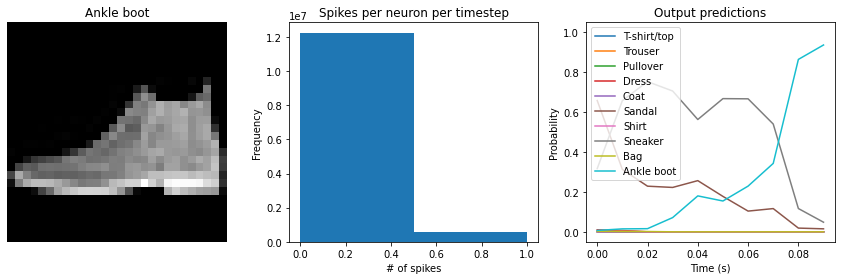

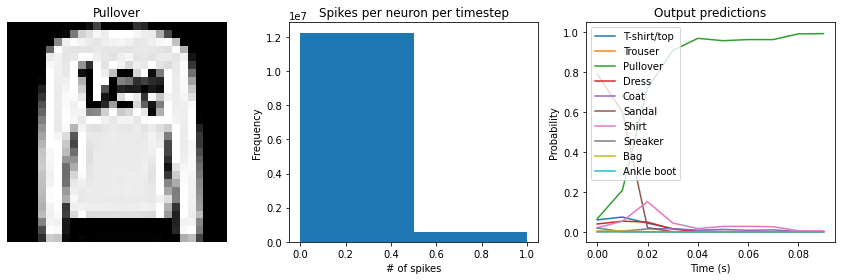

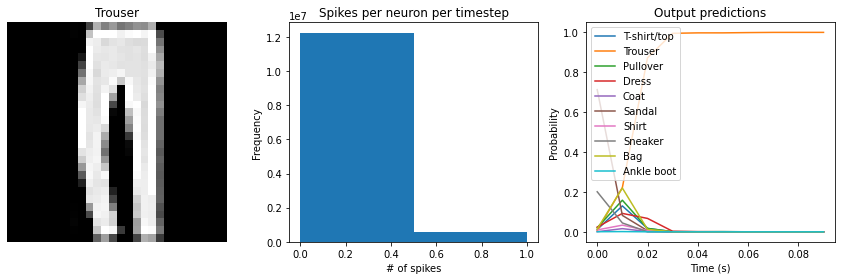

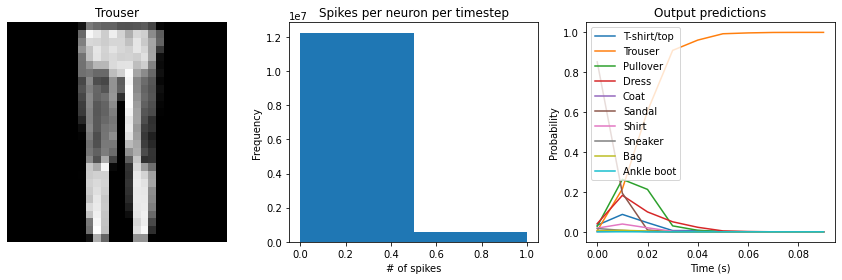

In [16]:
check_output(model)

We can see that we are getting roughly equivalent performance to the previous [spiking aware training](#Spiking-aware-training) example, but with much fewer spikes (because we're using 1/10th the dt). That is, we can be more aggressive in our temporal sparsification, because we're using the Lowpass filtering to aggregate information over time.

## Summary

We can use `SpikingActivation` layers to convert any activation function to an equivalent spiking implementation. Models with SpikingActivations can be trained and evaluated in the same way as non-spiking models, thanks to the swappable training/inference behaviour.

There are also a number of additional features that should be kept in mind in order to optimize the performance of a spiking model:

- [Simulation time](#Simulation-time): by adjusting `dt` we can trade off temporal sparsity versus accuracy
- [Spiking aware training](#Spiking-aware-training): incorporating spiking dynamics on the forward pass can allow the model to learn weights that are more robust to spiking activations
- [Spike rate regularization](#Spike-rate-regularization): we can gain more control over spike rates by directly incorporating activity regularization into the optimization process
- [Lowpass filtering](#Lowpass-filtering): we can achieve better accuracy with fewer spikes by aggregating spike data over time